In [23]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sharpley value
import shap
import lime
import lime.lime_tabular


# stepwise
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



# statics
import scipy.stats as st
import torch

import random 

random.seed(10)


In [24]:
import pickle
#load the model
filename1 = 'logistic_model.sav'
filename2 = 'rf.sav'
filename3 = 'xgb.sav'

logreg_sk = pickle.load(open(filename1, 'rb'))
optimal_rf_clf = pickle.load(open(filename2, 'rb'))
optimal_xgb = pickle.load(open(filename3, 'rb'))

In [25]:
#Load the train and test data
X_train= pd.read_csv("./X_train.csv")
X_test= pd.read_csv("./X_test.csv")

X_train = X_train.drop(['Unnamed: 0'],axis=1)
X_test = X_test.drop(['Unnamed: 0'],axis=1)

In [26]:
#get the XGB dataset
xgb_train=X_train.copy()
xgb_train.iloc[:,21:26]=xgb_train.iloc[:,21:26].astype('int64')
xgb_train.iloc[:,3:9]=xgb_train.iloc[:,3:9].astype('int64')
xgb_train.iloc[:,1]=xgb_train.iloc[:,1].astype('int64')

xgb_test = X_test.copy()
xgb_test.iloc[:,21:26]=xgb_test.iloc[:,21:26].astype('int64')
xgb_test.iloc[:,3:9]=xgb_test.iloc[:,3:9].astype('int64')
xgb_test.iloc[:,1]=xgb_test.iloc[:,1].astype('int64')

In [27]:
# Get the predicted proba

rf_test_proba_preds = optimal_rf_clf.predict_proba(X_test)[::,1]
xgb_test_proba_preds = optimal_xgb.predict_proba(xgb_test)[::,1]

In [28]:
# new rf dataset
rf_pred_data = X_test.copy()
log_odds = np.log(rf_test_proba_preds/(1-rf_test_proba_preds))
rf_pred_data = rf_pred_data.assign(default_log_odds = log_odds)
rf_pred_data

limit_bal  sex       age  pay_Sep  pay_Aug  pay_Jul  pay_Jun  pay_May  \
0     -0.828424    0 -1.462993        3        2        2        2        2   
1     -0.674276    0 -0.812074        0        0        0        0        0   
2     -1.059646    0  1.466139        0        0        0        0        0   
3     -0.905498    0  0.272789        0        0        0        0        0   
4     -1.059646    0  0.055816        0        0        0        0        0   
...         ...  ...       ...      ...      ...      ...      ...      ...   
9895  -0.134759    0  0.815221        0        0        0        0        0   
9896  -0.520128    0 -0.595102        0        0        0        0        0   
9897  -0.211833    0 -0.161156        1       -2       -2       -2       -2   
9898  -1.059646    0  2.008570        2        2        2        0        0   
9899  -0.057685    0  0.489762       -2       -2       -2       -2       -2   

      pay_Apr  bill_amt_Sep  ...  pay_amt_Jul  pay_amt_Jun  pay_amt_May  \
0           2      0.140351  ...    -0.279705    -0.148416    -0.229047   
1          -2      0.102678  ...    -0.220012    -0.263380    -0.239912   
2           0     -0.316445  ...    -0.183208    -0.180397    -0.183229   
3           0     -0.353629  ...    -0.194567    -0.231463    -0.229047   
4           0     -0.534087  ...    -0.205927    -0.244230    -0.248683   
...       ...           ...  ...          ...          ...          ...   
9895        0      1.461550  ...     0.158367     0.011613     0.013916   
9896       -1     -0.101940  ...    -0.183208    -0.244230     3.508865   
9897       -1     -0.695642  ...    -0.072398    -0.308063     0.507631   
9898        2     -0.376526  ...    -0.228645    -0.154864    -0.314136   
9899       -2     -0.695642  ...    -0.040080     0.071743    -0.119151   

      pay_amt_Apr  education_graduate school  education_high school  \
0       -0.293382                          0                      0   
1       -0.290682                          0                      0   
2       -0.247143                          0                      0   
3       -0.220255                          0                      0   
4       -0.237130                          0                      0   
...           ...                        ...                    ...   
9895    -0.012122                          0                      0   
9896     0.032879                          1                      0   
9897    -0.293382                          1                      0   
9898    -0.164003                          0                      1   
9899    -0.001547                          1                      0   

      education_university  marriage_married  marriage_single  \
0                        1                 0                1   
1                        1                 1                0   
2                        1                 1                0   
3                        1                 1                0   
4                        1                 0                1   
...                    ...               ...              ...   
9895                     1                 1                0   
9896                     0                 1                0   
9897                     0                 1                0   
9898                     0                 1                0   
9899                     0                 1                0   

      default_log_odds  
0             2.114896  
1            -0.412498  
2            -0.245963  
3            -0.326353  
4             0.208460  
...                ...  
9895         -1.501002  
9896         -0.934714  
9897         -0.629386  
9898          1.765600  
9899         -0.827917  

[9900 rows x 27 columns]

In [29]:
# new xgb dataset
xgb_pred_data = xgb_test.copy()
log_odds = np.log(xgb_test_proba_preds/(1-xgb_test_proba_preds))
xgb_pred_data = xgb_pred_data.assign(default_log_odds = log_odds)
xgb_pred_data

limit_bal  sex       age  pay_Sep  pay_Aug  pay_Jul  pay_Jun  pay_May  \
0     -0.828424    0 -1.462993        3        2        2        2        2   
1     -0.674276    0 -0.812074        0        0        0        0        0   
2     -1.059646    0  1.466139        0        0        0        0        0   
3     -0.905498    0  0.272789        0        0        0        0        0   
4     -1.059646    0  0.055816        0        0        0        0        0   
...         ...  ...       ...      ...      ...      ...      ...      ...   
9895  -0.134759    0  0.815221        0        0        0        0        0   
9896  -0.520128    0 -0.595102        0        0        0        0        0   
9897  -0.211833    0 -0.161156        1       -2       -2       -2       -2   
9898  -1.059646    0  2.008570        2        2        2        0        0   
9899  -0.057685    0  0.489762       -2       -2       -2       -2       -2   

      pay_Apr  bill_amt_Sep  ...  pay_amt_Jul  pay_amt_Jun  pay_amt_May  \
0           2      0.140351  ...    -0.279705    -0.148416    -0.229047   
1          -2      0.102678  ...    -0.220012    -0.263380    -0.239912   
2           0     -0.316445  ...    -0.183208    -0.180397    -0.183229   
3           0     -0.353629  ...    -0.194567    -0.231463    -0.229047   
4           0     -0.534087  ...    -0.205927    -0.244230    -0.248683   
...       ...           ...  ...          ...          ...          ...   
9895        0      1.461550  ...     0.158367     0.011613     0.013916   
9896       -1     -0.101940  ...    -0.183208    -0.244230     3.508865   
9897       -1     -0.695642  ...    -0.072398    -0.308063     0.507631   
9898        2     -0.376526  ...    -0.228645    -0.154864    -0.314136   
9899       -2     -0.695642  ...    -0.040080     0.071743    -0.119151   

      pay_amt_Apr  education_graduate school  education_high school  \
0       -0.293382                          0                      0   
1       -0.290682                          0                      0   
2       -0.247143                          0                      0   
3       -0.220255                          0                      0   
4       -0.237130                          0                      0   
...           ...                        ...                    ...   
9895    -0.012122                          0                      0   
9896     0.032879                          1                      0   
9897    -0.293382                          1                      0   
9898    -0.164003                          0                      1   
9899    -0.001547                          1                      0   

      education_university  marriage_married  marriage_single  \
0                        1                 0                1   
1                        1                 1                0   
2                        1                 1                0   
3                        1                 1                0   
4                        1                 0                1   
...                    ...               ...              ...   
9895                     1                 1                0   
9896                     0                 1                0   
9897                     0                 1                0   
9898                     0                 1                0   
9899                     0                 1                0   

      default_log_odds  
0             1.070155  
1            -0.896681  
2            -0.757621  
3            -0.757807  
4            -0.230951  
...                ...  
9895         -1.346306  
9896         -1.161922  
9897         -0.666442  
9898          0.927681  
9899         -1.016387  

[9900 rows x 27 columns]

### Cluster

In [30]:
#cluster the testing dataset by K Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans_label = kmeans.fit(X_test)

In [31]:
#compute the mean default probabilities predicted by random forest in 4 clusters
rf_pred_data['labels']=kmeans_label.labels_
print(rf_pred_data.groupby(['labels'])['default_log_odds'].mean())
rf_pred_data['labels'][rf_pred_data['labels']==1] = 'Lowest PD'
rf_pred_data['labels'][rf_pred_data['labels']==3] = 'Low PD'
rf_pred_data['labels'][rf_pred_data['labels']==0] = 'Medium PD'
rf_pred_data['labels'][rf_pred_data['labels']==2] = 'Highest PD'


labels
0   -0.513381
1   -0.969506
2    1.517840
3   -0.592022
Name: default_log_odds, dtype: float64



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


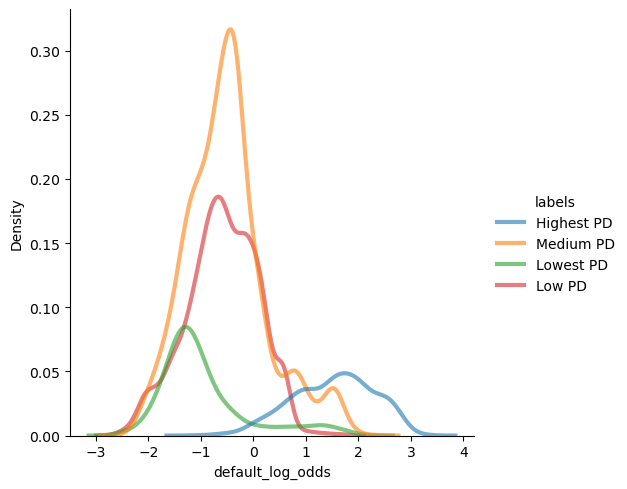

In [32]:
# visualize the default probability density function given by Random Forest
sns.displot(rf_pred_data, x='default_log_odds',hue = 'labels', kind = 'kde',alpha=0.6,linewidth=3)

In [33]:
#compute the mean default probabilities predicted by XGBoosting in 4 clusters
xgb_pred_data['labels']=kmeans_label.labels_
print(xgb_pred_data.groupby(['labels'])['default_log_odds'].mean())
xgb_pred_data['labels'][xgb_pred_data['labels']==1] = 'Lowest PD'
xgb_pred_data['labels'][xgb_pred_data['labels']==3] = 'Low PD'
xgb_pred_data['labels'][xgb_pred_data['labels']==0] = 'Medium PD'
xgb_pred_data['labels'][xgb_pred_data['labels']==2] = 'Highest PD'


labels
0   -0.749845
1   -0.948899
2    0.738440
3   -0.791236
Name: default_log_odds, dtype: float32



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


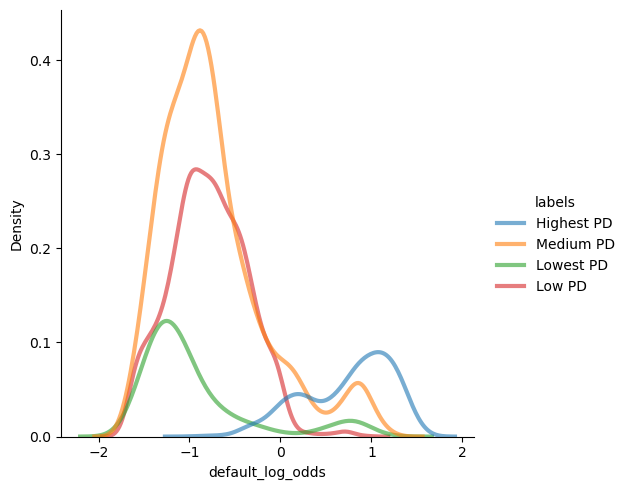

In [14]:
# visualize the default probability density function given by XGBoosting
%matplotlib inline
sns.displot(xgb_pred_data, x='default_log_odds',hue = 'labels', kind = 'kde',alpha=0.6,linewidth=3)


#### Global Explanations - SHAP

In [13]:
# Random forest SHAP in different clusters
rf_lowest = rf_pred_data[rf_pred_data['labels']=='Lowest PD']
rf_lowest = rf_lowest.drop(columns=['default_log_odds', 'labels'])

explainer =shap.Explainer(optimal_rf_clf, X_train)
shap_values_rf = explainer(rf_lowest,check_additivity=False)


 98%|===================| 2124/2162 [00:51<00:00]        

In [14]:
d =  {'Features': X_train.columns, 'SHAP':shap_values_rf.values[:,:,1].mean(axis=0),'mean_SHAP': np.abs(shap_values_rf.values[:,:,1]).mean(axis=0)}
rf_shap_lowest = pd.DataFrame(data=d)
rf_shap_lowest = rf_shap_lowest.sort_values(by='mean_SHAP',ascending=False)
rf_shap_lowest = rf_shap_lowest.iloc[:6]
rf_shap_lowest 

Features      SHAP  mean_SHAP
3       pay_Sep -0.030138   0.075142
0     limit_bal -0.030437   0.031448
16  pay_amt_Aug -0.027536   0.029152
15  pay_amt_Sep -0.023079   0.024641
17  pay_amt_Jul -0.021497   0.022441
4       pay_Aug -0.005047   0.018188

In [15]:
rf_low = rf_pred_data[rf_pred_data['labels']=='Low PD']
rf_low = rf_low.drop(columns=['default_log_odds', 'labels'])

explainer =shap.Explainer(optimal_rf_clf, X_train)
shap_values_rf = explainer(rf_low,check_additivity=False)

 99%|===================| 6155/6204 [01:53<00:00]        

In [16]:
d =  {'Features': X_train.columns, 'SHAP':shap_values_rf.values[:,:,1].mean(axis=0),'mean_SHAP':np.abs(shap_values_rf.values[:,:,1]).mean(axis=0)}
rf_shap_low = pd.DataFrame(data=d)
rf_shap_low = rf_shap_low.sort_values(by='mean_SHAP',ascending=False)
rf_shap_low

Features          SHAP  mean_SHAP
3                     pay_Sep -2.233622e-02   0.031593
0                   limit_bal -1.772244e-02   0.023386
16                pay_amt_Aug -3.229069e-03   0.019962
15                pay_amt_Sep -4.928669e-04   0.019946
17                pay_amt_Jul  6.312501e-04   0.019689
4                     pay_Aug -1.679986e-02   0.017876
5                     pay_Jul -1.405853e-02   0.014280
18                pay_amt_Jun  7.888742e-04   0.012716
9                bill_amt_Sep  2.366716e-03   0.011939
20                pay_amt_Apr -4.882048e-04   0.011136
6                     pay_Jun -9.354271e-03   0.009485
19                pay_amt_May  4.631823e-04   0.008857
12               bill_amt_Jun -8.722345e-04   0.006481
7                     pay_May -5.805174e-03   0.005927
10               bill_amt_Aug -4.452669e-03   0.005713
11               bill_amt_Jul -2.764718e-03   0.005704
13               bill_amt_May  1.580956e-03   0.005559
14               bill_amt_Apr -3.886911e-03   0.005379
8                     pay_Apr -2.429998e-03   0.003268
2                         age  5.228891e-04   0.002177
23       education_university -1.192234e-05   0.001084
25            marriage_single  7.879373e-05   0.000914
24           marriage_married  1.148940e-04   0.000861
21  education_graduate school -2.990019e-07   0.000777
1                         sex  3.655645e-05   0.000762
22      education_high school  6.099971e-05   0.000372

In [17]:
rf_med = rf_pred_data[rf_pred_data['labels']=='Medium PD']
rf_med = rf_med.drop(columns=['default_log_odds', 'labels'])

explainer =shap.Explainer(optimal_rf_clf, X_train)
shap_values_rf = explainer(rf_med,check_additivity=False)

100%|===================| 9445/9486 [02:41<00:00]        

In [18]:
d =  {'Features': X_train.columns, 'SHAP':shap_values_rf.values[:,:,1].mean(axis=0),'mean_SHAP':np.abs(shap_values_rf.values[:,:,1]).mean(axis=0)}
rf_shap_med = pd.DataFrame(data=d)
rf_shap_med = rf_shap_med.sort_values(by='mean_SHAP',ascending=False)
rf_shap_med

Features      SHAP  mean_SHAP
3                     pay_Sep -0.034956   0.067227
0                   limit_bal  0.005719   0.031364
4                     pay_Aug -0.007230   0.022147
15                pay_amt_Sep -0.001975   0.016308
16                pay_amt_Aug -0.003297   0.013253
9                bill_amt_Sep -0.008160   0.010786
5                     pay_Jul -0.001667   0.010375
20                pay_amt_Apr -0.001433   0.010294
17                pay_amt_Jul -0.005149   0.010097
18                pay_amt_Jun -0.000896   0.008328
19                pay_amt_May -0.001134   0.007329
6                     pay_Jun -0.003252   0.007242
10               bill_amt_Aug -0.004211   0.006399
7                     pay_May -0.002094   0.005391
13               bill_amt_May -0.004060   0.005318
12               bill_amt_Jun -0.004296   0.005143
8                     pay_Apr -0.001965   0.004898
14               bill_amt_Apr -0.001317   0.004581
11               bill_amt_Jul -0.002927   0.004452
2                         age  0.000404   0.002634
23       education_university  0.000450   0.001865
21  education_graduate school  0.000357   0.001403
1                         sex  0.000030   0.001326
25            marriage_single -0.000099   0.001179
24           marriage_married -0.000080   0.000954
22      education_high school -0.000019   0.000429

In [19]:
rf_hig = rf_pred_data[rf_pred_data['labels']=='Highest PD']
rf_hig = rf_hig.drop(columns=['default_log_odds', 'labels'])

explainer =shap.Explainer(optimal_rf_clf, X_train)
shap_values_rf = explainer(rf_hig,check_additivity=False)

 99%|===================| 1929/1948 [00:55<00:00]        

In [20]:
d =  {'Features': X_train.columns, 'SHAP':shap_values_rf.values[:,:,1].mean(axis=0),'mean_SHAP':np.abs(shap_values_rf.values[:,:,1]).mean(axis=0)}
rf_shap_hig = pd.DataFrame(data=d)
rf_shap_hig = rf_shap_hig.sort_values(by='mean_SHAP',ascending=False)
rf_shap_hig

Features      SHAP  mean_SHAP
3                     pay_Sep  0.108677   0.121380
4                     pay_Aug  0.055914   0.059270
5                     pay_Jul  0.031038   0.031649
6                     pay_Jun  0.027027   0.027916
7                     pay_May  0.022997   0.023869
0                   limit_bal  0.012422   0.016636
8                     pay_Apr  0.013253   0.014566
15                pay_amt_Sep  0.003627   0.012525
16                pay_amt_Aug  0.003561   0.012257
14               bill_amt_Apr  0.007640   0.009401
9                bill_amt_Sep  0.006597   0.008834
17                pay_amt_Jul  0.002764   0.008658
20                pay_amt_Apr  0.003100   0.008178
18                pay_amt_Jun  0.003118   0.007303
11               bill_amt_Jul  0.006329   0.007221
10               bill_amt_Aug  0.005858   0.006967
13               bill_amt_May  0.004106   0.005807
12               bill_amt_Jun  0.004763   0.005779
19                pay_amt_May  0.003476   0.005775
2                         age  0.000907   0.004581
22      education_high school -0.000200   0.001530
25            marriage_single -0.000002   0.001074
1                         sex  0.000060   0.001067
24           marriage_married  0.000010   0.000818
21  education_graduate school  0.000022   0.000629
23       education_university -0.000017   0.000627

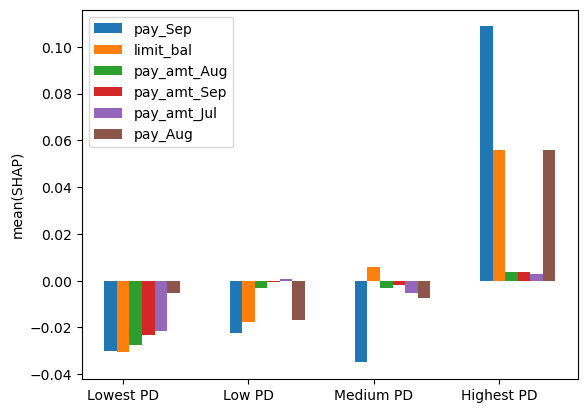

In [32]:
#the shapley values of Random Forest in various clusters
x = ['Lowest PD', 'Low PD', 'Medium PD', 'Highest PD']
 
N = 4
ind = np.arange(N)  
width = 0.1

pay_sep = [0.075142,0.031593,0.067227,0.121380]
limit_bal = [0.031448,0.023386,0.031364,0.016636]
pay_amt_Aug = [0.029152,0.019962,0.013253,0.012257]
pay_amt_Sep = [0.024641,0.019946,0.016308,0.012525]
pay_amt_Jul = [0.022441,0.019689,0.010097,0.008658]
pay_Aug = [0.018188,0.017876,0.022147,0.059270]

pay_sep = [-0.030138,-0.02233622,-0.034956,0.108677]
limit_bal = [-0.030437,-0.0177224,0.005719,0.055914]
pay_amt_Aug = [-0.027536,-0.003229069,-0.003297,0.003561]
pay_amt_Sep = [-0.023079,-0.000492866,-0.001975,0.003627]
pay_amt_Jul = [-0.021497,0.0006312501,-0.005149,0.002764]
pay_Aug = [-0.005047,-0.01679986,-0.007230,0.055914]


plt.bar(ind, pay_sep, 0.1, label = 'pay_Sep') 
plt.bar(ind+width, limit_bal, 0.1, label = 'limit_bal') 
plt.bar(ind+width*2, pay_amt_Aug, 0.1, label = 'pay_amt_Aug') 
plt.bar(ind+width*3, pay_amt_Sep, 0.1, label = 'pay_amt_Sep') 
plt.bar(ind+width*4, pay_amt_Jul, 0.1, label = 'pay_amt_Jul') 
plt.bar(ind+width*5, pay_Aug, 0.1, label = 'pay_Aug') 


plt.ylabel('mean(SHAP)') 
plt.xticks(ind+width,x) 
plt.legend() 
plt.show() 

In [13]:
# XGBoosting SHAP in different clusters
xgb_lowest = xgb_pred_data[xgb_pred_data['labels']=='Lowest PD']
xgb_lowest = xgb_lowest.drop(columns=['default_log_odds', 'labels'])

explainer =shap.Explainer(optimal_xgb, X_train)
shap_values_xgb = explainer(xgb_lowest,check_additivity=False)

100%|===================| 1077/1081 [00:12<00:00]       

In [16]:
d =  {'Features': X_train.columns, 'SHAP':shap_values_xgb.values.mean(axis=0),'mean_SHAP':np.abs(shap_values_xgb.values).mean(axis=0)}
xgb_shap_lowest = pd.DataFrame(data=d)
xgb_shap_lowest = xgb_shap_lowest.sort_values(by='mean_SHAP',ascending=False)
xgb_shap_lowest = xgb_shap_lowest.iloc[:6]
xgb_shap_lowest 

Features      SHAP  mean_SHAP
3       pay_Sep -0.118097   0.309822
0     limit_bal -0.124963   0.129276
16  pay_amt_Aug -0.083243   0.088034
4       pay_Aug -0.018669   0.074037
15  pay_amt_Sep -0.068753   0.074021
17  pay_amt_Jul -0.069772   0.072863

In [17]:
xgb_low = xgb_pred_data[xgb_pred_data['labels']=='Low PD']
xgb_low = xgb_low.drop(columns=['default_log_odds', 'labels'])

explainer =shap.Explainer(optimal_xgb, X_train)
shap_values_xgb = explainer(xgb_low,check_additivity=False)

 99%|===================| 3079/3102 [00:29<00:00]        

In [18]:
d =  {'Features': X_train.columns, 'SHAP':shap_values_xgb.values.mean(axis=0),'mean_SHAP':np.abs(shap_values_xgb.values).mean(axis=0)}
xgb_shap_low = pd.DataFrame(data=d)
xgb_shap_low = xgb_shap_low.sort_values(by='mean_SHAP',ascending=False)
xgb_shap_low

Features      SHAP  mean_SHAP
3                     pay_Sep -0.132856   0.156187
0                   limit_bal -0.073675   0.094227
5                     pay_Jul -0.066438   0.067535
4                     pay_Aug -0.060623   0.065913
9                bill_amt_Sep  0.017458   0.060217
17                pay_amt_Jul  0.006155   0.059403
16                pay_amt_Aug -0.010744   0.056240
15                pay_amt_Sep  0.008248   0.053237
20                pay_amt_Apr -0.002152   0.032323
6                     pay_Jun -0.028492   0.029102
18                pay_amt_Jun  0.005380   0.028559
19                pay_amt_May  0.003841   0.023522
7                     pay_May -0.018993   0.019433
10               bill_amt_Aug -0.006233   0.018119
11               bill_amt_Jul -0.015218   0.016981
14               bill_amt_Apr -0.013187   0.016845
13               bill_amt_May  0.006215   0.014997
2                         age -0.001859   0.013713
12               bill_amt_Jun -0.000428   0.012797
8                     pay_Apr -0.009189   0.011437
21  education_graduate school  0.001607   0.007362
24           marriage_married -0.000089   0.005309
1                         sex -0.000260   0.004975
23       education_university -0.000226   0.004611
25            marriage_single  0.000235   0.001395
22      education_high school -0.000090   0.001318

In [19]:
xgb_med = xgb_pred_data[xgb_pred_data['labels']=='Medium PD']
xgb_med = xgb_med.drop(columns=['default_log_odds', 'labels'])

explainer =shap.Explainer(optimal_xgb, X_train)
shap_values_xgb = explainer(xgb_med,check_additivity=False)

 98%|===================| 4669/4743 [00:43<00:00]        

In [20]:
d =  {'Features': X_train.columns, 'SHAP':shap_values_xgb.values.mean(axis=0),'mean_SHAP':np.abs(shap_values_xgb.values).mean(axis=0)}
xgb_shap_med = pd.DataFrame(data=d)
xgb_shap_med = xgb_shap_med.sort_values(by='SHAP',ascending=False)
xgb_shap_med

Features      SHAP  mean_SHAP
0                   limit_bal  0.016911   0.107302
23       education_university  0.001763   0.007078
18                pay_amt_Jun  0.001156   0.021040
21  education_graduate school  0.000583   0.003733
25            marriage_single -0.000012   0.001733
1                         sex -0.000219   0.006755
22      education_high school -0.000569   0.001938
24           marriage_married -0.001196   0.008551
14               bill_amt_Apr -0.003067   0.015211
2                         age -0.003334   0.013557
15                pay_amt_Sep -0.004077   0.045911
19                pay_amt_May -0.006010   0.021053
11               bill_amt_Jul -0.006514   0.012499
20                pay_amt_Apr -0.007056   0.030923
12               bill_amt_Jun -0.008387   0.010557
8                     pay_Apr -0.008420   0.022305
13               bill_amt_May -0.011859   0.014207
7                     pay_May -0.012500   0.025167
6                     pay_Jun -0.014155   0.033653
16                pay_amt_Aug -0.014433   0.047851
5                     pay_Jul -0.016302   0.053199
17                pay_amt_Jul -0.016669   0.029899
10               bill_amt_Aug -0.022644   0.025733
4                     pay_Aug -0.025194   0.090844
9                bill_amt_Sep -0.045956   0.060044
3                     pay_Sep -0.142060   0.272880

In [21]:
xgb_hig = xgb_pred_data[xgb_pred_data['labels']=='Highest PD']
xgb_hig = xgb_hig.drop(columns=['default_log_odds', 'labels'])

explainer =shap.Explainer(optimal_xgb, X_train)
shap_values_xgb = explainer(xgb_hig,check_additivity=False)

 95%|=================== | 928/974 [00:12<00:00]       

In [22]:
d =  {'Features': X_train.columns, 'SHAP':shap_values_xgb.values.mean(axis=0),'mean_SHAP':np.abs(shap_values_xgb.values).mean(axis=0)}
xgb_shap_hig = pd.DataFrame(data=d)
xgb_shap_hig = xgb_shap_hig.sort_values(by='SHAP',ascending=False)
xgb_shap_hig

Features      SHAP  mean_SHAP
3                     pay_Sep  0.437887   0.514271
4                     pay_Aug  0.205890   0.219263
5                     pay_Jul  0.135746   0.138672
7                     pay_May  0.100210   0.109822
6                     pay_Jun  0.096969   0.100731
8                     pay_Apr  0.053959   0.061687
0                   limit_bal  0.043590   0.057756
19                pay_amt_May  0.012935   0.020736
14               bill_amt_Apr  0.012348   0.023679
15                pay_amt_Sep  0.011368   0.033507
18                pay_amt_Jun  0.008680   0.017841
20                pay_amt_Apr  0.006473   0.029376
16                pay_amt_Aug  0.005917   0.043289
17                pay_amt_Jul  0.005192   0.026464
9                bill_amt_Sep  0.004337   0.045232
11               bill_amt_Jul  0.003167   0.007512
12               bill_amt_Jun  0.000891   0.007804
23       education_university  0.000238   0.002518
25            marriage_single  0.000089   0.002465
24           marriage_married -0.000178   0.012073
1                         sex -0.000393   0.009202
10               bill_amt_Aug -0.000583   0.012606
13               bill_amt_May -0.001325   0.010342
22      education_high school -0.001541   0.007710
21  education_graduate school -0.001616   0.006038
2                         age -0.002187   0.017866

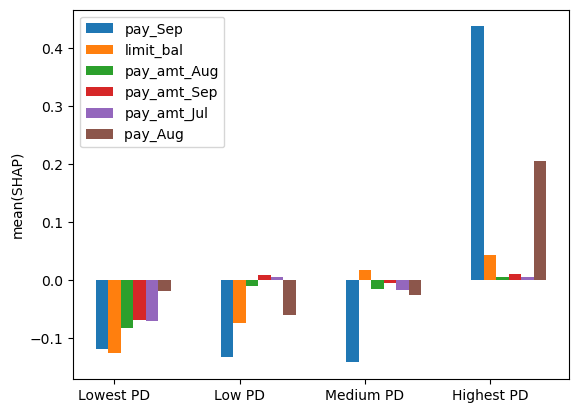

In [22]:
#the shapley values of XGBoosting in various clusters
x = ['Lowest PD', 'Low PD', 'Medium PD', 'Highest PD']
 
N = 4
ind = np.arange(N)  
width = 0.1

pay_sep = [0.309822,0.156187,0.272880,0.514271]
limit_bal = [0.129276,0.094227,0.107302,0.057756]
pay_amt_Aug = [0.088034,0.056240,0.047851,0.043289]
pay_Aug = [0.074037,0.065913,0.090844,0.219263]
pay_amt_Sep = [0.074021,0.053237,0.045911,0.033507]
pay_amt_Jul = [0.072863,0.059403,0.029899,0.026464]

pay_sep = [-0.118097,-0.132856,-0.142060,0.437887]
limit_bal = [-0.124963,-0.073675,0.016911,0.043590]
pay_amt_Aug = [-0.083243,-0.010744,-0.014433,0.005917]
pay_Aug = [-0.018669,-0.060623,-0.025194,0.205890]
pay_amt_Sep = [-0.068753,0.008248,-0.004077,0.011368]
pay_amt_Jul = [-0.069772,0.006155,-0.016669,0.005192]

plt.bar(ind, pay_sep, 0.1, label = 'pay_Sep') 
plt.bar(ind+width, limit_bal, 0.1, label = 'limit_bal') 
plt.bar(ind+width*2, pay_amt_Aug, 0.1, label = 'pay_amt_Aug') 
plt.bar(ind+width*3, pay_amt_Sep, 0.1, label = 'pay_amt_Sep') 
plt.bar(ind+width*4, pay_amt_Jul, 0.1, label = 'pay_amt_Jul') 
plt.bar(ind+width*5, pay_Aug, 0.1, label = 'pay_Aug ') 


plt.ylabel('mean(SHAP)') 
plt.xticks(ind+width,x) 
plt.legend() 
plt.show() 

### Global Explanations - LIME

In [15]:
# Random forest LIME in different clusters
rf_lowest = rf_pred_data[rf_pred_data['labels']=='Lowest PD']
rf_lowest = rf_lowest.drop(columns=['default_log_odds', 'labels'])

d = {'Feature': rf_lowest.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([rf_lowest.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(rf_lowest.shape[0]):
    exp_i = explainer_lime.explain_instance(rf_lowest.values[i], optimal_rf_clf.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957519411286324
Prediction_local [0.37607189]
Right: 0.3567958951451213
Intercept 0.3354622954346843
Prediction_local [0.33412282]
Right: 0.3345656413490041
Intercept 0.33955644712905664
Prediction_local [0.32182624]
Right: 0.22445778677097603


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3367827464602843
Prediction_local [0.33689445]
Right: 0.3368946532984849
Intercept 0.33856746401894056
Prediction_local [0.35024152]
Right: 0.29752072075601066
Intercept 0.33835073606436766
Prediction_local [0.33971275]
Right: 0.2667068284446445


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402549471794094
Prediction_local [0.42008279]
Right: 0.41335546170923987
Intercept 0.34036080085109743
Prediction_local [0.35286752]
Right: 0.2512722944648826
Intercept 0.33580905862165045
Prediction_local [0.48802777]
Right: 0.6990950856849971


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417081793542432
Prediction_local [0.34369505]
Right: 0.22810991181816728
Intercept 0.3407757653613166
Prediction_local [0.2951545]
Right: 0.16993146752655308
Intercept 0.3397745423090717
Prediction_local [0.33980126]
Right: 0.17825648973752597


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025834928088733
Prediction_local [0.33622186]
Right: 0.19895742542728756
Intercept 0.3392656771823082
Prediction_local [0.47673455]
Right: 0.5894491277384961
Intercept 0.3411445379544949
Prediction_local [0.34741321]
Right: 0.2057579345748283


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004575628783973
Prediction_local [0.34231393]
Right: 0.277750550282259
Intercept 0.34076024686608997
Prediction_local [0.33741647]
Right: 0.30960958894832735
Intercept 0.3393146131017638
Prediction_local [0.4105569]
Right: 0.7165013174491954


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399187281063304
Prediction_local [0.30200137]
Right: 0.18734554286690808
Intercept 0.3360735539653372
Prediction_local [0.14014874]
Right: 0.14172079710293828
Intercept 0.339746562391908
Prediction_local [0.28536868]
Right: 0.17482278711616672


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.35136380298154035
Prediction_local [0.13112953]
Right: 0.12836291369159109
Intercept 0.33476517246916376
Prediction_local [0.42151221]
Right: 0.4985625972297449
Intercept 0.34091520051263674
Prediction_local [0.32374644]
Right: 0.22903101589999839


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382021483493891
Prediction_local [0.60320083]
Right: 0.8547085899066964
Intercept 0.3386628777254577
Prediction_local [0.33321952]
Right: 0.1573419920323
Intercept 0.3394048893194747
Prediction_local [0.3232264]
Right: 0.20541523526453584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938901312392566
Prediction_local [0.46181619]
Right: 0.7458223932238535
Intercept 0.34140529802162534
Prediction_local [0.21936968]
Right: 0.12532714423564045
Intercept 0.33984421704601886
Prediction_local [0.31659327]
Right: 0.25718539236767934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32097928225824757
Prediction_local [0.24442996]
Right: 0.24655961299447943
Intercept 0.3367963538861589
Prediction_local [0.15581612]
Right: 0.15501454238200885
Intercept 0.3388599342374514
Prediction_local [0.42737317]
Right: 0.7746614168371911


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048080229729694
Prediction_local [0.44699071]
Right: 0.5032924541468488
Intercept 0.34029649175999466
Prediction_local [0.33402295]
Right: 0.2290202682610495


KeyboardInterrupt: 

In [18]:
exp =explainer_lime.explain_instance(rf_lowest.values[1], optimal_rf_clf.predict_proba,num_features=26)
exp.show_in_notebook(show_table=True)

Intercept 0.33695293235922535
Prediction_local [0.33424895]
Right: 0.3345656413490041


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [19]:
exp =explainer_lime.explain_instance(rf_lowest.values[2], optimal_rf_clf.predict_proba,num_features=26)
exp.show_in_notebook(show_table=True)

Intercept 0.3407815740993344
Prediction_local [0.32757362]
Right: 0.22445778677097603


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [10]:
rf_lowest = rf_pred_data[rf_pred_data['labels']=='Lowest PD']
rf_lowest = rf_lowest.drop(columns=['default_log_odds', 'labels'])
rf_lowest.iloc[0:1]

limit_bal  sex       age  pay_Sep  pay_Aug  pay_Jul  pay_Jun  pay_May  \
10   0.250611    0  0.489762        0        0        0        0        0   

    pay_Apr  bill_amt_Sep  ...  pay_amt_Aug  pay_amt_Jul  pay_amt_Jun  \
10        2      1.461074  ...    -0.033861       -0.011     0.291967   

    pay_amt_May  pay_amt_Apr  education_graduate school  \
10    -0.026141    -0.293382                          0   

    education_high school  education_university  marriage_married  \
10                      1                     0                 1   

    marriage_single  
10                0  

[1 rows x 26 columns]

In [30]:
d =  {'Features': X_train.columns, 'LIME':value_i.mean(axis=0),'mean_LIME':np.abs(value_i).mean(axis=0)}
rf_lime_lowest = pd.DataFrame(data=d)
rf_lime_lowest = rf_lime_lowest.sort_values(by='mean_LIME',ascending=False)
#xgb_shap_low = xgb_shap_low.iloc[:6]
rf_lime_lowest

Features      LIME  mean_LIME
3                     pay_Sep  0.043107   0.043107
0                   limit_bal -0.021419   0.021420
16                pay_amt_Aug -0.020151   0.020151
15                pay_amt_Sep -0.017882   0.017882
17                pay_amt_Jul -0.014999   0.015028
4                     pay_Aug  0.012738   0.012738
5                     pay_Jul  0.012706   0.012706
20                pay_amt_Apr -0.009220   0.009254
19                pay_amt_May -0.008749   0.008770
7                     pay_May  0.008534   0.008534
8                     pay_Apr  0.008384   0.008384
6                     pay_Jun  0.007984   0.007984
18                pay_amt_Jun -0.007074   0.007115
9                bill_amt_Sep  0.004944   0.004987
10               bill_amt_Aug  0.004644   0.004697
14               bill_amt_Apr  0.002441   0.002581
13               bill_amt_May -0.001374   0.001809
25            marriage_single -0.001287   0.001417
11               bill_amt_Jul -0.000546   0.001304
12               bill_amt_Jun  0.000675   0.001199
21  education_graduate school  0.000569   0.001023
23       education_university  0.000440   0.000940
2                         age -0.000461   0.000916
22      education_high school -0.000460   0.000911
1                         sex  0.000347   0.000905
24           marriage_married  0.000171   0.000876

In [18]:
rf_low = rf_pred_data[rf_pred_data['labels']=='Low PD']
rf_low = rf_low.drop(columns=['default_log_odds', 'labels'])

d = {'Feature': rf_low.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([rf_low.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(rf_low.shape[0]):
    exp_i = explainer_lime.explain_instance(rf_low.iloc[i], optimal_rf_clf.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388055855753023
Prediction_local [0.33915577]
Right: 0.4465217929126709


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905840937302445
Prediction_local [0.22213897]
Right: 0.2904995828359975


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340682288892992
Prediction_local [0.27026326]
Right: 0.46835145591131
Intercept 0.3410546297460563
Prediction_local [0.28569444]
Right: 0.3066752252180163
Intercept 0.33852639679342933
Prediction_local [0.19741799]
Right: 0.27023984751553365


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34065247689768396
Prediction_local [0.21318452]
Right: 0.17873529459576842
Intercept 0.3404236391155179
Prediction_local [0.13621892]
Right: 0.12012971951297317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981132471376146
Prediction_local [0.25599225]
Right: 0.25757760736303437
Intercept 0.34070666277884815
Prediction_local [0.3247488]
Right: 0.6261528835153112


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397171008385564
Prediction_local [0.32984316]
Right: 0.4579556052237179
Intercept 0.33998761406854655
Prediction_local [0.31226764]
Right: 0.44434061350865744


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34062501337445705
Prediction_local [0.34990299]
Right: 0.44107996371979424
Intercept 0.3380514900265299
Prediction_local [0.18908325]
Right: 0.42569339846492005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33646481806678874
Prediction_local [0.21046358]
Right: 0.5722302100436092
Intercept 0.3395184937796345
Prediction_local [0.37365761]
Right: 0.5607951849762828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34140596253589495
Prediction_local [0.34897871]
Right: 0.6304471653934003
Intercept 0.3387208054791405
Prediction_local [0.35508227]
Right: 0.4269232663888411


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393168536077971
Prediction_local [0.14882244]
Right: 0.24419825529090414
Intercept 0.34132064000599355
Prediction_local [0.32126907]
Right: 0.3646453857502942


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946385871211116
Prediction_local [0.29326349]
Right: 0.4104180892125589
Intercept 0.338386516076377
Prediction_local [0.308215]
Right: 0.40743261492811716


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402886245333986
Prediction_local [0.30167108]
Right: 0.5529504482194344
Intercept 0.3392611983866985
Prediction_local [0.28428526]
Right: 0.275661887730608


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395325784070768
Prediction_local [0.2882895]
Right: 0.5084580116093773
Intercept 0.3399520310556334
Prediction_local [0.35637301]
Right: 0.6714710255445947


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401010596700057
Prediction_local [0.27098758]
Right: 0.29202612868389366
Intercept 0.3390323634509609
Prediction_local [0.18805986]
Right: 0.4500416964261016


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885939030424206
Prediction_local [0.28394856]
Right: 0.2885923421513356
Intercept 0.3382587562099628
Prediction_local [0.21812567]
Right: 0.3141757649422938


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34061570506098343
Prediction_local [0.34716635]
Right: 0.3627452461270918
Intercept 0.33865686640064563
Prediction_local [0.21250497]
Right: 0.3469406160304279


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933000366778676
Prediction_local [0.28416665]
Right: 0.2606577680671355
Intercept 0.3406007070717758
Prediction_local [0.27018697]
Right: 0.48236651074068426


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101942201430335
Prediction_local [0.19549183]
Right: 0.15338275208460084
Intercept 0.3394205230145983
Prediction_local [0.33980422]
Right: 0.5637532194632783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340799842212821
Prediction_local [0.23676893]
Right: 0.17316657051210144
Intercept 0.33916706485035253
Prediction_local [0.18473289]
Right: 0.1105387806076601


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965990786133643
Prediction_local [0.22140821]
Right: 0.3100403823090934
Intercept 0.3378195701406173
Prediction_local [0.31434565]
Right: 0.6398492788060707


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392368415596768
Prediction_local [0.32223902]
Right: 0.6299966522538377
Intercept 0.33733056799219935
Prediction_local [0.12405956]
Right: 0.223218165721841


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382863548927039
Prediction_local [0.18665328]
Right: 0.19932677461964432
Intercept 0.34152006357382453
Prediction_local [0.28308311]
Right: 0.46335230164301405


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402708978077317
Prediction_local [0.26396943]
Right: 0.2791499113078365
Intercept 0.33976673943889607
Prediction_local [0.25475635]
Right: 0.17002993055349214


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408344757515122
Prediction_local [0.25775491]
Right: 0.44470330075779096
Intercept 0.3399381300460491
Prediction_local [0.33581224]
Right: 0.45258583439447203


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391566405796075
Prediction_local [0.25818205]
Right: 0.4468228666310612
Intercept 0.3397318158075811
Prediction_local [0.27330395]
Right: 0.2591287698820436


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380376883064251
Prediction_local [0.20177349]
Right: 0.30545423889344725
Intercept 0.3389475500621747
Prediction_local [0.25350508]
Right: 0.36413063886391117


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399792069140538
Prediction_local [0.30207183]
Right: 0.4643115451439775
Intercept 0.34112996692443975
Prediction_local [0.27990254]
Right: 0.41157300617726783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390254875720964
Prediction_local [0.23938105]
Right: 0.46621034317029486
Intercept 0.34097315403991907
Prediction_local [0.34816241]
Right: 0.5315459659250439


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401189280836389
Prediction_local [0.29573249]
Right: 0.5392140199282506
Intercept 0.3392567700893554
Prediction_local [0.29503017]
Right: 0.4750225369728305


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378446657766659
Prediction_local [0.27430761]
Right: 0.3805944984765587
Intercept 0.33935755247476745
Prediction_local [0.30422516]
Right: 0.5361783887983028


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402366054334501
Prediction_local [0.33086433]
Right: 0.637349732009893
Intercept 0.33914086688884465
Prediction_local [0.23411884]
Right: 0.43101313685814974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890358083076577
Prediction_local [0.38243547]
Right: 0.3398067326466123
Intercept 0.3389619018476761
Prediction_local [0.32176133]
Right: 0.2391736448106339


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384722803556523
Prediction_local [0.22162096]
Right: 0.5751126505218984
Intercept 0.3402787199523566
Prediction_local [0.239494]
Right: 0.1618351108217024


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395387580535214
Prediction_local [0.26390835]
Right: 0.27044602361298475
Intercept 0.34033589629453825
Prediction_local [0.26958144]
Right: 0.23758421634369056


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037709481743605
Prediction_local [0.26958122]
Right: 0.28773093837308206
Intercept 0.3383068084565635
Prediction_local [0.20774847]
Right: 0.21846086046205954


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867723320404464
Prediction_local [0.32581749]
Right: 0.6314528981537214
Intercept 0.33862287603387037
Prediction_local [0.31234614]
Right: 0.30559693514955333


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400342991293567
Prediction_local [0.27225177]
Right: 0.3607110027877692
Intercept 0.3396003800324427
Prediction_local [0.31220941]
Right: 0.5510466582855897


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383980448665693
Prediction_local [0.25594504]
Right: 0.15585798492335695
Intercept 0.3391275206408632
Prediction_local [0.26125113]
Right: 0.2944784917329856


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34155186343679045
Prediction_local [0.21747139]
Right: 0.3941445825946996
Intercept 0.3390685996143681
Prediction_local [0.297315]
Right: 0.5157637356038005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395048936356286
Prediction_local [0.23566151]
Right: 0.23173429115738894
Intercept 0.3396878765942525
Prediction_local [0.35167707]
Right: 0.4857529683108073


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399769999320418
Prediction_local [0.30437101]
Right: 0.38840686626226006
Intercept 0.34182179306701826
Prediction_local [0.34936827]
Right: 0.35945954092762494


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390888000352291
Prediction_local [0.3125044]
Right: 0.46164464927287774


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396035877124353
Prediction_local [0.20876934]
Right: 0.18023202665499635


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371627832539851
Prediction_local [0.19865581]
Right: 0.5777621736248365
Intercept 0.33958218197902207
Prediction_local [0.29360849]
Right: 0.42540687846819


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383522274801408
Prediction_local [0.2427019]
Right: 0.52277631073415
Intercept 0.3399537188890484
Prediction_local [0.28994773]
Right: 0.444595890578471


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34056118316944806
Prediction_local [0.22026796]
Right: 0.3201000187383357
Intercept 0.33919975606108826
Prediction_local [0.33247138]
Right: 0.5819348030140913


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888607581354746
Prediction_local [0.23055764]
Right: 0.13962782885639877
Intercept 0.33931594755823125
Prediction_local [0.30093212]
Right: 0.3514493920034854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390000181388472
Prediction_local [0.22214352]
Right: 0.5505627489651966
Intercept 0.34027307736014173
Prediction_local [0.26884037]
Right: 0.37613836711192233


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976695747969377
Prediction_local [0.19535543]
Right: 0.4788556912493405
Intercept 0.34180476807028026
Prediction_local [0.32988273]
Right: 0.5804274306263855


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401679634218461
Prediction_local [0.2782812]
Right: 0.2916133322131703
Intercept 0.3399388467814845
Prediction_local [0.25606128]
Right: 0.17717510586122348


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34128857994548845
Prediction_local [0.30341995]
Right: 0.5308480524629554
Intercept 0.34104685598298984
Prediction_local [0.31172668]
Right: 0.3669331485991987


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33779058714396515
Prediction_local [0.27352504]
Right: 0.5203694751811067
Intercept 0.34045751438535704
Prediction_local [0.23380552]
Right: 0.4533631101859006


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992267377328433
Prediction_local [0.2459441]
Right: 0.25745849639330354
Intercept 0.33989567900109063
Prediction_local [0.32615885]
Right: 0.43642930000940083


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904946884319026
Prediction_local [0.35188671]
Right: 0.5293980657774585
Intercept 0.3400459750402282
Prediction_local [0.23147993]
Right: 0.5625822768269607


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402937844681228
Prediction_local [0.28074864]
Right: 0.46932503347382737
Intercept 0.340090887682825
Prediction_local [0.32185894]
Right: 0.3581435294752542


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857512216419555
Prediction_local [0.20888402]
Right: 0.35683310671737994
Intercept 0.3399319176002645
Prediction_local [0.18195123]
Right: 0.2965236132346257


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340526775785468
Prediction_local [0.23775476]
Right: 0.29751262077663654
Intercept 0.33828985920048066
Prediction_local [0.32497029]
Right: 0.6410877244626754


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408445637644002
Prediction_local [0.31477413]
Right: 0.44008938819408466
Intercept 0.33991907844729047
Prediction_local [0.31253923]
Right: 0.27078253126172264


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409593234723494
Prediction_local [0.25539463]
Right: 0.2402608170193328
Intercept 0.34015258087986894
Prediction_local [0.26211785]
Right: 0.4066559188006602


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403855408595593
Prediction_local [0.29352997]
Right: 0.2916432054703674
Intercept 0.3397658742380627
Prediction_local [0.26828931]
Right: 0.2964320597328459


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394158897851628
Prediction_local [0.21062226]
Right: 0.3127690765309068
Intercept 0.3406083661265579
Prediction_local [0.22852684]
Right: 0.4691768759186171


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3419441075801394
Prediction_local [0.25200637]
Right: 0.1697148472840192
Intercept 0.33861997469726196
Prediction_local [0.13201512]
Right: 0.1300981824199349


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387942497092211
Prediction_local [0.21399136]
Right: 0.29443958912775803
Intercept 0.3417458154917745
Prediction_local [0.19828752]
Right: 0.3104596620027353


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377848428573863
Prediction_local [0.29340202]
Right: 0.4498510365815663
Intercept 0.3406338980727846
Prediction_local [0.3275803]
Right: 0.5731141008464712


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391475470037295
Prediction_local [0.2424029]
Right: 0.31880511313451887
Intercept 0.3405007788782788
Prediction_local [0.34513441]
Right: 0.36199513092957564


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33898712964978256
Prediction_local [0.32249047]
Right: 0.4975310067725979
Intercept 0.3409252810050451
Prediction_local [0.32987269]
Right: 0.339641466677765


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385457528051663
Prediction_local [0.28110128]
Right: 0.48894063635029045
Intercept 0.33915961993257215
Prediction_local [0.25063369]
Right: 0.42233363217257636


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390078218674706
Prediction_local [0.38025168]
Right: 0.7723445885291553
Intercept 0.338551713008551
Prediction_local [0.29620509]
Right: 0.5088261232332836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024128596788883
Prediction_local [0.27272083]
Right: 0.5346613955763257
Intercept 0.33997508352319245
Prediction_local [0.21911224]
Right: 0.25713921997899986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389932512238077
Prediction_local [0.2185789]
Right: 0.3198595783065638
Intercept 0.3394301556984599
Prediction_local [0.30683635]
Right: 0.3841210538660798


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396446545367446
Prediction_local [0.24468408]
Right: 0.3069327162395589
Intercept 0.338662217703811
Prediction_local [0.29221912]
Right: 0.47001169392627257


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34063910810336834
Prediction_local [0.29458351]
Right: 0.3803327883075638
Intercept 0.3390310572708265
Prediction_local [0.21849992]
Right: 0.13501463957320994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960590674360697
Prediction_local [0.31656166]
Right: 0.339472186404472
Intercept 0.33834333752381635
Prediction_local [0.18984777]
Right: 0.20251072322865687


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399639952914278
Prediction_local [0.20879443]
Right: 0.20539153014616945
Intercept 0.33964161871478626
Prediction_local [0.28151128]
Right: 0.3057941352082275


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403237381434587
Prediction_local [0.19450312]
Right: 0.35050290074409723
Intercept 0.33892390010455287
Prediction_local [0.18894438]
Right: 0.1837633256183857


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394655635467911
Prediction_local [0.16974358]
Right: 0.44186435415936537
Intercept 0.3389937558181681
Prediction_local [0.16928077]
Right: 0.3199736791775469


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339873668555145
Prediction_local [0.35723916]
Right: 0.4196357756663341
Intercept 0.3393156047983528
Prediction_local [0.17955076]
Right: 0.38892790694391266


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34100287232894894
Prediction_local [0.22999603]
Right: 0.3352695150235894
Intercept 0.33993626697718826
Prediction_local [0.26829127]
Right: 0.2783775793572204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904634392076105
Prediction_local [0.23822324]
Right: 0.14125414992438914
Intercept 0.340289358639026
Prediction_local [0.26351894]
Right: 0.5084776813297968


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391304352885817
Prediction_local [0.31842462]
Right: 0.32893825651855607
Intercept 0.33829232021060707
Prediction_local [0.2659313]
Right: 0.5228450886801658


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016134640602225
Prediction_local [0.30621223]
Right: 0.30829409078830805
Intercept 0.33994984595584393
Prediction_local [0.21151507]
Right: 0.4838518614324048


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381152799568246
Prediction_local [0.21446405]
Right: 0.4849099804180952
Intercept 0.34064426191697667
Prediction_local [0.23712355]
Right: 0.35136851475226455


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393170632734708
Prediction_local [0.26196824]
Right: 0.33905751566019515
Intercept 0.3398288017820121
Prediction_local [0.2343529]
Right: 0.23471758788287864


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391135331038175
Prediction_local [0.19809665]
Right: 0.18183475121117168
Intercept 0.3411495332386292
Prediction_local [0.40107163]
Right: 0.3781363772452123


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338079389024407
Prediction_local [0.25415408]
Right: 0.15039674819265472
Intercept 0.339402584657217
Prediction_local [0.32728013]
Right: 0.5694394102224329


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943572353214696
Prediction_local [0.33194918]
Right: 0.3484918049866602
Intercept 0.34023443032780903
Prediction_local [0.23375202]
Right: 0.28676613290464237


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3420050668094129
Prediction_local [0.3425181]
Right: 0.36164628802732823
Intercept 0.3402324262686933
Prediction_local [0.26251295]
Right: 0.4792019215445485


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33829644491853755
Prediction_local [0.21829627]
Right: 0.5298313921562735
Intercept 0.3387653557052308
Prediction_local [0.22718162]
Right: 0.43070932700868125


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388298557784512
Prediction_local [0.2638317]
Right: 0.3972773158575631
Intercept 0.3395172521438407
Prediction_local [0.16216624]
Right: 0.2400110748135756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339358113786152
Prediction_local [0.34095839]
Right: 0.43387019813842803
Intercept 0.33993012238202264
Prediction_local [0.31237571]
Right: 0.599066031213206


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381579445161699
Prediction_local [0.22714646]
Right: 0.34190721891809983
Intercept 0.3405181397914841
Prediction_local [0.29086753]
Right: 0.5172388391299627


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33754838676632665
Prediction_local [0.20723437]
Right: 0.30542619132772836
Intercept 0.340123879534496
Prediction_local [0.32831264]
Right: 0.38793274311099984


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972652897259964
Prediction_local [0.19499905]
Right: 0.15382624160102584
Intercept 0.33988221240179617
Prediction_local [0.25305383]
Right: 0.3711678926735746


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34060717463277695
Prediction_local [0.29695733]
Right: 0.5188285556563917
Intercept 0.340575534148551
Prediction_local [0.29465318]
Right: 0.36339829636137316


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955583524009986
Prediction_local [0.17636551]
Right: 0.15227649714297337
Intercept 0.3405484847614652
Prediction_local [0.32518481]
Right: 0.32493719382874753


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33776707827986663
Prediction_local [0.36393654]
Right: 0.5339488443674628
Intercept 0.3391461068744524
Prediction_local [0.25103672]
Right: 0.3590076764320825


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923625853142736
Prediction_local [0.13402061]
Right: 0.2807644043780805
Intercept 0.3388926035914761
Prediction_local [0.18693277]
Right: 0.5639844685720018


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851444654120394
Prediction_local [0.10725038]
Right: 0.23346475038653372
Intercept 0.34145248991897015
Prediction_local [0.33083906]
Right: 0.46021422572906934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339900124770759
Prediction_local [0.27403891]
Right: 0.22988508357568926
Intercept 0.339273447788227
Prediction_local [0.28264427]
Right: 0.4380451780567752


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397945944573065
Prediction_local [0.27466399]
Right: 0.4881565339150368
Intercept 0.33842273138574663
Prediction_local [0.18963025]
Right: 0.37176164552555946


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064313250408446
Prediction_local [0.34800283]
Right: 0.4820748109204457
Intercept 0.3408241529150913
Prediction_local [0.34781075]
Right: 0.3422225838719249


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388546672931654
Prediction_local [0.11649143]
Right: 0.16825242112609562
Intercept 0.33531846510057955
Prediction_local [0.25240497]
Right: 0.282410240000179


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404928226599475
Prediction_local [0.24337887]
Right: 0.1827529940369692
Intercept 0.3386461359043252
Prediction_local [0.19627392]
Right: 0.49050574133226055


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392525804488929
Prediction_local [0.34620087]
Right: 0.5192750648067772
Intercept 0.34188927468964114
Prediction_local [0.27688784]
Right: 0.40161006125463594


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930451091931035
Prediction_local [0.26149946]
Right: 0.26503306489941225
Intercept 0.3385654632156173
Prediction_local [0.18392447]
Right: 0.3771253811637021


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403668684813878
Prediction_local [0.16955856]
Right: 0.2874530229285969
Intercept 0.3394041662779918
Prediction_local [0.20180778]
Right: 0.35355428165863


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398164924098931
Prediction_local [0.327427]
Right: 0.635290829418906
Intercept 0.3396407999903875
Prediction_local [0.26455976]
Right: 0.19358190316218116


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374129878994873
Prediction_local [0.26521457]
Right: 0.3174510844823282
Intercept 0.33884238869613553
Prediction_local [0.15685336]
Right: 0.17078653046469472


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3418238570829241
Prediction_local [0.30159209]
Right: 0.47608410165634857
Intercept 0.33845823141056885
Prediction_local [0.22321555]
Right: 0.5726450660263015


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393851869701806
Prediction_local [0.30727168]
Right: 0.3423364410695474
Intercept 0.339805576544115
Prediction_local [0.22183326]
Right: 0.35236441430631865


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997236883777
Prediction_local [0.22337784]
Right: 0.2149005935395481
Intercept 0.3391480686800132
Prediction_local [0.23122852]
Right: 0.527153576671432


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34100939837581257
Prediction_local [0.18827322]
Right: 0.11016492804351981
Intercept 0.33908621525428084
Prediction_local [0.24986583]
Right: 0.41791220927587447


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976427976025403
Prediction_local [0.25824353]
Right: 0.2719362974470693
Intercept 0.3414332476639679
Prediction_local [0.31840966]
Right: 0.5360688274660543


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859404303889373
Prediction_local [0.34145108]
Right: 0.3247616259271879
Intercept 0.3403250258631804
Prediction_local [0.26772744]
Right: 0.2232914783102723


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414384598052071
Prediction_local [0.30561924]
Right: 0.2517503433569299
Intercept 0.3407049955285379
Prediction_local [0.2314839]
Right: 0.28480127352638446


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34029292006392575
Prediction_local [0.28361917]
Right: 0.42642653743821884
Intercept 0.3400218124817064
Prediction_local [0.22139232]
Right: 0.42857245264058935


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400593607107553
Prediction_local [0.25993287]
Right: 0.31218062284954823
Intercept 0.3389911399406839
Prediction_local [0.32924705]
Right: 0.3036111682364369


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400513493226566
Prediction_local [0.25900442]
Right: 0.46752059676167734
Intercept 0.33947589820267626
Prediction_local [0.30980989]
Right: 0.5054686187625258


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051998660771116
Prediction_local [0.20441804]
Right: 0.338422833280374
Intercept 0.338503268476886
Prediction_local [0.29221864]
Right: 0.5037561885610173


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34125605903458395
Prediction_local [0.28445003]
Right: 0.4016617772171886
Intercept 0.33857901068736984
Prediction_local [0.15774047]
Right: 0.16793062724565247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33872973298863784
Prediction_local [0.22966977]
Right: 0.2548623219948885
Intercept 0.3401260812541373
Prediction_local [0.24250745]
Right: 0.5155583875278424


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403590514082914
Prediction_local [0.27036461]
Right: 0.27287840944986175
Intercept 0.3389633942295525
Prediction_local [0.27625476]
Right: 0.286503747510835


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.333427160997247
Prediction_local [0.27543203]
Right: 0.277703732518617
Intercept 0.3391794506367159
Prediction_local [0.32447741]
Right: 0.40033580738897234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395547608606283
Prediction_local [0.36140546]
Right: 0.36548385009747525
Intercept 0.340142101482356
Prediction_local [0.23989974]
Right: 0.39120219022188496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973996388715827
Prediction_local [0.24617375]
Right: 0.18997245755550896
Intercept 0.33819844847495706
Prediction_local [0.21581652]
Right: 0.545066930831792


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931593924772363
Prediction_local [0.20969653]
Right: 0.44648953676596354
Intercept 0.3381421713122212
Prediction_local [0.17453275]
Right: 0.12571133764567713


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865012319511256
Prediction_local [0.27179683]
Right: 0.45484429974155993
Intercept 0.3387829886528416
Prediction_local [0.20988716]
Right: 0.33402867186797774


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014025866621606
Prediction_local [0.29626902]
Right: 0.6459378773739555
Intercept 0.3393588555185884
Prediction_local [0.2418357]
Right: 0.4735717856186045


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396100952798188
Prediction_local [0.33129937]
Right: 0.3041456798963595
Intercept 0.3395494465167281
Prediction_local [0.22104668]
Right: 0.5691306599052725


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016429394199293
Prediction_local [0.12594938]
Right: 0.15958078754490376
Intercept 0.33799467360130764
Prediction_local [0.31924456]
Right: 0.2709042078006595


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34097723072223385
Prediction_local [0.2866559]
Right: 0.29890429498173404
Intercept 0.33835036589513995
Prediction_local [0.19504799]
Right: 0.22140156058676524


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401779130675333
Prediction_local [0.22988282]
Right: 0.5568629659074514
Intercept 0.3417468943182729
Prediction_local [0.29723991]
Right: 0.4230781947265497


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381786627597147
Prediction_local [0.30377211]
Right: 0.4291793577860718
Intercept 0.33916116897118903
Prediction_local [0.29937187]
Right: 0.35380495532800443


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403097696842596
Prediction_local [0.27041045]
Right: 0.32540739082654535
Intercept 0.3376018593109639
Prediction_local [0.14324013]
Right: 0.15887094654223952


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411745743812699
Prediction_local [0.26083067]
Right: 0.4540811632121705
Intercept 0.3395099862286137
Prediction_local [0.25768341]
Right: 0.33770565302990607


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925224223772066
Prediction_local [0.22956654]
Right: 0.5251266238258263
Intercept 0.34083069823420215
Prediction_local [0.22564726]
Right: 0.34795065309429796


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031357118996164
Prediction_local [0.28340085]
Right: 0.2599427368174156
Intercept 0.33962554154116836
Prediction_local [0.29424298]
Right: 0.6441967227987622


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406034123856216
Prediction_local [0.24519307]
Right: 0.5014404211835325
Intercept 0.34052200504476826
Prediction_local [0.32877061]
Right: 0.6322910718226863


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379372220760043
Prediction_local [0.30066946]
Right: 0.39811923197657073
Intercept 0.3397334329452302
Prediction_local [0.26698539]
Right: 0.26737471613750796


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33726789407577107
Prediction_local [0.23538243]
Right: 0.2200820258874088
Intercept 0.3376801783265351
Prediction_local [0.1582687]
Right: 0.3387671186600723


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007649690402647
Prediction_local [0.28265871]
Right: 0.3331064061605383
Intercept 0.3399611427804996
Prediction_local [0.21573398]
Right: 0.49058031173015243


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340854449105636
Prediction_local [0.18555769]
Right: 0.19205125215852134
Intercept 0.33722070484414585
Prediction_local [0.26038608]
Right: 0.2461691926412079


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407426855481276
Prediction_local [0.27025986]
Right: 0.4791902293596558
Intercept 0.3389997041791629
Prediction_local [0.30293859]
Right: 0.6518828883103077


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389407556098116
Prediction_local [0.27548737]
Right: 0.4420792933087151
Intercept 0.3378085548642918
Prediction_local [0.26123111]
Right: 0.24846586938375173


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410582341808484
Prediction_local [0.29236019]
Right: 0.424839532423461
Intercept 0.33854168842017157
Prediction_local [0.24799125]
Right: 0.5089177349143796


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968680782012817
Prediction_local [0.27260466]
Right: 0.2324073282481306
Intercept 0.3394545518514287
Prediction_local [0.26833185]
Right: 0.22102898465017176


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962028504230785
Prediction_local [0.2889432]
Right: 0.5147383466332308
Intercept 0.33988315222482623
Prediction_local [0.32701658]
Right: 0.40338885650831535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396081232646859
Prediction_local [0.25182945]
Right: 0.36625781321018763
Intercept 0.3414330303581542
Prediction_local [0.2610252]
Right: 0.5282732048815478


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383367329836046
Prediction_local [0.32461939]
Right: 0.5875362768465384
Intercept 0.339546936101879
Prediction_local [0.33099484]
Right: 0.29811199754407636


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083561617239067
Prediction_local [0.19518768]
Right: 0.5750646140012763
Intercept 0.33980826447869006
Prediction_local [0.21347213]
Right: 0.14958406194417725


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962019909432756
Prediction_local [0.25993799]
Right: 0.258922029708947
Intercept 0.3399022723517178
Prediction_local [0.33276844]
Right: 0.3556954976940836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395608608360759
Prediction_local [0.18917212]
Right: 0.27935678362882843
Intercept 0.3390304524037176
Prediction_local [0.18648163]
Right: 0.4062901412110863


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397645171758375
Prediction_local [0.34803095]
Right: 0.38002636689798625
Intercept 0.3400728017310247
Prediction_local [0.20330355]
Right: 0.5492589057989272


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855604152323376
Prediction_local [0.30982626]
Right: 0.5203897706239718
Intercept 0.3398038246864307
Prediction_local [0.24383668]
Right: 0.32399838483173315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910409364782446
Prediction_local [0.22567135]
Right: 0.564969036010102
Intercept 0.33906566610968053
Prediction_local [0.23197607]
Right: 0.21619753690217683


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405486221065812
Prediction_local [0.27814056]
Right: 0.3070715624811596
Intercept 0.3403008461532078
Prediction_local [0.27306291]
Right: 0.2138333255867259


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888344337897225
Prediction_local [0.23958675]
Right: 0.427669476450516
Intercept 0.34002745404805973
Prediction_local [0.19824377]
Right: 0.17231055508177445


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903562931540054
Prediction_local [0.18986199]
Right: 0.35683580954790806
Intercept 0.34015833716697474
Prediction_local [0.108618]
Right: 0.1080885275658882


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400711912833571
Prediction_local [0.29404344]
Right: 0.4105080134202787
Intercept 0.3402726569658662
Prediction_local [0.26270514]
Right: 0.5043135357343388


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340493575443935
Prediction_local [0.2727663]
Right: 0.29224950877742417
Intercept 0.34105549095877136
Prediction_local [0.31342252]
Right: 0.48690151889345773


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393440588062891
Prediction_local [0.31182239]
Right: 0.3354607058208144
Intercept 0.33820089728779834
Prediction_local [0.20345786]
Right: 0.582847520427761


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339288958803924
Prediction_local [0.22284926]
Right: 0.171587842723024
Intercept 0.3390964672879406
Prediction_local [0.27648004]
Right: 0.27370534210630343


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394039645400074
Prediction_local [0.34025806]
Right: 0.6354343439978959
Intercept 0.33812835919040224
Prediction_local [0.03692789]
Right: 0.0859230819477207


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918797484318586
Prediction_local [0.21987559]
Right: 0.5457671411693474
Intercept 0.3340543590483649
Prediction_local [0.02752987]
Right: 0.07646824215899031


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991043861133996
Prediction_local [0.28221978]
Right: 0.29535455378071074
Intercept 0.33740050034232816
Prediction_local [0.27023442]
Right: 0.26625096084016436


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404131956231539
Prediction_local [0.2864]
Right: 0.2986927272675832
Intercept 0.3391487996503777
Prediction_local [0.25717579]
Right: 0.5492157727469917


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34157836032128974
Prediction_local [0.28799211]
Right: 0.3161455252931881
Intercept 0.3408448588214357
Prediction_local [0.27620714]
Right: 0.35413474513117676


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398485017806702
Prediction_local [0.26188616]
Right: 0.24482222988256974
Intercept 0.33176028203542124
Prediction_local [0.06404392]
Right: 0.1661297961932824


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340345028933424
Prediction_local [0.20020633]
Right: 0.4071490499489356
Intercept 0.34126375332034686
Prediction_local [0.20058755]
Right: 0.2051449431068688


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392268368917498
Prediction_local [0.23046226]
Right: 0.4706812336137372
Intercept 0.3391854719391131
Prediction_local [0.26329764]
Right: 0.20854777104067487


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34094693074804805
Prediction_local [0.29216206]
Right: 0.4683194113926671
Intercept 0.3388120734052708
Prediction_local [0.06398767]
Right: 0.10737586862096833


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34090956153433705
Prediction_local [0.26352492]
Right: 0.3536219355973723
Intercept 0.3393112301048695
Prediction_local [0.31987687]
Right: 0.2733704055952106


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918423557177746
Prediction_local [0.2741625]
Right: 0.44068192478776
Intercept 0.3390012025641419
Prediction_local [0.30064303]
Right: 0.6439202534479239


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390261638810504
Prediction_local [0.2170842]
Right: 0.5521301550038422
Intercept 0.33994656048785454
Prediction_local [0.29629839]
Right: 0.2682118053316457


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393611957006854
Prediction_local [0.28168413]
Right: 0.22662222997883963
Intercept 0.33971713600719655
Prediction_local [0.21225643]
Right: 0.36020389241191825


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3419226017092543
Prediction_local [0.30502322]
Right: 0.45723936405580107
Intercept 0.3400942326903333
Prediction_local [0.24776598]
Right: 0.2562869478327192


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338839640157084
Prediction_local [0.24737101]
Right: 0.47676364585857395
Intercept 0.3387302550411848
Prediction_local [0.25699696]
Right: 0.4975755404226742


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943733003487714
Prediction_local [0.26458638]
Right: 0.5048878951743029
Intercept 0.3392169644848123
Prediction_local [0.29223933]
Right: 0.3577047422575517


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049000000679697
Prediction_local [0.28030277]
Right: 0.4915359464439061
Intercept 0.339150335985006
Prediction_local [0.26469371]
Right: 0.48162151447415236


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386218079386069
Prediction_local [0.17494017]
Right: 0.2720164822583556
Intercept 0.3409741254911637
Prediction_local [0.31325585]
Right: 0.2731849590076518


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401653085166482
Prediction_local [0.36200592]
Right: 0.4033783234630153
Intercept 0.34049482457777064
Prediction_local [0.27893666]
Right: 0.5419928739666234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339911519646101
Prediction_local [0.30920776]
Right: 0.355034720167492
Intercept 0.3405570211016766
Prediction_local [0.33130718]
Right: 0.4824074546433214


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33833048066660887
Prediction_local [0.22597852]
Right: 0.27414172630070005
Intercept 0.3393532845172506
Prediction_local [0.26689728]
Right: 0.19321960332607002


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905040351145094
Prediction_local [0.29631472]
Right: 0.655627712797772
Intercept 0.33969388069613393
Prediction_local [0.27768106]
Right: 0.370268576452562


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949272027005883
Prediction_local [0.25567377]
Right: 0.1860033411308952
Intercept 0.3409157719324364
Prediction_local [0.26323707]
Right: 0.32616949585451455


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401803885547399
Prediction_local [0.29051523]
Right: 0.33411100126923743
Intercept 0.3403783967778264
Prediction_local [0.35099435]
Right: 0.5757189072866055


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338751305961212
Prediction_local [0.33767304]
Right: 0.3587998070185762
Intercept 0.34156245438393756
Prediction_local [0.26132775]
Right: 0.43893436409127295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338587012948883
Prediction_local [0.27425554]
Right: 0.36840673396502704
Intercept 0.3398926224494983
Prediction_local [0.35857003]
Right: 0.4716832716287942


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051408560280766
Prediction_local [0.28127385]
Right: 0.40231995248208835
Intercept 0.33962204231332005
Prediction_local [0.2009137]
Right: 0.35444515762132944


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401806490753524
Prediction_local [0.33109728]
Right: 0.44497621614938526
Intercept 0.34026541152296597
Prediction_local [0.17794255]
Right: 0.21805406616612946


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382251171759039
Prediction_local [0.21177605]
Right: 0.3725676024245676
Intercept 0.3414520011978123
Prediction_local [0.32264929]
Right: 0.3237694923962793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389041949135341
Prediction_local [0.16693063]
Right: 0.23238112394490737
Intercept 0.34068606174080884
Prediction_local [0.31673941]
Right: 0.47022605479709845


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402753234916275
Prediction_local [0.29518347]
Right: 0.49245065100363195
Intercept 0.3390244624079441
Prediction_local [0.32239907]
Right: 0.3116037548849589


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33770892846564704
Prediction_local [0.1892984]
Right: 0.1196274900547601
Intercept 0.34088327207957275
Prediction_local [0.31220692]
Right: 0.5322071895516018


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404181298180411
Prediction_local [0.17360775]
Right: 0.3522736119970632
Intercept 0.3386123167643985
Prediction_local [0.25315311]
Right: 0.5119850366838783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403922804831159
Prediction_local [0.33134895]
Right: 0.3128235272439231
Intercept 0.3395203693413946
Prediction_local [0.22507146]
Right: 0.41088655004354335


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043676414253704
Prediction_local [0.24610466]
Right: 0.26416226619996414
Intercept 0.33966079238612323
Prediction_local [0.27224556]
Right: 0.533953934417639


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390295177342996
Prediction_local [0.31417016]
Right: 0.2608653728356686
Intercept 0.3395022182607287
Prediction_local [0.25259842]
Right: 0.17334009658651284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409598825815954
Prediction_local [0.34443133]
Right: 0.3729335980925327
Intercept 0.3412441768979911
Prediction_local [0.31304372]
Right: 0.5476908158281959


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902986236882465
Prediction_local [0.28912107]
Right: 0.2994809721257677
Intercept 0.340492402219714
Prediction_local [0.27682753]
Right: 0.38162710717464277


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397976434559902
Prediction_local [0.28711507]
Right: 0.3495290009734126
Intercept 0.3409487743824036
Prediction_local [0.32139173]
Right: 0.34970458454621633


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404286927350196
Prediction_local [0.27801924]
Right: 0.2695393866732999
Intercept 0.34088540588188043
Prediction_local [0.28879953]
Right: 0.5200432434605395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401567961826509
Prediction_local [0.20825117]
Right: 0.4428301762694099
Intercept 0.33737635367415975
Prediction_local [0.29500197]
Right: 0.5178806070191033


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412467920001093
Prediction_local [0.31626268]
Right: 0.6405911963530522
Intercept 0.3382520576895845
Prediction_local [0.06806567]
Right: 0.1362991295175835


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386036386137448
Prediction_local [0.2173597]
Right: 0.3821364888706304
Intercept 0.33985234218958743
Prediction_local [0.30727882]
Right: 0.3674937157132605


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392859861710952
Prediction_local [0.27756912]
Right: 0.46453812579532006
Intercept 0.339238268238953
Prediction_local [0.34417459]
Right: 0.40560730969548864


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930521983728684
Prediction_local [0.24751566]
Right: 0.31985500799511235
Intercept 0.342410018974316
Prediction_local [0.34335255]
Right: 0.6375402515988249


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076596453178715
Prediction_local [0.35318703]
Right: 0.37582758595706806
Intercept 0.34004677471983535
Prediction_local [0.26723683]
Right: 0.27318287329154817


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392604579954285
Prediction_local [0.23224274]
Right: 0.35376410408759673
Intercept 0.3399689836939816
Prediction_local [0.25023641]
Right: 0.3766141338453199


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379027236145474
Prediction_local [0.18656507]
Right: 0.5947421784755469
Intercept 0.33990843207034827
Prediction_local [0.29641232]
Right: 0.3805730974119295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404546344775566
Prediction_local [0.29581484]
Right: 0.4699194273810123
Intercept 0.3398224555530348
Prediction_local [0.20567178]
Right: 0.2984707513317535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338575400670454
Prediction_local [0.24365583]
Right: 0.5192642902858421
Intercept 0.34025459102581235
Prediction_local [0.20058888]
Right: 0.17738072647222927


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953943847752227
Prediction_local [0.30877576]
Right: 0.6413448932896133
Intercept 0.3385763580421554
Prediction_local [0.29680624]
Right: 0.25868448171532693


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400781335865143
Prediction_local [0.30421971]
Right: 0.41843483603809256
Intercept 0.34077181540609025
Prediction_local [0.35928806]
Right: 0.436177547636436


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338665891718607
Prediction_local [0.29728997]
Right: 0.3113517839229365
Intercept 0.34089359952708626
Prediction_local [0.28884394]
Right: 0.2435921300394691


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005629702649603
Prediction_local [0.21984357]
Right: 0.16696106771384106
Intercept 0.3409455934934117
Prediction_local [0.20402222]
Right: 0.3987115179858483


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3336602635112445
Prediction_local [0.13271376]
Right: 0.2185196641115929
Intercept 0.33967109616290886
Prediction_local [0.3437062]
Right: 0.4300751628710682


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390919118427138
Prediction_local [0.17699699]
Right: 0.11705640832438585
Intercept 0.34055043253479617
Prediction_local [0.27969691]
Right: 0.3803404022394039


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407047305605918
Prediction_local [0.20024309]
Right: 0.21145815223538938
Intercept 0.3389375263451506
Prediction_local [0.10924113]
Right: 0.13038239723915954


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399836329197106
Prediction_local [0.20996746]
Right: 0.2930179151518743
Intercept 0.33725313399758183
Prediction_local [0.24808556]
Right: 0.1819038640345709


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394627378629661
Prediction_local [0.25750651]
Right: 0.2512429688576645
Intercept 0.33932770561146874
Prediction_local [0.26769924]
Right: 0.41820396126779597


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394200686002095
Prediction_local [0.1722026]
Right: 0.1900484270724199
Intercept 0.33960841458521207
Prediction_local [0.28239637]
Right: 0.49795688097238155


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407493357976178
Prediction_local [0.19748148]
Right: 0.3745498125734125
Intercept 0.3401853407484374
Prediction_local [0.20019522]
Right: 0.2647213153214411


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396687020560659
Prediction_local [0.28859293]
Right: 0.6499237170021459
Intercept 0.33922894985001817
Prediction_local [0.09215831]
Right: 0.10376732181005091


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397048002292864
Prediction_local [0.31301573]
Right: 0.380434822439965
Intercept 0.3396593130599438
Prediction_local [0.20277376]
Right: 0.4096301925992492


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396647631257157
Prediction_local [0.2819561]
Right: 0.4022931329740279
Intercept 0.33709871793974716
Prediction_local [0.21784372]
Right: 0.27052437153709763


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980267826441746
Prediction_local [0.2878921]
Right: 0.3201410515346806
Intercept 0.3407223050027232
Prediction_local [0.24689988]
Right: 0.43069744280341526


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866859175736086
Prediction_local [0.31227424]
Right: 0.3641412971013152
Intercept 0.34017857608168506
Prediction_local [0.27909002]
Right: 0.34855804518011835


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33427946762133753
Prediction_local [0.13690301]
Right: 0.2445864770685649
Intercept 0.3400464397284915
Prediction_local [0.25926445]
Right: 0.34134740994001045


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337258744273476
Prediction_local [0.32141204]
Right: 0.38023294401599805
Intercept 0.3395286278749724
Prediction_local [0.34193146]
Right: 0.6272277541263482


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33932793611163303
Prediction_local [0.10284075]
Right: 0.20788931931683796
Intercept 0.33807059157324904
Prediction_local [0.20990053]
Right: 0.3705056388970306


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873067124146883
Prediction_local [0.21156246]
Right: 0.4693152951458045
Intercept 0.3386242149519161
Prediction_local [0.28186969]
Right: 0.5033513994049692


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3307687335807339
Prediction_local [0.48271106]
Right: 0.5934338012089685
Intercept 0.33898930271517885
Prediction_local [0.34807321]
Right: 0.6225134075892433


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929284755766476
Prediction_local [0.15436895]
Right: 0.3027157235953719
Intercept 0.338974080346812
Prediction_local [0.26196644]
Right: 0.3379270614109335


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030678378008683
Prediction_local [0.28887495]
Right: 0.3920168476332022
Intercept 0.3405817787875747
Prediction_local [0.28976345]
Right: 0.545132427732628


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415879164351101
Prediction_local [0.17582246]
Right: 0.3560163688818707
Intercept 0.34095816584899075
Prediction_local [0.20905293]
Right: 0.44519190984053114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399954766863517
Prediction_local [0.20876187]
Right: 0.26533417464528497
Intercept 0.3397318520733253
Prediction_local [0.36850538]
Right: 0.3358077191556916


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396408890136328
Prediction_local [0.22057103]
Right: 0.557494196445921
Intercept 0.33897386648722533
Prediction_local [0.2047094]
Right: 0.3250049109407445


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909994865375404
Prediction_local [0.35562234]
Right: 0.49653999474887733
Intercept 0.3399290553793132
Prediction_local [0.22005151]
Right: 0.3084807826866933


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34104656770907704
Prediction_local [0.21700591]
Right: 0.17457808431523153
Intercept 0.33939534908152347
Prediction_local [0.20702248]
Right: 0.11260143538715302


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33793142273997434
Prediction_local [0.27643247]
Right: 0.34730212762693546
Intercept 0.33929424558067284
Prediction_local [0.16215913]
Right: 0.25682501349980047


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930309205471676
Prediction_local [0.26861149]
Right: 0.3644139724018224
Intercept 0.3411638848890319
Prediction_local [0.2630869]
Right: 0.4341170412555215


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034119235446303
Prediction_local [0.31844044]
Right: 0.5410674725281517
Intercept 0.3408353391491781
Prediction_local [0.3048015]
Right: 0.5476894676086951


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34033541259767447
Prediction_local [0.2020735]
Right: 0.4525328104502513
Intercept 0.3406118071879142
Prediction_local [0.19963408]
Right: 0.22190091169607296


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401512421880031
Prediction_local [0.23699836]
Right: 0.35932340290023734
Intercept 0.3415065297147765
Prediction_local [0.18591295]
Right: 0.2640160625828803


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920715559192033
Prediction_local [0.21762694]
Right: 0.47137921513254794
Intercept 0.34076419404403063
Prediction_local [0.22395387]
Right: 0.20709150413214167


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410065785313978
Prediction_local [0.25869714]
Right: 0.26667327384476847
Intercept 0.34112852203352806
Prediction_local [0.18503749]
Right: 0.22900127130730777


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401572128869317
Prediction_local [0.12638655]
Right: 0.1101689099621827
Intercept 0.3401062711597459
Prediction_local [0.27172114]
Right: 0.14169856618609017


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395620967190613
Prediction_local [0.41276577]
Right: 0.7259543180461759
Intercept 0.3389748757316416
Prediction_local [0.28691627]
Right: 0.3697573048924215


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34047508475681515
Prediction_local [0.34905944]
Right: 0.4088296806661176
Intercept 0.3393397751096309
Prediction_local [0.28846526]
Right: 0.5420486106132816


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33718322859761307
Prediction_local [0.20969913]
Right: 0.4781426228686531
Intercept 0.3410694531964418
Prediction_local [0.31250836]
Right: 0.5127824290781234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34040897200720494
Prediction_local [0.30283903]
Right: 0.5264614459267316
Intercept 0.340024152019781
Prediction_local [0.29107653]
Right: 0.4301394676801705


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397475106023018
Prediction_local [0.26949319]
Right: 0.3813669112071293
Intercept 0.3393355706075746
Prediction_local [0.35900336]
Right: 0.6686701693349414


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385178483347481
Prediction_local [0.20304654]
Right: 0.18560553332913346
Intercept 0.3380194269287812
Prediction_local [0.30926737]
Right: 0.4329002351007581


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337962822971361
Prediction_local [0.18214404]
Right: 0.3238972359106085
Intercept 0.33965554668985937
Prediction_local [0.33880293]
Right: 0.4787007848733881


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894046390341975
Prediction_local [0.20473555]
Right: 0.5049365184690986
Intercept 0.33831738075666434
Prediction_local [0.18398634]
Right: 0.2365692730075226


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393866633142383
Prediction_local [0.27177781]
Right: 0.3021987392876706
Intercept 0.33737171436561947
Prediction_local [0.27889202]
Right: 0.34067592609662395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34099296955428593
Prediction_local [0.2554948]
Right: 0.1805516197274937
Intercept 0.34117342863850275
Prediction_local [0.2796684]
Right: 0.36628241440057224


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34120542474367044
Prediction_local [0.18861567]
Right: 0.25535585521595505
Intercept 0.34091191777121826
Prediction_local [0.36747833]
Right: 0.526083674914973


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33812177422374295
Prediction_local [0.3188692]
Right: 0.6342175145442637
Intercept 0.3415103344114745
Prediction_local [0.2146221]
Right: 0.3223703133178958


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34165174730672226
Prediction_local [0.31428449]
Right: 0.5001621686039001
Intercept 0.3386481616068377
Prediction_local [0.33555406]
Right: 0.3136483475990335


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390360764342664
Prediction_local [0.23804097]
Right: 0.36418716156467007
Intercept 0.3399825538865207
Prediction_local [0.29695661]
Right: 0.3696102826110272


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053863498606446
Prediction_local [0.240299]
Right: 0.23281691634049334
Intercept 0.33974655905806844
Prediction_local [0.2713001]
Right: 0.4533291165442552


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33770426407157256
Prediction_local [0.23071647]
Right: 0.47798166419870985
Intercept 0.3383473416420352
Prediction_local [0.24007499]
Right: 0.15572835637659777


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034509391403006
Prediction_local [0.289853]
Right: 0.4607550544454547
Intercept 0.33902996230137034
Prediction_local [0.12287132]
Right: 0.2816791405077004


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875380105090436
Prediction_local [0.30146537]
Right: 0.39019054428262123
Intercept 0.3397798465671326
Prediction_local [0.20050883]
Right: 0.339097653622899


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005029065237674
Prediction_local [0.19616748]
Right: 0.3018113177489233
Intercept 0.33928931486272657
Prediction_local [0.34268663]
Right: 0.3819602880698123


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409174659999806
Prediction_local [0.27672714]
Right: 0.3851788891907686
Intercept 0.34025155123329237
Prediction_local [0.18126735]
Right: 0.25982268215205145


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33908963357277266
Prediction_local [0.25449833]
Right: 0.23126603200075588
Intercept 0.3403654747623778
Prediction_local [0.29504819]
Right: 0.43349335153160684


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389365423130993
Prediction_local [0.16181575]
Right: 0.2771946369176385
Intercept 0.34053553848610707
Prediction_local [0.19584421]
Right: 0.2714503154430561


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910455141726586
Prediction_local [0.34777646]
Right: 0.3697319043007221
Intercept 0.34095465647090906
Prediction_local [0.20438773]
Right: 0.3303468338135833


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399481467651626
Prediction_local [0.33126954]
Right: 0.29549597824811985
Intercept 0.33762102477699024
Prediction_local [0.22681117]
Right: 0.28777338940208425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340716660474376
Prediction_local [0.08446069]
Right: 0.0759502853363918
Intercept 0.3395992945069089
Prediction_local [0.13546754]
Right: 0.14810093625448714


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339428501428897
Prediction_local [0.1971698]
Right: 0.4919752663481045
Intercept 0.33799656038198256
Prediction_local [0.22204112]
Right: 0.46585525790301785


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396876025286544
Prediction_local [0.15871463]
Right: 0.18096450755313367
Intercept 0.3380230674449648
Prediction_local [0.30814989]
Right: 0.3089625748563005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401707740580878
Prediction_local [0.27295195]
Right: 0.6696480979858102
Intercept 0.34017907837800765
Prediction_local [0.34066288]
Right: 0.42475817503146945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049106106271915
Prediction_local [0.21498855]
Right: 0.23837666562187948
Intercept 0.3390475476477801
Prediction_local [0.24237691]
Right: 0.3361063582395615


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339794888593124
Prediction_local [0.34079233]
Right: 0.34998495747544284
Intercept 0.33960800587578654
Prediction_local [0.22895449]
Right: 0.2632890278699834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877318589221894
Prediction_local [0.33819222]
Right: 0.4526043511118261
Intercept 0.3409426844007817
Prediction_local [0.30896034]
Right: 0.4291096830274062


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33815011273453816
Prediction_local [0.29833658]
Right: 0.34622569319798024
Intercept 0.3394608879583128
Prediction_local [0.2744057]
Right: 0.23211192742953904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922512914974845
Prediction_local [0.24689115]
Right: 0.3118846936775948
Intercept 0.34063471627452974
Prediction_local [0.19154808]
Right: 0.45680148476858184


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34100601792690854
Prediction_local [0.25855372]
Right: 0.5349039026832179
Intercept 0.3400651907248304
Prediction_local [0.30750325]
Right: 0.4048647344668922


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34058416298944577
Prediction_local [0.27966063]
Right: 0.26736044791623076
Intercept 0.34091564530289364
Prediction_local [0.3313544]
Right: 0.44882659693804006


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403862774904867
Prediction_local [0.32696999]
Right: 0.5775958653587133
Intercept 0.3408967573570752
Prediction_local [0.23740614]
Right: 0.4018814851103654


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411896391545989
Prediction_local [0.31117941]
Right: 0.5657102871229202
Intercept 0.34044556001891707
Prediction_local [0.23122241]
Right: 0.31220368493833967


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34094640942447446
Prediction_local [0.32015083]
Right: 0.6369616523886348
Intercept 0.3382699711785294
Prediction_local [0.35534016]
Right: 0.3494103574559229


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33881743084245325
Prediction_local [0.28101026]
Right: 0.4059506165455694
Intercept 0.34132845562868475
Prediction_local [0.2790978]
Right: 0.33513893147387713


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403277651649361
Prediction_local [0.15728475]
Right: 0.2281320617534294
Intercept 0.34001258569305015
Prediction_local [0.28113773]
Right: 0.3641895513733084


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862281463230176
Prediction_local [0.1774332]
Right: 0.277285881682096
Intercept 0.33928356846740537
Prediction_local [0.30238391]
Right: 0.43465711195001155


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941623121484793
Prediction_local [0.30508187]
Right: 0.4322965178160738
Intercept 0.3404488457158531
Prediction_local [0.2121581]
Right: 0.18612692177604714


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083692360949164
Prediction_local [0.23031474]
Right: 0.31376689724031026
Intercept 0.33879105355729794
Prediction_local [0.14580586]
Right: 0.2534942013037578


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397694388818717
Prediction_local [0.30973662]
Right: 0.3493078124185675
Intercept 0.33868880123695144
Prediction_local [0.06101542]
Right: 0.15924580261788163


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959552459396236
Prediction_local [0.08892337]
Right: 0.09043183862154669
Intercept 0.33851575321447247
Prediction_local [0.16895511]
Right: 0.31279410878787495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33777313548714877
Prediction_local [0.16706932]
Right: 0.28282203308677506
Intercept 0.34063106033468843
Prediction_local [0.25396089]
Right: 0.49870987104529235


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398031694109863
Prediction_local [0.28263086]
Right: 0.5022234356334129
Intercept 0.3386745632154151
Prediction_local [0.33812108]
Right: 0.6315657960613449


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383206500761916
Prediction_local [0.22535231]
Right: 0.38758563567309573
Intercept 0.3384505496592201
Prediction_local [0.28487866]
Right: 0.4363282491587134


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394178070623503
Prediction_local [0.20889167]
Right: 0.5648621595998166
Intercept 0.34131776164944727
Prediction_local [0.28834593]
Right: 0.41684133243362437


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34033312504818264
Prediction_local [0.24486307]
Right: 0.1824000074419802
Intercept 0.3393656566877223
Prediction_local [0.25772997]
Right: 0.3219142058220438


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391922209512679
Prediction_local [0.33647817]
Right: 0.636368560463886
Intercept 0.3439518970013563
Prediction_local [0.26579193]
Right: 0.21936209570817813


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34227772085669805
Prediction_local [0.34840961]
Right: 0.5598826870013166
Intercept 0.33924940922277474
Prediction_local [0.19596874]
Right: 0.5020452400742003


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901216870711665
Prediction_local [0.20190546]
Right: 0.24630849757393075
Intercept 0.3399016203227141
Prediction_local [0.28354615]
Right: 0.34356937173151325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339935097258726
Prediction_local [0.21272346]
Right: 0.5559287261465323
Intercept 0.3400871447857421
Prediction_local [0.27440429]
Right: 0.2957770159233952


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393561868863616
Prediction_local [0.31595705]
Right: 0.6323911794873706
Intercept 0.34078978723788683
Prediction_local [0.27666683]
Right: 0.44003283263554493


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389116779013223
Prediction_local [0.17756404]
Right: 0.1871189335422942
Intercept 0.33799453272503377
Prediction_local [0.11926634]
Right: 0.2063942871240441


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842704583774563
Prediction_local [0.18321011]
Right: 0.271259526472362
Intercept 0.3397911045469648
Prediction_local [0.26336082]
Right: 0.4103765456024471


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340149274874727
Prediction_local [0.30681331]
Right: 0.28532532534816724
Intercept 0.34030653889300017
Prediction_local [0.22664065]
Right: 0.4309409969207465


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394688866471774
Prediction_local [0.1925824]
Right: 0.3195331514999993
Intercept 0.33954589887319714
Prediction_local [0.20848065]
Right: 0.39649922905215107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400127334306027
Prediction_local [0.27797514]
Right: 0.27351015455064065
Intercept 0.33948455075630884
Prediction_local [0.19438099]
Right: 0.21800440180528508


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33341633454572756
Prediction_local [0.08993203]
Right: 0.10062073475376511
Intercept 0.34102071274728846
Prediction_local [0.24334708]
Right: 0.2914058296543106


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390083815720584
Prediction_local [0.24358566]
Right: 0.5022321107981504
Intercept 0.34005166337289
Prediction_local [0.09038914]
Right: 0.12699591917397646


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34122249510887537
Prediction_local [0.21802329]
Right: 0.15527450452739022
Intercept 0.33845320183182875
Prediction_local [0.20620985]
Right: 0.35870085676044494


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405617761667828
Prediction_local [0.34019828]
Right: 0.6339011658660241
Intercept 0.3414151875964794
Prediction_local [0.26647234]
Right: 0.30305456803174896


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34058875862667537
Prediction_local [0.2546642]
Right: 0.21129900857542958
Intercept 0.33871071224204224
Prediction_local [0.30445502]
Right: 0.49766554070970564


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386061678431921
Prediction_local [0.23496499]
Right: 0.2994327902681169
Intercept 0.33993362630948326
Prediction_local [0.32814292]
Right: 0.34052667235903367


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417065929611866
Prediction_local [0.29271988]
Right: 0.6510677430570745
Intercept 0.3395314697908245
Prediction_local [0.30331775]
Right: 0.5769603056880402


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007324691800805
Prediction_local [0.43915286]
Right: 0.7439010097516968
Intercept 0.33622628172592
Prediction_local [0.18431444]
Right: 0.30990576115401347


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34057051906385877
Prediction_local [0.29233696]
Right: 0.46003275166928886
Intercept 0.3393492873429285
Prediction_local [0.27404385]
Right: 0.33260294006829044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34121554350284894
Prediction_local [0.26010862]
Right: 0.41869909448866105


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413092458335098
Prediction_local [0.18823087]
Right: 0.11469024312535263
Intercept 0.339929062687055
Prediction_local [0.12257454]
Right: 0.13170475831501272


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33838318041303467
Prediction_local [0.33024569]
Right: 0.6266042382884969


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877164953644845
Prediction_local [0.22052211]
Right: 0.35437520682579743
Intercept 0.341192319507668
Prediction_local [0.27249844]
Right: 0.36071671502134134


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33978564093219404
Prediction_local [0.09338126]
Right: 0.12148687654826328
Intercept 0.33954435044629555
Prediction_local [0.32788962]
Right: 0.34326339234845427


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391748359995004
Prediction_local [0.31972525]
Right: 0.597507214233846
Intercept 0.33971767090043625
Prediction_local [0.16551765]
Right: 0.229866727283086


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407462748800992
Prediction_local [0.26667298]
Right: 0.5045883401963054
Intercept 0.3395619246729032
Prediction_local [0.23208656]
Right: 0.27335704600479477


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999004227968055
Prediction_local [0.26829967]
Right: 0.3599776077869909
Intercept 0.3405201072628572
Prediction_local [0.27736147]
Right: 0.40784911879890073


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394836464066726
Prediction_local [0.32848437]
Right: 0.5027232620074212
Intercept 0.34013333221686654
Prediction_local [0.31250845]
Right: 0.2293330398019698


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392039282081027
Prediction_local [0.29068577]
Right: 0.321368905689579
Intercept 0.33923674048415214
Prediction_local [0.22103209]
Right: 0.442755572708419


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868102843190423
Prediction_local [0.22255181]
Right: 0.44065079517362277
Intercept 0.34035163313673755
Prediction_local [0.3415946]
Right: 0.3588543741867224


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972836477494517
Prediction_local [0.2769654]
Right: 0.30986802992963014
Intercept 0.33771624761009433
Prediction_local [0.36971399]
Right: 0.6193548063435241


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396492685894901
Prediction_local [0.21134422]
Right: 0.5055383721518854
Intercept 0.3389619627554497
Prediction_local [0.29700675]
Right: 0.5165423857098124


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390396889753312
Prediction_local [0.35532143]
Right: 0.41086965910994044
Intercept 0.3392022436811157
Prediction_local [0.26689701]
Right: 0.2001399900544745


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970776143584036
Prediction_local [0.26590593]
Right: 0.41955001190431707
Intercept 0.3399343241327339
Prediction_local [0.18742966]
Right: 0.5872935164166909


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33677771791820615
Prediction_local [0.22160999]
Right: 0.547825013842826
Intercept 0.3396931823689912
Prediction_local [0.22870038]
Right: 0.21748962051821388


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392126120983925
Prediction_local [0.28339105]
Right: 0.3605347509636225
Intercept 0.3403791881184978
Prediction_local [0.29660252]
Right: 0.3941868761407803


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379182070472381
Prediction_local [0.23299169]
Right: 0.2724046024764127
Intercept 0.33963572411051435
Prediction_local [0.20552462]
Right: 0.1746458907127899


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339981946937749
Prediction_local [0.33899695]
Right: 0.6434454565728256
Intercept 0.33974820634961594
Prediction_local [0.20217309]
Right: 0.5218949349383605


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383259445185185
Prediction_local [0.42812017]
Right: 0.7034934983557397
Intercept 0.3397689133917181
Prediction_local [0.27925638]
Right: 0.4710802581978915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971799093183175
Prediction_local [0.28358697]
Right: 0.3726643417195224
Intercept 0.339793506206367
Prediction_local [0.311443]
Right: 0.6429092524838256


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050741350466085
Prediction_local [0.32533447]
Right: 0.5405156194429974
Intercept 0.3418805026022192
Prediction_local [0.33071849]
Right: 0.4013271281752409


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377351266472205
Prediction_local [0.0352602]
Right: 0.10997648064078801
Intercept 0.3391862404980813
Prediction_local [0.27241881]
Right: 0.3698758561798614


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395584648756042
Prediction_local [0.10912957]
Right: 0.09917456510732502
Intercept 0.33752490513940764
Prediction_local [0.29610473]
Right: 0.5334287212666887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412550384397582
Prediction_local [0.35139848]
Right: 0.30035373852528924
Intercept 0.33964347778777415
Prediction_local [0.31261624]
Right: 0.23355295390417288


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401031381611298
Prediction_local [0.29635642]
Right: 0.411199330557271
Intercept 0.36663142269606847
Prediction_local [0.38189545]
Right: 0.3819311066979705


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007092302856323
Prediction_local [0.28649341]
Right: 0.5241439419226931
Intercept 0.34060755818651517
Prediction_local [0.34830341]
Right: 0.5048295913209239


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34074803662843867
Prediction_local [0.33174078]
Right: 0.315176601591737
Intercept 0.33759484563667996
Prediction_local [0.24009494]
Right: 0.5412234606874468


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410636226937585
Prediction_local [0.26968602]
Right: 0.2596677559593464
Intercept 0.3416541560894075
Prediction_local [0.35958676]
Right: 0.37266204267806


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391352050555133
Prediction_local [0.22266533]
Right: 0.3697255172970823
Intercept 0.33928277191388007
Prediction_local [0.19685666]
Right: 0.29971705101162455


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395902116758343
Prediction_local [0.30105046]
Right: 0.3221481247017737
Intercept 0.33980244970087414
Prediction_local [0.24908798]
Right: 0.46695908387970986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33763553475574976
Prediction_local [0.00267021]
Right: 0.09064353690173214
Intercept 0.33976670613691795
Prediction_local [0.28484954]
Right: 0.4221689724746274


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33775295525365673
Prediction_local [0.30318759]
Right: 0.6455651757846752
Intercept 0.3388763178240928
Prediction_local [0.07650767]
Right: 0.1426107654583494


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398090963762137
Prediction_local [0.32265347]
Right: 0.3781253288544099
Intercept 0.33966200416287334
Prediction_local [0.2159847]
Right: 0.5159036378530195


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392969547901561
Prediction_local [0.18610292]
Right: 0.4136569669196864
Intercept 0.3400319412368107
Prediction_local [0.29578935]
Right: 0.46521286484288915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404116924666788
Prediction_local [0.27543367]
Right: 0.47121126441836014
Intercept 0.3410309693268757
Prediction_local [0.34535601]
Right: 0.6257865260635744


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374414143747016
Prediction_local [0.214926]
Right: 0.5578172883817977
Intercept 0.341050403592416
Prediction_local [0.25024116]
Right: 0.25593485029520696


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390265334406469
Prediction_local [0.3296082]
Right: 0.6434867661278247
Intercept 0.3417798691742461
Prediction_local [0.35980079]
Right: 0.3807121245594375


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940015974935606
Prediction_local [0.28463199]
Right: 0.24477944678952615
Intercept 0.33807799025339663
Prediction_local [0.23312173]
Right: 0.24393896765711942


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393636232080888
Prediction_local [0.21885684]
Right: 0.3103969444581759
Intercept 0.3405599104230712
Prediction_local [0.31742916]
Right: 0.3717613118258043


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386385917911409
Prediction_local [0.34547134]
Right: 0.3452523186713178
Intercept 0.3403215202929611
Prediction_local [0.34512558]
Right: 0.6227189667809538


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034215374708976
Prediction_local [0.25221458]
Right: 0.28438125514491064
Intercept 0.3394528079341131
Prediction_local [0.33606074]
Right: 0.27286255746835447


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398504358355358
Prediction_local [0.25383036]
Right: 0.2671244497779766
Intercept 0.33984134535154975
Prediction_local [0.18322047]
Right: 0.2355840639572871


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396908805264843
Prediction_local [0.21056561]
Right: 0.567648264262898
Intercept 0.33969357990109683
Prediction_local [0.28037063]
Right: 0.328548237637485


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867370412220615
Prediction_local [0.17479425]
Right: 0.2819777080864094
Intercept 0.3403338375730955
Prediction_local [0.34040946]
Right: 0.47744442553732974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876508530853955
Prediction_local [0.26509932]
Right: 0.23332540339969238
Intercept 0.3392110082244279
Prediction_local [0.284458]
Right: 0.332474251547544


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33814970156417673
Prediction_local [0.33530403]
Right: 0.35372898382698703
Intercept 0.3388177650649326
Prediction_local [0.27791457]
Right: 0.29104822666246116


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973937947815186
Prediction_local [0.31837917]
Right: 0.5132858106368515
Intercept 0.34013053958995193
Prediction_local [0.31346617]
Right: 0.35632280400963867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393279539118682
Prediction_local [0.25288571]
Right: 0.17860135594524704
Intercept 0.33996183081434794
Prediction_local [0.3032942]
Right: 0.5030953968910258


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34073653106057616
Prediction_local [0.30390096]
Right: 0.37508099594816774
Intercept 0.34038231537814917
Prediction_local [0.34372522]
Right: 0.45909607026737925


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396320491568558
Prediction_local [0.23214601]
Right: 0.559030928232211
Intercept 0.33941774397997
Prediction_local [0.28453138]
Right: 0.34868751825659716


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394364443006227
Prediction_local [0.27698616]
Right: 0.37455956149334807
Intercept 0.3404927640558501
Prediction_local [0.22670052]
Right: 0.1101511972791256


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391268097543079
Prediction_local [0.21880413]
Right: 0.42144695445743996
Intercept 0.3382045686707464
Prediction_local [0.24868356]
Right: 0.27279421506616514


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372859815536909
Prediction_local [0.17375683]
Right: 0.2676540216558946
Intercept 0.3369075704796607
Prediction_local [0.25188162]
Right: 0.29736127359470477


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385212388165144
Prediction_local [0.40968082]
Right: 0.6622461157045716
Intercept 0.3401213883294466
Prediction_local [0.29989699]
Right: 0.4115151098465754


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864817622990817
Prediction_local [0.30637866]
Right: 0.4911231267133626
Intercept 0.3390565837707581
Prediction_local [0.17181656]
Right: 0.19515178336391711


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997336015099844
Prediction_local [0.2296031]
Right: 0.1670304106757863


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34062603901730387
Prediction_local [0.16379144]
Right: 0.1473074743826143
Intercept 0.3380774892106797
Prediction_local [0.34116608]
Right: 0.5548438350301704


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402539972153299
Prediction_local [0.25939242]
Right: 0.3657052979940231
Intercept 0.3391690055868046
Prediction_local [0.2323681]
Right: 0.26790366385468956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933257641646336
Prediction_local [0.19794388]
Right: 0.11149367883950355
Intercept 0.3395781950555513
Prediction_local [0.17726455]
Right: 0.2369024544653757


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976439271214803
Prediction_local [0.22518398]
Right: 0.5714563642049654
Intercept 0.34069695164892183
Prediction_local [0.32385194]
Right: 0.35619435909741265


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929177362661134
Prediction_local [0.32291772]
Right: 0.2889595317809476
Intercept 0.3380680309322356
Prediction_local [0.30067908]
Right: 0.5320999745305738


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053056229340856
Prediction_local [0.36342876]
Right: 0.4281322073874426
Intercept 0.3405427007883949
Prediction_local [0.23811471]
Right: 0.36339446973204664


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899649764110046
Prediction_local [0.30379068]
Right: 0.4186935596779872
Intercept 0.34010020947463415
Prediction_local [0.22178285]
Right: 0.5672304869992955


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389824319092554
Prediction_local [0.25892888]
Right: 0.16331905023242804
Intercept 0.34136627944921094
Prediction_local [0.28176114]
Right: 0.22701341410426784


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975545287901887
Prediction_local [0.27692756]
Right: 0.6595188822309632
Intercept 0.33938546994799723
Prediction_local [0.32952364]
Right: 0.29401009050304566


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32949130788224307
Prediction_local [0.17362827]
Right: 0.22834392312195367
Intercept 0.34070444194586363
Prediction_local [0.26558242]
Right: 0.35492407553723565


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386535770923626
Prediction_local [0.19239706]
Right: 0.30378416936956315
Intercept 0.3399970686147785
Prediction_local [0.42187448]
Right: 0.7996339426460708


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33844977031958534
Prediction_local [0.1912886]
Right: 0.4028964281569866
Intercept 0.33843730068650135
Prediction_local [0.24414286]
Right: 0.291651734420213


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405509128986064
Prediction_local [0.25467471]
Right: 0.22841749584438376
Intercept 0.338337006523405
Prediction_local [0.32361586]
Right: 0.6302340419001994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379053532715538
Prediction_local [0.18901005]
Right: 0.3246229341007914
Intercept 0.3407335599174995
Prediction_local [0.20784129]
Right: 0.2683130842184232


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391149633778658
Prediction_local [0.33020153]
Right: 0.5482207239874352
Intercept 0.3399324168952507
Prediction_local [0.21966255]
Right: 0.28729608008126833


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397168442959072
Prediction_local [0.20091366]
Right: 0.4166943943331728
Intercept 0.3404589624562681
Prediction_local [0.34031472]
Right: 0.6326270840037719


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33420710781302876
Prediction_local [0.16980138]
Right: 0.16979203197706216
Intercept 0.3366445406932573
Prediction_local [0.18374528]
Right: 0.35167966803604733


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392973829719968
Prediction_local [0.17357833]
Right: 0.10195981273982184
Intercept 0.3402633654852733
Prediction_local [0.25708779]
Right: 0.21064330576011214


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043522214084415
Prediction_local [0.27473902]
Right: 0.46276698590312976
Intercept 0.33998133132801317
Prediction_local [0.33050463]
Right: 0.40384358385978364


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400726214444174
Prediction_local [0.33854743]
Right: 0.6329249661834203
Intercept 0.340962185029446
Prediction_local [0.32260625]
Right: 0.3228448781478859


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981243527785737
Prediction_local [0.19442332]
Right: 0.33663604856508006
Intercept 0.33877162590210586
Prediction_local [0.28121873]
Right: 0.5279778671820057


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965634301543024
Prediction_local [0.17707501]
Right: 0.17325324215603663
Intercept 0.33965882835853867
Prediction_local [0.30506845]
Right: 0.3458779741466376


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397978562956592
Prediction_local [0.2438378]
Right: 0.29400167021470275
Intercept 0.33900978497806783
Prediction_local [0.13099963]
Right: 0.13026978478203524


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33824359579874375
Prediction_local [0.12532671]
Right: 0.1899374825992064
Intercept 0.33953665862720944
Prediction_local [0.33579951]
Right: 0.6327590642691189


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993176375481454
Prediction_local [0.26145978]
Right: 0.3613433920865269
Intercept 0.3400033425082398
Prediction_local [0.27365216]
Right: 0.32879937554092836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34144609350826705
Prediction_local [0.29225742]
Right: 0.28368390370800206
Intercept 0.3388858406298156
Prediction_local [0.34021673]
Right: 0.33798331951496446


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385620337482416
Prediction_local [0.24215353]
Right: 0.41985057034109563
Intercept 0.34129664469846854
Prediction_local [0.26221643]
Right: 0.4767397018297074


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32588063894580976
Prediction_local [0.14302429]
Right: 0.14349516911167198
Intercept 0.3412692429027825
Prediction_local [0.27335561]
Right: 0.3569073259256746


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394577187031777
Prediction_local [0.28061462]
Right: 0.32090456954878815
Intercept 0.3394350202362001
Prediction_local [0.27286455]
Right: 0.4667642298304948


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993319205694744
Prediction_local [0.23170351]
Right: 0.48319664336822127
Intercept 0.33915550106242176
Prediction_local [0.18366885]
Right: 0.23060475692662138


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394814031702315
Prediction_local [0.33858533]
Right: 0.5750025110793173


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391764826867128
Prediction_local [0.08988034]
Right: 0.11380550792045628
Intercept 0.33917110842030435
Prediction_local [0.29320728]
Right: 0.3558513056222612


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33678643762867133
Prediction_local [0.3143946]
Right: 0.31908599727115183
Intercept 0.34160790787674267
Prediction_local [0.14356102]
Right: 0.11544391942898682


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34109997991748875
Prediction_local [0.26392922]
Right: 0.3250376914784191
Intercept 0.3382895537155603
Prediction_local [0.26694311]
Right: 0.3970999957800278


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407440959416683
Prediction_local [0.20629038]
Right: 0.5696807471605194
Intercept 0.339638719882934
Prediction_local [0.36900098]
Right: 0.377272869153937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397569077055546
Prediction_local [0.28281421]
Right: 0.32076066687429483
Intercept 0.3392247292259465
Prediction_local [0.19233229]
Right: 0.3602708896888529


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34055762219469077
Prediction_local [0.3300919]
Right: 0.5376778434796146
Intercept 0.33976715268554636
Prediction_local [0.27753029]
Right: 0.4067666921471943


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380404253084705
Prediction_local [0.17394178]
Right: 0.15975359960679747
Intercept 0.3393617334657141
Prediction_local [0.30535356]
Right: 0.28491800626329905


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387663913900321
Prediction_local [0.35265536]
Right: 0.4521581529992897
Intercept 0.33886236392027297
Prediction_local [0.17027213]
Right: 0.167527830562533


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337664585330042
Prediction_local [0.21243579]
Right: 0.224722187868318
Intercept 0.3376833336912887
Prediction_local [0.17908528]
Right: 0.18000892188585277


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33740058470951634
Prediction_local [0.18323773]
Right: 0.42176696110811257
Intercept 0.33933544288992395
Prediction_local [0.32892203]
Right: 0.3516476924978177


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413301777485892
Prediction_local [0.15834514]
Right: 0.15900564989467791
Intercept 0.3378630930458462
Prediction_local [0.22940658]
Right: 0.474183882288883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397438229218089
Prediction_local [0.20226793]
Right: 0.3028742971407098
Intercept 0.33873715271143234
Prediction_local [0.20154319]
Right: 0.2421812320392374


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411920231960054
Prediction_local [0.28927111]
Right: 0.22428644705966558
Intercept 0.3393952428732847
Prediction_local [0.18155619]
Right: 0.22071777817923252


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405527179451683
Prediction_local [0.21193609]
Right: 0.37982285163600044
Intercept 0.33901393385806794
Prediction_local [0.30575169]
Right: 0.6543822103311202


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903330048401975
Prediction_local [0.21837185]
Right: 0.5545642454210735
Intercept 0.3386045529839726
Prediction_local [0.31851206]
Right: 0.5712007551999272


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859022053282906
Prediction_local [0.33263662]
Right: 0.6436389198946161
Intercept 0.3399330912338553
Prediction_local [0.33753284]
Right: 0.6237307653571844


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409453666025292
Prediction_local [0.30164605]
Right: 0.4813810454457332
Intercept 0.33917176158170903
Prediction_local [0.20496991]
Right: 0.3662480503374733


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3422505449124969
Prediction_local [0.32083172]
Right: 0.6047203807007221
Intercept 0.33823913153818796
Prediction_local [0.21369018]
Right: 0.11710936080779341


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945558206158677
Prediction_local [0.29026394]
Right: 0.3517536684913976
Intercept 0.3395762899687475
Prediction_local [0.32070817]
Right: 0.5058002210992195


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393980827696037
Prediction_local [0.15562655]
Right: 0.23018383626083821
Intercept 0.3388668425658396
Prediction_local [0.23604101]
Right: 0.5472977862328179


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403824667387184
Prediction_local [0.24071534]
Right: 0.26305225426139234
Intercept 0.3376565394052265
Prediction_local [0.23865241]
Right: 0.42261361094232286


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918301666087647
Prediction_local [0.41129926]
Right: 0.7955058543510027
Intercept 0.3425024691889603
Prediction_local [0.32439947]
Right: 0.23517409632941721


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043142981227714
Prediction_local [0.24470849]
Right: 0.14164580991544562
Intercept 0.3384891141023914
Prediction_local [0.18857468]
Right: 0.5151953332754335


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394475125832306
Prediction_local [0.28082644]
Right: 0.2379748413431254
Intercept 0.339278781733314
Prediction_local [0.22509633]
Right: 0.3480626957096193


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398202077963877
Prediction_local [0.28834143]
Right: 0.47182808998387754
Intercept 0.33845483533246895
Prediction_local [0.18492285]
Right: 0.3843496907597681


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34134250894057055
Prediction_local [0.28434102]
Right: 0.3727466740456892
Intercept 0.3402322812531561
Prediction_local [0.28714498]
Right: 0.28875877401883393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410665258800727
Prediction_local [0.24686676]
Right: 0.1800248347227413
Intercept 0.3378239651568047
Prediction_local [0.14043741]
Right: 0.13680197334319597


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33847324291491876
Prediction_local [0.24196476]
Right: 0.22971989441856416
Intercept 0.3400400722333739
Prediction_local [0.30677201]
Right: 0.4736039740959461


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339451434183016
Prediction_local [0.19714065]
Right: 0.2954645801611673
Intercept 0.3409759938146921
Prediction_local [0.15236932]
Right: 0.2097869369180251


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33872297532420453
Prediction_local [0.3028969]
Right: 0.25624212291857
Intercept 0.3378806372789796
Prediction_local [0.39236961]
Right: 0.8418921393501375


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392395609933027
Prediction_local [0.33401493]
Right: 0.694559209698066
Intercept 0.33815258871347137
Prediction_local [0.20950737]
Right: 0.5607224120270927


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400226493117563
Prediction_local [0.40875677]
Right: 0.845766498505067
Intercept 0.3393368004291253
Prediction_local [0.27241762]
Right: 0.2894194823923039


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895978061304144
Prediction_local [0.32392632]
Right: 0.40528039606739874
Intercept 0.3396212231091629
Prediction_local [0.31988382]
Right: 0.45164935885389695


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394372505337155
Prediction_local [0.39524697]
Right: 0.4231893039984882
Intercept 0.33939586883427164
Prediction_local [0.17021716]
Right: 0.17258855349962654


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980796561792215
Prediction_local [0.27075573]
Right: 0.22354014225081842
Intercept 0.3397793226775917
Prediction_local [0.27585235]
Right: 0.4466025378917582


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401585536177474
Prediction_local [0.37296414]
Right: 0.34911884498929097
Intercept 0.34081175259233293
Prediction_local [0.28373916]
Right: 0.2831178387462749


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010185098667334
Prediction_local [0.18402598]
Right: 0.36241993918479876
Intercept 0.33982343244199265
Prediction_local [0.29340656]
Right: 0.3162866415275972


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407843889882856
Prediction_local [0.25577518]
Right: 0.24541758007157474
Intercept 0.33984506728677105
Prediction_local [0.29234793]
Right: 0.3804848698569709


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33800112107937
Prediction_local [0.25011547]
Right: 0.4073213024608314
Intercept 0.33888340303310405
Prediction_local [0.33023325]
Right: 0.6368983405627934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32219461047429443
Prediction_local [0.31222035]
Right: 0.31244049541101293
Intercept 0.33850132828058893
Prediction_local [0.22441788]
Right: 0.5005904011522854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395652729048408
Prediction_local [0.20341008]
Right: 0.4524952526068418
Intercept 0.33903473662150513
Prediction_local [0.28338574]
Right: 0.2800890657404179


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395289033685479
Prediction_local [0.22376196]
Right: 0.5717327215412049
Intercept 0.33799589772890015
Prediction_local [0.21878175]
Right: 0.5691306599052725


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384842900491858
Prediction_local [0.23427428]
Right: 0.4104303198213654
Intercept 0.3397119073487866
Prediction_local [0.28070247]
Right: 0.2916825185079101


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955896715121986
Prediction_local [0.26776509]
Right: 0.5161654124787279
Intercept 0.34024574176876654
Prediction_local [0.28017045]
Right: 0.3288013262669738


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401561783396707
Prediction_local [0.20121346]
Right: 0.42632229592453563
Intercept 0.3384437674165927
Prediction_local [0.24038588]
Right: 0.5114917579190387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391822957438594
Prediction_local [0.17129612]
Right: 0.2446420323423837
Intercept 0.33803308972824436
Prediction_local [0.12644008]
Right: 0.21175461260825812


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387142996905075
Prediction_local [0.28890445]
Right: 0.4796819600878027
Intercept 0.33935297108260004
Prediction_local [0.27464861]
Right: 0.37336521010929197


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401141698626523
Prediction_local [0.23556558]
Right: 0.47140403198689884
Intercept 0.3379094840128207
Prediction_local [0.16348925]
Right: 0.31560594255249


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386190422355142
Prediction_local [0.3204137]
Right: 0.5213004073777329
Intercept 0.34052321805350855
Prediction_local [0.29574075]
Right: 0.5365354694850143


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402807204805717
Prediction_local [0.30321083]
Right: 0.4628431176681343
Intercept 0.33845287241482025
Prediction_local [0.19008236]
Right: 0.3305728886761691


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076252924937034
Prediction_local [0.32686028]
Right: 0.5189861440678023
Intercept 0.337902599394174
Prediction_local [0.28302562]
Right: 0.36247990445512646


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339123039808803
Prediction_local [0.21343636]
Right: 0.10778946576969176
Intercept 0.3385539041765696
Prediction_local [0.1973432]
Right: 0.5144951487108361


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33713322251433736
Prediction_local [0.2903861]
Right: 0.46238077390363147
Intercept 0.33820360253228426
Prediction_local [0.36290312]
Right: 0.5256352823938826


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391965636684029
Prediction_local [0.16648271]
Right: 0.11578964507982313
Intercept 0.33831093156805625
Prediction_local [0.25922605]
Right: 0.330678243721284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388905375760986
Prediction_local [0.26300841]
Right: 0.2580344171563426
Intercept 0.33910925606050263
Prediction_local [0.36138512]
Right: 0.4100939714363794


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069356842205156
Prediction_local [0.29153283]
Right: 0.5274105982676782
Intercept 0.33950729370539434
Prediction_local [0.25254548]
Right: 0.38815338455904824


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862215472621987
Prediction_local [0.16768365]
Right: 0.3179630036938685
Intercept 0.3407896455401686
Prediction_local [0.13262814]
Right: 0.10288029426145376


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34079403845660633
Prediction_local [0.31203726]
Right: 0.20787984905613133
Intercept 0.339191317878068
Prediction_local [0.20540248]
Right: 0.5750646140012763
Intercept 0.33927838285248874
Prediction_local [0.25192465]
Right: 0.5046873076636097


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101237018795105
Prediction_local [0.2514712]
Right: 0.305102045165246
Intercept 0.33978159151066856
Prediction_local [0.17536749]
Right: 0.26274473111472524


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33416958512248346
Prediction_local [0.04319857]
Right: 0.1161358380259279
Intercept 0.3396327629291823
Prediction_local [0.31057812]
Right: 0.41124869336692915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950330146792584
Prediction_local [0.37561701]
Right: 0.7501330500354076
Intercept 0.33917385104324466
Prediction_local [0.34258232]
Right: 0.6116268762753856


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370910453977112
Prediction_local [0.31928232]
Right: 0.6102195822005099
Intercept 0.33930847553983384
Prediction_local [0.30285913]
Right: 0.45483298241879944


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383528308947817
Prediction_local [0.23142125]
Right: 0.3503754460406677
Intercept 0.3405139190302949
Prediction_local [0.28425815]
Right: 0.5468540108673471


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393719230691266
Prediction_local [0.2401107]
Right: 0.3388175999218204
Intercept 0.34056264433796385
Prediction_local [0.37333625]
Right: 0.36247321268891597


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032098205875105
Prediction_local [0.30539447]
Right: 0.23461229502639194
Intercept 0.3398150577065549
Prediction_local [0.32681005]
Right: 0.5795797303763026


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393911178035527
Prediction_local [0.34587839]
Right: 0.5931034788935768
Intercept 0.34076182506446906
Prediction_local [0.3383918]
Right: 0.6538779694226593


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977893590421526
Prediction_local [0.22158502]
Right: 0.18957245051464883
Intercept 0.33936408227293935
Prediction_local [0.27214165]
Right: 0.45571488442024477


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925844281434153
Prediction_local [0.1259334]
Right: 0.11597432721792338
Intercept 0.34103636674023463
Prediction_local [0.25160337]
Right: 0.4730296089474666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887423895406626
Prediction_local [0.31566558]
Right: 0.3921907623807224
Intercept 0.33907863673083294
Prediction_local [0.12442777]
Right: 0.12338543981106265


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947201707336305
Prediction_local [0.31087814]
Right: 0.3239631560376274
Intercept 0.33852811394372456
Prediction_local [0.21787851]
Right: 0.43672542336330383


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339117632686314
Prediction_local [0.31280174]
Right: 0.39663217122849576
Intercept 0.34060870683252104
Prediction_local [0.23775565]
Right: 0.2486958229712915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394849207228576
Prediction_local [0.24856415]
Right: 0.3708682520744054
Intercept 0.34012088128849405
Prediction_local [0.30048415]
Right: 0.4310813285435797


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849413809104106
Prediction_local [0.30700279]
Right: 0.638764936797974
Intercept 0.3408405327328069
Prediction_local [0.19108958]
Right: 0.2532247258280554


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947076243714946
Prediction_local [0.22453501]
Right: 0.4251540623298004
Intercept 0.3403216392757466
Prediction_local [0.28716975]
Right: 0.45985861451806403


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962362726900763
Prediction_local [0.34722182]
Right: 0.3062594934767545
Intercept 0.34047184087427723
Prediction_local [0.22446676]
Right: 0.35198897710530325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410131921547574
Prediction_local [0.25578439]
Right: 0.44702867797304086
Intercept 0.34033791281010917
Prediction_local [0.11851654]
Right: 0.10713168089923021


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894119734555306
Prediction_local [0.20838477]
Right: 0.12453716447089827
Intercept 0.3387896883423687
Prediction_local [0.39699336]
Right: 0.4618661056232458


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410128358994859
Prediction_local [0.27691871]
Right: 0.5362161255446055
Intercept 0.3405472127199901
Prediction_local [0.20586561]
Right: 0.4210849430810412


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994617117233733
Prediction_local [0.31730874]
Right: 0.6417948547635607
Intercept 0.3388282235568102
Prediction_local [0.10529468]
Right: 0.11274304597775815


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393653695938278
Prediction_local [0.34016449]
Right: 0.47230890320069724
Intercept 0.3401992809558655
Prediction_local [0.16686466]
Right: 0.14814563906833914


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337945394675654
Prediction_local [0.20997368]
Right: 0.16280122905153754
Intercept 0.33972068762170815
Prediction_local [0.29878657]
Right: 0.3686253596361354


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892835050456055
Prediction_local [0.16664737]
Right: 0.20677617835181653
Intercept 0.3392659242484068
Prediction_local [0.30870511]
Right: 0.4532574666775155


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972785641963427
Prediction_local [0.31469467]
Right: 0.7225829127039796
Intercept 0.33936636657366387
Prediction_local [0.306642]
Right: 0.5657553380440941


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339443370969817
Prediction_local [0.29298368]
Right: 0.48733405188379436
Intercept 0.3407067743988169
Prediction_local [0.11765905]
Right: 0.08812604173328575


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399575874766064
Prediction_local [0.34038874]
Right: 0.6150754962203872
Intercept 0.33942567756552633
Prediction_local [0.23322328]
Right: 0.4947755737831982


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390086123023861
Prediction_local [0.29156766]
Right: 0.3046620119836219
Intercept 0.33812956085543544
Prediction_local [0.22429537]
Right: 0.16388314654912178


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042548738493483
Prediction_local [0.29205838]
Right: 0.5084580116093773
Intercept 0.33860740347589197
Prediction_local [0.23772831]
Right: 0.26828551240206827


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397942691836612
Prediction_local [0.24116267]
Right: 0.3206367044869637
Intercept 0.3377532362713369
Prediction_local [0.01073342]
Right: 0.09000438772883528


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794962697181724
Prediction_local [0.28839282]
Right: 0.5088247693908283
Intercept 0.3393082991983079
Prediction_local [0.33208657]
Right: 0.4130278818676185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882887173925774
Prediction_local [0.28067501]
Right: 0.19830737688287975
Intercept 0.3345917266982811
Prediction_local [0.16626124]
Right: 0.17781001901995763


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032474219006426
Prediction_local [0.11438009]
Right: 0.0997362396082274
Intercept 0.3389669897134433
Prediction_local [0.27169751]
Right: 0.5097896173855618


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394264771442638
Prediction_local [0.23218623]
Right: 0.3386000832184475
Intercept 0.3375435160595455
Prediction_local [0.19051975]
Right: 0.455496496177137


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339557560625715
Prediction_local [0.22042326]
Right: 0.24600649375838704
Intercept 0.33811885995936664
Prediction_local [0.43266545]
Right: 0.5186692687281623


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382873070479044
Prediction_local [0.17035119]
Right: 0.18851166266080133
Intercept 0.3381414227299705
Prediction_local [0.25998408]
Right: 0.5293181209844879


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861860323381027
Prediction_local [0.34088897]
Right: 0.6176354109052734
Intercept 0.34031622041415305
Prediction_local [0.28122485]
Right: 0.3358271949508486


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874441411562
Prediction_local [0.36045877]
Right: 0.4712675887579579
Intercept 0.33973821909475144
Prediction_local [0.27155741]
Right: 0.38237628421920467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33762714110267256
Prediction_local [0.19568161]
Right: 0.4313774022769446
Intercept 0.33951624338004993
Prediction_local [0.06862677]
Right: 0.1023465977237449


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33556831583991265
Prediction_local [0.06095816]
Right: 0.1161692225749739
Intercept 0.3392357618936487
Prediction_local [0.22027476]
Right: 0.5101796809628856


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387882858593048
Prediction_local [0.20277615]
Right: 0.455119433881798
Intercept 0.3390798234016425
Prediction_local [0.18541922]
Right: 0.470958943679576


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34250178554905314
Prediction_local [0.28358655]
Right: 0.3396533675491152
Intercept 0.33970632109069676
Prediction_local [0.32910212]
Right: 0.4221390390771189
Intercept 0.33898880308709106
Prediction_local [0.30383339]
Right: 0.5189035860324338


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379434437521065
Prediction_local [0.25687564]
Right: 0.18446134145340834
Intercept 0.33874634869332176
Prediction_local [0.19532526]
Right: 0.2636871143724866


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937177765546167
Prediction_local [0.30324941]
Right: 0.4289404244306685
Intercept 0.3381434222591686
Prediction_local [0.22272012]
Right: 0.548463462807767


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389176751222484
Prediction_local [0.23060468]
Right: 0.20993731291958306
Intercept 0.3410769672216167
Prediction_local [0.33248381]
Right: 0.6343366174714098


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386821743707676
Prediction_local [0.205862]
Right: 0.5455294058997443
Intercept 0.3389786651055623
Prediction_local [0.23019228]
Right: 0.19813888957868972


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34115350235012787
Prediction_local [0.31524538]
Right: 0.3125263326826482
Intercept 0.33872382412308255
Prediction_local [0.23072163]
Right: 0.3642946188755494


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918715483887035
Prediction_local [0.22810008]
Right: 0.47380730658293524
Intercept 0.34050796775160064
Prediction_local [0.24005335]
Right: 0.28152140525898495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34045370704880523
Prediction_local [0.2082374]
Right: 0.4979922653470618
Intercept 0.3385958685404271
Prediction_local [0.13641269]
Right: 0.20030991651517446


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402691831682515
Prediction_local [0.33900152]
Right: 0.5052021909713174
Intercept 0.34025701450176826
Prediction_local [0.14035333]
Right: 0.14245172900817124


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926649223190347
Prediction_local [0.31859605]
Right: 0.6506137575441546
Intercept 0.34024169610802185
Prediction_local [0.21184791]
Right: 0.20559453972624492


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997631758590874
Prediction_local [0.28466592]
Right: 0.36691606563878426
Intercept 0.34113849788741885
Prediction_local [0.2587412]
Right: 0.46849425791027005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390411533616626
Prediction_local [0.17157937]
Right: 0.1618157763137099
Intercept 0.33993237057359443
Prediction_local [0.23644085]
Right: 0.44884623337626334


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34111208366074647
Prediction_local [0.24433383]
Right: 0.35836429681916326
Intercept 0.33902997382341227
Prediction_local [0.20219298]
Right: 0.38810956891790305


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004540118678994
Prediction_local [0.22662299]
Right: 0.42922788349012164
Intercept 0.3399738949522767
Prediction_local [0.1858121]
Right: 0.19606301341717666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392029047350004
Prediction_local [0.21358891]
Right: 0.303323738667762
Intercept 0.3404178302481371
Prediction_local [0.29326712]
Right: 0.6478026890650035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34075779281443536
Prediction_local [0.22648403]
Right: 0.4295663405884051
Intercept 0.3396865756045011
Prediction_local [0.36271184]
Right: 0.608531319508446


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382631068032573
Prediction_local [0.26033423]
Right: 0.3048236793169798
Intercept 0.33775650352864794
Prediction_local [0.09819044]
Right: 0.18696706003784147


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401946750051606
Prediction_local [0.22687431]
Right: 0.37670315829503404
Intercept 0.3391930764621828
Prediction_local [0.43967561]
Right: 0.754371852363481


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379137132712669
Prediction_local [0.29449086]
Right: 0.46946997270993585
Intercept 0.33959941146331785
Prediction_local [0.32236248]
Right: 0.22400715582007416


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404895419304191
Prediction_local [0.30551688]
Right: 0.2632041838617589
Intercept 0.3386298688159841
Prediction_local [0.20179507]
Right: 0.11995192251805487


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387466227354873
Prediction_local [0.20915389]
Right: 0.2841258285587434
Intercept 0.33976742158187856
Prediction_local [0.29776179]
Right: 0.32783580517466965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400631414809981
Prediction_local [0.24597232]
Right: 0.4858274012641289
Intercept 0.33945352773472065
Prediction_local [0.31524858]
Right: 0.6403328893012956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865448244601365
Prediction_local [0.23007083]
Right: 0.23685284346553467
Intercept 0.33962431413425953
Prediction_local [0.33465459]
Right: 0.3275458310025272


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33801970926693875
Prediction_local [0.2048977]
Right: 0.4027240953162909
Intercept 0.3396117223757194
Prediction_local [0.16271411]
Right: 0.22674992599013777


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33820788909186716
Prediction_local [0.28087971]
Right: 0.5025590649863546
Intercept 0.34029701763838427
Prediction_local [0.25980325]
Right: 0.25830116959409904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400039207520212
Prediction_local [0.36958669]
Right: 0.4601164919094858
Intercept 0.3384309906511091
Prediction_local [0.1587904]
Right: 0.18914642408262614


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341818797190621
Prediction_local [0.3193106]
Right: 0.33044386867587167
Intercept 0.33924345906662595
Prediction_local [0.21445919]
Right: 0.30489861733952645


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412131780953652
Prediction_local [0.34017036]
Right: 0.3642615843716073
Intercept 0.34091276383290087
Prediction_local [0.23700974]
Right: 0.25905793504905783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395897129660618
Prediction_local [0.30656814]
Right: 0.2691997619973043
Intercept 0.33906641714489316
Prediction_local [0.27255734]
Right: 0.5229652072264783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840448202248896
Prediction_local [0.22065796]
Right: 0.5531694386457418
Intercept 0.3392435839135665
Prediction_local [0.28932926]
Right: 0.3992265850334339


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986217773414823
Prediction_local [0.33617339]
Right: 0.35719943643605895
Intercept 0.33886445504188323
Prediction_local [0.20158432]
Right: 0.4213444860852144


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953956864521595
Prediction_local [0.21778145]
Right: 0.24694599647630666
Intercept 0.3398756176350478
Prediction_local [0.20854818]
Right: 0.46667318079378306


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392703108563209
Prediction_local [0.24077638]
Right: 0.3929366172945829
Intercept 0.33755401948860303
Prediction_local [0.22475683]
Right: 0.5712481041774247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34095624016476556
Prediction_local [0.23745636]
Right: 0.3554306812910767
Intercept 0.3392635767846871
Prediction_local [0.21125197]
Right: 0.20414422768953946


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376809887334297
Prediction_local [0.18337761]
Right: 0.31305022819638845
Intercept 0.3387137876699007
Prediction_local [0.24045697]
Right: 0.49281327326456176


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959268341888144
Prediction_local [0.27521163]
Right: 0.5130506343392031
Intercept 0.3408349999782324
Prediction_local [0.23662076]
Right: 0.2959923415678771


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984770688518756
Prediction_local [0.27441014]
Right: 0.36601142250036917
Intercept 0.3400687429797744
Prediction_local [0.20955307]
Right: 0.18387749618092233


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409217819763125
Prediction_local [0.30218989]
Right: 0.6426100759187913
Intercept 0.3405016640509208
Prediction_local [0.21521557]
Right: 0.5091774653246369


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398889082195652
Prediction_local [0.34227606]
Right: 0.34736028904380756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934130270399027
Prediction_local [0.23591257]
Right: 0.15277990407040376
Intercept 0.3305347026827928
Prediction_local [0.22869789]
Right: 0.22890428675967775


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399891840351768
Prediction_local [0.28861866]
Right: 0.5573409369305035
Intercept 0.3379633532197949
Prediction_local [0.18744498]
Right: 0.16866533986709206


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395209356260744
Prediction_local [0.07051489]
Right: 0.11594615099447099
Intercept 0.34121910755923474
Prediction_local [0.23388783]
Right: 0.40760023862943456


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049710036480596
Prediction_local [0.23647183]
Right: 0.39209499441047724
Intercept 0.3413357267051572
Prediction_local [0.26515712]
Right: 0.3382581822965276


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383924548612016
Prediction_local [0.17328316]
Right: 0.24913453235294022
Intercept 0.3339710331443219
Prediction_local [0.23235458]
Right: 0.2707982221219898


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051533582211846
Prediction_local [0.20832522]
Right: 0.24772590844169648
Intercept 0.33993176022806154
Prediction_local [0.32160225]
Right: 0.3959245771120909


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886360590391024
Prediction_local [0.15481706]
Right: 0.2436684857606732
Intercept 0.33970753185254826
Prediction_local [0.34397561]
Right: 0.6231934841598634


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340332601280144
Prediction_local [0.26012308]
Right: 0.4408212568346336
Intercept 0.33920400616785873
Prediction_local [0.23054693]
Right: 0.3212336235308024


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34179269697743414
Prediction_local [0.30809842]
Right: 0.5496937192239171
Intercept 0.33818479039270516
Prediction_local [0.30491212]
Right: 0.6511480960662949


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34249502407326754
Prediction_local [0.32706024]
Right: 0.44790820146804416
Intercept 0.3387549815010553
Prediction_local [0.22094703]
Right: 0.47285566354927205
Intercept 0.3393199919429867
Prediction_local [0.24275033]
Right: 0.2790133486596345


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413480939453823
Prediction_local [0.34777929]
Right: 0.42976310124242634
Intercept 0.339500908668731
Prediction_local [0.31479225]
Right: 0.6478387243875425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910575414498223
Prediction_local [0.1740699]
Right: 0.18105822997398438
Intercept 0.33935155690181124
Prediction_local [0.27486948]
Right: 0.49527904303732667


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052088254298735
Prediction_local [0.20394553]
Right: 0.371201983731985
Intercept 0.3387926170042375
Prediction_local [0.29314263]
Right: 0.5026188923054035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392993224959877
Prediction_local [0.211023]
Right: 0.37911201197875183
Intercept 0.34083139121914335
Prediction_local [0.1870945]
Right: 0.22763909340819205


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404892939882235
Prediction_local [0.32809711]
Right: 0.3738562337224541
Intercept 0.34108602905460605
Prediction_local [0.32511839]
Right: 0.36689728431126933


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394324248466917
Prediction_local [0.31542028]
Right: 0.2839564053624822
Intercept 0.33849867195042505
Prediction_local [0.26820869]
Right: 0.24817152691635735


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3229305851679514
Prediction_local [0.25981048]
Right: 0.25983928517571503
Intercept 0.32724045461477025
Prediction_local [0.09941321]
Right: 0.10191092836014744


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928686160069943
Prediction_local [0.21169367]
Right: 0.27358028029255066
Intercept 0.3390850755875779
Prediction_local [0.2237356]
Right: 0.19879931447565455


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083658649423565
Prediction_local [0.18282627]
Right: 0.44139605131043985
Intercept 0.338333823568223
Prediction_local [0.2413239]
Right: 0.4890561381352688


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941034734180603
Prediction_local [0.23387658]
Right: 0.23885315495472226
Intercept 0.34208157031129494
Prediction_local [0.28384606]
Right: 0.3192860004052611


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036166004224233
Prediction_local [0.26300254]
Right: 0.1357811253277587
Intercept 0.3391284033388341
Prediction_local [0.29049305]
Right: 0.532432939089155


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382921458618995
Prediction_local [0.2321663]
Right: 0.29514923557393685
Intercept 0.3404819027887205
Prediction_local [0.22597213]
Right: 0.308066232707501


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406585582991573
Prediction_local [0.27104567]
Right: 0.36817547788638544
Intercept 0.3400866519269179
Prediction_local [0.24913172]
Right: 0.4852957503854528


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400627672719222
Prediction_local [0.28455892]
Right: 0.31227508624662453
Intercept 0.34071369897555803
Prediction_local [0.26024898]
Right: 0.2629740880528464


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397470504448835
Prediction_local [0.33310352]
Right: 0.6330430540080365
Intercept 0.34059840752841675
Prediction_local [0.21116101]
Right: 0.5421671704581378


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34136662496529785
Prediction_local [0.31370147]
Right: 0.49027006118800764


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417381310102178
Prediction_local [0.26507258]
Right: 0.27258827769932764
Intercept 0.34019461783995686
Prediction_local [0.34838782]
Right: 0.3860172829053251


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34144158728113283
Prediction_local [0.33903466]
Right: 0.5267730630836367
Intercept 0.3387983677931308
Prediction_local [0.32170939]
Right: 0.4225830936333787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401549604791568
Prediction_local [0.28898356]
Right: 0.2696050210871262
Intercept 0.3389716823529958
Prediction_local [0.3342612]
Right: 0.4135343833720478


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397745591233587
Prediction_local [0.23459383]
Right: 0.5331265416107394
Intercept 0.33915750334498435
Prediction_local [0.21050461]
Right: 0.3295358376881234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388848860720497
Prediction_local [0.27022589]
Right: 0.3376189262193969
Intercept 0.3411554500032602
Prediction_local [0.32386382]
Right: 0.3833285478943937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979704062133703
Prediction_local [0.26761001]
Right: 0.264727262719944


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400486778124321
Prediction_local [0.30766033]
Right: 0.3734390575641197
Intercept 0.340734403531516
Prediction_local [0.3031768]
Right: 0.38121941128805437


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395282640271016
Prediction_local [0.25361607]
Right: 0.49766882313040206
Intercept 0.34030575034161387
Prediction_local [0.22160311]
Right: 0.4828134944693793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341062600440205
Prediction_local [0.33376751]
Right: 0.34944485950048143
Intercept 0.34063694520821997
Prediction_local [0.22515269]
Right: 0.19822307384810628


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408047848409422
Prediction_local [0.29394557]
Right: 0.35015874933995506
Intercept 0.3404691926011639
Prediction_local [0.23439099]
Right: 0.423119394332814


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32705991985585
Prediction_local [0.31643676]
Right: 0.3881036041872969
Intercept 0.3405433021778132
Prediction_local [0.25933455]
Right: 0.32051218117234054


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34169139876178084
Prediction_local [0.20723235]
Right: 0.32081734675237195
Intercept 0.3409151063909499
Prediction_local [0.35549091]
Right: 0.410016494631863


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992206596841723
Prediction_local [0.27016867]
Right: 0.31843193338405623
Intercept 0.339080296434863
Prediction_local [0.21757885]
Right: 0.204060024076257


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409889916937615
Prediction_local [0.29863601]
Right: 0.5332524034438108
Intercept 0.33851549195733766
Prediction_local [0.34437866]
Right: 0.6255466718819523


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389475050842993
Prediction_local [0.21653533]
Right: 0.35143370270509106
Intercept 0.3401772425357291
Prediction_local [0.18396278]
Right: 0.18217307082955225


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339085112417753
Prediction_local [0.3180865]
Right: 0.40492585615784854
Intercept 0.34231980516567506
Prediction_local [0.35405461]
Right: 0.40053870476053033


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404638153743811
Prediction_local [0.22997535]
Right: 0.479695613557808
Intercept 0.3408704079043793
Prediction_local [0.29476229]
Right: 0.25681256959940413


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901234090965787
Prediction_local [0.27073]
Right: 0.43599119882376686
Intercept 0.3407510810303416
Prediction_local [0.25380646]
Right: 0.2774899905915035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965946546549397
Prediction_local [0.27171523]
Right: 0.2213597044562545
Intercept 0.3415026239909065
Prediction_local [0.34720911]
Right: 0.5906643264813328


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950718059427454
Prediction_local [0.21092423]
Right: 0.25253731039578403
Intercept 0.34036547790968447
Prediction_local [0.2626652]
Right: 0.32027884710369575


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339246045503676
Prediction_local [0.23067561]
Right: 0.14393838244781829
Intercept 0.34059987513299933
Prediction_local [0.23146245]
Right: 0.41091856250804326


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33484168885402726
Prediction_local [0.21444038]
Right: 0.401677366479147
Intercept 0.3407408351284123
Prediction_local [0.28494996]
Right: 0.2729411762945777


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409634830702051
Prediction_local [0.29800646]
Right: 0.5069310347598451
Intercept 0.3403013958311016
Prediction_local [0.10069291]
Right: 0.11047479424511662


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397425414145052
Prediction_local [0.30738923]
Right: 0.530405486069504
Intercept 0.33892273878203744
Prediction_local [0.17668298]
Right: 0.48585857910124264


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048895430116666
Prediction_local [0.2572892]
Right: 0.24599270590757258
Intercept 0.33952025680855186
Prediction_local [0.35964699]
Right: 0.5332849238138428


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3367938053025592
Prediction_local [0.22845097]
Right: 0.5022675060137315
Intercept 0.3389545872021635
Prediction_local [0.31044415]
Right: 0.48900097931182906


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024071160875163
Prediction_local [0.25812892]
Right: 0.5353913826057443
Intercept 0.33893713937199255
Prediction_local [0.23019601]
Right: 0.5122924260856124


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961531865610645
Prediction_local [0.2338273]
Right: 0.2145368342638039
Intercept 0.3398304232220999
Prediction_local [0.19827163]
Right: 0.2808023785170423


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409991837140386
Prediction_local [0.26026371]
Right: 0.27582280454392244
Intercept 0.3407545443237262
Prediction_local [0.30875953]
Right: 0.3822175269513


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386472587031467
Prediction_local [0.22210657]
Right: 0.48612415607201825
Intercept 0.3386165813425307
Prediction_local [0.29601355]
Right: 0.3276835826082077


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942563097218603
Prediction_local [0.28637144]
Right: 0.16586783506020056
Intercept 0.3400562514051836
Prediction_local [0.23832374]
Right: 0.34948155074346293


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392781049314745
Prediction_local [0.11418316]
Right: 0.12282443942874141
Intercept 0.3374025421700022
Prediction_local [0.22115535]
Right: 0.34915047389245374


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920209425443953
Prediction_local [0.31675554]
Right: 0.6461365110557479
Intercept 0.3397287895505784
Prediction_local [0.25426981]
Right: 0.33006718633810567


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388713242279464
Prediction_local [0.28540165]
Right: 0.39022995549211315
Intercept 0.33805126134810903
Prediction_local [0.30612759]
Right: 0.3545685198912942


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34086119662384096
Prediction_local [0.27266697]
Right: 0.29351747118396854
Intercept 0.3402888466236671
Prediction_local [0.16451534]
Right: 0.16098844426138914


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409198542471806
Prediction_local [0.27817478]
Right: 0.47316986523044446
Intercept 0.33884151086263714
Prediction_local [0.23417356]
Right: 0.2057665692478075


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407679559917005
Prediction_local [0.29811641]
Right: 0.47210293042814744
Intercept 0.33944822251617884
Prediction_local [0.20008963]
Right: 0.3330767041601566


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396423056965029
Prediction_local [0.27719955]
Right: 0.37595264584815324
Intercept 0.3400271340569921
Prediction_local [0.28359074]
Right: 0.2803325608274988


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951411902106843
Prediction_local [0.24045633]
Right: 0.5073054625184489
Intercept 0.3403480816619155
Prediction_local [0.30270254]
Right: 0.23068509343101704


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398121534251951
Prediction_local [0.19560771]
Right: 0.12346109790639954
Intercept 0.34081608887054077
Prediction_local [0.27672607]
Right: 0.4404587822116596


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979542667051765
Prediction_local [0.22020647]
Right: 0.1668329471351005
Intercept 0.3410593261678909
Prediction_local [0.345971]
Right: 0.37416493161778946


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394405314436341
Prediction_local [0.33522671]
Right: 0.3929450124398643
Intercept 0.34013193879421066
Prediction_local [0.2900868]
Right: 0.36532398438919483


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387146307939406
Prediction_local [0.24381414]
Right: 0.48626233720690504
Intercept 0.3404126825039107
Prediction_local [0.21415436]
Right: 0.19577912251644694


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337735058625233
Prediction_local [0.06129896]
Right: 0.11121792250783354
Intercept 0.3398748988441071
Prediction_local [0.19442048]
Right: 0.2836982337232621


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955663250307044
Prediction_local [0.15166854]
Right: 0.25592290605896323
Intercept 0.33849852524922186
Prediction_local [0.26904203]
Right: 0.4660043519794801


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383478791976217
Prediction_local [0.20443239]
Right: 0.21509588340158853
Intercept 0.3385489185571377
Prediction_local [0.31921986]
Right: 0.551842317942632


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34044580758998744
Prediction_local [0.28540738]
Right: 0.5269305598713786
Intercept 0.3407357203081277
Prediction_local [0.27215118]
Right: 0.3990307997078848


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015817853637964
Prediction_local [0.30216134]
Right: 0.4566346592583452
Intercept 0.33906842998447206
Prediction_local [0.1286694]
Right: 0.1367931492637031


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878052580378504
Prediction_local [0.26498103]
Right: 0.35390763293642274
Intercept 0.3391576859224883
Prediction_local [0.2858551]
Right: 0.17480528664056844


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34117528921466156
Prediction_local [0.23807324]
Right: 0.44345509569422953
Intercept 0.33849140835011277
Prediction_local [0.18211818]
Right: 0.3268496954059432


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925455334749827
Prediction_local [0.3376439]
Right: 0.3077305541982796
Intercept 0.33997965951102294
Prediction_local [0.22836549]
Right: 0.2237324656102633


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853262164011255
Prediction_local [0.18661661]
Right: 0.2320416602571287
Intercept 0.3382722254496384
Prediction_local [0.1439994]
Right: 0.22034525843063343


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903250635090937
Prediction_local [0.18717526]
Right: 0.2410499172197727
Intercept 0.33995626940153295
Prediction_local [0.32406007]
Right: 0.514017506528329


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400860661323118
Prediction_local [0.29034206]
Right: 0.3273136077443861
Intercept 0.33758645215989386
Prediction_local [0.2250236]
Right: 0.5726189003534384


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402552858875178
Prediction_local [0.29581446]
Right: 0.5033635740468267
Intercept 0.3402794317850781
Prediction_local [0.25037812]
Right: 0.4495478350424229


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33804970155695596
Prediction_local [0.2839044]
Right: 0.46460380083675223
Intercept 0.3398663623813771
Prediction_local [0.18849866]
Right: 0.44153557150580147


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392990134368009
Prediction_local [0.13635751]
Right: 0.13013441105355814
Intercept 0.34032870210651306
Prediction_local [0.31967478]
Right: 0.509408596488976


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34131800652278144
Prediction_local [0.26994156]
Right: 0.31484288837711677
Intercept 0.3400827985486917
Prediction_local [0.37401598]
Right: 0.4830350975794342


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031223221580587
Prediction_local [0.29051858]
Right: 0.3432073841823409
Intercept 0.33882759132018136
Prediction_local [0.3000657]
Right: 0.43856406232226325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386357842492241
Prediction_local [0.2373541]
Right: 0.2241012676798339
Intercept 0.3397145215920138
Prediction_local [0.31043387]
Right: 0.4444167076736061


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407708791625856
Prediction_local [0.32570815]
Right: 0.39996589701010077
Intercept 0.3397331209978637
Prediction_local [0.15182885]
Right: 0.10204613242808269


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987269761767813
Prediction_local [0.3073479]
Right: 0.3265835503039199
Intercept 0.3399072368651721
Prediction_local [0.30014965]
Right: 0.4930628149396282


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400269856321439
Prediction_local [0.25258066]
Right: 0.40965345795417535
Intercept 0.34083712005776867
Prediction_local [0.29816874]
Right: 0.6510094194098265


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977825203050754
Prediction_local [0.15036416]
Right: 0.11807135003945378
Intercept 0.34018767319197263
Prediction_local [0.11655937]
Right: 0.11299541458715652


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34124928445959146
Prediction_local [0.34225925]
Right: 0.26571056974654794
Intercept 0.3397362295761011
Prediction_local [0.31089111]
Right: 0.5796061549299025


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412230137561963
Prediction_local [0.2278744]
Right: 0.1291799726151793
Intercept 0.33985162463131635
Prediction_local [0.30247501]
Right: 0.36103862323976393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021470965520817
Prediction_local [0.35430276]
Right: 0.5109681711503612
Intercept 0.33838165591256814
Prediction_local [0.29484578]
Right: 0.5127946884790311


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389237448900529
Prediction_local [0.21236133]
Right: 0.39738173328896426
Intercept 0.33639257136005685
Prediction_local [0.10389701]
Right: 0.10668527741144132


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848094987381044
Prediction_local [0.21810052]
Right: 0.2078816898063018
Intercept 0.3382064144542411
Prediction_local [0.23943998]
Right: 0.40563666338920074


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991474824761303
Prediction_local [0.18286294]
Right: 0.44397506260491687
Intercept 0.3390921294682603
Prediction_local [0.17981739]
Right: 0.136967457072083


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998345456779855
Prediction_local [0.29855674]
Right: 0.3046785157391212
Intercept 0.3404366091114328
Prediction_local [0.30963344]
Right: 0.3181089932246559


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34063236800991525
Prediction_local [0.34937562]
Right: 0.34899399566288464
Intercept 0.3383096230685074
Prediction_local [0.21566946]
Right: 0.2768992439628665


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373300550262813
Prediction_local [0.2046522]
Right: 0.3180343496688579
Intercept 0.33877492708644835
Prediction_local [0.29843457]
Right: 0.33800862651156666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33762759902164646
Prediction_local [0.09371649]
Right: 0.1469632084021572
Intercept 0.3387425001628346
Prediction_local [0.25040527]
Right: 0.26564814174612766


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398861926408067
Prediction_local [0.2946831]
Right: 0.4113535166806199
Intercept 0.33844335100386014
Prediction_local [0.19301353]
Right: 0.3080103522552896


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33834805929138284
Prediction_local [0.31632112]
Right: 0.6502338689926321
Intercept 0.34092092256999457
Prediction_local [0.32076549]
Right: 0.42308060096540284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404099395123737
Prediction_local [0.29147896]
Right: 0.4716020478794384
Intercept 0.3389223342944263
Prediction_local [0.10547106]
Right: 0.09700980976290267


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946094323246045
Prediction_local [0.20768974]
Right: 0.5647085458449357
Intercept 0.3386020044017384
Prediction_local [0.21297949]
Right: 0.3755551643793117


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398588509142243
Prediction_local [0.2997478]
Right: 0.38840475373234384
Intercept 0.33944870823711254
Prediction_local [0.15571344]
Right: 0.28142383802609805


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396774787405801
Prediction_local [0.32310758]
Right: 0.4306339421664117
Intercept 0.3406687620326241
Prediction_local [0.19842452]
Right: 0.559829718195928


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975651460500134
Prediction_local [0.24934508]
Right: 0.3489067516792861
Intercept 0.33892553562092365
Prediction_local [0.12515597]
Right: 0.12005558982925862


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398375026522852
Prediction_local [0.28483814]
Right: 0.41546910016982663
Intercept 0.33993805276048
Prediction_local [0.25751469]
Right: 0.34098473764919657


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398645598065618
Prediction_local [0.30147073]
Right: 0.46511512436254693
Intercept 0.3399218712538902
Prediction_local [0.17795247]
Right: 0.11694734969236632


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990043319632596
Prediction_local [0.33447558]
Right: 0.6270209319864147
Intercept 0.3400461832243947
Prediction_local [0.25335342]
Right: 0.37189424110165764


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384191799154328
Prediction_local [0.20684312]
Right: 0.47678971243741547
Intercept 0.34103959831473984
Prediction_local [0.33556186]
Right: 0.39175182642603723


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406048635413963
Prediction_local [0.20911284]
Right: 0.27043124177259076
Intercept 0.33916970736235763
Prediction_local [0.21672039]
Right: 0.5513487849331834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399631446005733
Prediction_local [0.34095003]
Right: 0.6410057454674447
Intercept 0.3385652862200317
Prediction_local [0.2874061]
Right: 0.5358123485449634


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986282987278443
Prediction_local [0.34676668]
Right: 0.624951666956989
Intercept 0.33948422925255184
Prediction_local [0.19828168]
Right: 0.4343068969465976


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395521226647643
Prediction_local [0.25806124]
Right: 0.3087309027011097
Intercept 0.3394117993392484
Prediction_local [0.31909658]
Right: 0.6417781999913087


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398136211352167
Prediction_local [0.25410453]
Right: 0.38466679580035396
Intercept 0.3392856311776196
Prediction_local [0.17035473]
Right: 0.24979153949618346


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33826894957020875
Prediction_local [0.20513289]
Right: 0.15610113265211217
Intercept 0.34024171938768305
Prediction_local [0.24704712]
Right: 0.2717484342616952


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33847278422984417
Prediction_local [0.12779295]
Right: 0.1449914557274219
Intercept 0.3386932539546019
Prediction_local [0.15201689]
Right: 0.1991155662432541


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34040161411277786
Prediction_local [0.33440406]
Right: 0.6373300777306614
Intercept 0.34037854512079296
Prediction_local [0.15543695]
Right: 0.28583174691380137


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399869890136443
Prediction_local [0.25351141]
Right: 0.4603618969596864
Intercept 0.3424609055739084
Prediction_local [0.34694745]
Right: 0.47538514378807517


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012956250349613
Prediction_local [0.28182325]
Right: 0.4636242189993131
Intercept 0.33912726104590685
Prediction_local [0.23438718]
Right: 0.5531202145995737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979043268106884
Prediction_local [0.37408955]
Right: 0.5621503058926992
Intercept 0.3412646811049016
Prediction_local [0.32381987]
Right: 0.6450152125928413


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397192169105267
Prediction_local [0.28577267]
Right: 0.32125266897346233
Intercept 0.3400452660586287
Prediction_local [0.27042943]
Right: 0.49269252015522247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952119458373214
Prediction_local [0.26311203]
Right: 0.327603229194706
Intercept 0.33955144918025654
Prediction_local [0.2647108]
Right: 0.512582419578782


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34151340485982223
Prediction_local [0.24713579]
Right: 0.46160827882083083
Intercept 0.33863377881693874
Prediction_local [0.23353804]
Right: 0.4661512771799217


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337990801560073
Prediction_local [0.30239097]
Right: 0.5187733082632068
Intercept 0.3404585065907228
Prediction_local [0.27072836]
Right: 0.28544780165675393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339855999994322
Prediction_local [0.2859944]
Right: 0.3334854509586389
Intercept 0.3378742604851182
Prediction_local [0.34850539]
Right: 0.6336539694301433


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339614953216725
Prediction_local [0.19644077]
Right: 0.15318699747973846
Intercept 0.3391708954788711
Prediction_local [0.25357445]
Right: 0.30693199681833255


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391452607091737
Prediction_local [0.27911537]
Right: 0.3607641349252222


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34198193841995295
Prediction_local [0.27442789]
Right: 0.530337818387564
Intercept 0.3367154505004595
Prediction_local [0.33480799]
Right: 0.6387771887971945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903544387804674
Prediction_local [0.22211071]
Right: 0.5595217002473007
Intercept 0.3386110613191805
Prediction_local [0.2322617]
Right: 0.31718724705061796


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396820264861001
Prediction_local [0.3403852]
Right: 0.6326270840037719
Intercept 0.3395037225665769
Prediction_local [0.26624024]
Right: 0.3253038728606328


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964246349887983
Prediction_local [0.31503593]
Right: 0.3063730457489098
Intercept 0.33963980806512734
Prediction_local [0.3069773]
Right: 0.3158946623945944


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985985986960465
Prediction_local [0.12337771]
Right: 0.11112700580777632
Intercept 0.33940946321041193
Prediction_local [0.29401976]
Right: 0.3009980499996703


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383725444358479
Prediction_local [0.23762803]
Right: 0.29845072409173534
Intercept 0.3389350906547479
Prediction_local [0.19534577]
Right: 0.3086230321401713


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396834357429375
Prediction_local [0.209829]
Right: 0.1450039526525826
Intercept 0.3390393306105901
Prediction_local [0.1197444]
Right: 0.1745347224673175


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404122312618469
Prediction_local [0.34270224]
Right: 0.3003171373159672
Intercept 0.3391523762417385
Prediction_local [0.24691091]
Right: 0.29069833012556684


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405691794643433
Prediction_local [0.12695147]
Right: 0.16484195316427874
Intercept 0.34001406255412225
Prediction_local [0.2872761]
Right: 0.42454988779606245


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411966269056082
Prediction_local [0.22207489]
Right: 0.21164968552495225
Intercept 0.3393219206376587
Prediction_local [0.28554345]
Right: 0.4161709097997209


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338994347170411
Prediction_local [0.22730765]
Right: 0.5391869301561356
Intercept 0.3380729559730153
Prediction_local [0.25383987]
Right: 0.29133655998558633


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401718354192501
Prediction_local [0.25861236]
Right: 0.3179034655509975
Intercept 0.3394053999164765
Prediction_local [0.31576927]
Right: 0.407551530571131


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402817161140255
Prediction_local [0.19719469]
Right: 0.11246061364345354
Intercept 0.3399283200393111
Prediction_local [0.2875984]
Right: 0.29551923098452193


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340336908353625
Prediction_local [0.23646176]
Right: 0.5236601793376103
Intercept 0.34048326939647017
Prediction_local [0.28259291]
Right: 0.34466975432398755


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394897848441818
Prediction_local [0.24848631]
Right: 0.19320282478568282
Intercept 0.34071138597066175
Prediction_local [0.25265918]
Right: 0.4588336764238328


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997601770968666
Prediction_local [0.19340256]
Right: 0.3156970834113327
Intercept 0.3402037200620062
Prediction_local [0.27783737]
Right: 0.390212830981076


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398723821514634
Prediction_local [0.18305608]
Right: 0.24235134222586244
Intercept 0.3394929356248877
Prediction_local [0.27996255]
Right: 0.546067495753953


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415716081545238
Prediction_local [0.18031754]
Right: 0.2537278526822406
Intercept 0.34077440644651225
Prediction_local [0.25809634]
Right: 0.28376439700343


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33901196468365535
Prediction_local [0.31723219]
Right: 0.2699896504265891
Intercept 0.3402859276751335
Prediction_local [0.31084197]
Right: 0.34937325676514325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401527578941321
Prediction_local [0.31347006]
Right: 0.2948827149077409
Intercept 0.3405293230180376
Prediction_local [0.29900469]
Right: 0.34430320393597724


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934635402196484
Prediction_local [0.20877581]
Right: 0.3123223185682601
Intercept 0.33810777502765454
Prediction_local [0.23852281]
Right: 0.3307233560005589


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33749647232861396
Prediction_local [0.22442619]
Right: 0.36727920812335096
Intercept 0.3412627132664893
Prediction_local [0.29328241]
Right: 0.1999785661665441


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394030699844382
Prediction_local [0.27192186]
Right: 0.3745816957694024
Intercept 0.3407036696441197
Prediction_local [0.26577654]
Right: 0.4678321012248069


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406592433307167
Prediction_local [0.35112289]
Right: 0.3909905314405902
Intercept 0.33963229874364753
Prediction_local [0.23246666]
Right: 0.37652658416389234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409711577464423
Prediction_local [0.17257615]
Right: 0.12294744402035353
Intercept 0.3403065404503648
Prediction_local [0.23679581]
Right: 0.4122861938068614


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338706820453601
Prediction_local [0.26693699]
Right: 0.5396372961119373
Intercept 0.34005584082491025
Prediction_local [0.27045]
Right: 0.4304897940671712


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33827493820197
Prediction_local [0.27165649]
Right: 0.28472401781750983
Intercept 0.34016663305635386
Prediction_local [0.3536613]
Right: 0.4613153098831144


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958794326486624
Prediction_local [0.23855535]
Right: 0.2864968852867114
Intercept 0.3400257629382709
Prediction_local [0.11197709]
Right: 0.18589562050666014


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944896463364277
Prediction_local [0.30415364]
Right: 0.6522693945292013
Intercept 0.33864635059397263
Prediction_local [0.24957119]
Right: 0.2792034150386899


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338778912471121
Prediction_local [0.30369122]
Right: 0.5429227724848379
Intercept 0.34054821463971213
Prediction_local [0.28106042]
Right: 0.33667975044411574


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34093204226313023
Prediction_local [0.2720337]
Right: 0.2487275646821448
Intercept 0.3385771088821035
Prediction_local [0.29705183]
Right: 0.47909707190276674


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397738923877091
Prediction_local [0.31572388]
Right: 0.5248181654957339
Intercept 0.33886061503243065
Prediction_local [0.27089047]
Right: 0.35469855350253987


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34112624087457866
Prediction_local [0.19776885]
Right: 0.2197165202322079
Intercept 0.33965534798361385
Prediction_local [0.34796366]
Right: 0.5671958859576517


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405886042109907
Prediction_local [0.18807482]
Right: 0.40880215721671365
Intercept 0.3412017589441424
Prediction_local [0.30317963]
Right: 0.32933665247615856


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406135673263003
Prediction_local [0.26156468]
Right: 0.5129959184136481
Intercept 0.33818582900458305
Prediction_local [0.2529825]
Right: 0.30230178909598937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389250420443982
Prediction_local [0.11809543]
Right: 0.11307728221137364
Intercept 0.3398095540379771
Prediction_local [0.27405859]
Right: 0.4357940757814243


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340680359166097
Prediction_local [0.28536917]
Right: 0.35407606289728666
Intercept 0.3401834921030343
Prediction_local [0.43629149]
Right: 0.7038230168672663


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400732096476907
Prediction_local [0.19398715]
Right: 0.12829950844882268
Intercept 0.3392320057743846
Prediction_local [0.22420779]
Right: 0.15186452928802877


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34047130677436704
Prediction_local [0.29873781]
Right: 0.46352162899372984
Intercept 0.3390430867734852
Prediction_local [0.3374283]
Right: 0.6283736519345563


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403345188962175
Prediction_local [0.18341482]
Right: 0.30868081618510457
Intercept 0.33884991904057105
Prediction_local [0.20641484]
Right: 0.49270700079165153


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399848573959424
Prediction_local [0.13448463]
Right: 0.1802523433983611
Intercept 0.34009419511756717
Prediction_local [0.37236232]
Right: 0.5349028283996703


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34160649196256376
Prediction_local [0.26728258]
Right: 0.3373275936012291
Intercept 0.34161605781187876
Prediction_local [0.30894551]
Right: 0.3875457512611857


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409281543724811
Prediction_local [0.3392307]
Right: 0.3687415335039026
Intercept 0.3396546270556517
Prediction_local [0.19027167]
Right: 0.12014902306845313


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905392283072033
Prediction_local [0.22684539]
Right: 0.2302424451271986
Intercept 0.34090513078867507
Prediction_local [0.22359218]
Right: 0.5672304869992955


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409185508241911
Prediction_local [0.31727095]
Right: 0.30022016634163756
Intercept 0.34005598558471456
Prediction_local [0.24816872]
Right: 0.3683452518071238


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338422560017564
Prediction_local [0.17851174]
Right: 0.405247317784386
Intercept 0.3401307731319467
Prediction_local [0.24813418]
Right: 0.3150353654573578


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400524785507213
Prediction_local [0.19403217]
Right: 0.2509094092950976
Intercept 0.3409598974191302
Prediction_local [0.32977486]
Right: 0.356710579425323


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836831007593177
Prediction_local [0.22225447]
Right: 0.5334903998006087
Intercept 0.34005842225355276
Prediction_local [0.28879964]
Right: 0.1647417700776987


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340418302697357
Prediction_local [0.21134538]
Right: 0.491033535906914
Intercept 0.34054381653672866
Prediction_local [0.31880703]
Right: 0.332395025824076


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34011483720636526
Prediction_local [0.21234622]
Right: 0.34548644986802557
Intercept 0.3384898876709883
Prediction_local [0.28114578]
Right: 0.4002509820053698


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402265875812889
Prediction_local [0.18556635]
Right: 0.18179921962180787
Intercept 0.3396873904732299
Prediction_local [0.2303387]
Right: 0.26915520555072475


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394683115432162
Prediction_local [0.25402931]
Right: 0.47393561636758447
Intercept 0.3392046436830928
Prediction_local [0.35849815]
Right: 0.6095737360267314


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886070254051526
Prediction_local [0.36551155]
Right: 0.48496989867607065
Intercept 0.34123256928921025
Prediction_local [0.36027185]
Right: 0.47331113397056906


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968212590796726
Prediction_local [0.25100695]
Right: 0.3668008335705316
Intercept 0.34036122457783596
Prediction_local [0.32584781]
Right: 0.6385077679710361


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398334864406812
Prediction_local [0.35451148]
Right: 0.6226068868501929
Intercept 0.34013636322829377
Prediction_local [0.20112139]
Right: 0.21327621182234324


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407364348428578
Prediction_local [0.39115945]
Right: 0.4716835340801085
Intercept 0.3388733871740396
Prediction_local [0.16712502]
Right: 0.200437317119526


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401274292158545
Prediction_local [0.24190022]
Right: 0.49372856011546984
Intercept 0.339544004936307
Prediction_local [0.30273011]
Right: 0.3153327486675137


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34070912465475606
Prediction_local [0.20113772]
Right: 0.18871513489632363


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394987028749742
Prediction_local [0.11352472]
Right: 0.2823385538445326
Intercept 0.33919718137292987
Prediction_local [0.32593003]
Right: 0.6447580437659036


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393756606605339
Prediction_local [0.32579957]
Right: 0.5071638845290235
Intercept 0.3343517652811613
Prediction_local [0.22300114]
Right: 0.22770645747577323


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406059947847487
Prediction_local [0.32414058]
Right: 0.3077398282611358
Intercept 0.34085349887373667
Prediction_local [0.28261281]
Right: 0.5402509397699651


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397285328186841
Prediction_local [0.25421458]
Right: 0.14565882073778458
Intercept 0.34067953903990544
Prediction_local [0.19299249]
Right: 0.3127561833947933


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982305618259084
Prediction_local [0.23638379]
Right: 0.48453159901511395
Intercept 0.33860304053935125
Prediction_local [0.25598918]
Right: 0.31126211092021605


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008145084222746
Prediction_local [0.24019138]
Right: 0.352432674720955
Intercept 0.3396720258042383
Prediction_local [0.20374661]
Right: 0.2405691215906828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030854173707986
Prediction_local [0.31498586]
Right: 0.64166980559155
Intercept 0.3410607395920066
Prediction_local [0.26309346]
Right: 0.32797709828761523


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983034769043474
Prediction_local [0.33273093]
Right: 0.6415721761406011
Intercept 0.3398613069052964
Prediction_local [0.35032119]
Right: 0.5916046235192705


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33872118003990004
Prediction_local [0.19788198]
Right: 0.23644740050871196
Intercept 0.340178996425928
Prediction_local [0.26885703]
Right: 0.4563479643228726


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003506872803035
Prediction_local [0.31079087]
Right: 0.25763109568730697
Intercept 0.33919577305455495
Prediction_local [0.26548187]
Right: 0.2575316616642535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33828608992636067
Prediction_local [0.17183261]
Right: 0.24462902172855094
Intercept 0.33883486587695405
Prediction_local [0.21679121]
Right: 0.48012691995993956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960146179489054
Prediction_local [0.3128427]
Right: 0.4170099162900555
Intercept 0.3397312007210831
Prediction_local [0.22284979]
Right: 0.27400955797114324


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863338438810103
Prediction_local [0.19293597]
Right: 0.31852770947409936
Intercept 0.3406037224163873
Prediction_local [0.27566934]
Right: 0.5313165843203802


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33684987988243476
Prediction_local [0.20991057]
Right: 0.28175469202612596
Intercept 0.3390859163734911
Prediction_local [0.31489511]
Right: 0.3946559823203786


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381976140218349
Prediction_local [0.19662612]
Right: 0.45788478128126137
Intercept 0.3392947701767151
Prediction_local [0.25282832]
Right: 0.2544775202996456


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406677441883712
Prediction_local [0.18087489]
Right: 0.3245873890702752
Intercept 0.33985208798646194
Prediction_local [0.32845296]
Right: 0.5686406965867222


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339288038751136
Prediction_local [0.27529927]
Right: 0.3414388275567037
Intercept 0.340614583445594
Prediction_local [0.30610485]
Right: 0.4911011100655602


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338284459711612
Prediction_local [0.24445403]
Right: 0.4854034884052632
Intercept 0.33908540876174964
Prediction_local [0.24917093]
Right: 0.17827570845532828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385474154069412
Prediction_local [0.17510412]
Right: 0.3154640183751853
Intercept 0.3398990670567148
Prediction_local [0.266625]
Right: 0.26691685764248013


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34060016338357
Prediction_local [0.19648447]
Right: 0.2007820160719607
Intercept 0.3411969169413988
Prediction_local [0.25038975]
Right: 0.1627111654806048


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392650176996357
Prediction_local [0.30152369]
Right: 0.49957776616871824
Intercept 0.3401279822091352
Prediction_local [0.30653333]
Right: 0.3550730198059643


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33848838568871337
Prediction_local [0.31216227]
Right: 0.5401566035393036
Intercept 0.34029553428468984
Prediction_local [0.28752911]
Right: 0.4851369184500161


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407895566473289
Prediction_local [0.27380877]
Right: 0.514939531318916
Intercept 0.33960132400353454
Prediction_local [0.16329243]
Right: 0.20703957783145804


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403016743980454
Prediction_local [0.25768532]
Right: 0.29181804907622666
Intercept 0.3399579450454777
Prediction_local [0.18351387]
Right: 0.1323719477372778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34040071563011276
Prediction_local [0.19296141]
Right: 0.1252881479679469
Intercept 0.33869341484621074
Prediction_local [0.43988511]
Right: 0.7700633462883459


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993975500893553
Prediction_local [0.23350342]
Right: 0.26933942218267537
Intercept 0.33823914210901646
Prediction_local [0.22001511]
Right: 0.507572987321995


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34104146131368257
Prediction_local [0.29698773]
Right: 0.3250819605998447
Intercept 0.34029805921301043
Prediction_local [0.31971411]
Right: 0.2937693454329517


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407862502938853
Prediction_local [0.27706952]
Right: 0.5078543227680341
Intercept 0.3378905571196574
Prediction_local [0.14671457]
Right: 0.13876844815931966


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885479441338595
Prediction_local [0.11254325]
Right: 0.15470706312355703
Intercept 0.3414214030180237
Prediction_local [0.26548768]
Right: 0.23166601551922128


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915979497397747
Prediction_local [0.32466606]
Right: 0.24365206965256542
Intercept 0.34132941748474693
Prediction_local [0.34984425]
Right: 0.6237307653571844


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023529948356895
Prediction_local [0.21039288]
Right: 0.28936596502954437
Intercept 0.34020723167411926
Prediction_local [0.27495312]
Right: 0.45468623643727757


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391738387341483
Prediction_local [0.3286973]
Right: 0.5426518039652072
Intercept 0.340105705000838
Prediction_local [0.34784164]
Right: 0.6304248864298377


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34060260217461696
Prediction_local [0.28661355]
Right: 0.2977069830191058
Intercept 0.3395787709912315
Prediction_local [0.22760747]
Right: 0.49468642837486876


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411381017909459
Prediction_local [0.23332425]
Right: 0.30434063741087375
Intercept 0.34023180143694526
Prediction_local [0.23104395]
Right: 0.17788570868434586


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375176861559231
Prediction_local [0.18111393]
Right: 0.3269293409546878
Intercept 0.33987052586200617
Prediction_local [0.3150621]
Right: 0.3448064045385139


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34040464591651143
Prediction_local [0.22198011]
Right: 0.4351307862064719
Intercept 0.33912715048369024
Prediction_local [0.14770576]
Right: 0.24795484047086086


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971345241980777
Prediction_local [0.2925511]
Right: 0.4676099347106732
Intercept 0.3407666813053645
Prediction_local [0.2331594]
Right: 0.36132475585353757


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395408615148119
Prediction_local [0.31891196]
Right: 0.4678898040059199
Intercept 0.3393202903054717
Prediction_local [0.30278313]
Right: 0.46160201927483596


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017214390619815
Prediction_local [0.32289399]
Right: 0.4697762360542646
Intercept 0.33636382489439043
Prediction_local [0.22719178]
Right: 0.31657684988266


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408766289544056
Prediction_local [0.26385708]
Right: 0.2836440576118735
Intercept 0.34171121493601003
Prediction_local [0.28601777]
Right: 0.26495520454871285


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411518679903008
Prediction_local [0.27941164]
Right: 0.2541327898323688
Intercept 0.3400579870670085
Prediction_local [0.18434671]
Right: 0.3488821724820619


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911645243120514
Prediction_local [0.19717302]
Right: 0.4711365180232426
Intercept 0.34067946597259924
Prediction_local [0.2454726]
Right: 0.23061063022136888


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397872141736728
Prediction_local [0.3181504]
Right: 0.31294521668659764
Intercept 0.33873578498892204
Prediction_local [0.13248666]
Right: 0.10979896862841781


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395246553167086
Prediction_local [0.24361511]
Right: 0.20800882548713134
Intercept 0.34067665632271604
Prediction_local [0.35300657]
Right: 0.42039034852354334


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971382421037943
Prediction_local [0.36625904]
Right: 0.45094273997688655
Intercept 0.3400157557348662
Prediction_local [0.26398104]
Right: 0.18306566522108958


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384241053620493
Prediction_local [0.25395507]
Right: 0.2759300397886763
Intercept 0.3401313546612634
Prediction_local [0.23513957]
Right: 0.25297449822662543


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941950596482356
Prediction_local [0.27379449]
Right: 0.2080441281325785
Intercept 0.3394256632430154
Prediction_local [0.34058714]
Right: 0.3685242155248912


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921574513226116
Prediction_local [0.28201186]
Right: 0.36053761729791955
Intercept 0.3392070143404861
Prediction_local [0.22667369]
Right: 0.20346441867084958


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936427276569553
Prediction_local [0.28743224]
Right: 0.5290955529891309


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396129864122942
Prediction_local [0.2513725]
Right: 0.3889931068712521


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398218849499926
Prediction_local [0.20234666]
Right: 0.5686248936040893
Intercept 0.3400638647943576
Prediction_local [0.22889712]
Right: 0.35044543799469835


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959858614713423
Prediction_local [0.25618635]
Right: 0.37722386594675134


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388290706398717
Prediction_local [0.27415943]
Right: 0.3492250017934767
Intercept 0.33973796114395044
Prediction_local [0.34181369]
Right: 0.39608260104161613


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400155604047046
Prediction_local [0.33511444]
Right: 0.5677713089119543
Intercept 0.33894751189996775
Prediction_local [0.22252443]
Right: 0.3762956913390631


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937640522447293
Prediction_local [0.1954008]
Right: 0.1121385885654282
Intercept 0.3398014181527798
Prediction_local [0.28381803]
Right: 0.482920137594348


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401139885646567
Prediction_local [0.31328963]
Right: 0.5584076993969634
Intercept 0.33858161392484437
Prediction_local [0.17062598]
Right: 0.12837246997941615


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339607341950555
Prediction_local [0.2218687]
Right: 0.16086097933310184


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402614060658474
Prediction_local [0.29725301]
Right: 0.4717087750995619
Intercept 0.3412032578534374
Prediction_local [0.10079124]
Right: 0.11184502848883457


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951585954492464
Prediction_local [0.29445895]
Right: 0.3763201738358865
Intercept 0.33980569666200144
Prediction_local [0.21899535]
Right: 0.1459409847334916


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930395070692165
Prediction_local [0.26650637]
Right: 0.2560622563667835
Intercept 0.33923953666029766
Prediction_local [0.2360516]
Right: 0.447605879137901


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889536480640087
Prediction_local [0.41574485]
Right: 0.8211730501374597
Intercept 0.33977490832728463
Prediction_local [0.26935548]
Right: 0.40673237548439245


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399401454607703
Prediction_local [0.26470459]
Right: 0.4904527766512074
Intercept 0.3392828637207722
Prediction_local [0.22804323]
Right: 0.3138062995998705


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952116949124284
Prediction_local [0.25155007]
Right: 0.48088409610034205
Intercept 0.33942795795836594
Prediction_local [0.35181695]
Right: 0.4003040125194783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022504871039644
Prediction_local [0.34004869]
Right: 0.313980206282793
Intercept 0.34104459703454887
Prediction_local [0.28518644]
Right: 0.238342859963645


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950950553921866
Prediction_local [0.29630288]
Right: 0.5055242048835676
Intercept 0.34070980992434446
Prediction_local [0.27796242]
Right: 0.22932973878581953


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905424400204565
Prediction_local [0.29350666]
Right: 0.39897385246082795
Intercept 0.33977138788289324
Prediction_local [0.25680384]
Right: 0.3706733776544406


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34105562598543826
Prediction_local [0.26017084]
Right: 0.32610146349949337
Intercept 0.339507494937693
Prediction_local [0.30514663]
Right: 0.40753773626740647


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083649501845786
Prediction_local [0.25089777]
Right: 0.31196222680250885
Intercept 0.3398355896271804
Prediction_local [0.23604635]
Right: 0.40822514909235214


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903969765764314
Prediction_local [0.35673399]
Right: 0.4361504486085442


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396545039526699
Prediction_local [0.32949406]
Right: 0.6321720584903516
Intercept 0.33919999335617695
Prediction_local [0.18837117]
Right: 0.3220639896536805


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902910832112465
Prediction_local [0.14383264]
Right: 0.27046399914821073
Intercept 0.33845362398427686
Prediction_local [0.21388221]
Right: 0.2355773561399883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399552453775445
Prediction_local [0.21646169]
Right: 0.4259738269985202
Intercept 0.34161980401467756
Prediction_local [0.30485462]
Right: 0.5627295211716976


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33868334182310034
Prediction_local [0.21330941]
Right: 0.23811962960215458
Intercept 0.3400681516300973
Prediction_local [0.23493917]
Right: 0.45968755574212594


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387513570966455
Prediction_local [0.19482926]
Right: 0.1704383907386426
Intercept 0.34170043727994087
Prediction_local [0.21771733]
Right: 0.17327173847000446


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010046749412176
Prediction_local [0.25439965]
Right: 0.3532992222347468
Intercept 0.3412595266117505
Prediction_local [0.23697048]
Right: 0.24198977359004292


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399748470811146
Prediction_local [0.35054807]
Right: 0.5212855662937875
Intercept 0.3372851142569156
Prediction_local [0.0391679]
Right: 0.15652862436641132


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977944422092937
Prediction_local [0.3089254]
Right: 0.2701117173456371
Intercept 0.340862520727578
Prediction_local [0.27596852]
Right: 0.2755228354201947


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33900218080247735
Prediction_local [0.27618699]
Right: 0.2930932476689836
Intercept 0.340762413554222
Prediction_local [0.29186792]
Right: 0.5313245724758503


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398547757670722
Prediction_local [0.24718715]
Right: 0.31673083452389256
Intercept 0.3395639430790374
Prediction_local [0.29531324]
Right: 0.23047702316622717


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398701844653062
Prediction_local [0.32394812]
Right: 0.6461365110557479
Intercept 0.33799238770344764
Prediction_local [0.2069335]
Right: 0.483447548673872


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942941319745934
Prediction_local [0.29304075]
Right: 0.6445162110055653
Intercept 0.3393652834181243
Prediction_local [0.20184748]
Right: 0.5429251259790934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393907447345287
Prediction_local [0.21854175]
Right: 0.2709527180054641
Intercept 0.3393647896615569
Prediction_local [0.16604246]
Right: 0.19388365822285436


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984791936713193
Prediction_local [0.35508628]
Right: 0.6285306343719719
Intercept 0.3397698587042773
Prediction_local [0.15221543]
Right: 0.21360177354288457


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34073329620289616
Prediction_local [0.20115814]
Right: 0.18318931559633161
Intercept 0.3398417687908408
Prediction_local [0.32519013]
Right: 0.43252881175927627


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395974102979688
Prediction_local [0.26406325]
Right: 0.3927167262712176
Intercept 0.3385784563416845
Prediction_local [0.2459396]
Right: 0.48047651283934767


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953991574088305
Prediction_local [0.18346902]
Right: 0.3021512364055662
Intercept 0.3400331310553554
Prediction_local [0.19763175]
Right: 0.35581139238870607


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009007282461484
Prediction_local [0.29282409]
Right: 0.3326680101117463
Intercept 0.34032520063971244
Prediction_local [0.10363995]
Right: 0.11109233374357691


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933206470745836
Prediction_local [0.1758976]
Right: 0.45118132561642305
Intercept 0.3412721562881483
Prediction_local [0.31703265]
Right: 0.3291531304815801


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855693584244
Prediction_local [0.2810217]
Right: 0.3956054269002056


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398890627758214
Prediction_local [0.21403995]
Right: 0.26841399618082673
Intercept 0.3396715898500588
Prediction_local [0.21508104]
Right: 0.21696296237389676


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392176089852982
Prediction_local [0.2881413]
Right: 0.3435631106032704
Intercept 0.33971985504574215
Prediction_local [0.29272722]
Right: 0.4460041917108961


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392367295266397
Prediction_local [0.26148133]
Right: 0.4597489636778717
Intercept 0.3408499887768609
Prediction_local [0.16667737]
Right: 0.1971620392410696


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918881177767296
Prediction_local [0.19859697]
Right: 0.2752702270820763
Intercept 0.3393216870677662
Prediction_local [0.34816832]
Right: 0.5604729315640181


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34054800084612225
Prediction_local [0.2744056]
Right: 0.40655243953419773
Intercept 0.33987029326589885
Prediction_local [0.34289722]
Right: 0.44032463613197126


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383949865073579
Prediction_local [0.27845716]
Right: 0.4059088491176743
Intercept 0.3387291002913999
Prediction_local [0.25270741]
Right: 0.2145540146352406


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34109504861973455
Prediction_local [0.34460856]
Right: 0.6272277541263482
Intercept 0.3381570224297115
Prediction_local [0.32698655]
Right: 0.6368983405627934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33711776963989004
Prediction_local [0.13785615]
Right: 0.2606762287365555
Intercept 0.3395313002985735
Prediction_local [0.18613842]
Right: 0.29883313904351105


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34217852607374716
Prediction_local [0.35765655]
Right: 0.36050813544140303
Intercept 0.33864289500481437
Prediction_local [0.19401848]
Right: 0.17926101390369584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396998652956455
Prediction_local [0.34366086]
Right: 0.38727173902219875
Intercept 0.33982907017506253
Prediction_local [0.23716454]
Right: 0.2482859600907748


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33815299190388015
Prediction_local [0.01126361]
Right: 0.08562240914787064
Intercept 0.3393594352010051
Prediction_local [0.22459742]
Right: 0.42304991315899326


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392997159609663
Prediction_local [0.31529635]
Right: 0.42304119788931976
Intercept 0.34060514690907
Prediction_local [0.35104236]
Right: 0.363313862710054


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983093145128623
Prediction_local [0.34436834]
Right: 0.3654322190531256
Intercept 0.34041265400677306
Prediction_local [0.28884244]
Right: 0.4612592817881718


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023667534365837
Prediction_local [0.3529778]
Right: 0.31246485746635383
Intercept 0.3397095587342317
Prediction_local [0.2996434]
Right: 0.2179130565360255


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023052536659937
Prediction_local [0.23751088]
Right: 0.2960135427066655


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890778655522713
Prediction_local [0.12923119]
Right: 0.10915172452983637
Intercept 0.33922423968050874
Prediction_local [0.28931387]
Right: 0.49580695542597064


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395105171960937
Prediction_local [0.20572339]
Right: 0.275821286856443


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977894300817124
Prediction_local [0.2904575]
Right: 0.5146742961393941
Intercept 0.34150162507189014
Prediction_local [0.31432719]
Right: 0.410801633924581


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931108260863346
Prediction_local [0.27874474]
Right: 0.3620032055371884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33789673844540946
Prediction_local [0.2686799]
Right: 0.2942182176620483


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33812577049099457
Prediction_local [0.17708913]
Right: 0.20152449325962668
Intercept 0.34059352412043853
Prediction_local [0.22746317]
Right: 0.26516177697936233


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049734481752336
Prediction_local [0.28668141]
Right: 0.32318206473814065


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941119813837545
Prediction_local [0.35954435]
Right: 0.5596699171574518
Intercept 0.33841846879326665
Prediction_local [0.27535929]
Right: 0.26796408639495156


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865510779915686
Prediction_local [0.28623717]
Right: 0.3187589694857104
Intercept 0.3384655888007349
Prediction_local [0.28209868]
Right: 0.36990911022632167


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006413329787183
Prediction_local [0.26376692]
Right: 0.4302643177098584
Intercept 0.33942615116310926
Prediction_local [0.28105635]
Right: 0.4478807097771778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399951412585313
Prediction_local [0.27251643]
Right: 0.47062857294152044
Intercept 0.33900588718924196
Prediction_local [0.18803165]
Right: 0.25883326257678246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988402374857263
Prediction_local [0.29858155]
Right: 0.3144766445462859
Intercept 0.3402058581436874
Prediction_local [0.36665266]
Right: 0.5002977048383124


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401803912471171
Prediction_local [0.28084625]
Right: 0.3209760567698133
Intercept 0.3404569149291475
Prediction_local [0.20005352]
Right: 0.11951492426843015


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921463433509946
Prediction_local [0.31359713]
Right: 0.4160046835528606
Intercept 0.34046787853435045
Prediction_local [0.28339122]
Right: 0.3642486486200021


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404454430921905
Prediction_local [0.33488874]
Right: 0.32087517389948095
Intercept 0.3397841503595041
Prediction_local [0.34849955]
Right: 0.6085751182330955


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894703368185747
Prediction_local [0.06583854]
Right: 0.1005112075525695
Intercept 0.34007277321378365
Prediction_local [0.32623273]
Right: 0.6327474689811896


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861792291962484
Prediction_local [0.15379083]
Right: 0.2337697523668138
Intercept 0.34046763395408924
Prediction_local [0.17321212]
Right: 0.3012439775985079


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398252601758384
Prediction_local [0.29988269]
Right: 0.3696187761542359
Intercept 0.3410163273522385
Prediction_local [0.29171182]
Right: 0.5398016833246101


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392944418845948
Prediction_local [0.34895103]
Right: 0.6188059656270039
Intercept 0.33943850589152236
Prediction_local [0.16276816]
Right: 0.21054293808981775


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886904123391787
Prediction_local [0.21327463]
Right: 0.5531590634425637
Intercept 0.33870664102318404
Prediction_local [0.18222011]
Right: 0.17809081816881409


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33735265904398026
Prediction_local [0.25074947]
Right: 0.5100590892308344
Intercept 0.3395892090831496
Prediction_local [0.25692493]
Right: 0.370499385459766


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378148030380284
Prediction_local [0.25119789]
Right: 0.5113426546764999
Intercept 0.3386558046226486
Prediction_local [0.32015806]
Right: 0.6009541026223297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413284714535648
Prediction_local [0.21976295]
Right: 0.13419921338504986
Intercept 0.340275567797224
Prediction_local [0.27425738]
Right: 0.4522922533800454


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396959194273666
Prediction_local [0.25870601]
Right: 0.4521041125762784
Intercept 0.3390015952300931
Prediction_local [0.30640148]
Right: 0.4567073930742607


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864848145244114
Prediction_local [0.18665974]
Right: 0.41311867005430514
Intercept 0.3401167739233572
Prediction_local [0.25351078]
Right: 0.2458737437404329


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069542932144825
Prediction_local [0.24619839]
Right: 0.5348576192269932
Intercept 0.339754338958561
Prediction_local [0.00810836]
Right: 0.10523683334753535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374241087377883
Prediction_local [0.28525502]
Right: 0.6465087075762623
Intercept 0.33860681661672104
Prediction_local [0.3288914]
Right: 0.350625400033682


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396031718900093
Prediction_local [0.25527033]
Right: 0.32383186315708096
Intercept 0.3395891051005155
Prediction_local [0.12681878]
Right: 0.1696815925739072


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958679970823935
Prediction_local [0.28381577]
Right: 0.6510677430570745
Intercept 0.3397788954092035
Prediction_local [0.30724142]
Right: 0.46815595744823546


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876258438034873
Prediction_local [0.21924947]
Right: 0.31531631320171505
Intercept 0.33914592947521843
Prediction_local [0.32698172]
Right: 0.5847934285002542


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849067407769834
Prediction_local [0.13758662]
Right: 0.09333990516048653
Intercept 0.33977961779320287
Prediction_local [0.33438731]
Right: 0.6370626052280935


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33809639322754764
Prediction_local [0.21263231]
Right: 0.4101655435667213
Intercept 0.33984456873411817
Prediction_local [0.30166283]
Right: 0.5138595717547153


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931603703782576
Prediction_local [0.22731661]
Right: 0.290519891110532
Intercept 0.34017584384096183
Prediction_local [0.29166602]
Right: 0.48973187563929826


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33610716690241743
Prediction_local [0.12268531]
Right: 0.16241913821075155
Intercept 0.3387758119463644
Prediction_local [0.31043884]
Right: 0.3473986412086849


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383190891043883
Prediction_local [0.23780109]
Right: 0.4529272451435755
Intercept 0.3392139676364212
Prediction_local [0.1961716]
Right: 0.4644969944502301


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397345363958177
Prediction_local [0.1669307]
Right: 0.256540592148045
Intercept 0.3402927167352981
Prediction_local [0.21956052]
Right: 0.2915101934853434


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406319888130779
Prediction_local [0.21284406]
Right: 0.37017891538460435
Intercept 0.33860271904436734
Prediction_local [0.19280041]
Right: 0.3074129657410985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34099390836617877
Prediction_local [0.20524382]
Right: 0.45977227488924477
Intercept 0.3390544172902978
Prediction_local [0.26715806]
Right: 0.366257080815465


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402539860403057
Prediction_local [0.28675489]
Right: 0.47219354550399817
Intercept 0.33987621095781606
Prediction_local [0.27852785]
Right: 0.4805349068779067


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33870950238984404
Prediction_local [0.27738889]
Right: 0.5066265007269737
Intercept 0.3393388748107164
Prediction_local [0.23394081]
Right: 0.3041486069620211


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340962128036059
Prediction_local [0.3394971]
Right: 0.6341403565025036
Intercept 0.33952323909462284
Prediction_local [0.33654914]
Right: 0.6412332035233805


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064045762471407
Prediction_local [0.18567188]
Right: 0.24643975182798988
Intercept 0.338030914655197
Prediction_local [0.2614135]
Right: 0.28681247448806735


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927152394862364
Prediction_local [0.11739247]
Right: 0.2920513604097658
Intercept 0.33980636762166144
Prediction_local [0.20954063]
Right: 0.15507008684570736


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083168770214584
Prediction_local [0.25955789]
Right: 0.37577078057012303
Intercept 0.3378411722033387
Prediction_local [0.16476821]
Right: 0.18926185130828194


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379636235533293
Prediction_local [0.2120588]
Right: 0.5601158218410945
Intercept 0.3396020518052325
Prediction_local [0.29158436]
Right: 0.4524434334976583


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386507650055604
Prediction_local [0.24145164]
Right: 0.37281988085818935
Intercept 0.33860760900093023
Prediction_local [0.20093919]
Right: 0.33817873592967834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921898653898247
Prediction_local [0.19462903]
Right: 0.3177694210954358
Intercept 0.33949512672624604
Prediction_local [0.26243024]
Right: 0.2728552955182992


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33850580346532966
Prediction_local [0.23215469]
Right: 0.3087855191670173
Intercept 0.3384644220015688
Prediction_local [0.20971157]
Right: 0.6074689784109248


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339413492437956
Prediction_local [0.20563164]
Right: 0.30736657405136836
Intercept 0.3409437333462358
Prediction_local [0.300121]
Right: 0.5227208627537878


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944921013895213
Prediction_local [0.28358471]
Right: 0.5353475731034506
Intercept 0.3385667230966597
Prediction_local [0.2954962]
Right: 0.5410913657103799


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34086596685754816
Prediction_local [0.30073775]
Right: 0.43121803232339495
Intercept 0.3395241274521374
Prediction_local [0.23310554]
Right: 0.21819792389995332


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380332315620561
Prediction_local [0.24347425]
Right: 0.49833862871897866
Intercept 0.33828220648534696
Prediction_local [0.19560169]
Right: 0.1393531068731333


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385542775517136
Prediction_local [0.20851616]
Right: 0.1267146617246573
Intercept 0.34207674521334447
Prediction_local [0.31948169]
Right: 0.38116251181496996


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393096879447746
Prediction_local [0.22609104]
Right: 0.4530169795916392
Intercept 0.3388073646532083
Prediction_local [0.17717448]
Right: 0.28080564442690575


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394189534918107
Prediction_local [0.15744648]
Right: 0.1864927729390881
Intercept 0.34000822399144087
Prediction_local [0.24291681]
Right: 0.3010506959507862


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339415800725639
Prediction_local [0.25587566]
Right: 0.5017308507687313
Intercept 0.3386776578452614
Prediction_local [0.25812375]
Right: 0.45759543530581936


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998370672364836
Prediction_local [0.29271167]
Right: 0.3146650553442013
Intercept 0.3383797711996316
Prediction_local [0.09235543]
Right: 0.09596321314864294


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398424891897043
Prediction_local [0.37604229]
Right: 0.683156315751191
Intercept 0.33948581508762865
Prediction_local [0.34778493]
Right: 0.5195520117070832


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338763715466583
Prediction_local [0.1789876]
Right: 0.5732424097708453
Intercept 0.33910421795092577
Prediction_local [0.11573831]
Right: 0.14336950138532017


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394819462654825
Prediction_local [0.21349192]
Right: 0.1231105739189264
Intercept 0.33897271194364026
Prediction_local [0.3067177]
Right: 0.424364345030102


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340073355876444
Prediction_local [0.22691034]
Right: 0.2615166917698376
Intercept 0.3398459157683924
Prediction_local [0.18856324]
Right: 0.37428860569477534


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397592357067557
Prediction_local [0.21869705]
Right: 0.5696807471605194
Intercept 0.340551645434195
Prediction_local [0.31881458]
Right: 0.2618474573738241


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339642990919701
Prediction_local [0.30623815]
Right: 0.5009982170725682
Intercept 0.3402179098916742
Prediction_local [0.30530228]
Right: 0.33288788802756386


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925478336199777
Prediction_local [0.27540585]
Right: 0.5126123881481565
Intercept 0.3411037729930399
Prediction_local [0.22943075]
Right: 0.14500580059979948


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34066868860478583
Prediction_local [0.24148626]
Right: 0.24684381464946037
Intercept 0.34066964652795684
Prediction_local [0.29113871]
Right: 0.3091737335170663


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34135528952585353
Prediction_local [0.25745988]
Right: 0.21012990895061234
Intercept 0.34171265083212765
Prediction_local [0.28031717]
Right: 0.3291543697532196


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390091147179547
Prediction_local [0.21422323]
Right: 0.3373498436086242
Intercept 0.3383977449396566
Prediction_local [0.04035556]
Right: 0.11492401764692431


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385719704369799
Prediction_local [0.18463182]
Right: 0.13046442520708346
Intercept 0.3378918152775042
Prediction_local [0.31064865]
Right: 0.6475581774241381


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411292175716374
Prediction_local [0.32783518]
Right: 0.6328444402525535
Intercept 0.33826215891632705
Prediction_local [0.20962692]
Right: 0.5132942139281952


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396351203717687
Prediction_local [0.20879013]
Right: 0.414805044038185
Intercept 0.339297800943142
Prediction_local [0.24333813]
Right: 0.1723688346439264


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378570334499723
Prediction_local [0.31155734]
Right: 0.5610110872880775
Intercept 0.3382983861535539
Prediction_local [0.20793198]
Right: 0.3890786981635503


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34104331652247555
Prediction_local [0.26926035]
Right: 0.20670068989104376
Intercept 0.3392335512482551
Prediction_local [0.21647909]
Right: 0.3070134031751458


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392611379054937
Prediction_local [0.32102059]
Right: 0.5463733321737231
Intercept 0.34064885500540026
Prediction_local [0.27891762]
Right: 0.5210304796344079


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406043864727377
Prediction_local [0.13718849]
Right: 0.2279827224927826
Intercept 0.33755671831567113
Prediction_local [0.19407262]
Right: 0.2833193754257201


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34136830421802733
Prediction_local [0.25403012]
Right: 0.1716974232575992
Intercept 0.33956236824853336
Prediction_local [0.34613963]
Right: 0.61052529345764


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396700081697855
Prediction_local [0.20340094]
Right: 0.5025275427973133
Intercept 0.3385412599732824
Prediction_local [0.20685861]
Right: 0.5778507186643576


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400000883800932
Prediction_local [0.24802018]
Right: 0.2850903148198787
Intercept 0.3407179301815004
Prediction_local [0.39108919]
Right: 0.6650648768963598


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964603976401025
Prediction_local [0.29110225]
Right: 0.3571137198547326
Intercept 0.33965418477136383
Prediction_local [0.24330134]
Right: 0.2517062585856969


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34226300431536094
Prediction_local [0.28184476]
Right: 0.2835770096990047
Intercept 0.34035626788255735
Prediction_local [0.25062726]
Right: 0.2736640669350515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384607353932566
Prediction_local [0.3467722]
Right: 0.3862735647131279
Intercept 0.3399699244164056
Prediction_local [0.25282199]
Right: 0.3101936498610281


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34167240702732504
Prediction_local [0.16550373]
Right: 0.11759442418317088
Intercept 0.3391048418801836
Prediction_local [0.21191438]
Right: 0.14045216268118063


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34134797450974985
Prediction_local [0.40868357]
Right: 0.5083155671909328
Intercept 0.3391514335533646
Prediction_local [0.2517889]
Right: 0.3998680397215151


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406239023289313
Prediction_local [0.21423627]
Right: 0.27441361529749636
Intercept 0.3391172220966125
Prediction_local [0.31023271]
Right: 0.282600323258005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402293160365691
Prediction_local [0.28993005]
Right: 0.49206510921552393
Intercept 0.3395375326636225
Prediction_local [0.29290046]
Right: 0.3685993850991354


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997471087658143
Prediction_local [0.20404158]
Right: 0.4830013092893956
Intercept 0.34020380007543843
Prediction_local [0.3407754]
Right: 0.3819589921775545


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389276196731738
Prediction_local [0.23299868]
Right: 0.22222181595344906
Intercept 0.33938112740647786
Prediction_local [0.34168625]
Right: 0.3773144577575627


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397077004477328
Prediction_local [0.3015866]
Right: 0.38991144009706713
Intercept 0.34070679535460097
Prediction_local [0.20899135]
Right: 0.19474129286294872


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394386621451448
Prediction_local [0.35836056]
Right: 0.3757581448230543
Intercept 0.339965996719529
Prediction_local [0.27110156]
Right: 0.3211836105534049


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340133299211006
Prediction_local [0.13343137]
Right: 0.1245706917226982
Intercept 0.3396233932901229
Prediction_local [0.22962198]
Right: 0.5439989214516557


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34158117120088516
Prediction_local [0.14367776]
Right: 0.12263202407704946
Intercept 0.33921585841263074
Prediction_local [0.2302659]
Right: 0.40990426697894694


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391841649684714
Prediction_local [0.30768557]
Right: 0.48632855227419164
Intercept 0.3396027459467416
Prediction_local [0.17671165]
Right: 0.34916312971434604


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383474578261426
Prediction_local [0.22965714]
Right: 0.355292243047771
Intercept 0.3401557600573635
Prediction_local [0.1911692]
Right: 0.1920666718779961


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387122780051558
Prediction_local [0.30593631]
Right: 0.43029613422094265
Intercept 0.33936233154446455
Prediction_local [0.20875739]
Right: 0.49924355026879996


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33819445104613977
Prediction_local [0.22170995]
Right: 0.5726450660263015
Intercept 0.337876981410546
Prediction_local [0.21127914]
Right: 0.34719973490360023


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34124201091964607
Prediction_local [0.20181679]
Right: 0.2786140497132895
Intercept 0.3392830267456731
Prediction_local [0.22610659]
Right: 0.38322266563962937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024600907072855
Prediction_local [0.30234589]
Right: 0.3895332865370933
Intercept 0.33910022509109494
Prediction_local [0.25133218]
Right: 0.3064889548750903


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904270426741207
Prediction_local [0.25457642]
Right: 0.2830120812864032
Intercept 0.340154287461265
Prediction_local [0.31691414]
Right: 0.38010089843397094


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409783930183052
Prediction_local [0.34781594]
Right: 0.26965445672440885
Intercept 0.3405636107841599
Prediction_local [0.18317933]
Right: 0.31591129507043403


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402818107338942
Prediction_local [0.25379982]
Right: 0.336102902690062
Intercept 0.3377650948833375
Prediction_local [0.1766836]
Right: 0.21800328863020496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34094618368802093
Prediction_local [0.33070384]
Right: 0.4596504534609203
Intercept 0.33991666276152005
Prediction_local [0.17312118]
Right: 0.19239950170831327


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390834196449865
Prediction_local [0.28395337]
Right: 0.318398748252613
Intercept 0.3403777514173069
Prediction_local [0.31005464]
Right: 0.577757984474353


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402777867832509
Prediction_local [0.2513352]
Right: 0.411637969648666
Intercept 0.3393524613136343
Prediction_local [0.21932936]
Right: 0.16454656935432965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989680418450163
Prediction_local [0.19366611]
Right: 0.3146696673089337
Intercept 0.33989363424424024
Prediction_local [0.26816792]
Right: 0.3899451861473742


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395234868617154
Prediction_local [0.17740275]
Right: 0.29042400552388264
Intercept 0.33900929911192323
Prediction_local [0.34985581]
Right: 0.3421772697852449


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399880474113749
Prediction_local [0.35848056]
Right: 0.5114753835447047
Intercept 0.3410014052983884
Prediction_local [0.15129866]
Right: 0.18392140938487914


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340151736400464
Prediction_local [0.28844295]
Right: 0.30610287105201694
Intercept 0.3394035369310857
Prediction_local [0.14395309]
Right: 0.2145578628123583


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33767265929831985
Prediction_local [0.26385166]
Right: 0.511434087672217
Intercept 0.3402513756952888
Prediction_local [0.26246444]
Right: 0.20636805473051864


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396595845052669
Prediction_local [0.2691026]
Right: 0.3531405254660434
Intercept 0.3390805194954334
Prediction_local [0.26713711]
Right: 0.29792807334016236


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393315945572842
Prediction_local [0.25224793]
Right: 0.5029939812231041
Intercept 0.34154690605425153
Prediction_local [0.20465451]
Right: 0.28081099439343815


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971661044406454
Prediction_local [0.33169716]
Right: 0.30307274268597756
Intercept 0.3384859232342572
Prediction_local [0.33457799]
Right: 0.4151041206635905


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403292885777008
Prediction_local [0.3440171]
Right: 0.5475697576684463
Intercept 0.3419276529182404
Prediction_local [0.26552598]
Right: 0.35745327558100554


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338753459356044
Prediction_local [0.21060871]
Right: 0.23266258061089137
Intercept 0.34017101006183637
Prediction_local [0.21173211]
Right: 0.26480002702748184


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393465708698667
Prediction_local [0.25080187]
Right: 0.27469013462287106


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947644444854996
Prediction_local [0.29482424]
Right: 0.2701779465030241


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400664861651964
Prediction_local [0.30015479]
Right: 0.6415886457594843
Intercept 0.3398506734891958
Prediction_local [0.26865499]
Right: 0.33246087912832084


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381993720892345
Prediction_local [0.307193]
Right: 0.40778131982629195
Intercept 0.33928448106301456
Prediction_local [0.33986275]
Right: 0.6388225403563598


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416249537349199
Prediction_local [0.23465944]
Right: 0.19609652882127632
Intercept 0.34122514837468587
Prediction_local [0.31011241]
Right: 0.5514726123190328


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049757301842776
Prediction_local [0.16931124]
Right: 0.22909301511691
Intercept 0.33977162003082384
Prediction_local [0.25273628]
Right: 0.2544665787534397


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374953286530682
Prediction_local [0.2870426]
Right: 0.2097997265712737
Intercept 0.3388484991723783
Prediction_local [0.32188037]
Right: 0.3168005936634084


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030150628270156
Prediction_local [0.28010628]
Right: 0.33955202408264806
Intercept 0.3399342579905272
Prediction_local [0.16446156]
Right: 0.29897731732456007


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985897358476586
Prediction_local [0.29819996]
Right: 0.4817517479821342
Intercept 0.33884240987195646
Prediction_local [0.26368407]
Right: 0.2299023603805736


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402348153787944
Prediction_local [0.15759555]
Right: 0.25703480824880554
Intercept 0.33960532935696935
Prediction_local [0.15668654]
Right: 0.13893514648663877


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34001094045606683
Prediction_local [0.29105839]
Right: 0.2810245515968045
Intercept 0.34077207620904965
Prediction_local [0.30084765]
Right: 0.4343001589354525


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410451068992911
Prediction_local [0.28183247]
Right: 0.653201950926362
Intercept 0.3396805152250975
Prediction_local [0.41341848]
Right: 0.7383678016340061


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34074762860402424
Prediction_local [0.28789214]
Right: 0.397145350181772
Intercept 0.337906454777709
Prediction_local [0.17362144]
Right: 0.32372883879034287


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34156450934898996
Prediction_local [0.22570347]
Right: 0.3932525199923978
Intercept 0.33843423056391636
Prediction_local [0.25233798]
Right: 0.22290468229142477


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3424252326772704
Prediction_local [0.2730091]
Right: 0.5391890400403513
Intercept 0.3402216091738917
Prediction_local [0.18182434]
Right: 0.533989222747379


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33782794070986766
Prediction_local [0.19893372]
Right: 0.2958222032073154
Intercept 0.34114630226444226
Prediction_local [0.28281402]
Right: 0.4111930331780529


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400670874822379
Prediction_local [0.24105329]
Right: 0.3670252824482514
Intercept 0.33870546785708644
Prediction_local [0.06499772]
Right: 0.08140145501990456


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389574971030533
Prediction_local [0.17625917]
Right: 0.4415235756282239
Intercept 0.3402413526431602
Prediction_local [0.31584822]
Right: 0.5074900278120156


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931421485417373
Prediction_local [0.33288026]
Right: 0.5162428979387348
Intercept 0.33898047849053065
Prediction_local [0.21852657]
Right: 0.15197935237029397


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394567416672002
Prediction_local [0.26836943]
Right: 0.2863116018929764
Intercept 0.3389956349668119
Prediction_local [0.20751795]
Right: 0.5040833917156426


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843800357078735
Prediction_local [0.1556701]
Right: 0.443192413116439
Intercept 0.34059329908584246
Prediction_local [0.24447619]
Right: 0.35376525012570637


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388263231172734
Prediction_local [0.23560997]
Right: 0.3781640226028905
Intercept 0.33936438104226874
Prediction_local [0.34740922]
Right: 0.5381786363524439


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386212348057562
Prediction_local [0.27903764]
Right: 0.4745817670326925
Intercept 0.34016814269929646
Prediction_local [0.27921576]
Right: 0.35781672296127986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34029492004591055
Prediction_local [0.24637241]
Right: 0.26843845122513355
Intercept 0.33911800126143193
Prediction_local [0.32178905]
Right: 0.3717042732237047


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386202124393645
Prediction_local [0.24480465]
Right: 0.3005317050765353
Intercept 0.34095350189607837
Prediction_local [0.19296379]
Right: 0.24766735404221252


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374281345151882
Prediction_local [0.21532246]
Right: 0.2942933286788407
Intercept 0.3414434256578731
Prediction_local [0.31584888]
Right: 0.42859085600934843


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407660397315451
Prediction_local [0.15257269]
Right: 0.16451356877821077
Intercept 0.33995324890947015
Prediction_local [0.20147764]
Right: 0.461930138197374


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397858287014867
Prediction_local [0.26121759]
Right: 0.32368271963277756
Intercept 0.3388026359160785
Prediction_local [0.31927425]
Right: 0.5555980126837089


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986689496983924
Prediction_local [0.24668402]
Right: 0.2622403364559852
Intercept 0.3405257370266495
Prediction_local [0.2694023]
Right: 0.4620155682382987


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33751423831693117
Prediction_local [0.18513403]
Right: 0.30146340298107555
Intercept 0.33870055171597696
Prediction_local [0.17383362]
Right: 0.22508539129820085


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391056321160293
Prediction_local [0.25954778]
Right: 0.32835536309713975
Intercept 0.33822066614388074
Prediction_local [0.29188507]
Right: 0.46321556746530274


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389850213934933
Prediction_local [0.24287016]
Right: 0.23303027563088263
Intercept 0.33972827726006155
Prediction_local [0.30393365]
Right: 0.5334698511771409


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390292686211558
Prediction_local [0.27381354]
Right: 0.32366540039166236
Intercept 0.3387852340150618
Prediction_local [0.32959741]
Right: 0.4009909898992872


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400094199492452
Prediction_local [0.25975778]
Right: 0.4923115166869431
Intercept 0.33992536673745216
Prediction_local [0.16754549]
Right: 0.23245262868609387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396359949229286
Prediction_local [0.23537199]
Right: 0.15131333071427075
Intercept 0.3402552890168676
Prediction_local [0.35552007]
Right: 0.4756225730945062


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406577094870446
Prediction_local [0.30215848]
Right: 0.40853810505449717
Intercept 0.3406822747535747
Prediction_local [0.30803028]
Right: 0.39955921100304215


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395114838280216
Prediction_local [0.17632902]
Right: 0.34460963400864814
Intercept 0.33869028795651435
Prediction_local [0.23784161]
Right: 0.5253589926363097


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33790131125015777
Prediction_local [0.16188936]
Right: 0.2882017231493556
Intercept 0.3390281221277702
Prediction_local [0.23628482]
Right: 0.3288350853954047


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33818972621355103
Prediction_local [0.27643163]
Right: 0.4319293608697998
Intercept 0.3372731184232559
Prediction_local [0.27948994]
Right: 0.4868360465808063


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398478146586783
Prediction_local [0.24237466]
Right: 0.16658107574638992
Intercept 0.33839869447560855
Prediction_local [0.2227022]
Right: 0.27935694417485074


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390919435234298
Prediction_local [0.27663665]
Right: 0.29998040396714415
Intercept 0.3388140519839348
Prediction_local [0.29864452]
Right: 0.5214605897253246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34100350284536346
Prediction_local [0.17814144]
Right: 0.2378338075152592
Intercept 0.3407489140356975
Prediction_local [0.32649736]
Right: 0.5085028168934449


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395590429294863
Prediction_local [0.21421942]
Right: 0.5648621595998166
Intercept 0.3397020603449434
Prediction_local [0.19931826]
Right: 0.3569536294602923


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404317596270022
Prediction_local [0.226991]
Right: 0.41338666493932064
Intercept 0.340198035031973
Prediction_local [0.31167438]
Right: 0.2990927468425164


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34096017310461774
Prediction_local [0.12761316]
Right: 0.10638388602317367
Intercept 0.33931052352866004
Prediction_local [0.29676983]
Right: 0.5445301201592271


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395653186143763
Prediction_local [0.27721864]
Right: 0.4821802834160303
Intercept 0.34025680359139154
Prediction_local [0.28322386]
Right: 0.46012821008617444
Intercept 0.3398927612836846
Prediction_local [0.34085258]
Right: 0.5390014844045234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390401803126732
Prediction_local [0.23841642]
Right: 0.2294192567911917
Intercept 0.33985950489166816
Prediction_local [0.25231402]
Right: 0.29045652116937587


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3364853905662412
Prediction_local [0.04360814]
Right: 0.12217803702574391
Intercept 0.3400400772576606
Prediction_local [0.29735571]
Right: 0.38579712178696246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941704394951433
Prediction_local [0.2605037]
Right: 0.4776234946319401


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386157966500301
Prediction_local [-0.00051497]
Right: 0.07196106487409869
Intercept 0.3412868161102369
Prediction_local [0.19094576]
Right: 0.3191064154181164


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34058994714792823
Prediction_local [0.30611262]
Right: 0.3056927453394379
Intercept 0.34056473367929957
Prediction_local [0.29902531]
Right: 0.3487893595113403


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384793241533869
Prediction_local [0.20399383]
Right: 0.4006856484274773


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398417937237662
Prediction_local [0.29366808]
Right: 0.37847212281092074
Intercept 0.3398426598643148
Prediction_local [0.32201082]
Right: 0.31925394714629807


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393008696275127
Prediction_local [0.19599185]
Right: 0.19123664923476064
Intercept 0.33951513802272393
Prediction_local [0.29974743]
Right: 0.4804248938618759


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34027802017735115
Prediction_local [0.19061634]
Right: 0.35520130870883637
Intercept 0.33938906369739696
Prediction_local [0.26462214]
Right: 0.2655955472945263


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954755885610316
Prediction_local [0.30838487]
Right: 0.5162581671494072
Intercept 0.3395239224858889
Prediction_local [0.23659444]
Right: 0.4023842167571143


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398150335157013
Prediction_local [0.20200659]
Right: 0.12967731423947715
Intercept 0.3381136553296695
Prediction_local [0.20517466]
Right: 0.2891486473589694


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401440061458137
Prediction_local [0.27723264]
Right: 0.3199855715172611
Intercept 0.34008482018370007
Prediction_local [0.30714823]
Right: 0.3577712782071101


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33837461109911415
Prediction_local [0.21527206]
Right: 0.38698762079770577
Intercept 0.33803073536022565
Prediction_local [0.17365913]
Right: 0.3124484898210591


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000182873972024
Prediction_local [0.3298267]
Right: 0.3295596483352032
Intercept 0.340184107120726
Prediction_local [0.23034989]
Right: 0.34591375808501384


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388020183888088
Prediction_local [0.32615133]
Right: 0.4407120108831177
Intercept 0.34016506719094664
Prediction_local [0.189398]
Right: 0.09477935671624135


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396788341845592
Prediction_local [0.16569791]
Right: 0.28078226992380145
Intercept 0.3389821731914459
Prediction_local [0.22945013]
Right: 0.5402125585924121


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395914682242099
Prediction_local [0.33197554]
Right: 0.5848907196742736
Intercept 0.33830632455060267
Prediction_local [0.27461842]
Right: 0.4569415390269513


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393644411716485
Prediction_local [0.25371678]
Right: 0.4309748908173653
Intercept 0.3397476846899472
Prediction_local [0.23525733]
Right: 0.2717537678895914


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392041167557748
Prediction_local [0.154404]
Right: 0.3526609082034325
Intercept 0.34180139002041654
Prediction_local [0.24134931]
Right: 0.2332412938743325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390878228210561
Prediction_local [0.22741986]
Right: 0.47351536705461106
Intercept 0.3401144673504847
Prediction_local [0.2551369]
Right: 0.20422706477007185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983991718101325
Prediction_local [0.23145685]
Right: 0.46657011365637696
Intercept 0.34116832098521777
Prediction_local [0.25648913]
Right: 0.21150084078829193


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411371591261322
Prediction_local [0.30983751]
Right: 0.38251697079740554
Intercept 0.3385544047916924
Prediction_local [0.15922245]
Right: 0.26369581027492867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390487061520048
Prediction_local [0.26525509]
Right: 0.5345190113208999
Intercept 0.3402304683630354
Prediction_local [0.25884736]
Right: 0.3612733413623819


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389296577656728
Prediction_local [0.31333607]
Right: 0.5490721127402862
Intercept 0.3403777215556449
Prediction_local [0.27005231]
Right: 0.5386420723685309


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840162179131145
Prediction_local [0.3905425]
Right: 0.45524944554915353
Intercept 0.34016271121104424
Prediction_local [0.31320491]
Right: 0.3638834594673697


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34094553298423425
Prediction_local [0.20711219]
Right: 0.16404069738931865
Intercept 0.3397763558079371
Prediction_local [0.20214811]
Right: 0.13285250459474793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33813928393056275
Prediction_local [0.24825052]
Right: 0.4277504683106153
Intercept 0.341251516254039
Prediction_local [0.20864634]
Right: 0.14318216336489548


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862838016811514
Prediction_local [0.34451207]
Right: 0.35447565758120353
Intercept 0.3401187057675119
Prediction_local [0.14994017]
Right: 0.11744639658582884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412466473894322
Prediction_local [0.32928331]
Right: 0.3554578331383234
Intercept 0.33851095557129407
Prediction_local [0.34125171]
Right: 0.4559451017511766


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394249245790578
Prediction_local [0.2915829]
Right: 0.300005992987403
Intercept 0.3390958133667312
Prediction_local [0.18916003]
Right: 0.3407447371178751


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338870966751448
Prediction_local [0.15387483]
Right: 0.2629874821375578
Intercept 0.34056633460700664
Prediction_local [0.19912107]
Right: 0.3516664839779493


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33835472653488774
Prediction_local [0.30890009]
Right: 0.3356431638461851
Intercept 0.33978232595674807
Prediction_local [0.25989623]
Right: 0.3314572131172835


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000774540678175
Prediction_local [0.23717225]
Right: 0.4391417057884767
Intercept 0.33903897942383493
Prediction_local [0.33509389]
Right: 0.40975673239753313


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401020253497027
Prediction_local [0.21027026]
Right: 0.571483392256829
Intercept 0.33788308296681624
Prediction_local [0.06720163]
Right: 0.1798599332176342


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893028135273195
Prediction_local [0.22096373]
Right: 0.14750105711527822
Intercept 0.3399920107445715
Prediction_local [0.33816775]
Right: 0.6140176353199268


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386884104914528
Prediction_local [0.20715327]
Right: 0.351338321994627
Intercept 0.33944976059175214
Prediction_local [0.28253995]
Right: 0.4047020739126699


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981381311502507
Prediction_local [0.33661642]
Right: 0.3212719909158087
Intercept 0.34093428348435234
Prediction_local [0.19140941]
Right: 0.3108513652436446


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405885247011985
Prediction_local [0.27065926]
Right: 0.40800767967407486
Intercept 0.33951268237706445
Prediction_local [0.05489951]
Right: 0.06983778100091645


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864830154254566
Prediction_local [0.21750145]
Right: 0.5667144293219437
Intercept 0.3388759354477782
Prediction_local [0.19188657]
Right: 0.5802303033593442


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970479536739456
Prediction_local [0.35461121]
Right: 0.37508339473013325
Intercept 0.33998825604329524
Prediction_local [0.22085197]
Right: 0.5664623931221593


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396937256811533
Prediction_local [0.20894125]
Right: 0.3001005354643567
Intercept 0.3397239204251842
Prediction_local [0.25709265]
Right: 0.2019039212251789


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372738186884636
Prediction_local [0.32457853]
Right: 0.47233317910593847
Intercept 0.3407210574782675
Prediction_local [0.29367368]
Right: 0.4458551230427647


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394000773308126
Prediction_local [0.21061331]
Right: 0.2300555902986352
Intercept 0.34061587159160667
Prediction_local [0.21924592]
Right: 0.16390639379717029


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911804051196287
Prediction_local [0.21972149]
Right: 0.41166182357151015
Intercept 0.33925835817098016
Prediction_local [0.3177221]
Right: 0.3507943928139144


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913199447422854
Prediction_local [0.24125744]
Right: 0.5323204449058679
Intercept 0.3394085576295352
Prediction_local [0.20003015]
Right: 0.310859223713565


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392725347640515
Prediction_local [0.21810448]
Right: 0.5726450660263015
Intercept 0.3384888918972096
Prediction_local [0.23010743]
Right: 0.5130459074769534


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915022497266295
Prediction_local [0.39631992]
Right: 0.4742731873642357
Intercept 0.33967477264320406
Prediction_local [0.1866202]
Right: 0.10242976616427707


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925137068246447
Prediction_local [0.35716374]
Right: 0.6128347874090176
Intercept 0.3395138203249617
Prediction_local [0.30319046]
Right: 0.648983998111044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394739204637745
Prediction_local [0.19296355]
Right: 0.23230486973692066
Intercept 0.33911797942943006
Prediction_local [0.18715439]
Right: 0.2546351958264309


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005255349029895
Prediction_local [0.28092899]
Right: 0.45025796705788357
Intercept 0.339989121409962
Prediction_local [0.22575062]
Right: 0.32656343218336475


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382633860541393
Prediction_local [0.23738467]
Right: 0.32736822737624016
Intercept 0.3387708756002197
Prediction_local [0.21801152]
Right: 0.22087491061279388


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382113473940916
Prediction_local [0.17914711]
Right: 0.4285875817165163
Intercept 0.3405330732843488
Prediction_local [0.33100524]
Right: 0.5925944950186098


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34153046229787887
Prediction_local [0.16416598]
Right: 0.1795788777351728
Intercept 0.3403660218209653
Prediction_local [0.30974662]
Right: 0.2716366742886473
Intercept 0.34017372958790754
Prediction_local [0.2783953]
Right: 0.4071470839239487


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34026956689588084
Prediction_local [0.08338442]
Right: 0.11049557768201379
Intercept 0.3389822635014792
Prediction_local [0.23120357]
Right: 0.4467062107472962


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941568715862996
Prediction_local [0.33936092]
Right: 0.3805739553942778
Intercept 0.3397651042140275
Prediction_local [0.33149237]
Right: 0.32675913127554634


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961353848745346
Prediction_local [0.14450128]
Right: 0.11529393565866954
Intercept 0.34023419717903686
Prediction_local [0.24353684]
Right: 0.4809952618795674


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33772993373665894
Prediction_local [0.22519747]
Right: 0.17712091836219254
Intercept 0.33954503318421453
Prediction_local [0.3323797]
Right: 0.3816625557792457


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408321366721741
Prediction_local [0.19074448]
Right: 0.09702246968263228
Intercept 0.3402163457000239
Prediction_local [0.19893216]
Right: 0.4438648279694575


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391642549775476
Prediction_local [0.27878056]
Right: 0.4221015729924785


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396541324512231
Prediction_local [0.34844221]
Right: 0.5864234042402058
Intercept 0.34019974269357517
Prediction_local [0.20576274]
Right: 0.4788630628836114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406748926125278
Prediction_local [0.2749693]
Right: 0.537556443264526
Intercept 0.34097421270612105
Prediction_local [0.26770422]
Right: 0.3335572827909382


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388418719478666
Prediction_local [0.26089062]
Right: 0.3489224276102133
Intercept 0.33896753702572785
Prediction_local [0.33024701]
Right: 0.3967320132135597


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388531636198964
Prediction_local [0.30597941]
Right: 0.6340060149402867
Intercept 0.3407686161520012
Prediction_local [0.18074284]
Right: 0.3132087709254068


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015532346502925
Prediction_local [0.26110551]
Right: 0.3759038722550954
Intercept 0.34045346525754183
Prediction_local [0.30150209]
Right: 0.4527421815731057


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995620794975556
Prediction_local [0.19665473]
Right: 0.27862509635377086
Intercept 0.34100606400749434
Prediction_local [0.37645348]
Right: 0.43423081776339645


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403971973771384
Prediction_local [0.26142768]
Right: 0.2498149591412318
Intercept 0.3395523237876095
Prediction_local [0.20755082]
Right: 0.18358434380136351


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970470562182814
Prediction_local [0.24380527]
Right: 0.43904612793541103
Intercept 0.33922087261329176
Prediction_local [0.29205054]
Right: 0.45089017479191235


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339195315418203
Prediction_local [0.26244164]
Right: 0.36242626364480657
Intercept 0.33831760858191956
Prediction_local [0.27317188]
Right: 0.47124334128811435


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337281535992598
Prediction_local [0.2152261]
Right: 0.5489414915811306
Intercept 0.3389046070915907
Prediction_local [0.27008498]
Right: 0.38598823005247584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396452285521301
Prediction_local [0.23145397]
Right: 0.2190980683096982
Intercept 0.34149161003925105
Prediction_local [0.319531]
Right: 0.3106183796400588


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387190465613244
Prediction_local [0.32461796]
Right: 0.6360253112420534
Intercept 0.34063274568566704
Prediction_local [0.24586054]
Right: 0.3223334190977777


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34058767713542004
Prediction_local [0.33148114]
Right: 0.6322196596813617
Intercept 0.3395482132519674
Prediction_local [0.274748]
Right: 0.293056447680346


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396472382289022
Prediction_local [0.30678152]
Right: 0.318364981671091
Intercept 0.3381669973652684
Prediction_local [0.42657665]
Right: 0.8023820949706737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406617381276144
Prediction_local [0.11517827]
Right: 0.15957593320606742
Intercept 0.33950541664306094
Prediction_local [0.17124001]
Right: 0.22371744437818084


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871488209571105
Prediction_local [0.23021992]
Right: 0.5291226663479008
Intercept 0.34076913498002087
Prediction_local [0.33662907]
Right: 0.4955945602068083


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401496637943554
Prediction_local [0.21453444]
Right: 0.3418075123794932
Intercept 0.3396955953173146
Prediction_local [0.21685868]
Right: 0.4901228923460945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897413566829576
Prediction_local [0.25392414]
Right: 0.43049595450824957
Intercept 0.337266144144744
Prediction_local [0.20258381]
Right: 0.4078978134164498


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859518638090946
Prediction_local [0.17487548]
Right: 0.17180046778535388
Intercept 0.34024071968443037
Prediction_local [0.24126463]
Right: 0.14512103717444488


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933856524930206
Prediction_local [0.19901053]
Right: 0.29353420069571584
Intercept 0.34102425057572056
Prediction_local [0.32734311]
Right: 0.5582995734325515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369263462397467
Prediction_local [0.10622056]
Right: 0.2944118108627901
Intercept 0.3377929787372332
Prediction_local [0.10451162]
Right: 0.18313592038393953


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891238274434293
Prediction_local [0.20279612]
Right: 0.12455535599106779
Intercept 0.3404468982135969
Prediction_local [0.27530797]
Right: 0.4532212303193773


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406173774313291
Prediction_local [0.22782302]
Right: 0.23004481747189057
Intercept 0.3387637847647323
Prediction_local [0.24520771]
Right: 0.24157363319028752


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413689483181685
Prediction_local [0.14990888]
Right: 0.11686464819027455
Intercept 0.3402087187292033
Prediction_local [0.26485401]
Right: 0.282991977353428


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949429230347905
Prediction_local [0.25595817]
Right: 0.23082320180411522
Intercept 0.34003891162828037
Prediction_local [0.35266137]
Right: 0.5554412101970825


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34090818259103334
Prediction_local [0.28764247]
Right: 0.4941235824062008
Intercept 0.3383763687270141
Prediction_local [0.33008069]
Right: 0.35305721706899923


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020581729613575
Prediction_local [0.18110729]
Right: 0.360881397704894
Intercept 0.3382498027987277
Prediction_local [0.29904309]
Right: 0.644734227738534


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414489378807672
Prediction_local [0.22095077]
Right: 0.28182199630344223
Intercept 0.3409577671070397
Prediction_local [0.3093866]
Right: 0.6371087979178285


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390839026261178
Prediction_local [0.1599894]
Right: 0.2512158910825111
Intercept 0.3377361877344573
Prediction_local [0.23367998]
Right: 0.450581350993509


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034728527788305
Prediction_local [0.30088063]
Right: 0.4926287311815532
Intercept 0.33948844947802
Prediction_local [0.293733]
Right: 0.24893608370910475


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398192490686109
Prediction_local [0.21769741]
Right: 0.315226830335692
Intercept 0.3313866683714835
Prediction_local [0.28494103]
Right: 0.28857377202802836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382359443394708
Prediction_local [0.32927274]
Right: 0.5258775167001116
Intercept 0.3396084517984454
Prediction_local [0.32094431]
Right: 0.276527868572289


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34150810622927325
Prediction_local [0.31412821]
Right: 0.37643342194877866
Intercept 0.3382798985314193
Prediction_local [0.33275978]
Right: 0.396973894282269


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402267279209703
Prediction_local [0.38854299]
Right: 0.45516390172480187
Intercept 0.33989488637257514
Prediction_local [0.27884919]
Right: 0.5287616521067557


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966311822224143
Prediction_local [0.34242905]
Right: 0.6276661851713118
Intercept 0.3389502749923806
Prediction_local [0.2687453]
Right: 0.473825203654346


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398956764582162
Prediction_local [0.29311313]
Right: 0.6538824323567826
Intercept 0.3411804005580742
Prediction_local [0.21551494]
Right: 0.17650155477733923


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394935980839547
Prediction_local [0.28696576]
Right: 0.4346456561484901
Intercept 0.3399955396963954
Prediction_local [0.18862088]
Right: 0.32122972901296565


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34128016779314096
Prediction_local [0.24465385]
Right: 0.34484882054729243
Intercept 0.339874057938982
Prediction_local [0.1768237]
Right: 0.17994041347182754


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391677183988593
Prediction_local [0.38965326]
Right: 0.4820154562321186
Intercept 0.3402444830388412
Prediction_local [0.27828792]
Right: 0.34008426478086934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372732333973726
Prediction_local [0.24186485]
Right: 0.46184192550957043
Intercept 0.34153245806290883
Prediction_local [0.2039437]
Right: 0.3651961193313657


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394770964805381
Prediction_local [0.25034755]
Right: 0.4858762778580595
Intercept 0.33855204956389157
Prediction_local [0.22833697]
Right: 0.4187638684922922


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409038617373913
Prediction_local [0.20472464]
Right: 0.3614500376752345
Intercept 0.3398079657620103
Prediction_local [0.12013075]
Right: 0.14563615835855015


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880923763598236
Prediction_local [0.23177744]
Right: 0.5711517089142443
Intercept 0.3408991844909145
Prediction_local [0.25171993]
Right: 0.19181981699882944


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894273423504445
Prediction_local [0.26376788]
Right: 0.22184597377073043
Intercept 0.3399539656989578
Prediction_local [0.30633979]
Right: 0.4357011702581885


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924222555014044
Prediction_local [0.22597719]
Right: 0.45949141090804885
Intercept 0.3387266244278248
Prediction_local [0.28961917]
Right: 0.49803615128727785


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34092341921289476
Prediction_local [0.24791702]
Right: 0.22042256550169942
Intercept 0.33946457035325234
Prediction_local [0.25838516]
Right: 0.374036308579399


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34090476202197084
Prediction_local [0.21920794]
Right: 0.3389633147784603
Intercept 0.33845494111165797
Prediction_local [0.19803849]
Right: 0.3707198744168434


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410993102373059
Prediction_local [0.17210657]
Right: 0.197112428215598


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405117335117424
Prediction_local [0.31483451]
Right: 0.5179462755613374
Intercept 0.339858850319288
Prediction_local [0.30400851]
Right: 0.4732880583436901


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33903681773172256
Prediction_local [0.24853867]
Right: 0.4407108258627596
Intercept 0.3384322952117432
Prediction_local [0.30852435]
Right: 0.5601626306889473


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971201973105986
Prediction_local [0.3252213]
Right: 0.6360108648754222
Intercept 0.339597535987251
Prediction_local [0.35158109]
Right: 0.43840346940846986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076824765009434
Prediction_local [0.22668409]
Right: 0.26122867009000983
Intercept 0.338863445967163
Prediction_local [0.23734363]
Right: 0.425000475706552


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974008818470697
Prediction_local [0.24571048]
Right: 0.41792600486804093
Intercept 0.3407393498398677
Prediction_local [0.31589826]
Right: 0.6434867661278247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395334694273484
Prediction_local [0.29884358]
Right: 0.2743793520075958
Intercept 0.3410624920512078
Prediction_local [0.34512383]
Right: 0.6335470947866169


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961052985365303
Prediction_local [0.23417292]
Right: 0.244275774118754
Intercept 0.3405863573488256
Prediction_local [0.23005199]
Right: 0.22746761766660664


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33817314736965226
Prediction_local [0.25451642]
Right: 0.3908594735289827
Intercept 0.34037270849435036
Prediction_local [0.24576946]
Right: 0.22766975420494967


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864391012584766
Prediction_local [0.21726493]
Right: 0.29240049193178247
Intercept 0.3399299942739699
Prediction_local [0.42276109]
Right: 0.6046500575815626


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968491898217906
Prediction_local [0.24749739]
Right: 0.4888094474679839
Intercept 0.3404636418758467
Prediction_local [0.23300167]
Right: 0.17232561880749914


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391961700267959
Prediction_local [0.42302677]
Right: 0.71835210227058
Intercept 0.3390833644864411
Prediction_local [0.33184896]
Right: 0.6233228980052671


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414684512088262
Prediction_local [0.22034861]
Right: 0.5328594891327063
Intercept 0.34015131287314454
Prediction_local [0.30669586]
Right: 0.31207290099784224


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414809388901499
Prediction_local [0.35783625]
Right: 0.4082350386843166
Intercept 0.338415762716301
Prediction_local [0.20617356]
Right: 0.3720965765082


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408486813479213
Prediction_local [0.23004495]
Right: 0.2017758461832045
Intercept 0.3399015198393568
Prediction_local [0.23641429]
Right: 0.4593784807761519


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340669632967505
Prediction_local [0.21660524]
Right: 0.3190763764479577
Intercept 0.3391193603059744
Prediction_local [0.1919224]
Right: 0.5831212651788079


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3218053439467825
Prediction_local [0.1725198]
Right: 0.17276388926529931
Intercept 0.33984325188511155
Prediction_local [0.25108975]
Right: 0.5012919782327726


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340381659731654
Prediction_local [0.15061907]
Right: 0.16060144823388703
Intercept 0.33911019861861125
Prediction_local [0.18188667]
Right: 0.21834006752149168


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402609737528697
Prediction_local [0.24275317]
Right: 0.2505756153331579
Intercept 0.33910473616300274
Prediction_local [0.22965759]
Right: 0.47528825674730446


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393857597762297
Prediction_local [0.24588883]
Right: 0.40271565949227806
Intercept 0.3410001831069293
Prediction_local [0.27236812]
Right: 0.3770818794144098


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401092384583802
Prediction_local [0.26736295]
Right: 0.3143789440512439
Intercept 0.34086674949455625
Prediction_local [0.27257544]
Right: 0.46246141232259913


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875405477535997
Prediction_local [0.27002744]
Right: 0.17856809071770008
Intercept 0.34019210124613586
Prediction_local [0.25447475]
Right: 0.25888589290805164


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015412841959597
Prediction_local [0.33945931]
Right: 0.306949299436138
Intercept 0.34062554237837733
Prediction_local [0.1907625]
Right: 0.35489008030111796


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33834033431194976
Prediction_local [0.25364948]
Right: 0.38794474504018067
Intercept 0.33919835492416567
Prediction_local [0.31136735]
Right: 0.34620514331025154


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943865385281236
Prediction_local [0.26044964]
Right: 0.40452090185342765
Intercept 0.3388597513809174
Prediction_local [0.17890675]
Right: 0.23650434510170204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34002190404293864
Prediction_local [0.25533542]
Right: 0.5147538128412098
Intercept 0.33762982737375125
Prediction_local [0.28567274]
Right: 0.4631756773950482


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403465285146367
Prediction_local [0.29094092]
Right: 0.5153919619242688
Intercept 0.34009555816034176
Prediction_local [0.28696177]
Right: 0.5203492429796532


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408220500777668
Prediction_local [0.31991015]
Right: 0.28712382713014584
Intercept 0.34137785727181374
Prediction_local [0.28544536]
Right: 0.5250557324043253


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036081388398043
Prediction_local [0.34916412]
Right: 0.5481948036514215
Intercept 0.34057807992719114
Prediction_local [0.25616911]
Right: 0.24698041876374538


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412784081720416
Prediction_local [0.20390416]
Right: 0.4687661800078565
Intercept 0.34067431919961605
Prediction_local [0.31256584]
Right: 0.46917148215912247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416141684903944
Prediction_local [0.3259485]
Right: 0.3630377696447777
Intercept 0.3399063018214673
Prediction_local [0.32969868]
Right: 0.6356178990862296


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015845115006976
Prediction_local [0.28720414]
Right: 0.3869265005278922
Intercept 0.33947271085584896
Prediction_local [0.34495018]
Right: 0.6384547308868583


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408443211364268
Prediction_local [0.17161369]
Right: 0.138491696356642
Intercept 0.33944872993834263
Prediction_local [0.31594632]
Right: 0.6403731796200836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856800974311235
Prediction_local [0.27397008]
Right: 0.19690264870515164
Intercept 0.3388897923853105
Prediction_local [0.3604922]
Right: 0.4514033995852738


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340131357819154
Prediction_local [0.2136804]
Right: 0.3011341731180197
Intercept 0.33937624321492793
Prediction_local [0.32772742]
Right: 0.40142028134089053


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389620820801442
Prediction_local [0.166309]
Right: 0.3113970266086452
Intercept 0.3395328977058629
Prediction_local [0.18426905]
Right: 0.24451448254534208


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919742058397917
Prediction_local [0.32911805]
Right: 0.32190021134932567
Intercept 0.34053799458819684
Prediction_local [0.29471426]
Right: 0.3798929919253706


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403659865908803
Prediction_local [0.31487313]
Right: 0.5305910426282772
Intercept 0.33953450986853656
Prediction_local [0.2490297]
Right: 0.44911106818159074


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409320252271724
Prediction_local [0.21615485]
Right: 0.49248681669344907
Intercept 0.34144007542294563
Prediction_local [0.26058751]
Right: 0.3649538630739345


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979468961493964
Prediction_local [0.27609427]
Right: 0.40314345836785
Intercept 0.33901996144621516
Prediction_local [0.2793959]
Right: 0.4299590939602305


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934652279777006
Prediction_local [0.27718086]
Right: 0.42568539392300125
Intercept 0.34179519583320483
Prediction_local [0.25272407]
Right: 0.17312006008712358


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402589826583047
Prediction_local [0.23301069]
Right: 0.5149219170595442
Intercept 0.33878418979143865
Prediction_local [0.35742795]
Right: 0.4488053990059418


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34067173289676966
Prediction_local [0.2195224]
Right: 0.4340951354770871
Intercept 0.340709332600009
Prediction_local [0.27462393]
Right: 0.25904864993582494


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949755258670433
Prediction_local [0.23826704]
Right: 0.2646608493217038
Intercept 0.3382305200483703
Prediction_local [0.32687848]
Right: 0.4894433642267246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34081727999295053
Prediction_local [0.3778515]
Right: 0.5459382223877021
Intercept 0.3389769298186846
Prediction_local [0.22349979]
Right: 0.4726560041589524


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407794345244125
Prediction_local [0.26643096]
Right: 0.36647631922971324
Intercept 0.3408626571699589
Prediction_local [0.31816148]
Right: 0.2918033842793833


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405944860428976
Prediction_local [0.24549416]
Right: 0.2626494773951355
Intercept 0.3398961952723804
Prediction_local [0.20978156]
Right: 0.2829086314234915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413488098206456
Prediction_local [0.29760256]
Right: 0.5443828213146201
Intercept 0.33850849201397726
Prediction_local [0.42571518]
Right: 0.839586940033146


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997422591513654
Prediction_local [0.24752116]
Right: 0.4276891128725892
Intercept 0.3380946351255179
Prediction_local [0.19405314]
Right: 0.31349409549014073


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339733656211179
Prediction_local [0.26642736]
Right: 0.46583812638553646
Intercept 0.34003735692577597
Prediction_local [0.16798737]
Right: 0.0792774675450406


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980025503602984
Prediction_local [0.15838901]
Right: 0.12423748120585434
Intercept 0.3392962385709808
Prediction_local [0.25820695]
Right: 0.24680280069109733


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876965210557175
Prediction_local [0.2290298]
Right: 0.36065584979577525
Intercept 0.341380755663992
Prediction_local [0.34316088]
Right: 0.393019676149269


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984755469653655
Prediction_local [0.24156922]
Right: 0.3436633524015802
Intercept 0.3405481241318556
Prediction_local [0.2747186]
Right: 0.3156482796431178


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406303304229782
Prediction_local [0.3036933]
Right: 0.3782678743035317
Intercept 0.3395966562345149
Prediction_local [0.29428969]
Right: 0.3897782322346652


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375386965705124
Prediction_local [0.00581582]
Right: 0.07726440802548866
Intercept 0.3378995655751631
Prediction_local [0.32812926]
Right: 0.3320082304473621
Intercept 0.339421921016735
Prediction_local [0.32317742]
Right: 0.3358973413980934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407572469466389
Prediction_local [0.26712991]
Right: 0.17903112565407966
Intercept 0.33857017449907867
Prediction_local [0.09034056]
Right: 0.15594725264927844


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401541099376757
Prediction_local [0.23178759]
Right: 0.2630003923704853
Intercept 0.34042420598985734
Prediction_local [0.19744112]
Right: 0.5607159171188966


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34059232017384955
Prediction_local [0.25517502]
Right: 0.3900438906312115
Intercept 0.33985668076193587
Prediction_local [0.19362089]
Right: 0.290478074565418


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962580296895245
Prediction_local [0.20061416]
Right: 0.35269099427870404
Intercept 0.3384952551180056
Prediction_local [0.21261365]
Right: 0.15030975577129735


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401742221483093
Prediction_local [0.17199912]
Right: 0.23808262977637426
Intercept 0.33742477445907504
Prediction_local [0.17712366]
Right: 0.521253080593464


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33318821691648665
Prediction_local [0.07626704]
Right: 0.08324807780135227
Intercept 0.3397294237066452
Prediction_local [0.293735]
Right: 0.38188653779482634


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951194264887763
Prediction_local [0.19994685]
Right: 0.11470843802553422
Intercept 0.34137557854380485
Prediction_local [0.25837064]
Right: 0.18394024510730708


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406272978447146
Prediction_local [0.31659824]
Right: 0.6493203505958001
Intercept 0.33927882858600694
Prediction_local [0.22321262]
Right: 0.14019264191924102


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403371149260393
Prediction_local [0.28519159]
Right: 0.4111147950658341
Intercept 0.3394972869215022
Prediction_local [0.31335772]
Right: 0.641678593540541


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846366958677926
Prediction_local [0.28388085]
Right: 0.3336857849996174
Intercept 0.3414378057559224
Prediction_local [0.23808951]
Right: 0.2088329249388677


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397832994006421
Prediction_local [0.29164883]
Right: 0.40183865993476425
Intercept 0.33948974522611886
Prediction_local [0.25122041]
Right: 0.3781830637631753


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385108867531524
Prediction_local [0.21894444]
Right: 0.2856272583513461
Intercept 0.3394218911505881
Prediction_local [0.2890658]
Right: 0.6510465552050609


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339672377258197
Prediction_local [0.32589838]
Right: 0.43802373285820295
Intercept 0.3396683560223319
Prediction_local [0.28122391]
Right: 0.24443443362599535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412883014395693
Prediction_local [0.28435948]
Right: 0.4813648499565906
Intercept 0.3387761067859725
Prediction_local [0.18311697]
Right: 0.24387969435723802


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404166178719515
Prediction_local [0.28253235]
Right: 0.24434445198668578
Intercept 0.3403420258257095
Prediction_local [0.26889239]
Right: 0.2638075134158295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003589922330346
Prediction_local [0.2448416]
Right: 0.32931320806507347
Intercept 0.3385770035469469
Prediction_local [0.10246553]
Right: 0.14032435218853853


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34029270565839437
Prediction_local [0.18439197]
Right: 0.28152417571019156
Intercept 0.3397427387560316
Prediction_local [0.3321741]
Right: 0.3329935462580644


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962427637987774
Prediction_local [0.30176353]
Right: 0.49888943340239755
Intercept 0.3398532068025455
Prediction_local [0.22396167]
Right: 0.17258498289174032


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039433981155565
Prediction_local [0.2319792]
Right: 0.24984443033693546
Intercept 0.340460035768194
Prediction_local [0.28332976]
Right: 0.5415756191015785


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34092037722787516
Prediction_local [0.25647889]
Right: 0.36179371445134423
Intercept 0.338847053312181
Prediction_local [0.32394867]
Right: 0.3524084090882844


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379783483741614
Prediction_local [0.22404686]
Right: 0.5648621595998166
Intercept 0.34004572530714955
Prediction_local [0.28846392]
Right: 0.3471266176433501


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385796322746613
Prediction_local [0.14209965]
Right: 0.11150549077399091
Intercept 0.3399420852432398
Prediction_local [0.19533308]
Right: 0.5589125582806315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33828351902944986
Prediction_local [0.1888919]
Right: 0.24941739640644073
Intercept 0.3398910264162356
Prediction_local [0.2632327]
Right: 0.29410448500916103


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400921655074123
Prediction_local [0.29995807]
Right: 0.33194066229839186
Intercept 0.3381911038383429
Prediction_local [0.29103571]
Right: 0.49529544629748123


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410540389869994
Prediction_local [0.33243738]
Right: 0.634726461568057
Intercept 0.3400902187661354
Prediction_local [0.30564008]
Right: 0.40705913555957357


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391227219664103
Prediction_local [0.25901249]
Right: 0.3055038254899304
Intercept 0.3400106564707688
Prediction_local [0.25467721]
Right: 0.4695372738934221


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393451773684865
Prediction_local [0.20055787]
Right: 0.1488740299908655
Intercept 0.33900013476765867
Prediction_local [0.20816114]
Right: 0.36310541335663526


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34068548133427673
Prediction_local [0.27434922]
Right: 0.18972303784406244
Intercept 0.3387863404466321
Prediction_local [0.12923423]
Right: 0.16653357915754044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401205595219204
Prediction_local [0.29700982]
Right: 0.34772777818428285
Intercept 0.3386022668649599
Prediction_local [0.25433901]
Right: 0.3851966223398752


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390047763642442
Prediction_local [0.20687923]
Right: 0.5625511709783674
Intercept 0.3368694189750674
Prediction_local [0.06322843]
Right: 0.13129865460608345


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918849650181776
Prediction_local [0.2881625]
Right: 0.5121781414094742
Intercept 0.3418289790179972
Prediction_local [0.34115683]
Right: 0.6365165360817815


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34207456965239325
Prediction_local [0.30788141]
Right: 0.5311670041552119
Intercept 0.3413776990446401
Prediction_local [0.32338851]
Right: 0.5445641402766404


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392166090459801
Prediction_local [0.21883275]
Right: 0.1487309777585147
Intercept 0.33973273805035187
Prediction_local [0.3566353]
Right: 0.4326962779810026


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855622164537985
Prediction_local [0.35042396]
Right: 0.449434603386657
Intercept 0.3387546013178006
Prediction_local [0.28332892]
Right: 0.29744364523261085


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394618056951334
Prediction_local [0.2447986]
Right: 0.4158551520495455
Intercept 0.33675205354008597
Prediction_local [0.26356208]
Right: 0.26942388728291977


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391721389927675
Prediction_local [0.16862147]
Right: 0.18417768405234233
Intercept 0.34022771617520087
Prediction_local [0.23178857]
Right: 0.31659642476578703


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409105257682768
Prediction_local [0.29493301]
Right: 0.29156122400760465
Intercept 0.33954937933295487
Prediction_local [0.13103339]
Right: 0.18974577250399988


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383167535129832
Prediction_local [0.21199873]
Right: 0.5751126505218984
Intercept 0.338652798797005
Prediction_local [0.22023658]
Right: 0.265222208659147


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858917114814635
Prediction_local [0.28908978]
Right: 0.5216353879875398
Intercept 0.34026270072480813
Prediction_local [0.25965676]
Right: 0.3198256780456112


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402910042006219
Prediction_local [0.30106718]
Right: 0.3043879479682032
Intercept 0.3397852151107143
Prediction_local [0.29521731]
Right: 0.2925224398363369


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988981100803595
Prediction_local [0.21172541]
Right: 0.12994528369081593
Intercept 0.3388350198683496
Prediction_local [0.18597785]
Right: 0.11644667810180019


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33804419293305665
Prediction_local [0.11994162]
Right: 0.11941600207122795
Intercept 0.3409472341737112
Prediction_local [0.16481227]
Right: 0.2640293785894515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403527817329714
Prediction_local [0.39065313]
Right: 0.2963369081389759
Intercept 0.34161395683194323
Prediction_local [0.12649571]
Right: 0.1359554104787474


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385415797036743
Prediction_local [0.2277627]
Right: 0.23155090758921537
Intercept 0.33805911688560886
Prediction_local [0.20618705]
Right: 0.38004248639580984


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402721836425685
Prediction_local [0.28547017]
Right: 0.27345671742862937
Intercept 0.3389374149058588
Prediction_local [0.25864176]
Right: 0.226525123459034


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402959240258594
Prediction_local [0.33154563]
Right: 0.39330240941932704
Intercept 0.3405516891612136
Prediction_local [0.24728309]
Right: 0.18759497910434508


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916360808958695
Prediction_local [0.27151571]
Right: 0.22639453415786817
Intercept 0.3386443102455898
Prediction_local [0.21879708]
Right: 0.4673068792226795


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004276404903294
Prediction_local [0.30302523]
Right: 0.3691300662329876


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408414900733605
Prediction_local [0.18941368]
Right: 0.4555192274163724
Intercept 0.33637976747864823
Prediction_local [0.17450522]
Right: 0.507107566676487


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920444974298203
Prediction_local [0.32933607]
Right: 0.45366498531709054
Intercept 0.3391632467547198
Prediction_local [0.16469077]
Right: 0.3922453477609765


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390045971007015
Prediction_local [0.26899253]
Right: 0.33235383696272486
Intercept 0.3405597058372508
Prediction_local [0.25107445]
Right: 0.3040286161115396


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402675647978659
Prediction_local [0.17735608]
Right: 0.42968727795440304


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910142579389846
Prediction_local [0.1451686]
Right: 0.1913346790111384
Intercept 0.3387556562909035
Prediction_local [0.33957499]
Right: 0.6361786397700174


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33039336087841953
Prediction_local [0.28860834]
Right: 0.31563871009844535
Intercept 0.3399858885310332
Prediction_local [0.2169455]
Right: 0.5259337680290262


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394037166703429
Prediction_local [0.36300447]
Right: 0.6344648151108068
Intercept 0.3393600569176993
Prediction_local [0.19321843]
Right: 0.5623326094053017


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397823624471139
Prediction_local [0.22365188]
Right: 0.1527826876758472


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039679463921063
Prediction_local [0.30523866]
Right: 0.3481668519858091
Intercept 0.3392249381005846
Prediction_local [0.10767686]
Right: 0.18755606844373762


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34092383988400116
Prediction_local [0.21356274]
Right: 0.29456495645759984
Intercept 0.3407742037449942
Prediction_local [0.22248682]
Right: 0.48616672541280403


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386931275578435
Prediction_local [0.29828379]
Right: 0.5172954234535041
Intercept 0.33903074205037037
Prediction_local [0.26459669]
Right: 0.19074888382633148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902960518361264
Prediction_local [0.31395927]
Right: 0.5872370140285301
Intercept 0.33949058570785073
Prediction_local [0.20287417]
Right: 0.3304656068400846


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387857546628515
Prediction_local [0.24203998]
Right: 0.21302847489064403
Intercept 0.3404001354844354
Prediction_local [0.21177323]
Right: 0.2152619651449114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387463572562196
Prediction_local [0.24040335]
Right: 0.20279646336661064
Intercept 0.3394225589132908
Prediction_local [0.2120867]
Right: 0.16208402012828116


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410746853111687
Prediction_local [0.25697009]
Right: 0.228839975709716
Intercept 0.3378275485134186
Prediction_local [0.09513936]
Right: 0.1257334173210437


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954501112205643
Prediction_local [0.18452621]
Right: 0.14307425598381185
Intercept 0.3390458317640728
Prediction_local [0.20055635]
Right: 0.439297622028818


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977792561818565
Prediction_local [0.24161675]
Right: 0.3017452173785374
Intercept 0.33895261785282377
Prediction_local [0.34512533]
Right: 0.3992459929573921


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390616031648657
Prediction_local [0.16108035]
Right: 0.3630779490690575
Intercept 0.3392668839053004
Prediction_local [0.18263483]
Right: 0.19790924317938435


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401660617267237
Prediction_local [0.23160886]
Right: 0.41994967042394954
Intercept 0.3393897779131009
Prediction_local [0.3526966]
Right: 0.30597239123795705


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959287322677983
Prediction_local [0.29999661]
Right: 0.644734227738534
Intercept 0.3422950485353083
Prediction_local [0.20065372]
Right: 0.14243011478708437


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408272410004714
Prediction_local [0.27000998]
Right: 0.3010730408678437
Intercept 0.33853713349183717
Prediction_local [0.16823555]
Right: 0.3962132682088624


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393050843074058
Prediction_local [0.18014045]
Right: 0.5398204223824796
Intercept 0.3393988846938462
Prediction_local [0.27475863]
Right: 0.4819859749934551


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854580391278677
Prediction_local [0.20738702]
Right: 0.35478311676503616
Intercept 0.3400203029103398
Prediction_local [0.24686839]
Right: 0.29639903068600454


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34138994596763167
Prediction_local [0.27985691]
Right: 0.5439532808638341
Intercept 0.33980956306146254
Prediction_local [0.2229296]
Right: 0.4315296763914061


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403129178523037
Prediction_local [0.27393274]
Right: 0.34176093610222485
Intercept 0.3393962903137329
Prediction_local [0.19823663]
Right: 0.36814370536432683


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400336582153706
Prediction_local [0.22547862]
Right: 0.3719535792413803
Intercept 0.3408193839263548
Prediction_local [0.32398657]
Right: 0.6286874502099074


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384416248896046
Prediction_local [0.16868671]
Right: 0.2732176457163215
Intercept 0.33828713758836226
Prediction_local [0.13542285]
Right: 0.1287356288133345


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339061063235302
Prediction_local [0.22413393]
Right: 0.21358241362549724
Intercept 0.3382039160027892
Prediction_local [0.27365971]
Right: 0.21224090696137285


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000599260200476
Prediction_local [0.27881045]
Right: 0.4931547654660584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390575827711386
Prediction_local [0.23370829]
Right: 0.4781387890510348
Intercept 0.339178626873759
Prediction_local [0.20190118]
Right: 0.45937474064443307


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951847707821264
Prediction_local [0.30275332]
Right: 0.6464452623525276
Intercept 0.3380136623423846
Prediction_local [0.22007129]
Right: 0.5633688024877596


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379564983843808
Prediction_local [0.34178123]
Right: 0.6490302911298126
Intercept 0.3387035215401273
Prediction_local [0.2241012]
Right: 0.22341802107817824


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410477274076405
Prediction_local [0.19805937]
Right: 0.21668477034530137
Intercept 0.33944625527734257
Prediction_local [0.34423796]
Right: 0.41838235196330664


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004661044303064
Prediction_local [0.35146628]
Right: 0.3824775138809208
Intercept 0.3388708970834945
Prediction_local [0.33441354]
Right: 0.6270209319864147


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401361168786371
Prediction_local [0.23990732]
Right: 0.5338289260800162
Intercept 0.3396506010122496
Prediction_local [0.17620467]
Right: 0.11603367965967704


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402479059687883
Prediction_local [0.23036862]
Right: 0.16029728545289623
Intercept 0.3401811386514749
Prediction_local [0.25837069]
Right: 0.28151995716013656


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389220454568081
Prediction_local [0.18901123]
Right: 0.25651079425874923
Intercept 0.3376692974627749
Prediction_local [0.20816951]
Right: 0.5619510757005654


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937100179490587
Prediction_local [0.32812089]
Right: 0.28403888972022867
Intercept 0.34004427503807105
Prediction_local [0.3401797]
Right: 0.28330474179593995


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803469022941385
Prediction_local [0.29469484]
Right: 0.551213211383906
Intercept 0.33782788822671994
Prediction_local [0.1934833]
Right: 0.2536128555417199


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889037501717656
Prediction_local [0.29508011]
Right: 0.6340262154205782
Intercept 0.33765740317595805
Prediction_local [0.20454212]
Right: 0.37767168662178224


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985075661630443
Prediction_local [0.31275201]
Right: 0.3978476153693171
Intercept 0.338673716435847
Prediction_local [0.3224788]
Right: 0.644635324041319


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33781812909597564
Prediction_local [0.19213437]
Right: 0.11958526277348792
Intercept 0.3393920518238585
Prediction_local [0.22378762]
Right: 0.43486473222539684


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339091358565216
Prediction_local [0.16648883]
Right: 0.09657233773392525
Intercept 0.340603168935774
Prediction_local [0.32936849]
Right: 0.4370785821437132


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956309698643145
Prediction_local [0.25926441]
Right: 0.4303119260207715
Intercept 0.33954413455416527
Prediction_local [0.19328672]
Right: 0.23427052103673526


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378426928842298
Prediction_local [0.26088611]
Right: 0.33980233379971525
Intercept 0.34111809959150347
Prediction_local [0.16691073]
Right: 0.13752164981767712


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383609365437244
Prediction_local [0.34641686]
Right: 0.34543398476508524
Intercept 0.33989714433492124
Prediction_local [0.29165014]
Right: 0.516512983755464


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406297607405485
Prediction_local [0.30063637]
Right: 0.47651395839829763
Intercept 0.3401772821829458
Prediction_local [0.24275128]
Right: 0.2816377478686257


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998541631254464
Prediction_local [0.28054307]
Right: 0.3857366647842272
Intercept 0.33875951216464095
Prediction_local [0.3183282]
Right: 0.43314903618136974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401391762453173
Prediction_local [0.27769915]
Right: 0.5254034974713369
Intercept 0.3404232790355335
Prediction_local [0.27030369]
Right: 0.5042336980349011


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882520979370345
Prediction_local [0.35235603]
Right: 0.6425400285294146
Intercept 0.33904599535750407
Prediction_local [0.20369649]
Right: 0.23600095620050568


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394341038553313
Prediction_local [0.26443506]
Right: 0.4490027748999872
Intercept 0.3392073174223067
Prediction_local [0.21175147]
Right: 0.49732662027757596


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000989428506795
Prediction_local [0.1924323]
Right: 0.25095631048912814
Intercept 0.3388764034046423
Prediction_local [0.21209769]
Right: 0.42914842712124474


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395317482284531
Prediction_local [0.34060586]
Right: 0.5103550669470581
Intercept 0.3395456813643392
Prediction_local [0.33121292]
Right: 0.2875694552829649


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34093343009080607
Prediction_local [0.34042433]
Right: 0.34424961073028215
Intercept 0.3393693276566311
Prediction_local [0.30044533]
Right: 0.5283839304136628


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34138008340978593
Prediction_local [0.29880821]
Right: 0.3662905044664138
Intercept 0.33890150535216973
Prediction_local [0.25676588]
Right: 0.33029664442041223


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887031895079733
Prediction_local [0.25843653]
Right: 0.18370850604296945
Intercept 0.34168830701027486
Prediction_local [0.26732298]
Right: 0.2858133314299214


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3343126150325487
Prediction_local [0.15290286]
Right: 0.2831446898695917
Intercept 0.3398618631505313
Prediction_local [0.18720057]
Right: 0.32840896104915823


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401990364936814
Prediction_local [0.30708412]
Right: 0.354102853764282
Intercept 0.3380159418607023
Prediction_local [0.18321325]
Right: 0.2657196203161885


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407801409424064
Prediction_local [0.24487631]
Right: 0.36568179125064965
Intercept 0.3338509292234397
Prediction_local [0.22095003]
Right: 0.3491239285260054


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383303455509084
Prediction_local [0.16305994]
Right: 0.12349600024315045
Intercept 0.33983931112921606
Prediction_local [0.31903787]
Right: 0.41718278213448134


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389641489311553
Prediction_local [0.25029773]
Right: 0.4968865112044305
Intercept 0.34001498844682426
Prediction_local [0.11331596]
Right: 0.08682161381756134


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379557549829271
Prediction_local [0.2745447]
Right: 0.2562907801184974
Intercept 0.33991473607072287
Prediction_local [0.30008091]
Right: 0.4826857143576409


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924270941361856
Prediction_local [0.05592557]
Right: 0.12051983829101107
Intercept 0.3396941469504447
Prediction_local [0.28711576]
Right: 0.5207731576910904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396499147576822
Prediction_local [0.34110768]
Right: 0.5625597935261452
Intercept 0.3387023162948548
Prediction_local [0.42392818]
Right: 0.7834252525658087


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411263529255628
Prediction_local [0.27696646]
Right: 0.28238954085806356
Intercept 0.3400464764597912
Prediction_local [0.23884238]
Right: 0.18454151258579762


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33799389253355133
Prediction_local [0.33193577]
Right: 0.5302808057521902
Intercept 0.3386330102736311
Prediction_local [0.30574796]
Right: 0.5556084963778091


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33908194557695237
Prediction_local [0.22566213]
Right: 0.2779094155293846
Intercept 0.34002719693460165
Prediction_local [0.18228936]
Right: 0.26814164971459586


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378822884975106
Prediction_local [0.25057151]
Right: 0.3845683592185824
Intercept 0.33976782247827586
Prediction_local [0.27951094]
Right: 0.45308425214188075


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33810309402812966
Prediction_local [0.3112421]
Right: 0.6113100693880883
Intercept 0.34033200410766656
Prediction_local [0.30665438]
Right: 0.6454916782469481


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999666482018465
Prediction_local [0.21480457]
Right: 0.44297782580172634
Intercept 0.340488001022696
Prediction_local [0.34189256]
Right: 0.32490805490448427


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892414718565345
Prediction_local [0.28838032]
Right: 0.24233867990318889
Intercept 0.33924355400560247
Prediction_local [0.3153438]
Right: 0.4935118027940389


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053898757876394
Prediction_local [0.30353238]
Right: 0.3589241232819265
Intercept 0.3389733202601394
Prediction_local [0.34788854]
Right: 0.4620308806729692


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959823671936096
Prediction_local [0.26696105]
Right: 0.4907561248670584
Intercept 0.33979009409252514
Prediction_local [0.16902369]
Right: 0.2284493849942757


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049451158536664
Prediction_local [0.277792]
Right: 0.36967299778561846
Intercept 0.34036369845844344
Prediction_local [0.27385829]
Right: 0.5300680469217602


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34089301760500057
Prediction_local [0.32944344]
Right: 0.3245014784936367
Intercept 0.34060356583213247
Prediction_local [0.34035369]
Right: 0.3398192588347875


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098070238801453
Prediction_local [0.33519258]
Right: 0.34598960746636465
Intercept 0.3404483034481603
Prediction_local [0.26073278]
Right: 0.3982828243369526


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406952944695316
Prediction_local [0.26991149]
Right: 0.22257164737008098
Intercept 0.3390275433555793
Prediction_local [0.33928867]
Right: 0.6390293327407661


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393668241135481
Prediction_local [0.07651035]
Right: 0.1029305422673192
Intercept 0.33966407982607705
Prediction_local [0.29034952]
Right: 0.26010569920264387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400571103582493
Prediction_local [0.27843552]
Right: 0.3997531361889833
Intercept 0.33967732999268396
Prediction_local [0.23316327]
Right: 0.31803881463260564


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401236694227162
Prediction_local [0.28608064]
Right: 0.2569947238578696
Intercept 0.33979183561776966
Prediction_local [0.11486911]
Right: 0.132225902505286


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986318485836153
Prediction_local [0.20433326]
Right: 0.36587422423075566
Intercept 0.3397447727965698
Prediction_local [0.31588833]
Right: 0.6262667767769057


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965243954252033
Prediction_local [0.16412983]
Right: 0.3569160527276426
Intercept 0.3385094364377268
Prediction_local [0.23402528]
Right: 0.5175518625022312


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396616085337913
Prediction_local [0.21203218]
Right: 0.17325159175081578
Intercept 0.3395698182174732
Prediction_local [0.21628791]
Right: 0.4534334779053913


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404603116635364
Prediction_local [0.23290986]
Right: 0.1909541934676773
Intercept 0.3380286648907684
Prediction_local [0.34472537]
Right: 0.40404825492441226


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392914643324842
Prediction_local [0.30728982]
Right: 0.47817527561963846
Intercept 0.33895161183478756
Prediction_local [0.14411587]
Right: 0.1892075737301743


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392713903941964
Prediction_local [0.23482235]
Right: 0.3368944735364556
Intercept 0.3394566247154459
Prediction_local [0.12443493]
Right: 0.1214455167509179


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391865001711085
Prediction_local [0.23695756]
Right: 0.2581396616260152
Intercept 0.3401134920331153
Prediction_local [0.27530463]
Right: 0.4209743972902802


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010294512787337
Prediction_local [0.19444826]
Right: 0.27921538439907073
Intercept 0.3403604540467016
Prediction_local [0.1961932]
Right: 0.13272599672635105


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390181292116984
Prediction_local [0.27800727]
Right: 0.2457084564849201
Intercept 0.33989994274321805
Prediction_local [0.12780691]
Right: 0.14963601622527917


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34081466377684155
Prediction_local [0.33317335]
Right: 0.41891004898505513
Intercept 0.3404283672143505
Prediction_local [0.3281105]
Right: 0.5306189434077414


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398619092655309
Prediction_local [0.32947609]
Right: 0.5648602234693535
Intercept 0.3384447133585404
Prediction_local [0.32215389]
Right: 0.583065549050097


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34146025099038047
Prediction_local [0.26931613]
Right: 0.5261618617653597
Intercept 0.3388999467186018
Prediction_local [0.28142623]
Right: 0.49937431733462356


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994060169604584
Prediction_local [0.11523306]
Right: 0.1141924371595443
Intercept 0.3400567243712776
Prediction_local [0.21591833]
Right: 0.17379523016612777


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34105147038695094
Prediction_local [0.28697321]
Right: 0.513972728349311
Intercept 0.34101166953439277
Prediction_local [0.25588709]
Right: 0.18996199900252164


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922373908466774
Prediction_local [0.26550535]
Right: 0.33967287240071947
Intercept 0.33977913137827537
Prediction_local [0.21672011]
Right: 0.3794571128873927


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931067743904597
Prediction_local [0.30415708]
Right: 0.3062236388746653
Intercept 0.3397473115643702
Prediction_local [0.31646921]
Right: 0.5393756713528389


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942805422620453
Prediction_local [0.39227736]
Right: 0.7477627604019536
Intercept 0.3404706815041283
Prediction_local [0.25112054]
Right: 0.30062463178862303


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406569917322435
Prediction_local [0.25859466]
Right: 0.21819379617028142
Intercept 0.3408030903733265
Prediction_local [0.23810004]
Right: 0.21846425128304398


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406327549424519
Prediction_local [0.23362701]
Right: 0.23410083259519884
Intercept 0.3399426960223182
Prediction_local [0.30087316]
Right: 0.41300331383228167


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974391843617735
Prediction_local [0.25124102]
Right: 0.23599081977653255
Intercept 0.3411614990740808
Prediction_local [0.30736739]
Right: 0.40341618905718324


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340568669199598
Prediction_local [0.16193337]
Right: 0.18963210396889546
Intercept 0.3386078947961144
Prediction_local [0.28400673]
Right: 0.46771043377652377


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951301929561917
Prediction_local [0.18320747]
Right: 0.4847715366084419
Intercept 0.33991230212891066
Prediction_local [0.26584324]
Right: 0.2219038127270378


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33870543149345367
Prediction_local [0.2276651]
Right: 0.5265040461208554
Intercept 0.33974206686104363
Prediction_local [0.31001263]
Right: 0.37947034047527894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34067719438858246
Prediction_local [0.19294958]
Right: 0.2716264773685831
Intercept 0.33901461154821155
Prediction_local [0.23714936]
Right: 0.20985752912171235


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893276526954197
Prediction_local [0.22023177]
Right: 0.5441907160317915
Intercept 0.33898186868722513
Prediction_local [0.23873482]
Right: 0.19297800553281505


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390281378264703
Prediction_local [0.28875529]
Right: 0.26630385150295005
Intercept 0.3383602145243331
Prediction_local [0.2916904]
Right: 0.5703344511602174


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400417509873732
Prediction_local [0.36702506]
Right: 0.37028902232262767
Intercept 0.34109547070747054
Prediction_local [0.32764442]
Right: 0.6331290782470517


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879003429349325
Prediction_local [0.19843476]
Right: 0.25343130641404427


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953846433843377
Prediction_local [0.32478146]
Right: 0.4252514314339716


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33900395880200757
Prediction_local [0.19117351]
Right: 0.32980608968643094
Intercept 0.3385389859911838
Prediction_local [0.17617092]
Right: 0.2934834627334381


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406450003242113
Prediction_local [0.28031071]
Right: 0.18401689210654576
Intercept 0.33876169893197583
Prediction_local [0.22180509]
Right: 0.3103682109003843


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33798272021818104
Prediction_local [0.24381542]
Right: 0.30686723768286117
Intercept 0.3399156802232199
Prediction_local [0.35184448]
Right: 0.37951915435768185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389315313771084
Prediction_local [0.3589332]
Right: 0.5022631734844119
Intercept 0.33942968795397305
Prediction_local [0.23747008]
Right: 0.44324682469372123


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878139815240726
Prediction_local [0.25483739]
Right: 0.17197195165011767
Intercept 0.33807362288654286
Prediction_local [0.2308696]
Right: 0.32428685603273044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052056190280516
Prediction_local [0.28867251]
Right: 0.46191040129624206
Intercept 0.34077149830091885
Prediction_local [0.27929846]
Right: 0.5200468955219344


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991070973959414
Prediction_local [0.20177865]
Right: 0.31411547004195145
Intercept 0.33889432645114287
Prediction_local [0.22544376]
Right: 0.33654991324445943


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378983438937699
Prediction_local [0.26762428]
Right: 0.30780770813527575
Intercept 0.3397305483382603
Prediction_local [0.31607502]
Right: 0.5649115628353685


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405407851669663
Prediction_local [0.28676528]
Right: 0.30011816987296364
Intercept 0.3374715791740542
Prediction_local [0.21661391]
Right: 0.3995536981899593


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403301125886067
Prediction_local [0.21158443]
Right: 0.30514289596881444
Intercept 0.34023968845496155
Prediction_local [0.16783565]
Right: 0.2514994454743325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399745109105437
Prediction_local [0.28487402]
Right: 0.4569603658317314
Intercept 0.34128016570029585
Prediction_local [0.33273066]
Right: 0.3151175523416623


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395136077857764
Prediction_local [0.22043531]
Right: 0.2421948212612802
Intercept 0.3408423612292559
Prediction_local [0.18894826]
Right: 0.1017639785711329


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34133146088959565
Prediction_local [0.1775103]
Right: 0.11740220617421253
Intercept 0.3388084062921743
Prediction_local [0.15874843]
Right: 0.2526543210857737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015033702571634
Prediction_local [0.35778421]
Right: 0.3563828827069103
Intercept 0.3397611928025798
Prediction_local [0.27839573]
Right: 0.3425103275591156


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388711836249109
Prediction_local [0.33498687]
Right: 0.3017741505996387
Intercept 0.3402555727344016
Prediction_local [0.22529357]
Right: 0.23554380445651707


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391615017940269
Prediction_local [0.26842909]
Right: 0.32459800372753234
Intercept 0.33676424234594154
Prediction_local [0.19062879]
Right: 0.2506430624989297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012208822664064
Prediction_local [0.36304458]
Right: 0.6406166321121434
Intercept 0.3396562961222824
Prediction_local [0.28769314]
Right: 0.48254259163452823


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34041008300950626
Prediction_local [0.14585957]
Right: 0.1504399566448695
Intercept 0.3400864553170524
Prediction_local [0.18614334]
Right: 0.30974820086430666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101628623137725
Prediction_local [0.27489403]
Right: 0.3915885724402284
Intercept 0.3398740343118997
Prediction_local [0.27079461]
Right: 0.39896372225710136


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971403506634484
Prediction_local [0.30217994]
Right: 0.20857251230753412
Intercept 0.34015117554139335
Prediction_local [0.32553396]
Right: 0.4579877400140848


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406105253313519
Prediction_local [0.22056583]
Right: 0.32412884785363916
Intercept 0.33816640658150665
Prediction_local [0.30901223]
Right: 0.28878699608873315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34044080448232916
Prediction_local [0.23409762]
Right: 0.2378148460101979
Intercept 0.34084617500729947
Prediction_local [0.25799336]
Right: 0.21528553379836576


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408466135154292
Prediction_local [0.270695]
Right: 0.33784053344632425
Intercept 0.3391812746442231
Prediction_local [0.28459032]
Right: 0.3630439520359932


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389556224542675
Prediction_local [0.33433213]
Right: 0.29797321275079397
Intercept 0.3385599928246178
Prediction_local [0.31306798]
Right: 0.5636665437459171


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34074526155060103
Prediction_local [0.34767066]
Right: 0.348501881435245
Intercept 0.3396430382825337
Prediction_local [0.24389716]
Right: 0.19300087551056444


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386205401084535
Prediction_local [0.21681676]
Right: 0.538110005556321
Intercept 0.33982604619337803
Prediction_local [0.25982538]
Right: 0.16890968144381818


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411576832164616
Prediction_local [0.13912175]
Right: 0.17005385917076712
Intercept 0.3380618523486518
Prediction_local [0.31148623]
Right: 0.5187818475581972


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009538808159856
Prediction_local [0.26155454]
Right: 0.4937145083903291
Intercept 0.3405695342425409
Prediction_local [0.31145107]
Right: 0.5541443102438679


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024963205755354
Prediction_local [0.3189805]
Right: 0.37691144753652733
Intercept 0.3397211422950203
Prediction_local [0.25697256]
Right: 0.3196457731430353


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33908005736627617
Prediction_local [0.26084358]
Right: 0.34130887786411584
Intercept 0.3399690772586217
Prediction_local [0.25728267]
Right: 0.34756868089121334


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391320757374673
Prediction_local [0.31053508]
Right: 0.5290340119899394
Intercept 0.33903301564697336
Prediction_local [0.34683419]
Right: 0.6346808471437484


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401768178003227
Prediction_local [0.28716941]
Right: 0.300362931334599
Intercept 0.33929638515767085
Prediction_local [0.29484597]
Right: 0.43082160967167965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339819371949588
Prediction_local [0.32150254]
Right: 0.6461365110557479
Intercept 0.33944107615054375
Prediction_local [0.28061731]
Right: 0.485942915987715


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964733132207503
Prediction_local [0.2489886]
Right: 0.4031867713306546
Intercept 0.3398757135973508
Prediction_local [0.18109777]
Right: 0.3814983780926831


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409888385656007
Prediction_local [0.16775701]
Right: 0.2711730251755498
Intercept 0.3380888433663181
Prediction_local [0.33277806]
Right: 0.35284149370996576


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339915348089158
Prediction_local [0.27922788]
Right: 0.46065240795340334
Intercept 0.3398765029085473
Prediction_local [0.24812194]
Right: 0.2514894621365506


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411706324084094
Prediction_local [0.29576557]
Right: 0.2749605431879448
Intercept 0.34101868460860224
Prediction_local [0.3411385]
Right: 0.3090804166555815


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402541776282674
Prediction_local [0.35811835]
Right: 0.6553472021422069
Intercept 0.34007242070805677
Prediction_local [0.27129328]
Right: 0.4932932968594904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384509440231472
Prediction_local [0.20598302]
Right: 0.490071397317143
Intercept 0.3400120593099328
Prediction_local [0.33669942]
Right: 0.5089965202980127


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34116360471925616
Prediction_local [0.31075583]
Right: 0.43154841396016885
Intercept 0.33920245265094073
Prediction_local [0.27205515]
Right: 0.3446017405871727


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375618235185303
Prediction_local [0.22755716]
Right: 0.4255594394363656
Intercept 0.33856016092313956
Prediction_local [0.28591724]
Right: 0.3405650453187037


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393590230580439
Prediction_local [0.26216492]
Right: 0.18835631436435119
Intercept 0.3412730783494099
Prediction_local [0.25967659]
Right: 0.40872853355035976


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384133802965258
Prediction_local [0.17301374]
Right: 0.10696874015663885
Intercept 0.34042699566610884
Prediction_local [0.25574409]
Right: 0.3335105801206515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896981142881427
Prediction_local [0.28871118]
Right: 0.31213695341316544
Intercept 0.3411884203341505
Prediction_local [0.28041067]
Right: 0.5103525060253711


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968061584418197
Prediction_local [0.26442928]
Right: 0.38618716396844066
Intercept 0.3398332560123879
Prediction_local [0.27183019]
Right: 0.4059691624131482


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982833462612544
Prediction_local [0.23072142]
Right: 0.24779053091635275
Intercept 0.34012006886139884
Prediction_local [0.24840482]
Right: 0.27720362137659393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023930883934805
Prediction_local [0.23027121]
Right: 0.19398954855417333
Intercept 0.3390457834883108
Prediction_local [0.33561605]
Right: 0.46819552599988373


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411333836141269
Prediction_local [0.29195369]
Right: 0.46278400227412825
Intercept 0.33961084234564065
Prediction_local [0.28480329]
Right: 0.4484500821913115


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400479135991306
Prediction_local [0.33335032]
Right: 0.38711098618621276
Intercept 0.33820277074881844
Prediction_local [0.32518697]
Right: 0.36169202140636486


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398902837349426
Prediction_local [0.35608786]
Right: 0.6673300317188474
Intercept 0.34096535001692585
Prediction_local [0.3108336]
Right: 0.46543749008902496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34097506793720456
Prediction_local [0.25317695]
Right: 0.5043909028794732
Intercept 0.3398123311961316
Prediction_local [0.21551605]
Right: 0.44233005479257914


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950110220976853
Prediction_local [0.33932849]
Right: 0.47860716641966844
Intercept 0.3393981210674443
Prediction_local [0.21895994]
Right: 0.3609349156999888


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33780461137759654
Prediction_local [0.06984413]
Right: 0.1756439064583364
Intercept 0.33997670159079585
Prediction_local [0.19686418]
Right: 0.31924792029764865


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376824407541224
Prediction_local [0.2604979]
Right: 0.3417089830500018
Intercept 0.34070110264054326
Prediction_local [0.28201045]
Right: 0.25480037320259213


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396382891781039
Prediction_local [0.25153927]
Right: 0.22707726010642057
Intercept 0.34147581758480294
Prediction_local [0.14675754]
Right: 0.18077581096574097


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389302087109637
Prediction_local [0.23409763]
Right: 0.31504733338038277
Intercept 0.33878051180955454
Prediction_local [0.2890068]
Right: 0.4587877752119974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395950469669832
Prediction_local [0.20684933]
Right: 0.2959640191454743
Intercept 0.34009871103346223
Prediction_local [0.18540277]
Right: 0.348090903705871


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340496544565009
Prediction_local [0.30437925]
Right: 0.2558264428768797
Intercept 0.3403063463095006
Prediction_local [0.31554704]
Right: 0.5495111250062915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392582621802179
Prediction_local [0.24731889]
Right: 0.6495649159622535
Intercept 0.3404333014143807
Prediction_local [0.2613271]
Right: 0.3282120208321201


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389614800330286
Prediction_local [0.20997522]
Right: 0.25041225998105743
Intercept 0.3387599949536709
Prediction_local [0.32082509]
Right: 0.3849665611949753


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019878240241413
Prediction_local [0.25190959]
Right: 0.4988499000900839
Intercept 0.3402739242287427
Prediction_local [0.19189823]
Right: 0.26439855603365275


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389155228626868
Prediction_local [0.20309469]
Right: 0.2329714276113603
Intercept 0.33773882493057145
Prediction_local [0.28240141]
Right: 0.46457517383819047


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968813855293645
Prediction_local [0.26218886]
Right: 0.34616927487943866
Intercept 0.3412473949805732
Prediction_local [0.3252263]
Right: 0.3397546576300579


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34183158266777014
Prediction_local [0.25660927]
Right: 0.26823384034054176
Intercept 0.33973824569087274
Prediction_local [0.25700034]
Right: 0.24983773835952078


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33499409897030963
Prediction_local [0.01551607]
Right: 0.09377727034131574
Intercept 0.3396888050951495
Prediction_local [0.19965062]
Right: 0.25608115419024086


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339539841177286
Prediction_local [0.18838059]
Right: 0.18777588297545394
Intercept 0.33908550069412247
Prediction_local [0.30958448]
Right: 0.6522693945292013


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34077015743716627
Prediction_local [0.32220669]
Right: 0.5391329048881299
Intercept 0.3402285754557805
Prediction_local [0.24552137]
Right: 0.4011142266980032


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395647112605396
Prediction_local [0.2480397]
Right: 0.2739995232649546
Intercept 0.33826593990875303
Prediction_local [0.21707234]
Right: 0.5200004935445638


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403784862299732
Prediction_local [0.26910998]
Right: 0.24113767223996835
Intercept 0.3389997701960384
Prediction_local [0.25896135]
Right: 0.17071396200425468


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910609263471925
Prediction_local [0.34478775]
Right: 0.32879969853216745
Intercept 0.3388398366781308
Prediction_local [0.23003724]
Right: 0.5577213664685973


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836407270396124
Prediction_local [0.02557748]
Right: 0.08125961167834925
Intercept 0.3394427714923548
Prediction_local [0.24139703]
Right: 0.21074986480874205


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33809035959958533
Prediction_local [0.13098081]
Right: 0.2682623740318999
Intercept 0.3387387766223611
Prediction_local [0.22290001]
Right: 0.5726450660263015


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401684438885465
Prediction_local [0.3193752]
Right: 0.6149371871826517
Intercept 0.3410146543409827
Prediction_local [0.28331791]
Right: 0.5283725443466581


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043510153161854
Prediction_local [0.19611449]
Right: 0.29119669593831726
Intercept 0.33950095284327697
Prediction_local [0.28613842]
Right: 0.4455017085628186


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383335606526943
Prediction_local [0.16559822]
Right: 0.24656201807765452
Intercept 0.3391341761507595
Prediction_local [0.29345676]
Right: 0.6438422691462274


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398244834958717
Prediction_local [0.31121191]
Right: 0.42749298850755885
Intercept 0.3405728711938638
Prediction_local [0.17227515]
Right: 0.2831029888724005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401209618094122
Prediction_local [0.30915993]
Right: 0.547811000246882
Intercept 0.33931415467776577
Prediction_local [0.34840726]
Right: 0.6362335297354023


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004987179632745
Prediction_local [0.20006556]
Right: 0.21137668100431675
Intercept 0.34022097095315795
Prediction_local [0.27073069]
Right: 0.27175144928871553


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34033472069189324
Prediction_local [0.25376535]
Right: 0.3911106797420432
Intercept 0.3393044553086006
Prediction_local [0.21641134]
Right: 0.44855773966736184


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380089075471895
Prediction_local [0.20526249]
Right: 0.23972072412152476
Intercept 0.3397215378993885
Prediction_local [0.33055053]
Right: 0.37490792729375483


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915032700005693
Prediction_local [0.29603253]
Right: 0.633140407571072
Intercept 0.34159228953196935
Prediction_local [0.33235516]
Right: 0.3826047129225211


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003080535974134
Prediction_local [0.29676586]
Right: 0.5035457704008192
Intercept 0.33984628570411723
Prediction_local [0.31439621]
Right: 0.5873818091577077


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953947720996647
Prediction_local [0.3720993]
Right: 0.43745150699606455
Intercept 0.33984154343583395
Prediction_local [0.24501831]
Right: 0.1641959181043834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975485395495536
Prediction_local [0.3157471]
Right: 0.363189931760455
Intercept 0.34093832661204554
Prediction_local [0.3192936]
Right: 0.5234068221759824


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035448580032823
Prediction_local [0.31589308]
Right: 0.6475581774241381
Intercept 0.3408964965564111
Prediction_local [0.28497911]
Right: 0.5310156894385166


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397968932737106
Prediction_local [0.32198951]
Right: 0.63703709977337
Intercept 0.3389279318507164
Prediction_local [0.17199791]
Right: 0.33707448888951386


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3328008245617703
Prediction_local [0.07617336]
Right: 0.1282379188575452
Intercept 0.33986607332962
Prediction_local [0.30544189]
Right: 0.5369970459385139


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382487307683822
Prediction_local [0.27618884]
Right: 0.4540734896854128
Intercept 0.33873247950014446
Prediction_local [0.29069729]
Right: 0.2743636382989895


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038472482163545
Prediction_local [0.15261022]
Right: 0.09898272302384291
Intercept 0.3370022363223088
Prediction_local [0.19653125]
Right: 0.11709688170513854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865315307699245
Prediction_local [0.34444648]
Right: 0.6203216979842074
Intercept 0.3397412819759775
Prediction_local [0.18861023]
Right: 0.47325251491158854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34059829500740946
Prediction_local [0.2790072]
Right: 0.5008798623257129
Intercept 0.33881137180002485
Prediction_local [0.27297109]
Right: 0.26697188809030376


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338679255598067
Prediction_local [0.34253771]
Right: 0.5378971918930883
Intercept 0.340810931889591
Prediction_local [0.31958123]
Right: 0.40699854818496806


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398652992113134
Prediction_local [0.33593553]
Right: 0.25292142060010514
Intercept 0.3395425230945163
Prediction_local [0.16157044]
Right: 0.23696553411133256


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851175880335327
Prediction_local [0.33560472]
Right: 0.6342064874108093
Intercept 0.338821023689199
Prediction_local [0.17424189]
Right: 0.3254154596143174


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340315468873512
Prediction_local [0.20891121]
Right: 0.2306354396197601
Intercept 0.34055488830186786
Prediction_local [0.24628015]
Right: 0.36099481605938305


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983860712241615
Prediction_local [0.21501305]
Right: 0.20250615436670905
Intercept 0.3405351412272527
Prediction_local [0.15339122]
Right: 0.2372780474494313


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397869492237407
Prediction_local [0.34784235]
Right: 0.507675194708587


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33692993911961533
Prediction_local [0.18403366]
Right: 0.28627769932345093


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406455424333162
Prediction_local [0.21202702]
Right: 0.30621909789229895
Intercept 0.3382384296605791
Prediction_local [0.25425692]
Right: 0.3106477173888374


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907972284485927
Prediction_local [0.27820081]
Right: 0.538563116072001
Intercept 0.33864425259845515
Prediction_local [0.25258998]
Right: 0.37843396653451133


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405193167622912
Prediction_local [0.28530851]
Right: 0.3390582003520771
Intercept 0.3412853440758734
Prediction_local [0.25498214]
Right: 0.20836202050175567


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406348963969398
Prediction_local [0.19438566]
Right: 0.25900272999622603


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413326220010049
Prediction_local [0.23853345]
Right: 0.15748362871906668
Intercept 0.33818118385301676
Prediction_local [0.34206974]
Right: 0.4547301929552355


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33841372377846973
Prediction_local [0.25915823]
Right: 0.5221071095292317
Intercept 0.3398951036286937
Prediction_local [0.31967514]
Right: 0.3562519842299483


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34105652431885813
Prediction_local [0.32625652]
Right: 0.37256288785921154
Intercept 0.3402646561394752
Prediction_local [0.27246706]
Right: 0.2988760542025657


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405681481609451
Prediction_local [0.32248242]
Right: 0.39742274995170185
Intercept 0.3397637829032191
Prediction_local [0.22975296]
Right: 0.28023070956338464


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398791946312048
Prediction_local [0.24857951]
Right: 0.1731144551981221
Intercept 0.33828603154351705
Prediction_local [0.22089222]
Right: 0.4890243141321835


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338057270418835
Prediction_local [0.22274923]
Right: 0.5631173202611236
Intercept 0.34080449383853434
Prediction_local [0.23995721]
Right: 0.14351799461569187


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064841445646266
Prediction_local [0.30592619]
Right: 0.36890533126836406
Intercept 0.33937113448184797
Prediction_local [0.27096627]
Right: 0.4431081851426016


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393064160492361
Prediction_local [0.20543832]
Right: 0.18050953534440706
Intercept 0.3396934960293309
Prediction_local [0.30537795]
Right: 0.387371685221232


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404783268787061
Prediction_local [0.20611454]
Right: 0.12683374500903602
Intercept 0.33893366718078255
Prediction_local [0.32076607]
Right: 0.574401530675037


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388185666460499
Prediction_local [0.30641412]
Right: 0.32075453706985696
Intercept 0.34072203547015245
Prediction_local [0.3318644]
Right: 0.45026689454760366


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403142690908645
Prediction_local [0.30708329]
Right: 0.281747603454446
Intercept 0.3423770760049426
Prediction_local [0.24348867]
Right: 0.2248764953952436


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402947551692219
Prediction_local [0.2489194]
Right: 0.24161960320643228
Intercept 0.3392288354527842
Prediction_local [0.25502021]
Right: 0.4708794788520992


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410808320569179
Prediction_local [0.36345683]
Right: 0.5611507030111171
Intercept 0.34149454071749713
Prediction_local [0.30347707]
Right: 0.5382415729849973


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832724055841334
Prediction_local [0.32054677]
Right: 0.4371513585958841
Intercept 0.3414628694534651
Prediction_local [0.39168571]
Right: 0.5399757569905482


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34093442853108374
Prediction_local [0.16747649]
Right: 0.17707870622789565
Intercept 0.3371498476795357
Prediction_local [0.11584917]
Right: 0.22822372056236043


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997592826254774
Prediction_local [0.21448588]
Right: 0.34655979887367544
Intercept 0.33844155642653473
Prediction_local [0.30010681]
Right: 0.5695536095650915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34104507846288457
Prediction_local [0.27819019]
Right: 0.42456194318982243
Intercept 0.34070133663788554
Prediction_local [0.28402313]
Right: 0.4307495237771467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043613750499924
Prediction_local [0.29897251]
Right: 0.30199619437682185
Intercept 0.33971051903632216
Prediction_local [0.30172745]
Right: 0.3387104000801808


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014833434245895
Prediction_local [0.33591424]
Right: 0.4031386121309341
Intercept 0.34022504674968074
Prediction_local [0.19828482]
Right: 0.1476795801401421


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400250960728918
Prediction_local [0.22161157]
Right: 0.3303693681103954
Intercept 0.3398056607505952
Prediction_local [0.18434318]
Right: 0.2061145621478655


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338934948895742
Prediction_local [0.2829138]
Right: 0.6539433608377461
Intercept 0.33923359054309166
Prediction_local [0.3064249]
Right: 0.45324878135052604


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409735136301027
Prediction_local [0.27214327]
Right: 0.5110083607517484
Intercept 0.3415331775208758
Prediction_local [0.2772191]
Right: 0.3734011510949267


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403274099213102
Prediction_local [0.26636216]
Right: 0.3233275270039473
Intercept 0.33869093973593123
Prediction_local [0.16484742]
Right: 0.28435261730297107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404377413308625
Prediction_local [0.34894143]
Right: 0.4624640509335777
Intercept 0.33997166936694295
Prediction_local [0.26516468]
Right: 0.34168110628813997


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875724121683803
Prediction_local [0.13639128]
Right: 0.12078958783042824
Intercept 0.3389317611978767
Prediction_local [0.34058309]
Right: 0.7074535593071017


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014896149682755
Prediction_local [0.32265757]
Right: 0.551259312134444
Intercept 0.3387222227384315
Prediction_local [0.28171481]
Right: 0.4923245009479903


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34084663212794525
Prediction_local [0.1425277]
Right: 0.2805623068862719
Intercept 0.33815442049585787
Prediction_local [0.22015696]
Right: 0.47987129868849926


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387684616735056
Prediction_local [0.32809724]
Right: 0.6042575624334706
Intercept 0.3387078522903956
Prediction_local [0.25423133]
Right: 0.28715323893541983


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412187474249072
Prediction_local [0.29754721]
Right: 0.5318020566470361
Intercept 0.3386535369464504
Prediction_local [0.24624818]
Right: 0.44076409917447495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380377659262386
Prediction_local [0.19909607]
Right: 0.2693004970544899
Intercept 0.3388603144960628
Prediction_local [0.22756455]
Right: 0.16716360914269723


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33792992351518547
Prediction_local [0.22138361]
Right: 0.4343761942617799
Intercept 0.339981634329342
Prediction_local [0.29454983]
Right: 0.534187511571327


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912414792754353
Prediction_local [0.22456867]
Right: 0.21729281421586363
Intercept 0.34052752539860237
Prediction_local [0.24353415]
Right: 0.2594701490756373


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968128273778275
Prediction_local [0.36432765]
Right: 0.7157099112535981
Intercept 0.34095209182395236
Prediction_local [0.33296503]
Right: 0.31205737924368115


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396230035226574
Prediction_local [0.34808638]
Right: 0.4215806384135186
Intercept 0.33910100385719744
Prediction_local [0.25245971]
Right: 0.4556258397763388


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33892257333764664
Prediction_local [0.14387328]
Right: 0.20256623580765123
Intercept 0.33876740414444567
Prediction_local [0.28186642]
Right: 0.5011976205745985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3366044159793279
Prediction_local [0.34437643]
Right: 0.4548791686871673
Intercept 0.3383101180215704
Prediction_local [0.26441582]
Right: 0.2850722815076121


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340164500492828
Prediction_local [0.25645846]
Right: 0.44266246867446624
Intercept 0.34136994068152277
Prediction_local [0.29365475]
Right: 0.44264563119248473


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896903055509225
Prediction_local [0.32516465]
Right: 0.32393524066792784
Intercept 0.3403037772155777
Prediction_local [0.27494173]
Right: 0.19606416635314822


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393907506029231
Prediction_local [0.33095829]
Right: 0.5629309485201245
Intercept 0.340553372486713
Prediction_local [0.30774947]
Right: 0.317515150015311


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390818963880122
Prediction_local [0.27825086]
Right: 0.45913405115652706
Intercept 0.33895584740127693
Prediction_local [0.29994651]
Right: 0.465210022783961


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339370618548256
Prediction_local [0.34024593]
Right: 0.636661628696991
Intercept 0.34039101613731254
Prediction_local [0.32569062]
Right: 0.2790885306421783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371449754343641
Prediction_local [0.24437942]
Right: 0.5221722973189432
Intercept 0.3398990320126477
Prediction_local [0.28617238]
Right: 0.3107697545674434


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955894847466117
Prediction_local [0.20240333]
Right: 0.24654314906530786
Intercept 0.33940414740937475
Prediction_local [0.16924158]
Right: 0.2048062206208024


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025352130126774
Prediction_local [0.37171825]
Right: 0.4635401599671324
Intercept 0.3411351914456055
Prediction_local [0.26361806]
Right: 0.33821252331895035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413133298751509
Prediction_local [0.28209184]
Right: 0.3246797194900667
Intercept 0.3388680493726653
Prediction_local [0.23144449]
Right: 0.5767313891727072


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33862214617331515
Prediction_local [0.23203428]
Right: 0.2970435124457456
Intercept 0.33822827706383213
Prediction_local [0.22961142]
Right: 0.2086107124353461


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391296907793389
Prediction_local [0.21307947]
Right: 0.4965122167415124
Intercept 0.3398982247377216
Prediction_local [0.32486104]
Right: 0.3869686652069211


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33823965667240025
Prediction_local [0.2609785]
Right: 0.33580092737565653
Intercept 0.3390819047880483
Prediction_local [0.35388426]
Right: 0.6114904401680221
Intercept 0.33908404977073975
Prediction_local [0.25190667]
Right: 0.35497806073791144


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405035361001129
Prediction_local [0.21656364]
Right: 0.21416795837007446
Intercept 0.3401835014016023
Prediction_local [0.35160303]
Right: 0.4420995243529257


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375120373877129
Prediction_local [0.28274492]
Right: 0.5295717428831578
Intercept 0.34001621808719346
Prediction_local [0.2760955]
Right: 0.3155921819613576


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397786457980451
Prediction_local [0.255058]
Right: 0.18964255368601426
Intercept 0.33906616057161054
Prediction_local [0.35508692]
Right: 0.37981768891767015


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401843961733609
Prediction_local [0.19395572]
Right: 0.171084917553367
Intercept 0.34109134369453337
Prediction_local [0.29896292]
Right: 0.48966586888520575


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936604315883
Prediction_local [0.21483411]
Right: 0.303315920195982
Intercept 0.34157140016648263
Prediction_local [0.26820471]
Right: 0.2902404529732199


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3421061875546977
Prediction_local [0.35079861]
Right: 0.5237570283820591
Intercept 0.3409231389130813
Prediction_local [0.31453718]
Right: 0.2703614423983813


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936896450152343
Prediction_local [0.29855626]
Right: 0.3771754693447658
Intercept 0.3393397227099276
Prediction_local [0.33864388]
Right: 0.35034431982022124


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888306183318273
Prediction_local [0.31423876]
Right: 0.44990737474214865
Intercept 0.34107437379696987
Prediction_local [0.24411197]
Right: 0.3481117928142614


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010750590151145
Prediction_local [0.32491995]
Right: 0.352651957836994
Intercept 0.3413303331664242
Prediction_local [0.28880774]
Right: 0.42552857674401895


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889190347987136
Prediction_local [0.21865306]
Right: 0.22582546405567475
Intercept 0.33890965394686556
Prediction_local [0.25172117]
Right: 0.49729839408573356


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957777924903765
Prediction_local [0.2821347]
Right: 0.5302680525352162
Intercept 0.33811469919471904
Prediction_local [0.25029972]
Right: 0.35166975236434217


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382486060707716
Prediction_local [0.22914564]
Right: 0.4476111177870784
Intercept 0.3401489329410853
Prediction_local [0.25258503]
Right: 0.4668570894820213


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408553002135644
Prediction_local [0.32727072]
Right: 0.32369915830906143
Intercept 0.33840869698459264
Prediction_local [0.2854791]
Right: 0.29727124159403523


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338686837062308
Prediction_local [0.23746941]
Right: 0.5296851656179332
Intercept 0.33911778631469774
Prediction_local [0.18082104]
Right: 0.2300348185455697


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400818555765619
Prediction_local [0.22801393]
Right: 0.5099778652463877
Intercept 0.3461190490210102
Prediction_local [0.3464437]
Right: 0.34644431054401753


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006028391191495
Prediction_local [0.28325378]
Right: 0.320509327604822
Intercept 0.34051083921029934
Prediction_local [0.21776795]
Right: 0.4255449703911604


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399578659905405
Prediction_local [0.3001073]
Right: 0.4941624319628495
Intercept 0.34029160985583395
Prediction_local [0.3288358]
Right: 0.33215207782541284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370172803994064
Prediction_local [0.22893228]
Right: 0.34918701144185244
Intercept 0.33908467099685136
Prediction_local [0.18625042]
Right: 0.18703439716291145


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399754904074513
Prediction_local [0.3257225]
Right: 0.3785875363573239
Intercept 0.34236033868254173
Prediction_local [0.31934194]
Right: 0.6503565887172167


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339160047256591
Prediction_local [0.26325541]
Right: 0.16532946896562972
Intercept 0.3398077220189088
Prediction_local [0.27534742]
Right: 0.1399964506337019


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937610664794077
Prediction_local [0.25900573]
Right: 0.3679923613079671
Intercept 0.3328288401354619
Prediction_local [0.09867188]
Right: 0.10422837968327825


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390986974573163
Prediction_local [0.34919471]
Right: 0.4014916182589245
Intercept 0.34063154242927757
Prediction_local [0.24148701]
Right: 0.24209858772915255


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33822322740337285
Prediction_local [0.23472167]
Right: 0.20451666982857883
Intercept 0.33899834938883916
Prediction_local [0.20659152]
Right: 0.5622313642591082


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33900476315339223
Prediction_local [0.28513822]
Right: 0.3045921800485792
Intercept 0.3381993176818156
Prediction_local [0.23992643]
Right: 0.3637823414117259


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33798903301863475
Prediction_local [0.23270426]
Right: 0.5447756556624881
Intercept 0.3397647251959225
Prediction_local [0.28731684]
Right: 0.2415974464093687


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924197230140063
Prediction_local [0.22476388]
Right: 0.4420283734031162
Intercept 0.3390452626838005
Prediction_local [0.26098424]
Right: 0.35640928389780185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33793312110128115
Prediction_local [0.19557974]
Right: 0.2277938309800714
Intercept 0.33932325141600767
Prediction_local [0.20413236]
Right: 0.4308765584717855


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409648452036805
Prediction_local [0.24475541]
Right: 0.5074946496384556
Intercept 0.3352296185909775
Prediction_local [0.31653215]
Right: 0.3604272163923039


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410458105472294
Prediction_local [0.27894794]
Right: 0.3727374889919141
Intercept 0.3391840539831274
Prediction_local [0.33951879]
Right: 0.46001406420834884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34089899423387326
Prediction_local [0.36008102]
Right: 0.4007001397763948
Intercept 0.3395776552101484
Prediction_local [0.22364352]
Right: 0.5463426182004515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34137550022528684
Prediction_local [0.25261494]
Right: 0.3316254454378357
Intercept 0.3409571092493698
Prediction_local [0.23572646]
Right: 0.18098446859914616


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405297989803306
Prediction_local [0.2722282]
Right: 0.4136390147107119
Intercept 0.3401796966862348
Prediction_local [0.29111628]
Right: 0.2590132228889431


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34041380515679487
Prediction_local [0.26962972]
Right: 0.4840140576650515
Intercept 0.3393812338874356
Prediction_local [0.19076297]
Right: 0.19780220198962148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897267585357865
Prediction_local [0.2348113]
Right: 0.41077286073466096
Intercept 0.33947162619718463
Prediction_local [0.17713603]
Right: 0.423838017049442


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009069317205964
Prediction_local [0.22866122]
Right: 0.38161535707569116
Intercept 0.33946201476053195
Prediction_local [0.15171762]
Right: 0.24954598237208903


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391938656552724
Prediction_local [0.3115526]
Right: 0.5808676670427598
Intercept 0.33947475739620664
Prediction_local [0.33371152]
Right: 0.5938014529007105


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865859400524395
Prediction_local [0.31163577]
Right: 0.46787396300290224
Intercept 0.3390074528934854
Prediction_local [0.19247088]
Right: 0.357430775129672


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34088569413029146
Prediction_local [0.2993742]
Right: 0.6456143367645371
Intercept 0.3408428192057277
Prediction_local [0.23339426]
Right: 0.172489645621755


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956719993419743
Prediction_local [0.2081036]
Right: 0.339668367871579
Intercept 0.3395402625295442
Prediction_local [0.18991049]
Right: 0.1848266073926776


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390373732762272
Prediction_local [0.22853017]
Right: 0.5299010069723692
Intercept 0.3391613420328449
Prediction_local [0.27452421]
Right: 0.3215867409056548


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396416605407751
Prediction_local [0.27590112]
Right: 0.20638487089754157
Intercept 0.33935036132930424
Prediction_local [0.20627123]
Right: 0.5478441654799128


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339431156307046
Prediction_local [0.11542489]
Right: 0.14779386291995456
Intercept 0.3388124618572171
Prediction_local [0.28263629]
Right: 0.31254937173192315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377084036015823
Prediction_local [0.28273467]
Right: 0.3343953399554086
Intercept 0.33999812510228994
Prediction_local [0.34268345]
Right: 0.6328605296330303


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008436840497214
Prediction_local [0.28001171]
Right: 0.4342225471232381
Intercept 0.3398764208918962
Prediction_local [0.27525021]
Right: 0.41987823822394527


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937585044558366
Prediction_local [0.22755701]
Right: 0.5356142710802034
Intercept 0.3387120310228931
Prediction_local [0.23804697]
Right: 0.5552825518526628


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405805776612661
Prediction_local [0.23841222]
Right: 0.22200785989999408
Intercept 0.3395540137465248
Prediction_local [0.22838699]
Right: 0.405867152651623


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909356953768166
Prediction_local [0.28903185]
Right: 0.30553104213418364
Intercept 0.34038177819938614
Prediction_local [0.36412779]
Right: 0.4299937834902834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037846401112165
Prediction_local [0.1761136]
Right: 0.14343313920335946
Intercept 0.3403219337982453
Prediction_local [0.27147497]
Right: 0.3855284357170066


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989596524306365
Prediction_local [0.32084332]
Right: 0.5001889703781589
Intercept 0.3399715428016235
Prediction_local [0.3224939]
Right: 0.35620890209717226


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411025289490234
Prediction_local [0.329163]
Right: 0.3723678294323768
Intercept 0.33973928427710787
Prediction_local [0.25633064]
Right: 0.35719349049771854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382521794051171
Prediction_local [0.11550976]
Right: 0.10324306476388044
Intercept 0.33845679575565146
Prediction_local [0.1681106]
Right: 0.2817538030564841


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923737542867494
Prediction_local [0.36280323]
Right: 0.6177398640892051
Intercept 0.3404810992282726
Prediction_local [0.31820722]
Right: 0.42973091630938454


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010818305091584
Prediction_local [0.29475485]
Right: 0.30691920047187593
Intercept 0.3390160526324646
Prediction_local [0.17906835]
Right: 0.25448518920929836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34018942185535
Prediction_local [0.34263564]
Right: 0.48135364323287216
Intercept 0.3407725936916588
Prediction_local [0.33025409]
Right: 0.6388801103981737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386199285069567
Prediction_local [0.26554894]
Right: 0.4538650125503893


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392755045785657
Prediction_local [0.18357639]
Right: 0.3188679390417883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33819727428270024
Prediction_local [0.23075041]
Right: 0.3919854915642325
Intercept 0.3399123939788644
Prediction_local [0.26395534]
Right: 0.26605919267454153


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33831061369428667
Prediction_local [0.24971519]
Right: 0.19812971387635486
Intercept 0.33397187562680336
Prediction_local [0.06545583]
Right: 0.12912070826228905


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386425660218579
Prediction_local [0.33717846]
Right: 0.43344309264055664
Intercept 0.34040921618624975
Prediction_local [0.29468652]
Right: 0.511072924682053


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395277992844115
Prediction_local [0.30771803]
Right: 0.5451799438419317
Intercept 0.3402407788251146
Prediction_local [0.23238385]
Right: 0.25018341708628244


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33811975894935664
Prediction_local [0.14162291]
Right: 0.16889842869986185
Intercept 0.33932005865978315
Prediction_local [0.21942544]
Right: 0.1413942933593479


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33813252837475394
Prediction_local [0.27242492]
Right: 0.3321084540133003
Intercept 0.33867648637499576
Prediction_local [0.07941946]
Right: 0.10643742885634012


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410113663795923
Prediction_local [0.24651768]
Right: 0.2550068890192268
Intercept 0.33998117342882594
Prediction_local [0.25589885]
Right: 0.2044271902959548


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33688033543091295
Prediction_local [0.21988941]
Right: 0.29741965334881554
Intercept 0.34073556411862066
Prediction_local [0.23991399]
Right: 0.47042309794549697


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377755229194089
Prediction_local [0.28778926]
Right: 0.3663633533201514
Intercept 0.3410714868714408
Prediction_local [0.32933595]
Right: 0.23667837618143114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402249360339218
Prediction_local [0.19486878]
Right: 0.5750646140012763
Intercept 0.33864410359055064
Prediction_local [0.24849553]
Right: 0.20952738587185404


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396989894177805
Prediction_local [0.20431727]
Right: 0.5515616390297345
Intercept 0.34057722931829015
Prediction_local [0.27766682]
Right: 0.4176429198751534


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987825125417426
Prediction_local [0.30378551]
Right: 0.5464222529658412
Intercept 0.33996384054934764
Prediction_local [0.26733364]
Right: 0.23534477329935727


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33860077931110266
Prediction_local [0.2247922]
Right: 0.5012267380198193
Intercept 0.337059318862847
Prediction_local [0.22592789]
Right: 0.3150551367374217


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391170013121221
Prediction_local [0.33627438]
Right: 0.2801122995679193
Intercept 0.3406549329046609
Prediction_local [0.26480564]
Right: 0.4907530115999901


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379006971756013
Prediction_local [0.30586715]
Right: 0.5783332420826605
Intercept 0.33992932905525125
Prediction_local [0.22437138]
Right: 0.2712036841372514


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401342703907924
Prediction_local [0.35395088]
Right: 0.5448854399335219
Intercept 0.33912270734064265
Prediction_local [0.22522061]
Right: 0.45276170459661397


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014125011259716
Prediction_local [0.30534512]
Right: 0.3453306192217087
Intercept 0.3343422060458828
Prediction_local [0.09035682]
Right: 0.11593878928408062


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396273502106665
Prediction_local [0.22184673]
Right: 0.5633688024877596
Intercept 0.3397706876241256
Prediction_local [0.33407833]
Right: 0.633016928100419


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391694535652103
Prediction_local [0.19348462]
Right: 0.1087366756328363
Intercept 0.3388091762465812
Prediction_local [0.33378102]
Right: 0.3341060836857902


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388778984168713
Prediction_local [0.26665093]
Right: 0.4709028985542933


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397927986112703
Prediction_local [0.35155604]
Right: 0.6258611913906641
Intercept 0.3412350130556568
Prediction_local [0.24954758]
Right: 0.20424259082060262


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407408418214402
Prediction_local [0.31629385]
Right: 0.24409418213966655
Intercept 0.33943464585770566
Prediction_local [0.33325337]
Right: 0.34170099860438635


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34029497259189584
Prediction_local [0.25279027]
Right: 0.49080931067222894
Intercept 0.33980496084031114
Prediction_local [0.29030849]
Right: 0.5272127146550115


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381006086334805
Prediction_local [0.16247252]
Right: 0.2255795924177659
Intercept 0.338922692340236
Prediction_local [0.19430102]
Right: 0.5680197427832572


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052862390793304
Prediction_local [0.30341981]
Right: 0.332396112660268
Intercept 0.3385152936373636
Prediction_local [0.11438713]
Right: 0.17123604593591515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928023370947324
Prediction_local [0.27749876]
Right: 0.4625088162719438
Intercept 0.3404185054540904
Prediction_local [0.31082419]
Right: 0.45181506447255876


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392556877940252
Prediction_local [0.29945926]
Right: 0.5367121408633518
Intercept 0.3387769665384794
Prediction_local [0.23029173]
Right: 0.32983880170959934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947365881929814
Prediction_local [0.35943743]
Right: 0.5869893830553936
Intercept 0.3386662245976517
Prediction_local [0.25453009]
Right: 0.4257468252998315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911799340682997
Prediction_local [0.34902825]
Right: 0.3689249873084352
Intercept 0.33920965972557027
Prediction_local [0.31462232]
Right: 0.6434779781788337


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401242426625804
Prediction_local [0.29104827]
Right: 0.292046145724595
Intercept 0.33876851760766
Prediction_local [0.24987113]
Right: 0.17782805625744214


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34095794629049087
Prediction_local [0.185887]
Right: 0.3399947938253986
Intercept 0.3398779749269846
Prediction_local [0.34136312]
Right: 0.38482017070971974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397961968924078
Prediction_local [0.27538028]
Right: 0.23877555777435636
Intercept 0.3402323190711772
Prediction_local [0.18835811]
Right: 0.29838460391310234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403380820348732
Prediction_local [0.26576578]
Right: 0.3020958839756048
Intercept 0.3395894838853408
Prediction_local [0.19847423]
Right: 0.5712637080817782


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34063979374418385
Prediction_local [0.2752627]
Right: 0.43179597194301417
Intercept 0.3414825475563653
Prediction_local [0.30053365]
Right: 0.3452355264056078


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403727709081046
Prediction_local [0.34715717]
Right: 0.3839276391335217
Intercept 0.3412208188298639
Prediction_local [0.2065875]
Right: 0.414988461827269


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982906132264384
Prediction_local [0.32419088]
Right: 0.38108990535366344
Intercept 0.3378639537124473
Prediction_local [0.25738822]
Right: 0.22439241714437994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888397518547786
Prediction_local [0.29030292]
Right: 0.4310617695321631
Intercept 0.34043678606697336
Prediction_local [0.22439497]
Right: 0.28345962023184035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388907242424599
Prediction_local [0.15927748]
Right: 0.10299968711222234
Intercept 0.3425238261066058
Prediction_local [0.25919455]
Right: 0.28504840313731583


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005602195820245
Prediction_local [0.24221294]
Right: 0.15355823962196144
Intercept 0.33840470496260333
Prediction_local [0.27772551]
Right: 0.22238548848988804


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404190697062098
Prediction_local [0.23439688]
Right: 0.28367511852156774
Intercept 0.33880528630782347
Prediction_local [0.3060213]
Right: 0.41849562128314227


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387499479566055
Prediction_local [0.1802369]
Right: 0.40475546731186196
Intercept 0.3407666372964618
Prediction_local [0.41674285]
Right: 0.4334630138532369


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397300323713613
Prediction_local [0.28776037]
Right: 0.45736629142296437
Intercept 0.3385936685956244
Prediction_local [0.22932767]
Right: 0.5687689528019962


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402495456101162
Prediction_local [0.26094303]
Right: 0.4834915144272157
Intercept 0.34044351299746095
Prediction_local [0.2700387]
Right: 0.3178430152433369


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391076535279073
Prediction_local [0.19987089]
Right: 0.5802303033593442
Intercept 0.3405463456050172
Prediction_local [0.26514975]
Right: 0.31801652909502104


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394499367124366
Prediction_local [0.32222453]
Right: 0.45723473208190235
Intercept 0.3383574716398244
Prediction_local [0.29676721]
Right: 0.505654813542988


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340223949646847
Prediction_local [0.35045655]
Right: 0.4387564356197352
Intercept 0.34000507961911736
Prediction_local [0.32315748]
Right: 0.6414218891315994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960180097878906
Prediction_local [0.29535299]
Right: 0.30385583068229444
Intercept 0.3399547833825437
Prediction_local [0.16099482]
Right: 0.1588334212563755


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391365663061676
Prediction_local [0.22044697]
Right: 0.30649379137618393
Intercept 0.3396273826834245
Prediction_local [0.33469484]
Right: 0.365438374211627


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396040660888407
Prediction_local [0.25979488]
Right: 0.5054620184218199
Intercept 0.3396749521578832
Prediction_local [0.11239505]
Right: 0.19633301420375165


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34165134970890176
Prediction_local [0.25018604]
Right: 0.22635856637210425
Intercept 0.3385625757579431
Prediction_local [0.18701837]
Right: 0.27508761290201306


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33826415250852226
Prediction_local [0.21677441]
Right: 0.42086319134191846
Intercept 0.3382804346019504
Prediction_local [0.2905616]
Right: 0.5621587199687048


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401250516610266
Prediction_local [0.31523558]
Right: 0.3476498079882811
Intercept 0.33853128888397743
Prediction_local [0.20791317]
Right: 0.3040856526554482


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [19]:
d =  {'Features': X_train.columns, 'LIME':value_i.mean(axis=0),'mean_LIME':np.abs(value_i).mean(axis=0)}
rf_lime_low = pd.DataFrame(data=d)
rf_lime_low = rf_lime_low.sort_values(by='mean_LIME',ascending=False)
#xgb_shap_low = xgb_shap_low.iloc[:6]
rf_lime_low

Features      LIME  mean_LIME
3                     pay_Sep  0.040493   0.040493
0                   limit_bal -0.022082   0.022082
16                pay_amt_Aug -0.020866   0.020866
15                pay_amt_Sep -0.018877   0.018877
17                pay_amt_Jul -0.016237   0.016237
5                     pay_Jul  0.012230   0.012230
4                     pay_Aug  0.011828   0.011828
20                pay_amt_Apr -0.009856   0.009869
19                pay_amt_May -0.008788   0.008789
7                     pay_May  0.007913   0.007913
6                     pay_Jun  0.007740   0.007740
18                pay_amt_Jun -0.007566   0.007566
8                     pay_Apr  0.007499   0.007499
9                bill_amt_Sep  0.003789   0.003789
10               bill_amt_Aug  0.003578   0.003579
13               bill_amt_May -0.002727   0.002727
14               bill_amt_Apr  0.002090   0.002098
25            marriage_single -0.001487   0.001536
11               bill_amt_Jul -0.001344   0.001408
21  education_graduate school  0.000604   0.000905
23       education_university  0.000383   0.000820
22      education_high school -0.000337   0.000813
1                         sex  0.000342   0.000807
2                         age -0.000325   0.000802
24           marriage_married  0.000195   0.000773
12               bill_amt_Jun -0.000092   0.000752

In [20]:
rf_med = rf_pred_data[rf_pred_data['labels']=='Medium PD']
rf_med = rf_med.drop(columns=['default_log_odds', 'labels'])

d = {'Feature': rf_med.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([rf_med.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(rf_med.shape[0]):
    exp_i = explainer_lime.explain_instance(rf_med.iloc[i], optimal_rf_clf.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965580602572004
Prediction_local [0.36369373]
Right: 0.3983133973805204
Intercept 0.3380237155687452
Prediction_local [0.37731475]
Right: 0.4388174388619144


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34152165172186366
Prediction_local [0.37631294]
Right: 0.4191283522442176
Intercept 0.33975502117331907
Prediction_local [0.37764843]
Right: 0.55192705080193


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407946165014539
Prediction_local [0.3765456]
Right: 0.42202110385930386
Intercept 0.3403779208912509
Prediction_local [0.45292163]
Right: 0.6614191190979739


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998771813191564
Prediction_local [0.37838167]
Right: 0.4747950619488045
Intercept 0.33932865924106353
Prediction_local [0.36985171]
Right: 0.3651883708061919


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897026827371785
Prediction_local [0.38440916]
Right: 0.46679632482552186
Intercept 0.3395878517167166
Prediction_local [0.33149097]
Right: 0.24595847063898163


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985018981188975
Prediction_local [0.21276023]
Right: 0.2237225113805104
Intercept 0.3397647980812404
Prediction_local [0.37741703]
Right: 0.4325033434325281


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983084087258597
Prediction_local [0.32120562]
Right: 0.2688249983677182
Intercept 0.33874103624574575
Prediction_local [0.35181898]
Right: 0.3800319285690123


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393537939153493
Prediction_local [0.35699264]
Right: 0.6397830937934249
Intercept 0.3391756579813754
Prediction_local [0.38120244]
Right: 0.47235009528280186


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393781965151482
Prediction_local [0.48850294]
Right: 0.8282707624979712
Intercept 0.33983509336136775
Prediction_local [0.37869595]
Right: 0.5030105452870551


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003479325545233
Prediction_local [0.35595467]
Right: 0.22354670353916892
Intercept 0.34127916279643156
Prediction_local [0.33305773]
Right: 0.1397616407659301


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390076303638996
Prediction_local [0.38146477]
Right: 0.36397209411056175
Intercept 0.3406792218262779
Prediction_local [0.37598663]
Right: 0.3342996423884433


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34044340496451575
Prediction_local [0.46574109]
Right: 0.6285513466576927
Intercept 0.3382515458984903
Prediction_local [0.36152774]
Right: 0.348230618549107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34074348370111485
Prediction_local [0.38780391]
Right: 0.3996558485714457
Intercept 0.33872375569922014
Prediction_local [0.3630784]
Right: 0.320206950969651


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858513926751016
Prediction_local [0.34698886]
Right: 0.5795441477396012
Intercept 0.3404224785953784
Prediction_local [0.39375105]
Right: 0.4625154353969338


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34056373306520515
Prediction_local [0.31933559]
Right: 0.142961641798714
Intercept 0.33935134716447724
Prediction_local [0.40680723]
Right: 0.4102607117218153


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920609740833096
Prediction_local [0.36102695]
Right: 0.20858675590527204
Intercept 0.34079751926401153
Prediction_local [0.34987259]
Right: 0.19868270180417227


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409779185661591
Prediction_local [0.37869185]
Right: 0.43607664944602315
Intercept 0.34175927469114475
Prediction_local [0.33090099]
Right: 0.22463985890824106


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410631049324022
Prediction_local [0.3798766]
Right: 0.39152776841406556
Intercept 0.3393625464760494
Prediction_local [0.33007992]
Right: 0.39796172367218163


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404111398596122
Prediction_local [0.37994854]
Right: 0.37614214431212506
Intercept 0.3400670260415254
Prediction_local [0.29335499]
Right: 0.27992154477969133


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395789744559049
Prediction_local [0.4173925]
Right: 0.67064128194899
Intercept 0.3388440807263965
Prediction_local [0.31265968]
Right: 0.2342580196662467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402967393871051
Prediction_local [0.24646874]
Right: 0.12075724914874887
Intercept 0.33944140411857565
Prediction_local [0.35481603]
Right: 0.36475870786580483


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980908344564864
Prediction_local [0.47391336]
Right: 0.8391068761444155
Intercept 0.3411649785307118
Prediction_local [0.36524329]
Right: 0.3125266593907038


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408388101507594
Prediction_local [0.34025533]
Right: 0.1495815799707114
Intercept 0.33918517834827916
Prediction_local [0.37317935]
Right: 0.4025246181518984


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919745060212825
Prediction_local [0.34950023]
Right: 0.23640711518231886
Intercept 0.3387396376416773
Prediction_local [0.3724992]
Right: 0.33471200267870915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401646180453263
Prediction_local [0.3735125]
Right: 0.4207230801720971
Intercept 0.33878859979284043
Prediction_local [0.33497766]
Right: 0.2096908146418673


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930609849262877
Prediction_local [0.37037407]
Right: 0.3576651730199292
Intercept 0.33996512681809804
Prediction_local [0.41816946]
Right: 0.6086179463871353


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927756208705534
Prediction_local [0.45788388]
Right: 0.8197117202978067
Intercept 0.33994479059970706
Prediction_local [0.37964499]
Right: 0.42740730625047546


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392988686474338
Prediction_local [0.37157686]
Right: 0.3391077673434153
Intercept 0.3415439054745956
Prediction_local [0.39274838]
Right: 0.5045387570138105


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391762510223875
Prediction_local [0.30125169]
Right: 0.09677287148556829
Intercept 0.3400841676174592
Prediction_local [0.35007809]
Right: 0.27771958009259673


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407395864259328
Prediction_local [0.31585612]
Right: 0.12609912701667503
Intercept 0.3389616295763853
Prediction_local [0.35113662]
Right: 0.2545987837195545


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338661262592643
Prediction_local [0.32809328]
Right: 0.5225786217943029
Intercept 0.34048364821931604
Prediction_local [0.30111009]
Right: 0.1307336855029984


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383354157575583
Prediction_local [0.34535167]
Right: 0.20079263724728005
Intercept 0.34110991902796833
Prediction_local [0.36607119]
Right: 0.27327008410825865


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395701321994917
Prediction_local [0.37062599]
Right: 0.403924681070952
Intercept 0.34018333487955976
Prediction_local [0.36655369]
Right: 0.36035398710657757


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039513998211185
Prediction_local [0.34454341]
Right: 0.34269390617604717
Intercept 0.34226262723497686
Prediction_local [0.34827136]
Right: 0.2624369542308571


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052984251995366
Prediction_local [0.33872395]
Right: 0.2186293659736736
Intercept 0.3406169801184843
Prediction_local [0.2489612]
Right: 0.10790727733141241


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410831032239568
Prediction_local [0.38089105]
Right: 0.4139817307933066
Intercept 0.3395476188462295
Prediction_local [0.34568431]
Right: 0.23729997126788915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913388984786297
Prediction_local [0.22504414]
Right: 0.20231853849073395
Intercept 0.33922932741619494
Prediction_local [0.36424592]
Right: 0.3110177465813118


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012673090097933
Prediction_local [0.33753563]
Right: 0.40823934576494747
Intercept 0.3397774168700736
Prediction_local [0.42789682]
Right: 0.5889762476820023


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3424148172165247
Prediction_local [0.38251262]
Right: 0.35421822552214427
Intercept 0.3397343637380187
Prediction_local [0.37554491]
Right: 0.41442869081485983


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33869905732162753
Prediction_local [0.41295973]
Right: 0.5056481856192347
Intercept 0.3399942557107057
Prediction_local [0.19776495]
Right: 0.15210677992126728


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397820413207748
Prediction_local [0.37685475]
Right: 0.3654557361881669
Intercept 0.3419206991542587
Prediction_local [0.09546712]
Right: 0.08778178707458272


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049129112339505
Prediction_local [0.30863124]
Right: 0.22647760841708822
Intercept 0.34038192887232
Prediction_local [0.35525842]
Right: 0.22534892081535987


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374126943886074
Prediction_local [0.44358346]
Right: 0.7359714440965708
Intercept 0.34082782492440267
Prediction_local [0.16843983]
Right: 0.16954414137995752


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402457035769569
Prediction_local [0.45599554]
Right: 0.7998612667456069
Intercept 0.33769407238997956
Prediction_local [0.38856159]
Right: 0.46700420352032523


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397453446473969
Prediction_local [0.44777088]
Right: 0.7530073118934845
Intercept 0.34152566321221306
Prediction_local [0.29895325]
Right: 0.24327173212721684


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926365159797234
Prediction_local [0.37722074]
Right: 0.4549622979074487
Intercept 0.33876353453566727
Prediction_local [0.30415542]
Right: 0.27591144205992535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894431095233674
Prediction_local [0.2630599]
Right: 0.20607704347704237
Intercept 0.34046076555160243
Prediction_local [0.45082143]
Right: 0.6420116229334124


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399291592476054
Prediction_local [0.33092281]
Right: 0.30749580804420057


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937983017866796
Prediction_local [0.40755988]
Right: 0.4712555966847701
Intercept 0.34019552880714304
Prediction_local [0.36207713]
Right: 0.30031699296716985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380364129137391
Prediction_local [0.34325671]
Right: 0.33531350437441476
Intercept 0.3404402041394343
Prediction_local [0.32564087]
Right: 0.23799119449973583


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012879710374205
Prediction_local [0.38623429]
Right: 0.45574767592970905
Intercept 0.3409351793906976
Prediction_local [0.33030773]
Right: 0.18463717753907757


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049489222466256
Prediction_local [0.39038796]
Right: 0.5339837010032491
Intercept 0.3392081854788449
Prediction_local [0.37981388]
Right: 0.4417875368591107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400924166483005
Prediction_local [0.38430998]
Right: 0.539227927764931
Intercept 0.3391419198733403
Prediction_local [0.27671635]
Right: 0.10357728921143554


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914667796098474
Prediction_local [0.39215485]
Right: 0.4257005465183933
Intercept 0.33870987169016065
Prediction_local [0.32217152]
Right: 0.4779307414798965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960199153643666
Prediction_local [0.40070549]
Right: 0.5456849794691689


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019771888190714
Prediction_local [0.30341982]
Right: 0.21345738084384802
Intercept 0.3396350505607396
Prediction_local [0.37444174]
Right: 0.36731767004239374


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911124748442073
Prediction_local [0.38073465]
Right: 0.5715782088122137
Intercept 0.340668473530084
Prediction_local [0.38167009]
Right: 0.5496329041884522


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992913533355384
Prediction_local [0.36221078]
Right: 0.36913429476444204
Intercept 0.3403364936026594
Prediction_local [0.37274164]
Right: 0.3521555705543457


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971315992255335
Prediction_local [0.36525821]
Right: 0.4685840900777099
Intercept 0.3403458979509499
Prediction_local [0.34632355]
Right: 0.21555953766375627


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976005095183803
Prediction_local [0.31257035]
Right: 0.388441462702399
Intercept 0.3396851706495148
Prediction_local [0.36059123]
Right: 0.24195098699221546


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003638255009844
Prediction_local [0.45786779]
Right: 0.7972001187850932
Intercept 0.3413747370006802
Prediction_local [0.35663585]
Right: 0.40471902131621146


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33818043092812367
Prediction_local [0.38268472]
Right: 0.4179498876958294
Intercept 0.33868961762948585
Prediction_local [0.35091974]
Right: 0.396052534542378


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34027643364595206
Prediction_local [0.36497251]
Right: 0.3952045945074255
Intercept 0.3422200056667085
Prediction_local [0.40032193]
Right: 0.6156603882022434


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020265414621914
Prediction_local [0.36055463]
Right: 0.5429344870017063
Intercept 0.3404755303064998
Prediction_local [0.44580197]
Right: 0.7014720203156537


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33883918042136935
Prediction_local [0.34889564]
Right: 0.16174393680140242
Intercept 0.3401510096452676
Prediction_local [0.40631437]
Right: 0.49889933879304543


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394989906186086
Prediction_local [0.30089554]
Right: 0.2035693794717622
Intercept 0.33984240721789466
Prediction_local [0.38320308]
Right: 0.4511916105860694


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398876706196488
Prediction_local [0.44333062]
Right: 0.816665268607453
Intercept 0.33998268960470435
Prediction_local [0.34059657]
Right: 0.3430069988608697


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417998703675565
Prediction_local [0.38238033]
Right: 0.33758976560418297
Intercept 0.3412876032967458
Prediction_local [0.38256372]
Right: 0.5165935100112142


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407475258632983
Prediction_local [0.36370431]
Right: 0.2942673496347782
Intercept 0.34030144235088455
Prediction_local [0.4062729]
Right: 0.4941560886373891


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339732380341905
Prediction_local [0.3651327]
Right: 0.34512194196565943
Intercept 0.33958568048925025
Prediction_local [0.28857824]
Right: 0.12910655651217612


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024404350437093
Prediction_local [0.38173989]
Right: 0.4222452623983768
Intercept 0.3387930390545965
Prediction_local [0.47653683]
Right: 0.8321093033332613


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031289657706976
Prediction_local [0.35642268]
Right: 0.23132073088669317
Intercept 0.3403049281642978
Prediction_local [0.36838231]
Right: 0.3699464579589806


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34310018922736396
Prediction_local [0.29915862]
Right: 0.23854493196002968
Intercept 0.33974777901809244
Prediction_local [0.31417111]
Right: 0.16282689417588772


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34133256524021954
Prediction_local [0.38402714]
Right: 0.479079166209927
Intercept 0.33997351310038515
Prediction_local [0.36362655]
Right: 0.2444873042074032


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397939099235993
Prediction_local [0.33468871]
Right: 0.28406445923146
Intercept 0.34082919367377806
Prediction_local [0.25431176]
Right: 0.41815826250467203


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025939436903324
Prediction_local [0.39098945]
Right: 0.35948912754026197
Intercept 0.3414249336679163
Prediction_local [0.38133337]
Right: 0.43364009340748644


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083122276983147
Prediction_local [0.35821621]
Right: 0.23730874766197294
Intercept 0.33996466844163103
Prediction_local [0.29468026]
Right: 0.23593806374952833


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400019785924645
Prediction_local [0.36150053]
Right: 0.26337704701267695
Intercept 0.337768934267496
Prediction_local [0.42861053]
Right: 0.5715665691025507


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34123664208762644
Prediction_local [0.34341274]
Right: 0.41749794752073893
Intercept 0.34071172454531456
Prediction_local [0.29197385]
Right: 0.2818967794442821


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940926474103034
Prediction_local [0.37643913]
Right: 0.4182789157834188
Intercept 0.33984885685472455
Prediction_local [0.37565313]
Right: 0.3516255942817937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386035404169906
Prediction_local [0.3657692]
Right: 0.32452208581179137
Intercept 0.3401464911840526
Prediction_local [0.29422874]
Right: 0.4354150922110121


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396278411394679
Prediction_local [0.28249156]
Right: 0.1715868607557221
Intercept 0.33941788390519967
Prediction_local [0.38347992]
Right: 0.5036818965378963


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394195961585908
Prediction_local [0.37773335]
Right: 0.40696412191897213
Intercept 0.3403559649106193
Prediction_local [0.34583831]
Right: 0.18169592967594533


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395002247821671
Prediction_local [0.38466832]
Right: 0.415802857949255
Intercept 0.3398055862949917
Prediction_local [0.37169442]
Right: 0.4061874314869515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386799808830987
Prediction_local [0.43758668]
Right: 0.7074236211437572
Intercept 0.33989936871737364
Prediction_local [0.24662228]
Right: 0.18399205740324612


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389615549736742
Prediction_local [0.53836428]
Right: 0.7757047796131227
Intercept 0.3401634264690712
Prediction_local [0.3213578]
Right: 0.19654284413400885


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34078375901948954
Prediction_local [0.42458508]
Right: 0.4544846881672472
Intercept 0.34035730609887116
Prediction_local [0.36877094]
Right: 0.3090510348599257


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014596477690606
Prediction_local [0.37139442]
Right: 0.35497868140123684
Intercept 0.33962435060490775
Prediction_local [0.4642307]
Right: 0.833147039556285


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338968563792992
Prediction_local [0.3718833]
Right: 0.4546892857948087
Intercept 0.3395045846368308
Prediction_local [0.36634947]
Right: 0.33770600205520596


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891573456308394
Prediction_local [0.38527652]
Right: 0.5540628115788073
Intercept 0.33962240229791063
Prediction_local [0.3812128]
Right: 0.45320608495579223


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938828764775647
Prediction_local [0.38304104]
Right: 0.5411524236807128
Intercept 0.3410348784695622
Prediction_local [0.15927377]
Right: 0.11836679131527611


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400308098855965
Prediction_local [0.48096418]
Right: 0.8364455614053817
Intercept 0.33967884647932745
Prediction_local [0.41322305]
Right: 0.6457328245184965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854494467640295
Prediction_local [0.37988933]
Right: 0.5153938817065252
Intercept 0.33912652291796
Prediction_local [0.31535086]
Right: 0.20810404933246943


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037033620465446
Prediction_local [0.40161551]
Right: 0.49948083032030366
Intercept 0.338040832460385
Prediction_local [0.33358899]
Right: 0.35912855747036926


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391285953139513
Prediction_local [0.36451128]
Right: 0.34507975622856224
Intercept 0.34011062159262795
Prediction_local [0.3577617]
Right: 0.2719664833000585


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34121463767359655
Prediction_local [0.383583]
Right: 0.5177704746805445
Intercept 0.3401897605306728
Prediction_local [0.34007712]
Right: 0.18277649348773164


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965665164176834
Prediction_local [0.40330665]
Right: 0.555128567317421
Intercept 0.34101639540140977
Prediction_local [0.3793077]
Right: 0.39840295302281126


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410453704425563
Prediction_local [0.33085433]
Right: 0.3386687473550013
Intercept 0.33965420943554353
Prediction_local [0.34621045]
Right: 0.20778852588181634


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390323816147084
Prediction_local [0.34679946]
Right: 0.20486909222156025
Intercept 0.3396541230859661
Prediction_local [0.23823649]
Right: 0.22605181460271032


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400254712965587
Prediction_local [0.34935418]
Right: 0.22416452691537264
Intercept 0.3389531373898018
Prediction_local [0.37874297]
Right: 0.5685337636565213


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405308351708284
Prediction_local [0.37487309]
Right: 0.3324027671392934
Intercept 0.339994339564096
Prediction_local [0.38221206]
Right: 0.3273081836310568


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33824048318930416
Prediction_local [0.44077812]
Right: 0.65846769833308
Intercept 0.3394337743497263
Prediction_local [0.359434]
Right: 0.26088511577618945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33700267745857604
Prediction_local [0.49845414]
Right: 0.8241539332448088
Intercept 0.3400096180246199
Prediction_local [0.37328424]
Right: 0.42461288127610414


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340683140727908
Prediction_local [0.37328112]
Right: 0.25504305114345105
Intercept 0.340694274387569
Prediction_local [0.35306825]
Right: 0.2510206628158295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381491113891616
Prediction_local [0.28916953]
Right: 0.19551593974633383
Intercept 0.34029285442657037
Prediction_local [0.34071834]
Right: 0.2544934380901808


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836196177458544
Prediction_local [0.36607167]
Right: 0.32342556132365075


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395621778049653
Prediction_local [0.3708902]
Right: 0.38200623827581554
Intercept 0.3405165535567335
Prediction_local [0.40179134]
Right: 0.4523344855034942


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404785420925972
Prediction_local [0.22036049]
Right: 0.1542957742535646
Intercept 0.33926111783450413
Prediction_local [0.22148411]
Right: 0.2068959655549549


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401518011408746
Prediction_local [0.38617594]
Right: 0.4784060079658404
Intercept 0.3418240182857383
Prediction_local [0.19112031]
Right: 0.11024187302712965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395886079192258
Prediction_local [0.37097644]
Right: 0.355240002203857
Intercept 0.34002132792571244
Prediction_local [0.31866166]
Right: 0.33303354546965175


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34047595548428927
Prediction_local [0.34981005]
Right: 0.46185407093650555
Intercept 0.33989469650192683
Prediction_local [0.36875301]
Right: 0.3299026283915652


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397362533795408
Prediction_local [0.27694039]
Right: 0.16185537559240767
Intercept 0.33942837546294424
Prediction_local [0.40149895]
Right: 0.5637287420167266


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406103159887226
Prediction_local [0.38469086]
Right: 0.4291781165403397
Intercept 0.34045102078075223
Prediction_local [0.3706989]
Right: 0.3526634459293834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339496528385821
Prediction_local [0.46350396]
Right: 0.8352164097625002
Intercept 0.3405132980003881
Prediction_local [0.37784352]
Right: 0.39650946671945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934940105834693
Prediction_local [0.36499915]
Right: 0.33084064765041715
Intercept 0.3387868923872706
Prediction_local [0.36976103]
Right: 0.3750275310345494


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894398522704694
Prediction_local [0.36798659]
Right: 0.396301146255814
Intercept 0.34028775325005506
Prediction_local [0.3689809]
Right: 0.4279497115129403


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956018214056183
Prediction_local [0.36956835]
Right: 0.3170443475305955
Intercept 0.3407007649005187
Prediction_local [0.39732305]
Right: 0.5588506245297712


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409905773906938
Prediction_local [0.37172886]
Right: 0.41632073633554656
Intercept 0.33889605357254343
Prediction_local [0.22045595]
Right: 0.29908356277452325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981597346471387
Prediction_local [0.36122806]
Right: 0.2869856379665274
Intercept 0.3391792615858026
Prediction_local [0.33151759]
Right: 0.2535661292878351


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34040233494725686
Prediction_local [0.37761078]
Right: 0.41547267899212764
Intercept 0.3396650027888725
Prediction_local [0.37811568]
Right: 0.4222448589016393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387005821098867
Prediction_local [0.36807656]
Right: 0.4120657859015696
Intercept 0.34037189241926014
Prediction_local [0.36912133]
Right: 0.30068914367928157


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934598453515097
Prediction_local [0.30988907]
Right: 0.41462127808139654
Intercept 0.3388819129575814
Prediction_local [0.3365533]
Right: 0.3671839854292205


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34063881993848905
Prediction_local [0.37970392]
Right: 0.4561014883576715
Intercept 0.3390045866556373
Prediction_local [0.34290453]
Right: 0.3186640441689136


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049300007701494
Prediction_local [0.37904366]
Right: 0.5697959222449206
Intercept 0.33910093359669424
Prediction_local [0.33020806]
Right: 0.2554257416102439


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340832168182442
Prediction_local [0.29812942]
Right: 0.16415114978933976
Intercept 0.3401900855126442
Prediction_local [0.36582101]
Right: 0.28612340687315907


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965631099574445
Prediction_local [0.37773073]
Right: 0.425952409148265
Intercept 0.33976752314298253
Prediction_local [0.40933977]
Right: 0.6816133026332143


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394238409593589
Prediction_local [0.37077028]
Right: 0.3249448518348063
Intercept 0.339505349953716
Prediction_local [0.29389762]
Right: 0.20038350061018045


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409836657577597
Prediction_local [0.35507281]
Right: 0.20956528155760898
Intercept 0.3397146872081162
Prediction_local [0.34247785]
Right: 0.2269713088104009


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857210772284196
Prediction_local [0.3657258]
Right: 0.34716104016544025
Intercept 0.3401023322335348
Prediction_local [0.4452965]
Right: 0.6991665767393358


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33834486531889546
Prediction_local [0.28358788]
Right: 0.5689902533122296
Intercept 0.3391921694938141
Prediction_local [0.38160102]
Right: 0.3823393844355334


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008566965587084
Prediction_local [0.39166228]
Right: 0.4284949793257353
Intercept 0.34062748149721234
Prediction_local [0.39124208]
Right: 0.4471389960842224


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402731340018942
Prediction_local [0.27774961]
Right: 0.118551698607433
Intercept 0.3390809889881716
Prediction_local [0.37792261]
Right: 0.4183749833066846


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396857226534784
Prediction_local [0.47156886]
Right: 0.7844200802079058
Intercept 0.34119793450325103
Prediction_local [0.40360341]
Right: 0.5372052102335411


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34092900446161245
Prediction_local [0.32054102]
Right: 0.23061486122067554
Intercept 0.33933093538368697
Prediction_local [0.37853711]
Right: 0.38268866055620315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924778788754995
Prediction_local [0.36139158]
Right: 0.2658059108265065
Intercept 0.3391440530649704
Prediction_local [0.47502501]
Right: 0.8973755323739677


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977795584243253
Prediction_local [0.37223019]
Right: 0.4242670624261636
Intercept 0.34104741616291434
Prediction_local [0.36707766]
Right: 0.2410381067131382


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023070282187273
Prediction_local [0.3567538]
Right: 0.3420991671589781
Intercept 0.34107568383826364
Prediction_local [0.35043192]
Right: 0.1934565697787613


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34044765883660005
Prediction_local [0.35817914]
Right: 0.39548269501111755
Intercept 0.3389645383253764
Prediction_local [0.33942253]
Right: 0.20153731373136768


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393364480671339
Prediction_local [0.35675375]
Right: 0.31624208939428217
Intercept 0.33923709084865494
Prediction_local [0.37074502]
Right: 0.3829782463286666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33888857902017056
Prediction_local [0.20263631]
Right: 0.18464990698456826
Intercept 0.3394930677921147
Prediction_local [0.33278379]
Right: 0.21026980126630535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340949942572974
Prediction_local [0.3347654]
Right: 0.1984148852097646
Intercept 0.3392003482442474
Prediction_local [0.36041098]
Right: 0.33972110318535903


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402131428425892
Prediction_local [0.32927748]
Right: 0.2221840442050923
Intercept 0.3397594635273843
Prediction_local [0.33891985]
Right: 0.3602273738923563


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34066744852516023
Prediction_local [0.28389593]
Right: 0.20137603424158848
Intercept 0.340006258700604
Prediction_local [0.48501933]
Right: 0.8175023550444319


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036759708199094
Prediction_local [0.44475936]
Right: 0.683559732601608
Intercept 0.33832287301031616
Prediction_local [0.29785429]
Right: 0.22940710506096604


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876952481372474
Prediction_local [0.36717124]
Right: 0.38610223291549783
Intercept 0.3397854229311135
Prediction_local [0.46314991]
Right: 0.8618687299564556


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389124890992182
Prediction_local [0.35348683]
Right: 0.2415955267459085
Intercept 0.34052984708900197
Prediction_local [0.49068768]
Right: 0.8282977437898733


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000192482455316
Prediction_local [0.30358235]
Right: 0.3907009742349426
Intercept 0.33991448027019106
Prediction_local [0.40500603]
Right: 0.5891943383260102


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405114216497024
Prediction_local [0.34045879]
Right: 0.23307217937952548
Intercept 0.33965737945542296
Prediction_local [0.36570938]
Right: 0.38031301587546773


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404241200179127
Prediction_local [0.39156839]
Right: 0.37289092542087343
Intercept 0.34009526895259273
Prediction_local [0.37845734]
Right: 0.41224710337569814


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406437570970132
Prediction_local [0.45915076]
Right: 0.6768384028281259
Intercept 0.34005316352773823
Prediction_local [0.20661967]
Right: 0.16453438800191453


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340236961881807
Prediction_local [0.3129513]
Right: 0.18400435011087554
Intercept 0.3410518452251028
Prediction_local [0.38136175]
Right: 0.4125185807702888


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890899543865344
Prediction_local [0.44052133]
Right: 0.6977974655956756
Intercept 0.339273553482312
Prediction_local [0.40902662]
Right: 0.5163858880280493


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004260548067045
Prediction_local [0.36373874]
Right: 0.3307510216628872
Intercept 0.3401706968360284
Prediction_local [0.37601188]
Right: 0.4276756487434536


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388268431796412
Prediction_local [0.49393387]
Right: 0.8126248442348049


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403462152742712
Prediction_local [0.30129364]
Right: 0.14886001835770665
Intercept 0.34067688537899843
Prediction_local [0.38450093]
Right: 0.37802102272236565


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340985504183348
Prediction_local [0.30647523]
Right: 0.19806055633703934
Intercept 0.34040219337719185
Prediction_local [0.36090183]
Right: 0.546941410640877


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338880648761346
Prediction_local [0.35648799]
Right: 0.3261544198309467
Intercept 0.3389073720844044
Prediction_local [0.28292561]
Right: 0.12340637893555803


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340835788793858
Prediction_local [0.47151978]
Right: 0.8701133802240693
Intercept 0.339907372721881
Prediction_local [0.44135997]
Right: 0.6687428309945534


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396272146981683
Prediction_local [0.36433503]
Right: 0.4849473905158243
Intercept 0.3399649513737859
Prediction_local [0.37991305]
Right: 0.4317369690181683


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34132791030323834
Prediction_local [0.39794577]
Right: 0.4523013332728472
Intercept 0.3402825077632149
Prediction_local [0.36320845]
Right: 0.3028358064649833


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394849078646868
Prediction_local [0.3598768]
Right: 0.3646907770748673
Intercept 0.341128410276336
Prediction_local [0.45525469]
Right: 0.7866740752246948


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399333259976619
Prediction_local [0.36580579]
Right: 0.5721320641429686
Intercept 0.3402639853320674
Prediction_local [0.37853284]
Right: 0.4368217130345234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406799448852818
Prediction_local [0.33415703]
Right: 0.2083574313186474
Intercept 0.34127798346142446
Prediction_local [0.38309816]
Right: 0.4305009296219805


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970182092180706
Prediction_local [0.3594512]
Right: 0.2653098895894059
Intercept 0.338142130808471
Prediction_local [0.37372082]
Right: 0.4441293871758083


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924051275396755
Prediction_local [0.42217924]
Right: 0.6174550794037695
Intercept 0.341039922442046
Prediction_local [0.3697377]
Right: 0.3593666845142666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397520546083753
Prediction_local [0.3717078]
Right: 0.3903839303524538
Intercept 0.3402623713030517
Prediction_local [0.26968404]
Right: 0.28192472980975763


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386557652092145
Prediction_local [0.36822182]
Right: 0.29428798966687963
Intercept 0.33937909202588745
Prediction_local [0.33681613]
Right: 0.26780488349287473


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394045414217646
Prediction_local [0.38572119]
Right: 0.38741603598180036
Intercept 0.3387858062607497
Prediction_local [0.32253876]
Right: 0.2888460710263659


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387270103442087
Prediction_local [0.31382896]
Right: 0.27887702601574776
Intercept 0.34049157384532364
Prediction_local [0.32857878]
Right: 0.25483271218483566


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33759212989073695
Prediction_local [0.25495855]
Right: 0.3022027866409454
Intercept 0.3378769620542519
Prediction_local [0.34315601]
Right: 0.36229311733323666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050573816508345
Prediction_local [0.38028961]
Right: 0.5354451015505235
Intercept 0.3390828786028261
Prediction_local [0.41359064]
Right: 0.554467572297758


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390708185894761
Prediction_local [0.38298159]
Right: 0.3521893069570963
Intercept 0.3391445051303827
Prediction_local [0.38322998]
Right: 0.46971143218619676


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009652606359453
Prediction_local [0.37291121]
Right: 0.36821431434975516
Intercept 0.33940920312117256
Prediction_local [0.35538382]
Right: 0.38373758838739674


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380771729770537
Prediction_local [0.37030213]
Right: 0.4363206113781145
Intercept 0.3408870427614763
Prediction_local [0.37965258]
Right: 0.46723835608287156


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395365814341056
Prediction_local [0.36791033]
Right: 0.383621449046993
Intercept 0.3404036155006959
Prediction_local [0.30439136]
Right: 0.24618188681355463


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398081006571634
Prediction_local [0.42850986]
Right: 0.6635076376424736
Intercept 0.33970487651957265
Prediction_local [0.46105831]
Right: 0.6449838322273574


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339475297903202
Prediction_local [0.34447246]
Right: 0.5312799848054505
Intercept 0.3409277836315068
Prediction_local [0.33846073]
Right: 0.19482083797823682


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3419732352903548
Prediction_local [0.33784605]
Right: 0.16455100817018656
Intercept 0.33832862957378806
Prediction_local [0.3527567]
Right: 0.24225047966892158


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339554744239111
Prediction_local [0.37560139]
Right: 0.3867358892950292
Intercept 0.3407780593330288
Prediction_local [0.38203815]
Right: 0.4624974622506726


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34095218620634116
Prediction_local [0.40998201]
Right: 0.5760816457229927
Intercept 0.3391894768702912
Prediction_local [0.37405962]
Right: 0.4325292349375683


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411238515263426
Prediction_local [0.33784994]
Right: 0.24607990422955828
Intercept 0.3401041743006617
Prediction_local [0.35532032]
Right: 0.37245584031960816


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34067146561865486
Prediction_local [0.37056605]
Right: 0.3739267322844794
Intercept 0.3399441686215165
Prediction_local [0.37539566]
Right: 0.42718561200283317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021477219440727
Prediction_local [0.35430998]
Right: 0.26923083281999033
Intercept 0.33876263093549414
Prediction_local [0.24266333]
Right: 0.307655187844131


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33769170673581234
Prediction_local [0.37271938]
Right: 0.3724548772966111
Intercept 0.3404185068163906
Prediction_local [0.39556725]
Right: 0.506910164073786


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402160259120247
Prediction_local [0.33418808]
Right: 0.2345595906512881
Intercept 0.3391737552709421
Prediction_local [0.37944494]
Right: 0.42069938186887607


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340287410827454
Prediction_local [0.45990439]
Right: 0.7027312182084129
Intercept 0.34094118870943124
Prediction_local [0.44597219]
Right: 0.6686413660342179


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390511765623494
Prediction_local [0.35818925]
Right: 0.2745884840417233
Intercept 0.3399598976355605
Prediction_local [0.33470637]
Right: 0.20319954487062422


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947905680643076
Prediction_local [0.37983214]
Right: 0.3992370785904438
Intercept 0.34096354249872096
Prediction_local [0.37331552]
Right: 0.37308859434641434


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393388414109925
Prediction_local [0.37426479]
Right: 0.3918062934850001
Intercept 0.340333452405616
Prediction_local [0.35086546]
Right: 0.17166788924032425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020986397571845
Prediction_local [0.37074249]
Right: 0.37006322624468246
Intercept 0.340712598585893
Prediction_local [0.36012647]
Right: 0.29556094842195857


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395239416000397
Prediction_local [0.38648875]
Right: 0.36919349229352055
Intercept 0.340218588964835
Prediction_local [0.36140942]
Right: 0.29050109495291143


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33950272700112283
Prediction_local [0.38708074]
Right: 0.6343847223306281
Intercept 0.3400733852783253
Prediction_local [0.3688591]
Right: 0.25906708425757463


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931582591761894
Prediction_local [0.43194059]
Right: 0.7174043083758471
Intercept 0.3405371096080144
Prediction_local [0.38109524]
Right: 0.539801074371677


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399176587300127
Prediction_local [0.43815819]
Right: 0.43607252469876007
Intercept 0.3398857711275334
Prediction_local [0.37127705]
Right: 0.38604199095859637


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397894938073341
Prediction_local [0.4387602]
Right: 0.7832735669242417
Intercept 0.3397523410715607
Prediction_local [0.29236152]
Right: 0.21636287775910637


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398086601413345
Prediction_local [0.38942824]
Right: 0.45275792042248403
Intercept 0.3416749714544814
Prediction_local [0.44848464]
Right: 0.68753676749251


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988217717748825
Prediction_local [0.35698222]
Right: 0.2492121372408865
Intercept 0.3401935692104026
Prediction_local [0.35966855]
Right: 0.37239252929667127


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404557124254476
Prediction_local [0.3784203]
Right: 0.42274378877737084
Intercept 0.34134635409233055
Prediction_local [0.45763993]
Right: 0.6478532615612529


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391243217297031
Prediction_local [0.34856653]
Right: 0.22242087686041184
Intercept 0.34008015432641703
Prediction_local [0.23700105]
Right: 0.10012218227079721


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34018666857678376
Prediction_local [0.36510349]
Right: 0.33464556923972266
Intercept 0.3399941728236938
Prediction_local [0.32132043]
Right: 0.4834379393536788


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037723685776516
Prediction_local [0.35277813]
Right: 0.3061707580455031
Intercept 0.3394266817278795
Prediction_local [0.36321863]
Right: 0.33765822389680117


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34057843061967413
Prediction_local [0.30863495]
Right: 0.21473931262738882
Intercept 0.3403092283558709
Prediction_local [0.45136714]
Right: 0.73172444649438


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886863228638003
Prediction_local [0.26349687]
Right: 0.20245763969271433
Intercept 0.341208935459684
Prediction_local [0.32701155]
Right: 0.20672346202226552


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34178376948733064
Prediction_local [0.34742812]
Right: 0.3922919436306672
Intercept 0.33998039606121105
Prediction_local [0.35616243]
Right: 0.30361163366820226


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340314235430022
Prediction_local [0.33872417]
Right: 0.1748788716260244
Intercept 0.3395706704095365
Prediction_local [0.36641066]
Right: 0.4407186024783419


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395728030038119
Prediction_local [0.3511353]
Right: 0.2402189452218443
Intercept 0.34022383734602524
Prediction_local [0.37929169]
Right: 0.47404122599089976


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34161749148835074
Prediction_local [0.36039043]
Right: 0.20144078873664517
Intercept 0.3402966400891619
Prediction_local [0.33413594]
Right: 0.28808254456056964


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396530345140159
Prediction_local [0.39465765]
Right: 0.4733409971979732
Intercept 0.340365021218635
Prediction_local [0.34672539]
Right: 0.3542554945668673


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955503058411873
Prediction_local [0.37876075]
Right: 0.3723986254182174


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069093902351416
Prediction_local [0.46705789]
Right: 0.8183684670006816
Intercept 0.34030694704068654
Prediction_local [0.37956615]
Right: 0.49623406156192357


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389216755480007
Prediction_local [0.36558169]
Right: 0.3367771416790171
Intercept 0.3397375380059447
Prediction_local [0.34848152]
Right: 0.20497391998809442


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393990517722351
Prediction_local [0.37559865]
Right: 0.3398317133096731
Intercept 0.3413835108409768
Prediction_local [0.34221533]
Right: 0.21483577040403323


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391862849084448
Prediction_local [0.30985404]
Right: 0.3237696155999397
Intercept 0.3413506675422349
Prediction_local [0.38236538]
Right: 0.4107528140189574


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902070831408837
Prediction_local [0.38576821]
Right: 0.45913957726915605
Intercept 0.3411033298065384
Prediction_local [0.3799172]
Right: 0.4257530906109326


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34063657369244366
Prediction_local [0.36581159]
Right: 0.35702762058365944
Intercept 0.3395770776997744
Prediction_local [0.38150773]
Right: 0.4271565182070933


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051881048470084
Prediction_local [0.44426818]
Right: 0.6980250887855497
Intercept 0.34137532501779194
Prediction_local [0.34449749]
Right: 0.21616043087641956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339789177735892
Prediction_local [0.30780939]
Right: 0.33911924965890694
Intercept 0.3394118461612339
Prediction_local [0.36625263]
Right: 0.37626244303969353


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006421109604584
Prediction_local [0.37781717]
Right: 0.40478059892005536
Intercept 0.33951549074809156
Prediction_local [0.34543754]
Right: 0.1679050845877659


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398754442749878
Prediction_local [0.23596541]
Right: 0.2552271824933567
Intercept 0.340502447860893
Prediction_local [0.33683614]
Right: 0.33595878622442904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34204836295424745
Prediction_local [0.37314245]
Right: 0.3285334688251788
Intercept 0.3418836689261788
Prediction_local [0.36922376]
Right: 0.3615355843243728


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414197779303167
Prediction_local [0.27322179]
Right: 0.12996375189000203
Intercept 0.3403115855647244
Prediction_local [0.33498614]
Right: 0.26432820757702635


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403605000959622
Prediction_local [0.33323691]
Right: 0.6081269855876709
Intercept 0.3409557339171464
Prediction_local [0.36888428]
Right: 0.34708971367030134


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994745086454786
Prediction_local [0.27134251]
Right: 0.20467586090048867
Intercept 0.3407408191469847
Prediction_local [0.37870854]
Right: 0.45992324377288013


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964396198243213
Prediction_local [0.45579142]
Right: 0.8149359753058945
Intercept 0.3399466347129657
Prediction_local [0.38668011]
Right: 0.4905033649846297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398194445708681
Prediction_local [0.34052164]
Right: 0.5385844509763014
Intercept 0.34083971022035026
Prediction_local [0.36373594]
Right: 0.4791428508565792


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874594732962077
Prediction_local [0.31957627]
Right: 0.1577771995715787
Intercept 0.3409751060402894
Prediction_local [0.36751282]
Right: 0.2343398980915107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394364873414729
Prediction_local [0.40837807]
Right: 0.469113092090304
Intercept 0.33968132837498793
Prediction_local [0.45323142]
Right: 0.8302868485819556


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391841590509222
Prediction_local [0.37575704]
Right: 0.37159453438825224
Intercept 0.3391746532787235
Prediction_local [0.37696237]
Right: 0.41342028728894403


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398876053328511
Prediction_local [0.39536905]
Right: 0.4529681647256133
Intercept 0.3396807065897427
Prediction_local [0.35841128]
Right: 0.19071684373684436


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394818963934274
Prediction_local [0.38413277]
Right: 0.33508951786355445
Intercept 0.3416512036470234
Prediction_local [0.38919632]
Right: 0.5319289983631522


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405407570738158
Prediction_local [0.38905737]
Right: 0.4627976850034464
Intercept 0.3402713802049466
Prediction_local [0.38703845]
Right: 0.32837045333171877


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406370798291072
Prediction_local [0.37094874]
Right: 0.3373842752041798
Intercept 0.34132342739225674
Prediction_local [0.37779995]
Right: 0.42907824262269256


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339025127746679
Prediction_local [0.40729399]
Right: 0.5440111989890543
Intercept 0.3410689514398334
Prediction_local [0.40505121]
Right: 0.5472802644836201


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992248548821785
Prediction_local [0.31376193]
Right: 0.22560578227658018
Intercept 0.3389017772282637
Prediction_local [0.26515927]
Right: 0.268697238802404


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412561271740259
Prediction_local [0.32366388]
Right: 0.19484905272488176
Intercept 0.33889595441320985
Prediction_local [0.35323236]
Right: 0.24212265635699376


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398180279668605
Prediction_local [0.37166052]
Right: 0.3827943433733267
Intercept 0.34033382886776103
Prediction_local [0.35578945]
Right: 0.26719130583429074


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005859347307005
Prediction_local [0.37677811]
Right: 0.3688694231245894
Intercept 0.34047039007790436
Prediction_local [0.34409944]
Right: 0.3705752783232588


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043628424943523
Prediction_local [0.438779]
Right: 0.689850986275781
Intercept 0.34116994268354933
Prediction_local [0.37343764]
Right: 0.29696650452904044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34066739264850104
Prediction_local [0.36600524]
Right: 0.43715649435489656
Intercept 0.33958981260421445
Prediction_local [0.34550105]
Right: 0.1994050236404153


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411386155102838
Prediction_local [0.36105914]
Right: 0.3366719590723729
Intercept 0.3386528665511275
Prediction_local [0.31325342]
Right: 0.17754316647305557


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387094166068715
Prediction_local [0.43803743]
Right: 0.7013924753203968
Intercept 0.33836283523157107
Prediction_local [0.34291529]
Right: 0.19006874082130662


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34118781774223333
Prediction_local [0.33210529]
Right: 0.28397104933101563
Intercept 0.3416888778416827
Prediction_local [0.49139883]
Right: 0.7022151728054364


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390166191788962
Prediction_local [0.44726622]
Right: 0.6101888343758903
Intercept 0.34063496568561596
Prediction_local [0.28557197]
Right: 0.10045694205631579


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387409361091358
Prediction_local [0.38100271]
Right: 0.5071843427066967
Intercept 0.34041019310571174
Prediction_local [0.24676625]
Right: 0.15487351231313462


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3418543385714718
Prediction_local [0.3511447]
Right: 0.2680917383588083
Intercept 0.33962769660753156
Prediction_local [0.37979316]
Right: 0.4542874426970501


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403404468920595
Prediction_local [0.37927177]
Right: 0.49370274967086886
Intercept 0.3408166537976135
Prediction_local [0.35124278]
Right: 0.46644034212349955


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34002020733242677
Prediction_local [0.2003039]
Right: 0.16455898035697225
Intercept 0.3403719415146644
Prediction_local [0.35804194]
Right: 0.36087397952396044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404468245578055
Prediction_local [0.48455095]
Right: 0.8162213572704837
Intercept 0.34105059042013053
Prediction_local [0.38136752]
Right: 0.4114627434337439


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398724651760437
Prediction_local [0.39208035]
Right: 0.6259808367105959
Intercept 0.337723798409309
Prediction_local [0.38585385]
Right: 0.3974575393120642


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405012283239608
Prediction_local [0.20166082]
Right: 0.27534716045919194
Intercept 0.3409939737858082
Prediction_local [0.37900124]
Right: 0.38624389081859806


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017219522936953
Prediction_local [0.38959343]
Right: 0.3746587722895621
Intercept 0.3382853297098676
Prediction_local [0.32351713]
Right: 0.2844190511244597


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34054081028907485
Prediction_local [0.38008052]
Right: 0.4796609245800585
Intercept 0.34057561042610374
Prediction_local [0.36672791]
Right: 0.3298340256105505


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414143401737061
Prediction_local [0.4326518]
Right: 0.5529612529755824
Intercept 0.34054886503498333
Prediction_local [0.32919345]
Right: 0.1635636097932284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401226257968094
Prediction_local [0.3690597]
Right: 0.41962278378349627
Intercept 0.34046070481721347
Prediction_local [0.33750374]
Right: 0.29034038351108404


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394706926556199
Prediction_local [0.35519448]
Right: 0.3671532525991821
Intercept 0.34048975456445824
Prediction_local [0.43798396]
Right: 0.6996355204567186


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401739636575122
Prediction_local [0.3768177]
Right: 0.44411843571790116
Intercept 0.33970178299092474
Prediction_local [0.32591665]
Right: 0.31963183273990975


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947332838655897
Prediction_local [0.37667438]
Right: 0.39891372648030893
Intercept 0.3397021590363244
Prediction_local [0.34824532]
Right: 0.22040602245667718


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019800773568043
Prediction_local [0.36427715]
Right: 0.33156551671018364


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401778377689004
Prediction_local [0.40512284]
Right: 0.43251040479678493


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401741725825088
Prediction_local [0.31269179]
Right: 0.48381561068852474
Intercept 0.3404088160988793
Prediction_local [0.40898236]
Right: 0.5268948911817685


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369850727912629
Prediction_local [0.30888354]
Right: 0.2750376197609375
Intercept 0.34037500396105275
Prediction_local [0.36360652]
Right: 0.327871092300888


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391933935104684
Prediction_local [0.29117058]
Right: 0.19679269483487297
Intercept 0.33981781361352087
Prediction_local [0.38099335]
Right: 0.464258471559062


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400271447223553
Prediction_local [0.36225154]
Right: 0.27376753395692266
Intercept 0.3402835121534112
Prediction_local [0.34438544]
Right: 0.16676765271456526


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383880557596723
Prediction_local [0.36393167]
Right: 0.24845141231028872


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408299367630781
Prediction_local [0.37780012]
Right: 0.5194213773446223
Intercept 0.3401938667397171
Prediction_local [0.38479569]
Right: 0.44067032985083965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415292120828512
Prediction_local [0.37045676]
Right: 0.2837703261752964
Intercept 0.33985342734646395
Prediction_local [0.34111551]
Right: 0.2651123594299334


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009309250806224
Prediction_local [0.3900147]
Right: 0.4267539974655998
Intercept 0.34238262574656986
Prediction_local [0.38323975]
Right: 0.5134124755102508


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392371950606525
Prediction_local [0.32558803]
Right: 0.2433373812184731
Intercept 0.33901854862530756
Prediction_local [0.31819118]
Right: 0.2599730594113035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397035902299331
Prediction_local [0.21022267]
Right: 0.1921212057171144
Intercept 0.33877687085794056
Prediction_local [0.35775143]
Right: 0.34427632764978994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34057515646785236
Prediction_local [0.38669111]
Right: 0.5496253764099929
Intercept 0.3395094718297373
Prediction_local [0.3459339]
Right: 0.2240847840751412


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404485338718857
Prediction_local [0.25080508]
Right: 0.16873245164756318
Intercept 0.33933326318706564
Prediction_local [0.36522354]
Right: 0.3561169066561771


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34122495117491913
Prediction_local [0.38981293]
Right: 0.35872738106747887
Intercept 0.34047343204162195
Prediction_local [0.36547282]
Right: 0.23250127183714744


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394981562818366
Prediction_local [0.44853884]
Right: 0.7698965353884601
Intercept 0.3408249974347028
Prediction_local [0.37860793]
Right: 0.32284842308043044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038833598011103
Prediction_local [0.33339172]
Right: 0.49809235788452244
Intercept 0.33881717262911926
Prediction_local [0.37666935]
Right: 0.41075016880936854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935332263286655
Prediction_local [0.3208796]
Right: 0.20927988848172221
Intercept 0.34043029272642245
Prediction_local [0.38128187]
Right: 0.43096443455467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412037993291881
Prediction_local [0.36171861]
Right: 0.48451575464993424
Intercept 0.3403768475231449
Prediction_local [0.33815744]
Right: 0.17930357923123766


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34153710583718305
Prediction_local [0.37930835]
Right: 0.3692386719149761
Intercept 0.3401331918369253
Prediction_local [0.40945194]
Right: 0.5518709747019489


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398104865541568
Prediction_local [0.36731595]
Right: 0.34642119438463015
Intercept 0.3390666535465418
Prediction_local [0.40341922]
Right: 0.5105110115386315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408278260200718
Prediction_local [0.36980308]
Right: 0.33625448683891085
Intercept 0.3401130315061941
Prediction_local [0.43906585]
Right: 0.6897954392219912


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388618830434537
Prediction_local [0.32111741]
Right: 0.4771670368517287
Intercept 0.3397850132429789
Prediction_local [0.36487061]
Right: 0.34627837102977954


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050251277381877
Prediction_local [0.35416816]
Right: 0.2870095270802056
Intercept 0.3397793993222343
Prediction_local [0.34206604]
Right: 0.2103478179366732


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33978237672086675
Prediction_local [0.39047506]
Right: 0.5231146257022281
Intercept 0.33958478619442023
Prediction_local [0.24289609]
Right: 0.30768516218000097


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33805658441816183
Prediction_local [0.37558489]
Right: 0.3954765089898446
Intercept 0.3397283240286254
Prediction_local [0.36737075]
Right: 0.3159390647995448


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000883886178895
Prediction_local [0.36048787]
Right: 0.5633527904513707
Intercept 0.3387051088247356
Prediction_local [0.38921225]
Right: 0.4814584247310893


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048092552236875
Prediction_local [0.38024464]
Right: 0.4059554928071508
Intercept 0.3406476895713866
Prediction_local [0.3662207]
Right: 0.46144483897365907


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982074421400255
Prediction_local [0.37982378]
Right: 0.4357408649551699
Intercept 0.3383216785078626
Prediction_local [0.35875072]
Right: 0.29435975489142907


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396190901369279
Prediction_local [0.30032435]
Right: 0.21891779176972534
Intercept 0.34044849929788645
Prediction_local [0.36380713]
Right: 0.3325414669801805


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405010258296915
Prediction_local [0.32331654]
Right: 0.2409890594384919
Intercept 0.34134400129136766
Prediction_local [0.36857604]
Right: 0.2609099691702159


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401288344277169
Prediction_local [0.37021239]
Right: 0.6724272768320279
Intercept 0.34011274161468735
Prediction_local [0.35959584]
Right: 0.3882453283764765


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397606655774331
Prediction_local [0.33445072]
Right: 0.5275391181870592
Intercept 0.3397781981784185
Prediction_local [0.36238327]
Right: 0.2878701820847746


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401860490245996
Prediction_local [0.45157473]
Right: 0.7348738143196917
Intercept 0.34028728895206245
Prediction_local [0.38314091]
Right: 0.5199832319685983


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997045505001744
Prediction_local [0.24370908]
Right: 0.18869662919222205
Intercept 0.3401099450048625
Prediction_local [0.33909717]
Right: 0.14298983077689903


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940970469161075
Prediction_local [0.39641374]
Right: 0.4874501778933756
Intercept 0.3409190767131901
Prediction_local [0.36659791]
Right: 0.3191037902653385


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389167844095629
Prediction_local [0.32870811]
Right: 0.2246243466706286
Intercept 0.34157881107282134
Prediction_local [0.37781475]
Right: 0.438434770769246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895638104430637
Prediction_local [0.37964763]
Right: 0.41819044076473727
Intercept 0.3393688118682792
Prediction_local [0.34603905]
Right: 0.26116298720287817


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926477808865957
Prediction_local [0.31236248]
Right: 0.1470240735631453
Intercept 0.34008084152818624
Prediction_local [0.36207348]
Right: 0.40808816705917383


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399697701811278
Prediction_local [0.34306798]
Right: 0.23882611115603244
Intercept 0.34056181520583995
Prediction_local [0.36538016]
Right: 0.3148791935567107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34018201448983115
Prediction_local [0.30487516]
Right: 0.35728338090326045
Intercept 0.3394675214788884
Prediction_local [0.36556744]
Right: 0.4243744586299814


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387679994892339
Prediction_local [0.3974684]
Right: 0.42129732501647593
Intercept 0.3390665847248955
Prediction_local [0.34468464]
Right: 0.285346320679201


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394267665955885
Prediction_local [0.34338539]
Right: 0.31512622433659204
Intercept 0.34022110392061067
Prediction_local [0.37700772]
Right: 0.3916231581252559


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403718787549425
Prediction_local [0.36581586]
Right: 0.34504694638043154
Intercept 0.33934008006044103
Prediction_local [0.37506616]
Right: 0.3954897057367766


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408531187485307
Prediction_local [0.37064037]
Right: 0.4479864394428356
Intercept 0.34173895125890585
Prediction_local [0.35586354]
Right: 0.2301727273846026


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003066125451537
Prediction_local [0.35069529]
Right: 0.59785344273294
Intercept 0.3393693601309808
Prediction_local [0.44295625]
Right: 0.7986080194355741


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949467711462905
Prediction_local [0.36895098]
Right: 0.4209082593379254
Intercept 0.33882976952841565
Prediction_local [0.34753387]
Right: 0.23415562777437904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389661420097251
Prediction_local [0.36763928]
Right: 0.29054539297079773
Intercept 0.340566530339256
Prediction_local [0.35042983]
Right: 0.282764788757469


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069565403424557
Prediction_local [0.3397355]
Right: 0.5121096561833393
Intercept 0.33963144003854756
Prediction_local [0.46931904]
Right: 0.5067052524557487


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34109168996230366
Prediction_local [0.37270818]
Right: 0.3074476037526403
Intercept 0.3396119077041438
Prediction_local [0.34851514]
Right: 0.252885877833303


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967102412009714
Prediction_local [0.44486626]
Right: 0.7119471873485078
Intercept 0.3405409950828979
Prediction_local [0.37366446]
Right: 0.31419263728246527


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411789750781513
Prediction_local [0.377274]
Right: 0.44167097318344856
Intercept 0.33891154423254394
Prediction_local [0.39438144]
Right: 0.6035748857690574


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400602254931136
Prediction_local [0.31636121]
Right: 0.13443138350381864
Intercept 0.3389360941723686
Prediction_local [0.31667538]
Right: 0.25947836648915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34002655261913567
Prediction_local [0.36911383]
Right: 0.38291737675276766
Intercept 0.33988194325645116
Prediction_local [0.36316789]
Right: 0.2971473236927662
Intercept 0.34019233245120667
Prediction_local [0.29443278]
Right: 0.1694187245714431


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395390557976367
Prediction_local [0.48639804]
Right: 0.8323365140811074
Intercept 0.34056275268734587
Prediction_local [0.27945342]
Right: 0.23222857681484244


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410551817256172
Prediction_local [0.35422151]
Right: 0.20681140064004472
Intercept 0.33874885916906067
Prediction_local [0.37689805]
Right: 0.38451892238592655


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985310508196953
Prediction_local [0.3956941]
Right: 0.460349220287124
Intercept 0.3384296382564033
Prediction_local [0.33503178]
Right: 0.3572106753368935


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960258364172324
Prediction_local [0.38478634]
Right: 0.5277056182042485


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339891732818206
Prediction_local [0.3066009]
Right: 0.24733752998850544
Intercept 0.33903474933090144
Prediction_local [0.43018706]
Right: 0.694314204144259


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909523598035957
Prediction_local [0.37331817]
Right: 0.4025137700342619
Intercept 0.34148149442830816
Prediction_local [0.36144637]
Right: 0.26367664790855033


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021632496292453
Prediction_local [0.37446579]
Right: 0.38772738421108066
Intercept 0.3394366760150232
Prediction_local [0.36699665]
Right: 0.29799756600084837


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340773929397275
Prediction_local [0.34918431]
Right: 0.19713647901250594
Intercept 0.3388163470603353
Prediction_local [0.35489874]
Right: 0.29306250865909317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904133824423793
Prediction_local [0.37144372]
Right: 0.38485946832033446
Intercept 0.3404869051340177
Prediction_local [0.35585201]
Right: 0.3668994015887236


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388072425774378
Prediction_local [0.39898556]
Right: 0.5096043760462642
Intercept 0.3399143676855979
Prediction_local [0.34209797]
Right: 0.4377711187968248


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395586921111518
Prediction_local [0.32816278]
Right: 0.32465295210304934
Intercept 0.3402108375408059
Prediction_local [0.38470369]
Right: 0.3856769000408166


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401697394449597
Prediction_local [0.3858763]
Right: 0.38196979605474174
Intercept 0.3402700674264504
Prediction_local [0.36927404]
Right: 0.3350348166246334


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34108130349262955
Prediction_local [0.36996726]
Right: 0.34403798154466064
Intercept 0.3389712756347604
Prediction_local [0.35179776]
Right: 0.2950080806871787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396241669905317
Prediction_local [0.40417485]
Right: 0.4893170369102001
Intercept 0.33997871463353396
Prediction_local [0.35102461]
Right: 0.29180779963631437


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397442100819947
Prediction_local [0.3656972]
Right: 0.36892386704432717
Intercept 0.3392799137536526
Prediction_local [0.3020047]
Right: 0.3915124668801249
Intercept 0.34000143055966714
Prediction_local [0.36530891]
Right: 0.34539613210831316


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34175377182246724
Prediction_local [0.32913393]
Right: 0.2711158822016914
Intercept 0.3394838536584975
Prediction_local [0.37858091]
Right: 0.37281336875878107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391047162155441
Prediction_local [0.34723865]
Right: 0.2358818880376593
Intercept 0.339941831498987
Prediction_local [0.38020463]
Right: 0.5417704407882634


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386257498121473
Prediction_local [0.38223942]
Right: 0.5336931907301856
Intercept 0.3390062009884041
Prediction_local [0.35347062]
Right: 0.47771236232832753


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010337275376956
Prediction_local [0.27694678]
Right: 0.322139818146542
Intercept 0.34070459584148
Prediction_local [0.35192886]
Right: 0.46953309146411254


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396802129794845
Prediction_local [0.34967412]
Right: 0.23874845901813932
Intercept 0.3384704222788143
Prediction_local [0.2480094]
Right: 0.22972336369851623


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931173813807486
Prediction_local [0.3796601]
Right: 0.4933509617771518
Intercept 0.3400809407893009
Prediction_local [0.34900515]
Right: 0.6263735107863139


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930535366680886
Prediction_local [0.34653789]
Right: 0.2564396487938
Intercept 0.3415417117597724
Prediction_local [0.39354047]
Right: 0.52954034640148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404307634886968
Prediction_local [0.33532586]
Right: 0.3211161853948395
Intercept 0.3404866451340764
Prediction_local [0.47433983]
Right: 0.7482465269935086


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410109676288079
Prediction_local [0.44135022]
Right: 0.7226663197887142
Intercept 0.33995780884259247
Prediction_local [0.37301269]
Right: 0.34085402812319554


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390424802018035
Prediction_local [0.34438423]
Right: 0.2611048614204937
Intercept 0.33964665784124703
Prediction_local [0.32826782]
Right: 0.19773354385287148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403456327334274
Prediction_local [0.36255421]
Right: 0.3215621255288182
Intercept 0.34199239402766124
Prediction_local [0.30573518]
Right: 0.15899697436203522


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946625453014573
Prediction_local [0.35752212]
Right: 0.37807834171210053
Intercept 0.34164213003959115
Prediction_local [0.36861741]
Right: 0.27118165826162427


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977179717530864
Prediction_local [0.4037909]
Right: 0.5791081917758286
Intercept 0.3404080579017968
Prediction_local [0.37670566]
Right: 0.40506936219917944


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910611070681723
Prediction_local [0.37613422]
Right: 0.40380706090046237
Intercept 0.33952881987441225
Prediction_local [0.28517499]
Right: 0.20103803129675146


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33940338618718496
Prediction_local [0.37293209]
Right: 0.49092679378410775
Intercept 0.3416622471930496
Prediction_local [0.37363748]
Right: 0.39819095933833387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953733942477027
Prediction_local [0.45006604]
Right: 0.6455445621987789
Intercept 0.33948176118957785
Prediction_local [0.36741033]
Right: 0.42490077167777246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397777977401366
Prediction_local [0.35835581]
Right: 0.2784688505730739
Intercept 0.3396244409489781
Prediction_local [0.31492053]
Right: 0.27867170356435883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025236589481406
Prediction_local [0.37999298]
Right: 0.39499559210984275
Intercept 0.34129088202050456
Prediction_local [0.37482558]
Right: 0.4731683235070342


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402891691767991
Prediction_local [0.40085192]
Right: 0.4640807629876622
Intercept 0.3395765853476602
Prediction_local [0.32614968]
Right: 0.17513691842782356


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388500008624837
Prediction_local [0.33311772]
Right: 0.26003183208111014
Intercept 0.3414702225680036
Prediction_local [0.38896829]
Right: 0.3840022555347669


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339578218611014
Prediction_local [0.35218569]
Right: 0.25150407618889215
Intercept 0.3397992359881411
Prediction_local [0.3691432]
Right: 0.33430529534463127


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021821158450466
Prediction_local [0.26670899]
Right: 0.1445161661069605
Intercept 0.33970460069478736
Prediction_local [0.32912792]
Right: 0.18275742812479093


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386715382464495
Prediction_local [0.38134653]
Right: 0.4067113994027774
Intercept 0.33968397393455446
Prediction_local [0.37332126]
Right: 0.41710238952535245


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989686742607983
Prediction_local [0.36100502]
Right: 0.3106351912007224
Intercept 0.339996402829414
Prediction_local [0.34162765]
Right: 0.31539063614322105


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393954711203719
Prediction_local [0.37635635]
Right: 0.39488784814773664
Intercept 0.3407343580282462
Prediction_local [0.40783897]
Right: 0.5085255407165522


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069229897947717
Prediction_local [0.45871897]
Right: 0.705189957086929
Intercept 0.33877519617131885
Prediction_local [0.49684135]
Right: 0.7282837283882423


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417382538632794
Prediction_local [0.46610738]
Right: 0.7660021008255705
Intercept 0.3405791244114232
Prediction_local [0.38879009]
Right: 0.46575735279243524


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392068034086281
Prediction_local [0.45728791]
Right: 0.8031328782107636
Intercept 0.33999766681390214
Prediction_local [0.30653077]
Right: 0.48873077678132953


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415126275267087
Prediction_local [0.37117618]
Right: 0.3826898343313866
Intercept 0.34090059572064196
Prediction_local [0.54032921]
Right: 0.7779161348230069


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341093268175774
Prediction_local [0.33228353]
Right: 0.2159149507038127
Intercept 0.340205232749609
Prediction_local [0.2219521]
Right: 0.16385932542027035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385239399966652
Prediction_local [0.25169345]
Right: 0.11505320842404132
Intercept 0.34044407709594016
Prediction_local [0.26995177]
Right: 0.1109850293258777


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398828522609623
Prediction_local [0.31997326]
Right: 0.21696147565295756
Intercept 0.33954927923823724
Prediction_local [0.36848356]
Right: 0.3364828646611557


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982501373935337
Prediction_local [0.37336401]
Right: 0.3613077756118885
Intercept 0.34565983416754653
Prediction_local [0.16236568]
Right: 0.1519925684157654


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34194596741742317
Prediction_local [0.40814294]
Right: 0.5517909454602327
Intercept 0.3403153898390529
Prediction_local [0.44019696]
Right: 0.6693815788188469


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032378272099795
Prediction_local [0.30754689]
Right: 0.155314126409572
Intercept 0.33967179691819327
Prediction_local [0.40554807]
Right: 0.6008541437336713


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339160044253192
Prediction_local [0.35589423]
Right: 0.41355556032512775


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413681976841297
Prediction_local [0.39642054]
Right: 0.5165704704028067
Intercept 0.3408991768290405
Prediction_local [0.37877608]
Right: 0.37797388183499725


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410173610396463
Prediction_local [0.32216506]
Right: 0.27453257702502787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396422243143469
Prediction_local [0.36713115]
Right: 0.30484966479406633
Intercept 0.3408542665091353
Prediction_local [0.47852999]
Right: 0.8834879986999954


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007433327411285
Prediction_local [0.37335576]
Right: 0.4365902913941491
Intercept 0.3418886762700242
Prediction_local [0.23744462]
Right: 0.20011174530913636


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407974073443113
Prediction_local [0.36501076]
Right: 0.3394370074712752
Intercept 0.3377314636578045
Prediction_local [0.372025]
Right: 0.32913276605971603


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34133394683152135
Prediction_local [0.42109608]
Right: 0.5428316064260514


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340662163677044
Prediction_local [0.36946884]
Right: 0.3590277183265136


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894426589472076
Prediction_local [0.37094339]
Right: 0.3948541912759811
Intercept 0.33835471869100076
Prediction_local [0.37545503]
Right: 0.3419070501504221


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395078480719255
Prediction_local [0.4889353]
Right: 0.8335415109867479
Intercept 0.3377535311773527
Prediction_local [0.44333939]
Right: 0.7121804783805629


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34087259955760263
Prediction_local [0.33265623]
Right: 0.29499457822578273
Intercept 0.3396937410174823
Prediction_local [0.38149]
Right: 0.518597107637653


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406289294510121
Prediction_local [0.43623684]
Right: 0.6928402976076906
Intercept 0.3396173691395761
Prediction_local [0.2884694]
Right: 0.23012153292354084


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385953735329555
Prediction_local [0.35476185]
Right: 0.42490995671299475
Intercept 0.33856432449530544
Prediction_local [0.3301445]
Right: 0.21242238879790887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34138879778982884
Prediction_local [0.36955626]
Right: 0.26318581258696616
Intercept 0.3396868016586868
Prediction_local [0.31917358]
Right: 0.32302167875988586


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861270377081953
Prediction_local [0.36826284]
Right: 0.38264103068530547
Intercept 0.34019297641712726
Prediction_local [0.38216277]
Right: 0.4534064963012468
Intercept 0.33925861829233495
Prediction_local [0.44591143]
Right: 0.7142643346491738


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34197033705051183
Prediction_local [0.37954361]
Right: 0.41191127014891554
Intercept 0.3396297614489893
Prediction_local [0.34939105]
Right: 0.24730254831706308


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410938278702339
Prediction_local [0.4004153]
Right: 0.35069866837758096


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3424597087013229
Prediction_local [0.37162714]
Right: 0.3350307179320253
Intercept 0.3398580800923881
Prediction_local [0.29096774]
Right: 0.11925573961103003


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412172828719194
Prediction_local [0.3675442]
Right: 0.27604919044119947
Intercept 0.3408721623104029
Prediction_local [0.2893932]
Right: 0.2533802955977212


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899759499994037
Prediction_local [0.34736792]
Right: 0.35274723470718994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973649547044477
Prediction_local [0.39209238]
Right: 0.5000856839666971


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410641122751983
Prediction_local [0.35599508]
Right: 0.32894898043030835
Intercept 0.34019184473216807
Prediction_local [0.29768432]
Right: 0.19779086997875042


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390891684326045
Prediction_local [0.36428559]
Right: 0.38584366867995923
Intercept 0.3392399893075653
Prediction_local [0.33863038]
Right: 0.39968570667210734


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393797829979634
Prediction_local [0.30345999]
Right: 0.20700550316052374
Intercept 0.33976081872629077
Prediction_local [0.35756883]
Right: 0.23336425337333233


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408678698604076
Prediction_local [0.37945922]
Right: 0.40805784745237184
Intercept 0.33922775847470155
Prediction_local [0.4415591]
Right: 0.7051651536913169


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34029581261892505
Prediction_local [0.34789682]
Right: 0.24352414417978896
Intercept 0.33785443501219187
Prediction_local [0.41600158]
Right: 0.7730901410205021


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382754980960088
Prediction_local [0.353844]
Right: 0.30952354426785705


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390675624459323
Prediction_local [0.46634493]
Right: 0.7268177618664466
Intercept 0.33963373447010703
Prediction_local [0.4419418]
Right: 0.6782433917459099


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404440674067564
Prediction_local [0.34977145]
Right: 0.25467562409432365
Intercept 0.34007689666613267
Prediction_local [0.34664602]
Right: 0.24602854560184662


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048447815193006
Prediction_local [0.30526415]
Right: 0.31963154774255254
Intercept 0.33927421277284764
Prediction_local [0.37579073]
Right: 0.4206927625576169


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403545035777823
Prediction_local [0.3897544]
Right: 0.4474020699861484
Intercept 0.3406995185406077
Prediction_local [0.35521685]
Right: 0.26270483037186987


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401350758595318
Prediction_local [0.22804825]
Right: 0.16354064373295712
Intercept 0.33891881111309324
Prediction_local [0.3759223]
Right: 0.4726085835148974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933395409484346
Prediction_local [0.38083113]
Right: 0.45370557540923545
Intercept 0.3374781001956819
Prediction_local [0.3895886]
Right: 0.5770946711815659


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986967472716584
Prediction_local [0.44124699]
Right: 0.6836853870498583
Intercept 0.3395952308616906
Prediction_local [0.3786681]
Right: 0.4399575214023061


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34067122669063726
Prediction_local [0.37196998]
Right: 0.3368653920974427
Intercept 0.34133403729686584
Prediction_local [0.34942457]
Right: 0.3061049550040129


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3422552959717169
Prediction_local [0.47093113]
Right: 0.8280658922791949
Intercept 0.3394349722498871
Prediction_local [0.36562964]
Right: 0.3267303366259244


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415854011106469
Prediction_local [0.36131474]
Right: 0.3181788895244106
Intercept 0.34012568470357013
Prediction_local [0.24801163]
Right: 0.18359490204096793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947844710262365
Prediction_local [0.32710359]
Right: 0.3488486665529333
Intercept 0.3407268132484202
Prediction_local [0.35868999]
Right: 0.30638189019189827


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878701805325495
Prediction_local [0.2701662]
Right: 0.1460674511730621
Intercept 0.340418792027245
Prediction_local [0.44528314]
Right: 0.7004083230257966


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994367742542014
Prediction_local [0.47522829]
Right: 0.6621901271334213
Intercept 0.34179901197219115
Prediction_local [0.31543197]
Right: 0.2909889259211913


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988591857001
Prediction_local [0.37443796]
Right: 0.3964789027430605
Intercept 0.3406822851725098
Prediction_local [0.13842643]
Right: 0.13683062090822298


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935082462039196
Prediction_local [0.37012736]
Right: 0.37064160802914464
Intercept 0.34017624927013324
Prediction_local [0.37871345]
Right: 0.39837882521115486


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34170100508544243
Prediction_local [0.35197608]
Right: 0.2749583642795123
Intercept 0.3396181820465275
Prediction_local [0.32389432]
Right: 0.4538068159081528


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407743643165807
Prediction_local [0.32306684]
Right: 0.20292226856400006
Intercept 0.3387137223270629
Prediction_local [0.24270527]
Right: 0.2927150701825291


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894176749464044
Prediction_local [0.23572799]
Right: 0.20015908879275365
Intercept 0.340657531977563
Prediction_local [0.362547]
Right: 0.33054976252647295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34045736909539837
Prediction_local [0.38316178]
Right: 0.43622271283346853
Intercept 0.33941073435117974
Prediction_local [0.45520319]
Right: 0.797420880114724


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893050419290194
Prediction_local [0.47937143]
Right: 0.8602831949245712
Intercept 0.3384665162345212
Prediction_local [0.33615583]
Right: 0.5045640115292862


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402053112270798
Prediction_local [0.43171349]
Right: 0.7147098827330033
Intercept 0.3386040717319001
Prediction_local [0.33794023]
Right: 0.34574755841880994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407031297439341
Prediction_local [0.36638617]
Right: 0.27563026222996434
Intercept 0.33999872035112183
Prediction_local [0.47240646]
Right: 0.7120804438602519


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388912731872485
Prediction_local [0.36065468]
Right: 0.2346825257899116


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076259613906745
Prediction_local [0.37404015]
Right: 0.3882710412644759
Intercept 0.3400486477956841
Prediction_local [0.35014995]
Right: 0.35334739904353


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401745696648072
Prediction_local [0.35111575]
Right: 0.22511305114153088
Intercept 0.33835202913255125
Prediction_local [0.37362916]
Right: 0.38310875491508833


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338901749862434
Prediction_local [0.26337007]
Right: 0.17537926257385023
Intercept 0.3395762257235815
Prediction_local [0.40123064]
Right: 0.577958250174834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984243501124817
Prediction_local [0.36903462]
Right: 0.23106780244243608
Intercept 0.3419769081974662
Prediction_local [0.34649892]
Right: 0.4369610937176274


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415381453472035
Prediction_local [0.38047099]
Right: 0.36317857783442936
Intercept 0.34054280741658716
Prediction_local [0.36352717]
Right: 0.33091720017778725


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340981233442257
Prediction_local [0.36726326]
Right: 0.2594812019584418
Intercept 0.3405435148441841
Prediction_local [0.32784823]
Right: 0.2739093680639769


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398159060933132
Prediction_local [0.32898507]
Right: 0.24134307928422877


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34027127098126125
Prediction_local [0.33948758]
Right: 0.1848860919096411
Intercept 0.34032041297428595
Prediction_local [0.28741204]
Right: 0.21669173311411408


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400883613911355
Prediction_local [0.35240654]
Right: 0.23151941133496431
Intercept 0.3397384697597884
Prediction_local [0.30380916]
Right: 0.34587180105888593


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405266646341228
Prediction_local [0.33588796]
Right: 0.13860652623173295
Intercept 0.3387636202723993
Prediction_local [0.22897442]
Right: 0.23876271927477016


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34135454887193595
Prediction_local [0.38189905]
Right: 0.4119940930615914
Intercept 0.3394565724493367
Prediction_local [0.31004253]
Right: 0.2252417092724764


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961524293563516
Prediction_local [0.32926123]
Right: 0.2036326166953063
Intercept 0.3402022816193835
Prediction_local [0.36244832]
Right: 0.3471404492708352


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338952067064496
Prediction_local [0.21383967]
Right: 0.17375292427694422
Intercept 0.3385842288918074
Prediction_local [0.3144942]
Right: 0.30437513715312686


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33908491186452405
Prediction_local [0.38671795]
Right: 0.5216239023175812


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000998989570164
Prediction_local [0.32394336]
Right: 0.4638369389183713
Intercept 0.3399475469326136
Prediction_local [0.4052263]
Right: 0.5328828262305852


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049555568019657
Prediction_local [0.342448]
Right: 0.5908227755265287
Intercept 0.34055450810732363
Prediction_local [0.38416772]
Right: 0.45060254598152993


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407429582649976
Prediction_local [0.31410735]
Right: 0.3061071269890444
Intercept 0.3411755430049474
Prediction_local [0.34599779]
Right: 0.21761509375161547


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390354110507978
Prediction_local [0.37721065]
Right: 0.40149140158282154
Intercept 0.33987541117369785
Prediction_local [0.3819524]
Right: 0.43574927483575426


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893948810886176
Prediction_local [0.25197276]
Right: 0.13323489335042454
Intercept 0.3418014204606175
Prediction_local [0.36213102]
Right: 0.24815267020763718


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403756454069624
Prediction_local [0.34743934]
Right: 0.5614219085331477
Intercept 0.34020810201953444
Prediction_local [0.28917105]
Right: 0.15985298552849395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404910788017543
Prediction_local [0.32408798]
Right: 0.4289064526256906
Intercept 0.33923346465207904
Prediction_local [0.47214124]
Right: 0.7372974595879713


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919339403977355
Prediction_local [0.33693112]
Right: 0.31463568666667685
Intercept 0.3408324935657193
Prediction_local [0.37657957]
Right: 0.3783737416095345


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406277478449262
Prediction_local [0.38969605]
Right: 0.48649183062414303


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33831364872246156
Prediction_local [0.49963042]
Right: 0.5967619625973604
Intercept 0.34110964722522336
Prediction_local [0.38283033]
Right: 0.3942161411999801


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050335396734066
Prediction_local [0.48222694]
Right: 0.7223627529622589
Intercept 0.3401328010371615
Prediction_local [0.39598065]
Right: 0.5072293798585916


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930680512419803
Prediction_local [0.38441582]
Right: 0.47648959961145976
Intercept 0.34053199911808507
Prediction_local [0.36324038]
Right: 0.35876988295983125


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34198711845547675
Prediction_local [0.33124475]
Right: 0.11751449338325277
Intercept 0.33974633241966484
Prediction_local [0.36367406]
Right: 0.4424786575435554


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048401256126754
Prediction_local [0.37179572]
Right: 0.349492570014738
Intercept 0.3406575987760431
Prediction_local [0.36706615]
Right: 0.316602392093952


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947199707481757
Prediction_local [0.33302407]
Right: 0.23905396347829475
Intercept 0.3408462909213155
Prediction_local [0.35369567]
Right: 0.36033371198970077


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030798970288284
Prediction_local [0.36147952]
Right: 0.3493863258799703
Intercept 0.33872467316446936
Prediction_local [0.46309136]
Right: 0.7805905260281776


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402629447154309
Prediction_local [0.3022163]
Right: 0.29851301586985957
Intercept 0.3377280648336619
Prediction_local [0.38322248]
Right: 0.2894389744811017


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885506462336845
Prediction_local [0.30349806]
Right: 0.25458956013647427
Intercept 0.3402843065235194
Prediction_local [0.36798162]
Right: 0.30346432912647164


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035879069466335
Prediction_local [0.45882687]
Right: 0.7369742037531274
Intercept 0.33898324955224335
Prediction_local [0.35106704]
Right: 0.3705635281871447


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403201438083105
Prediction_local [0.36450734]
Right: 0.35480383175102015
Intercept 0.3406316306348693
Prediction_local [0.44400925]
Right: 0.8077667363612523


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968567681573586
Prediction_local [0.377832]
Right: 0.3401983404851938
Intercept 0.3402068552590708
Prediction_local [0.33226691]
Right: 0.3638729161796849


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406324952651651
Prediction_local [0.34106069]
Right: 0.3012733997993674
Intercept 0.34069199888090096
Prediction_local [0.40269198]
Right: 0.41481601144440067


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856280737210315
Prediction_local [0.37433339]
Right: 0.3779013973219238
Intercept 0.3424483985276958
Prediction_local [0.38434493]
Right: 0.47594135797211523


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34157710066748803
Prediction_local [0.36548371]
Right: 0.3454620111131587
Intercept 0.34087528576318843
Prediction_local [0.3499707]
Right: 0.23129810842483597


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909675286737495
Prediction_local [0.36770525]
Right: 0.3354922788457543
Intercept 0.33957547533429827
Prediction_local [0.36968553]
Right: 0.3668689610367673


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405774146066102
Prediction_local [0.35994207]
Right: 0.37741426350997287
Intercept 0.34188752393609817
Prediction_local [0.36877719]
Right: 0.31459549413774746


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024618058226347
Prediction_local [0.38886985]
Right: 0.5147584033253745
Intercept 0.33948702665028163
Prediction_local [0.45476755]
Right: 0.7317938483755633


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879435078005443
Prediction_local [0.38022836]
Right: 0.3441087588474039
Intercept 0.3397796964184076
Prediction_local [0.34984177]
Right: 0.254781051686451


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871464888924707
Prediction_local [0.45404321]
Right: 0.8412636410976284
Intercept 0.34003895690692465
Prediction_local [0.34709275]
Right: 0.20882283561260248


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340348023982537
Prediction_local [0.33678251]
Right: 0.15545448698980108
Intercept 0.34072299917341853
Prediction_local [0.40470911]
Right: 0.3262915978268475


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339356683787636
Prediction_local [0.35220368]
Right: 0.20077708375984116
Intercept 0.3393788157988422
Prediction_local [0.33022558]
Right: 0.157615000921244


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339077191754968
Prediction_local [0.3652912]
Right: 0.39837983549394756
Intercept 0.3401725704800886
Prediction_local [0.3733779]
Right: 0.3455534991485383


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858465171434793
Prediction_local [0.34973596]
Right: 0.2727061545619051
Intercept 0.34002543152602405
Prediction_local [0.37705537]
Right: 0.4034081699495156


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971421002830543
Prediction_local [0.37289881]
Right: 0.4483416122607501
Intercept 0.3412109410778602
Prediction_local [0.38560154]
Right: 0.4101782560941693


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893464586259925
Prediction_local [0.38513154]
Right: 0.3640081670368773
Intercept 0.3405873023080693
Prediction_local [0.2733991]
Right: 0.25574362810243556


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954060686536136
Prediction_local [0.28384679]
Right: 0.16255303181721334
Intercept 0.3405173304075125
Prediction_local [0.38153309]
Right: 0.5088054352740224


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959375954187304
Prediction_local [0.3278509]
Right: 0.1865504509982416
Intercept 0.3398859985433664
Prediction_local [0.43627614]
Right: 0.6808832160636985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3421463606408406
Prediction_local [0.45116472]
Right: 0.5450885588100244
Intercept 0.33966220434497996
Prediction_local [0.34575415]
Right: 0.19198929134795417


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396345343947169
Prediction_local [0.38256719]
Right: 0.5201733504173978
Intercept 0.3404341709797321
Prediction_local [0.3395015]
Right: 0.4239451329860543


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393218463528338
Prediction_local [0.35222693]
Right: 0.2537930908954334
Intercept 0.33918036437530974
Prediction_local [0.37096409]
Right: 0.4099154406658163


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009184268848225
Prediction_local [0.32915706]
Right: 0.35921198254907744
Intercept 0.33856351983098254
Prediction_local [0.33439638]
Right: 0.20506935928591577


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969557698483155
Prediction_local [0.3995854]
Right: 0.45038886556975627
Intercept 0.3405925861748543
Prediction_local [0.37204955]
Right: 0.2896814452330737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34027265960100156
Prediction_local [0.36728527]
Right: 0.3161429221501803
Intercept 0.34034833253041874
Prediction_local [0.36181102]
Right: 0.29957090214302823


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967505790662444
Prediction_local [0.3600754]
Right: 0.5010814875930535
Intercept 0.33984804413699476
Prediction_local [0.34571988]
Right: 0.36436156801083114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395251230271847
Prediction_local [0.38134482]
Right: 0.4171300389200036
Intercept 0.34043314196143787
Prediction_local [0.36090758]
Right: 0.2774395489809358


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009397309929046
Prediction_local [0.3651663]
Right: 0.316389793969718
Intercept 0.3406798283913614
Prediction_local [0.3725766]
Right: 0.39657658377120314


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964050152832725
Prediction_local [0.24572612]
Right: 0.1284395007257577
Intercept 0.33991248234314986
Prediction_local [0.3376106]
Right: 0.1743858674228406


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339137259529866
Prediction_local [0.36511734]
Right: 0.46010807782323165
Intercept 0.33984463631352335
Prediction_local [0.34728894]
Right: 0.18352415018763127


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393085360034976
Prediction_local [0.33466541]
Right: 0.22338023491027836
Intercept 0.33921085472938434
Prediction_local [0.36632156]
Right: 0.31345381930256516


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34170916708186594
Prediction_local [0.37629259]
Right: 0.45136904651803234
Intercept 0.339589023836798
Prediction_local [0.28649064]
Right: 0.25426148528463655


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340361753787685
Prediction_local [0.10518703]
Right: 0.10608733731619996
Intercept 0.33878074457033075
Prediction_local [0.3789205]
Right: 0.40728703218062756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392072805540842
Prediction_local [0.3748281]
Right: 0.387201694269126
Intercept 0.3399848151065735
Prediction_local [0.34972229]
Right: 0.25630162705915127


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410059683209998
Prediction_local [0.31421963]
Right: 0.13086660326016328
Intercept 0.3411215587217584
Prediction_local [0.16854753]
Right: 0.13379858153535928


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952227990860495
Prediction_local [0.39924977]
Right: 0.5419717897326239
Intercept 0.3398642396343306
Prediction_local [0.34698563]
Right: 0.2336380339134756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064659160593436
Prediction_local [0.3659199]
Right: 0.32612548321648915
Intercept 0.34177698627043046
Prediction_local [0.28600784]
Right: 0.10766470165996313


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964396288579224
Prediction_local [0.29439827]
Right: 0.2543096010186892
Intercept 0.33978524138951904
Prediction_local [0.34511543]
Right: 0.3315243666002943


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34018808362260683
Prediction_local [0.38282435]
Right: 0.47026367852737866
Intercept 0.3412139657475831
Prediction_local [0.28578185]
Right: 0.29434705789991356


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409452451452559
Prediction_local [0.35361429]
Right: 0.36966907709212277
Intercept 0.3415819993472436
Prediction_local [0.36919501]
Right: 0.2640854962984236


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34046385914738403
Prediction_local [0.34560851]
Right: 0.24733876433020333
Intercept 0.3402105789238516
Prediction_local [0.28974264]
Right: 0.3122820781687041


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417925449886469
Prediction_local [0.36175697]
Right: 0.3496992632046954
Intercept 0.34155506220871495
Prediction_local [0.31149807]
Right: 0.26839870827281914


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33870694663927087
Prediction_local [0.36080659]
Right: 0.34484168892220635
Intercept 0.3405867990088573
Prediction_local [0.38658204]
Right: 0.31228233824358026


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388253225863822
Prediction_local [0.39355767]
Right: 0.5337656943797646
Intercept 0.3385192170472667
Prediction_local [0.33198663]
Right: 0.1730175192498708


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401710015236086
Prediction_local [0.36216699]
Right: 0.5144482960919277
Intercept 0.33917585807226075
Prediction_local [0.35360501]
Right: 0.3225510700144142


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401221409985703
Prediction_local [0.36959366]
Right: 0.30736230157571337
Intercept 0.33991463930481447
Prediction_local [0.30896936]
Right: 0.32533060633605626
Intercept 0.3391742170037803
Prediction_local [0.30754566]
Right: 0.13608654950763296


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388783430236313
Prediction_local [0.37133745]
Right: 0.3686146362649797
Intercept 0.3403047463706871
Prediction_local [0.36556554]
Right: 0.33994108962331576


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398384810045801
Prediction_local [0.36812131]
Right: 0.3532114781896077
Intercept 0.3401592953023742
Prediction_local [0.28774909]
Right: 0.1532346332589887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33768588200537863
Prediction_local [0.32465339]
Right: 0.3581015811528183
Intercept 0.3406216747312254
Prediction_local [0.38292599]
Right: 0.520848095522884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409633874026995
Prediction_local [0.3656108]
Right: 0.35207521503306544
Intercept 0.3415562777700308
Prediction_local [0.35603972]
Right: 0.32061788787097983


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042221775553855
Prediction_local [0.35257054]
Right: 0.27674019413745776
Intercept 0.34047085380459313
Prediction_local [0.33306983]
Right: 0.18580796099443242


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985167744420997
Prediction_local [0.34412805]
Right: 0.36042487059624195
Intercept 0.34042797357836463
Prediction_local [0.22412682]
Right: 0.22215415080732767


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386210505542475
Prediction_local [0.45619465]
Right: 0.742677897932549
Intercept 0.34137667378944875
Prediction_local [0.40746447]
Right: 0.47967292760563784


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405003640094129
Prediction_local [0.34161082]
Right: 0.2859809001267002
Intercept 0.34018616106444177
Prediction_local [0.43706569]
Right: 0.6364049152223998


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399435633444392
Prediction_local [0.38371402]
Right: 0.3886329166437884
Intercept 0.3392414957041066
Prediction_local [0.33792041]
Right: 0.2278615398618598


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906960413682047
Prediction_local [0.37068241]
Right: 0.3906076535172334
Intercept 0.340531326690546
Prediction_local [0.37620354]
Right: 0.3485510533510986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33685697002972625
Prediction_local [0.3235864]
Right: 0.39315431805282214
Intercept 0.34012746499172297
Prediction_local [0.38173672]
Right: 0.518863752310715


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338273956231201
Prediction_local [0.34316582]
Right: 0.3112992196929195
Intercept 0.3398952718730154
Prediction_local [0.36452598]
Right: 0.31574637616581386


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395638389864864
Prediction_local [0.38027885]
Right: 0.43851197046441465
Intercept 0.33958524403223034
Prediction_local [0.36397207]
Right: 0.34376332644117974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403877550179535
Prediction_local [0.3817781]
Right: 0.4622059285688538
Intercept 0.3401810912091785
Prediction_local [0.37141781]
Right: 0.35894926173372727


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408512442328006
Prediction_local [0.38153863]
Right: 0.3904496351663081
Intercept 0.3407213480636962
Prediction_local [0.38018173]
Right: 0.36705071338064


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927562027032626
Prediction_local [0.34428203]
Right: 0.1581176954843045
Intercept 0.33961994761782344
Prediction_local [0.43858724]
Right: 0.6966128733311462
Intercept 0.33916947219875826
Prediction_local [0.36535621]
Right: 0.4058571827933395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397764642473199
Prediction_local [0.36717587]
Right: 0.3137190800077303
Intercept 0.3406268380841158
Prediction_local [0.29914986]
Right: 0.186236743665883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965411580302735
Prediction_local [0.35580722]
Right: 0.2862189424913645
Intercept 0.33927236754229817
Prediction_local [0.3863821]
Right: 0.42096941374883406


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980981687335904
Prediction_local [0.38810333]
Right: 0.4395212659496416
Intercept 0.3399500540428925
Prediction_local [0.43911706]
Right: 0.5670421556426859


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389219997745611
Prediction_local [0.37882786]
Right: 0.3898073030142324
Intercept 0.339509627214896
Prediction_local [0.34284373]
Right: 0.24947361939185508


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3421061867346673
Prediction_local [0.27959578]
Right: 0.2261655761142291
Intercept 0.3411264424452783
Prediction_local [0.38085243]
Right: 0.4387345220273378


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413505087064762
Prediction_local [0.46223947]
Right: 0.7514054750258344
Intercept 0.34145182928234086
Prediction_local [0.3603911]
Right: 0.297756907089028


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413756804027408
Prediction_local [0.37510938]
Right: 0.3880155930294821
Intercept 0.33947837050497776
Prediction_local [0.37153856]
Right: 0.38530449277285445


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383916866758779
Prediction_local [0.35925415]
Right: 0.41617824187097646
Intercept 0.34137888165002933
Prediction_local [0.337438]
Right: 0.4943806887216828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414659836548543
Prediction_local [0.30800539]
Right: 0.13289983937363517
Intercept 0.34035370884323124
Prediction_local [0.368897]
Right: 0.4328182050458932


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003845309060043
Prediction_local [0.29650719]
Right: 0.5432054226951338


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406579226447465
Prediction_local [0.41003628]
Right: 0.5304585936495985
Intercept 0.3398550107577865
Prediction_local [0.38089951]
Right: 0.40569563041064866


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028669130696987
Prediction_local [0.33881945]
Right: 0.5912737433543036
Intercept 0.33808456595791525
Prediction_local [0.36936405]
Right: 0.3861527886154526


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34176717253955846
Prediction_local [0.34580791]
Right: 0.23578705820833884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340774268086411
Prediction_local [0.34201649]
Right: 0.5299803468986239
Intercept 0.3403939966333058
Prediction_local [0.34775344]
Right: 0.2851130154868081


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341095318707882
Prediction_local [0.41871847]
Right: 0.480394088862599


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399580645715155
Prediction_local [0.38808629]
Right: 0.5462404974600265
Intercept 0.34074275345613714
Prediction_local [0.35338012]
Right: 0.42250833196211784


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406378403808584
Prediction_local [0.351038]
Right: 0.25772716334349544
Intercept 0.3405636128053086
Prediction_local [0.35919467]
Right: 0.2928016265665221


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035579303606145
Prediction_local [0.35712059]
Right: 0.24949653768893143
Intercept 0.3387996867567281
Prediction_local [0.38494873]
Right: 0.5138535940373897


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398719178595144
Prediction_local [0.34621432]
Right: 0.4051902591096685
Intercept 0.34142330790032827
Prediction_local [0.32944551]
Right: 0.3564297264036994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339655371161778
Prediction_local [0.38088161]
Right: 0.3821726784038562
Intercept 0.3383053623134907
Prediction_local [0.20512408]
Right: 0.1616946532472674


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404510883145327
Prediction_local [0.35985683]
Right: 0.21712561499700775
Intercept 0.3412471651304396
Prediction_local [0.35665769]
Right: 0.23286223247003904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34045733941348444
Prediction_local [0.38449349]
Right: 0.4262705032507578
Intercept 0.3395866188746067
Prediction_local [0.34933005]
Right: 0.311197630003884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005214445314225
Prediction_local [0.41273592]
Right: 0.4308117355147481
Intercept 0.34037542035630625
Prediction_local [0.34515991]
Right: 0.25837160899378664


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052037967047083
Prediction_local [0.37011869]
Right: 0.31425762894289316
Intercept 0.34014518186018133
Prediction_local [0.35776132]
Right: 0.2104896120258872


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975171293252204
Prediction_local [0.23991533]
Right: 0.09931811001111457
Intercept 0.33915836604928906
Prediction_local [0.33845277]
Right: 0.4399224495683694


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415977634466558
Prediction_local [0.35507733]
Right: 0.2827930314144238
Intercept 0.3397384168612915
Prediction_local [0.35587835]
Right: 0.16738685234705894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392909388412149
Prediction_local [0.36266711]
Right: 0.3177327585185201
Intercept 0.3395869889253102
Prediction_local [0.35473274]
Right: 0.29089296652925045


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391821790965344
Prediction_local [0.27664816]
Right: 0.19368022449539596
Intercept 0.340039700422535
Prediction_local [0.36508148]
Right: 0.5317147311588177


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388334875470238
Prediction_local [0.35832901]
Right: 0.29014833640188736
Intercept 0.3372139716171486
Prediction_local [0.36015845]
Right: 0.21495883292513682


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396259278257001
Prediction_local [0.3853728]
Right: 0.4299278088557399
Intercept 0.33955064075767294
Prediction_local [0.29818012]
Right: 0.31628148977939613


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376397069933978
Prediction_local [0.35300758]
Right: 0.5538061481248958


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997961736508747
Prediction_local [0.35853385]
Right: 0.3285245350367906
Intercept 0.33761246685494006
Prediction_local [0.3449924]
Right: 0.2779030786062646


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401711700658639
Prediction_local [0.38431672]
Right: 0.4768188373914166
Intercept 0.3391521640999381
Prediction_local [0.37345386]
Right: 0.3480148052367797


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934693052658743
Prediction_local [0.35354079]
Right: 0.14839313915571276
Intercept 0.33978238645788955
Prediction_local [0.34052321]
Right: 0.2522890624025761


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398032487627932
Prediction_local [0.36937936]
Right: 0.36049740673157465
Intercept 0.3396862250467367
Prediction_local [0.37176483]
Right: 0.40954554751850886


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028280543424605
Prediction_local [0.38580801]
Right: 0.648341920657923
Intercept 0.34070926148743413
Prediction_local [0.35394023]
Right: 0.38002577303603496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409655127977677
Prediction_local [0.3775653]
Right: 0.3889952113211216
Intercept 0.339861264619215
Prediction_local [0.37343633]
Right: 0.3704380059344223


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397120665432021
Prediction_local [0.35983822]
Right: 0.21160419164780117
Intercept 0.33823578460862685
Prediction_local [0.38361887]
Right: 0.4516876041710969


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392620694514308
Prediction_local [0.38456618]
Right: 0.3978598826843007
Intercept 0.3384077728730427
Prediction_local [0.35551252]
Right: 0.24870481567347297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408980571427327
Prediction_local [0.37638385]
Right: 0.3867582020689291
Intercept 0.34077586068014465
Prediction_local [0.28551736]
Right: 0.43345429330810686


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391147898322189
Prediction_local [0.37475215]
Right: 0.3991531637874689
Intercept 0.3402663087826676
Prediction_local [0.34486386]
Right: 0.3712981743561107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385395337279805
Prediction_local [0.37752416]
Right: 0.5416034646026291
Intercept 0.3379096885127084
Prediction_local [0.35493416]
Right: 0.33275262336615663


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340392854077823
Prediction_local [0.35367479]
Right: 0.20596465501799305
Intercept 0.34124027819530034
Prediction_local [0.30224797]
Right: 0.27701510242542887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400423734656364
Prediction_local [0.37307818]
Right: 0.43818644802627993
Intercept 0.34099259816970096
Prediction_local [0.26560147]
Right: 0.23123698807430923


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417523515646302
Prediction_local [0.37697032]
Right: 0.42798424410781605
Intercept 0.3400767689533404
Prediction_local [0.37705408]
Right: 0.4396114219562329


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34084693785682646
Prediction_local [0.45472658]
Right: 0.8247210515412678
Intercept 0.3406276967547857
Prediction_local [0.366274]
Right: 0.3892665986906473


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34056702438495456
Prediction_local [0.32267628]
Right: 0.557525436482459
Intercept 0.3394502671417231
Prediction_local [0.3752598]
Right: 0.4012226594931449


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401479972404476
Prediction_local [0.43950775]
Right: 0.5291885471226998
Intercept 0.34024578683001533
Prediction_local [0.29137412]
Right: 0.21292908821263304


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400238847146962
Prediction_local [0.37740033]
Right: 0.4093506445641527
Intercept 0.34223178026149775
Prediction_local [0.33614527]
Right: 0.23865260093420512


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389309974008231
Prediction_local [0.32551208]
Right: 0.18796573884308024
Intercept 0.33920581796107
Prediction_local [0.38288541]
Right: 0.3740851904287317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396530993803395
Prediction_local [0.49135111]
Right: 0.824303277772064
Intercept 0.3401382635727014
Prediction_local [0.38030534]
Right: 0.35684894214690516


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013641325887806
Prediction_local [0.41747201]
Right: 0.677680603493646
Intercept 0.3391329405275592
Prediction_local [0.37613807]
Right: 0.5566081323408657


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33978007492655216
Prediction_local [0.36929076]
Right: 0.4142333376962762
Intercept 0.341294367059032
Prediction_local [0.37142711]
Right: 0.38437393363582073


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952017320760175
Prediction_local [0.29408942]
Right: 0.5327341444555594
Intercept 0.34017050972493335
Prediction_local [0.35519493]
Right: 0.19110035401539352


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995320850311417
Prediction_local [0.34523397]
Right: 0.3234098629307575
Intercept 0.3398075582204104
Prediction_local [0.39098444]
Right: 0.44819629510369036


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024258836557847
Prediction_local [0.36126051]
Right: 0.20386073070342392
Intercept 0.3399589795540206
Prediction_local [0.45900393]
Right: 0.6972791283866785


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404456811620264
Prediction_local [0.36991831]
Right: 0.309347809148355
Intercept 0.3410802079048889
Prediction_local [0.24354708]
Right: 0.3157562445328601


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921523715134744
Prediction_local [0.38421108]
Right: 0.4286809305335454
Intercept 0.3392378486112633
Prediction_local [0.4632622]
Right: 0.6683441182317986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042072526789097
Prediction_local [0.37562626]
Right: 0.3750058026020127


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400481997763075
Prediction_local [0.49176899]
Right: 0.8253315579214735
Intercept 0.3398638283608766
Prediction_local [0.35796488]
Right: 0.4535462098047831


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33978912822955964
Prediction_local [0.36903109]
Right: 0.36038561433240257


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985544092361153
Prediction_local [0.28552729]
Right: 0.10084161322821766
Intercept 0.34155120897044067
Prediction_local [0.35273039]
Right: 0.23133646870101018


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408505554516927
Prediction_local [0.2014852]
Right: 0.22775404453144327
Intercept 0.3393268060277698
Prediction_local [0.28315101]
Right: 0.19164705244516891


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392434805795867
Prediction_local [0.24346731]
Right: 0.17671865462723246
Intercept 0.3389402406200338
Prediction_local [0.36229053]
Right: 0.2024270804321207


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924946520249327
Prediction_local [0.34195174]
Right: 0.2965970717768739
Intercept 0.33894445157658004
Prediction_local [0.37547369]
Right: 0.4047933668820032


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34183225416570684
Prediction_local [0.4552619]
Right: 0.6790209825449907
Intercept 0.34022159714158146
Prediction_local [0.34451618]
Right: 0.2819338959319206


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035824465076303
Prediction_local [0.343039]
Right: 0.24207670977535703
Intercept 0.3402164229808788
Prediction_local [0.37050333]
Right: 0.31798949450701014


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933355779695373
Prediction_local [0.38430918]
Right: 0.38115733517334255
Intercept 0.339777310268253
Prediction_local [0.32352815]
Right: 0.14860829468184097


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947082204171997
Prediction_local [0.33308553]
Right: 0.29993673700894924
Intercept 0.3408175320079173
Prediction_local [0.38327827]
Right: 0.4132233960110698


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396135595602859
Prediction_local [0.32812656]
Right: 0.19764022838729314
Intercept 0.3401089784026719
Prediction_local [0.40917876]
Right: 0.574664501450247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339377608924309
Prediction_local [0.40115961]
Right: 0.43707191188762756
Intercept 0.34059276894602686
Prediction_local [0.33910726]
Right: 0.20566389757136105


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007487282202187
Prediction_local [0.33929088]
Right: 0.20786484199132665
Intercept 0.3403008276433816
Prediction_local [0.36416896]
Right: 0.43450047114067775


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393657963938871
Prediction_local [0.34499141]
Right: 0.38078276413029244
Intercept 0.33809791518581006
Prediction_local [0.30945541]
Right: 0.3989847622114816


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010953334890603
Prediction_local [0.34229635]
Right: 0.15724700220767038
Intercept 0.3379933361162812
Prediction_local [0.40402753]
Right: 0.44039243938303957


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400826016013448
Prediction_local [0.45521095]
Right: 0.8039710921467835
Intercept 0.3380156618180292
Prediction_local [0.44845139]
Right: 0.8087430365589948


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954752624824813
Prediction_local [0.36945797]
Right: 0.382838121447258
Intercept 0.33961929740190694
Prediction_local [0.38940753]
Right: 0.4995380992550316


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34227382495272685
Prediction_local [0.35196144]
Right: 0.4181662798271093
Intercept 0.34040550019702565
Prediction_local [0.33824361]
Right: 0.3128761662416445


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399402217986853
Prediction_local [0.45697122]
Right: 0.7703456103688061
Intercept 0.3396637064203263
Prediction_local [0.38576483]
Right: 0.4885773838095912


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387735273625846
Prediction_local [0.44711457]
Right: 0.6854810539277938
Intercept 0.34040151560273
Prediction_local [0.46863047]
Right: 0.7175770915253934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392596174420973
Prediction_local [0.33414378]
Right: 0.4405195257933894
Intercept 0.33990190851577246
Prediction_local [0.38227587]
Right: 0.44077293656735617


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412004109046879
Prediction_local [0.35787238]
Right: 0.22672171738823746
Intercept 0.3412381626482355
Prediction_local [0.3709385]
Right: 0.2649008694833776


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394709907567138
Prediction_local [0.3628117]
Right: 0.28873119055982455
Intercept 0.33985707194672643
Prediction_local [0.38522463]
Right: 0.37296889743666173


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402842714446044
Prediction_local [0.4537149]
Right: 0.8135657768031667
Intercept 0.3398887360447714
Prediction_local [0.34049233]
Right: 0.2150923776006662


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34193024325271715
Prediction_local [0.46590952]
Right: 0.664135568904909
Intercept 0.34018258396997647
Prediction_local [0.37393939]
Right: 0.2939681164980788


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989802685899123
Prediction_local [0.34744594]
Right: 0.2523158257508053
Intercept 0.34003272657107425
Prediction_local [0.35413643]
Right: 0.32647071476150824


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405489132044226
Prediction_local [0.36813255]
Right: 0.32108148435625705
Intercept 0.34148275700764236
Prediction_local [0.37029013]
Right: 0.35079474457266874


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406024435684068
Prediction_local [0.3685746]
Right: 0.2694693027530317
Intercept 0.33825991875117195
Prediction_local [0.31879784]
Right: 0.22523770479688907


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003838941538816
Prediction_local [0.35419626]
Right: 0.3384994494575202
Intercept 0.3407030180352163
Prediction_local [0.4379357]
Right: 0.5996189980073448


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34193784124786863
Prediction_local [0.36150101]
Right: 0.36459341651638416
Intercept 0.3400046105523725
Prediction_local [0.31065261]
Right: 0.23316645374390063


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409150534757895
Prediction_local [0.34078615]
Right: 0.3563620941057728
Intercept 0.3409193220442077
Prediction_local [0.37268804]
Right: 0.2805261850325518


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392506263657844
Prediction_local [0.35403143]
Right: 0.39056811767196337
Intercept 0.3400748341383891
Prediction_local [0.36179758]
Right: 0.2769696142032957


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412011610209307
Prediction_local [0.38032569]
Right: 0.4480625710924934
Intercept 0.3394845961770854
Prediction_local [0.44417818]
Right: 0.631206480645762


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010563024704143
Prediction_local [0.3700484]
Right: 0.4194881159920088
Intercept 0.33974187993747257
Prediction_local [0.25879363]
Right: 0.10145124705013178


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859189996644795
Prediction_local [0.31287423]
Right: 0.2260424369635381
Intercept 0.33887614041651587
Prediction_local [0.38241464]
Right: 0.5014595728239625


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34018824854777785
Prediction_local [0.37589943]
Right: 0.47313550077472305
Intercept 0.34009462932862333
Prediction_local [0.26939023]
Right: 0.21188173096633425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960799793870344
Prediction_local [0.36701216]
Right: 0.32647310167045884
Intercept 0.34029525045928716
Prediction_local [0.3120066]
Right: 0.24760128567946094


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34173105858885244
Prediction_local [0.33716045]
Right: 0.3023059799518625
Intercept 0.33944691066990546
Prediction_local [0.34457567]
Right: 0.1537137772798316


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406783133901742
Prediction_local [0.36992448]
Right: 0.2951113454198454
Intercept 0.3407636232765873
Prediction_local [0.38033984]
Right: 0.40131278771082635


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967259103885505
Prediction_local [0.37741955]
Right: 0.4130293947626283
Intercept 0.33839535676922544
Prediction_local [0.31867709]
Right: 0.2523115144604033


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415306987509379
Prediction_local [0.32963183]
Right: 0.12858212763206864
Intercept 0.3402447075505691
Prediction_local [0.2785802]
Right: 0.11996048482594515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404707597810001
Prediction_local [0.38006353]
Right: 0.456519071256989
Intercept 0.3400532407285423
Prediction_local [0.29269188]
Right: 0.42671978163740143


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904504432477234
Prediction_local [0.30684332]
Right: 0.24114864034507788
Intercept 0.3418414395987547
Prediction_local [0.29525734]
Right: 0.30165461880132505


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376042048390309
Prediction_local [0.29340829]
Right: 0.24249371979687306
Intercept 0.33964378476460416
Prediction_local [0.3172428]
Right: 0.41869401214754615


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34176475561695485
Prediction_local [0.38835723]
Right: 0.463188680296115
Intercept 0.33744360570979365
Prediction_local [0.43339518]
Right: 0.5550076523563341


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400444469839298
Prediction_local [0.36566819]
Right: 0.2759675496295335
Intercept 0.3394487672807738
Prediction_local [0.37845143]
Right: 0.3951010735729638


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899296988636723
Prediction_local [0.48164578]
Right: 0.8207351496387673
Intercept 0.33976707005695417
Prediction_local [0.15367103]
Right: 0.1031050134787001


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390201487428089
Prediction_local [0.33569231]
Right: 0.19939029556160354
Intercept 0.3390416722557792
Prediction_local [0.3690265]
Right: 0.3719435731279357


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408111065316964
Prediction_local [0.33160279]
Right: 0.17050035698730556
Intercept 0.33940968686143064
Prediction_local [0.36992347]
Right: 0.24617689123167438


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339991587492689
Prediction_local [0.42946224]
Right: 0.8108599884971949
Intercept 0.3402501757857283
Prediction_local [0.34606654]
Right: 0.21935032771322138


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411316974638777
Prediction_local [0.3767688]
Right: 0.5198233917160512
Intercept 0.33992236255735564
Prediction_local [0.24268642]
Right: 0.13237026291692705


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417737996082505
Prediction_local [0.39942617]
Right: 0.5122398887294309


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956277155916526
Prediction_local [0.36574545]
Right: 0.4040135333807668


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33812776569043423
Prediction_local [0.3113809]
Right: 0.35150516787991537
Intercept 0.339144186361804
Prediction_local [0.35813108]
Right: 0.29260121303091247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035191674637927
Prediction_local [0.36765427]
Right: 0.3960395974396791
Intercept 0.34004408850342077
Prediction_local [0.29278911]
Right: 0.23973132787304935


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339167149158983
Prediction_local [0.33917947]
Right: 0.20479356523512415
Intercept 0.33854059580632373
Prediction_local [0.35196128]
Right: 0.39289470884453115


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407756620014786
Prediction_local [0.45939423]
Right: 0.810519023497255


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005222543113606
Prediction_local [0.37647515]
Right: 0.40565152300632823
Intercept 0.33973980255670594
Prediction_local [0.26596111]
Right: 0.37151581586257904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34067980395863035
Prediction_local [0.3774909]
Right: 0.38724277073597535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912765003849493
Prediction_local [0.39736521]
Right: 0.49315983888238973


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399283496633881
Prediction_local [0.21594942]
Right: 0.18965390256742506
Intercept 0.33918548090951683
Prediction_local [0.37957666]
Right: 0.5701533032735732


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398890087730847
Prediction_local [0.30145286]
Right: 0.27401907552430244
Intercept 0.3397813758911966
Prediction_local [0.38206211]
Right: 0.4223706623989986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935395600476714
Prediction_local [0.30893446]
Right: 0.5375234892648053
Intercept 0.3381757360189117
Prediction_local [0.32605412]
Right: 0.11751557202979922


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958312234349436
Prediction_local [0.37179694]
Right: 0.3955557829298143
Intercept 0.3401457910998265
Prediction_local [0.33202508]
Right: 0.1773865059320635


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967857361702786
Prediction_local [0.29862303]
Right: 0.4612981379210689
Intercept 0.33992246303690116
Prediction_local [0.44217921]
Right: 0.7018218531868627


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985777749304635
Prediction_local [0.41427852]
Right: 0.4018621822471098
Intercept 0.3424038240112456
Prediction_local [0.36982126]
Right: 0.4418572084276467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379656038202905
Prediction_local [0.32549128]
Right: 0.38280958942024146
Intercept 0.33995610742895904
Prediction_local [0.3852815]
Right: 0.31506203484176737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397336725989308
Prediction_local [0.30295553]
Right: 0.16243981794425222
Intercept 0.3411419988915438
Prediction_local [0.37261184]
Right: 0.4014038830649462


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340885208411659
Prediction_local [0.3537538]
Right: 0.22088207976615165
Intercept 0.34053327250261645
Prediction_local [0.22363496]
Right: 0.21483510433497008


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988332308892016
Prediction_local [0.23744889]
Right: 0.20786656460156885
Intercept 0.33923627697391945
Prediction_local [0.44364074]
Right: 0.6350978074519692


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401997686153346
Prediction_local [0.33753419]
Right: 0.15581125323295686
Intercept 0.34021533591233843
Prediction_local [0.36846855]
Right: 0.18724530596568548


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964596873387987
Prediction_local [0.3828153]
Right: 0.39911389268277264
Intercept 0.340320387364946
Prediction_local [0.4375702]
Right: 0.8224898927925393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407166483433066
Prediction_local [0.38565238]
Right: 0.32643766715478606
Intercept 0.3392458727448327
Prediction_local [0.36051288]
Right: 0.6307555714682115


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33787486263860544
Prediction_local [0.35045074]
Right: 0.18625624121843573
Intercept 0.34079171355402343
Prediction_local [0.38238471]
Right: 0.3601706907987652


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024502958281716
Prediction_local [0.37531732]
Right: 0.3527392062052267
Intercept 0.3395856997135327
Prediction_local [0.36618271]
Right: 0.39860167064686286


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004735021672683
Prediction_local [0.35687893]
Right: 0.39903537224777624
Intercept 0.3389739511384596
Prediction_local [0.3761078]
Right: 0.38082975852116846


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406184210317446
Prediction_local [0.37510139]
Right: 0.39968653394916814
Intercept 0.3383686481991734
Prediction_local [0.32863638]
Right: 0.15080319055884805


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853234039160435
Prediction_local [0.41756182]
Right: 0.5177496428171365
Intercept 0.3411301672781223
Prediction_local [0.32680755]
Right: 0.1336951487297088


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397100780639732
Prediction_local [0.3259712]
Right: 0.3148252735856692
Intercept 0.3407732058165487
Prediction_local [0.30351577]
Right: 0.3031385367186381


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340301032419762
Prediction_local [0.35850384]
Right: 0.2875352432735081
Intercept 0.33890578750000244
Prediction_local [0.28074589]
Right: 0.23266974319034464


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414753715785654
Prediction_local [0.31518239]
Right: 0.20461215601353133
Intercept 0.3400982062642691
Prediction_local [0.29242584]
Right: 0.22180860409388922


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391044259530601
Prediction_local [0.36001067]
Right: 0.3677137832156681
Intercept 0.3401126779148996
Prediction_local [0.33938251]
Right: 0.2144300793600333


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051764358821723
Prediction_local [0.37405338]
Right: 0.4214297377195348
Intercept 0.33921359901596365
Prediction_local [0.21078152]
Right: 0.10339335195527471


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384845290133742
Prediction_local [0.34998516]
Right: 0.23141514932967988
Intercept 0.34055625897035263
Prediction_local [0.35375881]
Right: 0.3365485835342299


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.342137457113904
Prediction_local [0.31618761]
Right: 0.24915672191313254
Intercept 0.33857444692068844
Prediction_local [0.37877877]
Right: 0.4856449044695825


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395388216182434
Prediction_local [0.48297752]
Right: 0.8175735869971629
Intercept 0.34058475355228995
Prediction_local [0.40571144]
Right: 0.4969670833422339


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923595020864156
Prediction_local [0.39380003]
Right: 0.3886369927597259
Intercept 0.3403248595376364
Prediction_local [0.37455474]
Right: 0.3440573293750718


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389376706733325
Prediction_local [0.36440158]
Right: 0.20666855445664678
Intercept 0.3401695518890378
Prediction_local [0.37489535]
Right: 0.2964520893080753


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924764666667717
Prediction_local [0.37388979]
Right: 0.40763431128825645
Intercept 0.3403112703844151
Prediction_local [0.37195907]
Right: 0.32701123850210834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392878490723346
Prediction_local [0.36842563]
Right: 0.3139922368865833
Intercept 0.3383691360417102
Prediction_local [0.43994631]
Right: 0.7208666856919542


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34169974481951587
Prediction_local [0.44145302]
Right: 0.7016218745031463
Intercept 0.3405655666143153
Prediction_local [0.32146565]
Right: 0.13627097381620681


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396626200736449
Prediction_local [0.37985095]
Right: 0.5413434202050091
Intercept 0.33899074903627574
Prediction_local [0.34922453]
Right: 0.14876483832034967


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398432541462299
Prediction_local [0.36888631]
Right: 0.2768710548250169
Intercept 0.3398413597032271
Prediction_local [0.4436043]
Right: 0.7240682092486508


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988089560776474
Prediction_local [0.32826346]
Right: 0.1402816616591099
Intercept 0.33988096361385284
Prediction_local [0.33249762]
Right: 0.24425148080736192


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34051770882801785
Prediction_local [0.27022585]
Right: 0.3265463667961912
Intercept 0.3409996199281338
Prediction_local [0.47133477]
Right: 0.8272691553152148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34047575755350823
Prediction_local [0.36508863]
Right: 0.29613087682760036
Intercept 0.3402976140032496
Prediction_local [0.35452321]
Right: 0.27550773374476767


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395034825146633
Prediction_local [0.32251778]
Right: 0.1340050119213407
Intercept 0.3397818721470764
Prediction_local [0.32715809]
Right: 0.3154266242280721


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33870936298018806
Prediction_local [0.37948879]
Right: 0.4997401300822167
Intercept 0.33998702341873
Prediction_local [0.33257388]
Right: 0.3375603117128709


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413467980581881
Prediction_local [0.44860664]
Right: 0.7615159213604547
Intercept 0.33947692678243635
Prediction_local [0.38784908]
Right: 0.450590485936814


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341521233503367
Prediction_local [0.34995631]
Right: 0.4707009526403885
Intercept 0.3404887059926574
Prediction_local [0.3050532]
Right: 0.2942971685847686


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385216280057148
Prediction_local [0.3571456]
Right: 0.2867358114807262
Intercept 0.3389772919129744
Prediction_local [0.36043981]
Right: 0.35427855267244773


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994237743190314
Prediction_local [0.36280898]
Right: 0.22232049669232712
Intercept 0.3407543220827367
Prediction_local [0.39340782]
Right: 0.4189835293319098


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946640603266465
Prediction_local [0.32135792]
Right: 0.37157547636452487
Intercept 0.341327908416552
Prediction_local [0.38031466]
Right: 0.3828467975107384


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389036234333054
Prediction_local [0.45253893]
Right: 0.7999983956759813
Intercept 0.3401689881884853
Prediction_local [0.38092709]
Right: 0.3894667590423067


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338555090675837
Prediction_local [0.31895702]
Right: 0.28530878397599446


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999863029430744
Prediction_local [0.37729218]
Right: 0.36681040774828283


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390858744508515
Prediction_local [0.39741793]
Right: 0.4609567648956606
Intercept 0.3396507834128227
Prediction_local [0.35535937]
Right: 0.29837978116982133


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404203070344597
Prediction_local [0.38371411]
Right: 0.4704352189531499


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399494951277646
Prediction_local [0.36287588]
Right: 0.4111110181656524
Intercept 0.34016388507770606
Prediction_local [0.35970621]
Right: 0.29162885170056657


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399639866852497
Prediction_local [0.37443609]
Right: 0.34059788716134975


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341858810029087
Prediction_local [0.37495536]
Right: 0.42490468934833897
Intercept 0.3394476784872243
Prediction_local [0.37111366]
Right: 0.40686767680070524


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34082211565179404
Prediction_local [0.35954535]
Right: 0.23946085697478775
Intercept 0.340220379298153
Prediction_local [0.44575693]
Right: 0.7666547442202539


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386092921084119
Prediction_local [0.34892962]
Right: 0.2066841726314581
Intercept 0.34003010793473104
Prediction_local [0.35672954]
Right: 0.19079944722021297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403157410061404
Prediction_local [0.46018628]
Right: 0.6367317062313932
Intercept 0.3407446162446128
Prediction_local [0.48509635]
Right: 0.8164542734786662


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401905995839357
Prediction_local [0.31974938]
Right: 0.23712544684155526
Intercept 0.3408041870016563
Prediction_local [0.38287989]
Right: 0.4765314378329353


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406825797727874
Prediction_local [0.39236748]
Right: 0.3865453210892767
Intercept 0.3399208944717835
Prediction_local [0.34728224]
Right: 0.331664538064208


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959000297795555
Prediction_local [0.3746898]
Right: 0.4946876686677951
Intercept 0.3393064369942687
Prediction_local [0.37347951]
Right: 0.3976356375277066


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926208308462974
Prediction_local [0.37200736]
Right: 0.42189934805113943
Intercept 0.3385676376665048
Prediction_local [0.45689853]
Right: 0.8461178216747013


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398146497436786
Prediction_local [0.33546273]
Right: 0.33287865472700523
Intercept 0.3415305099227824
Prediction_local [0.39468461]
Right: 0.4839256853126032


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864978101040794
Prediction_local [0.34705932]
Right: 0.27603198257564854
Intercept 0.3416506111734555
Prediction_local [0.3640807]
Right: 0.2885870323869344


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412006069769145
Prediction_local [0.38228576]
Right: 0.4129047524284568
Intercept 0.3405823066476653
Prediction_local [0.37249874]
Right: 0.34304312805024995


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871327243807164
Prediction_local [0.36077034]
Right: 0.24218784042640706
Intercept 0.3400494059382362
Prediction_local [0.33086023]
Right: 0.17271466159612922


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402472029393946
Prediction_local [0.3814099]
Right: 0.47928998758820107
Intercept 0.33844084587950707
Prediction_local [0.36351687]
Right: 0.3963483516347403


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403451545616377
Prediction_local [0.39957395]
Right: 0.5724353533458333
Intercept 0.340407244951214
Prediction_local [0.34437767]
Right: 0.20036571806342152


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036574046412016
Prediction_local [0.3915355]
Right: 0.41978827241563205
Intercept 0.3415743733686025
Prediction_local [0.29929571]
Right: 0.16846413946626007


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952805060981317
Prediction_local [0.37070826]
Right: 0.24533755829199475
Intercept 0.3395884463358355
Prediction_local [0.32447623]
Right: 0.20374401972001832


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403193339400837
Prediction_local [0.38392636]
Right: 0.5061094136548436
Intercept 0.34011786259982024
Prediction_local [0.36189832]
Right: 0.34217219966993945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34062074390070407
Prediction_local [0.35329312]
Right: 0.3148724259503766
Intercept 0.34045072160522133
Prediction_local [0.35055811]
Right: 0.290159225910157


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393097949385468
Prediction_local [0.37563813]
Right: 0.4241016507067455
Intercept 0.33916260828267447
Prediction_local [0.3200893]
Right: 0.24307256132723798


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391683041017285
Prediction_local [0.46501257]
Right: 0.6785794306289389
Intercept 0.34023748848589497
Prediction_local [0.37860722]
Right: 0.4198713090044339


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405410584993859
Prediction_local [0.35468967]
Right: 0.2618668111162748
Intercept 0.33861375444480457
Prediction_local [0.38351374]
Right: 0.5511580501669816


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861023583411587
Prediction_local [0.36922192]
Right: 0.38371125077661217
Intercept 0.3398263922329797
Prediction_local [0.37851445]
Right: 0.3368783831244828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403181502489038
Prediction_local [0.4465874]
Right: 0.693005532598159
Intercept 0.3389033589451236
Prediction_local [0.26559272]
Right: 0.12824244397355902


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891618037925964
Prediction_local [0.3715247]
Right: 0.2594672088246114
Intercept 0.34128586430415003
Prediction_local [0.38509063]
Right: 0.45356010137742336


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405157549037781
Prediction_local [0.3804752]
Right: 0.4119418683997529
Intercept 0.3404156882648659
Prediction_local [0.35225733]
Right: 0.18158464177490738


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34230752959677596
Prediction_local [0.38441265]
Right: 0.471546287061797
Intercept 0.3398856506983227
Prediction_local [0.32402971]
Right: 0.13491618213250373


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403033528040439
Prediction_local [0.33300137]
Right: 0.1622965261177474
Intercept 0.33934106035158823
Prediction_local [0.32645338]
Right: 0.1731629226228532


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34190772101653777
Prediction_local [0.38476421]
Right: 0.4131239754903647
Intercept 0.3407866513516899
Prediction_local [0.35513924]
Right: 0.20516484668006474


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34132087321974824
Prediction_local [0.37104555]
Right: 0.3776480646530062
Intercept 0.3398481741615899
Prediction_local [0.41211125]
Right: 0.4330392426156581


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339397697990868
Prediction_local [0.35285577]
Right: 0.24593526149260483
Intercept 0.3405753757098412
Prediction_local [0.45557628]
Right: 0.6394154882302916


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981198009500785
Prediction_local [0.33095016]
Right: 0.30520425848638943
Intercept 0.34054400966449827
Prediction_local [0.3543029]
Right: 0.27335170347165133


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399133760525402
Prediction_local [0.38695898]
Right: 0.34941685089911345
Intercept 0.3406534623191544
Prediction_local [0.34123187]
Right: 0.1746160117270352


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966404120270727
Prediction_local [0.36344964]
Right: 0.25045746425710275
Intercept 0.3391033233926891
Prediction_local [0.37371598]
Right: 0.3432658952450317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019590563318314
Prediction_local [0.36353084]
Right: 0.22980196614657417
Intercept 0.3389443761641913
Prediction_local [0.23667525]
Right: 0.20766940015059399


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403703634168282
Prediction_local [0.34073727]
Right: 0.18412623594739794
Intercept 0.339431826574321
Prediction_local [0.48503621]
Right: 0.8412997300214474


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912491386576105
Prediction_local [0.32593067]
Right: 0.5185248105573379
Intercept 0.34094305810867254
Prediction_local [0.37150177]
Right: 0.3674502465837325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990338824580135
Prediction_local [0.41751558]
Right: 0.5358636922688923
Intercept 0.3404105122467762
Prediction_local [0.34952985]
Right: 0.18379131111270433


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400939565317956
Prediction_local [0.40305591]
Right: 0.6229310770364738
Intercept 0.3414106865037549
Prediction_local [0.38575077]
Right: 0.42313406584828084


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339030210325805
Prediction_local [0.32433531]
Right: 0.5555987959071399
Intercept 0.3408677972595445
Prediction_local [0.38295493]
Right: 0.43613474464688956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394328846252776
Prediction_local [0.39491592]
Right: 0.5140447343729276
Intercept 0.340033069351187
Prediction_local [0.3811771]
Right: 0.4810287651929827
Intercept 0.338642079806559
Prediction_local [0.34881321]
Right: 0.4672289324991296


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034883119580944
Prediction_local [0.4649088]
Right: 0.8216859515564378
Intercept 0.3410849266060882
Prediction_local [0.35971849]
Right: 0.27631817382088114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387679945463827
Prediction_local [0.35444575]
Right: 0.21481338830155838
Intercept 0.33996105680447436
Prediction_local [0.35917623]
Right: 0.21492563696515707


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393969194262828
Prediction_local [0.32748879]
Right: 0.32917636383834376
Intercept 0.3392801434293165
Prediction_local [0.37098487]
Right: 0.394992362269978


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33864915884013386
Prediction_local [0.34597559]
Right: 0.30517042074042683
Intercept 0.3411802098448753
Prediction_local [0.34948784]
Right: 0.408845184278362


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387612858889396
Prediction_local [0.29483538]
Right: 0.10914156774989273
Intercept 0.33862288294072207
Prediction_local [0.30402982]
Right: 0.22185450144326865


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382276841387884
Prediction_local [0.47898378]
Right: 0.8773490013196168
Intercept 0.3398773399077574
Prediction_local [0.35476056]
Right: 0.23663735208172787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912599180290115
Prediction_local [0.38945901]
Right: 0.4610016919488352
Intercept 0.33829779357213374
Prediction_local [0.34780955]
Right: 0.19392316432715528


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966866183282646
Prediction_local [0.35767046]
Right: 0.34528426699440395
Intercept 0.34058025997735614
Prediction_local [0.34203317]
Right: 0.3762420160164648


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390444135492431
Prediction_local [0.38034308]
Right: 0.5099101614153742


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393742010934351
Prediction_local [0.37964717]
Right: 0.4243109302009899
Intercept 0.3404806544639128
Prediction_local [0.26141424]
Right: 0.15069417857067913


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398017921157305
Prediction_local [0.45482197]
Right: 0.5705457628570719
Intercept 0.34098933219615135
Prediction_local [0.32655517]
Right: 0.2634538637472628


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394392267044033
Prediction_local [0.32291893]
Right: 0.4037777213867814
Intercept 0.33924322925462996
Prediction_local [0.32653357]
Right: 0.26927235065706284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412491093253593
Prediction_local [0.31423486]
Right: 0.1524265730133159
Intercept 0.3419313710588722
Prediction_local [0.292962]
Right: 0.09623843915849548


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402822308076764
Prediction_local [0.31264791]
Right: 0.20400389616709277
Intercept 0.3404967933176021
Prediction_local [0.33824203]
Right: 0.20702147572050345


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884811925544284
Prediction_local [0.46351965]
Right: 0.8081852287417386
Intercept 0.34095359478216475
Prediction_local [0.37474587]
Right: 0.4264117460153851


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34082936880603104
Prediction_local [0.33731547]
Right: 0.14194976647943117
Intercept 0.3408104162712069
Prediction_local [0.45198096]
Right: 0.6810522088098846


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396105677899833
Prediction_local [0.34711328]
Right: 0.21782495734537988
Intercept 0.3414306682514567
Prediction_local [0.37559092]
Right: 0.4460226454200281


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977440610051785
Prediction_local [0.37850255]
Right: 0.4197806684161838
Intercept 0.3392365238966388
Prediction_local [0.37995629]
Right: 0.4739007431719349


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030519584469043
Prediction_local [0.38138556]
Right: 0.44582409412389523
Intercept 0.3389599761160135
Prediction_local [0.47806263]
Right: 0.8050179420598955


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098802153545604
Prediction_local [0.34062751]
Right: 0.578476900660356
Intercept 0.34029560061566794
Prediction_local [0.37264398]
Right: 0.4119339709221866


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395762810145715
Prediction_local [0.42650442]
Right: 0.6800256699597886
Intercept 0.3403334660368186
Prediction_local [0.29368768]
Right: 0.17418637815929544


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34089769812500137
Prediction_local [0.37092611]
Right: 0.33281061811215307
Intercept 0.3397517714366004
Prediction_local [0.34065688]
Right: 0.21989804546838254


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803204493154115
Prediction_local [0.48734031]
Right: 0.7063837210557634
Intercept 0.3392253668259207
Prediction_local [0.42186455]
Right: 0.7787937186377547


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069208241658405
Prediction_local [0.37192065]
Right: 0.3090989883509997
Intercept 0.34064549103677405
Prediction_local [0.36994073]
Right: 0.3402347056602765


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417810118230394
Prediction_local [0.38877571]
Right: 0.5677975031272695
Intercept 0.33936236396009983
Prediction_local [0.43772258]
Right: 0.7085384330588402


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411048931682464
Prediction_local [0.33546589]
Right: 0.3374157136818469
Intercept 0.3415710157894491
Prediction_local [0.44123519]
Right: 0.6953421597466853


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030326435579605
Prediction_local [0.36045827]
Right: 0.3181331072671733
Intercept 0.33999261800264274
Prediction_local [0.29462748]
Right: 0.40848563843579405


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885193254757634
Prediction_local [0.32335691]
Right: 0.33614081474981755
Intercept 0.33897830325811357
Prediction_local [0.29971385]
Right: 0.18173484821931066


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048167986094513
Prediction_local [0.34335793]
Right: 0.4943979447407874
Intercept 0.3387848910782527
Prediction_local [0.37681046]
Right: 0.41529747288146096


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871816071813715
Prediction_local [0.36086304]
Right: 0.3008857551465347
Intercept 0.3399120026354981
Prediction_local [0.29616506]
Right: 0.3243412594917691


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34106256277314234
Prediction_local [0.37901518]
Right: 0.42349712275741513
Intercept 0.33892649793920254
Prediction_local [0.34659982]
Right: 0.36778112694881254


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399383309116952
Prediction_local [0.44421287]
Right: 0.6949754318725653
Intercept 0.34156868480278085
Prediction_local [0.37323038]
Right: 0.4437691165662034


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401530518550409
Prediction_local [0.34117442]
Right: 0.16869277508648228
Intercept 0.34017555308877284
Prediction_local [0.33545779]
Right: 0.23004828668149557


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949028223352123
Prediction_local [0.30189792]
Right: 0.21259313073167763
Intercept 0.33895713385821347
Prediction_local [0.35102022]
Right: 0.2737424602031671


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010678581615766
Prediction_local [0.32645165]
Right: 0.24708167988079713
Intercept 0.3422863507433542
Prediction_local [0.38987301]
Right: 0.3997389793063283


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387689712247628
Prediction_local [0.3293609]
Right: 0.25356648183478003
Intercept 0.3395311433442698
Prediction_local [0.43903455]
Right: 0.7262140749336894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397500578357778
Prediction_local [0.37269558]
Right: 0.3528369134552249
Intercept 0.3405604116344415
Prediction_local [0.34271077]
Right: 0.23489804498453387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416811921137903
Prediction_local [0.36338357]
Right: 0.3647076229103599
Intercept 0.3384712751091201
Prediction_local [0.42412152]
Right: 0.5974263298023879


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394828943205611
Prediction_local [0.31457825]
Right: 0.22684272059633823
Intercept 0.3406602343906965
Prediction_local [0.34062386]
Right: 0.16508439106219913


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894714315704455
Prediction_local [0.37330715]
Right: 0.3518358716745524
Intercept 0.3405437992764665
Prediction_local [0.37913027]
Right: 0.4299130724692676


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34057398981518605
Prediction_local [0.33201075]
Right: 0.22948507286020928
Intercept 0.34047743935741026
Prediction_local [0.37857745]
Right: 0.47062283788896386


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33978355773411895
Prediction_local [0.34104177]
Right: 0.2451232633673269
Intercept 0.3401322308261543
Prediction_local [0.33758826]
Right: 0.27177604186832793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020631317479666
Prediction_local [0.35717788]
Right: 0.18433986556629758
Intercept 0.34007194156618453
Prediction_local [0.34191831]
Right: 0.2682632234641912


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970581155348273
Prediction_local [0.36891143]
Right: 0.3227587654527943
Intercept 0.33977556751648086
Prediction_local [0.34429114]
Right: 0.4470634465073683


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390649748660601
Prediction_local [0.32480123]
Right: 0.45776786644595274
Intercept 0.33859572210637046
Prediction_local [0.36678794]
Right: 0.3436507653419151


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34041418315274347
Prediction_local [0.33155636]
Right: 0.2176819717371789
Intercept 0.3416093794933591
Prediction_local [0.37593396]
Right: 0.3303879777031813


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885230322848175
Prediction_local [0.37262687]
Right: 0.41010114082634846
Intercept 0.3403981860299592
Prediction_local [0.35312651]
Right: 0.5932930288643752


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397866873184183
Prediction_local [0.37851996]
Right: 0.4806596706856059
Intercept 0.3387674339368339
Prediction_local [0.46075626]
Right: 0.8369906590574478


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933261017067545
Prediction_local [0.51440497]
Right: 0.7685410519160818
Intercept 0.34028369604475434
Prediction_local [0.37476638]
Right: 0.44286753263125755


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388381026765946
Prediction_local [0.36669633]
Right: 0.5250873706841769
Intercept 0.34087924836460387
Prediction_local [0.36550876]
Right: 0.2805581532392646


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899268510023484
Prediction_local [0.37218515]
Right: 0.34372428327085786
Intercept 0.3390945229295327
Prediction_local [0.38916109]
Right: 0.4217944658502907


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967481538137007
Prediction_local [0.37933916]
Right: 0.40099124532944186
Intercept 0.33942416044707735
Prediction_local [0.30120525]
Right: 0.16178584260894638


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979067947223285
Prediction_local [0.37040329]
Right: 0.44712685710890554
Intercept 0.33975597344639036
Prediction_local [0.38939502]
Right: 0.4540503531314675


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404982048447845
Prediction_local [0.36237747]
Right: 0.24253028242715616
Intercept 0.34068524639971054
Prediction_local [0.35610319]
Right: 0.39531712354815274


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33996378700368834
Prediction_local [0.36322583]
Right: 0.3026526139285108
Intercept 0.34059304301638826
Prediction_local [0.31966056]
Right: 0.4112722276351753


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413167526823387
Prediction_local [0.31277345]
Right: 0.24634446608811558
Intercept 0.33941411661728943
Prediction_local [0.33204294]
Right: 0.13925245127451127


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887518263543565
Prediction_local [0.33250027]
Right: 0.31627174357671584
Intercept 0.3403125741380727
Prediction_local [0.44105251]
Right: 0.6998956120755029


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390957233322078
Prediction_local [0.31237797]
Right: 0.5886153830078688
Intercept 0.33980102912143356
Prediction_local [0.37129919]
Right: 0.3441014235864388


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987565945665626
Prediction_local [0.45519187]
Right: 0.8508340027739213
Intercept 0.3399482315033545
Prediction_local [0.35889897]
Right: 0.3194694364397319


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34116666925030636
Prediction_local [0.34275214]
Right: 0.2081678672211553


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005434579589305
Prediction_local [0.37742218]
Right: 0.396648283120123
Intercept 0.3393881201459399
Prediction_local [0.3533224]
Right: 0.3203733001842244


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416148700416062
Prediction_local [0.3861964]
Right: 0.49936045827494535
Intercept 0.33806590652729235
Prediction_local [0.35337276]
Right: 0.44322810781139954


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33924720664504265
Prediction_local [0.37522347]
Right: 0.35990985786469537
Intercept 0.3404195501612128
Prediction_local [0.35895799]
Right: 0.24870106755895785
Intercept 0.3411055512035273
Prediction_local [0.39316863]
Right: 0.48771472767326807


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409384752908565
Prediction_local [0.37971363]
Right: 0.5497431707105772
Intercept 0.34114361183690073
Prediction_local [0.395124]
Right: 0.5098199592015139


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340216313101224
Prediction_local [0.39271392]
Right: 0.30335467822687284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390734014361945
Prediction_local [0.37863498]
Right: 0.47168355335058226
Intercept 0.33945087049531386
Prediction_local [0.38646425]
Right: 0.556747189655144


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339929486028509
Prediction_local [0.25695511]
Right: 0.09061903375623255
Intercept 0.3398485498645304
Prediction_local [0.3003551]
Right: 0.4527638798980337


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406902302581614
Prediction_local [0.3347287]
Right: 0.3068958456933216
Intercept 0.3401488023749826
Prediction_local [0.44583657]
Right: 0.4934919358649806


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394988361430888
Prediction_local [0.37818024]
Right: 0.4115800478996742
Intercept 0.3410764922862143
Prediction_local [0.34536293]
Right: 0.30863173402502125


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999462293783206
Prediction_local [0.35883131]
Right: 0.19492151981739936
Intercept 0.34090713427431274
Prediction_local [0.39957631]
Right: 0.5920982808610503


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397420032822619
Prediction_local [0.3379237]
Right: 0.17698361301881457
Intercept 0.33944347997099494
Prediction_local [0.4879573]
Right: 0.8286573240527431


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390733898523563
Prediction_local [0.31313671]
Right: 0.2486107473704312
Intercept 0.3413697786602532
Prediction_local [0.34790848]
Right: 0.1976591769424793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34112060943173894
Prediction_local [0.4642311]
Right: 0.773804210101659
Intercept 0.34051660617956253
Prediction_local [0.36154006]
Right: 0.3036805092554934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34142560199530464
Prediction_local [0.29803185]
Right: 0.259952437287685
Intercept 0.3406772854924638
Prediction_local [0.36073065]
Right: 0.21265659677059817


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409674523905815
Prediction_local [0.35382443]
Right: 0.16511924416270307
Intercept 0.34108764251699225
Prediction_local [0.34682982]
Right: 0.1754067248610329


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401119445546042
Prediction_local [0.35649364]
Right: 0.310826540835986
Intercept 0.341721537312022
Prediction_local [0.37284891]
Right: 0.3634299269908461


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387550780725182
Prediction_local [0.37779721]
Right: 0.4503481276335575
Intercept 0.3411747143910213
Prediction_local [0.37742775]
Right: 0.47973751924744773


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974511455178547
Prediction_local [0.37620371]
Right: 0.39474257179321576
Intercept 0.3400814668315648
Prediction_local [0.38055496]
Right: 0.4489164165223508


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34088214134638145
Prediction_local [0.37216959]
Right: 0.3619219778608142
Intercept 0.3396451795599896
Prediction_local [0.36273187]
Right: 0.3928904494761906


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005728103989186
Prediction_local [0.23972695]
Right: 0.11004320577100077
Intercept 0.33910337778780475
Prediction_local [0.37818321]
Right: 0.4052919689001462


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406811072669245
Prediction_local [0.34684496]
Right: 0.33930858718509443
Intercept 0.3383327129268819
Prediction_local [0.3752816]
Right: 0.5441250207150381


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398746379706946
Prediction_local [0.37697341]
Right: 0.3996146232155434


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383013411578904
Prediction_local [0.37463736]
Right: 0.39235833774505696
Intercept 0.33993508575573445
Prediction_local [0.37412081]
Right: 0.34358935470631946


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098932581116304
Prediction_local [0.33426097]
Right: 0.21378858026498188
Intercept 0.34029398089065305
Prediction_local [0.37805658]
Right: 0.4211156822642309


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388662877895977
Prediction_local [0.35607699]
Right: 0.33431320388754376
Intercept 0.3410064650053536
Prediction_local [0.37455805]
Right: 0.37848542682962744


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34045320581907534
Prediction_local [0.33939917]
Right: 0.2016856806907801
Intercept 0.3401506076700638
Prediction_local [0.36022684]
Right: 0.24999589249325202


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385759998936673
Prediction_local [0.33804781]
Right: 0.5506457868727949
Intercept 0.33934910922618955
Prediction_local [0.36321941]
Right: 0.3559874505067158


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397468854155052
Prediction_local [0.36203617]
Right: 0.2802074388701928
Intercept 0.3400228188247418
Prediction_local [0.3823609]
Right: 0.40539353279057977


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999606587966197
Prediction_local [0.37719499]
Right: 0.5129097628892869
Intercept 0.34072660279441325
Prediction_local [0.26810373]
Right: 0.12413109986667244


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388418561149706
Prediction_local [0.35883235]
Right: 0.379843182985139
Intercept 0.33951151072538915
Prediction_local [0.29808213]
Right: 0.23206865996086498


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998524487488974
Prediction_local [0.37786951]
Right: 0.43554642497739887
Intercept 0.3407729975202147
Prediction_local [0.36912384]
Right: 0.3214679612105218


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416072935353401
Prediction_local [0.2365712]
Right: 0.18032837070657312
Intercept 0.3409255650621917
Prediction_local [0.33015376]
Right: 0.24312459366896658


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953575250449947
Prediction_local [0.3624249]
Right: 0.24975410872297882
Intercept 0.3401136741617184
Prediction_local [0.33474593]
Right: 0.24200531326608404


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34066932112948356
Prediction_local [0.36479608]
Right: 0.3244210096126693
Intercept 0.3400641455769023
Prediction_local [0.37879637]
Right: 0.4206574507724491


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411570876913658
Prediction_local [0.31746728]
Right: 0.27666432651572476
Intercept 0.33857678195322083
Prediction_local [0.39938664]
Right: 0.3887973815506734


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3432968352531239
Prediction_local [0.26978434]
Right: 0.19388473449692956
Intercept 0.3403762687403861
Prediction_local [0.44549848]
Right: 0.7343380941108699


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34026401432367387
Prediction_local [0.31020086]
Right: 0.3660546446255057
Intercept 0.3381099550177994
Prediction_local [0.37910341]
Right: 0.4219643945791452


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34056507305218975
Prediction_local [0.3344529]
Right: 0.15763915877921153
Intercept 0.3399471464611061
Prediction_local [0.44737391]
Right: 0.6228010574647673


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34226649890826194
Prediction_local [0.33484566]
Right: 0.6221208220609268
Intercept 0.3388168397191661
Prediction_local [0.37503766]
Right: 0.4629702608471758


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34055999951636223
Prediction_local [0.39502619]
Right: 0.5340639937188287
Intercept 0.33996437517330136
Prediction_local [0.31704604]
Right: 0.2706150053404841


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34121102509519474
Prediction_local [0.37531204]
Right: 0.33753788729885703
Intercept 0.3406754632553201
Prediction_local [0.31973477]
Right: 0.22062380004694285


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390522017487758
Prediction_local [0.33266542]
Right: 0.17774214528112406
Intercept 0.3407538080396954
Prediction_local [0.44085101]
Right: 0.5515440246718968


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404306366632912
Prediction_local [0.37903527]
Right: 0.48392843357619836
Intercept 0.34107023465190867
Prediction_local [0.44654683]
Right: 0.6601790566410317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415142529196845
Prediction_local [0.32006072]
Right: 0.250386377043019
Intercept 0.33946648647008837
Prediction_local [0.37630007]
Right: 0.4197565413433719


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866317550471897
Prediction_local [0.34898161]
Right: 0.29412919487259037
Intercept 0.33999399034154143
Prediction_local [0.38171475]
Right: 0.3883572252155965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042658253925423
Prediction_local [0.3729783]
Right: 0.34291751196331977
Intercept 0.33937748269155593
Prediction_local [0.37361408]
Right: 0.4540287683959752


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401487125540946
Prediction_local [0.36467705]
Right: 0.33240277106813737
Intercept 0.34005713346689864
Prediction_local [0.3384167]
Right: 0.2258619960800251


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388826231177578
Prediction_local [0.35956631]
Right: 0.37251049898731636
Intercept 0.33938206916045416
Prediction_local [0.37111523]
Right: 0.41932584552640506


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386288085796107
Prediction_local [0.39371483]
Right: 0.517650653012056
Intercept 0.3406211915840394
Prediction_local [0.3515606]
Right: 0.26517715466358105


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905820891301053
Prediction_local [0.31766481]
Right: 0.15603034682109918
Intercept 0.3387720701035304
Prediction_local [0.33440386]
Right: 0.3313565883858149


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399667407509561
Prediction_local [0.45404204]
Right: 0.814095398785978
Intercept 0.3403421125295665
Prediction_local [0.35736543]
Right: 0.3312074361495045


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382150159247083
Prediction_local [0.38125202]
Right: 0.4696716564874679


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339678070568823
Prediction_local [0.37975115]
Right: 0.45143885631906916
Intercept 0.34032339575763365
Prediction_local [0.33598523]
Right: 0.22475371990115842


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406417121459793
Prediction_local [0.36870495]
Right: 0.3331577287507739


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34123616507645527
Prediction_local [0.37116059]
Right: 0.3626281868049633
Intercept 0.34090856446957407
Prediction_local [0.19645532]
Right: 0.1902174843444587


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33820654240982057
Prediction_local [0.4419085]
Right: 0.8246974618192295
Intercept 0.339771881315661
Prediction_local [0.353045]
Right: 0.30054041198157067


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050376094843515
Prediction_local [0.3744221]
Right: 0.5099170623642355
Intercept 0.33976400475623975
Prediction_local [0.33706024]
Right: 0.36002039729633795


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995827021256747
Prediction_local [0.37972126]
Right: 0.4366166404286539
Intercept 0.33979178910436875
Prediction_local [0.46563982]
Right: 0.7831646459978013


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402076955862136
Prediction_local [0.34487677]
Right: 0.30172711137093655


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389076423121769
Prediction_local [0.36363601]
Right: 0.5135683647045739
Intercept 0.3396945153472549
Prediction_local [0.32932806]
Right: 0.23892203215355376


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972912673658606
Prediction_local [0.33384566]
Right: 0.2429737801032185
Intercept 0.3392658071001017
Prediction_local [0.31548167]
Right: 0.14539207699072543


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405298932064214
Prediction_local [0.37556746]
Right: 0.3967775898194524
Intercept 0.34238043953439573
Prediction_local [0.44375962]
Right: 0.6030071469084634


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34181350563776386
Prediction_local [0.39193577]
Right: 0.4920926455358975
Intercept 0.3404469738749898
Prediction_local [0.26408481]
Right: 0.2513612707262728


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984861842564806
Prediction_local [0.37558985]
Right: 0.37297401025591415
Intercept 0.3404216673995198
Prediction_local [0.387107]
Right: 0.5237174037629402


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34129956937546435
Prediction_local [0.29565557]
Right: 0.2024462953900706
Intercept 0.3392660041473541
Prediction_local [0.39447246]
Right: 0.49791355051635916


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3421881305300656
Prediction_local [0.34821611]
Right: 0.2787304294132139
Intercept 0.3411237191189517
Prediction_local [0.34641756]
Right: 0.5105872932783131


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398666334456769
Prediction_local [0.37774829]
Right: 0.3793887195325329
Intercept 0.3414589694761257
Prediction_local [0.28769992]
Right: 0.23098126830377283


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396053458453513
Prediction_local [0.35739786]
Right: 0.2384721324415608
Intercept 0.340250293275079
Prediction_local [0.34237687]
Right: 0.2668104891739996


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042263863206507
Prediction_local [0.4432424]
Right: 0.7248063720224955
Intercept 0.3397537906857841
Prediction_local [0.38358457]
Right: 0.43362551025504387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403650210534925
Prediction_local [0.37967995]
Right: 0.44122740400047605
Intercept 0.3393445589489799
Prediction_local [0.34653887]
Right: 0.4204355447268706


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401885325589016
Prediction_local [0.39712607]
Right: 0.5107456532697047
Intercept 0.3407786094324787
Prediction_local [0.3847948]
Right: 0.5273541692930983


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943503003053
Prediction_local [0.37303175]
Right: 0.4534479873506099
Intercept 0.33974082286333646
Prediction_local [0.27353618]
Right: 0.1241109569105855


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338608843444967
Prediction_local [0.36839648]
Right: 0.34743519494714237
Intercept 0.34052160716948743
Prediction_local [0.31888728]
Right: 0.5503991931953891


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401744491371494
Prediction_local [0.379341]
Right: 0.45377670411350596
Intercept 0.3386193086871692
Prediction_local [0.37890076]
Right: 0.3909141736425072


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391100016387911
Prediction_local [0.38302728]
Right: 0.4267794001589201
Intercept 0.3406242968280209
Prediction_local [0.36666014]
Right: 0.390789557571799


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34056072567267953
Prediction_local [0.38027801]
Right: 0.43096894186523294
Intercept 0.3383306655684763
Prediction_local [0.35229326]
Right: 0.2836492023004219


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33800128200440027
Prediction_local [0.39726995]
Right: 0.40961579212673654
Intercept 0.34198831101011273
Prediction_local [0.35495079]
Right: 0.2955227134059283


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020011143043155
Prediction_local [0.45179145]
Right: 0.7057941729767337
Intercept 0.3395907068974682
Prediction_local [0.37750706]
Right: 0.41852616143237975


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405261452945914
Prediction_local [0.45418223]
Right: 0.8245841184807106
Intercept 0.34008388690741675
Prediction_local [0.26510751]
Right: 0.09032722397402744


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405491690957262
Prediction_local [0.34380074]
Right: 0.4878913203383807
Intercept 0.33950025084129953
Prediction_local [0.36218455]
Right: 0.35955100030152615


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904404257015314
Prediction_local [0.37008274]
Right: 0.32634521303966724
Intercept 0.3406709443989992
Prediction_local [0.36552224]
Right: 0.33044987545987436


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404623379281253
Prediction_local [0.34562741]
Right: 0.24089679638622877
Intercept 0.3405159136295665
Prediction_local [0.39188648]
Right: 0.4067507207839578


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3425400701643788
Prediction_local [0.44737409]
Right: 0.6634522972922434
Intercept 0.34070714257142876
Prediction_local [0.31916011]
Right: 0.2856785706383367


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395846797536438
Prediction_local [0.2375171]
Right: 0.17327536197043086
Intercept 0.3419697825090738
Prediction_local [0.35510089]
Right: 0.2825157284798428


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33925168930909827
Prediction_local [0.35393693]
Right: 0.49844437605308295
Intercept 0.3401820752781381
Prediction_local [0.34951854]
Right: 0.19370264963588266


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397063395464606
Prediction_local [0.32172326]
Right: 0.3225728815838067
Intercept 0.34012446310090144
Prediction_local [0.42359085]
Right: 0.6132646608485215


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399855911981523
Prediction_local [0.37799785]
Right: 0.45796861381907406
Intercept 0.3397154956482279
Prediction_local [0.36763633]
Right: 0.3197923590838338


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387917238963147
Prediction_local [0.47217692]
Right: 0.8773024666430558
Intercept 0.34180336561917385
Prediction_local [0.37729692]
Right: 0.33372664039137495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032800601614616
Prediction_local [0.33669863]
Right: 0.2814328344358826
Intercept 0.34036117609190375
Prediction_local [0.30668455]
Right: 0.21720485339983384


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34166585541994005
Prediction_local [0.31373788]
Right: 0.18441757236328937
Intercept 0.339835703224669
Prediction_local [0.40037154]
Right: 0.5155255377433874


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370631269687915
Prediction_local [0.42684933]
Right: 0.7339909392564398
Intercept 0.33976745242710177
Prediction_local [0.34415744]
Right: 0.4212611650262203


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33796629141611817
Prediction_local [0.39003137]
Right: 0.4839523478855207
Intercept 0.3395150162747392
Prediction_local [0.47397018]
Right: 0.8171616002120705


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405784696422865
Prediction_local [0.37345864]
Right: 0.3796255975066588
Intercept 0.3404605211393154
Prediction_local [0.37048681]
Right: 0.405913680813387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013801699623275
Prediction_local [0.36828341]
Right: 0.41976656738892276
Intercept 0.33933359344288094
Prediction_local [0.35532021]
Right: 0.23217288885004383


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401657025746748
Prediction_local [0.38476697]
Right: 0.39914347667150374
Intercept 0.34041028299044157
Prediction_local [0.33263238]
Right: 0.2797573918096565


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053132616490683
Prediction_local [0.22873804]
Right: 0.17250713165528717
Intercept 0.34111292957325046
Prediction_local [0.34633364]
Right: 0.2732722092335236


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408092396456327
Prediction_local [0.35771071]
Right: 0.2515737094784991
Intercept 0.3394715692616744
Prediction_local [0.32113073]
Right: 0.31060321360350773


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416502518000184
Prediction_local [0.3883109]
Right: 0.42932060373623204
Intercept 0.3403390407604828
Prediction_local [0.36225447]
Right: 0.2361529054382561


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938145921229
Prediction_local [0.46261445]
Right: 0.8161567170711208
Intercept 0.3400536248795629
Prediction_local [0.33685535]
Right: 0.18472142793921253


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399729947075011
Prediction_local [0.37092999]
Right: 0.3544955856170424
Intercept 0.33987751417015616
Prediction_local [0.38312536]
Right: 0.4243416582533854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376078592931685
Prediction_local [0.45535706]
Right: 0.8279282628381239
Intercept 0.3396582028218193
Prediction_local [0.28758649]
Right: 0.13959594061330455


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413226997532947
Prediction_local [0.32461606]
Right: 0.1802871077994406
Intercept 0.34050723847840575
Prediction_local [0.35262455]
Right: 0.3843817745283342


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399145065647709
Prediction_local [0.35159075]
Right: 0.36381909802309276
Intercept 0.34007087918924295
Prediction_local [0.38535178]
Right: 0.43594154753653497


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960149207419393
Prediction_local [0.25731661]
Right: 0.10362906831762629
Intercept 0.3413495547032785
Prediction_local [0.36074305]
Right: 0.2937515467978339


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402675814178793
Prediction_local [0.45921001]
Right: 0.7160686531078774
Intercept 0.34046366735887656
Prediction_local [0.37648356]
Right: 0.4331382899488196


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951124285692325
Prediction_local [0.44912376]
Right: 0.8260434567992897
Intercept 0.3405095833297676
Prediction_local [0.36316968]
Right: 0.3227916768587379


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035702593528927
Prediction_local [0.40716559]
Right: 0.5581280858759528
Intercept 0.3393664239915741
Prediction_local [0.44358927]
Right: 0.6388642618904405


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961404908596454
Prediction_local [0.37001247]
Right: 0.26122390750340113
Intercept 0.33954352481099637
Prediction_local [0.38764222]
Right: 0.5673869826660811


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33879449213515606
Prediction_local [0.16463363]
Right: 0.11860753186084864
Intercept 0.33996598557083013
Prediction_local [0.4669656]
Right: 0.8077934163575212


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34123227396539474
Prediction_local [0.36503414]
Right: 0.31883854776119525
Intercept 0.33992262369408816
Prediction_local [0.32738774]
Right: 0.23674587651246987


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340002816276693
Prediction_local [0.37127761]
Right: 0.3542936128474402
Intercept 0.34018970000175514
Prediction_local [0.35521754]
Right: 0.34322288455615957


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33789160761291326
Prediction_local [0.37695704]
Right: 0.3606349962387088


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915374653238756
Prediction_local [0.3356037]
Right: 0.15929785065229005
Intercept 0.3406374027426274
Prediction_local [0.34920145]
Right: 0.29853131887565265


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34070774188570413
Prediction_local [0.36857329]
Right: 0.2565598913277714
Intercept 0.339242625633668
Prediction_local [0.33693976]
Right: 0.16618823944036623


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037448182769175
Prediction_local [0.28974384]
Right: 0.2863794455699638
Intercept 0.3404100282419397
Prediction_local [0.36452788]
Right: 0.3301989711711857


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412571152426865
Prediction_local [0.36874746]
Right: 0.33310026918350016
Intercept 0.3392778881761401
Prediction_local [0.30947713]
Right: 0.6012400514197128


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395622598735044
Prediction_local [0.28128736]
Right: 0.13427941936922075
Intercept 0.3387206328406487
Prediction_local [0.22560783]
Right: 0.30201576164932065


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920579964989783
Prediction_local [0.33949313]
Right: 0.5057865692010028
Intercept 0.33983442929672336
Prediction_local [0.43000078]
Right: 0.5437134235762873


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34209341136580923
Prediction_local [0.3890904]
Right: 0.48432890613606494
Intercept 0.3397335080879189
Prediction_local [0.30519889]
Right: 0.3522830860346445


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064242299975656
Prediction_local [0.3854]
Right: 0.5132767409121549
Intercept 0.3406623592415394
Prediction_local [0.41591092]
Right: 0.4630718866101503


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412365048615341
Prediction_local [0.35905446]
Right: 0.3084763394848404
Intercept 0.34027519486822555
Prediction_local [0.37266825]
Right: 0.43568909173419146


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928948341589965
Prediction_local [0.37872961]
Right: 0.4268801821126696
Intercept 0.33849246451090126
Prediction_local [0.34492652]
Right: 0.28410977456196157


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389917175133316
Prediction_local [0.37075408]
Right: 0.28396928038160496
Intercept 0.3399352825833492
Prediction_local [0.38183249]
Right: 0.415096970915153


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400934467978358
Prediction_local [0.34428108]
Right: 0.35206902515247696
Intercept 0.33944542242927433
Prediction_local [0.28766023]
Right: 0.2243332155916247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919878802801756
Prediction_local [0.29841171]
Right: 0.2524644969558934
Intercept 0.34071788872052516
Prediction_local [0.36910028]
Right: 0.4210892515164477


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402548623996097
Prediction_local [0.38577698]
Right: 0.5442954690314508
Intercept 0.33958960622396195
Prediction_local [0.3668808]
Right: 0.2585308438407235


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33786637413069814
Prediction_local [0.44566722]
Right: 0.661189255187375
Intercept 0.33922086812591734
Prediction_local [0.33358057]
Right: 0.4255882987053505


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392284260815584
Prediction_local [0.26098665]
Right: 0.09862418757672671
Intercept 0.33924455215575716
Prediction_local [0.48682361]
Right: 0.7510210605073692


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396653877233198
Prediction_local [0.36686525]
Right: 0.2639924334411586
Intercept 0.34159930672126754
Prediction_local [0.17682274]
Right: 0.1599300253876218


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34062078614079155
Prediction_local [0.39627709]
Right: 0.4445476272002756
Intercept 0.3400932167226389
Prediction_local [0.36873802]
Right: 0.3390018573069806


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946830300096925
Prediction_local [0.37504052]
Right: 0.398427988749275
Intercept 0.34060451994047186
Prediction_local [0.36514437]
Right: 0.34993387404366455


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008442108524695
Prediction_local [0.31364644]
Right: 0.3266494458296925
Intercept 0.3408894824679471
Prediction_local [0.36132818]
Right: 0.4320176884043419


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34171843883629843
Prediction_local [0.37736914]
Right: 0.3865098950425249
Intercept 0.34059534401664077
Prediction_local [0.35329622]
Right: 0.18145161134369173


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010335268873837
Prediction_local [0.40715149]
Right: 0.5720550383205713
Intercept 0.33935869946293296
Prediction_local [0.36657373]
Right: 0.2873521523848887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966765052026315
Prediction_local [0.40576109]
Right: 0.5786840921396817
Intercept 0.34058776076121805
Prediction_local [0.28439658]
Right: 0.19582684868161415


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340779339277473
Prediction_local [0.33800316]
Right: 0.1488538623433974
Intercept 0.3400424756908545
Prediction_local [0.35940506]
Right: 0.31866281490520865


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34065918181401
Prediction_local [0.3633173]
Right: 0.35670163499403246
Intercept 0.34041264900431367
Prediction_local [0.3698922]
Right: 0.38388033048165954


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941264447384406
Prediction_local [0.43625382]
Right: 0.6936008167767338
Intercept 0.3390923588745031
Prediction_local [0.39093558]
Right: 0.48104813534450824


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037545238576716
Prediction_local [0.47465757]
Right: 0.8209598918665413
Intercept 0.3387657321086662
Prediction_local [0.3597004]
Right: 0.2554527597794481


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338906457259126
Prediction_local [0.38436829]
Right: 0.47605158899010624
Intercept 0.3399755506294909
Prediction_local [0.1303086]
Right: 0.12344851074135199


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410074099654343
Prediction_local [0.38997895]
Right: 0.5349213426141991
Intercept 0.33884350611714187
Prediction_local [0.45964071]
Right: 0.8406943497251181


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413950047971194
Prediction_local [0.35319541]
Right: 0.34361122587530074
Intercept 0.3408048181004507
Prediction_local [0.38551176]
Right: 0.41546398427665204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000491460283877
Prediction_local [0.35860304]
Right: 0.38774485217061816
Intercept 0.340805095399616
Prediction_local [0.35765825]
Right: 0.33224981256619124


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970794016730504
Prediction_local [0.35104072]
Right: 0.4992399626837235
Intercept 0.3398209155194068
Prediction_local [0.29123348]
Right: 0.20167413964524292


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390331424873007
Prediction_local [0.46044647]
Right: 0.7890150876669451
Intercept 0.3400557809008988
Prediction_local [0.37349059]
Right: 0.3697307144712586


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34066183183090937
Prediction_local [0.37498505]
Right: 0.3402736347084755
Intercept 0.3416774081370961
Prediction_local [0.47210402]
Right: 0.7398163497848836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409393398551937
Prediction_local [0.38885921]
Right: 0.4934033420059949
Intercept 0.3403870787785711
Prediction_local [0.36775708]
Right: 0.35228464163063733


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997916125473915
Prediction_local [0.37646325]
Right: 0.4919240965186794
Intercept 0.33948941844222913
Prediction_local [0.36770831]
Right: 0.3567274431442953


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907606754706415
Prediction_local [0.35319763]
Right: 0.23103427889384345
Intercept 0.33929652097909563
Prediction_local [0.38236915]
Right: 0.4116701025704765
Intercept 0.34051295467006676
Prediction_local [0.27974899]
Right: 0.12045034986812339


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017571305550187
Prediction_local [0.33185093]
Right: 0.5483126955007477
Intercept 0.33965046473445776
Prediction_local [0.39528373]
Right: 0.5140348199909834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395392146888099
Prediction_local [0.42889743]
Right: 0.6634734493597744
Intercept 0.33873977019325674
Prediction_local [0.36904251]
Right: 0.360382905816399


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404332635050742
Prediction_local [0.38788765]
Right: 0.43975337584286756
Intercept 0.3400167649252945
Prediction_local [0.37629543]
Right: 0.4065007408254604


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399798517651099
Prediction_local [0.35335608]
Right: 0.33096599414192907
Intercept 0.34152222317097125
Prediction_local [0.36219593]
Right: 0.3263355446181559


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971436822243023
Prediction_local [0.37921648]
Right: 0.4622569057236208
Intercept 0.3406992495355814
Prediction_local [0.37918724]
Right: 0.458990592735395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408726384722113
Prediction_local [0.35224064]
Right: 0.2447796136382174
Intercept 0.3408407176263833
Prediction_local [0.362473]
Right: 0.2724279324133058


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3430900990601384
Prediction_local [0.09588125]
Right: 0.07745427287761379
Intercept 0.3399439155786677
Prediction_local [0.26335867]
Right: 0.15503808243269246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34073079773236825
Prediction_local [0.2868315]
Right: 0.11364698037462699


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339476667060093
Prediction_local [0.28002776]
Right: 0.16082107172932858
Intercept 0.33983426447562276
Prediction_local [0.39711096]
Right: 0.3781079726518537


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33825134036341475
Prediction_local [0.31679306]
Right: 0.2001296250876023


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340157054161
Prediction_local [0.34705789]
Right: 0.2700603767087284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396390899613543
Prediction_local [0.36177143]
Right: 0.3987902486270851


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34075014471669945
Prediction_local [0.21157503]
Right: 0.1898141285564567
Intercept 0.3408412415828076
Prediction_local [0.34176029]
Right: 0.22155501864669241


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386701934808769
Prediction_local [0.38130491]
Right: 0.41543892775880753
Intercept 0.34074387702614917
Prediction_local [0.36315469]
Right: 0.3584055022580409


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34100521784346866
Prediction_local [0.36308201]
Right: 0.44919162721095557
Intercept 0.3398759627221025
Prediction_local [0.45162702]
Right: 0.8295706242920062


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34045371806206937
Prediction_local [0.39744391]
Right: 0.49778702057675056
Intercept 0.33970859948377363
Prediction_local [0.3810332]
Right: 0.4432906138790457


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394277598632197
Prediction_local [0.38136095]
Right: 0.38175804409076397
Intercept 0.33889304425479233
Prediction_local [0.35699141]
Right: 0.28663770529373667


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013506535032645
Prediction_local [0.37150279]
Right: 0.34356404899299375
Intercept 0.3398970000568743
Prediction_local [0.33913563]
Right: 0.2009486213411017


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34027132278506367
Prediction_local [0.44282438]
Right: 0.6476110641961202


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385923836890498
Prediction_local [0.30901822]
Right: 0.29747148716833677


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407155532696429
Prediction_local [0.34361654]
Right: 0.38224373052498467
Intercept 0.3400566778642805
Prediction_local [0.32798516]
Right: 0.2515576636384645


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389481493598777
Prediction_local [0.29028484]
Right: 0.19872803175519063
Intercept 0.33947926270087136
Prediction_local [0.43888568]
Right: 0.7172477586348215


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383746304339124
Prediction_local [0.44070077]
Right: 0.724592970704172
Intercept 0.33940719022543975
Prediction_local [0.39077278]
Right: 0.4427755612032098


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972754880882294
Prediction_local [0.32623066]
Right: 0.25655400298034836
Intercept 0.3410042483037135
Prediction_local [0.17559228]
Right: 0.12964025751132738


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964022423508783
Prediction_local [0.36404962]
Right: 0.23790590874045411
Intercept 0.3384919479327528
Prediction_local [0.38358466]
Right: 0.4740802744030542


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34156279227846736
Prediction_local [0.37598046]
Right: 0.34422952504922305
Intercept 0.34175763724054714
Prediction_local [0.38103807]
Right: 0.4629831937424796


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34085352348902215
Prediction_local [0.29590563]
Right: 0.24632217464902126
Intercept 0.3394806529170612
Prediction_local [0.1773719]
Right: 0.22899490788973495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404426957676035
Prediction_local [0.45263757]
Right: 0.7034330222766277
Intercept 0.33980639795353007
Prediction_local [0.2472418]
Right: 0.11900450963420305


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010284332797386
Prediction_local [0.37625673]
Right: 0.4174394434609755
Intercept 0.3383741535651002
Prediction_local [0.33945597]
Right: 0.1881262481728084


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413079953344619
Prediction_local [0.36848367]
Right: 0.39284294258250546
Intercept 0.3388494754789805
Prediction_local [0.35602909]
Right: 0.4572737932007651


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392409581870782
Prediction_local [0.37236209]
Right: 0.3653045792971498
Intercept 0.34194299527784777
Prediction_local [0.35256649]
Right: 0.3645891019604456


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391083418824912
Prediction_local [0.35954071]
Right: 0.30378235007243337
Intercept 0.33862320054911954
Prediction_local [0.37108677]
Right: 0.37740850214158406


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394276148363185
Prediction_local [0.39816936]
Right: 0.440949695026752
Intercept 0.3396404073957226
Prediction_local [0.37365985]
Right: 0.4391224475508641


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395850748655523
Prediction_local [0.32183293]
Right: 0.19342102898963928
Intercept 0.33928067284186203
Prediction_local [0.34750426]
Right: 0.5952059781101815


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34038448076358613
Prediction_local [0.34347947]
Right: 0.40665674603028623
Intercept 0.34065507640992576
Prediction_local [0.37458897]
Right: 0.3032923531301701


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414652931617119
Prediction_local [0.36290962]
Right: 0.41433893814970346
Intercept 0.3413453247653351
Prediction_local [0.36285588]
Right: 0.19145387142564932


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33932517672209483
Prediction_local [0.37252274]
Right: 0.36510365499080094
Intercept 0.34096705358784485
Prediction_local [0.38310189]
Right: 0.3881996085029934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34131191639010505
Prediction_local [0.36283258]
Right: 0.29042913021867706
Intercept 0.34081787600380786
Prediction_local [0.3705577]
Right: 0.46694684973979256


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34118583391253526
Prediction_local [0.32008237]
Right: 0.29486085744020707
Intercept 0.3397934909298446
Prediction_local [0.34877357]
Right: 0.39658712368569465


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34061475151058385
Prediction_local [0.38036008]
Right: 0.370118855238619
Intercept 0.33808630502519815
Prediction_local [0.43933509]
Right: 0.7212774153442458


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402159558658847
Prediction_local [0.37727525]
Right: 0.3731331872463547
Intercept 0.34150749097881056
Prediction_local [0.22706521]
Right: 0.11727312315311653


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969273590316873
Prediction_local [0.17301561]
Right: 0.17439479100186175
Intercept 0.33881741399024456
Prediction_local [0.18348115]
Right: 0.17995809164044177


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33844758238364175
Prediction_local [0.31222093]
Right: 0.35404706555816207
Intercept 0.3419240888557145
Prediction_local [0.33779361]
Right: 0.25177306448730924


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858652297748637
Prediction_local [0.35660052]
Right: 0.6651429974811572
Intercept 0.341754279767775
Prediction_local [0.34924082]
Right: 0.21236314167878886


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340229163735891
Prediction_local [0.3472316]
Right: 0.24679072943335986
Intercept 0.3394111964976367
Prediction_local [0.36852753]
Right: 0.31960610772775566


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403144441910662
Prediction_local [0.37967469]
Right: 0.3825511432770388
Intercept 0.34058247493240307
Prediction_local [0.37896928]
Right: 0.36792936420238886


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396882998703485
Prediction_local [0.35662414]
Right: 0.31942853829609535
Intercept 0.3398695452887745
Prediction_local [0.35445722]
Right: 0.27906693546930167


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986092558599323
Prediction_local [0.37031091]
Right: 0.33065762231226875
Intercept 0.3401629176576668
Prediction_local [0.37275817]
Right: 0.41669560342380524


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402403702603638
Prediction_local [0.36590586]
Right: 0.3838549630330015
Intercept 0.34008624636560897
Prediction_local [0.37712604]
Right: 0.3525349040981486


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387602787760911
Prediction_local [0.3064271]
Right: 0.2159210380331929
Intercept 0.3397133956832393
Prediction_local [0.36940317]
Right: 0.29671004428687797


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034691701689385
Prediction_local [0.33083264]
Right: 0.3211993476218657
Intercept 0.34187205573839013
Prediction_local [0.38063934]
Right: 0.39320068184160206


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402751693131961
Prediction_local [0.3983656]
Right: 0.42684586923089984
Intercept 0.34091756625343966
Prediction_local [0.37254357]
Right: 0.34600298464350393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098833904922676
Prediction_local [0.35824001]
Right: 0.3269345835914097
Intercept 0.33935345089781754
Prediction_local [0.29222595]
Right: 0.23044546942209038


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382698514788885
Prediction_local [0.3736366]
Right: 0.4424902670969225
Intercept 0.3383978949309338
Prediction_local [0.33396724]
Right: 0.20211452437943517


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33762580117244806
Prediction_local [0.2719788]
Right: 0.2288599366816244
Intercept 0.3398924380971777
Prediction_local [0.35216171]
Right: 0.25259904324379806


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34107453973325547
Prediction_local [0.45800333]
Right: 0.7554157493456277
Intercept 0.3388021755693246
Prediction_local [0.37527668]
Right: 0.4349870073239784


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386786768837014
Prediction_local [0.27529586]
Right: 0.28417995574043825
Intercept 0.3399119237825849
Prediction_local [0.36869137]
Right: 0.34619302560172793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34108816937710995
Prediction_local [0.38122604]
Right: 0.435070626664462
Intercept 0.33908278859842145
Prediction_local [0.50113621]
Right: 0.7130824468198672


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986601435947106
Prediction_local [0.3464651]
Right: 0.22897728377528254
Intercept 0.33954542452250785
Prediction_local [0.32311595]
Right: 0.24948714972187577


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398152118797495
Prediction_local [0.36953743]
Right: 0.35652820311974603
Intercept 0.33983086970830295
Prediction_local [0.39928722]
Right: 0.43027172201208164


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409414256798984
Prediction_local [0.32694119]
Right: 0.15857944208551358
Intercept 0.33980416497158866
Prediction_local [0.32708665]
Right: 0.266369311098289


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012368383880387
Prediction_local [0.37129287]
Right: 0.33218585697905945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34062896336343107
Prediction_local [0.35192636]
Right: 0.35147888668311805


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34127750049772854
Prediction_local [0.24480876]
Right: 0.10193152485637355
Intercept 0.3404093313913931
Prediction_local [0.44117687]
Right: 0.727820145508272


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388053359692344
Prediction_local [0.44558723]
Right: 0.8117388365333327
Intercept 0.3398785951768026
Prediction_local [0.38274815]
Right: 0.32767618810457283


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836619079762376
Prediction_local [0.18996102]
Right: 0.2512357216936206
Intercept 0.33839583878282437
Prediction_local [0.40943053]
Right: 0.5018271978517904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34085878180224527
Prediction_local [0.37620329]
Right: 0.4293933165077356
Intercept 0.3404528373745958
Prediction_local [0.42482647]
Right: 0.6256153754429754


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398391065100131
Prediction_local [0.42906778]
Right: 0.6178657405477523
Intercept 0.3405569239759207
Prediction_local [0.3604711]
Right: 0.2985558272315109
Intercept 0.34013044169621726
Prediction_local [0.34689853]
Right: 0.2853900917480763


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861924496442725
Prediction_local [0.32697751]
Right: 0.202536156306073
Intercept 0.3386004917360162
Prediction_local [0.21219496]
Right: 0.1325295416302894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857241063669474
Prediction_local [0.37075809]
Right: 0.38966486449449383
Intercept 0.3409310881160768
Prediction_local [0.40611033]
Right: 0.5251046892152755


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981367513911453
Prediction_local [0.36393838]
Right: 0.2241947394848799
Intercept 0.3413616262427613
Prediction_local [0.39140442]
Right: 0.4395198394160812


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417645861216031
Prediction_local [0.37535084]
Right: 0.4515952827568886
Intercept 0.33908752860764735
Prediction_local [0.22753977]
Right: 0.15082133396884956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388060146241588
Prediction_local [0.33999317]
Right: 0.17518280197200306
Intercept 0.33868830355677343
Prediction_local [0.32283674]
Right: 0.2546698835696047


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397493764531577
Prediction_local [0.36468092]
Right: 0.33105754623872174
Intercept 0.3395792627976503
Prediction_local [0.35176926]
Right: 0.245393884484579


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376276916668188
Prediction_local [0.36242861]
Right: 0.6645963048620072
Intercept 0.33929839659846955
Prediction_local [0.40003359]
Right: 0.48070567558332594


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394400293594119
Prediction_local [0.31796382]
Right: 0.37198381733381003
Intercept 0.34189433610809833
Prediction_local [0.38689808]
Right: 0.5318503312967882


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399736698828669
Prediction_local [0.37392378]
Right: 0.3545293214942811
Intercept 0.3389082106151664
Prediction_local [0.33332783]
Right: 0.33374822824384603


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937374419880967
Prediction_local [0.39671649]
Right: 0.39300909332416856
Intercept 0.34010655777145404
Prediction_local [0.36907341]
Right: 0.29045122564335213


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33859965306898837
Prediction_local [0.39191832]
Right: 0.49992151722383577
Intercept 0.34051000513021806
Prediction_local [0.37729816]
Right: 0.4080432058644778
Intercept 0.33801717756336275
Prediction_local [0.38137727]
Right: 0.4116357780723767


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391024894045218
Prediction_local [0.37536754]
Right: 0.3478014091082516
Intercept 0.33993311182257296
Prediction_local [0.37851181]
Right: 0.4300251601569279


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3344911080902074
Prediction_local [0.33604936]
Right: 0.3711730606423859
Intercept 0.339445311975537
Prediction_local [0.38685354]
Right: 0.46425790073396467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385303382707593
Prediction_local [0.3736239]
Right: 0.4346950367091403
Intercept 0.3407980194959969
Prediction_local [0.28808466]
Right: 0.2675385192283924


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34054456211885953
Prediction_local [0.35091204]
Right: 0.2784316617782301
Intercept 0.3396725733135757
Prediction_local [0.48765472]
Right: 0.6687348914339667


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897051936301814
Prediction_local [0.37799497]
Right: 0.5858312625722588
Intercept 0.33978819085022677
Prediction_local [0.35578032]
Right: 0.2720561110835495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34103640746294195
Prediction_local [0.34619899]
Right: 0.24171062705197735
Intercept 0.3400677628770411
Prediction_local [0.35122]
Right: 0.25466884801687006


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3418255267231709
Prediction_local [0.36809211]
Right: 0.38080150663966755
Intercept 0.34034774311768945
Prediction_local [0.38067941]
Right: 0.44959623894021394


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005603775925103
Prediction_local [0.38566117]
Right: 0.4761186986174089
Intercept 0.33944957833467154
Prediction_local [0.3721002]
Right: 0.4258616601869631


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927256588282423
Prediction_local [0.36837959]
Right: 0.33875903410903524
Intercept 0.3411606929327548
Prediction_local [0.21402896]
Right: 0.23093177514895283


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394340541923317
Prediction_local [0.31835181]
Right: 0.343594276096722
Intercept 0.33956937255134245
Prediction_local [0.38153617]
Right: 0.3848896054821533


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399664352502499
Prediction_local [0.37794348]
Right: 0.4757695129647549
Intercept 0.33992579772858755
Prediction_local [0.46151085]
Right: 0.8373251692135286


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906409607482907
Prediction_local [0.3388432]
Right: 0.2104221030943283
Intercept 0.3392866510490958
Prediction_local [0.31585694]
Right: 0.27403315614254414


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391658107340569
Prediction_local [0.33032144]
Right: 0.2417103683042499
Intercept 0.3388515128492858
Prediction_local [0.33255821]
Right: 0.21229766760621707


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405216747221448
Prediction_local [0.34020485]
Right: 0.19835343603876238
Intercept 0.3395451006963296
Prediction_local [0.35083463]
Right: 0.18784261193049243


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391061955598804
Prediction_local [0.37788545]
Right: 0.4075365226660706
Intercept 0.3417333663888787
Prediction_local [0.34901453]
Right: 0.24047620187007798


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3423332706300405
Prediction_local [0.3744312]
Right: 0.3898125801846438
Intercept 0.3399434977940928
Prediction_local [0.33419667]
Right: 0.3194786269974128


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339123982257173
Prediction_local [0.36354349]
Right: 0.28147685291591595
Intercept 0.34023868975430077
Prediction_local [0.28738829]
Right: 0.3421162402282844


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991281865133677
Prediction_local [0.35600514]
Right: 0.1957060613509557
Intercept 0.33962645404108827
Prediction_local [0.36220925]
Right: 0.3387429782110998


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876365133818953
Prediction_local [0.3577591]
Right: 0.2824042731700091
Intercept 0.3393219776457419
Prediction_local [0.48460727]
Right: 0.7913849621038219


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098579543159013
Prediction_local [0.35465365]
Right: 0.2821507024395401
Intercept 0.3415100026100328
Prediction_local [0.34973404]
Right: 0.15122052752606535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401017151362794
Prediction_local [0.35177388]
Right: 0.2757146573237953
Intercept 0.34041866657766906
Prediction_local [0.32801861]
Right: 0.47253884778170135


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34079918402613724
Prediction_local [0.47234249]
Right: 0.6992404009197583
Intercept 0.3387579711582123
Prediction_local [0.37619118]
Right: 0.3331138489497924


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390158177911746
Prediction_local [0.35416929]
Right: 0.2936637532519994
Intercept 0.34058969673965167
Prediction_local [0.26340373]
Right: 0.17612787521848533


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34124911761346893
Prediction_local [0.38236788]
Right: 0.46715827953858774
Intercept 0.3392132064751749
Prediction_local [0.38059981]
Right: 0.4108497048037233


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976933043720836
Prediction_local [0.33842078]
Right: 0.2956602807468751
Intercept 0.341425627658775
Prediction_local [0.30282829]
Right: 0.19867466378427223


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415553155782346
Prediction_local [0.29482579]
Right: 0.3077716087740782
Intercept 0.34096720953923687
Prediction_local [0.36903396]
Right: 0.290605120402036


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919742986541107
Prediction_local [0.33365307]
Right: 0.12383626010694378
Intercept 0.33871892589163605
Prediction_local [0.31623993]
Right: 0.1744683246797198


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410315332744497
Prediction_local [0.32244525]
Right: 0.18531847071607144
Intercept 0.33991462966141767
Prediction_local [0.38453093]
Right: 0.5142972533896646


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401997502723258
Prediction_local [0.37002634]
Right: 0.39727634166173736
Intercept 0.34233173206642276
Prediction_local [0.39143895]
Right: 0.38527264394580885


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393834090822071
Prediction_local [0.32320053]
Right: 0.3027779434608725
Intercept 0.3397925602574301
Prediction_local [0.36181438]
Right: 0.2318512901480539


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404641189164861
Prediction_local [0.38390115]
Right: 0.47488688928477407
Intercept 0.3414892962727228
Prediction_local [0.35641907]
Right: 0.20426796594044488


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917624434839383
Prediction_local [0.33235522]
Right: 0.16750367338259686


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34078285186484153
Prediction_local [0.30312437]
Right: 0.32815717278618756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397034622831719
Prediction_local [0.43986642]
Right: 0.6759656300121039
Intercept 0.3412350240867333
Prediction_local [0.38329544]
Right: 0.4281602196630967


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394920707892353
Prediction_local [0.2969291]
Right: 0.1213201428894237
Intercept 0.33983816769200065
Prediction_local [0.36829392]
Right: 0.2760559303831873


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989564715162734
Prediction_local [0.36861786]
Right: 0.32665233853550546
Intercept 0.33947557754029556
Prediction_local [0.38395438]
Right: 0.5283482181941144


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401679952008672
Prediction_local [0.36919845]
Right: 0.318828371070212


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402591355737754
Prediction_local [0.37361111]
Right: 0.4086673729283
Intercept 0.3399707037984298
Prediction_local [0.37570832]
Right: 0.40756285712379536


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403248009131391
Prediction_local [0.34521059]
Right: 0.17157752826125017
Intercept 0.33757589942777955
Prediction_local [0.36673094]
Right: 0.39181518096039497


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399450750561112
Prediction_local [0.39897274]
Right: 0.5096612136474991
Intercept 0.33998349211176954
Prediction_local [0.34546111]
Right: 0.22752351225295414


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381337526013061
Prediction_local [0.34487419]
Right: 0.25581867938025526
Intercept 0.3399874129764114
Prediction_local [0.35735857]
Right: 0.29249797934102506


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34141423300249546
Prediction_local [0.37618093]
Right: 0.451554449847229
Intercept 0.3398358554253407
Prediction_local [0.37357214]
Right: 0.4021156090081805


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397747252078054
Prediction_local [0.22763798]
Right: 0.20590294756056202
Intercept 0.34002849780036803
Prediction_local [0.38484021]
Right: 0.4293670874205293


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994091091458944
Prediction_local [0.37151555]
Right: 0.30307633551872676
Intercept 0.34121526515472894
Prediction_local [0.37779492]
Right: 0.4064912745813594


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402404608764644
Prediction_local [0.36075783]
Right: 0.2896996204944537
Intercept 0.34011886127553637
Prediction_local [0.35539289]
Right: 0.3851303046675056


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931932651421093
Prediction_local [0.29138747]
Right: 0.14728584517870105
Intercept 0.34099690033513264
Prediction_local [0.37638849]
Right: 0.43374479911259234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407215086450825
Prediction_local [0.37465788]
Right: 0.325601937096803
Intercept 0.3398769532330474
Prediction_local [0.37809043]
Right: 0.4370794815267166


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339156215487292
Prediction_local [0.40614215]
Right: 0.55335350161005
Intercept 0.3396803071636375
Prediction_local [0.38187077]
Right: 0.402803363498317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34202338350866707
Prediction_local [0.33972301]
Right: 0.4217863392930006
Intercept 0.3393326670403424
Prediction_local [0.36502993]
Right: 0.3719393317808982


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916083751790194
Prediction_local [0.36027522]
Right: 0.2946497928745248
Intercept 0.34081535251215794
Prediction_local [0.36210601]
Right: 0.22381248888932442


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390926943701401
Prediction_local [0.34009758]
Right: 0.37889856252821025
Intercept 0.3406140680639726
Prediction_local [0.30853944]
Right: 0.4080080369414683


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401925052619172
Prediction_local [0.33619205]
Right: 0.27612783581946876
Intercept 0.33894945159501244
Prediction_local [0.4669747]
Right: 0.7365922088950483


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411143377410676
Prediction_local [0.36822708]
Right: 0.3412856687523172
Intercept 0.3421229048961674
Prediction_local [0.28454248]
Right: 0.3055400613127136


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34086079739832836
Prediction_local [0.39917837]
Right: 0.5200527192708168
Intercept 0.34015172840597685
Prediction_local [0.34124809]
Right: 0.2046806065350793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876259263567493
Prediction_local [0.33883089]
Right: 0.26295499877747536
Intercept 0.33919615391724545
Prediction_local [0.42459365]
Right: 0.6045752215279067


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929244558685234
Prediction_local [0.36488047]
Right: 0.31465122554067565
Intercept 0.33956641790088143
Prediction_local [0.40835926]
Right: 0.475239752003714


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34124025767213356
Prediction_local [0.37766945]
Right: 0.427022138320894
Intercept 0.34158360064556964
Prediction_local [0.37369957]
Right: 0.4155489148348112


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34027204740562145
Prediction_local [0.37444177]
Right: 0.42436082690347193
Intercept 0.33988827060173854
Prediction_local [0.34329053]
Right: 0.3428972857723271


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987262404673313
Prediction_local [0.37672209]
Right: 0.3931322278195162
Intercept 0.3400406316396709
Prediction_local [0.33380089]
Right: 0.15384216679498441


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396765173194776
Prediction_local [0.35634213]
Right: 0.38622844997838734
Intercept 0.3403509433958208
Prediction_local [0.35734024]
Right: 0.3391901821101985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339060807939692
Prediction_local [0.25759805]
Right: 0.34767478576222977
Intercept 0.3401256862208888
Prediction_local [0.35446663]
Right: 0.3785544559649298


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390949015500538
Prediction_local [0.3768908]
Right: 0.5666575182567302
Intercept 0.3417971135968484
Prediction_local [0.37684689]
Right: 0.4096038059241694


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402168288764767
Prediction_local [0.38494529]
Right: 0.5473545424655689
Intercept 0.3391993602455826
Prediction_local [0.4391849]
Right: 0.6207912844170412


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394230844872991
Prediction_local [0.32581886]
Right: 0.2463503293256694
Intercept 0.3408441832735378
Prediction_local [0.38481739]
Right: 0.5247364215889234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415297070034112
Prediction_local [0.36519777]
Right: 0.353981948984395
Intercept 0.3389712697603872
Prediction_local [0.32933214]
Right: 0.3147168566171144


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387732734892259
Prediction_local [0.29500803]
Right: 0.12348909048038373
Intercept 0.33952809307878373
Prediction_local [0.38308745]
Right: 0.4502277969152836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987278550409233
Prediction_local [0.31966506]
Right: 0.16019380696027952
Intercept 0.3377404529910495
Prediction_local [0.3339708]
Right: 0.17628807393066853


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387827539850992
Prediction_local [0.34095742]
Right: 0.25088457166065875
Intercept 0.3402175483097201
Prediction_local [0.46568289]
Right: 0.8218038419517806


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340618269597255
Prediction_local [0.1845051]
Right: 0.16582136352387025
Intercept 0.33948376533052244
Prediction_local [0.34496789]
Right: 0.561480561934794


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941128755112315
Prediction_local [0.36125041]
Right: 0.4887335754051145
Intercept 0.3390838258052858
Prediction_local [0.36905373]
Right: 0.42548091562800966


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407720900025814
Prediction_local [0.25659756]
Right: 0.1282198757653363
Intercept 0.33985061114961523
Prediction_local [0.32419596]
Right: 0.20098258177891437


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986309866843284
Prediction_local [0.37172648]
Right: 0.2774372119006081
Intercept 0.33878034342844465
Prediction_local [0.37318205]
Right: 0.4712610559278923


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401436295444203
Prediction_local [0.37446225]
Right: 0.4631586371235461
Intercept 0.33902431436781344
Prediction_local [0.37439252]
Right: 0.4929003682242315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028865340188713
Prediction_local [0.44979765]
Right: 0.6286947812833507
Intercept 0.34003474765350383
Prediction_local [0.25804036]
Right: 0.3364062067737667


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403976476301403
Prediction_local [0.44310159]
Right: 0.6745003374991837
Intercept 0.3399057256492278
Prediction_local [0.37517288]
Right: 0.444028214141764


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383781878542881
Prediction_local [0.34642338]
Right: 0.2939712164907547
Intercept 0.3401506188201983
Prediction_local [0.39736599]
Right: 0.5239615441144061


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412623118817789
Prediction_local [0.38686871]
Right: 0.3859666849813029
Intercept 0.33933865316549483
Prediction_local [0.35864819]
Right: 0.1827098354819911


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398810008293165
Prediction_local [0.37140778]
Right: 0.36290873708591886
Intercept 0.34110920206152867
Prediction_local [0.30768193]
Right: 0.2223850215892418


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402339119982748
Prediction_local [0.38591102]
Right: 0.31040884294246696
Intercept 0.3400511097068414
Prediction_local [0.34272132]
Right: 0.15130667549315496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3421186360611325
Prediction_local [0.37416902]
Right: 0.2975337387830568
Intercept 0.3403842990420494
Prediction_local [0.32898521]
Right: 0.2464284701342721


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979563852270017
Prediction_local [0.34472066]
Right: 0.24093458541489327
Intercept 0.34045424415768666
Prediction_local [0.30795714]
Right: 0.35699246538832685


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33861653634303934
Prediction_local [0.33622367]
Right: 0.5075069588078278
Intercept 0.3401009828446184
Prediction_local [0.37619859]
Right: 0.4683719822703125


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012261377238384
Prediction_local [0.36184385]
Right: 0.2867839401474087
Intercept 0.3418539186070273
Prediction_local [0.37888669]
Right: 0.37365659248719085


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390827084952086
Prediction_local [0.3776201]
Right: 0.40578697021703186
Intercept 0.3413284311664262
Prediction_local [0.4079281]
Right: 0.5801585506470662


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408334968715229
Prediction_local [0.35251478]
Right: 0.25771942505626416
Intercept 0.34119955837652016
Prediction_local [0.37892916]
Right: 0.46223881173661957


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942911683554733
Prediction_local [0.32471161]
Right: 0.13850365272593793
Intercept 0.3406308346807122
Prediction_local [0.36533806]
Right: 0.29766507021590266


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401483167113583
Prediction_local [0.46556287]
Right: 0.8274372807463228
Intercept 0.34000867553404573
Prediction_local [0.3703969]
Right: 0.3363443108226737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392945173437951
Prediction_local [0.35951984]
Right: 0.2626358766633144
Intercept 0.33986980333144684
Prediction_local [0.37031441]
Right: 0.3290756516344887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017177661483605
Prediction_local [0.38867122]
Right: 0.4910119162600007
Intercept 0.3396143025093053
Prediction_local [0.35325264]
Right: 0.2667818243101001


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395123646819574
Prediction_local [0.45586736]
Right: 0.817280065045163
Intercept 0.3412311333539491
Prediction_local [0.37519773]
Right: 0.5063787727136148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396073758787486
Prediction_local [0.30021219]
Right: 0.3373210710368363
Intercept 0.33934214914759886
Prediction_local [0.3682069]
Right: 0.38200673280878966


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411154696743684
Prediction_local [0.35625001]
Right: 0.2679412932741089
Intercept 0.33900720601049994
Prediction_local [0.3933706]
Right: 0.39611533237927116


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388096996775099
Prediction_local [0.45334813]
Right: 0.8475555862259578
Intercept 0.3400541826282766
Prediction_local [0.41401542]
Right: 0.5917427610968722


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389444072487297
Prediction_local [0.36947038]
Right: 0.33431717617328727
Intercept 0.34024213739919523
Prediction_local [0.3661457]
Right: 0.3546816291320412


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407370931725342
Prediction_local [0.36131036]
Right: 0.3913286223154358
Intercept 0.34004446823353024
Prediction_local [0.31372518]
Right: 0.17007926249673316


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957478930454815
Prediction_local [0.43584597]
Right: 0.6962937862581497
Intercept 0.33981398545096253
Prediction_local [0.40569717]
Right: 0.5564674007189637


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413022600966532
Prediction_local [0.31553274]
Right: 0.2594027125545772
Intercept 0.3395860479777117
Prediction_local [0.36835073]
Right: 0.4150633732947743


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34030644869367815
Prediction_local [0.36962747]
Right: 0.3197727321278951
Intercept 0.3375794218889499
Prediction_local [0.37000229]
Right: 0.33748612526474875


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393485638786724
Prediction_local [0.44377877]
Right: 0.6912805465165084
Intercept 0.3393025867006006
Prediction_local [0.25734057]
Right: 0.15693653296642854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382033725936164
Prediction_local [0.38225038]
Right: 0.36463139272096207
Intercept 0.33878963722388045
Prediction_local [0.32316245]
Right: 0.25726807445635425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043850923868546
Prediction_local [0.37185937]
Right: 0.4149463986871384
Intercept 0.3393680895938957
Prediction_local [0.3160749]
Right: 0.19095128321764984


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34027031152715237
Prediction_local [0.3746547]
Right: 0.4204575149767502
Intercept 0.34023906697172634
Prediction_local [0.33890652]
Right: 0.1704580333984758


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409582504872543
Prediction_local [0.3776486]
Right: 0.3393440078067892
Intercept 0.33903302643793926
Prediction_local [0.36369348]
Right: 0.3803521614811215


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34073353092199266
Prediction_local [0.32762801]
Right: 0.26547026036630955
Intercept 0.33930253416472733
Prediction_local [0.45980321]
Right: 0.7551735607992016


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34166872298505535
Prediction_local [0.34964408]
Right: 0.3518738376652496
Intercept 0.34099759842643795
Prediction_local [0.35696378]
Right: 0.20529709567350202


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397911075540008
Prediction_local [0.33033593]
Right: 0.2171365216120906
Intercept 0.33950692971135266
Prediction_local [0.36272503]
Right: 0.24677604395231717


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397272938698803
Prediction_local [0.3034879]
Right: 0.354070066195103
Intercept 0.34039163544745865
Prediction_local [0.33284364]
Right: 0.20815377207067368


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021986423323347
Prediction_local [0.2964745]
Right: 0.34460315693261884
Intercept 0.33992305294844494
Prediction_local [0.30086013]
Right: 0.18133600403061614


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404848579011355
Prediction_local [0.38172911]
Right: 0.49162777311585804
Intercept 0.33991525018751606
Prediction_local [0.35052163]
Right: 0.5547601825041052


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383212475077717
Prediction_local [0.36824553]
Right: 0.34852655550381667
Intercept 0.3407096184369383
Prediction_local [0.49142291]
Right: 0.8207468437791007


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389561603071442
Prediction_local [0.3275858]
Right: 0.5731917014181537
Intercept 0.33823043722961177
Prediction_local [0.36029498]
Right: 0.38666794261950055


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393019979096788
Prediction_local [0.30632597]
Right: 0.13506897854906463
Intercept 0.3410317028709114
Prediction_local [0.36856786]
Right: 0.32614291290388514


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411547115605126
Prediction_local [0.33584129]
Right: 0.2661818828055225
Intercept 0.3408662046002529
Prediction_local [0.37321501]
Right: 0.3329784416713967


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410123905114623
Prediction_local [0.33317095]
Right: 0.21706841940341373
Intercept 0.3398509925774606
Prediction_local [0.32405611]
Right: 0.274508463812584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953143513268347
Prediction_local [0.36459244]
Right: 0.282988251592894
Intercept 0.33946057292260967
Prediction_local [0.37256894]
Right: 0.391513872371858


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401028026709218
Prediction_local [0.32228356]
Right: 0.15543683932275024
Intercept 0.33905664492193416
Prediction_local [0.38061519]
Right: 0.5381301539402455


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391030076007524
Prediction_local [0.34424054]
Right: 0.25635571906895616
Intercept 0.339949338504658
Prediction_local [0.32873698]
Right: 0.5225489844907567


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404063316400968
Prediction_local [0.33114712]
Right: 0.15410705255474055
Intercept 0.3402091767459464
Prediction_local [0.3324322]
Right: 0.21224925386391427


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025707206918154
Prediction_local [0.32010727]
Right: 0.12764843963400446
Intercept 0.33952013210660137
Prediction_local [0.34749098]
Right: 0.18767288222639297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394717721667278
Prediction_local [0.34168997]
Right: 0.5212698826927981
Intercept 0.3390094276519803
Prediction_local [0.35627835]
Right: 0.2852301898376638


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33835680055790873
Prediction_local [0.21708954]
Right: 0.12421344027148948
Intercept 0.33888258629524026
Prediction_local [0.37916484]
Right: 0.40561917064945074


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917857051918104
Prediction_local [0.37347557]
Right: 0.4342293913033951
Intercept 0.34010738292425474
Prediction_local [0.36894162]
Right: 0.32391831647814867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009804125818727
Prediction_local [0.37512118]
Right: 0.35951634279153344
Intercept 0.3396547910881993
Prediction_local [0.35838154]
Right: 0.25109128633860933


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394187188614891
Prediction_local [0.46002129]
Right: 0.8090062069860625
Intercept 0.33908103397425576
Prediction_local [0.36782894]
Right: 0.38007903274941995


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021425050060355
Prediction_local [0.36679579]
Right: 0.36443249473344547
Intercept 0.3393515632291158
Prediction_local [0.48998976]
Right: 0.5770898767777893


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339934832415686
Prediction_local [0.43378123]
Right: 0.6808404319164373
Intercept 0.3391043957933294
Prediction_local [0.31908599]
Right: 0.21001571069444214


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34122248598320704
Prediction_local [0.30538158]
Right: 0.26997746175889414
Intercept 0.33835060093617275
Prediction_local [0.36936674]
Right: 0.3188884948631854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938374857009296
Prediction_local [0.34286195]
Right: 0.5693061752482961
Intercept 0.3396548495492263
Prediction_local [0.36935642]
Right: 0.3892455309164965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383795176518056
Prediction_local [0.35553036]
Right: 0.34594079122396426
Intercept 0.339371196729657
Prediction_local [0.36930822]
Right: 0.4107774857163425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393073320372757
Prediction_local [0.34624943]
Right: 0.21817174615232715
Intercept 0.3399470058990454
Prediction_local [0.30789939]
Right: 0.2414078659937239


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909089682820603
Prediction_local [0.34395375]
Right: 0.14739624364607987
Intercept 0.34118840117831134
Prediction_local [0.37108077]
Right: 0.42971875483780003


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407993945033599
Prediction_local [0.37559009]
Right: 0.42130180024917563
Intercept 0.341430725934765
Prediction_local [0.37409045]
Right: 0.3005347380156873


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989659657519217
Prediction_local [0.36562557]
Right: 0.3383791444965033
Intercept 0.34010998568763123
Prediction_local [0.36582609]
Right: 0.23444005784969502


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394827514242185
Prediction_local [0.25198738]
Right: 0.1798736827759302
Intercept 0.34004237963878153
Prediction_local [0.4104437]
Right: 0.5480635987361414


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945363477106805
Prediction_local [0.35991785]
Right: 0.4117496029442322
Intercept 0.3417350708158465
Prediction_local [0.36237424]
Right: 0.35640101421759124


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397750659058392
Prediction_local [0.44495256]
Right: 0.6803138855231728


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404994030180515
Prediction_local [0.36200571]
Right: 0.22985349114292375
Intercept 0.33979486653048036
Prediction_local [0.46235463]
Right: 0.7852215553029689


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042717738733036
Prediction_local [0.43365855]
Right: 0.6708797663764717


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409477689192405
Prediction_local [0.37967683]
Right: 0.4112357857471697
Intercept 0.33894993632968234
Prediction_local [0.35280396]
Right: 0.2823782436124384


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398938723370998
Prediction_local [0.41602025]
Right: 0.5585012761534599
Intercept 0.3382405284462466
Prediction_local [0.44742126]
Right: 0.816151911559365


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33819264966542656
Prediction_local [0.45320324]
Right: 0.7944938471698411
Intercept 0.34066486628427256
Prediction_local [0.36971986]
Right: 0.36188492263762423


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339255843003053
Prediction_local [0.41411647]
Right: 0.5344066527538975
Intercept 0.34039830149744116
Prediction_local [0.37469851]
Right: 0.39429111807724565


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025272840491355
Prediction_local [0.45759644]
Right: 0.829927053369104


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338986345889763
Prediction_local [0.35820636]
Right: 0.2892729380205525
Intercept 0.3391983584344363
Prediction_local [0.38339326]
Right: 0.3878091051638424


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33822178572769473
Prediction_local [0.33899913]
Right: 0.4749308677831509
Intercept 0.3405996578261678
Prediction_local [0.34091028]
Right: 0.17904283677131771
Intercept 0.339480629768765
Prediction_local [0.2985969]
Right: 0.24865525389783572


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34080169245473524
Prediction_local [0.3870352]
Right: 0.4278254513908746
Intercept 0.33802424406524273
Prediction_local [0.43945024]
Right: 0.655875452101309


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970188448341626
Prediction_local [0.33183184]
Right: 0.1799783477999401
Intercept 0.33940830999684074
Prediction_local [0.35228534]
Right: 0.3473295362953771


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984546376680086
Prediction_local [0.30340773]
Right: 0.2985735525998425
Intercept 0.33929442595656806
Prediction_local [0.47020498]
Right: 0.8138924266641655


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339539930055685
Prediction_local [0.37851963]
Right: 0.4094317924577607
Intercept 0.3400187540095471
Prediction_local [0.34760635]
Right: 0.3179746501321085


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34113858001386066
Prediction_local [0.36972828]
Right: 0.37486182722085004
Intercept 0.33999081428379935
Prediction_local [0.39141549]
Right: 0.5099756922456874


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383051909260153
Prediction_local [0.30236578]
Right: 0.5244114870437959
Intercept 0.3409738609305112
Prediction_local [0.4560819]
Right: 0.646157023689345


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021479197616933
Prediction_local [0.44515682]
Right: 0.6730278967720348
Intercept 0.3396203268796618
Prediction_local [0.33351383]
Right: 0.3801622245836002


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3420253605731176
Prediction_local [0.40553132]
Right: 0.5783050371115515
Intercept 0.3404271448171678
Prediction_local [0.42691601]
Right: 0.6363303581509818


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000133160382684
Prediction_local [0.34608877]
Right: 0.2550493852936379
Intercept 0.3387546854160585
Prediction_local [0.35541912]
Right: 0.24480698111564536


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394252822948232
Prediction_local [0.29487596]
Right: 0.1935211447682468
Intercept 0.33879330994357804
Prediction_local [0.35964913]
Right: 0.3734579182579095


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386677162182639
Prediction_local [0.38302689]
Right: 0.4102280429926959
Intercept 0.33973854328013325
Prediction_local [0.37250287]
Right: 0.36725482777970087


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34075954959370897
Prediction_local [0.39981578]
Right: 0.5628762702300305
Intercept 0.33913616645616557
Prediction_local [0.46709943]
Right: 0.8299567833232894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400723219730342
Prediction_local [0.36640442]
Right: 0.33374537199467647
Intercept 0.3417478103321425
Prediction_local [0.40469552]
Right: 0.4923346368203703


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393523597361542
Prediction_local [0.37149453]
Right: 0.35761385761662895
Intercept 0.3389115444346628
Prediction_local [0.26476947]
Right: 0.3629033917845648


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390130567395547
Prediction_local [0.39541298]
Right: 0.41783321225874387
Intercept 0.33981596339944925
Prediction_local [0.38668204]
Right: 0.48596435368117974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406201465303535
Prediction_local [0.36318589]
Right: 0.24301350559804896
Intercept 0.34083916678208537
Prediction_local [0.38611794]
Right: 0.5286124184914857
Intercept 0.3403813734313623
Prediction_local [0.37943234]
Right: 0.41470869778708114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396659576189057
Prediction_local [0.37242404]
Right: 0.4106436057758373
Intercept 0.3410567412274599
Prediction_local [0.3482099]
Right: 0.18449097307093051


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944457023076113
Prediction_local [0.39028668]
Right: 0.4671657723321645
Intercept 0.33973731346210084
Prediction_local [0.35536811]
Right: 0.3630846445210562


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939899447550914
Prediction_local [0.37102856]
Right: 0.40710273172841005
Intercept 0.3397220457250092
Prediction_local [0.27086647]
Right: 0.18035455541770745


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394665612964278
Prediction_local [0.34386775]
Right: 0.17212976199925292
Intercept 0.34098995531021975
Prediction_local [0.38587182]
Right: 0.50351306307531


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015770652483146
Prediction_local [0.37845204]
Right: 0.3662031965649281
Intercept 0.3412294592691254
Prediction_local [0.30130759]
Right: 0.18858435770435567


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406519161468775
Prediction_local [0.44001605]
Right: 0.6820889348142176
Intercept 0.3399960064596388
Prediction_local [0.39345588]
Right: 0.3893896086353518


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403058124845621
Prediction_local [0.3435035]
Right: 0.22582203983113522
Intercept 0.34019712942206276
Prediction_local [0.47658401]
Right: 0.8158534054871014


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34159542493370915
Prediction_local [0.32804148]
Right: 0.2956555731105787
Intercept 0.3404104043948784
Prediction_local [0.31397878]
Right: 0.20541895855723788


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399701726890388
Prediction_local [0.37856636]
Right: 0.4040403088157476
Intercept 0.33888527959041304
Prediction_local [0.3792359]
Right: 0.41747579090054576


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942811756620794
Prediction_local [0.37567738]
Right: 0.4000322259308759
Intercept 0.3389668765683919
Prediction_local [0.30938192]
Right: 0.19139950217108864


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34160889989944937
Prediction_local [0.30300525]
Right: 0.22733256785478934
Intercept 0.33926981210799595
Prediction_local [0.18617196]
Right: 0.22079284062319568


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977542268582467
Prediction_local [0.45480254]
Right: 0.6375882048114528
Intercept 0.3400019985156603
Prediction_local [0.28904304]
Right: 0.36061926653974863


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341040677990893
Prediction_local [0.30750538]
Right: 0.134911082644534
Intercept 0.33925596592186236
Prediction_local [0.37379022]
Right: 0.3995618065710995


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396803367463181
Prediction_local [0.38600478]
Right: 0.5472126781517497
Intercept 0.3380758460242514
Prediction_local [0.39638017]
Right: 0.386708159622008


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341303758286665
Prediction_local [0.38275029]
Right: 0.4225254373946711
Intercept 0.3377732891268996
Prediction_local [0.34038265]
Right: 0.34684513098454883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017768616663574
Prediction_local [0.3681053]
Right: 0.356458922503238
Intercept 0.33872291579299746
Prediction_local [0.21695443]
Right: 0.2715659181354801


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389924820497173
Prediction_local [0.36795045]
Right: 0.29387521220960583
Intercept 0.3401513786966192
Prediction_local [0.36056821]
Right: 0.21481848183392296


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397185858614208
Prediction_local [0.37092368]
Right: 0.3072750769084596
Intercept 0.33995274468516673
Prediction_local [0.37133371]
Right: 0.4791931909492367


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34153591990445814
Prediction_local [0.44354971]
Right: 0.6634257557005309
Intercept 0.33868806337432966
Prediction_local [0.35079604]
Right: 0.6653475709479787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006827342791274
Prediction_local [0.35007681]
Right: 0.3296332745758697
Intercept 0.34025314602757745
Prediction_local [0.382569]
Right: 0.4541883012015804


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400421637415144
Prediction_local [0.30384189]
Right: 0.36500474954284434
Intercept 0.3394449296258877
Prediction_local [0.39070016]
Right: 0.48934469785237533


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34141185170201543
Prediction_local [0.36470869]
Right: 0.3463861281793571
Intercept 0.33973832437136464
Prediction_local [0.37976285]
Right: 0.36437106848139567


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379853834086499
Prediction_local [0.38400221]
Right: 0.44548394035008376
Intercept 0.34229871382656096
Prediction_local [0.37441133]
Right: 0.3437074336779014


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33830466163167716
Prediction_local [0.34487049]
Right: 0.233687485669088
Intercept 0.33981578367220006
Prediction_local [0.36195489]
Right: 0.29772760571561


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907309996531587
Prediction_local [0.36764609]
Right: 0.43365066036290983
Intercept 0.3412667269720742
Prediction_local [0.38107789]
Right: 0.5201586778517231


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406071980784407
Prediction_local [0.32699703]
Right: 0.5315750948000735
Intercept 0.3372288122519032
Prediction_local [0.37257429]
Right: 0.30000019826735963


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34178428590147936
Prediction_local [0.35203948]
Right: 0.24629804333489982
Intercept 0.3400609889167901
Prediction_local [0.37140846]
Right: 0.3825999301698087


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339564082049394
Prediction_local [0.37377426]
Right: 0.429820862487931
Intercept 0.3404319490244372
Prediction_local [0.35148551]
Right: 0.34169739298557644


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410760173557149
Prediction_local [0.41452429]
Right: 0.5205461061179861


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409811555636319
Prediction_local [0.36217822]
Right: 0.35995055383584446
Intercept 0.34079546970067054
Prediction_local [0.29899874]
Right: 0.11840186401455331


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406243096897279
Prediction_local [0.38525256]
Right: 0.41945375087002146


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409051828573941
Prediction_local [0.4361894]
Right: 0.7315273771412756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402628160269822
Prediction_local [0.46303059]
Right: 0.6533254234473692
Intercept 0.3403283059457205
Prediction_local [0.26815784]
Right: 0.17021109755583577


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400200590834511
Prediction_local [0.41446871]
Right: 0.5387187802864147
Intercept 0.34019585997524515
Prediction_local [0.38339194]
Right: 0.5212583369965074


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399403598622643
Prediction_local [0.32588326]
Right: 0.36505010293476015
Intercept 0.3389241809562285
Prediction_local [0.3522609]
Right: 0.4263898959661205


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385655739211799
Prediction_local [0.45232094]
Right: 0.8006307298683227
Intercept 0.34039668486443414
Prediction_local [0.31338924]
Right: 0.2587122748043564


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34117074054048446
Prediction_local [0.27649556]
Right: 0.1107999100533745
Intercept 0.3388159229305641
Prediction_local [0.37636245]
Right: 0.352983106286756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017765108360504
Prediction_local [0.38170745]
Right: 0.4220862814572991
Intercept 0.3397269413327045
Prediction_local [0.44223986]
Right: 0.6746347836118931


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33900814154058134
Prediction_local [0.30717331]
Right: 0.11624482516035556
Intercept 0.33812325014595135
Prediction_local [0.33297049]
Right: 0.33617283006677084


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405760372676727
Prediction_local [0.3305861]
Right: 0.36984031171832804
Intercept 0.3396258559799213
Prediction_local [0.36663847]
Right: 0.41583811813579225


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910445295847097
Prediction_local [0.35875311]
Right: 0.27424584557152826
Intercept 0.3407822065259439
Prediction_local [0.46743455]
Right: 0.8174872309313787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953423944379496
Prediction_local [0.37982675]
Right: 0.3701244025709663
Intercept 0.33979067869026597
Prediction_local [0.35952464]
Right: 0.29262207478909297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409090427975805
Prediction_local [0.40018317]
Right: 0.44757149127562645
Intercept 0.3403518031772466
Prediction_local [0.45775026]
Right: 0.7300561605852183


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989420525752134
Prediction_local [0.33285382]
Right: 0.2823135634858959
Intercept 0.3391102244139162
Prediction_local [0.39994771]
Right: 0.5424418820573216


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391030113440355
Prediction_local [0.27001887]
Right: 0.5927892662948615
Intercept 0.339220975652336
Prediction_local [0.41540426]
Right: 0.5104205065365964


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408029748329986
Prediction_local [0.37123998]
Right: 0.36583424413340243
Intercept 0.3389450246617324
Prediction_local [0.29843401]
Right: 0.4036284678947282


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984358906206596
Prediction_local [0.39433069]
Right: 0.5655931782690333
Intercept 0.338658012898606
Prediction_local [0.38586059]
Right: 0.5068387556519014


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400303350432235
Prediction_local [0.36446174]
Right: 0.41438470551770823
Intercept 0.34071061345103726
Prediction_local [0.38199481]
Right: 0.33486913292770626


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396597520307868
Prediction_local [0.36278747]
Right: 0.2504847960681017
Intercept 0.33932396790062486
Prediction_local [0.35692407]
Right: 0.41391470630720767


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391648311984339
Prediction_local [0.43185614]
Right: 0.5053467358197019
Intercept 0.34014513437718075
Prediction_local [0.35700595]
Right: 0.2951604762522674


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878704021838035
Prediction_local [0.38746269]
Right: 0.4751184077093228
Intercept 0.3396693870704741
Prediction_local [0.38062298]
Right: 0.4566914290944326


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340122195642825
Prediction_local [0.33789547]
Right: 0.17735133839223508
Intercept 0.3390627617820673
Prediction_local [0.45517692]
Right: 0.7724755872143478


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403258197825108
Prediction_local [0.37443666]
Right: 0.385021929775662
Intercept 0.3394250528017512
Prediction_local [0.41656042]
Right: 0.5779016587259292


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34111348469294545
Prediction_local [0.46926172]
Right: 0.6412404417103136
Intercept 0.33915918020693264
Prediction_local [0.36596037]
Right: 0.4295924732564421


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3419053206748466
Prediction_local [0.31865169]
Right: 0.21419081258620284
Intercept 0.3400650325504542
Prediction_local [0.33267231]
Right: 0.24138573206695674


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385658025287838
Prediction_local [0.35070737]
Right: 0.20930238611465538
Intercept 0.3404514723155156
Prediction_local [0.38214787]
Right: 0.44044261800630435


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403605852653886
Prediction_local [0.37819007]
Right: 0.399567914625974
Intercept 0.34047306638750585
Prediction_local [0.44932871]
Right: 0.7012933541345312


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404509748733506
Prediction_local [0.36124708]
Right: 0.23761151889764426
Intercept 0.3403477348593343
Prediction_local [0.3636523]
Right: 0.25626979566105734


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920667135627874
Prediction_local [0.34105333]
Right: 0.29851383319722674
Intercept 0.33853130654331415
Prediction_local [0.4085106]
Right: 0.4315803729180221


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963601249958947
Prediction_local [0.40460081]
Right: 0.5292518664637306
Intercept 0.3417923549524891
Prediction_local [0.38041465]
Right: 0.41493719422051295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395109931746808
Prediction_local [0.37813137]
Right: 0.4231836991462476
Intercept 0.3395788092181343
Prediction_local [0.36447066]
Right: 0.3051720989824864


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34070393642671776
Prediction_local [0.36167909]
Right: 0.2795611844052706
Intercept 0.34025592788345915
Prediction_local [0.31720181]
Right: 0.5065265034457208


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396016938226481
Prediction_local [0.38334265]
Right: 0.4152007882312995
Intercept 0.3402173170913756
Prediction_local [0.33832132]
Right: 0.16973530475686113


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401431193239087
Prediction_local [0.25403965]
Right: 0.1622270708198422
Intercept 0.34127616350213846
Prediction_local [0.36649968]
Right: 0.2821702904468666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998539817366913
Prediction_local [0.46042849]
Right: 0.7432961238697531
Intercept 0.3392757067754773
Prediction_local [0.45876359]
Right: 0.6171624817289008


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339956003352314
Prediction_local [0.36413225]
Right: 0.26541873441284275
Intercept 0.33897284967659486
Prediction_local [0.33627415]
Right: 0.21990333251269636


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036794863608466
Prediction_local [0.36598064]
Right: 0.38188298486229316
Intercept 0.3382632762663158
Prediction_local [0.36584377]
Right: 0.39034827976017783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985716419601847
Prediction_local [0.23211839]
Right: 0.20952723140264795
Intercept 0.33876820453418705
Prediction_local [0.32288162]
Right: 0.2264790994946383


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340581357186286
Prediction_local [0.35387411]
Right: 0.3660974467865989
Intercept 0.33819047462027557
Prediction_local [0.3762077]
Right: 0.45216077951901684


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396467003696228
Prediction_local [0.29844086]
Right: 0.31978530293179747
Intercept 0.34055283372496686
Prediction_local [0.3747361]
Right: 0.30521966710128234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34027734362112183
Prediction_local [0.37029817]
Right: 0.5874541460363379
Intercept 0.3415762070128937
Prediction_local [0.38064301]
Right: 0.4112561248845781


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3428241091846425
Prediction_local [0.28074499]
Right: 0.18052536584217177
Intercept 0.340211825625468
Prediction_local [0.28440255]
Right: 0.22463255386967382


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398807936038386
Prediction_local [0.37897609]
Right: 0.3223092239121308
Intercept 0.34025069689134424
Prediction_local [0.3701224]
Right: 0.35676196626806006


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915395190672215
Prediction_local [0.29596554]
Right: 0.11742595926749406


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34163998059977524
Prediction_local [0.37239581]
Right: 0.24942709485463463
Intercept 0.3404218217817568
Prediction_local [0.29600802]
Right: 0.188810539578459


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971560644394916
Prediction_local [0.37167407]
Right: 0.3360667176174793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012287589420837
Prediction_local [0.31570131]
Right: 0.1935872937122621


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33840556182974457
Prediction_local [0.4660777]
Right: 0.7561332144525366
Intercept 0.33931443463364747
Prediction_local [0.35078316]
Right: 0.21921453970644364


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406471154831766
Prediction_local [0.27611652]
Right: 0.2284102654973032
Intercept 0.34038356830360694
Prediction_local [0.38156357]
Right: 0.4373031248626783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410011759587214
Prediction_local [0.35891355]
Right: 0.21991308200277346
Intercept 0.33899699067744654
Prediction_local [0.38756847]
Right: 0.45888461989010426


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400460471157257
Prediction_local [0.2586192]
Right: 0.23280572624798201


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052946838176523
Prediction_local [0.31658697]
Right: 0.1647018021550663
Intercept 0.3412895850441984
Prediction_local [0.32631256]
Right: 0.1544474831943877


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403119920849993
Prediction_local [0.34210048]
Right: 0.27498080269879327


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34073252350200334
Prediction_local [0.45014193]
Right: 0.4953868017515986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33996199733998284
Prediction_local [0.37805612]
Right: 0.4246677635061797
Intercept 0.34116437214731643
Prediction_local [0.37672211]
Right: 0.39702013281663395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410092890118032
Prediction_local [0.46375707]
Right: 0.7490230344313068
Intercept 0.3404454783800209
Prediction_local [0.36453847]
Right: 0.31447318269919255


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392797701601155
Prediction_local [0.44701644]
Right: 0.7009820775388181
Intercept 0.33904411792563866
Prediction_local [0.40334509]
Right: 0.4729358694394435


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388664440550755
Prediction_local [0.35621287]
Right: 0.241356666877855
Intercept 0.33892339305490676
Prediction_local [0.27387265]
Right: 0.33840425596351487


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413062006029
Prediction_local [0.37430377]
Right: 0.32873637941607803
Intercept 0.33947539883308886
Prediction_local [0.38586135]
Right: 0.5230118275382772


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396297932062394
Prediction_local [0.35858096]
Right: 0.3082928729632051
Intercept 0.3402466712766525
Prediction_local [0.37525139]
Right: 0.40456023570114263


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406279574187465
Prediction_local [0.29592027]
Right: 0.16958604708384223
Intercept 0.3406718265685682
Prediction_local [0.46618872]
Right: 0.8695860587618768


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397950840101294
Prediction_local [0.34538848]
Right: 0.17785269690483368
Intercept 0.34162269182508204
Prediction_local [0.32999135]
Right: 0.2854051584787928


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398468646333212
Prediction_local [0.4353537]
Right: 0.7096636516034637
Intercept 0.3408691176998026
Prediction_local [0.34021934]
Right: 0.15239947592031886


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387186688023108
Prediction_local [0.36159997]
Right: 0.2629055636337364
Intercept 0.3407084743538317
Prediction_local [0.42950103]
Right: 0.46376333544393505


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409923755448583
Prediction_local [0.33917607]
Right: 0.471210390996918
Intercept 0.34172241673614817
Prediction_local [0.42617382]
Right: 0.5196861408907778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409363860638608
Prediction_local [0.31520297]
Right: 0.17327400286622507
Intercept 0.3402867517936799
Prediction_local [0.38256331]
Right: 0.40880689819338967


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411312093131179
Prediction_local [0.30503728]
Right: 0.13388503149876618
Intercept 0.3416541884023466
Prediction_local [0.25747934]
Right: 0.20702285458671965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338694334090224
Prediction_local [0.35571722]
Right: 0.3009029266006499
Intercept 0.340689196494964
Prediction_local [0.39454884]
Right: 0.4998605524313582


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34122221069377673
Prediction_local [0.29102991]
Right: 0.19625517604397844
Intercept 0.3385402820424595
Prediction_local [0.30845923]
Right: 0.2208977056003094


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339602000170517
Prediction_local [0.39677468]
Right: 0.4603318224512474
Intercept 0.3399857193608913
Prediction_local [0.31923852]
Right: 0.42071459987833937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34071798967527495
Prediction_local [0.45721373]
Right: 0.7678521996464706
Intercept 0.3395581328926358
Prediction_local [0.3162384]
Right: 0.290894816916654


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406811347392485
Prediction_local [0.35415037]
Right: 0.23576150232912843
Intercept 0.3388623705163081
Prediction_local [0.28020148]
Right: 0.33867471724338843


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403170232054777
Prediction_local [0.37907608]
Right: 0.4091592022974567
Intercept 0.34025084213709045
Prediction_local [0.37348341]
Right: 0.4120812306434526
Intercept 0.3378565111090309
Prediction_local [0.3270123]
Right: 0.15354778359495894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389673616672758
Prediction_local [0.26921514]
Right: 0.21761958522379785
Intercept 0.34017628252702686
Prediction_local [0.38576792]
Right: 0.4486723977766937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396150280412023
Prediction_local [0.30350119]
Right: 0.1796779464933952
Intercept 0.340744029587817
Prediction_local [0.35903465]
Right: 0.2348696013689083


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33805408583285246
Prediction_local [0.29434299]
Right: 0.1404190841407577
Intercept 0.3392573229851077
Prediction_local [0.43399152]
Right: 0.5708079297592273


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399586828542161
Prediction_local [0.33939303]
Right: 0.4114386668346478
Intercept 0.34139221554407306
Prediction_local [0.37706189]
Right: 0.4166982864953934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952958363391444
Prediction_local [0.39235497]
Right: 0.5216081150157498
Intercept 0.33912700500068205
Prediction_local [0.4312094]
Right: 0.453853832866978


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393057979126691
Prediction_local [0.37915679]
Right: 0.5567783466533742
Intercept 0.3401955244251864
Prediction_local [0.34731597]
Right: 0.3463602382993916


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339656459956664
Prediction_local [0.44330895]
Right: 0.692796958828063
Intercept 0.3385289154736438
Prediction_local [0.29252375]
Right: 0.1565682363563007


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388962054857375
Prediction_local [0.34812594]
Right: 0.24261847972622527


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33823329493040727
Prediction_local [0.39832354]
Right: 0.4166712508833185
Intercept 0.3405640104088472
Prediction_local [0.37060878]
Right: 0.4078676607868809


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389230720405496
Prediction_local [0.46634689]
Right: 0.8637250761992461
Intercept 0.33875810015649577
Prediction_local [0.30812804]
Right: 0.15423267159773013


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398784590193967
Prediction_local [0.37627567]
Right: 0.320860848084183
Intercept 0.3403376054745012
Prediction_local [0.37195039]
Right: 0.2876994887654465


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34053044980407965
Prediction_local [0.37131256]
Right: 0.37376875725511727
Intercept 0.34016409382781415
Prediction_local [0.34170694]
Right: 0.15243444945282758


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402188227705777
Prediction_local [0.36183058]
Right: 0.26176584830736793
Intercept 0.3396012961247635
Prediction_local [0.35766055]
Right: 0.3712803652031778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400754385608592
Prediction_local [0.42323702]
Right: 0.6617158956860414
Intercept 0.33971374948838706
Prediction_local [0.32487682]
Right: 0.26828151628178804


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411088695593241
Prediction_local [0.38659105]
Right: 0.42631090357306334
Intercept 0.33887395812773013
Prediction_local [0.46840297]
Right: 0.704617315962512


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389698688282866
Prediction_local [0.36315786]
Right: 0.265501418956366
Intercept 0.34037447052883535
Prediction_local [0.3820828]
Right: 0.5499471875401374


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989813243969785
Prediction_local [0.36359415]
Right: 0.33299311056538344
Intercept 0.33845402590249235
Prediction_local [0.35257442]
Right: 0.22465816510780692


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391419731662142
Prediction_local [0.35448495]
Right: 0.27146551224821075
Intercept 0.3397077238618975
Prediction_local [0.33892072]
Right: 0.28013112320820754


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408205201754747
Prediction_local [0.37712638]
Right: 0.42411377501885666
Intercept 0.3407225694631952
Prediction_local [0.36632801]
Right: 0.4165242444498852


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407872803556142
Prediction_local [0.3001939]
Right: 0.21125039438421991
Intercept 0.3385373123473357
Prediction_local [0.35333975]
Right: 0.23504396921210272


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399006224639499
Prediction_local [0.3855511]
Right: 0.48362411383926407
Intercept 0.3394577368436973
Prediction_local [0.31171838]
Right: 0.12349397777043049


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401066685375649
Prediction_local [0.37645339]
Right: 0.3344316174995859
Intercept 0.34022334064419335
Prediction_local [0.32592743]
Right: 0.3749766999677479


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391426232781123
Prediction_local [0.36652603]
Right: 0.22203548578872803
Intercept 0.3373249310398074
Prediction_local [0.23521889]
Right: 0.27757869595873574


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398506559259307
Prediction_local [0.46379483]
Right: 0.8455574149649919
Intercept 0.3383370267055746
Prediction_local [0.35959169]
Right: 0.31147562337455176


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34056941506221505
Prediction_local [0.39893769]
Right: 0.5346582650319985
Intercept 0.3399630544275935
Prediction_local [0.36797364]
Right: 0.42490474576643483


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974467665491254
Prediction_local [0.31014495]
Right: 0.2910256754230563
Intercept 0.3404142350457048
Prediction_local [0.34609433]
Right: 0.20725790113684905


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076925813131126
Prediction_local [0.3804184]
Right: 0.42298595212023454
Intercept 0.3407803389949323
Prediction_local [0.34895327]
Right: 0.2521787942929911


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397069568840622
Prediction_local [0.30220543]
Right: 0.16307436524052374
Intercept 0.33951466076216963
Prediction_local [0.43486787]
Right: 0.6119104329328491


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34061921271813644
Prediction_local [0.48395798]
Right: 0.8254271820633682


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34077196459429177
Prediction_local [0.30441638]
Right: 0.2980082502413429
Intercept 0.33882814590038235
Prediction_local [0.39652633]
Right: 0.49203419000077636


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398102688818143
Prediction_local [0.36860584]
Right: 0.3015922603138041
Intercept 0.3406570868991037
Prediction_local [0.35299498]
Right: 0.27189961532758816


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397699622855902
Prediction_local [0.43305084]
Right: 0.6336335787829209
Intercept 0.3402266418322047
Prediction_local [0.33474702]
Right: 0.15496806529993837


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409946590870657
Prediction_local [0.35876878]
Right: 0.26045232208681557
Intercept 0.33881243939094663
Prediction_local [0.36945671]
Right: 0.3627946680782387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403703856838194
Prediction_local [0.31679389]
Right: 0.15944173345958923
Intercept 0.3407954716733663
Prediction_local [0.38281123]
Right: 0.5038359455184471


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392114243465572
Prediction_local [0.3757938]
Right: 0.4303661598132852
Intercept 0.3398680167238267
Prediction_local [0.40746962]
Right: 0.5014480750245508


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983719987442407
Prediction_local [0.2627715]
Right: 0.24171386785630303
Intercept 0.3400269756914647
Prediction_local [0.46763692]
Right: 0.7441159279426378


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388376114986937
Prediction_local [0.37748586]
Right: 0.4565309374037136
Intercept 0.34115066235834623
Prediction_local [0.36601291]
Right: 0.35796297026815743


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928318362336063
Prediction_local [0.38397154]
Right: 0.525306095993319
Intercept 0.34022705938740255
Prediction_local [0.35252936]
Right: 0.23166943310116564


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34108983955470645
Prediction_local [0.37039481]
Right: 0.3979486784277016
Intercept 0.3384116005128373
Prediction_local [0.41558195]
Right: 0.45676029981428296


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958928905274455
Prediction_local [0.45506471]
Right: 0.7991177783971255
Intercept 0.34101943916040295
Prediction_local [0.3808382]
Right: 0.34330653620838486


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395883874342776
Prediction_local [0.47432392]
Right: 0.6933559729734913
Intercept 0.3404716686219833
Prediction_local [0.37670817]
Right: 0.4093776265022799


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33996095003922516
Prediction_local [0.39257867]
Right: 0.5157715778628961
Intercept 0.34109198250794626
Prediction_local [0.34721605]
Right: 0.3314425714603716


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416280661846792
Prediction_local [0.36717213]
Right: 0.30354806307114934
Intercept 0.3402117727573022
Prediction_local [0.44264312]
Right: 0.746707167375856


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031755157793725
Prediction_local [0.28195731]
Right: 0.26263264774147943
Intercept 0.33955754576288116
Prediction_local [0.37197023]
Right: 0.4058943194283516


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963279308971406
Prediction_local [0.47035913]
Right: 0.7278231559910388
Intercept 0.338776642123684
Prediction_local [0.37180233]
Right: 0.38040306605628527


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034041138017723
Prediction_local [0.45152884]
Right: 0.7304640384444206
Intercept 0.33988821129704283
Prediction_local [0.2789765]
Right: 0.10656588402425081


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34086081672709173
Prediction_local [0.31517951]
Right: 0.11735228542756375
Intercept 0.3385144195006966
Prediction_local [0.31872057]
Right: 0.14064912609781513


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34158607617476994
Prediction_local [0.34141563]
Right: 0.29861066501977196
Intercept 0.33975106121349147
Prediction_local [0.37742654]
Right: 0.39339499362688957


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951433243773177
Prediction_local [0.37630023]
Right: 0.5005010337960586
Intercept 0.3407469131024683
Prediction_local [0.27441063]
Right: 0.3085336457884945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398859568720549
Prediction_local [0.30064782]
Right: 0.22246152252777154
Intercept 0.33966893920941077
Prediction_local [0.29155636]
Right: 0.3491579254663575


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387975462354336
Prediction_local [0.30557673]
Right: 0.21512324575181893
Intercept 0.3407851671222797
Prediction_local [0.36588053]
Right: 0.26123794879533707


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402921865402748
Prediction_local [0.37273938]
Right: 0.4191113972773509
Intercept 0.340048665837028
Prediction_local [0.41444802]
Right: 0.659047924528821


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408867155048356
Prediction_local [0.38028731]
Right: 0.4490097436563624
Intercept 0.33937828355747696
Prediction_local [0.37628833]
Right: 0.4867986308559903


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404144650839616
Prediction_local [0.374534]
Right: 0.37045367782696487
Intercept 0.34042898660858667
Prediction_local [0.38403215]
Right: 0.4652133628289342


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416534069207737
Prediction_local [0.32960105]
Right: 0.2671614425327471
Intercept 0.3405327451607455
Prediction_local [0.39851369]
Right: 0.46920697304718945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849981919141003
Prediction_local [0.33676531]
Right: 0.1937749376635904
Intercept 0.33873241192839515
Prediction_local [0.33727226]
Right: 0.20200007665754735


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392252366293946
Prediction_local [0.34129789]
Right: 0.19007233327303882
Intercept 0.3412011908536427
Prediction_local [0.3814324]
Right: 0.45539408737981885


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939909664158113
Prediction_local [0.42522182]
Right: 0.5958239841962522
Intercept 0.34013232053641834
Prediction_local [0.29937194]
Right: 0.27201298153367676


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3427031144247459
Prediction_local [0.35119715]
Right: 0.14444406662108883
Intercept 0.3395242098581059
Prediction_local [0.37523167]
Right: 0.3563439415698206


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3419706993076999
Prediction_local [0.38416299]
Right: 0.5157211552214036
Intercept 0.33941876561846357
Prediction_local [0.37171416]
Right: 0.331519449820819


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409867698280817
Prediction_local [0.32318418]
Right: 0.342763625678645
Intercept 0.33943696989838285
Prediction_local [0.38041427]
Right: 0.4287466517188856


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340129704673727
Prediction_local [0.38212491]
Right: 0.5105624842907681
Intercept 0.3404107909457597
Prediction_local [0.37059521]
Right: 0.3299691959030377


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34092398126387635
Prediction_local [0.37418733]
Right: 0.3792947106994474
Intercept 0.3396039756723139
Prediction_local [0.26758574]
Right: 0.10567807448311423


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404226276715626
Prediction_local [0.39945642]
Right: 0.4375621860365466
Intercept 0.34048472913814476
Prediction_local [0.43870497]
Right: 0.6969908471383119


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382322252447349
Prediction_local [0.35728505]
Right: 0.29456246540912867
Intercept 0.34073909245385026
Prediction_local [0.4420696]
Right: 0.7162888110007601


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969538108932995
Prediction_local [0.37964759]
Right: 0.43611504006596125
Intercept 0.3405148486102012
Prediction_local [0.36638803]
Right: 0.3101590688932497


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390741774450729
Prediction_local [0.37255614]
Right: 0.25151241675490515
Intercept 0.34112083441035934
Prediction_local [0.38170272]
Right: 0.4486727698331102


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015025020043826
Prediction_local [0.36761364]
Right: 0.359379636281946
Intercept 0.3412821935425172
Prediction_local [0.374192]
Right: 0.4035526800583173


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961019443637197
Prediction_local [0.30420769]
Right: 0.30534110888150384
Intercept 0.34047149816611294
Prediction_local [0.3360816]
Right: 0.190998805567728


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043602635893006
Prediction_local [0.35908832]
Right: 0.29036152128065956
Intercept 0.33936718697105095
Prediction_local [0.37525327]
Right: 0.4750329474835191


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33751777069599187
Prediction_local [0.35397507]
Right: 0.2052084654377873
Intercept 0.33967854959709665
Prediction_local [0.31917326]
Right: 0.19867657270103395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398249280401473
Prediction_local [0.37984911]
Right: 0.4522093097614807
Intercept 0.3405723534921141
Prediction_local [0.36126381]
Right: 0.3790751906155459


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34302482163889014
Prediction_local [0.36784532]
Right: 0.32129720621295227
Intercept 0.3386823226016415
Prediction_local [0.38211904]
Right: 0.5670269546156681


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340164611873814
Prediction_local [0.34149053]
Right: 0.2433487873114285
Intercept 0.3407306021873326
Prediction_local [0.37107148]
Right: 0.4445151892325704
Intercept 0.34125421183696736
Prediction_local [0.3926966]
Right: 0.4882866594035617


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383679331416081
Prediction_local [0.34934915]
Right: 0.30259110414994717
Intercept 0.3423594217174023
Prediction_local [0.25149521]
Right: 0.17330513465518274


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382829514312825
Prediction_local [0.38306823]
Right: 0.5346704776584944
Intercept 0.3415999218888623
Prediction_local [0.37772086]
Right: 0.48555679523138756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976932839588436
Prediction_local [0.35024274]
Right: 0.19251406172116636
Intercept 0.3391274943472343
Prediction_local [0.30296399]
Right: 0.30423292355129944


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028994447241323
Prediction_local [0.3693873]
Right: 0.3628212805559686


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339334537523472
Prediction_local [0.47041197]
Right: 0.7378225900468035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339660013018091
Prediction_local [0.36666002]
Right: 0.38315841423909885
Intercept 0.3418894575894248
Prediction_local [0.38549177]
Right: 0.4758818910926996


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409972383258855
Prediction_local [0.37389829]
Right: 0.3715774169528215
Intercept 0.341474916711871
Prediction_local [0.36935333]
Right: 0.2572553619438577


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34181480219184573
Prediction_local [0.33636218]
Right: 0.20928283834456277
Intercept 0.33922251895209393
Prediction_local [0.32285612]
Right: 0.26052321235514336


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396336439554028
Prediction_local [0.32254534]
Right: 0.1996267172482886
Intercept 0.34166122564761736
Prediction_local [0.37727268]
Right: 0.41272575327548316


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413099108348337
Prediction_local [0.39013658]
Right: 0.4419645864152359
Intercept 0.3390526166682224
Prediction_local [0.37657539]
Right: 0.2874724158154432


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380850929792666
Prediction_local [0.25992468]
Right: 0.22690918360500575
Intercept 0.34138445002086937
Prediction_local [0.34475397]
Right: 0.24970086831823016


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34224324354758473
Prediction_local [0.36482382]
Right: 0.3680464810892018
Intercept 0.33748078958716254
Prediction_local [0.172242]
Right: 0.1863170519878613


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34081996545629817
Prediction_local [0.35926672]
Right: 0.3049243305321288
Intercept 0.33978922162882963
Prediction_local [0.36819]
Right: 0.2479842833927601


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974600773070596
Prediction_local [0.35754972]
Right: 0.2833485801678664
Intercept 0.33954659373392626
Prediction_local [0.38867091]
Right: 0.4327619185942202


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926771465281536
Prediction_local [0.39947876]
Right: 0.3957197603735408
Intercept 0.33985059658970374
Prediction_local [0.35847187]
Right: 0.34939886916716467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393137255234366
Prediction_local [0.37986144]
Right: 0.40639592257739815
Intercept 0.3403434034629834
Prediction_local [0.37232518]
Right: 0.3387180037871772


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403720185767364
Prediction_local [0.38422115]
Right: 0.5517368623527533
Intercept 0.3409997118970902
Prediction_local [0.34635619]
Right: 0.1977157246550968


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33978784066817114
Prediction_local [0.35759857]
Right: 0.17926215845259902
Intercept 0.3385032248313963
Prediction_local [0.37402398]
Right: 0.3692405006196887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963074785994746
Prediction_local [0.39012479]
Right: 0.36220393744891183
Intercept 0.34080045975271084
Prediction_local [0.27432242]
Right: 0.1293738856362785


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006138853662804
Prediction_local [0.40618998]
Right: 0.4481405256419787
Intercept 0.34034576308368386
Prediction_local [0.34823272]
Right: 0.3563960447281646


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391471383466223
Prediction_local [0.37564144]
Right: 0.3962868727750649
Intercept 0.33826496094903213
Prediction_local [0.34513842]
Right: 0.31859846801778563


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956744064919664
Prediction_local [0.31677572]
Right: 0.28989133253334937
Intercept 0.3406555050696719
Prediction_local [0.37636637]
Right: 0.3752338218013843


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378651274731924
Prediction_local [0.35886353]
Right: 0.3261633167805028
Intercept 0.33840530551427456
Prediction_local [0.36469751]
Right: 0.3445114224625391


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928173514354426
Prediction_local [0.40774207]
Right: 0.7047634435213102
Intercept 0.34004855900806635
Prediction_local [0.3687451]
Right: 0.4563137466940474


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394569004052692
Prediction_local [0.41273613]
Right: 0.510883142487561
Intercept 0.33806864644158824
Prediction_local [0.35433333]
Right: 0.22617581816309681


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399195284064788
Prediction_local [0.3839852]
Right: 0.4169803913701467
Intercept 0.33914654700585295
Prediction_local [0.37711755]
Right: 0.4099738461578857


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878761591547013
Prediction_local [0.37179804]
Right: 0.44347867237392535
Intercept 0.33937303316425854
Prediction_local [0.3802037]
Right: 0.44471598517708943


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404253821830302
Prediction_local [0.37726305]
Right: 0.37695304164395366
Intercept 0.339985821006114
Prediction_local [0.38208113]
Right: 0.3602130023971243


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398752539691698
Prediction_local [0.28455018]
Right: 0.29883653286573564
Intercept 0.33884502931071425
Prediction_local [0.3320942]
Right: 0.311712596189119


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33799221890218234
Prediction_local [0.36633568]
Right: 0.6727866474014186
Intercept 0.33984663335176646
Prediction_local [0.38151009]
Right: 0.3836150609251092


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34074392426488126
Prediction_local [0.38018908]
Right: 0.49414211275365605
Intercept 0.3385035495459596
Prediction_local [0.39987032]
Right: 0.48230917879075036


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975060549289826
Prediction_local [0.51362177]
Right: 0.5122665311801035
Intercept 0.34077179982935135
Prediction_local [0.29366836]
Right: 0.31338631789723703


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403311097376178
Prediction_local [0.37490049]
Right: 0.3536162174550808
Intercept 0.33863492486039937
Prediction_local [0.34295036]
Right: 0.2620796504936244


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34094895685971555
Prediction_local [0.318671]
Right: 0.24092287984182875
Intercept 0.3404182771259746
Prediction_local [0.28519744]
Right: 0.28526807859103437


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406608739697182
Prediction_local [0.38838143]
Right: 0.43901394936013965
Intercept 0.33952737430303187
Prediction_local [0.37669469]
Right: 0.40548779375788324


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398584266980047
Prediction_local [0.3601242]
Right: 0.6069052597751341
Intercept 0.33951021094028516
Prediction_local [0.38863689]
Right: 0.4489067929979664


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34072017411124045
Prediction_local [0.35733003]
Right: 0.30941335518977925
Intercept 0.3404250021596713
Prediction_local [0.38048184]
Right: 0.3905591306549698


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340056431522028
Prediction_local [0.37459115]
Right: 0.3576655051359519
Intercept 0.34054570565822206
Prediction_local [0.37414402]
Right: 0.3999674163749868


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412726524613481
Prediction_local [0.33484497]
Right: 0.30709401674828557
Intercept 0.33993028611089976
Prediction_local [0.32703786]
Right: 0.1542193664522166


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408727458095704
Prediction_local [0.36188212]
Right: 0.4750134929006202
Intercept 0.3403200196247465
Prediction_local [0.41514775]
Right: 0.6093293652255749


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398878917082118
Prediction_local [0.33325422]
Right: 0.12772524867848425
Intercept 0.33849073384819006
Prediction_local [0.43893285]
Right: 0.7975885551934424


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34011955562098073
Prediction_local [0.2979315]
Right: 0.11140040657704388
Intercept 0.338074892663137
Prediction_local [0.33555334]
Right: 0.3198359464757723


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964450717073325
Prediction_local [0.37522075]
Right: 0.43427616501465516
Intercept 0.3405222190329735
Prediction_local [0.28538261]
Right: 0.24187311142837903


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3420675321449318
Prediction_local [0.35130122]
Right: 0.2485359970353238
Intercept 0.33974655981213764
Prediction_local [0.37515483]
Right: 0.3760366978000214


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941976314560474
Prediction_local [0.34115306]
Right: 0.20787254677656195
Intercept 0.3391450739482982
Prediction_local [0.39193212]
Right: 0.5114160191110675


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341005419129842
Prediction_local [0.34179692]
Right: 0.23899938884872146
Intercept 0.3396161240958941
Prediction_local [0.36753355]
Right: 0.300890885695556


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404750577949103
Prediction_local [0.37879379]
Right: 0.49981562247511335
Intercept 0.33947852881891744
Prediction_local [0.3787974]
Right: 0.4380829233065042


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966693712936424
Prediction_local [0.28061585]
Right: 0.2373834248050937
Intercept 0.3406409858470566
Prediction_local [0.37964263]
Right: 0.46845888875222724


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031875406397766
Prediction_local [0.32240505]
Right: 0.2932717325674363
Intercept 0.3396425983884072
Prediction_local [0.35055391]
Right: 0.26126677513797103


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34089052893873834
Prediction_local [0.29751809]
Right: 0.1791425241791555
Intercept 0.33945343304985665
Prediction_local [0.35666733]
Right: 0.23340418349068334


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985434410839427
Prediction_local [0.32633552]
Right: 0.17020627242176703
Intercept 0.3390742962103669
Prediction_local [0.3723157]
Right: 0.4345182964455025


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944846399903783
Prediction_local [0.32599941]
Right: 0.34919037024154886
Intercept 0.3402572633327946
Prediction_local [0.37849544]
Right: 0.4051877889166487


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399915997633438
Prediction_local [0.36931182]
Right: 0.27943499093243557


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028836495880455
Prediction_local [0.39729541]
Right: 0.5249009847335089
Intercept 0.3392019137709296
Prediction_local [0.35589834]
Right: 0.3876230066090552


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411275110137545
Prediction_local [0.32841794]
Right: 0.1654971684211358
Intercept 0.34036474483913404
Prediction_local [0.30265408]
Right: 0.26901890322991867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946527009422456
Prediction_local [0.38271202]
Right: 0.4816296849983389
Intercept 0.3394469556155654
Prediction_local [0.37745056]
Right: 0.3986420054035387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406772225410944
Prediction_local [0.36709854]
Right: 0.3974624032737434


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403960504953048
Prediction_local [0.28245266]
Right: 0.2366962215543188
Intercept 0.3399787943445248
Prediction_local [0.2669758]
Right: 0.11792111772001054


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929879725011647
Prediction_local [0.45235264]
Right: 0.6861775848781401
Intercept 0.3404057633169821
Prediction_local [0.35639289]
Right: 0.243212856486198


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33825888551939426
Prediction_local [0.38790399]
Right: 0.5065918685291935
Intercept 0.33939254582020645
Prediction_local [0.38381597]
Right: 0.4199037496863584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399511151446995
Prediction_local [0.35609212]
Right: 0.21876387729685562
Intercept 0.34028460546301337
Prediction_local [0.35584589]
Right: 0.20177959291104808


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395415398482166
Prediction_local [0.37909251]
Right: 0.4762894662580781
Intercept 0.3404188945884246
Prediction_local [0.35395517]
Right: 0.27702301673798063


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959445657783405
Prediction_local [0.28474859]
Right: 0.36723084660337013
Intercept 0.33892807573193395
Prediction_local [0.47388722]
Right: 0.8592270600259424


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34090725200602573
Prediction_local [0.39981508]
Right: 0.41736360791279387
Intercept 0.3394742713967169
Prediction_local [0.37640193]
Right: 0.41857414105186025


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949115339968183
Prediction_local [0.33406211]
Right: 0.35586654026987635
Intercept 0.3403397459301923
Prediction_local [0.38301976]
Right: 0.4936741485601821


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006245418974856
Prediction_local [0.37854964]
Right: 0.3732150760623185
Intercept 0.33981534596680546
Prediction_local [0.39120017]
Right: 0.4356079362326011


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34045665105338885
Prediction_local [0.37838755]
Right: 0.40544792445722977
Intercept 0.33867336272790394
Prediction_local [0.35669516]
Right: 0.26755557120629253


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912467334881136
Prediction_local [0.37902745]
Right: 0.41106224435384475
Intercept 0.3386466738908509
Prediction_local [0.31602755]
Right: 0.17180486164912612


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403707398202203
Prediction_local [0.36602986]
Right: 0.44123327745549223
Intercept 0.33918186344385787
Prediction_local [0.3223854]
Right: 0.20159243350907785


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34071453793452805
Prediction_local [0.36197883]
Right: 0.5033944792051767
Intercept 0.34019460593180095
Prediction_local [0.29894609]
Right: 0.32616444671720624


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851330995332446
Prediction_local [0.49761068]
Right: 0.8484929917509102
Intercept 0.34083650489575246
Prediction_local [0.40204851]
Right: 0.44162570002438695


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403611956376998
Prediction_local [0.38196709]
Right: 0.5550815101253952
Intercept 0.34209946658697604
Prediction_local [0.36005225]
Right: 0.33840886282346416


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999167944002856
Prediction_local [0.33708625]
Right: 0.2268965587051041
Intercept 0.3388090532914685
Prediction_local [0.32857605]
Right: 0.21481237303116923


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34094701670272265
Prediction_local [0.18096789]
Right: 0.11603098006919615
Intercept 0.3398506906627267
Prediction_local [0.31557461]
Right: 0.1629248993317828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402399599121231
Prediction_local [0.19697834]
Right: 0.20594431282637668
Intercept 0.33932963742824906
Prediction_local [0.35258149]
Right: 0.27651613302407063


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34109038403840597
Prediction_local [0.25340933]
Right: 0.1971883724851457
Intercept 0.33933539164393095
Prediction_local [0.47071763]
Right: 0.801786953676305


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394560223794642
Prediction_local [0.39014566]
Right: 0.5443991754578693
Intercept 0.340232405936945
Prediction_local [0.35104936]
Right: 0.2765072879767293


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396527046413018
Prediction_local [0.3795028]
Right: 0.3750861469752103


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406144084467947
Prediction_local [0.37271313]
Right: 0.3947871621599173
Intercept 0.3415633826104595
Prediction_local [0.36973736]
Right: 0.3535904417387166


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3371486159788286
Prediction_local [0.21154686]
Right: 0.23977101065113127
Intercept 0.33904887161046376
Prediction_local [0.44139479]
Right: 0.5484008428281827


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406553020805279
Prediction_local [0.3707818]
Right: 0.37037094943766957
Intercept 0.34133335949981847
Prediction_local [0.3545669]
Right: 0.28718486402941346


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009243455660937
Prediction_local [0.43247579]
Right: 0.7008522689783048
Intercept 0.33898351216023015
Prediction_local [0.36653239]
Right: 0.3339509654816415


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34138111679411004
Prediction_local [0.37635221]
Right: 0.4049126352348588
Intercept 0.33915283790788014
Prediction_local [0.34427957]
Right: 0.27485517945571886


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339315460331402
Prediction_local [0.37163608]
Right: 0.3679031648016819
Intercept 0.3397304013001819
Prediction_local [0.19992239]
Right: 0.1847377461429152


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402881599083447
Prediction_local [0.39480839]
Right: 0.30745415935195847
Intercept 0.3408425434439085
Prediction_local [0.29443981]
Right: 0.20608322601963178


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386782668938385
Prediction_local [0.25347764]
Right: 0.17226347150308585
Intercept 0.34021129895522845
Prediction_local [0.3675636]
Right: 0.3502596574768887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413375223945416
Prediction_local [0.35566011]
Right: 0.20908528407155288
Intercept 0.3412394892323241
Prediction_local [0.37399787]
Right: 0.32211838994781783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33909760791974425
Prediction_local [0.36275215]
Right: 0.20930409450141446
Intercept 0.3382499373424828
Prediction_local [0.40587502]
Right: 0.43417726216030567


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101820933516996
Prediction_local [0.36868255]
Right: 0.48286045234955527
Intercept 0.34110605187462983
Prediction_local [0.34529244]
Right: 0.381612487741343


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340610427062835
Prediction_local [0.37138062]
Right: 0.5417473186400048
Intercept 0.3388709892142899
Prediction_local [0.36802763]
Right: 0.34631369944995494


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407559118479133
Prediction_local [0.39640765]
Right: 0.5080358818200148
Intercept 0.3396098034933753
Prediction_local [0.43169131]
Right: 0.713124528544119


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3420613673267611
Prediction_local [0.39085349]
Right: 0.44064462158464046
Intercept 0.33941778966267144
Prediction_local [0.35875419]
Right: 0.29312792450303143


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34058419189839767
Prediction_local [0.26400218]
Right: 0.24951320627999413
Intercept 0.34167362915041766
Prediction_local [0.35724563]
Right: 0.3077994996733274


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396628889776856
Prediction_local [0.43434184]
Right: 0.6997837968361512
Intercept 0.3410654645649275
Prediction_local [0.36469848]
Right: 0.3300370346300413


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974424000488107
Prediction_local [0.36319763]
Right: 0.2588894885240002
Intercept 0.33953865303701763
Prediction_local [0.33091899]
Right: 0.28356742151427894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400709771543697
Prediction_local [0.31250941]
Right: 0.27414463469869
Intercept 0.3385459770526057
Prediction_local [0.38176536]
Right: 0.43936704991728626


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339491937663419
Prediction_local [0.42333257]
Right: 0.5875564783629051
Intercept 0.3405923311332135
Prediction_local [0.36471172]
Right: 0.3010208669172413


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902722680551267
Prediction_local [0.45731078]
Right: 0.8259493235882295
Intercept 0.3399390288762874
Prediction_local [0.39245601]
Right: 0.46699089080756145


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387931444019318
Prediction_local [0.33914248]
Right: 0.3712685251130341
Intercept 0.3391758387163995
Prediction_local [0.43469413]
Right: 0.6742040705641157


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995559002956927
Prediction_local [0.35719707]
Right: 0.6004887920630663
Intercept 0.3410783374391418
Prediction_local [0.3644282]
Right: 0.3644757010508782


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402051708199408
Prediction_local [0.33453]
Right: 0.2323297228140258
Intercept 0.33884576346496986
Prediction_local [0.38120126]
Right: 0.48183085583764734


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34091057536197034
Prediction_local [0.32527215]
Right: 0.5898601905820317
Intercept 0.34104367774169836
Prediction_local [0.38184296]
Right: 0.41356155225628993


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405165518732671
Prediction_local [0.38492491]
Right: 0.5240108336358795
Intercept 0.339248784726853
Prediction_local [0.34945675]
Right: 0.35000963875042973


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387986886431347
Prediction_local [0.37539738]
Right: 0.5119997339082468
Intercept 0.3400847448294071
Prediction_local [0.36029527]
Right: 0.26116914289078635


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399172736023895
Prediction_local [0.38042141]
Right: 0.3946067317669222
Intercept 0.3382955416422324
Prediction_local [0.48920446]
Right: 0.8547938188488456


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399765242247268
Prediction_local [0.36940611]
Right: 0.35945663246723863
Intercept 0.3392435496129827
Prediction_local [0.37926716]
Right: 0.388329879891273


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34276217896952815
Prediction_local [0.37809401]
Right: 0.40863475795412296
Intercept 0.34010931322105603
Prediction_local [0.35121429]
Right: 0.33597235448632906


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946918340352544
Prediction_local [0.35990447]
Right: 0.36669134329444203
Intercept 0.34128406065672856
Prediction_local [0.15533687]
Right: 0.1428756360192457


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878804703131077
Prediction_local [0.45611004]
Right: 0.8156513170810133
Intercept 0.33983283935507685
Prediction_local [0.42718397]
Right: 0.5982206929718041


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400350237377273
Prediction_local [0.32093074]
Right: 0.18779536664272423
Intercept 0.34080856797546594
Prediction_local [0.39933434]
Right: 0.5453966441658139


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389499834533554
Prediction_local [0.4432609]
Right: 0.6956682316819064
Intercept 0.3387004033309551
Prediction_local [0.33653487]
Right: 0.31750776062277614


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34065288131729143
Prediction_local [0.35179584]
Right: 0.18979742262066565
Intercept 0.3402456476810807
Prediction_local [0.34527449]
Right: 0.5987139241842957


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386033575463026
Prediction_local [0.29428054]
Right: 0.3542219341422227
Intercept 0.3405537910285168
Prediction_local [0.35921987]
Right: 0.2730625362525397


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912418528241095
Prediction_local [0.36561154]
Right: 0.3371003628818192
Intercept 0.3394931525336076
Prediction_local [0.34460647]
Right: 0.19654159118006295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386126431833162
Prediction_local [0.2778379]
Right: 0.21344366715589388
Intercept 0.33989707941564945
Prediction_local [0.39896937]
Right: 0.4764898402378678


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990936735152405
Prediction_local [0.41349263]
Right: 0.5640703005118226
Intercept 0.34039221059044444
Prediction_local [0.35061949]
Right: 0.21067982730011098


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397868315677346
Prediction_local [0.36114101]
Right: 0.2805288655172322
Intercept 0.339543558667018
Prediction_local [0.36895698]
Right: 0.311974833352961


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394385914876244
Prediction_local [0.37666167]
Right: 0.37707385290954104
Intercept 0.3397912204385962
Prediction_local [0.39416099]
Right: 0.46044349240992005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871929974815856
Prediction_local [0.47166818]
Right: 0.6000582164875067
Intercept 0.33867604518194494
Prediction_local [0.34106114]
Right: 0.49138179734997267


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411595042116316
Prediction_local [0.37724862]
Right: 0.41010671941640725
Intercept 0.3409918501051186
Prediction_local [0.45776581]
Right: 0.7303216407097675


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3419993951106046
Prediction_local [0.33255728]
Right: 0.16408998456572021
Intercept 0.3410817446860333
Prediction_local [0.34478445]
Right: 0.1883947942088229


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843955474444526
Prediction_local [0.38123988]
Right: 0.5056246810983509
Intercept 0.33935789952929946
Prediction_local [0.36540326]
Right: 0.33700987344616556


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34067982428515664
Prediction_local [0.38036893]
Right: 0.44554572037918394
Intercept 0.33936126409059797
Prediction_local [0.34677554]
Right: 0.354340871054235


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395451858631626
Prediction_local [0.40465615]
Right: 0.40590683314104403
Intercept 0.34084018886273615
Prediction_local [0.35999152]
Right: 0.3136153401988652


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398853571114268
Prediction_local [0.36820816]
Right: 0.36372970784011055
Intercept 0.3407199874243377
Prediction_local [0.39055655]
Right: 0.459752264735762


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954020554116515
Prediction_local [0.29109172]
Right: 0.11938357675947157
Intercept 0.3419832588061494
Prediction_local [0.37709696]
Right: 0.42005941793387974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035775757132836
Prediction_local [0.36174046]
Right: 0.2979519354737336
Intercept 0.3409434738187069
Prediction_local [0.39229846]
Right: 0.3827453935572383


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980839612836483
Prediction_local [0.45602734]
Right: 0.8325448207414412
Intercept 0.34009776329943103
Prediction_local [0.39520847]
Right: 0.4272253312118721


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396451793178201
Prediction_local [0.37282777]
Right: 0.3745911361343313
Intercept 0.33951163597722617
Prediction_local [0.34596986]
Right: 0.22597562173272598


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34140080120631483
Prediction_local [0.37152857]
Right: 0.40956841945261596
Intercept 0.34005222863055523
Prediction_local [0.36545301]
Right: 0.2952743750764411


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890532110520394
Prediction_local [0.36505006]
Right: 0.32600726522556644
Intercept 0.340139567167587
Prediction_local [0.20454803]
Right: 0.12318951646468472


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34079933696671455
Prediction_local [0.38353831]
Right: 0.4014287204714184
Intercept 0.33943561225818264
Prediction_local [0.34057491]
Right: 0.21476583408060185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035179664522397
Prediction_local [0.24580581]
Right: 0.18588635037098009
Intercept 0.3384659827197097
Prediction_local [0.36439168]
Right: 0.2607605319279809


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34191319435289735
Prediction_local [0.39178804]
Right: 0.5975585918540176
Intercept 0.34060803457973055
Prediction_local [0.40269752]
Right: 0.6048591976313247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339792897408786
Prediction_local [0.32140872]
Right: 0.25074833875337477
Intercept 0.3396053520444228
Prediction_local [0.36790469]
Right: 0.3809651179536307


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399517986888192
Prediction_local [0.3791476]
Right: 0.5006378994633499
Intercept 0.3398080684365849
Prediction_local [0.38609764]
Right: 0.47763477709834085


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995387093774426
Prediction_local [0.37712869]
Right: 0.4674154530302528
Intercept 0.3400175932700079
Prediction_local [0.34784736]
Right: 0.2215130790141461


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398242024813005
Prediction_local [0.37521054]
Right: 0.4211794106667469
Intercept 0.33978160280369485
Prediction_local [0.35581787]
Right: 0.25856689710083297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378370783445242
Prediction_local [0.34654147]
Right: 0.38708494460257026
Intercept 0.34114727022647007
Prediction_local [0.38241423]
Right: 0.42949493139395173


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395521822811301
Prediction_local [0.37184495]
Right: 0.39437817309009865
Intercept 0.3397476552861019
Prediction_local [0.47104527]
Right: 0.8374411231093042


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400721877647445
Prediction_local [0.37326813]
Right: 0.3371261058466519
Intercept 0.33760048112651103
Prediction_local [0.40256056]
Right: 0.5728474833064555


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34167836867376195
Prediction_local [0.15602024]
Right: 0.10702524681444262
Intercept 0.3398403644767022
Prediction_local [0.34777629]
Right: 0.26800000471111485


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400408598741963
Prediction_local [0.27003841]
Right: 0.23333603066224015
Intercept 0.341077369171261
Prediction_local [0.43805145]
Right: 0.6720693511064426


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379379748735569
Prediction_local [0.396221]
Right: 0.4654397755231989
Intercept 0.33927004849523773
Prediction_local [0.40490896]
Right: 0.3466943484214192


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992165299814875
Prediction_local [0.30165516]
Right: 0.29382237661630145
Intercept 0.3383682701452187
Prediction_local [0.27567845]
Right: 0.27261904782285756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389370596115344
Prediction_local [0.39780873]
Right: 0.49966233376497743
Intercept 0.34067013733271273
Prediction_local [0.37642914]
Right: 0.43200174568963756


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394993399851402
Prediction_local [0.30882857]
Right: 0.24169108254262128
Intercept 0.3400160330681544
Prediction_local [0.36806405]
Right: 0.3716666249123033


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33992715355695163
Prediction_local [0.26170016]
Right: 0.21395524183145975
Intercept 0.33984522420362584
Prediction_local [0.21374171]
Right: 0.12550463896295683


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387936475503172
Prediction_local [0.3721782]
Right: 0.4264290176136755
Intercept 0.34003689832332
Prediction_local [0.38134898]
Right: 0.4528061384608793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34063299912473827
Prediction_local [0.35023593]
Right: 0.2684268089438693
Intercept 0.34055916573773326
Prediction_local [0.3252128]
Right: 0.6907743921725776


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341293966169668
Prediction_local [0.36650151]
Right: 0.3392190000769884
Intercept 0.3395136871349482
Prediction_local [0.32804886]
Right: 0.34092087045489095


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384299884545956
Prediction_local [0.37581764]
Right: 0.3928843246478044
Intercept 0.3404588922648033
Prediction_local [0.3747943]
Right: 0.4257151317799458


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339395584536391
Prediction_local [0.29949087]
Right: 0.332886533864566
Intercept 0.34009195371445783
Prediction_local [0.37792158]
Right: 0.3761952503274492


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394420841146109
Prediction_local [0.37818182]
Right: 0.38616836955227934
Intercept 0.33927044589296734
Prediction_local [0.33177971]
Right: 0.26679796079725077


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393099109132792
Prediction_local [0.27646748]
Right: 0.14276804912520502
Intercept 0.3419345549388071
Prediction_local [0.29131681]
Right: 0.2889606327235925


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394100676066966
Prediction_local [0.32204123]
Right: 0.18791963071917964
Intercept 0.3398358221122459
Prediction_local [0.36304254]
Right: 0.30023597719460166


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405769669955965
Prediction_local [0.38270605]
Right: 0.5207714655772026
Intercept 0.3394554280590977
Prediction_local [0.377345]
Right: 0.4217346822125389


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34001087559693266
Prediction_local [0.37171283]
Right: 0.27522526766120997
Intercept 0.341113366776693
Prediction_local [0.41010223]
Right: 0.5640948536666918


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034721079790314
Prediction_local [0.36866393]
Right: 0.3931655967368222
Intercept 0.3406301368257478
Prediction_local [0.37206323]
Right: 0.4507951145539072


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034315509584395
Prediction_local [0.37932104]
Right: 0.4127028227524968
Intercept 0.3390930385166616
Prediction_local [0.44710587]
Right: 0.8469968227022303


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976288663542026
Prediction_local [0.44980827]
Right: 0.8152887883544443
Intercept 0.33806527545470283
Prediction_local [0.38809628]
Right: 0.48742126698352706


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969328707262003
Prediction_local [0.48554202]
Right: 0.8651487526107596
Intercept 0.3424975226439227
Prediction_local [0.45580467]
Right: 0.35132682551773264


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33962708939498204
Prediction_local [0.36898682]
Right: 0.336799855916614
Intercept 0.3413539341394698
Prediction_local [0.3678774]
Right: 0.2516944233209964


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34044097134237844
Prediction_local [0.38623282]
Right: 0.4515129994275528
Intercept 0.3407793172424723
Prediction_local [0.42214469]
Right: 0.5612080645541114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34060960860319184
Prediction_local [0.37669723]
Right: 0.3567395557575073
Intercept 0.3396015375876015
Prediction_local [0.35234985]
Right: 0.2331003963234042


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832392309760506
Prediction_local [0.35285247]
Right: 0.25766313519560313
Intercept 0.33925032759590934
Prediction_local [0.36054595]
Right: 0.31975191582753787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386515582232624
Prediction_local [0.35757761]
Right: 0.20720831215921096
Intercept 0.33943924871817727
Prediction_local [0.38396263]
Right: 0.4173037426980874


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397642128576503
Prediction_local [0.31625601]
Right: 0.1802916437616376
Intercept 0.33891035789172586
Prediction_local [0.44851356]
Right: 0.7015150552733317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341521085653045
Prediction_local [0.46487379]
Right: 0.7675233193015822
Intercept 0.34137066568257596
Prediction_local [0.39223944]
Right: 0.4453062491675112


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34196321508200794
Prediction_local [0.36549686]
Right: 0.28803079561641676
Intercept 0.34053700223996736
Prediction_local [0.29375454]
Right: 0.10352400273930233


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415170931421523
Prediction_local [0.2512691]
Right: 0.2403021981563457
Intercept 0.34053607988338225
Prediction_local [0.4510853]
Right: 0.677268726665648


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395111303680691
Prediction_local [0.3713773]
Right: 0.4252016832691448
Intercept 0.33231734872854657
Prediction_local [0.36377051]
Right: 0.3709366547560948


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33850643076750664
Prediction_local [0.34847932]
Right: 0.21384100873871495
Intercept 0.33906523695270563
Prediction_local [0.39673835]
Right: 0.323763415810982


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414187862479651
Prediction_local [0.44053353]
Right: 0.7111967575039684
Intercept 0.3387828109713307
Prediction_local [0.32702104]
Right: 0.26115929149133243


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398330146264031
Prediction_local [0.35316637]
Right: 0.311348453079011
Intercept 0.34000737046929996
Prediction_local [0.33844915]
Right: 0.17912758865512865


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396258952087514
Prediction_local [0.42695968]
Right: 0.5745931714402885
Intercept 0.3408204317479244
Prediction_local [0.44301774]
Right: 0.6273060936314551


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398064314691371
Prediction_local [0.37376433]
Right: 0.3674112156820181
Intercept 0.3412604096602711
Prediction_local [0.38249021]
Right: 0.43342546380660707


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397877137091625
Prediction_local [0.3665441]
Right: 0.2667377955957006
Intercept 0.339091264849935
Prediction_local [0.32847186]
Right: 0.23556758151530077


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404927918635077
Prediction_local [0.36137798]
Right: 0.1855537350202524
Intercept 0.3396091790731382
Prediction_local [0.38250249]
Right: 0.4167843734173578


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339788073599689
Prediction_local [0.45495959]
Right: 0.841142945320931
Intercept 0.3388260623332918
Prediction_local [0.43778856]
Right: 0.7169738880965614


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904007942937997
Prediction_local [0.37097921]
Right: 0.35219894650655076
Intercept 0.33996413409862786
Prediction_local [0.46025413]
Right: 0.8248836586434026


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403664868797732
Prediction_local [0.37822731]
Right: 0.4052872622650545
Intercept 0.33807857926510715
Prediction_local [0.3389035]
Right: 0.3265005837148953


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405886882774534
Prediction_local [0.32458203]
Right: 0.3184852495907162
Intercept 0.3399295969609901
Prediction_local [0.34333444]
Right: 0.22025426760991745


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406242828084806
Prediction_local [0.37427599]
Right: 0.3632562173325132


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395434875442827
Prediction_local [0.37481509]
Right: 0.3387993651669882
Intercept 0.33862719667753655
Prediction_local [0.30957634]
Right: 0.28274399252777477


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913680973195637
Prediction_local [0.46090274]
Right: 0.6778225388901553
Intercept 0.33925622618299056
Prediction_local [0.36873252]
Right: 0.37020563667905515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338051377699124
Prediction_local [0.34717503]
Right: 0.22759203459679392
Intercept 0.34095476027022903
Prediction_local [0.30167376]
Right: 0.20229911875236103


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339289879710282
Prediction_local [0.35605754]
Right: 0.19986915770318553
Intercept 0.3380700037583932
Prediction_local [0.36694002]
Right: 0.40893220823637383


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405458393757416
Prediction_local [0.34978895]
Right: 0.46680234915459606
Intercept 0.34029039899995833
Prediction_local [0.30748312]
Right: 0.38393615702194894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381835084126327
Prediction_local [0.47160387]
Right: 0.8419681056686944
Intercept 0.34123719301924665
Prediction_local [0.35111157]
Right: 0.2041682687718293


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407352388050358
Prediction_local [0.36134073]
Right: 0.2557700732623801
Intercept 0.34021538238614785
Prediction_local [0.37158672]
Right: 0.24974811645372663


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401649180687459
Prediction_local [0.37941525]
Right: 0.4284652997304094
Intercept 0.338942662272847
Prediction_local [0.34400806]
Right: 0.2434269244012426


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416888796165642
Prediction_local [0.15161525]
Right: 0.10325320856921037
Intercept 0.3409042535047188
Prediction_local [0.37514625]
Right: 0.4518475895002588


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024524696703357
Prediction_local [0.39904599]
Right: 0.4957921768973575
Intercept 0.33894055307209775
Prediction_local [0.36069902]
Right: 0.3062355398717689


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409274943407291
Prediction_local [0.36498785]
Right: 0.3142792908869576
Intercept 0.34039747994003494
Prediction_local [0.37143824]
Right: 0.26333309733685606


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409661924333528
Prediction_local [0.3013492]
Right: 0.1955701429035947
Intercept 0.3400852923323698
Prediction_local [0.37370581]
Right: 0.3657890159123313


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33996289608056024
Prediction_local [0.35610479]
Right: 0.5175557065876947
Intercept 0.3386032011881847
Prediction_local [0.32392907]
Right: 0.29915090498674646


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34150701823942897
Prediction_local [0.37452244]
Right: 0.37244982919917446
Intercept 0.34014176701749577
Prediction_local [0.24625668]
Right: 0.13449875632818187


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915859127281034
Prediction_local [0.35758927]
Right: 0.29660048304453956
Intercept 0.3397881446601921
Prediction_local [0.37215573]
Right: 0.3976914894008202


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397446020147241
Prediction_local [0.42925353]
Right: 0.804057766978833
Intercept 0.3403103977735199
Prediction_local [0.35104498]
Right: 0.21134803331023774


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873247649253185
Prediction_local [0.23642176]
Right: 0.14888779746210856
Intercept 0.339942920457575
Prediction_local [0.38283306]
Right: 0.46989905023727374


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33908033522281184
Prediction_local [0.35222634]
Right: 0.3142793213489382
Intercept 0.33969031050792897
Prediction_local [0.37291163]
Right: 0.3676473712457725


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410790800788381
Prediction_local [0.46190951]
Right: 0.8395540977475892
Intercept 0.33964019580686794
Prediction_local [0.39282314]
Right: 0.4783395702019246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414869461011362
Prediction_local [0.38466926]
Right: 0.39181254553915207
Intercept 0.33956453169602246
Prediction_local [0.29428864]
Right: 0.18386058409826087


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032605223236095
Prediction_local [0.45443882]
Right: 0.6883753746878732
Intercept 0.34101998332809363
Prediction_local [0.35162931]
Right: 0.24127281620572935


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409496270010744
Prediction_local [0.38086346]
Right: 0.4943888212072996
Intercept 0.34102698503156476
Prediction_local [0.3692904]
Right: 0.3981977026821132


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873605025571923
Prediction_local [0.45515283]
Right: 0.8039365559007225
Intercept 0.3384069475738339
Prediction_local [0.40333674]
Right: 0.6070374963577896


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406281478076273
Prediction_local [0.36323934]
Right: 0.291351537558999
Intercept 0.3393544407637066
Prediction_local [0.38491451]
Right: 0.3506520339482465


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3418339703097746
Prediction_local [0.36488174]
Right: 0.3255811748936786
Intercept 0.3396141875578703
Prediction_local [0.36126578]
Right: 0.3069030562051941


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406902302026977
Prediction_local [0.24096575]
Right: 0.12508474559559568
Intercept 0.3398076570039054
Prediction_local [0.37721944]
Right: 0.3503178335791949


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005664204055014
Prediction_local [0.32103704]
Right: 0.15710537268089755


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397286692241633
Prediction_local [0.36596695]
Right: 0.32709354854753925


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395164736906284
Prediction_local [0.37969857]
Right: 0.3342140723252332
Intercept 0.34037184649178936
Prediction_local [0.4605435]
Right: 0.8295999330421152


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404550637357131
Prediction_local [0.37697396]
Right: 0.39968934273057805
Intercept 0.34237338582399257
Prediction_local [0.33472022]
Right: 0.22415394937632802


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3422274711245112
Prediction_local [0.24128644]
Right: 0.1839866661717422
Intercept 0.3399353925126691
Prediction_local [0.37002668]
Right: 0.42972499038730927


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409280991651672
Prediction_local [0.37052364]
Right: 0.36900889866390296
Intercept 0.3396590246830667
Prediction_local [0.35602466]
Right: 0.26461136775989125


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404020776925085
Prediction_local [0.36055451]
Right: 0.27508532792237506
Intercept 0.340809141580518
Prediction_local [0.35521451]
Right: 0.29261774291051385


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393218550768075
Prediction_local [0.38265414]
Right: 0.42207977089801935
Intercept 0.34027055620773733
Prediction_local [0.37765333]
Right: 0.3676811449674769


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34047200497695557
Prediction_local [0.37425538]
Right: 0.4051250265965428
Intercept 0.34169012256029496
Prediction_local [0.40647646]
Right: 0.4718950791548887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397027449267577
Prediction_local [0.37615188]
Right: 0.4143843919520017
Intercept 0.3381653014228709
Prediction_local [0.40161983]
Right: 0.39787622219481295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33811345665003495
Prediction_local [0.45452122]
Right: 0.7381575397731457
Intercept 0.34034807095595465
Prediction_local [0.46065259]
Right: 0.7508716629952384


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398819785181446
Prediction_local [0.37994273]
Right: 0.38842016293967113
Intercept 0.3384265928110393
Prediction_local [0.26872386]
Right: 0.40821632853513745


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999859563704865
Prediction_local [0.34070181]
Right: 0.2800520603514075
Intercept 0.34072546324008507
Prediction_local [0.42364831]
Right: 0.5711194474807255


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404940492029495
Prediction_local [0.35567786]
Right: 0.20891371803681927
Intercept 0.34033802543982594
Prediction_local [0.3516676]
Right: 0.23169592028324046


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384451469227038
Prediction_local [0.37579659]
Right: 0.3527368260384382
Intercept 0.33884048746567663
Prediction_local [0.3881015]
Right: 0.48037635898692393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397580523756072
Prediction_local [0.26568098]
Right: 0.17724044074567857
Intercept 0.33968320927492024
Prediction_local [0.33676564]
Right: 0.1815507028344242


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389030194446428
Prediction_local [0.31028154]
Right: 0.33035768007480937
Intercept 0.34103746843623906
Prediction_local [0.35887479]
Right: 0.4057429347695796


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402446971701388
Prediction_local [0.37888653]
Right: 0.42487740016627973
Intercept 0.3413136863462161
Prediction_local [0.47119188]
Right: 0.8603002439896388


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393276975166209
Prediction_local [0.33942192]
Right: 0.15920715752108505
Intercept 0.33986750151925926
Prediction_local [0.45418476]
Right: 0.7673999595939058


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338503219158775
Prediction_local [0.35328533]
Right: 0.45812515349469557
Intercept 0.34101696896506895
Prediction_local [0.36424134]
Right: 0.34553096412429035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404296693280926
Prediction_local [0.34807274]
Right: 0.2803813330321149
Intercept 0.3389252474444238
Prediction_local [0.36549498]
Right: 0.38890653629122257


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34203700023930994
Prediction_local [0.37449893]
Right: 0.3446629958689382
Intercept 0.34018404668717966
Prediction_local [0.37426712]
Right: 0.4368106829000956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395904373629635
Prediction_local [0.2914093]
Right: 0.1541988398736252
Intercept 0.33957121391199824
Prediction_local [0.27660339]
Right: 0.3632884983884565


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34242179710199144
Prediction_local [0.37562697]
Right: 0.40492381339188205
Intercept 0.341061302823711
Prediction_local [0.35413987]
Right: 0.35538354662422295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391000534976423
Prediction_local [0.33472155]
Right: 0.2891931268179946
Intercept 0.34071954972200763
Prediction_local [0.3291695]
Right: 0.6090766780185591


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396942340858314
Prediction_local [0.36908947]
Right: 0.37066389522837806
Intercept 0.3398504854010979
Prediction_local [0.36612719]
Right: 0.283592304687427


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34062766442273806
Prediction_local [0.39586921]
Right: 0.5547498372944756
Intercept 0.34167154067372063
Prediction_local [0.36858554]
Right: 0.3158473876469916


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042620972152327
Prediction_local [0.29164576]
Right: 0.26489601133137775
Intercept 0.33821439849463325
Prediction_local [0.35798709]
Right: 0.28408596602344693


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399516341608365
Prediction_local [0.3847478]
Right: 0.43332796423021847
Intercept 0.339121397197164
Prediction_local [0.35415954]
Right: 0.310120660414305


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34107945127261347
Prediction_local [0.37120786]
Right: 0.5996762940620686
Intercept 0.3402486022396906
Prediction_local [0.32378273]
Right: 0.21396038267895823


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404431394169015
Prediction_local [0.38337808]
Right: 0.4607402609400352
Intercept 0.3394716792524699
Prediction_local [0.37243326]
Right: 0.3114565847474061


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34141001273134414
Prediction_local [0.39528911]
Right: 0.47121771024648534
Intercept 0.3395095059716073
Prediction_local [0.37409342]
Right: 0.41185338401868254


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384586316010115
Prediction_local [0.22541864]
Right: 0.11600080832802967
Intercept 0.33922263628977234
Prediction_local [0.27282166]
Right: 0.2814987184818358


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34060216110531966
Prediction_local [0.38001823]
Right: 0.49057896243343196
Intercept 0.3393251103341339
Prediction_local [0.21967882]
Right: 0.27901757518402287


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396532711240657
Prediction_local [0.37425952]
Right: 0.3879463324577287
Intercept 0.33806451182687025
Prediction_local [0.43569991]
Right: 0.6704086680073092


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401237188549154
Prediction_local [0.3641528]
Right: 0.28203405513855906
Intercept 0.34058842425802405
Prediction_local [0.36667948]
Right: 0.33647184623046994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933544317085595
Prediction_local [0.45924024]
Right: 0.7650470553529279
Intercept 0.3411026217307136
Prediction_local [0.40380472]
Right: 0.5407759380805894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975967941342883
Prediction_local [0.39422376]
Right: 0.5060010594650883
Intercept 0.3422360481059267
Prediction_local [0.40011351]
Right: 0.45559508399543364


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952278682672893
Prediction_local [0.37610113]
Right: 0.46683237412609696
Intercept 0.3403826204936123
Prediction_local [0.36455425]
Right: 0.36385721039023927


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395805853858395
Prediction_local [0.37539394]
Right: 0.4267218236247636
Intercept 0.34057236470039415
Prediction_local [0.35988918]
Right: 0.2410772899601392


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408896363273768
Prediction_local [0.34168949]
Right: 0.3682384265909804
Intercept 0.3395999033935515
Prediction_local [0.37763338]
Right: 0.3907373921201994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023589956091665
Prediction_local [0.38278041]
Right: 0.39064358482130174
Intercept 0.338817690573407
Prediction_local [0.30782396]
Right: 0.26699207703851824


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404036984718411
Prediction_local [0.37930209]
Right: 0.4350928679484362
Intercept 0.3390593999899728
Prediction_local [0.31980844]
Right: 0.18284474977546245


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34057863385519443
Prediction_local [0.35925417]
Right: 0.34374035143068377
Intercept 0.33853609143090535
Prediction_local [0.37634867]
Right: 0.41120917105828986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928356434258744
Prediction_local [0.36813683]
Right: 0.34519738838974406
Intercept 0.33981197399663554
Prediction_local [0.3063433]
Right: 0.21121204805332902


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376481646531494
Prediction_local [0.28556481]
Right: 0.184260467244549
Intercept 0.33976648127547404
Prediction_local [0.36532396]
Right: 0.32760478570622564


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340429325930475
Prediction_local [0.3742972]
Right: 0.34797908402910616
Intercept 0.3391860570524966
Prediction_local [0.31674897]
Right: 0.23966537563995033


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402481275082689
Prediction_local [0.25545875]
Right: 0.1876408754167316
Intercept 0.34039743312093595
Prediction_local [0.35718712]
Right: 0.25042180877455666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958146087927743
Prediction_local [0.46283419]
Right: 0.6126099118644412
Intercept 0.33951712634073894
Prediction_local [0.38615385]
Right: 0.4039279897830818


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392136207924642
Prediction_local [0.485218]
Right: 0.8120079439160981
Intercept 0.34034089479719576
Prediction_local [0.3387527]
Right: 0.24608575142529915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403979302246661
Prediction_local [0.35210708]
Right: 0.21192856535591428
Intercept 0.34067175352758755
Prediction_local [0.37825832]
Right: 0.428827176752395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406750791000651
Prediction_local [0.37721389]
Right: 0.3647949653931967
Intercept 0.3379909025801389
Prediction_local [0.4287231]
Right: 0.5887222513271478


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392318226261648
Prediction_local [0.33071021]
Right: 0.27147779627302326
Intercept 0.33913372503758704
Prediction_local [0.35256059]
Right: 0.2529234530847433


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375379238854709
Prediction_local [0.15806931]
Right: 0.2151017810132674
Intercept 0.3400721645837076
Prediction_local [0.36893169]
Right: 0.3658948263874267


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387135966241912
Prediction_local [0.30919706]
Right: 0.2513251223247797
Intercept 0.3412350798930493
Prediction_local [0.46387006]
Right: 0.6060548143228984


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935920702470385
Prediction_local [0.37833044]
Right: 0.3833164739591572
Intercept 0.34059743540935
Prediction_local [0.29912048]
Right: 0.10979277586553006


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3376383186245992
Prediction_local [0.41119812]
Right: 0.4937642706272795
Intercept 0.3410238238758575
Prediction_local [0.36840808]
Right: 0.2916743748347243


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34125589077866714
Prediction_local [0.37144159]
Right: 0.3882639283307623
Intercept 0.3390185269051573
Prediction_local [0.4838584]
Right: 0.8415830528037551


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392006296134548
Prediction_local [0.37186049]
Right: 0.32849367858975953
Intercept 0.33960247559767415
Prediction_local [0.39045082]
Right: 0.5109582530912427


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405527810728313
Prediction_local [0.38640305]
Right: 0.5051327511354193
Intercept 0.33994622855665246
Prediction_local [0.34484809]
Right: 0.2559665199179227


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399873674329217
Prediction_local [0.4573959]
Right: 0.8339091983369121
Intercept 0.34058319695653555
Prediction_local [0.28872572]
Right: 0.11242131033431157


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34087060857592916
Prediction_local [0.38061959]
Right: 0.41258882582630185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973818743849565
Prediction_local [0.45423829]
Right: 0.8432216732211079
Intercept 0.34021670059479187
Prediction_local [0.13588364]
Right: 0.17624569180643654


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893995337201266
Prediction_local [0.285]
Right: 0.326856759730294
Intercept 0.34077718912783556
Prediction_local [0.38138452]
Right: 0.4348520086621104


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396367527501855
Prediction_local [0.37268764]
Right: 0.44331450066576555
Intercept 0.340136140493731
Prediction_local [0.44816258]
Right: 0.7873895403378841


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34046106716464397
Prediction_local [0.35108644]
Right: 0.21987405919470154
Intercept 0.33915106645243126
Prediction_local [0.36132191]
Right: 0.31265770603484705


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3421983864379183
Prediction_local [0.37998757]
Right: 0.43207324901838623
Intercept 0.3389386905196576
Prediction_local [0.30539968]
Right: 0.24873514360243093


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34126735497298394
Prediction_local [0.35921725]
Right: 0.30714554759926116
Intercept 0.3415160366438144
Prediction_local [0.27091984]
Right: 0.0969216215159291


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34115172825544926
Prediction_local [0.38148331]
Right: 0.4107541298853235
Intercept 0.33805040382181134
Prediction_local [0.30825925]
Right: 0.3396216433662461


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409060776774674
Prediction_local [0.19593706]
Right: 0.17479792552340914


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986941638161905
Prediction_local [0.36680058]
Right: 0.3593102172012337
Intercept 0.33879416993337225
Prediction_local [0.46757652]
Right: 0.7797080949415982


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383912004406227
Prediction_local [0.37164022]
Right: 0.3634933992733808
Intercept 0.33857560162609895
Prediction_local [0.32724184]
Right: 0.17005504283809664


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999482751353055
Prediction_local [0.39285018]
Right: 0.5036882539367281
Intercept 0.3399810173390901
Prediction_local [0.38653789]
Right: 0.36456148516422826


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410983157208629
Prediction_local [0.41906273]
Right: 0.5644877464689918
Intercept 0.3389950017472191
Prediction_local [0.32727093]
Right: 0.46567746221307904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398481752454487
Prediction_local [0.33839624]
Right: 0.2011613344290341
Intercept 0.33947182690573463
Prediction_local [0.407406]
Right: 0.5239022141653424


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979745612794354
Prediction_local [0.43714403]
Right: 0.7738173155715427
Intercept 0.33867793390625134
Prediction_local [0.38325899]
Right: 0.4949298682249929


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988356241785905
Prediction_local [0.37976124]
Right: 0.4001627001301812
Intercept 0.34016387700620015
Prediction_local [0.38618099]
Right: 0.6302851718508969


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394261508301783
Prediction_local [0.32824178]
Right: 0.14489808386674538
Intercept 0.34003835309931635
Prediction_local [0.36761819]
Right: 0.34769870789422297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034175628815494
Prediction_local [0.35335751]
Right: 0.27674160403124903
Intercept 0.3399441394360558
Prediction_local [0.37173671]
Right: 0.4246415913226566


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994607028739005
Prediction_local [0.31651033]
Right: 0.20699505378293634
Intercept 0.3395649974836461
Prediction_local [0.3707681]
Right: 0.41608846353072965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998560498512775
Prediction_local [0.36907928]
Right: 0.39485543168323667
Intercept 0.3405963931383518
Prediction_local [0.36274207]
Right: 0.46759410974936266


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913627992635775
Prediction_local [0.35217246]
Right: 0.28134630082336376
Intercept 0.3392274539060502
Prediction_local [0.34536959]
Right: 0.23540493396331433


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34132842398461316
Prediction_local [0.36678286]
Right: 0.30697464177566114
Intercept 0.340391884681172
Prediction_local [0.33500615]
Right: 0.1382270367406928


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387947768869436
Prediction_local [0.37154297]
Right: 0.38814784209491
Intercept 0.3402413562308933
Prediction_local [0.33418785]
Right: 0.2989514084770504


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411546060216969
Prediction_local [0.37307946]
Right: 0.28943204199634615
Intercept 0.34198805613292815
Prediction_local [0.41191968]
Right: 0.5188289954950248


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399164356224787
Prediction_local [0.37628599]
Right: 0.34872890730773987
Intercept 0.34007464826841505
Prediction_local [0.37684116]
Right: 0.530485037213824


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394797498733859
Prediction_local [0.45668845]
Right: 0.8148740610126429
Intercept 0.3413564882345167
Prediction_local [0.32163764]
Right: 0.21693655535143444


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398604772846895
Prediction_local [0.37220999]
Right: 0.433848134776434
Intercept 0.33924870216733377
Prediction_local [0.35530374]
Right: 0.4608457450197584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399277262234108
Prediction_local [0.3530448]
Right: 0.42429489022471994
Intercept 0.34039325408158566
Prediction_local [0.31648007]
Right: 0.2275780705383652


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402673439053221
Prediction_local [0.38052811]
Right: 0.4152667261063571
Intercept 0.3400000931329364
Prediction_local [0.38497827]
Right: 0.31630033510038713


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042967601266905
Prediction_local [0.35170227]
Right: 0.28586835960464363
Intercept 0.34025628598033614
Prediction_local [0.29929815]
Right: 0.17847164746524216


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407837337458302
Prediction_local [0.34298655]
Right: 0.20409582834128168
Intercept 0.3279440546636744
Prediction_local [0.57999133]
Right: 0.6687626749728981


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34144304786084284
Prediction_local [0.37828599]
Right: 0.35097109003605714
Intercept 0.3381492909824004
Prediction_local [0.33983061]
Right: 0.329512511112985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3422886515005887
Prediction_local [0.37678737]
Right: 0.397150267685581
Intercept 0.33979998015611074
Prediction_local [0.37388035]
Right: 0.33885007334186257


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404835789480017
Prediction_local [0.33358408]
Right: 0.237448013846371
Intercept 0.3410413654009928
Prediction_local [0.35889497]
Right: 0.3429378123435828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33877044092254277
Prediction_local [0.36488116]
Right: 0.40408527165644204
Intercept 0.34050191012144815
Prediction_local [0.35843328]
Right: 0.3144680890952298


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33741568789830007
Prediction_local [0.36647051]
Right: 0.33443436344874705
Intercept 0.3407919600529743
Prediction_local [0.3820391]
Right: 0.48241631793844136


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998477539041144
Prediction_local [0.39440264]
Right: 0.3844534515902132
Intercept 0.33916225301383535
Prediction_local [0.32749367]
Right: 0.22015174226457584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906328980726164
Prediction_local [0.38318163]
Right: 0.5152995935215834
Intercept 0.3386549373881956
Prediction_local [0.37852032]
Right: 0.45975635172404034


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406373283345293
Prediction_local [0.36154834]
Right: 0.2682047832081491
Intercept 0.33763790915749936
Prediction_local [0.38723388]
Right: 0.48886192979638615


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919316775297154
Prediction_local [0.15004116]
Right: 0.1087899407327649
Intercept 0.3402468861159058
Prediction_local [0.31656814]
Right: 0.26541416040602156


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34077918031798166
Prediction_local [0.39068298]
Right: 0.43217868768356965
Intercept 0.3384911739311683
Prediction_local [0.44387093]
Right: 0.6781567386759165


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931437887802207
Prediction_local [0.45685275]
Right: 0.8445741591014337
Intercept 0.33905113886077665
Prediction_local [0.38323464]
Right: 0.4250862639755923


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387866873824422
Prediction_local [0.35278421]
Right: 0.2051042918350796
Intercept 0.34131868804033105
Prediction_local [0.40084767]
Right: 0.4797079796605818


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035922450482237
Prediction_local [0.23650385]
Right: 0.1506624251043542
Intercept 0.3402236694295521
Prediction_local [0.4643064]
Right: 0.7552508223145715


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33898029388328654
Prediction_local [0.34957949]
Right: 0.2500203539961608
Intercept 0.33988225890649865
Prediction_local [0.38754328]
Right: 0.49184505777681126


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866672970077677
Prediction_local [0.34405518]
Right: 0.276645403743786
Intercept 0.33908451207536927
Prediction_local [0.35581812]
Right: 0.29435928214275414


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34291309916867185
Prediction_local [0.37006385]
Right: 0.3895353953717142
Intercept 0.33944345458982855
Prediction_local [0.36830304]
Right: 0.28153750409232664


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407710608079507
Prediction_local [0.23020418]
Right: 0.24102225379345177
Intercept 0.3402852344896757
Prediction_local [0.38666095]
Right: 0.49940566632977984


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34072423625190684
Prediction_local [0.32676016]
Right: 0.13489793647353351
Intercept 0.34204208059003727
Prediction_local [0.33741685]
Right: 0.23129389339023465


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34008045577672086
Prediction_local [0.45991959]
Right: 0.8410767873294475
Intercept 0.3401113416030403
Prediction_local [0.27764941]
Right: 0.13065229238059536


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408480501011287
Prediction_local [0.40772917]
Right: 0.5362286079814057
Intercept 0.339334269951853
Prediction_local [0.36986447]
Right: 0.40825634430440005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990487579507284
Prediction_local [0.35124018]
Right: 0.2894971243662119


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392561168663731
Prediction_local [0.37690486]
Right: 0.40544387349955924
Intercept 0.3387918729258658
Prediction_local [0.45172105]
Right: 0.6922151485343475


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33904803554931523
Prediction_local [0.37167362]
Right: 0.32888727757185643


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415973404147943
Prediction_local [0.36985026]
Right: 0.3509107949546806
Intercept 0.34110767045376383
Prediction_local [0.33509706]
Right: 0.3627764147253113


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33969624910130647
Prediction_local [0.37659281]
Right: 0.3551712449119869
Intercept 0.3381894390269653
Prediction_local [0.3731585]
Right: 0.4177379351508865


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916780279205205
Prediction_local [0.28029878]
Right: 0.20770223473190738
Intercept 0.33885477200769104
Prediction_local [0.36233738]
Right: 0.3434639791509289


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043948543560437
Prediction_local [0.36185254]
Right: 0.2970151634382043
Intercept 0.3412112342158096
Prediction_local [0.34610287]
Right: 0.2099445945515221


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972189315603923
Prediction_local [0.34799079]
Right: 0.21180555463395342
Intercept 0.3405723140622139
Prediction_local [0.37687951]
Right: 0.40714933337227366


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34057794265281155
Prediction_local [0.28658052]
Right: 0.21138028479545626
Intercept 0.34118395679349767
Prediction_local [0.276575]
Right: 0.10114135392869596


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397642828775031
Prediction_local [0.37591496]
Right: 0.4770821673338334
Intercept 0.3410207913442591
Prediction_local [0.33324763]
Right: 0.14914512846565733


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389335464047535
Prediction_local [0.37950792]
Right: 0.37690175109757706
Intercept 0.34013053973107127
Prediction_local [0.28432866]
Right: 0.12615898430305122


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021210825942033
Prediction_local [0.36308736]
Right: 0.3564632963272952
Intercept 0.339734231094474
Prediction_local [0.36022414]
Right: 0.6316948527293847


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377632835174765
Prediction_local [0.40559788]
Right: 0.7306094480492653
Intercept 0.34090860818245955
Prediction_local [0.29775021]
Right: 0.21573445092738658


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402113289429692
Prediction_local [0.3065944]
Right: 0.19838080687718873
Intercept 0.3391689459039306
Prediction_local [0.46235459]
Right: 0.7414117060083867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407686180535016
Prediction_local [0.43771432]
Right: 0.6607687320585238
Intercept 0.33980964222068144
Prediction_local [0.37582704]
Right: 0.4016887317192199


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935726544888084
Prediction_local [0.28032628]
Right: 0.3475479408574411
Intercept 0.33802825158964356
Prediction_local [0.26632271]
Right: 0.12384013708772157


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994255974730514
Prediction_local [0.43005775]
Right: 0.4250338644439021
Intercept 0.34012677091248306
Prediction_local [0.37229186]
Right: 0.36741181234771275


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417017609698797
Prediction_local [0.37355941]
Right: 0.2862141125988556
Intercept 0.34008173447513174
Prediction_local [0.2169898]
Right: 0.13910014542374965


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3418108989442298
Prediction_local [0.35362054]
Right: 0.17384111591646922
Intercept 0.3393792272372351
Prediction_local [0.48960334]
Right: 0.8086940912377248


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390927265613862
Prediction_local [0.34471502]
Right: 0.3048282890372767
Intercept 0.340472804372272
Prediction_local [0.40165207]
Right: 0.4586681097296716


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33849953660925475
Prediction_local [0.35837084]
Right: 0.4255459001827004
Intercept 0.33900545928279147
Prediction_local [0.37995932]
Right: 0.43069422298778476


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339319263628169
Prediction_local [0.36896144]
Right: 0.33657708506463974
Intercept 0.3402880362914798
Prediction_local [0.37347212]
Right: 0.35764956293589567


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393093097180101
Prediction_local [0.46531831]
Right: 0.8402604966654739
Intercept 0.3407577312738597
Prediction_local [0.27049038]
Right: 0.16000025716578245


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389517000840804
Prediction_local [0.36824932]
Right: 0.39562962790069545
Intercept 0.33992634523531035
Prediction_local [0.35520447]
Right: 0.231979548910268


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338550904276277
Prediction_local [0.31249355]
Right: 0.29136314350436754
Intercept 0.33955249635541174
Prediction_local [0.35998318]
Right: 0.27701857311600886


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400876243743951
Prediction_local [0.47475476]
Right: 0.8104820133655498
Intercept 0.3394881717833559
Prediction_local [0.3672616]
Right: 0.3588280068673176


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33973680014782376
Prediction_local [0.32228137]
Right: 0.2613589827764178
Intercept 0.3413853645431538
Prediction_local [0.45506841]
Right: 0.6762015713546315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404840982362773
Prediction_local [0.35699275]
Right: 0.45822115362368465
Intercept 0.34106488232028037
Prediction_local [0.37948456]
Right: 0.4378977208641717


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399565475432766
Prediction_local [0.19600369]
Right: 0.17130855468662445
Intercept 0.33983594888135554
Prediction_local [0.37288084]
Right: 0.37287476594832536


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401464746005161
Prediction_local [0.44464909]
Right: 0.6678463913435209
Intercept 0.34014436830731837
Prediction_local [0.37427874]
Right: 0.47162137045487895


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385844218676652
Prediction_local [0.37537734]
Right: 0.4270296841124422
Intercept 0.341293321893146
Prediction_local [0.35412252]
Right: 0.2398756336191182


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33865735012988
Prediction_local [0.3587274]
Right: 0.22387047836357724
Intercept 0.33364968045487203
Prediction_local [0.3864386]
Right: 0.44868663823395544


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34197886576436504
Prediction_local [0.38004911]
Right: 0.40426266980471687
Intercept 0.33996240470102596
Prediction_local [0.45766625]
Right: 0.8125142850981866


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401816400719593
Prediction_local [0.37135601]
Right: 0.2762426206481648
Intercept 0.34097245680520016
Prediction_local [0.34719253]
Right: 0.31563914689157657


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34066977363297357
Prediction_local [0.37122028]
Right: 0.3437848518728456
Intercept 0.3397367114141041
Prediction_local [0.47291916]
Right: 0.7425137628222495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390937913912988
Prediction_local [0.33222044]
Right: 0.2644541130496891
Intercept 0.3403335102836675
Prediction_local [0.33222539]
Right: 0.145357705883824


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398027691847455
Prediction_local [0.40836007]
Right: 0.4722761495664596
Intercept 0.3402050144382174
Prediction_local [0.36400501]
Right: 0.23633043468911666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922802564529314
Prediction_local [0.44723149]
Right: 0.6882513165655948
Intercept 0.3381878999524437
Prediction_local [0.36332084]
Right: 0.3154871910987671


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415394870282197
Prediction_local [0.33506377]
Right: 0.20790110836050624
Intercept 0.3396788349115188
Prediction_local [0.3457413]
Right: 0.351969492464427


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34058168978466136
Prediction_local [0.36849204]
Right: 0.42301607546383485
Intercept 0.33883954071470934
Prediction_local [0.34858781]
Right: 0.29152859676456794


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401557346530789
Prediction_local [0.38819435]
Right: 0.42141215911321733
Intercept 0.3393653035231715
Prediction_local [0.36714309]
Right: 0.3930114551146825


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34042735659899437
Prediction_local [0.4764389]
Right: 0.7007920168825038
Intercept 0.34067448923065025
Prediction_local [0.39286322]
Right: 0.5326124041083884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382828508443301
Prediction_local [0.27662376]
Right: 0.13015206117824504
Intercept 0.34030607547050606
Prediction_local [0.35392059]
Right: 0.3103462309238061


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413053485702571
Prediction_local [0.35302806]
Right: 0.23430390629493772
Intercept 0.3380265136349917
Prediction_local [0.37292416]
Right: 0.4520336323681767


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409887474685503
Prediction_local [0.36159345]
Right: 0.29368029491700315
Intercept 0.33917805556043895
Prediction_local [0.4227976]
Right: 0.6588764450071717


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397425198002497
Prediction_local [0.37111975]
Right: 0.35569660280391746
Intercept 0.3397786433713222
Prediction_local [0.38304903]
Right: 0.45415861327527657


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34041250228175146
Prediction_local [0.35456154]
Right: 0.17331122106543367
Intercept 0.3379697000262314
Prediction_local [0.27167499]
Right: 0.18250191340308974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33846679504619853
Prediction_local [0.36302437]
Right: 0.31070012303890154
Intercept 0.3391829663507303
Prediction_local [0.35096253]
Right: 0.23618933419842733


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397887971114637
Prediction_local [0.38031791]
Right: 0.44347016444201415
Intercept 0.34006563671950785
Prediction_local [0.37972698]
Right: 0.41028310956637165


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959319199088084
Prediction_local [0.3696095]
Right: 0.3644403965292848
Intercept 0.34039658389578187
Prediction_local [0.2026892]
Right: 0.1930385386215128


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951226482689645
Prediction_local [0.34611516]
Right: 0.22933468637244947
Intercept 0.33934599049036324
Prediction_local [0.50510087]
Right: 0.8457681345419451


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413679820376122
Prediction_local [0.37415202]
Right: 0.41862591355519874


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400271650294041
Prediction_local [0.44379025]
Right: 0.6297484308311456
Intercept 0.33990806275447477
Prediction_local [0.38945249]
Right: 0.4214358593019641


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400460896487375
Prediction_local [0.37842057]
Right: 0.41073334834295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998167562329734
Prediction_local [0.33844959]
Right: 0.4499145037554227


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963010439533176
Prediction_local [0.37938195]
Right: 0.41392081067854797
Intercept 0.3400021251508855
Prediction_local [0.39493704]
Right: 0.38827235399002774


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393260507993653
Prediction_local [0.36302391]
Right: 0.31205838135539915
Intercept 0.33879285834819084
Prediction_local [0.45278981]
Right: 0.6874820444909094


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339329342254334
Prediction_local [0.37743256]
Right: 0.4493062805435873
Intercept 0.34045081620157874
Prediction_local [0.37642146]
Right: 0.4237746000447985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942201517976567
Prediction_local [0.37175855]
Right: 0.3485723476422335
Intercept 0.3397624997335686
Prediction_local [0.28716548]
Right: 0.13647896199922446


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934651914845226
Prediction_local [0.28077446]
Right: 0.21263200936256527
Intercept 0.34054100225128503
Prediction_local [0.36917977]
Right: 0.3390391116562782


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863492753353697
Prediction_local [0.24609831]
Right: 0.16680782211231515
Intercept 0.34020784735060955
Prediction_local [0.34478459]
Right: 0.21402085181518207


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34093490269331095
Prediction_local [0.33778859]
Right: 0.2687261180533892
Intercept 0.34021809423338023
Prediction_local [0.39598545]
Right: 0.42601382607519306


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882004567266516
Prediction_local [0.26732844]
Right: 0.3461655212625602
Intercept 0.3391823458621957
Prediction_local [0.44337005]
Right: 0.6728507056370349


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946262614576506
Prediction_local [0.39963548]
Right: 0.4395986811809458
Intercept 0.3390020963766156
Prediction_local [0.31517531]
Right: 0.24024176299504788


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876541158658846
Prediction_local [0.29407973]
Right: 0.11395510346516176
Intercept 0.3416646718520535
Prediction_local [0.47566463]
Right: 0.8796724645724204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34123425277042985
Prediction_local [0.3693551]
Right: 0.38819464947245746
Intercept 0.33908013528102526
Prediction_local [0.37837397]
Right: 0.4362348061086029


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33947098672248927
Prediction_local [0.38098038]
Right: 0.46477084805815017
Intercept 0.3422626895527855
Prediction_local [0.37475668]
Right: 0.38113589027003814


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407684386607296
Prediction_local [0.34150902]
Right: 0.3199897387021927
Intercept 0.3411298094622492
Prediction_local [0.40352409]
Right: 0.545197645333653


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920215084196353
Prediction_local [0.46484435]
Right: 0.8424390159937901


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043654499738835
Prediction_local [0.36609004]
Right: 0.37995183639340147
Intercept 0.33861372493717906
Prediction_local [0.36998843]
Right: 0.43208891810396255


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413009277586464
Prediction_local [0.37571757]
Right: 0.29444975365327886
Intercept 0.3411937703122252
Prediction_local [0.37035894]
Right: 0.42840346191360407


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394099716011824
Prediction_local [0.38849421]
Right: 0.447288109002511
Intercept 0.34013161951723436
Prediction_local [0.36378819]
Right: 0.4035368896268049


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396633779807372
Prediction_local [0.28907173]
Right: 0.1250854559945264
Intercept 0.3386292598137154
Prediction_local [0.456847]
Right: 0.7135003322217405


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392494571102283
Prediction_local [0.32318707]
Right: 0.4051405878776937
Intercept 0.3397395635254114
Prediction_local [0.30151865]
Right: 0.13443238800821045


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911792409543157
Prediction_local [0.37846464]
Right: 0.40350085811172465
Intercept 0.3397900303352118
Prediction_local [0.34182838]
Right: 0.19951474196855043


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34123447333190493
Prediction_local [0.38349363]
Right: 0.39816959377968086
Intercept 0.34033312887051054
Prediction_local [0.38208259]
Right: 0.3871956417721698


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413585689188642
Prediction_local [0.36671599]
Right: 0.38170037080418545
Intercept 0.33993553996766873
Prediction_local [0.31066415]
Right: 0.1456903352166889


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34167955750288725
Prediction_local [0.26312321]
Right: 0.1760853802677522
Intercept 0.3381161834996603
Prediction_local [0.36963892]
Right: 0.3125209524170046


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340995341277595
Prediction_local [0.31618712]
Right: 0.2019558169754195
Intercept 0.3389966177827433
Prediction_local [0.40995458]
Right: 0.5577021309030653


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974105185080655
Prediction_local [0.35555953]
Right: 0.1534811617027272
Intercept 0.3377399619004298
Prediction_local [0.3216239]
Right: 0.414032906776799


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039511281415985
Prediction_local [0.38374318]
Right: 0.621938166674971
Intercept 0.3403754297074359
Prediction_local [0.33650885]
Right: 0.30298481031265223


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987927690761094
Prediction_local [0.37653224]
Right: 0.40064159156708495
Intercept 0.3417087936034535
Prediction_local [0.30769646]
Right: 0.1155159722069609


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396367791774693
Prediction_local [0.38637609]
Right: 0.4627891630971819
Intercept 0.3376502554685726
Prediction_local [0.38214416]
Right: 0.4082739070523107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390034318941852
Prediction_local [0.34095458]
Right: 0.18125397972500348
Intercept 0.3398802205263285
Prediction_local [0.38223396]
Right: 0.4635895245903581


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391730636445888
Prediction_local [0.27715291]
Right: 0.19081952653686676
Intercept 0.3405332062826409
Prediction_local [0.34981343]
Right: 0.22034055184386703


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34024118836634804
Prediction_local [0.37545708]
Right: 0.3995052565802156
Intercept 0.3387068045810348
Prediction_local [0.35130882]
Right: 0.4369962816087219


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384468308514905
Prediction_local [0.37952175]
Right: 0.4245596414897301
Intercept 0.3389728685757083
Prediction_local [0.44714948]
Right: 0.7978674469151905


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415623624892819
Prediction_local [0.36886675]
Right: 0.36651394109192326
Intercept 0.33962478005965124
Prediction_local [0.24940463]
Right: 0.24316310959928836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413416458509067
Prediction_local [0.28763861]
Right: 0.14402525386736495
Intercept 0.3411041906493376
Prediction_local [0.2358188]
Right: 0.14852094154731996


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34075474177325327
Prediction_local [0.4016939]
Right: 0.5222475926357305
Intercept 0.3389328747200035
Prediction_local [0.25902918]
Right: 0.36833492808660734


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33823357168126905
Prediction_local [0.35732672]
Right: 0.30364168904366706
Intercept 0.3414501376806155
Prediction_local [0.39520849]
Right: 0.47496624823515937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410980414653135
Prediction_local [0.36138301]
Right: 0.423144100306252
Intercept 0.3402532027837111
Prediction_local [0.37781727]
Right: 0.4890032271758398


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069151842837936
Prediction_local [0.36776428]
Right: 0.45520786109694333
Intercept 0.33864215485464544
Prediction_local [0.33264265]
Right: 0.39654042018501445


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34098839038856704
Prediction_local [0.37340195]
Right: 0.3993473932609928
Intercept 0.339316998578414
Prediction_local [0.38129609]
Right: 0.5295753188838741


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387922685215573
Prediction_local [0.43523534]
Right: 0.7091291708628484
Intercept 0.3397485373513887
Prediction_local [0.33175801]
Right: 0.1313550158488966


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389047877363272
Prediction_local [0.36662339]
Right: 0.6953421221707188
Intercept 0.34046983983535817
Prediction_local [0.40924752]
Right: 0.5300403661621395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34081453384048815
Prediction_local [0.42977866]
Right: 0.5790529529695406
Intercept 0.3387157243054119
Prediction_local [0.37969174]
Right: 0.4283967541201262


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931540392794346
Prediction_local [0.37925814]
Right: 0.4763521947808359
Intercept 0.3392722645972414
Prediction_local [0.26870053]
Right: 0.11382556163302027


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401777059640536
Prediction_local [0.44186981]
Right: 0.6585087656196105
Intercept 0.33928593234042065
Prediction_local [0.36292586]
Right: 0.26112054934547385


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411125458095433
Prediction_local [0.44861321]
Right: 0.8194434429951504
Intercept 0.3405101049697636
Prediction_local [0.34958215]
Right: 0.31005804487755495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392874716393156
Prediction_local [0.38651018]
Right: 0.5495789723898451
Intercept 0.33822646860552164
Prediction_local [0.39539762]
Right: 0.40455565831715584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34106689791122113
Prediction_local [0.37456615]
Right: 0.3942756557326876
Intercept 0.33945432083352073
Prediction_local [0.32241097]
Right: 0.27802114758534346


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941408093764425
Prediction_local [0.36778352]
Right: 0.564902737833845
Intercept 0.34064463331697015
Prediction_local [0.38620521]
Right: 0.47375953107685453


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398826223942767
Prediction_local [0.35882651]
Right: 0.3848206355937967
Intercept 0.34069549671922233
Prediction_local [0.35662094]
Right: 0.3167852021551471


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339550184624426
Prediction_local [0.38557259]
Right: 0.4053237012477534


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397528508101
Prediction_local [0.37984887]
Right: 0.486630119416839
Intercept 0.34129927749935385
Prediction_local [0.3615636]
Right: 0.34469694830467607


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391972769657345
Prediction_local [0.34953747]
Right: 0.31520858581667005
Intercept 0.33993204145925576
Prediction_local [0.3236359]
Right: 0.2025640989686992


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407294689747884
Prediction_local [0.36992657]
Right: 0.25410816107571244
Intercept 0.3398368951563648
Prediction_local [0.43208079]
Right: 0.6967424336055033


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339600612263815
Prediction_local [0.39122794]
Right: 0.380576104863775
Intercept 0.34071254838348064
Prediction_local [0.29110641]
Right: 0.22546323766258064


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990619812390144
Prediction_local [0.37143035]
Right: 0.3683565725774068
Intercept 0.33767554796833277
Prediction_local [0.47929389]
Right: 0.83973300161505


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3426839260910734
Prediction_local [0.38021908]
Right: 0.41821607855631254
Intercept 0.34243191797018524
Prediction_local [0.37383259]
Right: 0.29764932161296515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391783742169037
Prediction_local [0.3549277]
Right: 0.34175927375063864
Intercept 0.34071604070715567
Prediction_local [0.24909358]
Right: 0.21131325895995604


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3421552494926975
Prediction_local [0.34050412]
Right: 0.2114638126934478
Intercept 0.34014403263444076
Prediction_local [0.4629262]
Right: 0.816313963125145


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393064035152938
Prediction_local [0.31042895]
Right: 0.447686290060176
Intercept 0.3382861809478571
Prediction_local [0.54822381]
Right: 0.7954588136464793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406935240686955
Prediction_local [0.36207148]
Right: 0.42847740509171256
Intercept 0.3401203088355144
Prediction_local [0.24729963]
Right: 0.15523177406819055


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416703946007949
Prediction_local [0.48906754]
Right: 0.8370645909179555
Intercept 0.3406904731276255
Prediction_local [0.46096585]
Right: 0.8179426683530655


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398886823103193
Prediction_local [0.45168923]
Right: 0.8458616105910887
Intercept 0.3397937686565926
Prediction_local [0.37044247]
Right: 0.4015246785284274


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3427164236237524
Prediction_local [0.47957912]
Right: 0.8262666807038189
Intercept 0.33975858960014427
Prediction_local [0.51786614]
Right: 0.7896118133889566


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999715455671725
Prediction_local [0.38497529]
Right: 0.4867607060334795
Intercept 0.3386404620033639
Prediction_local [0.37580518]
Right: 0.45604960784455795


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34082309731209076
Prediction_local [0.38600597]
Right: 0.427130287985597
Intercept 0.3391949000476315
Prediction_local [0.36029845]
Right: 0.35563210469434625


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33998458928944525
Prediction_local [0.40035675]
Right: 0.5490966178395182
Intercept 0.33904659521399394
Prediction_local [0.45650032]
Right: 0.8204634566210293


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396974804557081
Prediction_local [0.3619952]
Right: 0.3002655631059779
Intercept 0.34045116730880887
Prediction_local [0.27081553]
Right: 0.12333745000342293


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408053009751008
Prediction_local [0.35825338]
Right: 0.29956742810787623
Intercept 0.3392162985757487
Prediction_local [0.35457956]
Right: 0.42596702667548947


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413621528330238
Prediction_local [0.35726318]
Right: 0.334354871963244
Intercept 0.339639379899373
Prediction_local [0.37286309]
Right: 0.49797520142118884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937675375878223
Prediction_local [0.19908677]
Right: 0.11295749282758911
Intercept 0.3417746782895274
Prediction_local [0.37654445]
Right: 0.4328051283073254


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383025807659261
Prediction_local [0.35138771]
Right: 0.41400162391967626
Intercept 0.3375618296886276
Prediction_local [0.13768347]
Right: 0.22725573202354535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398591918400586
Prediction_local [0.2992152]
Right: 0.16220424170867198
Intercept 0.33859288639401136
Prediction_local [0.29535904]
Right: 0.15137529256720736


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858208727813716
Prediction_local [0.29763301]
Right: 0.43527483650553306
Intercept 0.34206453673224735
Prediction_local [0.36532266]
Right: 0.5974371984630018


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401929882309064
Prediction_local [0.37354528]
Right: 0.40423256386964895
Intercept 0.33998621944115215
Prediction_local [0.3554661]
Right: 0.24839291661158394


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402678209060451
Prediction_local [0.33433823]
Right: 0.23159495355966692
Intercept 0.34038558147657644
Prediction_local [0.41038447]
Right: 0.526603674662895


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000398350585537
Prediction_local [0.40385687]
Right: 0.4111174342943555
Intercept 0.33999766988527075
Prediction_local [0.37593431]
Right: 0.3389896580441109


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873404145336056
Prediction_local [0.36326292]
Right: 0.3627810924124736
Intercept 0.3387883060137381
Prediction_local [0.34150187]
Right: 0.22957032205716554


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402269686311074
Prediction_local [0.36882064]
Right: 0.4081078105627881
Intercept 0.3402944895748591
Prediction_local [0.37786521]
Right: 0.4708377552701857


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399497691454183
Prediction_local [0.29053475]
Right: 0.1542057987936339
Intercept 0.3390795554087273
Prediction_local [0.33797562]
Right: 0.36321271024117535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032165370978246
Prediction_local [0.36702146]
Right: 0.33285083997213843
Intercept 0.3403574356440331
Prediction_local [0.35410189]
Right: 0.2753379767885208


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395633574551952
Prediction_local [0.35237399]
Right: 0.16969540071883146
Intercept 0.33924815473702397
Prediction_local [0.36534385]
Right: 0.32124860456403176


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995468414741115
Prediction_local [0.4303586]
Right: 0.5844654851826299
Intercept 0.33982317883413055
Prediction_local [0.38101078]
Right: 0.4707014464739688


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007221838261564
Prediction_local [0.35661291]
Right: 0.1780346966724918
Intercept 0.34065411906904847
Prediction_local [0.20993397]
Right: 0.1597912055341022


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938838456330006
Prediction_local [0.3902026]
Right: 0.32163004143489293
Intercept 0.33992341778923046
Prediction_local [0.34562397]
Right: 0.3279084754951025


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408886009039884
Prediction_local [0.3255598]
Right: 0.2592169887703683
Intercept 0.33883368329065855
Prediction_local [0.374167]
Right: 0.3595322001286429


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33942416292548405
Prediction_local [0.31353126]
Right: 0.14974416875971883
Intercept 0.3401368810920971
Prediction_local [0.37914932]
Right: 0.5112116000793201


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393098280919216
Prediction_local [0.32309855]
Right: 0.20527500217586248
Intercept 0.3394495902100163
Prediction_local [0.37124831]
Right: 0.4194506413629557


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339652018392266
Prediction_local [0.35687971]
Right: 0.2230631830826988
Intercept 0.34034986350266333
Prediction_local [0.38038548]
Right: 0.44315986693557474


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34029256814094594
Prediction_local [0.43998852]
Right: 0.6556992008878465
Intercept 0.3392681271872854
Prediction_local [0.23339818]
Right: 0.147130864212758


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415060974113069
Prediction_local [0.37425915]
Right: 0.41591593505070706
Intercept 0.33877404259531174
Prediction_local [0.37731399]
Right: 0.5143086537713828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411100299337007
Prediction_local [0.32228761]
Right: 0.2460283806799773
Intercept 0.3298475993414648
Prediction_local [0.23185956]
Right: 0.23691204433519394


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976964994900094
Prediction_local [0.26645914]
Right: 0.25366839296118776
Intercept 0.33823068212877194
Prediction_local [0.375062]
Right: 0.39704689457040115


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414171000956629
Prediction_local [0.38299738]
Right: 0.537342998667586
Intercept 0.33876420044816713
Prediction_local [0.35097031]
Right: 0.22851485955457182


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417366457230309
Prediction_local [0.3348866]
Right: 0.1775424626132538
Intercept 0.3406323372102604
Prediction_local [0.37752952]
Right: 0.42826286185358453


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34075686410646006
Prediction_local [0.37926718]
Right: 0.39472247288249857
Intercept 0.3412210051176547
Prediction_local [0.34133917]
Right: 0.39985463948599737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340040861618052
Prediction_local [0.31412094]
Right: 0.28986604629200563
Intercept 0.3402982637360222
Prediction_local [0.36653863]
Right: 0.3281188615716226


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989870979929215
Prediction_local [0.37337325]
Right: 0.35543811466954023
Intercept 0.33952466758085453
Prediction_local [0.37346673]
Right: 0.4196614188901419


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945997005673956
Prediction_local [0.381889]
Right: 0.4463022678374353
Intercept 0.34013649570414284
Prediction_local [0.44184189]
Right: 0.6728069070996048


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395083643950745
Prediction_local [0.25912003]
Right: 0.16661183854992306


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882898330790245
Prediction_local [0.40946769]
Right: 0.43469263620890586
Intercept 0.341616852747517
Prediction_local [0.36946635]
Right: 0.3736745404949397


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409187876414221
Prediction_local [0.37381005]
Right: 0.3456502990314857
Intercept 0.34106091777586295
Prediction_local [0.35040982]
Right: 0.24338631467258046


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401024885990229
Prediction_local [0.40535255]
Right: 0.5574204996668441
Intercept 0.33984878195837537
Prediction_local [0.3262762]
Right: 0.3639196028934429


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941477325600905
Prediction_local [0.37351096]
Right: 0.3640125044571049
Intercept 0.34054462466322355
Prediction_local [0.36289852]
Right: 0.2283625276515792


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34089188593040237
Prediction_local [0.20326607]
Right: 0.13027444325327772
Intercept 0.34129917661450626
Prediction_local [0.31936805]
Right: 0.18416563463589541


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037598425189053
Prediction_local [0.469148]
Right: 0.826627164692717
Intercept 0.33907989940156813
Prediction_local [0.36936735]
Right: 0.380337268799251


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389744524820883
Prediction_local [0.37843829]
Right: 0.43796999456098007


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379095376460899
Prediction_local [0.17299118]
Right: 0.24773528365304248
Intercept 0.33817987655957993
Prediction_local [0.44180036]
Right: 0.6672985933927119


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393392952045516
Prediction_local [0.32377097]
Right: 0.5550960051776737
Intercept 0.34013945942792584
Prediction_local [0.39050395]
Right: 0.4422863434076509


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398470980294553
Prediction_local [0.30051386]
Right: 0.20070082289535007
Intercept 0.34048144203924513
Prediction_local [0.44968001]
Right: 0.6740432092100022


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887035305066243
Prediction_local [0.37318854]
Right: 0.36570694177373736
Intercept 0.3391327877225587
Prediction_local [0.34645489]
Right: 0.3360768006291318


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397102023322615
Prediction_local [0.3279358]
Right: 0.33020444929735443
Intercept 0.3407442559315511
Prediction_local [0.40002092]
Right: 0.49634189877357043


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33613033003149306
Prediction_local [0.12970316]
Right: 0.13186371361368046
Intercept 0.3404959048077051
Prediction_local [0.43557384]
Right: 0.7994339629234073


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083343502367314
Prediction_local [0.36238796]
Right: 0.2808587500793421
Intercept 0.33891235255948293
Prediction_local [0.38293076]
Right: 0.4064464971770571


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33855752002093076
Prediction_local [0.39230556]
Right: 0.5170712369375262
Intercept 0.34058223554658035
Prediction_local [0.33019297]
Right: 0.2461094437362953


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404302175138551
Prediction_local [0.38421215]
Right: 0.5402534041975736
Intercept 0.34092196777594125
Prediction_local [0.35236729]
Right: 0.2862205555381005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399779168633421
Prediction_local [0.45986648]
Right: 0.6511012395544435
Intercept 0.33901710752592557
Prediction_local [0.32899562]
Right: 0.14114315909342925


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34003613897166607
Prediction_local [0.37680557]
Right: 0.4053274434815005
Intercept 0.33984066941438684
Prediction_local [0.40575181]
Right: 0.4126684598950641


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397513755862419
Prediction_local [0.47391561]
Right: 0.8300339186654566
Intercept 0.3393561866018041
Prediction_local [0.35591195]
Right: 0.22815566823663067


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339923159627347
Prediction_local [0.31618737]
Right: 0.36575493446599777
Intercept 0.3389893210455329
Prediction_local [0.35247139]
Right: 0.33827553212145345


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400368539265822
Prediction_local [0.29001138]
Right: 0.2952451327543683
Intercept 0.3393346632864445
Prediction_local [0.37102136]
Right: 0.4235735535003122


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414688450108117
Prediction_local [0.3684547]
Right: 0.34622578242921287
Intercept 0.3393986733495083
Prediction_local [0.46361782]
Right: 0.8620575970426096


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392068020335946
Prediction_local [0.3674003]
Right: 0.2892562573974148
Intercept 0.34037256494934875
Prediction_local [0.37119772]
Right: 0.37093235391280305


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384871139397651
Prediction_local [0.46331953]
Right: 0.7977921302940675
Intercept 0.34036250508384264
Prediction_local [0.37169185]
Right: 0.3710161890308924


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401624796636067
Prediction_local [0.37291926]
Right: 0.4069600215986609
Intercept 0.339664289378821
Prediction_local [0.29601059]
Right: 0.3483983404794817


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34013651245835236
Prediction_local [0.47098579]
Right: 0.8398025660964318
Intercept 0.34048501531900344
Prediction_local [0.36821831]
Right: 0.3796795561755136


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411168921259709
Prediction_local [0.34589862]
Right: 0.22628423391211858
Intercept 0.33900460522238895
Prediction_local [0.32862068]
Right: 0.23105523614687234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885537196093757
Prediction_local [0.45095633]
Right: 0.6541883967711638
Intercept 0.3402460995887099
Prediction_local [0.33685109]
Right: 0.27124320631017035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399521415046823
Prediction_local [0.35682349]
Right: 0.28543949241680927
Intercept 0.3406514699236229
Prediction_local [0.37504549]
Right: 0.4026906846508148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34073474915688257
Prediction_local [0.38055362]
Right: 0.37341447723238896
Intercept 0.34024937168814273
Prediction_local [0.32576832]
Right: 0.43954670974982935


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386658861863861
Prediction_local [0.37599534]
Right: 0.4002795470072515
Intercept 0.33958288011833426
Prediction_local [0.42808738]
Right: 0.5596555804995808


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994127249189876
Prediction_local [0.38121177]
Right: 0.4064047943478853
Intercept 0.34190072880844263
Prediction_local [0.42402165]
Right: 0.6532578173581239


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408876580434329
Prediction_local [0.37248248]
Right: 0.42650748588779974
Intercept 0.3386980995873534
Prediction_local [0.39378104]
Right: 0.49792154244249515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985956512514204
Prediction_local [0.38358015]
Right: 0.44330246439376036
Intercept 0.33940579271043514
Prediction_local [0.31935136]
Right: 0.21788934676725338


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406834739703239
Prediction_local [0.32088204]
Right: 0.19711311424252254
Intercept 0.3403001787200312
Prediction_local [0.37352803]
Right: 0.2765562905282348


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375353426407225
Prediction_local [0.29785041]
Right: 0.19038819650738165
Intercept 0.3406236092360416
Prediction_local [0.31749199]
Right: 0.56539274978936


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028487347086506
Prediction_local [0.43766281]
Right: 0.6675480869764931
Intercept 0.3404589299818175
Prediction_local [0.34084989]
Right: 0.17860465505694495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396398974338669
Prediction_local [0.36744605]
Right: 0.42897871044148683
Intercept 0.3407235334196245
Prediction_local [0.33107092]
Right: 0.4370066147997263


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997061463528455
Prediction_local [0.35861013]
Right: 0.2681511633579772
Intercept 0.34072180961754495
Prediction_local [0.36302385]
Right: 0.41980322733924785


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33896295360742357
Prediction_local [0.30450351]
Right: 0.17169111003006993
Intercept 0.3403338145492955
Prediction_local [0.30965969]
Right: 0.2353943195115472


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409482081628254
Prediction_local [0.37401895]
Right: 0.3971320324385321
Intercept 0.3402353931868311
Prediction_local [0.35286406]
Right: 0.49604383145162556


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974105698094764
Prediction_local [0.33754627]
Right: 0.2694386395168205
Intercept 0.339658439674838
Prediction_local [0.30238702]
Right: 0.3155121118923408


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34148546978470873
Prediction_local [0.31992809]
Right: 0.22812083356641813
Intercept 0.3392304929574652
Prediction_local [0.35648396]
Right: 0.2923467789630723


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34059781550789087
Prediction_local [0.38879403]
Right: 0.5317469348693502
Intercept 0.33935566915173837
Prediction_local [0.36600706]
Right: 0.2882878630244828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401206169521743
Prediction_local [0.33956915]
Right: 0.4877561689513765
Intercept 0.33981251227773224
Prediction_local [0.44359382]
Right: 0.7033394842286509


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33831177125553236
Prediction_local [0.34429192]
Right: 0.3615144248850407
Intercept 0.34098824311891096
Prediction_local [0.37396641]
Right: 0.3461317229304795


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34084369948173515
Prediction_local [0.42971669]
Right: 0.6325931834909245
Intercept 0.33841472657867466
Prediction_local [0.35086361]
Right: 0.3539545692924321


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379480594041334
Prediction_local [0.34463621]
Right: 0.21119487963495984
Intercept 0.3409767215744309
Prediction_local [0.39170663]
Right: 0.39873153614406864


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019538028202834
Prediction_local [0.36769305]
Right: 0.3018864607343558
Intercept 0.34030529275666155
Prediction_local [0.34420772]
Right: 0.32306694950490117


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867059225514357
Prediction_local [0.37702074]
Right: 0.4178313324183665
Intercept 0.34061352804868333
Prediction_local [0.36980101]
Right: 0.3397603163591926


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397332045521637
Prediction_local [0.25918091]
Right: 0.267208317777378
Intercept 0.33928267070791096
Prediction_local [0.3091096]
Right: 0.19384681172893162


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383770246751714
Prediction_local [0.34530881]
Right: 0.2846273617990225
Intercept 0.34027799199674313
Prediction_local [0.38863036]
Right: 0.42691191251571836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34054020459807305
Prediction_local [0.30918056]
Right: 0.2216589352190996
Intercept 0.34030678118283875
Prediction_local [0.36208413]
Right: 0.416959437484539


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34131879735453824
Prediction_local [0.29180804]
Right: 0.20482097579609213
Intercept 0.33954875222991493
Prediction_local [0.26886479]
Right: 0.19552925874554491


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417435164010535
Prediction_local [0.3820266]
Right: 0.5221972075355663
Intercept 0.34093179267392204
Prediction_local [0.43763375]
Right: 0.6797725795205015


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34170130039304125
Prediction_local [0.31687395]
Right: 0.2921291181310424
Intercept 0.33882817633107165
Prediction_local [0.37149178]
Right: 0.3488153598334068


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399037739653259
Prediction_local [0.39885577]
Right: 0.3772226625736716
Intercept 0.3390343569734824
Prediction_local [0.3197821]
Right: 0.22309524591268518


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922368473400183
Prediction_local [0.38435759]
Right: 0.3813773924757986
Intercept 0.3395255090556687
Prediction_local [0.37367216]
Right: 0.2967222592678286


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968550231253336
Prediction_local [0.39855866]
Right: 0.581358765899865
Intercept 0.34055219269391973
Prediction_local [0.37162002]
Right: 0.3341079970370901


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394070988176523
Prediction_local [0.37939157]
Right: 0.4281144668735842
Intercept 0.34119924077739633
Prediction_local [0.38831564]
Right: 0.5243496074852823


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388872777131769
Prediction_local [0.44896124]
Right: 0.7590003199371947
Intercept 0.3400960777364075
Prediction_local [0.34061161]
Right: 0.2601813404728996


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337875960269527
Prediction_local [0.33163364]
Right: 0.25539861516976664
Intercept 0.3393236795424009
Prediction_local [0.33949186]
Right: 0.22250533281866045


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338517743963538
Prediction_local [0.37530242]
Right: 0.35765783736055734
Intercept 0.3377987274092675
Prediction_local [0.48130939]
Right: 0.8172726218621533


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398089045172467
Prediction_local [0.3723226]
Right: 0.3541612961322626
Intercept 0.3388249447068663
Prediction_local [0.4618485]
Right: 0.684764459810523


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397777145122706
Prediction_local [0.45365216]
Right: 0.8062467141670592
Intercept 0.34143804444787484
Prediction_local [0.37111516]
Right: 0.3012040387577347


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399445872408652
Prediction_local [0.3574631]
Right: 0.3777119880933764
Intercept 0.3397000270318803
Prediction_local [0.34379665]
Right: 0.25390663681843867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34047454587361753
Prediction_local [0.28957706]
Right: 0.2875088512167776
Intercept 0.3399171052560944
Prediction_local [0.38308716]
Right: 0.4042274753757245


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390182216121967
Prediction_local [0.36587566]
Right: 0.3116182868151993
Intercept 0.3410338085579353
Prediction_local [0.37041337]
Right: 0.44740269047931464


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961836953902935
Prediction_local [0.38154612]
Right: 0.4193608267172
Intercept 0.3420300995155131
Prediction_local [0.3761436]
Right: 0.4098857108863423


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395072853111885
Prediction_local [0.21471475]
Right: 0.10590210960505636
Intercept 0.3417569728616983
Prediction_local [0.21290296]
Right: 0.2038090457914613


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33885705147829065
Prediction_local [0.41248926]
Right: 0.6567058672751561
Intercept 0.33929508857412055
Prediction_local [0.38991502]
Right: 0.3970031359186471


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017711389611743
Prediction_local [0.12644134]
Right: 0.1425099664837197
Intercept 0.3414857161089247
Prediction_local [0.30184061]
Right: 0.18076873641483207


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33880184766469695
Prediction_local [0.37054678]
Right: 0.36959345451738784
Intercept 0.33929431516952974
Prediction_local [0.37316482]
Right: 0.3684483200742652


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410226053707783
Prediction_local [0.34351724]
Right: 0.25705614328325016
Intercept 0.34054174338148474
Prediction_local [0.37236235]
Right: 0.3688219871928385


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33847305568654223
Prediction_local [0.37433067]
Right: 0.320382196197971
Intercept 0.34102360497354034
Prediction_local [0.32040244]
Right: 0.2469981285680044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33894134135210446
Prediction_local [0.30188795]
Right: 0.13725173091948106
Intercept 0.3406809010556106
Prediction_local [0.36239242]
Right: 0.31092218414452844


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393492253152756
Prediction_local [0.38076892]
Right: 0.3628107274693947
Intercept 0.3410194820926611
Prediction_local [0.35056187]
Right: 0.42780956292179


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985737938386773
Prediction_local [0.35003859]
Right: 0.29912756661166195
Intercept 0.34064056353533745
Prediction_local [0.38226613]
Right: 0.4702695037018942


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394725552964381
Prediction_local [0.34165654]
Right: 0.2993299735985482
Intercept 0.3397870819328916
Prediction_local [0.32564331]
Right: 0.19183222407681738


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34153108154296435
Prediction_local [0.34327702]
Right: 0.18083458178443665


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394738949654434
Prediction_local [0.37196092]
Right: 0.36324259756100036
Intercept 0.34066820933123604
Prediction_local [0.29200788]
Right: 0.13561784446774983


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391346721120526
Prediction_local [0.37880855]
Right: 0.4525144395060938
Intercept 0.33867182276727115
Prediction_local [0.32659432]
Right: 0.16363979041066823


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406559068015664
Prediction_local [0.37701405]
Right: 0.2936034452315889
Intercept 0.3414122030416845
Prediction_local [0.39003501]
Right: 0.4447337143668175


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398744362875541
Prediction_local [0.36707276]
Right: 0.2893863659162883
Intercept 0.34074559841423135
Prediction_local [0.35206897]
Right: 0.26525181297177786


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076023864582694
Prediction_local [0.35987538]
Right: 0.24484068522164654
Intercept 0.3416816633069521
Prediction_local [0.3793909]
Right: 0.4116653087133518


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33955530005457973
Prediction_local [0.47558244]
Right: 0.7106914449400843
Intercept 0.3404919729150549
Prediction_local [0.34826329]
Right: 0.23757069221074598


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990089086779274
Prediction_local [0.37662515]
Right: 0.4254544057490584
Intercept 0.34005907348464975
Prediction_local [0.39804675]
Right: 0.5480949093172616


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34152725979240967
Prediction_local [0.3301717]
Right: 0.16448764623500084
Intercept 0.34009894719515926
Prediction_local [0.32840054]
Right: 0.13583049781067763


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032938701456605
Prediction_local [0.21922024]
Right: 0.13704345572854396
Intercept 0.33802597905406356
Prediction_local [0.37992579]
Right: 0.47431001316753185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101407246025406
Prediction_local [0.37974693]
Right: 0.41180773059909237
Intercept 0.3405951027752311
Prediction_local [0.37947837]
Right: 0.4040544080792664


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392774114673684
Prediction_local [0.36814096]
Right: 0.39634674099546835
Intercept 0.3385494412733872
Prediction_local [0.2212359]
Right: 0.23088078028381637


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402208665898249
Prediction_local [0.38379214]
Right: 0.4539402027131278
Intercept 0.3396877559617275
Prediction_local [0.36324688]
Right: 0.2957090922363375


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993597923718266
Prediction_local [0.40658999]
Right: 0.4726191092839532
Intercept 0.34036793322431436
Prediction_local [0.4340202]
Right: 0.6295006883319638


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340056536998351
Prediction_local [0.33588525]
Right: 0.3084119450342557
Intercept 0.33833145156693517
Prediction_local [0.33891194]
Right: 0.3523638786014295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404935420723099
Prediction_local [0.3759425]
Right: 0.3738296688399931
Intercept 0.3404460340542245
Prediction_local [0.44509651]
Right: 0.6159053095357688


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403627845332432
Prediction_local [0.36296035]
Right: 0.4218500900841654
Intercept 0.34133321607886896
Prediction_local [0.37512333]
Right: 0.4240251568213986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959657507891156
Prediction_local [0.3134799]
Right: 0.2829917155085955
Intercept 0.3399324426110677
Prediction_local [0.36619539]
Right: 0.3350575744651581


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34054074423803327
Prediction_local [0.40611484]
Right: 0.5170745969714965
Intercept 0.33879080983117027
Prediction_local [0.36461152]
Right: 0.2834983136236974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389002829014082
Prediction_local [0.3667935]
Right: 0.31840133945154797
Intercept 0.3393314994500558
Prediction_local [0.36590083]
Right: 0.3172925234721634


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384088351553549
Prediction_local [0.37511718]
Right: 0.34067651956285316
Intercept 0.3410475289380613
Prediction_local [0.33179011]
Right: 0.4115815242833564


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395881138655148
Prediction_local [0.33103573]
Right: 0.16533856839721062
Intercept 0.33751639959868696
Prediction_local [0.40623968]
Right: 0.4788934965103681
Intercept 0.34243333782441804
Prediction_local [0.34298515]
Right: 0.27807399161875496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417666700384241
Prediction_local [0.37328388]
Right: 0.39511171395265443
Intercept 0.3401396981682132
Prediction_local [0.31497141]
Right: 0.22013754037810282


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395993468535614
Prediction_local [0.34774828]
Right: 0.27034504214767674
Intercept 0.3388562903492759
Prediction_local [0.48956603]
Right: 0.76927521985937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400111144418369
Prediction_local [0.31843488]
Right: 0.2378403325024713


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394577328178113
Prediction_local [0.38108738]
Right: 0.41559930511673066
Intercept 0.34045559322535524
Prediction_local [0.37720632]
Right: 0.37807339322502115


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390258505346771
Prediction_local [0.33008916]
Right: 0.16457834315085274


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390598473602147
Prediction_local [0.37244203]
Right: 0.4196174404869663
Intercept 0.3391952123445657
Prediction_local [0.34837901]
Right: 0.27864605138025733


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400441776729722
Prediction_local [0.43263595]
Right: 0.7913631515477169
Intercept 0.33994290501484126
Prediction_local [0.36105636]
Right: 0.4406258212580974


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404748972962142
Prediction_local [0.36729002]
Right: 0.31766043601334243
Intercept 0.34046534711867354
Prediction_local [0.37942024]
Right: 0.44895759742696234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972034259841677
Prediction_local [0.31853965]
Right: 0.29644501975104204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391154456648667
Prediction_local [0.32661768]
Right: 0.21659358348002045
Intercept 0.33953325355979186
Prediction_local [0.35952029]
Right: 0.23513260060007166


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3419022401742681
Prediction_local [0.3706409]
Right: 0.3502886894545202
Intercept 0.3381990431629125
Prediction_local [0.22025088]
Right: 0.1289652347394787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920233513449544
Prediction_local [0.36271679]
Right: 0.3707827152509266
Intercept 0.3388192944412749
Prediction_local [0.24263784]
Right: 0.18782112261627323


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34105578364669265
Prediction_local [0.43232471]
Right: 0.5812952313186921
Intercept 0.3404083456116452
Prediction_local [0.33502916]
Right: 0.3242997400149449


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010615314345405
Prediction_local [0.36712011]
Right: 0.3016920208333586
Intercept 0.3405943770383874
Prediction_local [0.39160148]
Right: 0.34984218181931925


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873540395339
Prediction_local [0.36804909]
Right: 0.39568529433253596
Intercept 0.3407227462725173
Prediction_local [0.38014612]
Right: 0.39377116149247826


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395278064078466
Prediction_local [0.38979855]
Right: 0.38572707335959433
Intercept 0.33982800253561524
Prediction_local [0.35565374]
Right: 0.24816237308916209


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33967507771037403
Prediction_local [0.45078373]
Right: 0.824540530283391


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006253732726494
Prediction_local [0.35380171]
Right: 0.23311484472595395
Intercept 0.3392568354646645
Prediction_local [0.3824597]
Right: 0.41962551506384993


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392702684408848
Prediction_local [0.36239192]
Right: 0.37460374473418906
Intercept 0.33831304653049926
Prediction_local [0.31750533]
Right: 0.32151575299940904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991405506550665
Prediction_local [0.38076544]
Right: 0.43370662412251304
Intercept 0.3410282484479924
Prediction_local [0.31651918]
Right: 0.14741806203564717


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33876311591807606
Prediction_local [0.32601342]
Right: 0.2789831389476033
Intercept 0.3391441644995259
Prediction_local [0.34811133]
Right: 0.2066788538721251


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391760360549241
Prediction_local [0.44134982]
Right: 0.568809332025153
Intercept 0.3393102135899234
Prediction_local [0.29388675]
Right: 0.11440670982304932


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34070556539280766
Prediction_local [0.31764812]
Right: 0.11971906587636774
Intercept 0.33981505507146953
Prediction_local [0.37912976]
Right: 0.40114444333641414


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397442414083289
Prediction_local [0.38460586]
Right: 0.42507637796292874
Intercept 0.3388120922948916
Prediction_local [0.47336907]
Right: 0.6051248728429841


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911518280961883
Prediction_local [0.3516331]
Right: 0.5608483066672856
Intercept 0.34042058401327974
Prediction_local [0.33546621]
Right: 0.3408098171521933


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408439031474402
Prediction_local [0.37716342]
Right: 0.42368617205123743
Intercept 0.3396874731596143
Prediction_local [0.36134342]
Right: 0.284417464815574


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919968971447045
Prediction_local [0.37384465]
Right: 0.3398892898826545
Intercept 0.340987884524768
Prediction_local [0.15702803]
Right: 0.11728861733909582


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33771691786675095
Prediction_local [0.29044742]
Right: 0.21894929994082565
Intercept 0.33907502198977785
Prediction_local [0.31112275]
Right: 0.22547772846182917


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394110238362989
Prediction_local [0.10457665]
Right: 0.11613535143687964
Intercept 0.3397260750850629
Prediction_local [0.37274032]
Right: 0.4469115585082679


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390715747414067
Prediction_local [0.30296655]
Right: 0.24428822257407323
Intercept 0.34058280094230803
Prediction_local [0.35286921]
Right: 0.243261825427465


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34086232273857436
Prediction_local [0.3719617]
Right: 0.3641563623413083
Intercept 0.3388091353839163
Prediction_local [0.4426769]
Right: 0.7704903153703845


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397012761971606
Prediction_local [0.28089989]
Right: 0.3996600925933659
Intercept 0.34041140518877255
Prediction_local [0.34128807]
Right: 0.5951941266736732


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387459995360124
Prediction_local [0.34128034]
Right: 0.1987082773643875
Intercept 0.34028754927628646
Prediction_local [0.37606564]
Right: 0.3842295226085234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34149961820414776
Prediction_local [0.33947579]
Right: 0.48605232880079247
Intercept 0.3402425545036696
Prediction_local [0.34962661]
Right: 0.5451877069508485


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023248203368484
Prediction_local [0.27100266]
Right: 0.19914572314996393
Intercept 0.34000065519457606
Prediction_local [0.38405527]
Right: 0.45918663904300205


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399809515721817
Prediction_local [0.38424945]
Right: 0.4767106409387385
Intercept 0.34071830250924645
Prediction_local [0.34291058]
Right: 0.458530182935768


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915550110117215
Prediction_local [0.37622936]
Right: 0.36765233951362664
Intercept 0.33972973844569593
Prediction_local [0.38165116]
Right: 0.47325357260751333


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976266423295726
Prediction_local [0.36569556]
Right: 0.31897087083272363
Intercept 0.3417188433550274
Prediction_local [0.39891408]
Right: 0.4586481382686035


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398017707279081
Prediction_local [0.32396786]
Right: 0.18567082948765365
Intercept 0.33892799020978065
Prediction_local [0.43401924]
Right: 0.6163749073891964


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340233786542597
Prediction_local [0.35525588]
Right: 0.27168183320399286
Intercept 0.3404163647806249
Prediction_local [0.30727481]
Right: 0.4224058920107396


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971406882385086
Prediction_local [0.36274839]
Right: 0.35096261318155486
Intercept 0.34035226684304454
Prediction_local [0.38592608]
Right: 0.42245842668272


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402023185606651
Prediction_local [0.38202569]
Right: 0.5327667861739952
Intercept 0.3393947130621579
Prediction_local [0.32043575]
Right: 0.3906472294174512


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025506623739155
Prediction_local [0.32243962]
Right: 0.42328655701238943
Intercept 0.34117290436022296
Prediction_local [0.39208054]
Right: 0.5369403486542778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33818604778375144
Prediction_local [0.35415092]
Right: 0.3459654529357853
Intercept 0.34081216204915427
Prediction_local [0.32850039]
Right: 0.2796641607509422


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33999457127587707
Prediction_local [0.27657189]
Right: 0.21743121060171486
Intercept 0.33962202547678233
Prediction_local [0.54189553]
Right: 0.7567961715824635


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34044385995548176
Prediction_local [0.47643408]
Right: 0.5552587108772387
Intercept 0.3396035184475295
Prediction_local [0.41693234]
Right: 0.6158006935657889


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400189226192533
Prediction_local [0.38806882]
Right: 0.44678076660469307
Intercept 0.3409450360166773
Prediction_local [0.37807241]
Right: 0.4200964906270843


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997987015920333
Prediction_local [0.36384699]
Right: 0.5262711609314958
Intercept 0.34018592542553905
Prediction_local [0.35903531]
Right: 0.1900007190891009


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404819662511695
Prediction_local [0.34225101]
Right: 0.2255196392349911
Intercept 0.34136228576033484
Prediction_local [0.34775097]
Right: 0.597921368067761


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34033874380611956
Prediction_local [0.35030249]
Right: 0.38135877732175594
Intercept 0.33999552969904073
Prediction_local [0.33666669]
Right: 0.2341591488757054


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949169112120975
Prediction_local [0.38942901]
Right: 0.32815876681883466
Intercept 0.3395793730124447
Prediction_local [0.35413261]
Right: 0.28512810559536156


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417734985843511
Prediction_local [0.38524112]
Right: 0.5266577435796023
Intercept 0.3392742602515715
Prediction_local [0.38228304]
Right: 0.4091219162267702


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34046807232556203
Prediction_local [0.37799705]
Right: 0.4461822583796993
Intercept 0.34039327927837715
Prediction_local [0.37931433]
Right: 0.3871496315000043


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410613847378409
Prediction_local [0.46294309]
Right: 0.7591090153213896
Intercept 0.3397374493594945
Prediction_local [0.3269751]
Right: 0.2560055663805845


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33956272232896834
Prediction_local [0.29901615]
Right: 0.3494371153559441


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34057122531731326
Prediction_local [0.41808503]
Right: 0.6461154483089878


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403147518334362
Prediction_local [0.20928436]
Right: 0.09806698178569323


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941194674208325
Prediction_local [0.33467729]
Right: 0.1592912899079317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340439260713035
Prediction_local [0.37686931]
Right: 0.5441115656529355
Intercept 0.34069745078442465
Prediction_local [0.35962067]
Right: 0.25877835002556926


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34077200709999705
Prediction_local [0.35069381]
Right: 0.2534764411849465
Intercept 0.3401549621734625
Prediction_local [0.34681958]
Right: 0.1803110212199104


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914250432017734
Prediction_local [0.32532396]
Right: 0.2112834961441985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010025580741077
Prediction_local [0.3039236]
Right: 0.4276090437007118
Intercept 0.3389690881250716
Prediction_local [0.37370248]
Right: 0.39803615501659867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000459042761294
Prediction_local [0.49113847]
Right: 0.8408502520099436
Intercept 0.3394173682880671
Prediction_local [0.37577319]
Right: 0.40919470798590823


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34074011259167325
Prediction_local [0.31125295]
Right: 0.3184415835400643
Intercept 0.33901539169890593
Prediction_local [0.34207245]
Right: 0.3704150833530408


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381963435247686
Prediction_local [0.37193003]
Right: 0.41954724784056463
Intercept 0.33950347744606635
Prediction_local [0.3725963]
Right: 0.34311838297072644


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377200531071345
Prediction_local [0.25288075]
Right: 0.1419579446547817
Intercept 0.33800699360039393
Prediction_local [0.37627548]
Right: 0.39679763730454526


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34115023714513515
Prediction_local [0.3982487]
Right: 0.4145620614336973
Intercept 0.34104236037131846
Prediction_local [0.38973206]
Right: 0.46271229027858946


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414220212133715
Prediction_local [0.37937209]
Right: 0.433175638352612
Intercept 0.3408580059999633
Prediction_local [0.30448346]
Right: 0.2632582231742947


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400584615325405
Prediction_local [0.38178386]
Right: 0.43670335574454344
Intercept 0.3400387370964751
Prediction_local [0.36382069]
Right: 0.28557926891521207


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34073384783260646
Prediction_local [0.35610886]
Right: 0.5528136956716398
Intercept 0.3397120126424433
Prediction_local [0.3795738]
Right: 0.4431548096013246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34272587505133817
Prediction_local [0.43363265]
Right: 0.5945358359064744
Intercept 0.34134149023584964
Prediction_local [0.40025634]
Right: 0.40424261316243326


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391355064137371
Prediction_local [0.34415992]
Right: 0.3570314708535065
Intercept 0.3398622189870491
Prediction_local [0.33111777]
Right: 0.3530423290795828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396215560157442
Prediction_local [0.3779676]
Right: 0.4514922242127552
Intercept 0.3407204761420199
Prediction_local [0.39420809]
Right: 0.39073563857459837


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390849518824865
Prediction_local [0.48240812]
Right: 0.834424558602977
Intercept 0.3406082514002052
Prediction_local [0.32726084]
Right: 0.20182143109766262


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33850573491370367
Prediction_local [0.37349549]
Right: 0.43606966435481537
Intercept 0.338683919058886
Prediction_local [0.29688526]
Right: 0.2153235506940059


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34068493623302704
Prediction_local [0.27450265]
Right: 0.20881867811823634
Intercept 0.3398218488658615
Prediction_local [0.34657923]
Right: 0.31982106038080993


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403656160399231
Prediction_local [0.3229304]
Right: 0.19054333841938334
Intercept 0.339477818582877
Prediction_local [0.28384584]
Right: 0.370925410225598


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34019100401586405
Prediction_local [0.36461064]
Right: 0.338252088703574
Intercept 0.3389075969492087
Prediction_local [0.36698947]
Right: 0.4062608532091879


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33799172790530474
Prediction_local [0.35445201]
Right: 0.22832018331211765
Intercept 0.3408220745649592
Prediction_local [0.30673547]
Right: 0.2634329587558072


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856827362291375
Prediction_local [0.44499171]
Right: 0.683398346255453
Intercept 0.33942939166378283
Prediction_local [0.40895455]
Right: 0.636710166319467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076321504116935
Prediction_local [0.41897099]
Right: 0.5491262113784767
Intercept 0.34134710458881706
Prediction_local [0.26867729]
Right: 0.13800230201387348


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407022049811868
Prediction_local [0.31224735]
Right: 0.25107010448372624
Intercept 0.3401523969735208
Prediction_local [0.37273357]
Right: 0.3926362612021901


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037639397649994
Prediction_local [0.29052685]
Right: 0.15036539416838912
Intercept 0.339287463735857
Prediction_local [0.34791889]
Right: 0.1857954830753718


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34068911899631654
Prediction_local [0.32827274]
Right: 0.5160634274651742
Intercept 0.34149014478258594
Prediction_local [0.37227059]
Right: 0.4296524572551263


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33954096839252024
Prediction_local [0.397698]
Right: 0.4937314094091565
Intercept 0.3392060646468447
Prediction_local [0.37298353]
Right: 0.34181879627138884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384276771444691
Prediction_local [0.44415831]
Right: 0.7887222753018358
Intercept 0.33991042802583615
Prediction_local [0.36561009]
Right: 0.25829298812855367


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401836220683171
Prediction_local [0.38133529]
Right: 0.38630294071671456
Intercept 0.3411628769013526
Prediction_local [0.36597715]
Right: 0.2972137899335266


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401342583546134
Prediction_local [0.38275542]
Right: 0.43308621354886234
Intercept 0.3402119993509744
Prediction_local [0.38022504]
Right: 0.49035826967941964


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415605711910963
Prediction_local [0.43381516]
Right: 0.6548522197940152
Intercept 0.3392583418464133
Prediction_local [0.34348115]
Right: 0.4043975088672336


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403081623686856
Prediction_local [0.32607952]
Right: 0.22301557474090966
Intercept 0.34023654847529805
Prediction_local [0.3273681]
Right: 0.20394800238885502


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402045401700132
Prediction_local [0.37935491]
Right: 0.35855849032357157


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390535399575113
Prediction_local [0.33744037]
Right: 0.4636958709318869
Intercept 0.339623198421856
Prediction_local [0.33907782]
Right: 0.31830741535783696


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406344262888131
Prediction_local [0.37446376]
Right: 0.49487995348902575
Intercept 0.3398933366662557
Prediction_local [0.28933162]
Right: 0.17986051645872836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405562798335133
Prediction_local [0.39873697]
Right: 0.53654457933473
Intercept 0.3410736373908886
Prediction_local [0.45706659]
Right: 0.7829865499783082


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985861734515344
Prediction_local [0.42587707]
Right: 0.7182295771033645
Intercept 0.33921785698769374
Prediction_local [0.43932531]
Right: 0.6650138644194289


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409101679942526
Prediction_local [0.31127609]
Right: 0.28039334570499985
Intercept 0.33967549220612425
Prediction_local [0.37979028]
Right: 0.47964385507165486


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964566908825694
Prediction_local [0.32460236]
Right: 0.22115921349262402
Intercept 0.3398803372226678
Prediction_local [0.30797286]
Right: 0.24727542411789988


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399255393406787
Prediction_local [0.34170831]
Right: 0.16344709813077
Intercept 0.33981197367261423
Prediction_local [0.37357754]
Right: 0.3923884043923414


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993455764176395
Prediction_local [0.37595287]
Right: 0.44596832495984245
Intercept 0.34044557526129765
Prediction_local [0.3640072]
Right: 0.6296070235543247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399206135100618
Prediction_local [0.41255294]
Right: 0.5579143678763095
Intercept 0.33869406766519927
Prediction_local [0.41524691]
Right: 0.46826640037747863


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968956300681974
Prediction_local [0.36913723]
Right: 0.367033311044764
Intercept 0.33903660700797483
Prediction_local [0.37281973]
Right: 0.44714176339989514


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33988403796412925
Prediction_local [0.34000827]
Right: 0.275051104814081
Intercept 0.33864839689772114
Prediction_local [0.34688359]
Right: 0.30005356768947505


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854896224961994
Prediction_local [0.37410406]
Right: 0.4209024374808335
Intercept 0.34027597702967305
Prediction_local [0.34372151]
Right: 0.1630201090813918


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383317331725383
Prediction_local [0.35867902]
Right: 0.354368034813145
Intercept 0.3397622710660671
Prediction_local [0.35586908]
Right: 0.2428908903762762


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34011151265430023
Prediction_local [0.35697953]
Right: 0.3025766221813035
Intercept 0.34116900475587353
Prediction_local [0.31984526]
Right: 0.26316454129941663


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397961628968855
Prediction_local [0.37227569]
Right: 0.29997936016264387
Intercept 0.3393654658934948
Prediction_local [0.33219851]
Right: 0.2811723610488328


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401830287744522
Prediction_local [0.37935092]
Right: 0.4650033547589295
Intercept 0.3413412018421787
Prediction_local [0.42053765]
Right: 0.5556311735377185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338781285130248
Prediction_local [0.34996005]
Right: 0.37810418183768507
Intercept 0.3398086796945235
Prediction_local [0.36415806]
Right: 0.3062561949418495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33837602482460755
Prediction_local [0.36095759]
Right: 0.7221206009497007
Intercept 0.34167260534350263
Prediction_local [0.38941585]
Right: 0.4353744209361947


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33944428911807223
Prediction_local [0.43004057]
Right: 0.7684900069747252
Intercept 0.34028346900887235
Prediction_local [0.38527165]
Right: 0.4880836346469032


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871652402898667
Prediction_local [0.44321398]
Right: 0.68418779719675
Intercept 0.3403465063567971
Prediction_local [0.33415407]
Right: 0.5082879733817245


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398689846812754
Prediction_local [0.40516812]
Right: 0.4689195877987972


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402175050393926
Prediction_local [0.3807676]
Right: 0.39010506412948237
Intercept 0.340871103096384
Prediction_local [0.43046578]
Right: 0.592606932547675


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377004535114237
Prediction_local [0.37593637]
Right: 0.37334255216914003
Intercept 0.34070691753549076
Prediction_local [0.31971288]
Right: 0.24881724792008852


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968421468720816
Prediction_local [0.40742924]
Right: 0.6173216997790519
Intercept 0.3391872390009017
Prediction_local [0.35483122]
Right: 0.23297445802974442


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021923222407097
Prediction_local [0.36256076]
Right: 0.36317812481073347
Intercept 0.3393319127912529
Prediction_local [0.38496127]
Right: 0.4977802194433334


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402579222465032
Prediction_local [0.37786896]
Right: 0.4592949922320169
Intercept 0.34094832938138125
Prediction_local [0.37729492]
Right: 0.44303076266679253


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408012603490409
Prediction_local [0.37820489]
Right: 0.5370455777912966
Intercept 0.3413049418989079
Prediction_local [0.27632311]
Right: 0.23725636987638746


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386144359328313
Prediction_local [0.29514613]
Right: 0.18590585399353535
Intercept 0.3402867977462797
Prediction_local [0.38033743]
Right: 0.509848751955218


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34023452499628254
Prediction_local [0.37278205]
Right: 0.42187163526201515
Intercept 0.3396662223604533
Prediction_local [0.36727695]
Right: 0.33754067820220784


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392723693780268
Prediction_local [0.32723113]
Right: 0.22167762488987489
Intercept 0.34080377706990034
Prediction_local [0.37411246]
Right: 0.4220405138725788


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396106771587748
Prediction_local [0.39667278]
Right: 0.666278423710827
Intercept 0.3397780803623538
Prediction_local [0.5286742]
Right: 0.740316114549004


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402351755309894
Prediction_local [0.36110655]
Right: 0.24203240302106843
Intercept 0.3387705071055771
Prediction_local [0.28642134]
Right: 0.14568443482669033


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403777684552703
Prediction_local [0.37296615]
Right: 0.4174104423538818
Intercept 0.3417918144879402
Prediction_local [0.33841608]
Right: 0.21663862644883702


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406046360919642
Prediction_local [0.41148451]
Right: 0.5495290742682505
Intercept 0.341678359043733
Prediction_local [0.3733495]
Right: 0.38781886361701784


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004474208140434
Prediction_local [0.37822687]
Right: 0.476244145917813
Intercept 0.33949093659115936
Prediction_local [0.38026083]
Right: 0.47150385995607813


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101965666553086
Prediction_local [0.35291566]
Right: 0.22129042464438664
Intercept 0.3382956679545854
Prediction_local [0.37421121]
Right: 0.3964409186686486


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392136233965701
Prediction_local [0.41544616]
Right: 0.5091810467682515
Intercept 0.33967140904325593
Prediction_local [0.35644347]
Right: 0.26501860608127


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399176496592184
Prediction_local [0.34098716]
Right: 0.23025915001051378
Intercept 0.3403239377180185
Prediction_local [0.42970663]
Right: 0.6872393821599526


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382970222189534
Prediction_local [0.31739995]
Right: 0.1904695757181562
Intercept 0.3389676560923966
Prediction_local [0.36585169]
Right: 0.2636278013308408


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34054976739458953
Prediction_local [0.35278817]
Right: 0.4556701893907595
Intercept 0.3396626067711117
Prediction_local [0.28738732]
Right: 0.35377425124825296


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395746388578712
Prediction_local [0.38598166]
Right: 0.3865684137983402
Intercept 0.3408458095360637
Prediction_local [0.37986466]
Right: 0.37640439932749964


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411111724437044
Prediction_local [0.37020815]
Right: 0.30070161013105845
Intercept 0.3405803839290884
Prediction_local [0.32110346]
Right: 0.16825984375027864


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394857545666462
Prediction_local [0.3210748]
Right: 0.2926513049279833
Intercept 0.3398076551703719
Prediction_local [0.35753383]
Right: 0.2663518100384405


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395224623194502
Prediction_local [0.344202]
Right: 0.2303805417634758
Intercept 0.3383232836303672
Prediction_local [0.3819468]
Right: 0.4120385496460107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34102502271547996
Prediction_local [0.37707276]
Right: 0.4419701697458319
Intercept 0.33977307964218884
Prediction_local [0.42838313]
Right: 0.7311004663373449


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387787246148572
Prediction_local [0.3604983]
Right: 0.2699509336857107
Intercept 0.33849519601615935
Prediction_local [0.36775896]
Right: 0.30638787673536055


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396310714485722
Prediction_local [0.35695268]
Right: 0.27431836673771054
Intercept 0.34070580555576696
Prediction_local [0.3703254]
Right: 0.32449679995554737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964583324102715
Prediction_local [0.36344074]
Right: 0.4394069010685628
Intercept 0.3407233041929016
Prediction_local [0.38278655]
Right: 0.43049967814563833


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392931538326627
Prediction_local [0.37923975]
Right: 0.3956752342908477
Intercept 0.3384498528091226
Prediction_local [0.2014105]
Right: 0.33898681933206587


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382700990049737
Prediction_local [0.36991756]
Right: 0.3995863883374231
Intercept 0.34110751465940475
Prediction_local [0.39161861]
Right: 0.4637742343870862


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34181215998791864
Prediction_local [0.37742864]
Right: 0.43580892133030136
Intercept 0.34031392828389717
Prediction_local [0.37546515]
Right: 0.48470533956088424


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398957886269581
Prediction_local [0.38750105]
Right: 0.5186912804889009
Intercept 0.34094112692770306
Prediction_local [0.22691065]
Right: 0.15444731198338724


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398187326099086
Prediction_local [0.36745059]
Right: 0.2613394470253026
Intercept 0.34163130351913695
Prediction_local [0.36507414]
Right: 0.29339229260116234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389804000346277
Prediction_local [0.37431353]
Right: 0.37023423104526026
Intercept 0.34095556179668873
Prediction_local [0.37282361]
Right: 0.37002933689959394


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339796390097118
Prediction_local [0.36614426]
Right: 0.41292892545187787
Intercept 0.33997411359615504
Prediction_local [0.37475723]
Right: 0.38578466300703157


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893604940057703
Prediction_local [0.33843461]
Right: 0.46396537833305435
Intercept 0.34000568398778386
Prediction_local [0.36043248]
Right: 0.3838804464104466


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34131963137697596
Prediction_local [0.37914732]
Right: 0.43342528688396575
Intercept 0.34036613047690106
Prediction_local [0.36692349]
Right: 0.41249562075335416


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412274092359592
Prediction_local [0.40014531]
Right: 0.5473448811151593
Intercept 0.3392718745824431
Prediction_local [0.35897601]
Right: 0.3620221450586368


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33997531112647056
Prediction_local [0.37544042]
Right: 0.43029171366871616
Intercept 0.34075073134141726
Prediction_local [0.48364212]
Right: 0.7970536531387913


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035885802693067
Prediction_local [0.40780903]
Right: 0.5089919105662353
Intercept 0.3407839926236484
Prediction_local [0.40406028]
Right: 0.45030325627356993


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395045781130228
Prediction_local [0.37144484]
Right: 0.4748343060076843
Intercept 0.33766859371611807
Prediction_local [0.34152897]
Right: 0.2966126910748171


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005156100620515
Prediction_local [0.44464832]
Right: 0.6397479955841021
Intercept 0.3394742772263227
Prediction_local [0.37546408]
Right: 0.3930200394219904


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910737786240897
Prediction_local [0.44539043]
Right: 0.7762825986193779
Intercept 0.3398469815070009
Prediction_local [0.38083026]
Right: 0.4177134570872445


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34076990919427547
Prediction_local [0.31920332]
Right: 0.16789994432716032
Intercept 0.34054761035378245
Prediction_local [0.4341472]
Right: 0.6847398225433695


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416811569841058
Prediction_local [0.3407615]
Right: 0.25314245155566306
Intercept 0.3404568040968943
Prediction_local [0.42615274]
Right: 0.5185486203643165


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34037569104492355
Prediction_local [0.31703425]
Right: 0.39495855582666856
Intercept 0.3397751645688869
Prediction_local [0.44619911]
Right: 0.7075740872836529


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34048409765404253
Prediction_local [0.37633843]
Right: 0.3996218586215775
Intercept 0.33965877887786683
Prediction_local [0.3318403]
Right: 0.25604497574320817


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403538962137812
Prediction_local [0.37527602]
Right: 0.33967514622677997
Intercept 0.34206904144039896
Prediction_local [0.3563629]
Right: 0.24020620494006495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33915770045493965
Prediction_local [0.36234722]
Right: 0.28804232888284903
Intercept 0.33955885217413356
Prediction_local [0.35685995]
Right: 0.3354669825916405


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417486026556726
Prediction_local [0.45061219]
Right: 0.6254964355215552


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395456672956848
Prediction_local [0.35223685]
Right: 0.25454136489822404
Intercept 0.3424313442330301
Prediction_local [0.37828584]
Right: 0.40686475414464923


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384435218894361
Prediction_local [0.38191795]
Right: 0.4652742356320582


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34093617229765244
Prediction_local [0.38042983]
Right: 0.43558325441152
Intercept 0.3412800399685434
Prediction_local [0.33835131]
Right: 0.1771018713183458


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34114634412871486
Prediction_local [0.31480734]
Right: 0.2599388517148821
Intercept 0.33964657122667746
Prediction_local [0.36614463]
Right: 0.3339763736053622


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980066907323875
Prediction_local [0.36667604]
Right: 0.23969579322398885
Intercept 0.33988334864562264
Prediction_local [0.34455242]
Right: 0.19010133329385587


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3418817497393579
Prediction_local [0.37546116]
Right: 0.33755253400301993
Intercept 0.34084215891153935
Prediction_local [0.36470434]
Right: 0.38492736757071133


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34083337099142536
Prediction_local [0.36944363]
Right: 0.34393162932261195
Intercept 0.34013128961223504
Prediction_local [0.45332574]
Right: 0.7300728878583496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020024103925706
Prediction_local [0.27051534]
Right: 0.1321772758278797
Intercept 0.3397654894275442
Prediction_local [0.37924761]
Right: 0.35378948778145536


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404498282610504
Prediction_local [0.35511469]
Right: 0.5346024250102753
Intercept 0.3394127371564399
Prediction_local [0.3504381]
Right: 0.33025903544929264


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394265331856534
Prediction_local [0.36747277]
Right: 0.36905232002568067
Intercept 0.34014171068304777
Prediction_local [0.30810661]
Right: 0.13729877767632945


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400509267136026
Prediction_local [0.35368279]
Right: 0.42322879194093666
Intercept 0.3407564217663854
Prediction_local [0.452776]
Right: 0.8481829292395946


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34073097190217716
Prediction_local [0.47836135]
Right: 0.7129269555196002
Intercept 0.34097031063683947
Prediction_local [0.37696802]
Right: 0.4707305413844015


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914971811363115
Prediction_local [0.30442941]
Right: 0.32370105391334114
Intercept 0.3377137626467842
Prediction_local [0.35455291]
Right: 0.21509969402899193


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401386627431637
Prediction_local [0.43760698]
Right: 0.7091117174916061
Intercept 0.3404394409507376
Prediction_local [0.38059108]
Right: 0.5337793342198391


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412702516278762
Prediction_local [0.36849303]
Right: 0.3217108901440107
Intercept 0.34109742392026665
Prediction_local [0.3805841]
Right: 0.391762684489702


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34119153308829564
Prediction_local [0.5372599]
Right: 0.855354899792996
Intercept 0.3394120042898437
Prediction_local [0.37285498]
Right: 0.3950278978325298


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411598960950189
Prediction_local [0.46421579]
Right: 0.8303510872221405
Intercept 0.341876963295298
Prediction_local [0.39475981]
Right: 0.5459048716379645


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399514234317734
Prediction_local [0.38321745]
Right: 0.5063916639703898
Intercept 0.3406883473930526
Prediction_local [0.33749434]
Right: 0.35246845163395496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401806392133905
Prediction_local [0.37876466]
Right: 0.3438352511949885


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410200598688002
Prediction_local [0.37319672]
Right: 0.31996093499097594
Intercept 0.3383218788044974
Prediction_local [0.35338929]
Right: 0.24588242271985825


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402067080206107
Prediction_local [0.37353448]
Right: 0.32760878959596407
Intercept 0.34023088289701225
Prediction_local [0.37356904]
Right: 0.3426788519246778


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33907362428341004
Prediction_local [0.37215024]
Right: 0.41837132860355636
Intercept 0.34069254311592334
Prediction_local [0.30742614]
Right: 0.18195687927279766


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397885603711522
Prediction_local [0.36454453]
Right: 0.23762897890442622


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971352244906905
Prediction_local [0.34462052]
Right: 0.1531482065574852
Intercept 0.3400705238478373
Prediction_local [0.4027227]
Right: 0.5849627610757573


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402930016956932
Prediction_local [0.39956578]
Right: 0.5735067813911762
Intercept 0.33979430043186987
Prediction_local [0.37022623]
Right: 0.28453744328053543


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340779379603708
Prediction_local [0.329391]
Right: 0.38856523793626474
Intercept 0.3390061003963924
Prediction_local [0.3563483]
Right: 0.37358585864925864


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378351107122908
Prediction_local [0.36551028]
Right: 0.3436962083153853
Intercept 0.3415431968122408
Prediction_local [0.32831166]
Right: 0.15743284919210138


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33952056086794274
Prediction_local [0.33402553]
Right: 0.6523116630117753
Intercept 0.3415912556407864
Prediction_local [0.3119316]
Right: 0.13292212836512138


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410290480114616
Prediction_local [0.38459522]
Right: 0.5400334495111386


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396011115455894
Prediction_local [0.34483327]
Right: 0.2530192361617856
Intercept 0.3402169838647533
Prediction_local [0.37355064]
Right: 0.39635393898058663


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394494245042984
Prediction_local [0.36918473]
Right: 0.30873274871924306
Intercept 0.3416285576552759
Prediction_local [0.34705784]
Right: 0.26094108970701374


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393444320036703
Prediction_local [0.2952187]
Right: 0.1099284755280087
Intercept 0.3401360925914815
Prediction_local [0.29047933]
Right: 0.19359605424124285


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995449961981655
Prediction_local [0.33011406]
Right: 0.19717952768008992
Intercept 0.33859757455923384
Prediction_local [0.37925095]
Right: 0.5058943534543097


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34122896918432044
Prediction_local [0.36426293]
Right: 0.359137823059652
Intercept 0.33906411277244886
Prediction_local [0.4984795]
Right: 0.818681921576091


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34111525237339
Prediction_local [0.2282125]
Right: 0.20038023562191165
Intercept 0.3390596898307421
Prediction_local [0.28748598]
Right: 0.1571159098315152


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397134114938037
Prediction_local [0.32118722]
Right: 0.25506343304313117
Intercept 0.3419084333193669
Prediction_local [0.24032528]
Right: 0.2814197128910439


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396460083918891
Prediction_local [0.37390525]
Right: 0.399786805824747
Intercept 0.3414704759143286
Prediction_local [0.35946685]
Right: 0.28755454548741816


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3428816929146981
Prediction_local [0.33878228]
Right: 0.39461914445733925
Intercept 0.3403178927932352
Prediction_local [0.4562689]
Right: 0.8531008699750422


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391927917452824
Prediction_local [0.35370327]
Right: 0.30615913691580604
Intercept 0.3408425619742331
Prediction_local [0.35275625]
Right: 0.19309212730159325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946715191450294
Prediction_local [0.22762945]
Right: 0.12476911797100126
Intercept 0.34071496745222907
Prediction_local [0.32129924]
Right: 0.5037072945666495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391883658229871
Prediction_local [0.2883659]
Right: 0.18927048238046174
Intercept 0.3400734595003953
Prediction_local [0.34514869]
Right: 0.16978125198119698


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968497300511363
Prediction_local [0.27530158]
Right: 0.213020039130026
Intercept 0.33884859689162916
Prediction_local [0.3634823]
Right: 0.2759474600360314


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410400858992976
Prediction_local [0.38227772]
Right: 0.4727892723961713
Intercept 0.3402727858965503
Prediction_local [0.37716326]
Right: 0.37689144023403937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405509238094459
Prediction_local [0.37996257]
Right: 0.3405141959378319
Intercept 0.33853114540828827
Prediction_local [0.37066104]
Right: 0.3588009373868282


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387584092226307
Prediction_local [0.35958655]
Right: 0.3498813457465124


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411559143268599
Prediction_local [0.3453231]
Right: 0.21039806779786574
Intercept 0.3396726670261961
Prediction_local [0.38380623]
Right: 0.4061193560088865


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972893352611633
Prediction_local [0.32742502]
Right: 0.23498264805660957
Intercept 0.3389729902302872
Prediction_local [0.33785742]
Right: 0.24484127734079508


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385978820617696
Prediction_local [0.34032933]
Right: 0.19623637920188025
Intercept 0.34086670697649024
Prediction_local [0.36149383]
Right: 0.3362724803979009


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33913498629172856
Prediction_local [0.33956209]
Right: 0.2929576685786502
Intercept 0.3417786173994241
Prediction_local [0.34593084]
Right: 0.2548277222881134


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33908639897230936
Prediction_local [0.37360127]
Right: 0.37589485567092146
Intercept 0.34165450003186726
Prediction_local [0.38244965]
Right: 0.43301481347160375


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946265867402375
Prediction_local [0.36786952]
Right: 0.3442140355497862
Intercept 0.33964717701740815
Prediction_local [0.44335833]
Right: 0.7144182123207313


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984268263051814
Prediction_local [0.23270803]
Right: 0.14014805673186828
Intercept 0.3409326689892283
Prediction_local [0.37175531]
Right: 0.3387071109794791


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388266428719704
Prediction_local [0.28969743]
Right: 0.3253337752858017
Intercept 0.33922465099669485
Prediction_local [0.2881273]
Right: 0.24738237876140787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394059387545234
Prediction_local [0.38827589]
Right: 0.437765549027047
Intercept 0.33970549688798274
Prediction_local [0.48859528]
Right: 0.8278626658144335


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406710473310953
Prediction_local [0.37043893]
Right: 0.3516851570474693
Intercept 0.3407099843416674
Prediction_local [0.36641322]
Right: 0.27600539795304


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397413780239518
Prediction_local [0.33543603]
Right: 0.23500085663485243
Intercept 0.33765553151801947
Prediction_local [0.26129392]
Right: 0.11909787910396628


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407396349808662
Prediction_local [0.45051086]
Right: 0.7939381080052283
Intercept 0.33931081941027524
Prediction_local [0.33390551]
Right: 0.1488951898203868


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963793372224865
Prediction_local [0.37889277]
Right: 0.4292921823148845
Intercept 0.34052363111919903
Prediction_local [0.37048987]
Right: 0.34236095149908435


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377576791162495
Prediction_local [0.43568857]
Right: 0.7534773187530448
Intercept 0.3400046881636173
Prediction_local [0.37886814]
Right: 0.43744350711649416


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34031255130819693
Prediction_local [0.37922693]
Right: 0.374074124150611
Intercept 0.3388061231121322
Prediction_local [0.37244673]
Right: 0.3443450491360926


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398140263780186
Prediction_local [0.280948]
Right: 0.24011001984653613
Intercept 0.33979784926638756
Prediction_local [0.37361582]
Right: 0.3275971349271209


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384080574912929
Prediction_local [0.28873576]
Right: 0.1644593239201497
Intercept 0.33960631102580585
Prediction_local [0.35872907]
Right: 0.36373380557419915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407234801226773
Prediction_local [0.37916721]
Right: 0.510110585993106
Intercept 0.33862183253538963
Prediction_local [0.32304653]
Right: 0.21134402244114114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406732788407527
Prediction_local [0.34081468]
Right: 0.4278861421876856
Intercept 0.3396863812400889
Prediction_local [0.38469152]
Right: 0.3768006458703614


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974365318109184
Prediction_local [0.37520344]
Right: 0.6263210797124482
Intercept 0.34089197914635977
Prediction_local [0.25562829]
Right: 0.2596977076859588


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984506526424013
Prediction_local [0.37561192]
Right: 0.37534853898589476
Intercept 0.3405447863094939
Prediction_local [0.42203533]
Right: 0.607297228233009


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403659876629329
Prediction_local [0.43776722]
Right: 0.5481797524299179
Intercept 0.3374844947946969
Prediction_local [0.3729335]
Right: 0.370533005899669


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991244786839986
Prediction_local [0.36419438]
Right: 0.3164572188178809
Intercept 0.33907417005395357
Prediction_local [0.32644054]
Right: 0.30481611860922303


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400346826025715
Prediction_local [0.38545621]
Right: 0.5000038552862888
Intercept 0.3403595568253723
Prediction_local [0.40455329]
Right: 0.5190544982886043


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3425780164788637
Prediction_local [0.38819153]
Right: 0.41259031168617794
Intercept 0.33962198374342034
Prediction_local [0.35948015]
Right: 0.2861668791829764


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406974022566372
Prediction_local [0.35274751]
Right: 0.40455831674660364
Intercept 0.3397052227033513
Prediction_local [0.3238694]
Right: 0.24634148114138352


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340173402121409
Prediction_local [0.36664784]
Right: 0.3481562397881056
Intercept 0.33910497079543306
Prediction_local [0.36668391]
Right: 0.3376633426241762


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385090713962464
Prediction_local [0.30267909]
Right: 0.3742801075621542
Intercept 0.33898373457201714
Prediction_local [0.4500874]
Right: 0.5725579898798504


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34107793967632705
Prediction_local [0.39804346]
Right: 0.5746804010616864
Intercept 0.33928713109995123
Prediction_local [0.37260792]
Right: 0.3813021655611755


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388720843739425
Prediction_local [0.26012973]
Right: 0.10800996146855255
Intercept 0.3396533522593656
Prediction_local [0.39297828]
Right: 0.5127120364514076


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389374665963428
Prediction_local [0.36875217]
Right: 0.35818182333655785
Intercept 0.3384850750992673
Prediction_local [0.27994784]
Right: 0.31202079412419037


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340756355317444
Prediction_local [0.35330471]
Right: 0.24957188078316256
Intercept 0.33982424071438605
Prediction_local [0.35858812]
Right: 0.29422220214937383


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400982928621625
Prediction_local [0.29483973]
Right: 0.4036583588370093
Intercept 0.3393970874438417
Prediction_local [0.45332866]
Right: 0.7158223954823449


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34091733320528017
Prediction_local [0.45581843]
Right: 0.8323892619617639
Intercept 0.3398259287245701
Prediction_local [0.30280386]
Right: 0.3440729996771022


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404214060291146
Prediction_local [0.31777077]
Right: 0.4246052673139025
Intercept 0.3401392385561194
Prediction_local [0.31382032]
Right: 0.26424165331589883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394526489050028
Prediction_local [0.45156019]
Right: 0.7301018273304305
Intercept 0.33826263037005394
Prediction_local [0.31972402]
Right: 0.16777063307810267


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394286266945291
Prediction_local [0.37397794]
Right: 0.4327834397657771
Intercept 0.3411795025339951
Prediction_local [0.41043699]
Right: 0.5309019672004832


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927649571538593
Prediction_local [0.36984291]
Right: 0.36617761261612725
Intercept 0.3392045290256661
Prediction_local [0.47016211]
Right: 0.7275522172602973


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406150898617132
Prediction_local [0.30618378]
Right: 0.26382824140008093
Intercept 0.33879233231441763
Prediction_local [0.3551944]
Right: 0.22734522865248516


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34018899354153903
Prediction_local [0.32833649]
Right: 0.19165952259823035
Intercept 0.3406358593150265
Prediction_local [0.38216797]
Right: 0.5243859662931397


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401154138855823
Prediction_local [0.36140715]
Right: 0.34031369457222593
Intercept 0.3407999791535309
Prediction_local [0.31207059]
Right: 0.16623053574109867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906852156831147
Prediction_local [0.36316094]
Right: 0.2809358002892511
Intercept 0.3409443795289649
Prediction_local [0.24836707]
Right: 0.23686559409756536


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882529728765937
Prediction_local [0.36568115]
Right: 0.2296746469155896
Intercept 0.3386059242412948
Prediction_local [0.37053978]
Right: 0.3566864807008891


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33843245909014347
Prediction_local [0.37008283]
Right: 0.3507389734059657
Intercept 0.3385642016326155
Prediction_local [0.27993276]
Right: 0.18681263346109928


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397330198245953
Prediction_local [0.36159252]
Right: 0.3348403982043267
Intercept 0.3397334709880936
Prediction_local [0.3836374]
Right: 0.5436792784467523


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398455847443564
Prediction_local [0.37947288]
Right: 0.47178514590984366
Intercept 0.3394129377011918
Prediction_local [0.37693258]
Right: 0.4215817903109298


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397473758223292
Prediction_local [0.37529236]
Right: 0.4662784076526774
Intercept 0.3391546417920761
Prediction_local [0.3499298]
Right: 0.44629387482086313


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411473800134031
Prediction_local [0.37519118]
Right: 0.40591405466106056
Intercept 0.33873497261635976
Prediction_local [0.33082292]
Right: 0.18238471063400183


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938351051685733
Prediction_local [0.39653965]
Right: 0.4106352443160973
Intercept 0.33926794539913474
Prediction_local [0.37756163]
Right: 0.38545519149321156


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34016683669682884
Prediction_local [0.35126882]
Right: 0.3546474259085946
Intercept 0.34178601694902977
Prediction_local [0.35951293]
Right: 0.30835125019184295


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416691432962429
Prediction_local [0.37833821]
Right: 0.3901251326524154
Intercept 0.3371743031895166
Prediction_local [0.30892754]
Right: 0.4283065599615451


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412711819508386
Prediction_local [0.27528004]
Right: 0.20407668202449913
Intercept 0.34041745793040457
Prediction_local [0.4328904]
Right: 0.7008452237146631


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34007578982255765
Prediction_local [0.36583959]
Right: 0.3367271293161152


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851794521826895
Prediction_local [0.37238139]
Right: 0.3363709643620691
Intercept 0.33978580465917757
Prediction_local [0.38264255]
Right: 0.5170925575119121


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34089668902443715
Prediction_local [0.3713486]
Right: 0.40333897196310586
Intercept 0.34061120010375007
Prediction_local [0.38529265]
Right: 0.3925158564352717


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415150711638265
Prediction_local [0.38229164]
Right: 0.5237232793017134
Intercept 0.3392843717735467
Prediction_local [0.25222357]
Right: 0.1592798742871261


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857929915724827
Prediction_local [0.43859582]
Right: 0.543346019507241
Intercept 0.3399547265634289
Prediction_local [0.38128222]
Right: 0.38931459553342795


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33994295928394574
Prediction_local [0.37650202]
Right: 0.4797967797618352
Intercept 0.3397370802075582
Prediction_local [0.38816395]
Right: 0.39555463710017247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405752445625318
Prediction_local [0.36632194]
Right: 0.3260402078758193
Intercept 0.3385015790293256
Prediction_local [0.41461183]
Right: 0.46456519838039023


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34005394793985566
Prediction_local [0.37538282]
Right: 0.4239512508721311
Intercept 0.3405246571884417
Prediction_local [0.27239886]
Right: 0.14668723799898378


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392877161902423
Prediction_local [0.36115021]
Right: 0.36355278861335266
Intercept 0.3397969370660277
Prediction_local [0.36448266]
Right: 0.4717022495098896


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406126444308101
Prediction_local [0.37180189]
Right: 0.4995659241389213
Intercept 0.3395233687997183
Prediction_local [0.38532083]
Right: 0.5132693239965006


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33886019579726284
Prediction_local [0.33907058]
Right: 0.1902531934028711
Intercept 0.3407103337896705
Prediction_local [0.44670938]
Right: 0.8301906666047976


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34075434448257386
Prediction_local [0.37509884]
Right: 0.4278041777119941
Intercept 0.33939727950123383
Prediction_local [0.38806525]
Right: 0.3349689632766419
Intercept 0.34005772838373005
Prediction_local [0.3574552]
Right: 0.23461395710622152


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403780091763931
Prediction_local [0.46135033]
Right: 0.6153463865018802
Intercept 0.3396272349167066
Prediction_local [0.29685829]
Right: 0.2387887168691241


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929036330406936
Prediction_local [0.41779892]
Right: 0.5040310029504398
Intercept 0.3397003887020514
Prediction_local [0.37470685]
Right: 0.3420038534078398


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401170533421185
Prediction_local [0.34106586]
Right: 0.22440225925741383
Intercept 0.3395979100365738
Prediction_local [0.34865288]
Right: 0.18428498322351627


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017194548814245
Prediction_local [0.39510162]
Right: 0.43785455100512893
Intercept 0.3404102298906484
Prediction_local [0.38823441]
Right: 0.41217442972820273


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389956795574854
Prediction_local [0.3455198]
Right: 0.2169980438660741
Intercept 0.3401670393561526
Prediction_local [0.35525474]
Right: 0.5002840277913037


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000378730261754
Prediction_local [0.37964403]
Right: 0.3901302100853928
Intercept 0.33825502957980574
Prediction_local [0.37844401]
Right: 0.4498702476178958


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377236535185361
Prediction_local [0.35750684]
Right: 0.2578001409396827
Intercept 0.3369023738192719
Prediction_local [0.31729632]
Right: 0.3768820991521207


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340292931878008
Prediction_local [0.35172119]
Right: 0.23800193957148366
Intercept 0.3407938049605096
Prediction_local [0.3396916]
Right: 0.1683573615346929


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957702999076844
Prediction_local [0.35654776]
Right: 0.19739295442335925
Intercept 0.34088486191365774
Prediction_local [0.37154671]
Right: 0.4382371310327572


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390024309630135
Prediction_local [0.34838275]
Right: 0.28126479829052514
Intercept 0.3404247623607984
Prediction_local [0.35764356]
Right: 0.28665979920617185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397105395036365
Prediction_local [0.32100149]
Right: 0.4495265461701263
Intercept 0.33970687655599546
Prediction_local [0.39697022]
Right: 0.41984287554751226


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916370186234807
Prediction_local [0.33587576]
Right: 0.14468955627769756
Intercept 0.33965573840248675
Prediction_local [0.29646873]
Right: 0.43776321416426794


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993195750910365
Prediction_local [0.37546556]
Right: 0.3107375735671983
Intercept 0.3407230022506469
Prediction_local [0.30723269]
Right: 0.19212646449950246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33899888449051857
Prediction_local [0.46250467]
Right: 0.6972559293061825
Intercept 0.3389159549259467
Prediction_local [0.52666333]
Right: 0.7769380542856246


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34102273976784697
Prediction_local [0.38188421]
Right: 0.49189089780246226
Intercept 0.3409048084203502
Prediction_local [0.37037687]
Right: 0.5018334233462977


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33908910036480955
Prediction_local [0.42589195]
Right: 0.6320129965838729
Intercept 0.33992371625192186
Prediction_local [0.33660208]
Right: 0.21935718992671846


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3419685089141741
Prediction_local [0.37642411]
Right: 0.39379058282971263
Intercept 0.3400354853053007
Prediction_local [0.38491306]
Right: 0.45934699000310747


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395202519786759
Prediction_local [0.36631185]
Right: 0.37159152159867476
Intercept 0.340948625443268
Prediction_local [0.37114477]
Right: 0.3728621222047516


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33939738718577217
Prediction_local [0.36253251]
Right: 0.34858016219214977
Intercept 0.33983423146792846
Prediction_local [0.44578183]
Right: 0.7184155893976405


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406188280785481
Prediction_local [0.22979554]
Right: 0.12620811212560112
Intercept 0.34071846268365075
Prediction_local [0.4502016]
Right: 0.6950833204055215


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916210966878113
Prediction_local [0.27570898]
Right: 0.1336648606000736
Intercept 0.3389431013366483
Prediction_local [0.23548263]
Right: 0.16067889409041763


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935819632886977
Prediction_local [0.37594168]
Right: 0.4195004195403626
Intercept 0.3408650468861014
Prediction_local [0.38169636]
Right: 0.49652652646888334


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406004815498012
Prediction_local [0.37663152]
Right: 0.36691802253277045
Intercept 0.33960251581138773
Prediction_local [0.38480783]
Right: 0.48678077952968407


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398864154759844
Prediction_local [0.35270078]
Right: 0.3796291524885588
Intercept 0.34090239004374995
Prediction_local [0.37569855]
Right: 0.532841904471463


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395017716158957
Prediction_local [0.34102674]
Right: 0.41370227831304884
Intercept 0.34032163180656494
Prediction_local [0.46161179]
Right: 0.8033441832654088


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389739579404803
Prediction_local [0.49585301]
Right: 0.8424741283135221
Intercept 0.33960555887412375
Prediction_local [0.25637515]
Right: 0.3600908787759491


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379952126924696
Prediction_local [0.36971664]
Right: 0.38749221449912985
Intercept 0.34076084917434274
Prediction_local [0.33918871]
Right: 0.21505436064103775


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408433482389108
Prediction_local [0.30782476]
Right: 0.1535891980509415
Intercept 0.3404750266976613
Prediction_local [0.35725352]
Right: 0.22767236524155146


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993321837985224
Prediction_local [0.3799188]
Right: 0.41935009258203987
Intercept 0.34022561658135475
Prediction_local [0.38044578]
Right: 0.41515674233305316


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385164942086034
Prediction_local [0.3391924]
Right: 0.3964622347642047
Intercept 0.33932797503500256
Prediction_local [0.3704951]
Right: 0.3703753685924706


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337946699194352
Prediction_local [0.43174298]
Right: 0.6546950157079813
Intercept 0.33988330280669976
Prediction_local [0.35870794]
Right: 0.30063837133565435


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33995435467970886
Prediction_local [0.43014228]
Right: 0.5394309784087608
Intercept 0.3393132597160956
Prediction_local [0.3699805]
Right: 0.34183557782604335


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414348013447105
Prediction_local [0.4069676]
Right: 0.42180465782922133
Intercept 0.3408045035900476
Prediction_local [0.36877639]
Right: 0.39644380502177745


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34095023869847985
Prediction_local [0.38578809]
Right: 0.5225246502357862
Intercept 0.33860577567996886
Prediction_local [0.23119743]
Right: 0.08801096129792757


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340848650246967
Prediction_local [0.22129981]
Right: 0.19325314406244012
Intercept 0.33985915915427645
Prediction_local [0.43972659]
Right: 0.6790273407652481


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417946344889229
Prediction_local [0.37719848]
Right: 0.3996694539706297
Intercept 0.33837755753412585
Prediction_local [0.36535076]
Right: 0.34087947601064994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379735932930125
Prediction_local [0.47291535]
Right: 0.8124406713906233
Intercept 0.3421681208219738
Prediction_local [0.37362341]
Right: 0.3966660811706573


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33889498596908113
Prediction_local [0.37777432]
Right: 0.3193085270661136
Intercept 0.3398176451814464
Prediction_local [0.21390378]
Right: 0.16287291545937896


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989326494887784
Prediction_local [0.38098528]
Right: 0.49559287649459954
Intercept 0.3406959591200682
Prediction_local [0.34443141]
Right: 0.18541686206141728


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401519719086721
Prediction_local [0.37099267]
Right: 0.3868496585143873
Intercept 0.34131717371533227
Prediction_local [0.37354792]
Right: 0.3208310172149038


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395083083867124
Prediction_local [0.37741708]
Right: 0.5673198005734743
Intercept 0.3402423421657622
Prediction_local [0.37635517]
Right: 0.39545859936793204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34089651581533575
Prediction_local [0.40566412]
Right: 0.44546809835853196


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339125222598068
Prediction_local [0.46213194]
Right: 0.830578390088629
Intercept 0.33874716314750564
Prediction_local [0.33848369]
Right: 0.2125796905392799


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403844907241702
Prediction_local [0.4546438]
Right: 0.8158657133425476
Intercept 0.34059100554538163
Prediction_local [0.37873884]
Right: 0.4026550544584318


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34113920222648497
Prediction_local [0.32572831]
Right: 0.13903462639677985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34096774980635836
Prediction_local [0.43675589]
Right: 0.6595956095732377


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385329855746219
Prediction_local [0.37291937]
Right: 0.39622893129690934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394578462690183
Prediction_local [0.33493617]
Right: 0.488684377952849
Intercept 0.3399774371275602
Prediction_local [0.379154]
Right: 0.44170242936017456


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34012386296556335
Prediction_local [0.40164055]
Right: 0.44020557870370197
Intercept 0.34048343551856947
Prediction_local [0.38158124]
Right: 0.40241382946907034


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401481155057621
Prediction_local [0.37974914]
Right: 0.5694959295941568
Intercept 0.34030885538110767
Prediction_local [0.37651475]
Right: 0.47645212573470325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.337228592719419
Prediction_local [0.37489911]
Right: 0.28890659153919873
Intercept 0.34060677359530234
Prediction_local [0.3769309]
Right: 0.3876142027539675


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33951565925733884
Prediction_local [0.35238107]
Right: 0.23829375559421956
Intercept 0.3396256256261421
Prediction_local [0.37894445]
Right: 0.41791744502240014


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404185667678938
Prediction_local [0.37509989]
Right: 0.3734941890981941
Intercept 0.34025152072911413
Prediction_local [0.38248942]
Right: 0.426130718936733


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409057976200451
Prediction_local [0.35790837]
Right: 0.21241601639271995
Intercept 0.3398198076628631
Prediction_local [0.45120186]
Right: 0.8260662061118204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975774271673737
Prediction_local [0.36236199]
Right: 0.42220980605916214
Intercept 0.33939363950045215
Prediction_local [0.45174946]
Right: 0.725729906234718


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408696483240645
Prediction_local [0.3701285]
Right: 0.25909078692008847
Intercept 0.34033761171736937
Prediction_local [0.26307859]
Right: 0.12360881618017601


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34128638905830494
Prediction_local [0.30811653]
Right: 0.2632016775880754
Intercept 0.34275001712075387
Prediction_local [0.35912661]
Right: 0.2936161744814571


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33938133297503514
Prediction_local [0.35876531]
Right: 0.2989554351212587
Intercept 0.33967767484978606
Prediction_local [0.38204193]
Right: 0.5229959424460656


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409936624066327
Prediction_local [0.29856272]
Right: 0.3169294824302018
Intercept 0.3397552444035082
Prediction_local [0.31236357]
Right: 0.2641471212610125


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390490926380095
Prediction_local [0.39228212]
Right: 0.504255108477714
Intercept 0.3388496801761321
Prediction_local [0.35025633]
Right: 0.19118652189780513


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398737179476416
Prediction_local [0.31222502]
Right: 0.2199562008954959
Intercept 0.3391913172108036
Prediction_local [0.16287701]
Right: 0.2363193698819993


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34054388770205357
Prediction_local [0.4520534]
Right: 0.6496328729117724
Intercept 0.3411888928689769
Prediction_local [0.37922703]
Right: 0.4359091495787145


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390579673153339
Prediction_local [0.40280035]
Right: 0.5430955200254518
Intercept 0.34008021217774664
Prediction_local [0.45796416]
Right: 0.8169255468365141


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409869051491288
Prediction_local [0.3659401]
Right: 0.4142970633789878
Intercept 0.34107714391126626
Prediction_local [0.3601093]
Right: 0.39109087691863026


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339195020417874
Prediction_local [0.37223242]
Right: 0.4235314211260826
Intercept 0.33897062996869626
Prediction_local [0.45200431]
Right: 0.7891539574293395


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34122459713424697
Prediction_local [0.37828072]
Right: 0.4041196843436533
Intercept 0.33845644310614936
Prediction_local [0.28752023]
Right: 0.3840816430015173


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398660313196365
Prediction_local [0.34689814]
Right: 0.29175746262986
Intercept 0.34105686287347675
Prediction_local [0.2899888]
Right: 0.19545098400519417


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015003470347527
Prediction_local [0.37546308]
Right: 0.513365612316301
Intercept 0.3395065141537303
Prediction_local [0.36583489]
Right: 0.3394230909446873


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33985180785790164
Prediction_local [0.37513344]
Right: 0.37303396052363963
Intercept 0.3386935651891228
Prediction_local [0.34899742]
Right: 0.24289905946497692


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402625932744955
Prediction_local [0.22396724]
Right: 0.14365073078385734
Intercept 0.3403220045893065
Prediction_local [0.39885583]
Right: 0.3796379785737039


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417593885923903
Prediction_local [0.28409638]
Right: 0.21962524410748416
Intercept 0.3399395976763377
Prediction_local [0.19850953]
Right: 0.17404212273085734


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395912067495563
Prediction_local [0.35431379]
Right: 0.3351876821088853
Intercept 0.3402943352528227
Prediction_local [0.47040024]
Right: 0.7210670739226391


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399029277275516
Prediction_local [0.3807578]
Right: 0.348697942307245
Intercept 0.3400484532476864
Prediction_local [0.42172455]
Right: 0.5469513133824002


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33945097305619726
Prediction_local [0.35868255]
Right: 0.2576754690874887
Intercept 0.3416686486191664
Prediction_local [0.33818413]
Right: 0.18770797418887808


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413066504306304
Prediction_local [0.38300224]
Right: 0.44853811410379724
Intercept 0.3391525548269834
Prediction_local [0.36726892]
Right: 0.2766751446874715


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404040005824315
Prediction_local [0.36906903]
Right: 0.38680294709565527
Intercept 0.34009631468312473
Prediction_local [0.37191737]
Right: 0.31776043474545207


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401046462609161
Prediction_local [0.3422103]
Right: 0.2193929240453296
Intercept 0.3395035427840465
Prediction_local [0.38692248]
Right: 0.3659846138436661


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34034152943382523
Prediction_local [0.31480815]
Right: 0.15927352783582135
Intercept 0.34074327703667073
Prediction_local [0.35706394]
Right: 0.518093400419799


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396471572797547
Prediction_local [0.3776743]
Right: 0.4763180281474931
Intercept 0.33958649168362015
Prediction_local [0.37604379]
Right: 0.34003153005128584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3417246317369932
Prediction_local [0.37460461]
Right: 0.3893839479238125
Intercept 0.3384691163048375
Prediction_local [0.37329027]
Right: 0.3343464129714405


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407707348534203
Prediction_local [0.33906737]
Right: 0.26280589872437604
Intercept 0.34000847521559485
Prediction_local [0.37555325]
Right: 0.3853724637590561


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398006809943272
Prediction_local [0.36912769]
Right: 0.41005940360408843
Intercept 0.33938723867708953
Prediction_local [0.37081067]
Right: 0.38306328441317555


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34114458972075884
Prediction_local [0.31030467]
Right: 0.16237843006912656
Intercept 0.3395254875427005
Prediction_local [0.44453396]
Right: 0.7218220598495936


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34094686905327876
Prediction_local [0.2779991]
Right: 0.39084986438390196
Intercept 0.3408614573236084
Prediction_local [0.3656034]
Right: 0.31004089837495735


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394877795185505
Prediction_local [0.43575267]
Right: 0.657423603111053
Intercept 0.3400565863931792
Prediction_local [0.36478199]
Right: 0.3628214693189912


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387310478735902
Prediction_local [0.36968899]
Right: 0.3250438145794909
Intercept 0.33912803797369356
Prediction_local [0.31522279]
Right: 0.13868336367025677


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854538664680917
Prediction_local [0.41202399]
Right: 0.6266618116232671
Intercept 0.3411958350080589
Prediction_local [0.41667082]
Right: 0.5101273179149304


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401873508381769
Prediction_local [0.38164659]
Right: 0.4096965807258979
Intercept 0.33863567999115823
Prediction_local [0.28960946]
Right: 0.14504343260565364


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3380498114400927
Prediction_local [0.43250646]
Right: 0.6956762291534682
Intercept 0.34085791613757266
Prediction_local [0.37523727]
Right: 0.33885968745116085


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34049370769345894
Prediction_local [0.36523438]
Right: 0.3846541723706608
Intercept 0.339337140416612
Prediction_local [0.3062372]
Right: 0.2593767704905418


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394796029551143
Prediction_local [0.3771387]
Right: 0.4546535269679348
Intercept 0.3399143963817623
Prediction_local [0.36780136]
Right: 0.23247724932684818


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875684702682796
Prediction_local [0.35491097]
Right: 0.28261188545067817
Intercept 0.3393090294804139
Prediction_local [0.35526556]
Right: 0.25799622382581067


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33987243008429946
Prediction_local [0.37547149]
Right: 0.44468676051146844
Intercept 0.3392024690452556
Prediction_local [0.46812957]
Right: 0.8179005261268318


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400859669450026
Prediction_local [0.30451446]
Right: 0.4009337521237017
Intercept 0.3406712218639181
Prediction_local [0.29744129]
Right: 0.2599505647239496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043130737582195
Prediction_local [0.44747054]
Right: 0.6919386092564903
Intercept 0.33860525115183443
Prediction_local [0.36154591]
Right: 0.35851045917761276


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395210999712496
Prediction_local [0.30550403]
Right: 0.2310691300462318
Intercept 0.34088120516630444
Prediction_local [0.39798994]
Right: 0.3904376787322683


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396020429757301
Prediction_local [0.37058142]
Right: 0.3693504033212264
Intercept 0.3413791524505573
Prediction_local [0.3860482]
Right: 0.43248237128548644


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404436516464761
Prediction_local [0.38872074]
Right: 0.32166406940375536
Intercept 0.3404073430925179
Prediction_local [0.31173285]
Right: 0.5594075710558828


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399920525658441
Prediction_local [0.33026105]
Right: 0.3002066845812674
Intercept 0.34019780255316473
Prediction_local [0.39170486]
Right: 0.5124917608603108


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33928203090052855
Prediction_local [0.37420943]
Right: 0.4136957201379332
Intercept 0.33968310801940477
Prediction_local [0.40319011]
Right: 0.511248931801682


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929864033522683
Prediction_local [0.37111744]
Right: 0.3971536413089226
Intercept 0.3392793289180387
Prediction_local [0.33442278]
Right: 0.23052454365537742
Intercept 0.34068218195386685
Prediction_local [0.34604544]
Right: 0.32919525119716925


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34035253314790187
Prediction_local [0.33598913]
Right: 0.3094487955858851
Intercept 0.3395364159100655
Prediction_local [0.3233639]
Right: 0.230245845899056


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34025965535936337
Prediction_local [0.36975454]
Right: 0.32825834166170204
Intercept 0.34066039255812663
Prediction_local [0.46915779]
Right: 0.8075066256893929


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33756884325730724
Prediction_local [0.11555894]
Right: 0.21452081664628533
Intercept 0.3398957064527937
Prediction_local [0.29302481]
Right: 0.2939548455048044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339990576147872
Prediction_local [0.29397197]
Right: 0.10700798717120477
Intercept 0.3382604830203775
Prediction_local [0.41478039]
Right: 0.5957214510799967


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34128963234942133
Prediction_local [0.37160703]
Right: 0.36109893530157433
Intercept 0.34202072389507643
Prediction_local [0.38839584]
Right: 0.42573735212561425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017023658728834
Prediction_local [0.35995329]
Right: 0.3982915231042023
Intercept 0.34049206916067787
Prediction_local [0.3729464]
Right: 0.4777575676050217


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33920998062228047
Prediction_local [0.37550254]
Right: 0.3954390245267849
Intercept 0.3389671528542095
Prediction_local [0.33472412]
Right: 0.2647279422246749


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404318239803763
Prediction_local [0.37156067]
Right: 0.4077814773540453
Intercept 0.3392674637953433
Prediction_local [0.37683108]
Right: 0.5124251374751373


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402708008178058
Prediction_local [0.35627065]
Right: 0.21295491459538907
Intercept 0.33954751234029124
Prediction_local [0.26197702]
Right: 0.31303067662486667


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406462999658376
Prediction_local [0.36738205]
Right: 0.31420522687230457
Intercept 0.3419804392812727
Prediction_local [0.47203999]
Right: 0.8373100436554706


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33793318484741885
Prediction_local [0.3401125]
Right: 0.13764836280555418
Intercept 0.33847391230584073
Prediction_local [0.39083977]
Right: 0.36311226078350584


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389022675672585
Prediction_local [0.37638185]
Right: 0.4127435423055133
Intercept 0.34002716348481343
Prediction_local [0.37348209]
Right: 0.39548990742558704


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33941811421097107
Prediction_local [0.354389]
Right: 0.30623920574982305
Intercept 0.33870184640063594
Prediction_local [0.38458643]
Right: 0.47034003113961215


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394352385575916
Prediction_local [0.35486195]
Right: 0.2335651362964443
Intercept 0.33793831888254106
Prediction_local [0.36339676]
Right: 0.32337545063916656


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412224836210955
Prediction_local [0.39358147]
Right: 0.48422029164357466
Intercept 0.3410271932684828
Prediction_local [0.43013831]
Right: 0.6360027947379642


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34124495902587576
Prediction_local [0.45028857]
Right: 0.6699104703283972
Intercept 0.3379775689621166
Prediction_local [0.34642802]
Right: 0.3072272833933985


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34047903799505763
Prediction_local [0.35075482]
Right: 0.21589391786973636
Intercept 0.33922917136373804
Prediction_local [0.27836099]
Right: 0.39843262350769737


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34159392763363716
Prediction_local [0.36289829]
Right: 0.2575402283392987
Intercept 0.3399755910841823
Prediction_local [0.38947768]
Right: 0.43118930254269977


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410230110151445
Prediction_local [0.35241799]
Right: 0.2981001927452333
Intercept 0.3414352350169163
Prediction_local [0.3530455]
Right: 0.4391833665892078


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34026218144080167
Prediction_local [0.38190515]
Right: 0.4429058158523733
Intercept 0.34039750034855143
Prediction_local [0.37449169]
Right: 0.47839482342174944


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389334619522584
Prediction_local [0.37743216]
Right: 0.5314562543529978
Intercept 0.3388187058801686
Prediction_local [0.4891742]
Right: 0.9116649195300872


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402074419644798
Prediction_local [0.37854383]
Right: 0.40399867251896715
Intercept 0.3400337499953944
Prediction_local [0.31526606]
Right: 0.24376789555109743


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3420727998845009
Prediction_local [0.31158863]
Right: 0.3069787525122691
Intercept 0.33996024588471635
Prediction_local [0.46220017]
Right: 0.8470187015993309


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377978863399301
Prediction_local [0.34995246]
Right: 0.21519084223336682
Intercept 0.33821484877619923
Prediction_local [0.36735127]
Right: 0.3879309614389876


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397490060180014
Prediction_local [0.32364796]
Right: 0.16099800834779354
Intercept 0.3413658796213371
Prediction_local [0.36877995]
Right: 0.39889749816738834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33792652624202185
Prediction_local [0.28276073]
Right: 0.18817075156484458
Intercept 0.3390688537832726
Prediction_local [0.37901458]
Right: 0.43983283009144175


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34015202238329495
Prediction_local [0.41141721]
Right: 0.5800866743883207
Intercept 0.3393490731732537
Prediction_local [0.45566324]
Right: 0.7797848711318107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383479682661091
Prediction_local [0.3403992]
Right: 0.18566104058309685
Intercept 0.33949873860433766
Prediction_local [0.35704553]
Right: 0.322193465267355


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33845275331941166
Prediction_local [0.3836315]
Right: 0.436120614103585
Intercept 0.3406879639708118
Prediction_local [0.3711542]
Right: 0.3517059604412903


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390009775293036
Prediction_local [0.34980366]
Right: 0.25765230669359557
Intercept 0.3392008738611182
Prediction_local [0.35418205]
Right: 0.38735613019769366


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405632823241995
Prediction_local [0.33747031]
Right: 0.24061623112572542
Intercept 0.33978722389221155
Prediction_local [0.36787164]
Right: 0.3049118568352331


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897691004919367
Prediction_local [0.36176903]
Right: 0.23011816063698107
Intercept 0.33976548268395274
Prediction_local [0.22728126]
Right: 0.2894673701322425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391975767134573
Prediction_local [0.45344872]
Right: 0.8532911703120957
Intercept 0.33883756551799
Prediction_local [0.36168171]
Right: 0.2792848903840887


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402306716744433
Prediction_local [0.36437492]
Right: 0.3500672522437181
Intercept 0.34067738022722593
Prediction_local [0.34557357]
Right: 0.4561047386376389


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409043848403197
Prediction_local [0.37016409]
Right: 0.277691624267801
Intercept 0.3396016073342064
Prediction_local [0.39232327]
Right: 0.35170463875670005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398854758148886
Prediction_local [0.31547432]
Right: 0.17587185726429047
Intercept 0.3394920726325891
Prediction_local [0.38008455]
Right: 0.4349365326892662


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918329837950734
Prediction_local [0.33334171]
Right: 0.27200100942623634
Intercept 0.33898432351964486
Prediction_local [0.37219573]
Right: 0.661512012133894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34093009098321914
Prediction_local [0.3604182]
Right: 0.2690909901715838
Intercept 0.34023690377343757
Prediction_local [0.37451118]
Right: 0.32124272839266277


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948905132807733
Prediction_local [0.42066831]
Right: 0.6620874685447715
Intercept 0.3398125605444234
Prediction_local [0.2660339]
Right: 0.19515673056141877


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398174048691758
Prediction_local [0.39065483]
Right: 0.40105790016152
Intercept 0.3388672805742879
Prediction_local [0.31548676]
Right: 0.20285062851871583


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926733246355906
Prediction_local [0.44648592]
Right: 0.8268933079585987
Intercept 0.34018030538544036
Prediction_local [0.29925114]
Right: 0.5039411581485392


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34121255539655465
Prediction_local [0.45813961]
Right: 0.8098661989128679
Intercept 0.3397953343935714
Prediction_local [0.38098335]
Right: 0.497811116822312


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33746175701811876
Prediction_local [0.35299284]
Right: 0.21752997749342995
Intercept 0.34048174255410507
Prediction_local [0.31634773]
Right: 0.14216961631390793


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408809917879394
Prediction_local [0.38210582]
Right: 0.4710378563248302
Intercept 0.3408740504599679
Prediction_local [0.30293876]
Right: 0.22638326618069476


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3420675135938379
Prediction_local [0.29327527]
Right: 0.11056772058773989
Intercept 0.3395435617267678
Prediction_local [0.37311448]
Right: 0.3850661446585496


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397123771090219
Prediction_local [0.3836209]
Right: 0.3569001463496344
Intercept 0.34049375029954265
Prediction_local [0.35561228]
Right: 0.33296485285627625


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402795749630295
Prediction_local [0.3790371]
Right: 0.4242851930919702
Intercept 0.3406477624495292
Prediction_local [0.37762914]
Right: 0.440778507623417


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3415389304218789
Prediction_local [0.35600934]
Right: 0.22840931199733117
Intercept 0.3399738531021411
Prediction_local [0.37194574]
Right: 0.36733748100870284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406446353295779
Prediction_local [0.31633886]
Right: 0.5060839503209528
Intercept 0.337643074930194
Prediction_local [0.47686665]
Right: 0.7995511071718915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34043073425248616
Prediction_local [0.36706866]
Right: 0.35903240647870993
Intercept 0.3404497282812472
Prediction_local [0.34282795]
Right: 0.5579832133955226


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34081919272377953
Prediction_local [0.46378917]
Right: 0.7518094399940636
Intercept 0.33905231903302047
Prediction_local [0.35233175]
Right: 0.28251816533535934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391203046371189
Prediction_local [0.36795272]
Right: 0.391568624261805
Intercept 0.34012719591960505
Prediction_local [0.36962016]
Right: 0.2637641844090912


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391769062112101
Prediction_local [0.39347647]
Right: 0.5012471532444243
Intercept 0.3400872819347913
Prediction_local [0.33795896]
Right: 0.19711029376922823


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400421196913994
Prediction_local [0.38162989]
Right: 0.4898255175835293
Intercept 0.34040521785280725
Prediction_local [0.37978929]
Right: 0.41303138172312476


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004779667496404
Prediction_local [0.37270725]
Right: 0.35858397887444804
Intercept 0.3389369275024545
Prediction_local [0.3754147]
Right: 0.35158815091655543


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409749911416484
Prediction_local [0.41287615]
Right: 0.6308886571923537
Intercept 0.3398745144582799
Prediction_local [0.36030721]
Right: 0.3208024459037855


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341216283362102
Prediction_local [0.36976214]
Right: 0.33432956243377293
Intercept 0.33985300431183785
Prediction_local [0.37187793]
Right: 0.3726731928265919


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387893978724558
Prediction_local [0.34883756]
Right: 0.34229605353475817
Intercept 0.34017076425229253
Prediction_local [0.32933916]
Right: 0.35756294252392967


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34141932047059736
Prediction_local [0.3745416]
Right: 0.39456704475623133
Intercept 0.33968646913826833
Prediction_local [0.30037821]
Right: 0.44733726031312643


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34062237400243567
Prediction_local [0.31289766]
Right: 0.22081036275813185
Intercept 0.33968101698596287
Prediction_local [0.38734001]
Right: 0.6122451786216284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101310854598177
Prediction_local [0.40001116]
Right: 0.565927772905122


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403156596726757
Prediction_local [0.37178704]
Right: 0.515677965204169
Intercept 0.3413601886030553
Prediction_local [0.3176778]
Right: 0.11078224824514447


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33887473384161326
Prediction_local [0.35201642]
Right: 0.28364501918673485
Intercept 0.3407306778313505
Prediction_local [0.41867855]
Right: 0.7625762549762853


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396538405736118
Prediction_local [0.34915038]
Right: 0.22883256010420838
Intercept 0.3400329701210382
Prediction_local [0.26716161]
Right: 0.13574029296076656


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34018030729315607
Prediction_local [0.33623141]
Right: 0.141475012126157
Intercept 0.3399093924729456
Prediction_local [0.42640738]
Right: 0.5335095370994645


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966292851751684
Prediction_local [0.37855334]
Right: 0.35671806045318083
Intercept 0.3409664985513016
Prediction_local [0.37743792]
Right: 0.42551814638559854


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340018736739332
Prediction_local [0.38027315]
Right: 0.35150932284934844
Intercept 0.33975806419595556
Prediction_local [0.36416484]
Right: 0.2799040439543358


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398031601158638
Prediction_local [0.34770261]
Right: 0.3377306484008613
Intercept 0.33922375298321084
Prediction_local [0.35785941]
Right: 0.30032466681614894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394221947651767
Prediction_local [0.35024215]
Right: 0.19838089702603867
Intercept 0.3399764736844304
Prediction_local [0.31720585]
Right: 0.1856854295291752


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911061736869913
Prediction_local [0.35680966]
Right: 0.43724981388469963
Intercept 0.33961585616653256
Prediction_local [0.35799691]
Right: 0.31177263921406495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3421042759293841
Prediction_local [0.37372832]
Right: 0.3565074224724138
Intercept 0.3385910104867472
Prediction_local [0.36114613]
Right: 0.300775309635487


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384434578872467
Prediction_local [0.38500421]
Right: 0.43674107355210934
Intercept 0.33960018683016235
Prediction_local [0.35869219]
Right: 0.3533216384511524


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393894851777826
Prediction_local [0.37357795]
Right: 0.4236901164041128
Intercept 0.3402038875672646
Prediction_local [0.37075446]
Right: 0.6026642513715826


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34221830679262
Prediction_local [0.37180308]
Right: 0.35467085585701086
Intercept 0.3418064808200919
Prediction_local [0.40407746]
Right: 0.4698771612945482


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399900995419805
Prediction_local [0.34040443]
Right: 0.4970140510178742
Intercept 0.3390169903625372
Prediction_local [0.34015821]
Right: 0.3901262143645164


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020395841018014
Prediction_local [0.44303136]
Right: 0.6855337502576994
Intercept 0.3398825665665049
Prediction_local [0.45768362]
Right: 0.7109933677753133


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408097923122041
Prediction_local [0.37593824]
Right: 0.3735190504331532
Intercept 0.33932912492379275
Prediction_local [0.4129966]
Right: 0.6081361982978568


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413451872676715
Prediction_local [0.38067638]
Right: 0.4463859998511509
Intercept 0.3394447599397045
Prediction_local [0.33052975]
Right: 0.15604985990437867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391288108727257
Prediction_local [0.32306082]
Right: 0.21667051997312187
Intercept 0.3402721387804246
Prediction_local [0.31989039]
Right: 0.32411581908421205


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406587980228419
Prediction_local [0.32657566]
Right: 0.24321551641285416
Intercept 0.34038081353747995
Prediction_local [0.36799223]
Right: 0.39198152410916703


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393970979075279
Prediction_local [0.34995245]
Right: 0.6415703451522099
Intercept 0.3414452812760326
Prediction_local [0.38153232]
Right: 0.48861586195876766


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414334749952838
Prediction_local [0.36527259]
Right: 0.40467350685084014
Intercept 0.33962023481058784
Prediction_local [0.37566117]
Right: 0.46554373535257715


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410698107587183
Prediction_local [0.3847449]
Right: 0.4508477662119451
Intercept 0.339498865128532
Prediction_local [0.36749173]
Right: 0.5408286360215645


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411058339373643
Prediction_local [0.37116422]
Right: 0.3507040485277414
Intercept 0.3410046294695787
Prediction_local [0.36448147]
Right: 0.30502451112836115


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931685969860004
Prediction_local [0.44916435]
Right: 0.7268830221094379
Intercept 0.33938126439751304
Prediction_local [0.26221082]
Right: 0.21988124273926238


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395518046065279
Prediction_local [0.38302852]
Right: 0.39504368057099065
Intercept 0.34076501909157264
Prediction_local [0.36778912]
Right: 0.30905260641253485


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34103410056249833
Prediction_local [0.39261543]
Right: 0.4700524831268455
Intercept 0.34087380548113316
Prediction_local [0.32960351]
Right: 0.21052988773894635


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34040464846839324
Prediction_local [0.3678477]
Right: 0.27937576487124954
Intercept 0.3396588050224675
Prediction_local [0.36940747]
Right: 0.3862114874262039


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929350585152246
Prediction_local [0.42661836]
Right: 0.647921581996956
Intercept 0.3404833421167008
Prediction_local [0.37540435]
Right: 0.38680416929404243


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408220784102106
Prediction_local [0.37612286]
Right: 0.3614683130730549
Intercept 0.3383268196419553
Prediction_local [0.44655857]
Right: 0.7803637619184038


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33922464791126067
Prediction_local [0.35136823]
Right: 0.25569203721754413
Intercept 0.3393417839489403
Prediction_local [0.37718149]
Right: 0.5216613698000857


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398968498394708
Prediction_local [0.34605468]
Right: 0.2542610720870149
Intercept 0.34031807741845316
Prediction_local [0.37771464]
Right: 0.43176399946526745


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340215732232269
Prediction_local [0.36972647]
Right: 0.42359516583967605
Intercept 0.3410631858729406
Prediction_local [0.32387704]
Right: 0.14677557675185754


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963676244132435
Prediction_local [0.367626]
Right: 0.35509824422846026
Intercept 0.3396498592731535
Prediction_local [0.34635465]
Right: 0.2162853707069517


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404709318338887
Prediction_local [0.4233999]
Right: 0.5536136078243509
Intercept 0.33723782229550725
Prediction_local [0.39115841]
Right: 0.4760811429753787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403584881119661
Prediction_local [0.40711023]
Right: 0.5218089817612017
Intercept 0.3387997141802196
Prediction_local [0.34419598]
Right: 0.49578500567504447


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386214173546879
Prediction_local [0.37249288]
Right: 0.4064202873837922
Intercept 0.3420193996189153
Prediction_local [0.46149505]
Right: 0.5524399363391671


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897082972733833
Prediction_local [0.45670876]
Right: 0.6923808484169133
Intercept 0.3405337430331885
Prediction_local [0.33416238]
Right: 0.19946252411950358


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406105777098444
Prediction_local [0.38276794]
Right: 0.5162591598128404
Intercept 0.3402247331341529
Prediction_local [0.36510658]
Right: 0.323003340880706


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966187922658214
Prediction_local [0.46601344]
Right: 0.8406293219161789
Intercept 0.33906260326356125
Prediction_local [0.34887189]
Right: 0.28143558194879553


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339298870802156
Prediction_local [0.30619033]
Right: 0.1383770860395767


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386796965970847
Prediction_local [0.36806606]
Right: 0.34328569480804094
Intercept 0.3399593464843971
Prediction_local [0.4699652]
Right: 0.680833364562052


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416751212468651
Prediction_local [0.3805423]
Right: 0.4111594818941716


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338690121004237
Prediction_local [0.36719649]
Right: 0.3346596273551165
Intercept 0.3400761184102171
Prediction_local [0.37768079]
Right: 0.39214319860290603


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395505394253533
Prediction_local [0.39677576]
Right: 0.43589649161352545
Intercept 0.33843440370752004
Prediction_local [0.32007487]
Right: 0.1506305169750821


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981090553788973
Prediction_local [0.3689474]
Right: 0.27596083761767715
Intercept 0.3420630286153496
Prediction_local [0.34049652]
Right: 0.264596071365079


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34190331703795745
Prediction_local [0.47745762]
Right: 0.6489510518026415
Intercept 0.34142790567743575
Prediction_local [0.4474427]
Right: 0.7404857125577253


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403868127342341
Prediction_local [0.38777643]
Right: 0.47520566294800726
Intercept 0.3393925273104409
Prediction_local [0.38058125]
Right: 0.3879908603102379


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33983698034690074
Prediction_local [0.33622715]
Right: 0.25020030925837927
Intercept 0.3414756318845104
Prediction_local [0.37015951]
Right: 0.44469821503722606


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34097838073996883
Prediction_local [0.43603385]
Right: 0.6920003673472321
Intercept 0.34259249211533577
Prediction_local [0.39540306]
Right: 0.3927352680600074


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34082923814437593
Prediction_local [0.33651754]
Right: 0.14783175896134002
Intercept 0.3403735681503661
Prediction_local [0.38160982]
Right: 0.3450784160526447


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34066771116730976
Prediction_local [0.37588168]
Right: 0.4282277253879626
Intercept 0.33946801630275997
Prediction_local [0.30441785]
Right: 0.2559164737496749


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400260316494734
Prediction_local [0.37386556]
Right: 0.3631195606824785
Intercept 0.3408454091482037
Prediction_local [0.38668577]
Right: 0.3833217230818599


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934857417926745
Prediction_local [0.40537409]
Right: 0.4321340980779145
Intercept 0.3397049622882326
Prediction_local [0.30214803]
Right: 0.3070346272864095


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384601471293954
Prediction_local [0.38285495]
Right: 0.41246856516047625
Intercept 0.3404331042372774
Prediction_local [0.29775089]
Right: 0.22813265430553178


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33959940335972766
Prediction_local [0.32147974]
Right: 0.34977113225890966
Intercept 0.3381094517016211
Prediction_local [0.37257817]
Right: 0.37906459513875906


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383068784065673
Prediction_local [0.37497158]
Right: 0.30445479806480386
Intercept 0.3404036959375353
Prediction_local [0.46876418]
Right: 0.7467642413544205


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385713869095481
Prediction_local [0.41163865]
Right: 0.5282966619681445
Intercept 0.34046877976742657
Prediction_local [0.37076162]
Right: 0.33545981664447183


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33960400635363636
Prediction_local [0.29772363]
Right: 0.33216669142845334
Intercept 0.3386987259944148
Prediction_local [0.49108042]
Right: 0.8114315362439141


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911692263456383
Prediction_local [0.43425619]
Right: 0.6260841912026957
Intercept 0.34048879065802856
Prediction_local [0.34480887]
Right: 0.23539393224808505


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400376027226251
Prediction_local [0.33873047]
Right: 0.2933660641819048
Intercept 0.34050986439949404
Prediction_local [0.48912289]
Right: 0.7747128754086711


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34021401579002836
Prediction_local [0.30959639]
Right: 0.3536949123649661
Intercept 0.3393812998157909
Prediction_local [0.3850273]
Right: 0.5734190826714699


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387782276523072
Prediction_local [0.33835718]
Right: 0.18422146461219885
Intercept 0.3384095491617455
Prediction_local [0.36137306]
Right: 0.291827577591336


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989001800389956
Prediction_local [0.32879542]
Right: 0.2262091477851015
Intercept 0.3399993530096433
Prediction_local [0.3807137]
Right: 0.46635068259951284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33891414266611225
Prediction_local [0.35739518]
Right: 0.44604444823204487
Intercept 0.3396481095748192
Prediction_local [0.36846876]
Right: 0.2659942997075175


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387853648567935
Prediction_local [0.37581663]
Right: 0.4174831306561016
Intercept 0.3389519161029912
Prediction_local [0.34513687]
Right: 0.5167318916321603


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914673759762953
Prediction_local [0.39127089]
Right: 0.47823962874067055


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34092210601089634
Prediction_local [0.31307884]
Right: 0.2663386438186733
Intercept 0.33916138145459684
Prediction_local [0.42187805]
Right: 0.42912595898006894


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34000951448398203
Prediction_local [0.35449826]
Right: 0.26209567074848117
Intercept 0.34042842984955957
Prediction_local [0.37882608]
Right: 0.36075476856495486


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975435939011583
Prediction_local [0.31907462]
Right: 0.38491028667604277
Intercept 0.3408851716117257
Prediction_local [0.37755034]
Right: 0.4197909579279545


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414969892304008
Prediction_local [0.43486996]
Right: 0.5355702160861411
Intercept 0.33930999969351877
Prediction_local [0.36282344]
Right: 0.5693939956677562


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402398687434081
Prediction_local [0.35467307]
Right: 0.2929904960950389
Intercept 0.3397675236339352
Prediction_local [0.34252081]
Right: 0.34754447003381783


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050825562132514
Prediction_local [0.32681168]
Right: 0.2819693735515128


In [21]:
d =  {'Features': X_train.columns, 'LIME':value_i.mean(axis=0),'mean_LIME':np.abs(value_i).mean(axis=0)}
rf_lime_med = pd.DataFrame(data=d)
rf_lime_med = rf_lime_med.sort_values(by='mean_LIME',ascending=False)
#xgb_shap_low = xgb_shap_low.iloc[:6]
rf_lime_med

Features      LIME  mean_LIME
3                     pay_Sep  0.043260   0.043260
0                   limit_bal -0.022194   0.022194
16                pay_amt_Aug -0.021280   0.021280
15                pay_amt_Sep -0.018830   0.018830
17                pay_amt_Jul -0.016169   0.016169
4                     pay_Aug  0.013079   0.013079
5                     pay_Jul  0.012992   0.012992
20                pay_amt_Apr -0.010247   0.010252
19                pay_amt_May -0.008953   0.008954
7                     pay_May  0.008615   0.008615
8                     pay_Apr  0.008208   0.008208
6                     pay_Jun  0.008196   0.008196
18                pay_amt_Jun -0.007646   0.007646
9                bill_amt_Sep  0.004723   0.004723
10               bill_amt_Aug  0.004576   0.004576
14               bill_amt_Apr  0.002441   0.002444
13               bill_amt_May -0.001987   0.002001
25            marriage_single -0.001505   0.001554
11               bill_amt_Jul -0.000809   0.001010
21  education_graduate school  0.000598   0.000898
22      education_high school -0.000372   0.000820
23       education_university  0.000412   0.000818
1                         sex  0.000361   0.000809
12               bill_amt_Jun  0.000357   0.000793
2                         age -0.000293   0.000778
24           marriage_married  0.000169   0.000769

In [27]:
rf_hig = rf_pred_data[rf_pred_data['labels']=='Highest PD']
rf_hig = rf_hig .drop(columns=['default_log_odds', 'labels'])

d = {'Feature': rf_hig.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([rf_hig.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(rf_hig.shape[0]):
    exp_i = explainer_lime.explain_instance(rf_hig.iloc[i], optimal_rf_clf.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33873418706035097
Prediction_local [0.60320098]
Right: 0.8923425757961778
Intercept 0.33904330029998136
Prediction_local [0.60042923]
Right: 0.9377721294259834


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34112134687044116
Prediction_local [0.51666852]
Right: 0.7339077234106675
Intercept 0.33922830794829767
Prediction_local [0.53577123]
Right: 0.9301685534162497


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340246287206118
Prediction_local [0.53300814]
Right: 0.7672040460481738
Intercept 0.3390824222175253
Prediction_local [0.5675097]
Right: 0.9051672146506883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389658977157234
Prediction_local [0.50290614]
Right: 0.7192870030066423
Intercept 0.33990186080967566
Prediction_local [0.48490291]
Right: 0.8094982322653231


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33890043765959366
Prediction_local [0.41984345]
Right: 0.6284078734626655
Intercept 0.3391766665828418
Prediction_local [0.55883155]
Right: 0.9035283697946551


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33796304070467204
Prediction_local [0.5585676]
Right: 0.9258551133913259
Intercept 0.3393191905030641
Prediction_local [0.50955989]
Right: 0.8221058562463509


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338512285792656
Prediction_local [0.44232603]
Right: 0.6881066281622104
Intercept 0.3395670193700557
Prediction_local [0.49869203]
Right: 0.7620925992615188


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935866560338906
Prediction_local [0.54973123]
Right: 0.851058417241244
Intercept 0.3409517368257468
Prediction_local [0.5163384]
Right: 0.7759384114621738


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394411241429799
Prediction_local [0.45311996]
Right: 0.7575613021533438
Intercept 0.3398784097443922
Prediction_local [0.46428878]
Right: 0.802800400894116


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33914286056941984
Prediction_local [0.56633625]
Right: 0.8866046158277328
Intercept 0.33979047748595037
Prediction_local [0.52813781]
Right: 0.8412669672289342


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400865325127259
Prediction_local [0.48934263]
Right: 0.810295895086773
Intercept 0.3396777513461134
Prediction_local [0.52555159]
Right: 0.8896947053817573


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406012794109625
Prediction_local [0.55626988]
Right: 0.8850896382220725
Intercept 0.33917001122039636
Prediction_local [0.51023887]
Right: 0.907778077079635


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406495758889101
Prediction_local [0.43013283]
Right: 0.627081242029505
Intercept 0.3383470121148163
Prediction_local [0.55996488]
Right: 0.7586845671672606


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836907122228516
Prediction_local [0.60186506]
Right: 0.8394957400774109
Intercept 0.3397542240847446
Prediction_local [0.54537189]
Right: 0.9258837112702397


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970646724369064
Prediction_local [0.54825672]
Right: 0.9395936546811502
Intercept 0.3423851103020395
Prediction_local [0.45763612]
Right: 0.7088980542721514


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392307053922056
Prediction_local [0.54927138]
Right: 0.9150724288171773
Intercept 0.3354765113726646
Prediction_local [0.73350722]
Right: 0.8705528075713279


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384995808099127
Prediction_local [0.75690606]
Right: 0.8947825503290239
Intercept 0.34054645613143025
Prediction_local [0.44695075]
Right: 0.6227194693151037


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832714292235544
Prediction_local [0.40080395]
Right: 0.4081893810469881
Intercept 0.34073684901212853
Prediction_local [0.50075572]
Right: 0.8586255423353649


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3518837636344231
Prediction_local [0.79416918]
Right: 0.7910021051439126
Intercept 0.33832863927070245
Prediction_local [0.5110808]
Right: 0.9178160654553852


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384465229116486
Prediction_local [0.44396431]
Right: 0.6930645432583444
Intercept 0.33780639453838596
Prediction_local [0.54782668]
Right: 0.9424203494627278


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382450737299615
Prediction_local [0.56439964]
Right: 0.9376228874261323
Intercept 0.3396518299395106
Prediction_local [0.55849358]
Right: 0.9121962315379973


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403345328556951
Prediction_local [0.56619861]
Right: 0.9081977779628471
Intercept 0.3379608360414209
Prediction_local [0.72619224]
Right: 0.7596050939731657


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398979670900081
Prediction_local [0.50348542]
Right: 0.7432934748443015
Intercept 0.3387735934461203
Prediction_local [0.54571131]
Right: 0.943554043155148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403357037838258
Prediction_local [0.53171538]
Right: 0.7011573596907903
Intercept 0.33965269327760805
Prediction_local [0.5182144]
Right: 0.8771178200585047


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403660755532075
Prediction_local [0.51858742]
Right: 0.7956450266220536
Intercept 0.3386980300066396
Prediction_local [0.51289581]
Right: 0.8012557911615832


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405819431784344
Prediction_local [0.44530554]
Right: 0.7123124589825052
Intercept 0.3396609413127584
Prediction_local [0.47383829]
Right: 0.5452640667622044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842323267582314
Prediction_local [0.45937719]
Right: 0.6402767683799597
Intercept 0.33973688111863476
Prediction_local [0.47859365]
Right: 0.5588827974855795


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374784912458652
Prediction_local [0.63008792]
Right: 0.9093624829524939
Intercept 0.33736043590455117
Prediction_local [0.68043781]
Right: 0.8410044394495589


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33883314645032625
Prediction_local [0.51832593]
Right: 0.8154020683700524
Intercept 0.34991090025360144
Prediction_local [0.8253462]
Right: 0.7986789763075004


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398833990795671
Prediction_local [0.51165934]
Right: 0.8597234014474792
Intercept 0.34088906803908847
Prediction_local [0.54535186]
Right: 0.9398558385242585


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401550343842921
Prediction_local [0.58301917]
Right: 0.9414055300616919
Intercept 0.34079102991865945
Prediction_local [0.50179077]
Right: 0.8724219716640971


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856701570849457
Prediction_local [0.55851639]
Right: 0.895669009551608
Intercept 0.34050837590998234
Prediction_local [0.43154822]
Right: 0.6261935886538247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412515842352668
Prediction_local [0.49303312]
Right: 0.727497298127636
Intercept 0.33873730711501765
Prediction_local [0.49883576]
Right: 0.8596891038100485


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33996984435045957
Prediction_local [0.55533725]
Right: 0.9209812204016768
Intercept 0.34193327722929634
Prediction_local [0.44725057]
Right: 0.6106890580632338


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842129457695125
Prediction_local [0.55483317]
Right: 0.8772079628385103
Intercept 0.3394526637015803
Prediction_local [0.42148854]
Right: 0.47868402471621513


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407590996388809
Prediction_local [0.45445754]
Right: 0.6284368513720271
Intercept 0.34026775852986246
Prediction_local [0.47129275]
Right: 0.7103723417437808


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34056976660543153
Prediction_local [0.50375592]
Right: 0.8843518793114409
Intercept 0.3393990616389204
Prediction_local [0.51072343]
Right: 0.8570143257314298


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33842254677293093
Prediction_local [0.67848328]
Right: 0.8606566089465781
Intercept 0.33954709323034327
Prediction_local [0.47975447]
Right: 0.7289876161889552


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377875719846479
Prediction_local [0.52774721]
Right: 0.8418316169816629
Intercept 0.33953694579491295
Prediction_local [0.60929737]
Right: 0.8724981610129818


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32735062951003013
Prediction_local [0.92406819]
Right: 0.9443450527055507
Intercept 0.33810209545826353
Prediction_local [0.51068186]
Right: 0.8722483772060908


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33832438709666585
Prediction_local [0.40353348]
Right: 0.3315368712615406
Intercept 0.339997697960942
Prediction_local [0.53110312]
Right: 0.8076434667231376


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396827748070765
Prediction_local [0.41511649]
Right: 0.516921416225793
Intercept 0.3413880074548045
Prediction_local [0.48807617]
Right: 0.858592096312493


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384966416847041
Prediction_local [0.49982844]
Right: 0.8491814660798499
Intercept 0.339583176979395
Prediction_local [0.49820329]
Right: 0.7578057963727208


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400018705725032
Prediction_local [0.48164538]
Right: 0.6635213990532272
Intercept 0.33908049024304415
Prediction_local [0.61950921]
Right: 0.8097725154755276


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33882432856891526
Prediction_local [0.55799324]
Right: 0.7774489065672262
Intercept 0.34092918499456176
Prediction_local [0.40424992]
Right: 0.5369454819143278


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852412555149175
Prediction_local [0.55585057]
Right: 0.7787278658122299
Intercept 0.3410044662284014
Prediction_local [0.57664661]
Right: 0.9209581056693134


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409293834888581
Prediction_local [0.43265395]
Right: 0.6016062224520835
Intercept 0.3399476480808542
Prediction_local [0.52392966]
Right: 0.6606666055102853


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403047097040243
Prediction_local [0.5282565]
Right: 0.4841903402664021
Intercept 0.34045712345072204
Prediction_local [0.478235]
Right: 0.6822993454467371


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33982189976608645
Prediction_local [0.42357947]
Right: 0.5954888269058985
Intercept 0.33999911318134657
Prediction_local [0.56366206]
Right: 0.9262790818292136


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386298760975751
Prediction_local [0.59428421]
Right: 0.9281790897132551
Intercept 0.3393139015279848
Prediction_local [0.5578888]
Right: 0.8165324314424799


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391676028310063
Prediction_local [0.63167393]
Right: 0.8181121450369544
Intercept 0.33977906527482404
Prediction_local [0.53989939]
Right: 0.8284054870375442


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34081778961481246
Prediction_local [0.55486787]
Right: 0.8898605149198482
Intercept 0.33917909788671297
Prediction_local [0.54272992]
Right: 0.9143203490767521


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394296411682175
Prediction_local [0.62973375]
Right: 0.7591347349287815
Intercept 0.34029601637820706
Prediction_local [0.50486962]
Right: 0.8206214637840942


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897390171974434
Prediction_local [0.50170975]
Right: 0.9222852236748612
Intercept 0.3278199324024492
Prediction_local [0.89699073]
Right: 0.9463328325327808


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34050975588599
Prediction_local [0.51836804]
Right: 0.8379030201413508
Intercept 0.338268676172461
Prediction_local [0.59932444]
Right: 0.9214371656386016


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33853811691515556
Prediction_local [0.55505052]
Right: 0.9377104655122402
Intercept 0.34002699220301374
Prediction_local [0.47943875]
Right: 0.7107071752404619


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388050535398252
Prediction_local [0.4254824]
Right: 0.5841207847106887
Intercept 0.3397959381577823
Prediction_local [0.55099555]
Right: 0.9373627697621636


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34063133259663025
Prediction_local [0.47626236]
Right: 0.7046582065215635
Intercept 0.3387862027131735
Prediction_local [0.5541381]
Right: 0.9362520631359227


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33936974980589124
Prediction_local [0.50218422]
Right: 0.8490895525531932
Intercept 0.3399880250332475
Prediction_local [0.50843002]
Right: 0.8347751364180831


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400329775067125
Prediction_local [0.48248018]
Right: 0.7375024397675037
Intercept 0.3401557477909842
Prediction_local [0.42673766]
Right: 0.49427648725369844


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33819917840272645
Prediction_local [0.58473731]
Right: 0.8718906025043919
Intercept 0.3405198822016576
Prediction_local [0.52724991]
Right: 0.8018007183530239


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3369827951667563
Prediction_local [0.51853903]
Right: 0.8214662729034717
Intercept 0.3402189503006509
Prediction_local [0.52563503]
Right: 0.8484795260353798


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383381566242337
Prediction_local [0.41939835]
Right: 0.5651935315285495
Intercept 0.33790476243283507
Prediction_local [0.61201941]
Right: 0.9104812879268801


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383986602507035
Prediction_local [0.4912198]
Right: 0.8515200040523716
Intercept 0.33841445777557455
Prediction_local [0.39112123]
Right: 0.6399278808850836


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416262973127041
Prediction_local [0.49502551]
Right: 0.8299696942705257
Intercept 0.33854067676866617
Prediction_local [0.58763961]
Right: 0.8810716569999871


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968126210161076
Prediction_local [0.53194868]
Right: 0.8552297575522109


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341237234752411
Prediction_local [0.48063891]
Right: 0.7418189783954833
Intercept 0.3420758661459359
Prediction_local [0.48745424]
Right: 0.7191457749515867


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933911463843974
Prediction_local [0.56728824]
Right: 0.9137958988619058
Intercept 0.34031284650315113
Prediction_local [0.52175508]
Right: 0.8160338512120621


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33875605774706713
Prediction_local [0.48363159]
Right: 0.7064127512086287
Intercept 0.34287165833929023
Prediction_local [0.85347914]
Right: 0.8440537411274485


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386507695530785
Prediction_local [0.54976656]
Right: 0.9162517213520787
Intercept 0.33731489225108624
Prediction_local [0.5187068]
Right: 0.8916502353491264


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341225970916932
Prediction_local [0.48604222]
Right: 0.5877678491098454
Intercept 0.3394640548379621
Prediction_local [0.65394278]
Right: 0.7908588087131807


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401086808655586
Prediction_local [0.51918436]
Right: 0.8821175915722049
Intercept 0.3403818391175121
Prediction_local [0.48126548]
Right: 0.6456001606318448


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022640917891905
Prediction_local [0.51083158]
Right: 0.9109756430096593


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400899365728925
Prediction_local [0.55836414]
Right: 0.9158262844224928
Intercept 0.33925231227513947
Prediction_local [0.40682854]
Right: 0.482297570608343


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390308737555844
Prediction_local [0.48011433]
Right: 0.834802367832891
Intercept 0.34183703093311985
Prediction_local [0.47968374]
Right: 0.7404878060415411


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391599497320014
Prediction_local [0.54539809]
Right: 0.8407941152333678
Intercept 0.34108023746103866
Prediction_local [0.46132975]
Right: 0.7327547289936583


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33808021932247484
Prediction_local [0.59989784]
Right: 0.8584728290471628
Intercept 0.3393722916727251
Prediction_local [0.54817747]
Right: 0.9215541663355905


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404990867068885
Prediction_local [0.54212783]
Right: 0.9030905818980651
Intercept 0.3402242828447918
Prediction_local [0.54413143]
Right: 0.8986426888370751


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394972494277009
Prediction_local [0.50525882]
Right: 0.7195469067971352
Intercept 0.33868417544324314
Prediction_local [0.47957574]
Right: 0.7605548466214933


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32593120127420466
Prediction_local [0.91233867]
Right: 0.929142189819234
Intercept 0.3390056708100387
Prediction_local [0.52715148]
Right: 0.7323983609176331


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33851622817663884
Prediction_local [0.55330706]
Right: 0.86722870572122
Intercept 0.3380094564661054
Prediction_local [0.52582909]
Right: 0.8806868271939158


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402021612110048
Prediction_local [0.48678258]
Right: 0.6566968534536193
Intercept 0.33894444407117996
Prediction_local [0.53572902]
Right: 0.8501890607793666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.341052993554018
Prediction_local [0.47750894]
Right: 0.7120437680251717
Intercept 0.3390207514128422
Prediction_local [0.53296175]
Right: 0.9400994369277588


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33923685557410665
Prediction_local [0.52040143]
Right: 0.8090302604458415
Intercept 0.3384210141690222
Prediction_local [0.52794517]
Right: 0.7193763642428042


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34028414887570696
Prediction_local [0.4163474]
Right: 0.4888179234039158
Intercept 0.34134606846494636
Prediction_local [0.45507914]
Right: 0.7570822067110609


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33764029440427185
Prediction_local [0.7184337]
Right: 0.7720545586156419
Intercept 0.3393573884043512
Prediction_local [0.52229515]
Right: 0.749994504626623


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375017194716853
Prediction_local [0.78669113]
Right: 0.7693351005969717
Intercept 0.3383190194666852
Prediction_local [0.53397126]
Right: 0.8137502401472861


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407754784911176
Prediction_local [0.52376466]
Right: 0.8735482786828596
Intercept 0.33900333529681687
Prediction_local [0.52624616]
Right: 0.8732323840279448


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34052016251288203
Prediction_local [0.42666479]
Right: 0.5675706409857737
Intercept 0.33976462105807836
Prediction_local [0.47843476]
Right: 0.620518330201118


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383708897268903
Prediction_local [0.44298282]
Right: 0.596557767687995
Intercept 0.3392447652124592
Prediction_local [0.42877112]
Right: 0.34294071287909667


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33762178851642455
Prediction_local [0.66974074]
Right: 0.896492016581968
Intercept 0.3387890645564527
Prediction_local [0.55684199]
Right: 0.9303314742354684


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33797284785335324
Prediction_local [0.50648974]
Right: 0.8780151583315929
Intercept 0.33931028468587643
Prediction_local [0.4971624]
Right: 0.6603239831574742


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33971251586742734
Prediction_local [0.49602066]
Right: 0.8612767317647511
Intercept 0.34096245050537727
Prediction_local [0.52606481]
Right: 0.8187551494570469


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33844886269759233
Prediction_local [0.55323184]
Right: 0.8861032625239513


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33830105032743824
Prediction_local [0.50912235]
Right: 0.657544567205239
Intercept 0.3383123011917751
Prediction_local [0.53853274]
Right: 0.9495351979407715


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394937673457987
Prediction_local [0.40483429]
Right: 0.563112056838311
Intercept 0.33729844860500785
Prediction_local [0.6646387]
Right: 0.8713727395827259


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968469798063095
Prediction_local [0.50496137]
Right: 0.8307821910550833
Intercept 0.3387309493672708
Prediction_local [0.50640844]
Right: 0.617474962943625


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377984891261892
Prediction_local [0.55008272]
Right: 0.8696845216591487
Intercept 0.3401771285399597
Prediction_local [0.44348025]
Right: 0.5929576480960558


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33926986179640034
Prediction_local [0.42061538]
Right: 0.5145295144557414
Intercept 0.34004311404129794
Prediction_local [0.43913418]
Right: 0.6009516875787229


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389587851112925
Prediction_local [0.57021091]
Right: 0.9130209446267785


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399490732968943
Prediction_local [0.55756612]
Right: 0.9005983969235102
Intercept 0.33910497614025875
Prediction_local [0.51629921]
Right: 0.8164488504692883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33975543375706835
Prediction_local [0.42322549]
Right: 0.6096306668307339
Intercept 0.3408324414645961
Prediction_local [0.48902357]
Right: 0.8448580736415238


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33617168973155587
Prediction_local [0.73297279]
Right: 0.8107166247714847
Intercept 0.3418955723739354
Prediction_local [0.50798751]
Right: 0.7997614494767606


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32891195225126363
Prediction_local [0.87660233]
Right: 0.9213864174535907
Intercept 0.34061196236836355
Prediction_local [0.48299263]
Right: 0.8378674053339508


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33991412306215896
Prediction_local [0.50333033]
Right: 0.8227122620910409
Intercept 0.339869217574179
Prediction_local [0.51294885]
Right: 0.7571314208024285


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863328168541784
Prediction_local [0.52227175]
Right: 0.7390086483081659
Intercept 0.3406430420586325
Prediction_local [0.5524347]
Right: 0.9201456610269827


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400519659848206
Prediction_local [0.51136662]
Right: 0.7731149152281862
Intercept 0.3395146013842709
Prediction_local [0.56402228]
Right: 0.9192451345946053


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33918801893736117
Prediction_local [0.55352342]
Right: 0.9220251807011105
Intercept 0.33819860208709285
Prediction_local [0.42830916]
Right: 0.6903083269589299


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379904503293394
Prediction_local [0.618486]
Right: 0.802915025410066
Intercept 0.3408558236066443
Prediction_local [0.518741]
Right: 0.897827241466666


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396139603032332
Prediction_local [0.44394501]
Right: 0.6952744779625151
Intercept 0.34145770805844256
Prediction_local [0.51275239]
Right: 0.8470032041257942


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946177638189345
Prediction_local [0.38449757]
Right: 0.3943608793933325
Intercept 0.3392420980537587
Prediction_local [0.50544766]
Right: 0.825658486694909


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33917451702297824
Prediction_local [0.40012096]
Right: 0.5400466802518763
Intercept 0.3393452451545921
Prediction_local [0.52329466]
Right: 0.7511398447209148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381536530831215
Prediction_local [0.50032572]
Right: 0.8716695775663552
Intercept 0.33934380484500926
Prediction_local [0.54707729]
Right: 0.942773025880476


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33730442597340904
Prediction_local [0.62788448]
Right: 0.845389954070142
Intercept 0.34079771685727017
Prediction_local [0.51237038]
Right: 0.8908384003951716


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389987680214053
Prediction_local [0.48641039]
Right: 0.8426845650854862
Intercept 0.34023344560890245
Prediction_local [0.49662278]
Right: 0.7955866234963014


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34185558250257586
Prediction_local [0.50458467]
Right: 0.8588026708897432
Intercept 0.3390802976468179
Prediction_local [0.56742811]
Right: 0.9038750699127331


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402287233980441
Prediction_local [0.50280727]
Right: 0.8779653252146934
Intercept 0.338467145702258
Prediction_local [0.47584266]
Right: 0.7261450598304495


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382914933112938
Prediction_local [0.53771495]
Right: 0.8156570835495003
Intercept 0.3369215235528479
Prediction_local [0.58142392]
Right: 0.6332405294219242


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398308296788516
Prediction_local [0.55957489]
Right: 0.8259114300276255
Intercept 0.3388193122548953
Prediction_local [0.49372398]
Right: 0.6693366379444787


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385828079324134
Prediction_local [0.57289859]
Right: 0.9055678529675756
Intercept 0.33915280614060817
Prediction_local [0.50423294]
Right: 0.8974829963420916


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340980378554502
Prediction_local [0.47766412]
Right: 0.6785484838728347
Intercept 0.34005156015320565
Prediction_local [0.40348029]
Right: 0.5901588256377849


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3368443939114875
Prediction_local [0.60792443]
Right: 0.9389596792068119
Intercept 0.33936894969635556
Prediction_local [0.45216441]
Right: 0.5260442895800866


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402803090475723
Prediction_local [0.4250939]
Right: 0.6417697615505213
Intercept 0.33865799195836116
Prediction_local [0.51893623]
Right: 0.8393076227050847
Intercept 0.33854880395129144
Prediction_local [0.45523716]
Right: 0.5004875029235006


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375576941548154
Prediction_local [0.64880304]
Right: 0.8517522484751857
Intercept 0.3372418585666617
Prediction_local [0.65393806]
Right: 0.8778031606433607


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948075302197755
Prediction_local [0.4814975]
Right: 0.878466404768061
Intercept 0.33812574688750885
Prediction_local [0.56970415]
Right: 0.8799593935008189


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410771261141372
Prediction_local [0.51703256]
Right: 0.8169614791559103


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338252102407454
Prediction_local [0.44511288]
Right: 0.695805463982918
Intercept 0.33902359286897393
Prediction_local [0.49273465]
Right: 0.8059211288969896


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34046178335093374
Prediction_local [0.60438054]
Right: 0.9216981773752533
Intercept 0.3400806890815417
Prediction_local [0.51439768]
Right: 0.8422533936568097


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866866535851703
Prediction_local [0.61924292]
Right: 0.8022009366298097
Intercept 0.33879016186116123
Prediction_local [0.7189624]
Right: 0.7708098212024005


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34011796181520504
Prediction_local [0.51289591]
Right: 0.8602283287557333
Intercept 0.3390289962142496
Prediction_local [0.44107148]
Right: 0.7724137112074739


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394002558697608
Prediction_local [0.62770458]
Right: 0.8889609238048917
Intercept 0.34028993052896583
Prediction_local [0.52626736]
Right: 0.9141277608329578


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395043235142886
Prediction_local [0.43891182]
Right: 0.6513097482772128
Intercept 0.34110456125671634
Prediction_local [0.5215431]
Right: 0.827309291056241


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399997066244465
Prediction_local [0.55619833]
Right: 0.9034989705087143
Intercept 0.3377450455972498
Prediction_local [0.75509672]
Right: 0.8381988769006404


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390875436697188
Prediction_local [0.57487304]
Right: 0.8801149650820126
Intercept 0.3402007231242988
Prediction_local [0.49742184]
Right: 0.7486334942322924


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3374984296691215
Prediction_local [0.57620735]
Right: 0.8025108110808898
Intercept 0.3407040387116374
Prediction_local [0.46988785]
Right: 0.7638773998423284


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33933257870070865
Prediction_local [0.47473199]
Right: 0.6721992626278427
Intercept 0.33725923742618297
Prediction_local [0.42305435]
Right: 0.5554869351425795


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34036232724236354
Prediction_local [0.52592558]
Right: 0.9025387805636825
Intercept 0.34048938975170084
Prediction_local [0.52005032]
Right: 0.82272013918992


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408088986480698
Prediction_local [0.49615802]
Right: 0.7029776234073227
Intercept 0.3399411302171991
Prediction_local [0.58995979]
Right: 0.9631324106265763


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340696760606203
Prediction_local [0.50394342]
Right: 0.7275189958496487
Intercept 0.33899474180967637
Prediction_local [0.55128763]
Right: 0.9286367754751956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382749445445951
Prediction_local [0.48985466]
Right: 0.7692605916756602
Intercept 0.32790856377254013
Prediction_local [0.91949719]
Right: 0.9401496219547147


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398002350422013
Prediction_local [0.55427985]
Right: 0.9416870567416481
Intercept 0.33978179105681194
Prediction_local [0.50826716]
Right: 0.8734313129751883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414517537587251
Prediction_local [0.4648246]
Right: 0.7691547066784421
Intercept 0.3382572408837603
Prediction_local [0.48817608]
Right: 0.8036736142066315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33769400892309964
Prediction_local [0.65216787]
Right: 0.8754559979828376
Intercept 0.33855594730592187
Prediction_local [0.55101426]
Right: 0.816096943511138


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33802047613582675
Prediction_local [0.50968163]
Right: 0.807746496271148
Intercept 0.3393943432426297
Prediction_local [0.54797207]
Right: 0.9359082029753096


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388244777079839
Prediction_local [0.6130827]
Right: 0.926780391693794
Intercept 0.34056499935322565
Prediction_local [0.4804197]
Right: 0.8058293666496421


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33965153218469935
Prediction_local [0.50812293]
Right: 0.8813718895929386
Intercept 0.3390645578261131
Prediction_local [0.50890283]
Right: 0.8445246957446121


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33902948439315594
Prediction_local [0.55705551]
Right: 0.9184018465395021


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397512224180257
Prediction_local [0.53284648]
Right: 0.9301462911906071
Intercept 0.3405042679846559
Prediction_local [0.55945381]
Right: 0.9384014790254971


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905019570735895
Prediction_local [0.5416938]
Right: 0.9079032455860242
Intercept 0.339385276425324
Prediction_local [0.52825758]
Right: 0.8922195891028851


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398138816877511
Prediction_local [0.52616883]
Right: 0.858443615551923
Intercept 0.3379703434370773
Prediction_local [0.56831596]
Right: 0.8394717194837095


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3386931179407178
Prediction_local [0.57260304]
Right: 0.8081855740240886
Intercept 0.34064251795146044
Prediction_local [0.54611592]
Right: 0.9246795787711494


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34001471313062737
Prediction_local [0.53753008]
Right: 0.8735284373811155
Intercept 0.33988146359095683
Prediction_local [0.50182568]
Right: 0.7758033089215263


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33946252951126815
Prediction_local [0.42006727]
Right: 0.5431068369392379
Intercept 0.33854153058385283
Prediction_local [0.50153438]
Right: 0.8822444593641077


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381070481418707
Prediction_local [0.55862268]
Right: 0.7536553734111265
Intercept 0.3389981945422434
Prediction_local [0.57255527]
Right: 0.8981451595739606


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391170358634155
Prediction_local [0.54958946]
Right: 0.9257306643344206
Intercept 0.33860849943740134
Prediction_local [0.52465512]
Right: 0.87144218721387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006173641389786
Prediction_local [0.513837]
Right: 0.714561201530909
Intercept 0.33750900013521745
Prediction_local [0.67082516]
Right: 0.8334387350898083


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391922716067879
Prediction_local [0.42819634]
Right: 0.54082878411622
Intercept 0.3414172553738852
Prediction_local [0.5210396]
Right: 0.8842075239796964


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338531618224662
Prediction_local [0.54196953]
Right: 0.9122783565637937
Intercept 0.33897647072258186
Prediction_local [0.5777887]
Right: 0.845142154625079


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406246419451245
Prediction_local [0.43701823]
Right: 0.5588897677911513
Intercept 0.33895690428125874
Prediction_local [0.5156679]
Right: 0.7151275461163185


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408042329798468
Prediction_local [0.40571199]
Right: 0.518254116914944
Intercept 0.3411041557864352
Prediction_local [0.50141817]
Right: 0.8724052786931363


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33822404134509443
Prediction_local [0.43954746]
Right: 0.677081741877108
Intercept 0.33943076388064203
Prediction_local [0.56416698]
Right: 0.9207415547013701


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33883987610290095
Prediction_local [0.55256245]
Right: 0.9360770524248545
Intercept 0.3406142590556613
Prediction_local [0.56231809]
Right: 0.9249266042848254
Intercept 0.33994552518710847
Prediction_local [0.51595313]
Right: 0.745182717813976


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387904045703321
Prediction_local [0.47853156]
Right: 0.7358647603195504
Intercept 0.33870638976015366
Prediction_local [0.66905043]
Right: 0.8807274519440886


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388616652949116
Prediction_local [0.58772574]
Right: 0.8890218017228663
Intercept 0.3396403568075676
Prediction_local [0.46499412]
Right: 0.7234525522900129


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408154068580296
Prediction_local [0.49103129]
Right: 0.4489571618510242
Intercept 0.33964522714531586
Prediction_local [0.5542328]
Right: 0.9200579760841259


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392875661450247
Prediction_local [0.59546989]
Right: 0.8708646262909034
Intercept 0.3399059536003584
Prediction_local [0.43485523]
Right: 0.5816138669037577


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33897044936141096
Prediction_local [0.46702153]
Right: 0.6610135303167204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33771415504396435
Prediction_local [0.5982967]
Right: 0.8830959519697755


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34113256342834464
Prediction_local [0.4973987]
Right: 0.7628930890716172
Intercept 0.33937115719273003
Prediction_local [0.48408897]
Right: 0.7221594166313385


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871005734402176
Prediction_local [0.49807388]
Right: 0.6925496142882226
Intercept 0.34005450812964594
Prediction_local [0.50491477]
Right: 0.7571415574793899


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33931759182346616
Prediction_local [0.54459742]
Right: 0.9288315317517839
Intercept 0.3380845589317516
Prediction_local [0.47526658]
Right: 0.7340566539735234


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33911003581899374
Prediction_local [0.71940576]
Right: 0.7972431332287144
Intercept 0.33895273345165394
Prediction_local [0.45148125]
Right: 0.5004885357430624


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409743951620297
Prediction_local [0.47794141]
Right: 0.7683818547803876


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383260745660499
Prediction_local [0.56848266]
Right: 0.860515958629378
Intercept 0.3391935897695649
Prediction_local [0.53758166]
Right: 0.9159551516262843


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34069740644914537
Prediction_local [0.4500496]
Right: 0.6362392010116206
Intercept 0.33519669436826477
Prediction_local [0.56329016]
Right: 0.8231498238296096


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409011154792136
Prediction_local [0.6347498]
Right: 0.6946133203076809
Intercept 0.3390400856430271
Prediction_local [0.60325127]
Right: 0.8614700597372986


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33996040714603304
Prediction_local [0.41000628]
Right: 0.6726785934648792
Intercept 0.3389343569149058
Prediction_local [0.49402114]
Right: 0.8480572001419527


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403531023411973
Prediction_local [0.39972376]
Right: 0.47171440689779076
Intercept 0.33961752831386
Prediction_local [0.50455815]
Right: 0.8114972780489129


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394175444902441
Prediction_local [0.51411957]
Right: 0.6380922099389577
Intercept 0.3392408776054174
Prediction_local [0.52994394]
Right: 0.9124334010306622


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404539537566596
Prediction_local [0.50442413]
Right: 0.7595871090787101
Intercept 0.3386704903522265
Prediction_local [0.47795533]
Right: 0.742644743072153


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400073679211264
Prediction_local [0.50431708]
Right: 0.8816901623853518
Intercept 0.33819745213668445
Prediction_local [0.58452376]
Right: 0.8652643289494664


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33970513881059333
Prediction_local [0.58328361]
Right: 0.9194937559941665
Intercept 0.3379395673182277
Prediction_local [0.5661474]
Right: 0.8615344077470313


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3343523325598807
Prediction_local [0.72462524]
Right: 0.7337895977588108
Intercept 0.3371074157889897
Prediction_local [0.74146346]
Right: 0.7490386358359232


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33095071569013457
Prediction_local [0.88422689]
Right: 0.9490441528112066
Intercept 0.33875810501751846
Prediction_local [0.45144974]
Right: 0.5483275380734061


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3284266545370571
Prediction_local [0.89609453]
Right: 0.9457522444504985
Intercept 0.3397441054131747
Prediction_local [0.42426372]
Right: 0.6131277233223043


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33883695908004274
Prediction_local [0.49273453]
Right: 0.717535291555975
Intercept 0.3406848878901985
Prediction_local [0.50021204]
Right: 0.8721917663968846


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33810172224341634
Prediction_local [0.47151726]
Right: 0.6692721634432967
Intercept 0.33990292848744047
Prediction_local [0.56740718]
Right: 0.9356753217331434


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33854211083772445
Prediction_local [0.59467433]
Right: 0.9353307087390662
Intercept 0.33926313981406525
Prediction_local [0.59364015]
Right: 0.9360733936921937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3425057990369184
Prediction_local [0.46600819]
Right: 0.6156278653404367
Intercept 0.3402165387419206
Prediction_local [0.54481772]
Right: 0.916191953581191


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392139719105138
Prediction_local [0.5107161]
Right: 0.7594250608804934
Intercept 0.33717444097986327
Prediction_local [0.57648335]
Right: 0.8925449685798554


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3289595870534625
Prediction_local [0.89813496]
Right: 0.9462816706529001
Intercept 0.35199902753780127
Prediction_local [0.79370667]
Right: 0.7768062925989393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33921203803746797
Prediction_local [0.51110217]
Right: 0.8786738001564983
Intercept 0.3379067754221226
Prediction_local [0.55071235]
Right: 0.9302175167388018


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33743896128378503
Prediction_local [0.69905962]
Right: 0.6635460887806931
Intercept 0.3397298790246431
Prediction_local [0.41174124]
Right: 0.4168275596704573


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410434120107481
Prediction_local [0.49461509]
Right: 0.8149206099470003
Intercept 0.340737314710427
Prediction_local [0.49507876]
Right: 0.7493931269012906


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387313541591735
Prediction_local [0.54861449]
Right: 0.8948576855236555
Intercept 0.33883119545344426
Prediction_local [0.45138604]
Right: 0.714336604040992


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391982980399392
Prediction_local [0.46629747]
Right: 0.7946866781828148
Intercept 0.33887953486529676
Prediction_local [0.56235235]
Right: 0.9233403123202862


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33794202790900585
Prediction_local [0.53892042]
Right: 0.9264447828085057
Intercept 0.33908960617416023
Prediction_local [0.53548163]
Right: 0.909136352856937


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384945466451846
Prediction_local [0.44258598]
Right: 0.598279699082071
Intercept 0.3384252607631921
Prediction_local [0.48562569]
Right: 0.8052912400955831
Intercept 0.34002971699040824
Prediction_local [0.58786541]
Right: 0.884295654674324


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935770775481494
Prediction_local [0.47945328]
Right: 0.7646173750077189
Intercept 0.3391770273157994
Prediction_local [0.4865477]
Right: 0.7294929521555054


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33986646454418645
Prediction_local [0.53682803]
Right: 0.82955892131645
Intercept 0.33832741079676243
Prediction_local [0.6462113]
Right: 0.8155462259304204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395429647077597
Prediction_local [0.48184274]
Right: 0.7262555746047871
Intercept 0.33933390737185376
Prediction_local [0.47301456]
Right: 0.806957949647607


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406692869109778
Prediction_local [0.51054488]
Right: 0.8203070968156027
Intercept 0.3365708488422432
Prediction_local [0.55465669]
Right: 0.9094091543063568


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34089628227118357
Prediction_local [0.43093993]
Right: 0.6449642457772883
Intercept 0.3391430012035888
Prediction_local [0.51309358]
Right: 0.6918045735818148


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852807836514115
Prediction_local [0.51333121]
Right: 0.8723547688691934
Intercept 0.34139184308015824
Prediction_local [0.50619339]
Right: 0.8422486903336186


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34057474597638326
Prediction_local [0.50859526]
Right: 0.8576636810281109
Intercept 0.3393051880170441
Prediction_local [0.56141707]
Right: 0.8949531821256566


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33979789866105936
Prediction_local [0.51407018]
Right: 0.7647597700962018
Intercept 0.33933991450213213
Prediction_local [0.48975348]
Right: 0.6833194232895021


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3287036258984618
Prediction_local [0.89654732]
Right: 0.9463573816642133


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33871144591910474
Prediction_local [0.58950575]
Right: 0.9203841588020659


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33984402388359863
Prediction_local [0.45151073]
Right: 0.7226461692626548
Intercept 0.33990026058325984
Prediction_local [0.49566096]
Right: 0.8772522184016273


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394901080582918
Prediction_local [0.54048378]
Right: 0.961826317492643
Intercept 0.3548301134415837
Prediction_local [0.73795259]
Right: 0.7062114622302499


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394526709045874
Prediction_local [0.45350837]
Right: 0.6015351606368129
Intercept 0.34033643005557673
Prediction_local [0.55255764]
Right: 0.9105597696583817


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3375195896137438
Prediction_local [0.49715356]
Right: 0.8441788810171773
Intercept 0.33878605448223725
Prediction_local [0.74241074]
Right: 0.8774656168087167


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3366780638849548
Prediction_local [0.6752967]
Right: 0.7169943448325921
Intercept 0.3382423737025129
Prediction_local [0.64672494]
Right: 0.9458053871263814


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397568872799571
Prediction_local [0.56813389]
Right: 0.9332928875267282
Intercept 0.33979999872744726
Prediction_local [0.60674276]
Right: 0.7384021543174675


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402279646832763
Prediction_local [0.51344272]
Right: 0.8067719277481382
Intercept 0.34045821826096534
Prediction_local [0.40251478]
Right: 0.5930228808469891


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3277132225966272
Prediction_local [0.88121758]
Right: 0.9350854615406717
Intercept 0.3275549994511771
Prediction_local [0.90401428]
Right: 0.9244836903307384


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34004426905298485
Prediction_local [0.44356759]
Right: 0.6555674242734812
Intercept 0.33943873386254975
Prediction_local [0.5499052]
Right: 0.8573976353507876


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33599776854805147
Prediction_local [0.68201525]
Right: 0.8394032953799392


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3281238247546628
Prediction_local [0.91322923]
Right: 0.9401450628130639
Intercept 0.3489327037617389
Prediction_local [0.80217812]
Right: 0.7789966107702739


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33972426417193113
Prediction_local [0.57051475]
Right: 0.8887895405501625
Intercept 0.3396715922510011
Prediction_local [0.50420807]
Right: 0.876874868516677


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395313725052651
Prediction_local [0.56982819]
Right: 0.9187367208125519
Intercept 0.33951243916321777
Prediction_local [0.50922864]
Right: 0.7419749467812857


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3370421662369594
Prediction_local [0.51092066]
Right: 0.8041493933054865
Intercept 0.34130870464362595
Prediction_local [0.50054848]
Right: 0.8590314684006897


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395889571591195
Prediction_local [0.48484167]
Right: 0.7873947993826359
Intercept 0.340060516364893
Prediction_local [0.55364679]
Right: 0.9069208337852647


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398713242760886
Prediction_local [0.43040177]
Right: 0.5286717306452302
Intercept 0.33882936934573465
Prediction_local [0.54705434]
Right: 0.9437750204830803


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389966400426667
Prediction_local [0.51229642]
Right: 0.8852121445167092
Intercept 0.33843098598514354
Prediction_local [0.46399065]
Right: 0.6592465053934639


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396077075081271
Prediction_local [0.86682598]
Right: 0.8415542326827371
Intercept 0.3390725738338995
Prediction_local [0.55780932]
Right: 0.9198240606563313


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3407658120171861
Prediction_local [0.40738538]
Right: 0.5123254380758744
Intercept 0.3397812111748877
Prediction_local [0.47635238]
Right: 0.710541663713802


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395837912930349
Prediction_local [0.53512014]
Right: 0.8343220716241315
Intercept 0.33803437175093926
Prediction_local [0.50712465]
Right: 0.7534803577195068


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392639888558917
Prediction_local [0.49750083]
Right: 0.8328885906796344
Intercept 0.33802788242673865
Prediction_local [0.42748105]
Right: 0.5352634791969852


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33957576425771147
Prediction_local [0.50158329]
Right: 0.8411805297739169
Intercept 0.33744839107902963
Prediction_local [0.64227902]
Right: 0.8986492682678165


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396141445258862
Prediction_local [0.40681835]
Right: 0.43279338573364934
Intercept 0.33874131190876416
Prediction_local [0.51222886]
Right: 0.894453575314915


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33993152309512836
Prediction_local [0.4775925]
Right: 0.6190503095222696
Intercept 0.33796498345901044
Prediction_local [0.55355272]
Right: 0.8903584408042845
Intercept 0.34001105495776013
Prediction_local [0.53795178]
Right: 0.8567585304436492


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976465310441945
Prediction_local [0.49821836]
Right: 0.8298094965565936
Intercept 0.33824040469434374
Prediction_local [0.6990782]
Right: 0.8649129904932248


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408202938804564
Prediction_local [0.51019133]
Right: 0.8080168770759789
Intercept 0.33993026536197046
Prediction_local [0.51983498]
Right: 0.820059698666803


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3412626838364773
Prediction_local [0.4541117]
Right: 0.7154414957284264
Intercept 0.3402876175320998
Prediction_local [0.51006152]
Right: 0.6799255974642703


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34032888416490853
Prediction_local [0.50217335]
Right: 0.8495002459908967
Intercept 0.339347452086904
Prediction_local [0.55364778]
Right: 0.8177807125462376


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391593330658419
Prediction_local [0.51765462]
Right: 0.8170447519385948
Intercept 0.33862197518304243
Prediction_local [0.54255466]
Right: 0.8640183926612593


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404172067937564
Prediction_local [0.50457764]
Right: 0.7585404256595941
Intercept 0.33924581256679637
Prediction_local [0.53062247]
Right: 0.9376432091961951


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977655692024955
Prediction_local [0.43004824]
Right: 0.5057819441352077
Intercept 0.34000693663806314
Prediction_local [0.47988727]
Right: 0.7222607463214512


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385461053502666
Prediction_local [0.55018142]
Right: 0.9320450034256853
Intercept 0.3382421961415746
Prediction_local [0.53549922]
Right: 0.9075408491510996


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34200157839613665
Prediction_local [0.52106182]
Right: 0.8420110760035922
Intercept 0.3394596306553236
Prediction_local [0.54590847]
Right: 0.8812643123877599


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381758047962008
Prediction_local [0.6187198]
Right: 0.918357996998883
Intercept 0.3391667342001415
Prediction_local [0.43588679]
Right: 0.5276597389577113


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33912480163431014
Prediction_local [0.5616933]
Right: 0.9337527442851058
Intercept 0.3402613773858213
Prediction_local [0.42963295]
Right: 0.5479038544653305


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394756782403041
Prediction_local [0.547842]
Right: 0.9392898466056009
Intercept 0.33818480113220706
Prediction_local [0.54435354]
Right: 0.9046778068541609


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33799534341828985
Prediction_local [0.65662267]
Right: 0.8508762003637141
Intercept 0.34056629782265974
Prediction_local [0.50603444]
Right: 0.8482015041959292


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409847995850828
Prediction_local [0.50084251]
Right: 0.8428220088957742
Intercept 0.33947135170657494
Prediction_local [0.35529251]
Right: 0.25521491112118166


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33869522397693386
Prediction_local [0.55147172]
Right: 0.9222132832976416
Intercept 0.33960615014632384
Prediction_local [0.53404133]
Right: 0.8772397491996401


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391934768470256
Prediction_local [0.51173728]
Right: 0.8336015821817307
Intercept 0.33889754418315077
Prediction_local [0.48914013]
Right: 0.7070091364041482


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400328244256818
Prediction_local [0.70687733]
Right: 0.6606077309699532
Intercept 0.34006773050768646
Prediction_local [0.60812639]
Right: 0.7577559879055077


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927619626797945
Prediction_local [0.50718953]
Right: 0.8485337155966168
Intercept 0.34037114236187493
Prediction_local [0.43765533]
Right: 0.6571141328004015


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392417502499233
Prediction_local [0.5577232]
Right: 0.8349789202250165
Intercept 0.3373639494449086
Prediction_local [0.57468802]
Right: 0.6861985851149719


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34070783631610324
Prediction_local [0.51592439]
Right: 0.8207669764169263
Intercept 0.3381501168266157
Prediction_local [0.50729739]
Right: 0.8660441457810502


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33739024187948263
Prediction_local [0.56129452]
Right: 0.9313321352315639
Intercept 0.3408647872457119
Prediction_local [0.50320002]
Right: 0.8560545806801506


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394522647437553
Prediction_local [0.58737008]
Right: 0.8660633582598898
Intercept 0.33921365658778013
Prediction_local [0.53750377]
Right: 0.9399326984093871


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33883163464916066
Prediction_local [0.54602373]
Right: 0.8765935611625286
Intercept 0.3397374544017331
Prediction_local [0.50925761]
Right: 0.873748764509103


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017835129814483
Prediction_local [0.44337475]
Right: 0.6961280102045434
Intercept 0.33974803976590284
Prediction_local [0.48893086]
Right: 0.8724500606154008


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33805037260893095
Prediction_local [0.48456082]
Right: 0.5741197053342004
Intercept 0.33934400275616977
Prediction_local [0.49142394]
Right: 0.7907712893221412


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402759774830444
Prediction_local [0.43432173]
Right: 0.590793991055796
Intercept 0.3395952203478316
Prediction_local [0.53597092]
Right: 0.921455727163676


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33742136210329327
Prediction_local [0.57455842]
Right: 0.8602660370514215
Intercept 0.33943529689202917
Prediction_local [0.45901232]
Right: 0.6749467975712551


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33803754195436
Prediction_local [0.56205636]
Right: 0.925499971129758
Intercept 0.3403194514400475
Prediction_local [0.45236304]
Right: 0.7106867800614654


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34009247738837817
Prediction_local [0.54857411]
Right: 0.8394573721884727
Intercept 0.34122509598694667
Prediction_local [0.43176309]
Right: 0.6846145190105442


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34086601179227655
Prediction_local [0.43917711]
Right: 0.6820378801974383
Intercept 0.339547795171181
Prediction_local [0.40856174]
Right: 0.5670372755984242


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338490413845129
Prediction_local [0.51641145]
Right: 0.8509225522955305
Intercept 0.3413137945595861
Prediction_local [0.52537123]
Right: 0.8978539115278973


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339567333309397
Prediction_local [0.51311635]
Right: 0.8182127704381614
Intercept 0.3405493266417948
Prediction_local [0.48322925]
Right: 0.7255321018274631


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408454116956388
Prediction_local [0.44287371]
Right: 0.6401040898099533
Intercept 0.3405637211192772
Prediction_local [0.50451694]
Right: 0.8379722875317367


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929680872630585
Prediction_local [0.49997078]
Right: 0.6744761152580323
Intercept 0.33922423193206663
Prediction_local [0.5209572]
Right: 0.8758903335174772


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397460820520963
Prediction_local [0.43556876]
Right: 0.6290838113761943
Intercept 0.3400379447403568
Prediction_local [0.51423762]
Right: 0.8209957381030535


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34014250660474926
Prediction_local [0.46167261]
Right: 0.7271031161552785
Intercept 0.3386601758924917
Prediction_local [0.55810217]
Right: 0.9250180649496877


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405250890196863
Prediction_local [0.5725551]
Right: 0.9088298579101172
Intercept 0.3412865042077843
Prediction_local [0.50292175]
Right: 0.75132142564098


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339741040185388
Prediction_local [0.48918833]
Right: 0.8193590303913275
Intercept 0.33995974929151984
Prediction_local [0.55332195]
Right: 0.6773760446861684


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33905084297506277
Prediction_local [0.52085709]
Right: 0.8079963928168836
Intercept 0.3372119010049251
Prediction_local [0.50770779]
Right: 0.7050408775289956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378639927752374
Prediction_local [0.61212822]
Right: 0.926834966347411


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408996144483922
Prediction_local [0.43128802]
Right: 0.588108834401267
Intercept 0.3397679893906442
Prediction_local [0.54213898]
Right: 0.7636283457854093


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884972448469297
Prediction_local [0.51496609]
Right: 0.8098424547915517
Intercept 0.3399574604331195
Prediction_local [0.56940992]
Right: 0.8940694223988194


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416708778981778
Prediction_local [0.48835291]
Right: 0.6346508058219873
Intercept 0.33858103989454486
Prediction_local [0.53556132]
Right: 0.724120491004114


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33974018794934985
Prediction_local [0.51433987]
Right: 0.8079356999224381
Intercept 0.34021645151673807
Prediction_local [0.47330994]
Right: 0.6895224491199307


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372438890102714
Prediction_local [0.72841584]
Right: 0.7298618654671649
Intercept 0.33978095700030236
Prediction_local [0.55658789]
Right: 0.9111745003756173


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33937114549155356
Prediction_local [0.55449933]
Right: 0.9318470721835769
Intercept 0.33793516198038703
Prediction_local [0.41032415]
Right: 0.5225695544869343


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33802337422935036
Prediction_local [0.58098757]
Right: 0.8491251836115263
Intercept 0.33790388399206006
Prediction_local [0.51414535]
Right: 0.8529905240617895


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413351878946242
Prediction_local [0.47194285]
Right: 0.7062812640783339
Intercept 0.34021201145141683
Prediction_local [0.49859967]
Right: 0.8605592075094982


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3411950573689654
Prediction_local [0.40863046]
Right: 0.4784541032192316
Intercept 0.3388647949221685
Prediction_local [0.51217007]
Right: 0.9002816886952933


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3373655815325064
Prediction_local [0.54248992]
Right: 0.9597214697849357
Intercept 0.3379533320288851
Prediction_local [0.54885228]
Right: 0.8787521037582695


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33989140237327814
Prediction_local [0.47472911]
Right: 0.6810322412049765
Intercept 0.33826672944957376
Prediction_local [0.52622448]
Right: 0.8905049590588192


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022536075589277
Prediction_local [0.49032547]
Right: 0.6570465270422368
Intercept 0.3402977180717419
Prediction_local [0.57116577]
Right: 0.896107883661518


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405629432441291
Prediction_local [0.48426464]
Right: 0.6649779950307217
Intercept 0.3404639780323503
Prediction_local [0.43690605]
Right: 0.5630293084750156


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399611324718051
Prediction_local [0.50972627]
Right: 0.7519462429654693
Intercept 0.3376252961068936
Prediction_local [0.57580648]
Right: 0.9114360971954502
Intercept 0.3391351527163896
Prediction_local [0.52998785]
Right: 0.7981598381105557


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404735085246269
Prediction_local [0.42402613]
Right: 0.5191045030217257
Intercept 0.34117400981405505
Prediction_local [0.49358697]
Right: 0.7953531104771776


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34040965743826646
Prediction_local [0.56087713]
Right: 0.9258567441860535
Intercept 0.34042007137443664
Prediction_local [0.51578953]
Right: 0.8496669466684458


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397925288928357
Prediction_local [0.50445555]
Right: 0.7902453716377165
Intercept 0.3396796914566263
Prediction_local [0.4871311]
Right: 0.6683010860273167


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381319134595894
Prediction_local [0.52007566]
Right: 0.8932490920682018
Intercept 0.33964499131915266
Prediction_local [0.54289286]
Right: 0.9106627928296266


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397300729712684
Prediction_local [0.54739131]
Right: 0.9073396090113695
Intercept 0.3378797198778306
Prediction_local [0.48288413]
Right: 0.7323190162399247


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390761570652976
Prediction_local [0.59349274]
Right: 0.7680710207362396
Intercept 0.3389675052989413
Prediction_local [0.58354602]
Right: 0.8326526594253095


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402290506877883
Prediction_local [0.42699238]
Right: 0.5469373161607433
Intercept 0.33911544066604526
Prediction_local [0.58381057]
Right: 0.867764587046927


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34064500826692673
Prediction_local [0.49150281]
Right: 0.7392647740361521
Intercept 0.3401291446805709
Prediction_local [0.52031231]
Right: 0.8580963970791885


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3364815042913658
Prediction_local [0.55549318]
Right: 0.8751485895127881
Intercept 0.33933969624385396
Prediction_local [0.55802506]
Right: 0.8671668661306681


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33966914147770944
Prediction_local [0.49357072]
Right: 0.7441562251060962
Intercept 0.33831470353889254
Prediction_local [0.70022102]
Right: 0.7933610202240231


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397279692115194
Prediction_local [0.4959151]
Right: 0.8517451205845787
Intercept 0.33881648785146307
Prediction_local [0.50187387]
Right: 0.8701177100650948


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33801288773045995
Prediction_local [0.55550226]
Right: 0.9060990260418361
Intercept 0.3468354039895498
Prediction_local [0.59186328]
Right: 0.55795489395018


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33852183768795685
Prediction_local [0.59631552]
Right: 0.9164610095612666
Intercept 0.3387874325497467
Prediction_local [0.42881468]
Right: 0.5770214133060297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34110327199453305
Prediction_local [0.49543187]
Right: 0.7127808220941446
Intercept 0.34022824650824063
Prediction_local [0.47649701]
Right: 0.7828984212633902


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906616786066734
Prediction_local [0.53371663]
Right: 0.819088894808776
Intercept 0.3377980838241788
Prediction_local [0.55647648]
Right: 0.8242388990947697


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405862972938244
Prediction_local [0.44083458]
Right: 0.6604035697938807
Intercept 0.3385668392263252
Prediction_local [0.47522053]
Right: 0.7107544109197604


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33981350375803177
Prediction_local [0.48073491]
Right: 0.7373621346703763
Intercept 0.338886884246012
Prediction_local [0.59962925]
Right: 0.8947696247674071


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33807546255398196
Prediction_local [0.51255034]
Right: 0.8699985839011236


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34017140070582075
Prediction_local [0.48886744]
Right: 0.8594857234571404
Intercept 0.3404960884136564
Prediction_local [0.46679632]
Right: 0.6920000045105317


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398013280866946
Prediction_local [0.47386144]
Right: 0.768974583237906
Intercept 0.3399220126484754
Prediction_local [0.49353248]
Right: 0.8511490898543144


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33948684834396964
Prediction_local [0.55831492]
Right: 0.8661319420670807
Intercept 0.33902276119672575
Prediction_local [0.41579307]
Right: 0.49972306576792175


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339468801904844
Prediction_local [0.56161146]
Right: 0.877686333104161
Intercept 0.34125093652928434
Prediction_local [0.51055241]
Right: 0.8452511332506483


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3298248481743958
Prediction_local [0.88156945]
Right: 0.9474154289029807
Intercept 0.340101860652211
Prediction_local [0.44242591]
Right: 0.6197508928254671


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401113530086091
Prediction_local [0.55976956]
Right: 0.7089488260241271
Intercept 0.3381529120413254
Prediction_local [0.43970049]
Right: 0.7079541486486474


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34112542518027844
Prediction_local [0.4861809]
Right: 0.7365885082733821
Intercept 0.3397388650052731
Prediction_local [0.43249965]
Right: 0.672855293948468


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33930092976513515
Prediction_local [0.48111552]
Right: 0.8260027313195285
Intercept 0.3385876667846469
Prediction_local [0.55399098]
Right: 0.8473757830229011


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34070616481321275
Prediction_local [0.49689804]
Right: 0.814118851210981
Intercept 0.3380613324173945
Prediction_local [0.54569796]
Right: 0.8243774386032331


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388385034915151
Prediction_local [0.55472596]
Right: 0.8630663201928788
Intercept 0.33893473487935577
Prediction_local [0.53707876]
Right: 0.8809337984211464


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408090045729211
Prediction_local [0.41427489]
Right: 0.3585777426024755
Intercept 0.3377388719163342
Prediction_local [0.43372542]
Right: 0.47315698224571767


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33961372334924367
Prediction_local [0.50469534]
Right: 0.8412712663786788
Intercept 0.33778785305234654
Prediction_local [0.50024501]
Right: 0.8290173596857061


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405739821254879
Prediction_local [0.50396981]
Right: 0.8059817315491252
Intercept 0.336388612462492
Prediction_local [0.53765135]
Right: 0.7943660864267315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402929087405547
Prediction_local [0.43195756]
Right: 0.5652015950907822
Intercept 0.3391624191240426
Prediction_local [0.51840441]
Right: 0.84107736440667


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404622835900171
Prediction_local [0.49661012]
Right: 0.8836611338609663
Intercept 0.3380908151663581
Prediction_local [0.53274591]
Right: 0.8672839142288465


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33815226860054504
Prediction_local [0.41724775]
Right: 0.45052970100624434
Intercept 0.3386612537151873
Prediction_local [0.54887186]
Right: 0.9107445715436465


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33765327796879635
Prediction_local [0.62620202]
Right: 0.6620970278808044
Intercept 0.34043196913082024
Prediction_local [0.50869011]
Right: 0.8733434628515331


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34291530435718354
Prediction_local [0.6227649]
Right: 0.6156107776355563
Intercept 0.33823394304768345
Prediction_local [0.47264405]
Right: 0.6966037999764485


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338969623572806
Prediction_local [0.54073067]
Right: 0.7745221348661818
Intercept 0.3405932982546825
Prediction_local [0.65571673]
Right: 0.8048729677494064


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33935385821265474
Prediction_local [0.50182553]
Right: 0.774337305966193
Intercept 0.33990216143901997
Prediction_local [0.51028237]
Right: 0.7973447881677906


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394594189324962
Prediction_local [0.47852655]
Right: 0.6957047454595302
Intercept 0.3398785019841679
Prediction_local [0.51321325]
Right: 0.8335802817097934


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3281354557995926
Prediction_local [0.9117588]
Right: 0.9292606984632082
Intercept 0.34006386382641773
Prediction_local [0.5100491]
Right: 0.8847621310520175


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3449596958023305
Prediction_local [0.51159091]
Right: 0.417849858739367
Intercept 0.34039273917097124
Prediction_local [0.43870145]
Right: 0.6302545985045843


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34041677622056293
Prediction_local [0.50243719]
Right: 0.8125768472113687
Intercept 0.33976699157638407
Prediction_local [0.57851678]
Right: 0.8289686359272493


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33934334149987067
Prediction_local [0.55108822]
Right: 0.8248563757656809
Intercept 0.34117480260306504
Prediction_local [0.52280747]
Right: 0.8827961778541205


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404669969986805
Prediction_local [0.6332021]
Right: 0.6320691445440081
Intercept 0.33952605852912104
Prediction_local [0.54905187]
Right: 0.8986853636375499


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384981494453523
Prediction_local [0.59534892]
Right: 0.9022858552135492
Intercept 0.3405997034874471
Prediction_local [0.55435181]
Right: 0.891088166909994


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410176703393708
Prediction_local [0.5162967]
Right: 0.7954674838287434
Intercept 0.34167577194056764
Prediction_local [0.47950254]
Right: 0.7559336593073774


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34067111496810376
Prediction_local [0.43294225]
Right: 0.6623369283645695
Intercept 0.3386062338239982
Prediction_local [0.54038152]
Right: 0.9102300222996818


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34055430533635384
Prediction_local [0.48650958]
Right: 0.662423328939752
Intercept 0.3377432284521957
Prediction_local [0.53393236]
Right: 0.8646561672630452


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409307324012001
Prediction_local [0.57853429]
Right: 0.8953010162115363
Intercept 0.33060906495745174
Prediction_local [0.89747883]
Right: 0.9441536317540673


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401580621808215
Prediction_local [0.57223008]
Right: 0.8883028317890518
Intercept 0.3381447855594328
Prediction_local [0.4862203]
Right: 0.8311154290170956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33857332663788997
Prediction_local [0.49517448]
Right: 0.8354278731383112
Intercept 0.3404620185061796
Prediction_local [0.51339769]
Right: 0.8599226909012068


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400559798046352
Prediction_local [0.59901678]
Right: 0.9002277278491996
Intercept 0.34010414939604805
Prediction_local [0.46011604]
Right: 0.8378647309362606


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3406201262182307
Prediction_local [0.42579802]
Right: 0.6539466329794529
Intercept 0.33249306180073435
Prediction_local [0.85155361]
Right: 0.8751444903827071


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410803213887901
Prediction_local [0.50564762]
Right: 0.8555987474721498
Intercept 0.3383319814219434
Prediction_local [0.52716615]
Right: 0.9128256075831467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3416486895919061
Prediction_local [0.46114286]
Right: 0.6168404350329827
Intercept 0.34018890903871113
Prediction_local [0.43110939]
Right: 0.5953428695348906


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399102851700333
Prediction_local [0.53010572]
Right: 0.8765256080220367
Intercept 0.33940683552459017
Prediction_local [0.49645264]
Right: 0.8000596689683522


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34006580651786406
Prediction_local [0.50259063]
Right: 0.813342623861315
Intercept 0.33941536490985735
Prediction_local [0.5578683]
Right: 0.8531087202183028


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402541651794383
Prediction_local [0.52757477]
Right: 0.7834526142143675
Intercept 0.3393093793778518
Prediction_local [0.54175231]
Right: 0.9258520709002196


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387147993749866
Prediction_local [0.68173906]
Right: 0.8411752723753886
Intercept 0.34018223465384784
Prediction_local [0.47505635]
Right: 0.8042054500186544


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34245338424653055
Prediction_local [0.40752507]
Right: 0.6519699867889963
Intercept 0.33915314604504226
Prediction_local [0.54664775]
Right: 0.932345419413539


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33964448142475645
Prediction_local [0.47271977]
Right: 0.5102749258953592
Intercept 0.3376900113243353
Prediction_local [0.51346582]
Right: 0.8019217643851752


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384299865134754
Prediction_local [0.6129529]
Right: 0.8466109556047744
Intercept 0.3385216735177713
Prediction_local [0.5675975]
Right: 0.9215372357954847


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33932074777861254
Prediction_local [0.50372737]
Right: 0.7399294435743256
Intercept 0.33928934881712747
Prediction_local [0.51173443]
Right: 0.7973203167107528


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405713553646397
Prediction_local [0.53945931]
Right: 0.8925782019286074
Intercept 0.34074845988438934
Prediction_local [0.57839744]
Right: 0.9281280757396966


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34054618120781893
Prediction_local [0.6152132]
Right: 0.8199058277112015
Intercept 0.33944179530382124
Prediction_local [0.52649817]
Right: 0.7937301941187744


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392110389929803
Prediction_local [0.50140135]
Right: 0.8016158784819336


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402686266300448
Prediction_local [0.54097736]
Right: 0.9285683843999283
Intercept 0.3393481426028119
Prediction_local [0.53129428]
Right: 0.6980452226798741


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401359911593497
Prediction_local [0.52929504]
Right: 0.7288564444742313
Intercept 0.33958907725841697
Prediction_local [0.54802109]
Right: 0.9118122802650104


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396732872958722
Prediction_local [0.50297125]
Right: 0.7895999265047056
Intercept 0.33900459929889537
Prediction_local [0.56628803]
Right: 0.7932454662876267


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33800761075726
Prediction_local [0.53304236]
Right: 0.855002304208089
Intercept 0.3405957401180838
Prediction_local [0.48403014]
Right: 0.6991408217401223


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34020436647046304
Prediction_local [0.48427382]
Right: 0.7272661882185557
Intercept 0.3406160293191657
Prediction_local [0.44425633]
Right: 0.6759375877599012


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3389015470679139
Prediction_local [0.46675096]
Right: 0.8398995234651
Intercept 0.33948854327895484
Prediction_local [0.43181164]
Right: 0.7882220789160632


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34101126476674637
Prediction_local [0.52528366]
Right: 0.8856445160987177
Intercept 0.3396219873859053
Prediction_local [0.53651044]
Right: 0.937980770764972


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393867012339184
Prediction_local [0.52676979]
Right: 0.7895922728712588
Intercept 0.3402237796366762
Prediction_local [0.49552068]
Right: 0.8019061575074331


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377403028511261
Prediction_local [0.70631445]
Right: 0.8219354702385137
Intercept 0.33883193469427697
Prediction_local [0.46578849]
Right: 0.7796563202065069


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392678614162428
Prediction_local [0.52474315]
Right: 0.9330515675539044
Intercept 0.33975875411075146
Prediction_local [0.5750566]
Right: 0.9065288394923209


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3414719338267041
Prediction_local [0.55725638]
Right: 0.9287100471903826
Intercept 0.33863233379071467
Prediction_local [0.39675522]
Right: 0.607410309255083


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34018459309167276
Prediction_local [0.49253265]
Right: 0.7298650922796996
Intercept 0.33875130296199607
Prediction_local [0.46229359]
Right: 0.7407615136257618


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34010111333328413
Prediction_local [0.54814521]
Right: 0.9284127934469425
Intercept 0.3402551869803212
Prediction_local [0.50966059]
Right: 0.8428035949061745


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34136807470903585
Prediction_local [0.56792419]
Right: 0.8129823904322613
Intercept 0.33945632925368174
Prediction_local [0.50281429]
Right: 0.6504945326671554


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395628822076525
Prediction_local [0.6470842]
Right: 0.8312912860953422
Intercept 0.3393585466114095
Prediction_local [0.51990496]
Right: 0.8993234065740747


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405594724698944
Prediction_local [0.47837432]
Right: 0.8229373814848757
Intercept 0.3379046192864548
Prediction_local [0.48998988]
Right: 0.838222594751871


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3379011379578475
Prediction_local [0.55808011]
Right: 0.8794690382627031
Intercept 0.33801748441825086
Prediction_local [0.50624564]
Right: 0.9079688859092172


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33929961632945466
Prediction_local [0.48731201]
Right: 0.7466492018420615
Intercept 0.34081277233944407
Prediction_local [0.53948299]
Right: 0.9107589126800546


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393633268783078
Prediction_local [0.54230974]
Right: 0.8450002782469043
Intercept 0.34078519421541914
Prediction_local [0.49273527]
Right: 0.8520607252626121


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33822334740059806
Prediction_local [0.53030792]
Right: 0.8846717854433795
Intercept 0.3398195346325201
Prediction_local [0.61626362]
Right: 0.9180766676956057


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400676562813631
Prediction_local [0.51038052]
Right: 0.8417299648129799
Intercept 0.3384170928460283
Prediction_local [0.55834463]
Right: 0.8303348172585293


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385605806917414
Prediction_local [0.6077538]
Right: 0.8680626727409738
Intercept 0.3394273708994206
Prediction_local [0.67821721]
Right: 0.8289727748169119


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32998802820529965
Prediction_local [0.9095014]
Right: 0.9270924514646023
Intercept 0.3398874392892813
Prediction_local [0.47299076]
Right: 0.7944863217996174


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34089771848944145
Prediction_local [0.37667668]
Right: 0.5268977505314233
Intercept 0.33840060269303673
Prediction_local [0.43210125]
Right: 0.5808819179961078


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398947318024015
Prediction_local [0.48365047]
Right: 0.7333952469553728
Intercept 0.33880798956052466
Prediction_local [0.37441543]
Right: 0.3418145122840659


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385900664032026
Prediction_local [0.48215198]
Right: 0.7672722590582767
Intercept 0.327633504617761
Prediction_local [0.88261717]
Right: 0.9241215771615625


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391942647226521
Prediction_local [0.50033701]
Right: 0.8517400404732549
Intercept 0.33681618984783956
Prediction_local [0.57094288]
Right: 0.8877279939156667


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33977998745487825
Prediction_local [0.4907044]
Right: 0.8719248848137249
Intercept 0.33891381630558537
Prediction_local [0.46352612]
Right: 0.7191561514077478


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390827300830216
Prediction_local [0.5369835]
Right: 0.8949912222540758
Intercept 0.340206286198162
Prediction_local [0.5748146]
Right: 0.8932169863197883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33958562111668306
Prediction_local [0.56221089]
Right: 0.8702667322232664
Intercept 0.338633088314797
Prediction_local [0.80234238]
Right: 0.8301086148525255


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33910325138831393
Prediction_local [0.51144864]
Right: 0.8865397458704636
Intercept 0.33884294841204454
Prediction_local [0.60327862]
Right: 0.9037094330227482


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34039984594048495
Prediction_local [0.57140567]
Right: 0.9111991376355606
Intercept 0.3394404431443114
Prediction_local [0.4308851]
Right: 0.6723944303109315


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385430135267875
Prediction_local [0.54626378]
Right: 0.9408034621849833
Intercept 0.33898558796966516
Prediction_local [0.55841896]
Right: 0.9363846895913862


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33858745078437
Prediction_local [0.49255437]
Right: 0.7659578323317011
Intercept 0.33936415932263825
Prediction_local [0.45356494]
Right: 0.7182289089140024


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33968440058399024
Prediction_local [0.51842334]
Right: 0.7690904131872833
Intercept 0.33945360002864056
Prediction_local [0.51315805]
Right: 0.8479437797568068


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399548288210996
Prediction_local [0.55683675]
Right: 0.9419317853182801
Intercept 0.3281967318808854
Prediction_local [0.91225759]
Right: 0.9428430392724435


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392243950743187
Prediction_local [0.58963219]
Right: 0.7201155407189241
Intercept 0.3390944226382745
Prediction_local [0.42205476]
Right: 0.5924008973717458


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393145313850491
Prediction_local [0.56006612]
Right: 0.9409971509515689
Intercept 0.3401968327463754
Prediction_local [0.53091439]
Right: 0.8933333059735868


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3410868473724657
Prediction_local [0.51845866]
Right: 0.8846594698045362
Intercept 0.33941538959432427
Prediction_local [0.59012696]
Right: 0.8446070866905337


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399149742888356
Prediction_local [0.4736936]
Right: 0.6930834863132926
Intercept 0.33995580356592114
Prediction_local [0.49998152]
Right: 0.830995159900222


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33927975136222355
Prediction_local [0.54928273]
Right: 0.9323046459209468
Intercept 0.339322929305383
Prediction_local [0.45674405]
Right: 0.6131187888875382


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33779666933151337
Prediction_local [0.57436864]
Right: 0.8536939932507795
Intercept 0.33882329341215417
Prediction_local [0.49705534]
Right: 0.7479627254918677


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33826634273973305
Prediction_local [0.50373565]
Right: 0.8412640282689149
Intercept 0.3401658783701681
Prediction_local [0.55157668]
Right: 0.9077533642926342


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396238469216558
Prediction_local [0.58070212]
Right: 0.7686394493784129
Intercept 0.3396750140697903
Prediction_local [0.62104003]
Right: 0.8419743719626415


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403119055271682
Prediction_local [0.51706218]
Right: 0.8398047336922339
Intercept 0.34086700610665255
Prediction_local [0.42530548]
Right: 0.6995453564694277


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33874725709258213
Prediction_local [0.55973954]
Right: 0.9360179461585957
Intercept 0.3385935258170172
Prediction_local [0.48635951]
Right: 0.7543994617749678


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32889261876648146
Prediction_local [0.92599335]
Right: 0.944642223351827
Intercept 0.33936128660711345
Prediction_local [0.52792041]
Right: 0.8949237778983596


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3372717108071676
Prediction_local [0.52968393]
Right: 0.8751595808954342
Intercept 0.3390169091065816
Prediction_local [0.61949623]
Right: 0.8884882997946988


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405025842803285
Prediction_local [0.5061899]
Right: 0.9104879764134108
Intercept 0.33934137090886574
Prediction_local [0.46130033]
Right: 0.6799908849289892


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339556882843332
Prediction_local [0.56535365]
Right: 0.8767646341386266
Intercept 0.3389867061365496
Prediction_local [0.51204516]
Right: 0.753920800254245


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391996464158641
Prediction_local [0.54808714]
Right: 0.9412066702660199
Intercept 0.33928026159886054
Prediction_local [0.51399532]
Right: 0.8057686374862665


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33906963297663
Prediction_local [0.49913458]
Right: 0.7820165241203011
Intercept 0.33891443605100474
Prediction_local [0.47928944]
Right: 0.6849926570948441


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3408336976753701
Prediction_local [0.47750036]
Right: 0.4611242686332124
Intercept 0.33861888643136556
Prediction_local [0.50346026]
Right: 0.9086479378693632


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3390255337361551
Prediction_local [0.47167276]
Right: 0.6447000912818142
Intercept 0.339120089588084
Prediction_local [0.55958595]
Right: 0.922429103646433


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33856981017771015
Prediction_local [0.47432946]
Right: 0.7072410902090772
Intercept 0.3386944714394866
Prediction_local [0.5101764]
Right: 0.8194729900906169


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3387639313925504
Prediction_local [0.506302]
Right: 0.885498372599317
Intercept 0.34102734289739284
Prediction_local [0.54990515]
Right: 0.9205544774343567


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976615361269774
Prediction_local [0.40778285]
Right: 0.5156463838630555
Intercept 0.3388319149959227
Prediction_local [0.62718822]
Right: 0.8113160744689387


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33756395405502737
Prediction_local [0.54720071]
Right: 0.9320431705819667
Intercept 0.33938322291843265
Prediction_local [0.47300979]
Right: 0.70410665689998


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3377413698421278
Prediction_local [0.55332752]
Right: 0.9309458537298995
Intercept 0.34006624344501585
Prediction_local [0.49353928]
Right: 0.6859668655532677


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3382561352993144
Prediction_local [0.46165365]
Right: 0.6542008036245005
Intercept 0.33983154087987827
Prediction_local [0.47894999]
Right: 0.7206936608007649


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33953793561323137
Prediction_local [0.53650923]
Right: 0.8891421964697253
Intercept 0.33970507878292155
Prediction_local [0.47609143]
Right: 0.7729427263261297


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33074900837959725
Prediction_local [0.75498153]
Right: 0.9356421618185209
Intercept 0.3401725784371687
Prediction_local [0.52387574]
Right: 0.8837997927084758


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392984047022328
Prediction_local [0.5122652]
Right: 0.6005656619426181
Intercept 0.34032097753306884
Prediction_local [0.46300939]
Right: 0.6444500738951183


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33760428654368796
Prediction_local [0.59332619]
Right: 0.9277343049860425
Intercept 0.33850322780065034
Prediction_local [0.56665078]
Right: 0.8676987007145612


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3399252550798126
Prediction_local [0.63216506]
Right: 0.8218037281101647
Intercept 0.34022087431603715
Prediction_local [0.52141101]
Right: 0.5838820700843076


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34120620545100283
Prediction_local [0.66210394]
Right: 0.6460455031553687
Intercept 0.3415053204239003
Prediction_local [0.4358654]
Right: 0.6568498329911615


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3401483890213579
Prediction_local [0.52739716]
Right: 0.9169359259877216
Intercept 0.33820565770064065
Prediction_local [0.48203582]
Right: 0.7172429979401146


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403727810873883
Prediction_local [0.41386212]
Right: 0.5133797996555965
Intercept 0.34073401232782036
Prediction_local [0.51907205]
Right: 0.81148634164611


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388624209379078
Prediction_local [0.51622217]
Right: 0.8224448946073383
Intercept 0.3407298818989084
Prediction_local [0.49915097]
Right: 0.7519644109358083


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384659288890275
Prediction_local [0.50214472]
Right: 0.8545001963452107


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33963699795943564
Prediction_local [0.51498487]
Right: 0.8762297999866901
Intercept 0.3403605681089122
Prediction_local [0.52818701]
Right: 0.8787846477658352


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396973341133993
Prediction_local [0.44537439]
Right: 0.569384131190423
Intercept 0.3413633511214816
Prediction_local [0.43429492]
Right: 0.6305780113758421


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3413221833092869
Prediction_local [0.64353102]
Right: 0.8598833044184173
Intercept 0.337688910111459
Prediction_local [0.6789032]
Right: 0.9281316754390658


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33949660240995255
Prediction_local [0.67578787]
Right: 0.8935208112959757


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392805959899492
Prediction_local [0.50403293]
Right: 0.8878691718695226
Intercept 0.3401134781407316
Prediction_local [0.55730024]
Right: 0.9263037539280204


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395531903904737
Prediction_local [0.55907961]
Right: 0.9084736196552892
Intercept 0.3391687756040054
Prediction_local [0.55340146]
Right: 0.9340690568089658


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3403414171782975
Prediction_local [0.46697524]
Right: 0.8030940579579929
Intercept 0.3403651255975142
Prediction_local [0.55752991]
Right: 0.924562457510044


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385815719139629
Prediction_local [0.63363893]
Right: 0.9452364950934921
Intercept 0.3409024979819722
Prediction_local [0.55543664]
Right: 0.9373866526295325


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383064323989
Prediction_local [0.55185818]
Right: 0.6620095641585928
Intercept 0.34084464745816573
Prediction_local [0.50919189]
Right: 0.8280002118617116


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33919684793647537
Prediction_local [0.44534033]
Right: 0.7237418007893817
Intercept 0.3400507179597198
Prediction_local [0.56196885]
Right: 0.8757021402877516


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398989593667188
Prediction_local [0.51889361]
Right: 0.8964980730217709
Intercept 0.3400088719399932
Prediction_local [0.54429666]
Right: 0.8623046532888087


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33990176943500483
Prediction_local [0.49991917]
Right: 0.8489457384465477
Intercept 0.3395409792357356
Prediction_local [0.53725866]
Right: 0.8624374444652703


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3395847510400416
Prediction_local [0.49483912]
Right: 0.7259952284088664
Intercept 0.3395827616234784
Prediction_local [0.41784693]
Right: 0.6331900109955112


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394075915806255
Prediction_local [0.4365122]
Right: 0.719711670347471
Intercept 0.33951474143873556
Prediction_local [0.55674225]
Right: 0.9383752199831432


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405785618765662
Prediction_local [0.49528617]
Right: 0.7535858649555798
Intercept 0.33876475997922706
Prediction_local [0.56051231]
Right: 0.8611565902747991


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392895834159895
Prediction_local [0.50431854]
Right: 0.8807942235938633
Intercept 0.33092754176601585
Prediction_local [0.72666973]
Right: 0.7393070844157273


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3400096559556805
Prediction_local [0.47553285]
Right: 0.6370317287610803
Intercept 0.32798892047075334
Prediction_local [0.9091678]
Right: 0.9359070003333615


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383775653913605
Prediction_local [0.45195665]
Right: 0.6776734263656056
Intercept 0.33633790491009835
Prediction_local [0.67767762]
Right: 0.8220994068764371


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3409663572567748
Prediction_local [0.48631547]
Right: 0.7371129460721194
Intercept 0.34044543518526343
Prediction_local [0.4275361]
Right: 0.6032855615849034


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393712623458139
Prediction_local [0.4246816]
Right: 0.5679914714114349
Intercept 0.33960050635040606
Prediction_local [0.4730059]
Right: 0.7222803715151745


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3404958938680764
Prediction_local [0.565715]
Right: 0.8530364209239615
Intercept 0.3398301212176209
Prediction_local [0.57771735]
Right: 0.8436276725839408


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398750039902452
Prediction_local [0.55385053]
Right: 0.828991058518166
Intercept 0.3398642140000607
Prediction_local [0.51622815]
Right: 0.861763863974641


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34155183750335893
Prediction_local [0.56704491]
Right: 0.9310040541782458
Intercept 0.33816436232713815
Prediction_local [0.64612516]
Right: 0.9484513321312393


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402584281601696
Prediction_local [0.53327003]
Right: 0.8709412441397255
Intercept 0.33929418634548514
Prediction_local [0.5546676]
Right: 0.937813173358072


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391656913284061
Prediction_local [0.54715393]
Right: 0.8870523636311545
Intercept 0.34193676709974985
Prediction_local [0.50736417]
Right: 0.8716992553039249


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3518361528356177
Prediction_local [0.7919066]
Right: 0.7640042991438163
Intercept 0.33872468651580023
Prediction_local [0.46443278]
Right: 0.8235458122803129


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867349449717093
Prediction_local [0.54632907]
Right: 0.9219012903907154
Intercept 0.3395913575833623
Prediction_local [0.55666134]
Right: 0.9265430789588527


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33893137707244053
Prediction_local [0.45887386]
Right: 0.6206816871201577
Intercept 0.3394220023393624
Prediction_local [0.46935198]
Right: 0.6328589187091433


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3393833216011319
Prediction_local [0.47257874]
Right: 0.5199591009812744
Intercept 0.340601170382406
Prediction_local [0.52757538]
Right: 0.8059302084802352


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3388775033274339
Prediction_local [0.55331875]
Right: 0.9306514311543254
Intercept 0.33796731593561574
Prediction_local [0.55009327]
Right: 0.8209736612480956


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339362027708634
Prediction_local [0.45361824]
Right: 0.747235050170331
Intercept 0.33668504616132533
Prediction_local [0.77577841]
Right: 0.7419783772417939


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33694829679990024
Prediction_local [0.60708495]
Right: 0.7367594000494798
Intercept 0.3399251490416362
Prediction_local [0.51559845]
Right: 0.851553222970875


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3394570028704285
Prediction_local [0.44880262]
Right: 0.7334880304250364
Intercept 0.34037965556231803
Prediction_local [0.52532022]
Right: 0.8723434818108512


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33884975014141444
Prediction_local [0.55008953]
Right: 0.9307885932850407
Intercept 0.3398546531310347
Prediction_local [0.64783981]
Right: 0.8901924611341338


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.338964941617701
Prediction_local [0.50121216]
Right: 0.8852210873309686


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3402293512155082
Prediction_local [0.50258283]
Right: 0.8818791998548223
Intercept 0.33926394404353477
Prediction_local [0.50048882]
Right: 0.8899340350672026


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3383500808094478
Prediction_local [0.55244432]
Right: 0.8871249442644376
Intercept 0.3401617982959821
Prediction_local [0.52310468]
Right: 0.8432966921012636


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33916865973115423
Prediction_local [0.56864244]
Right: 0.8376147335541135
Intercept 0.3398748824765076
Prediction_local [0.56047254]
Right: 0.9243079503678425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33878088310680776
Prediction_local [0.52046658]
Right: 0.7290207485778933
Intercept 0.3407311320791295
Prediction_local [0.50114975]
Right: 0.7713193787483651


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33866521694071944
Prediction_local [0.50972238]
Right: 0.8262084112530699
Intercept 0.3413227871815373
Prediction_local [0.48272157]
Right: 0.7093669592221971


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33943875248987787
Prediction_local [0.55011083]
Right: 0.9256196143692883


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33895286102021777
Prediction_local [0.56615816]
Right: 0.8666250817935802
Intercept 0.3404364490713463
Prediction_local [0.49019876]
Right: 0.6901117557081355


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33771154285152405
Prediction_local [0.66262262]
Right: 0.8814166503304167


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392337466229787
Prediction_local [0.52523546]
Right: 0.8788024150418838
Intercept 0.33810445625192365
Prediction_local [0.49088192]
Right: 0.6738828755327403


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33867078240020276
Prediction_local [0.50463377]
Right: 0.7746248298160239
Intercept 0.33043891169456396
Prediction_local [0.88932479]
Right: 0.93690066129058


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396016288323354
Prediction_local [0.41270932]
Right: 0.696992155296718
Intercept 0.33968868377164113
Prediction_local [0.45411813]
Right: 0.6394406363311433


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3398320902765175
Prediction_local [0.52365176]
Right: 0.7983747861486774
Intercept 0.3390919016894894
Prediction_local [0.48821337]
Right: 0.7076856478538689


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33980377340205464
Prediction_local [0.52691669]
Right: 0.7275446420846015
Intercept 0.3388544969338252
Prediction_local [0.54363291]
Right: 0.9323100839380214


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3405190331771812
Prediction_local [0.53836383]
Right: 0.6852662688784826
Intercept 0.3384346813070181
Prediction_local [0.46615099]
Right: 0.6199111143977323


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384691919381355
Prediction_local [0.43547259]
Right: 0.4446321097534701
Intercept 0.3393676111098821
Prediction_local [0.54421217]
Right: 0.9331912906202168


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33976643938969986
Prediction_local [0.56101111]
Right: 0.9186341425409245
Intercept 0.3396042091379176
Prediction_local [0.40779548]
Right: 0.5490504961389467


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33898152052605013
Prediction_local [0.35745961]
Right: 0.3710020703517831
Intercept 0.3409025613313843
Prediction_local [0.48018847]
Right: 0.7090450876488087


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384669700820659
Prediction_local [0.5119443]
Right: 0.8442755856922133
Intercept 0.3403870407333761
Prediction_local [0.44828787]
Right: 0.6637080670234604


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340230035962245
Prediction_local [0.44702622]
Right: 0.5042795432719878
Intercept 0.3403124445456739
Prediction_local [0.55750179]
Right: 0.8380318038539302


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3385980064443164
Prediction_local [0.5302269]
Right: 0.8089194902024555
Intercept 0.3400663745927586
Prediction_local [0.53544494]
Right: 0.9091306505727423


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340426217072858
Prediction_local [0.60941632]
Right: 0.9423288288112709
Intercept 0.34072737921611906
Prediction_local [0.44492755]
Right: 0.5503498725822448


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.32865533476021114
Prediction_local [0.85370443]
Right: 0.8712952221451625
Intercept 0.33772613909945165
Prediction_local [0.53588479]
Right: 0.9254418661372422


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3381168716613618
Prediction_local [0.54154599]
Right: 0.8798180479269259
Intercept 0.33997348499132857
Prediction_local [0.56729212]
Right: 0.859964101143201


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340224862229665
Prediction_local [0.51339917]
Right: 0.8007569301231902
Intercept 0.3384785825968153
Prediction_local [0.49498754]
Right: 0.7295235289018432


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34075834435662883
Prediction_local [0.50351171]
Right: 0.7664819708628527
Intercept 0.33787812452917454
Prediction_local [0.55504527]
Right: 0.9358925237461453


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33695747845148516
Prediction_local [0.71289874]
Right: 0.7704931073360045
Intercept 0.33930517678103955
Prediction_local [0.50138895]
Right: 0.8791619074813474


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3391535267819761
Prediction_local [0.5747808]
Right: 0.8639325108792538
Intercept 0.33932867244612225
Prediction_local [0.55139593]
Right: 0.9177165612473682


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3396067755846207
Prediction_local [0.4406657]
Right: 0.7172989552780281
Intercept 0.34008961527593345
Prediction_local [0.55705594]
Right: 0.9262039530062932


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3397278637558724
Prediction_local [0.50518742]
Right: 0.8204378898925083
Intercept 0.34051144356183216
Prediction_local [0.49824692]
Right: 0.6550748204036743


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3378005660731046
Prediction_local [0.51163475]
Right: 0.5778804123974473
Intercept 0.3387864398818899
Prediction_local [0.41345608]
Right: 0.4842988931636047


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33863794759359894
Prediction_local [0.51082051]
Right: 0.8667831304161157
Intercept 0.33766532711071073
Prediction_local [0.56289833]
Right: 0.898684964164092


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.33836949916313575
Prediction_local [0.52086428]
Right: 0.8842315866893536
Intercept 0.33916429895613665
Prediction_local [0.48387023]
Right: 0.8083960091122515


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.34022994490924435
Prediction_local [0.50651555]
Right: 0.9030011988823479
Intercept 0.33832535254783014
Prediction_local [0.55214861]
Right: 0.8986567585544132


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.339098142403214
Prediction_local [0.55569997]
Right: 0.9217346219221173
Intercept 0.3392449449216686
Prediction_local [0.53884558]
Right: 0.830321365783256


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3392245779118812
Prediction_local [0.5098341]
Right: 0.7848539190387426
Intercept 0.34027550356652214
Prediction_local [0.44726569]
Right: 0.5079215856527087


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3360885883192065
Prediction_local [0.69853622]
Right: 0.8488507064389688
Intercept 0.33954727786514255
Prediction_local [0.51938831]
Right: 0.8292496533627454


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.340250606173791
Prediction_local [0.5094633]
Right: 0.8391145115496195
Intercept 0.33830032239493646
Prediction_local [0.58161458]
Right: 0.8735278236792884


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Intercept 0.3384716669114574
Prediction_local [0.53114445]
Right: 0.8539096745775928


In [14]:
value_i

array([[-2.46587545e-02,  4.56726558e-04, -1.44810048e-03, ...,
        -7.67003289e-04, -1.95454890e-04, -1.90565625e-03],
       [-1.43064715e-02, -7.20911317e-04, -4.58826026e-04, ...,
         1.86270380e-03,  4.54593815e-04, -1.66320948e-03],
       [-2.54636284e-02,  4.80384681e-04,  2.19503166e-04, ...,
        -5.68279971e-04, -8.39148096e-04, -9.89931941e-04],
       ...,
       [-2.36134045e-02,  1.15325916e-03,  9.47750787e-04, ...,
         1.14927750e-03,  2.27377201e-03, -2.93778484e-03],
       [-2.21779863e-02, -6.09293247e-04, -6.42718349e-04, ...,
        -8.41193860e-04, -7.10453560e-05, -1.12274291e-03],
       [-2.22295058e-02, -1.85486068e-04, -2.82608046e-04, ...,
         2.95395854e-04, -1.42855860e-03, -8.34816071e-04]])

In [28]:
d =  {'Features': X_train.columns, 'LIME':value_i.mean(axis=0),'mean_LIME':np.abs(value_i).mean(axis=0)}
rf_lime_hig = pd.DataFrame(data=d)
rf_lime_hig = rf_lime_hig.sort_values(by='mean_LIME',ascending=False)
#xgb_shap_low = xgb_shap_low.iloc[:6]
rf_lime_hig

Features      LIME  mean_LIME
3                     pay_Sep  0.046935   0.046935
0                   limit_bal -0.021567   0.021567
16                pay_amt_Aug -0.021331   0.021331
15                pay_amt_Sep -0.018452   0.018452
17                pay_amt_Jul -0.015972   0.015972
4                     pay_Aug  0.014780   0.014780
5                     pay_Jul  0.013913   0.013913
20                pay_amt_Apr -0.010549   0.010549
7                     pay_May  0.009812   0.009812
8                     pay_Apr  0.009227   0.009227
6                     pay_Jun  0.009053   0.009056
19                pay_amt_May -0.009014   0.009014
18                pay_amt_Jun -0.007782   0.007782
9                bill_amt_Sep  0.005734   0.005734
10               bill_amt_Aug  0.005391   0.005391
14               bill_amt_Apr  0.002781   0.002783
25            marriage_single -0.001542   0.001639
13               bill_amt_May -0.001158   0.001340
12               bill_amt_Jun  0.000774   0.001050
21  education_graduate school  0.000610   0.000972
1                         sex  0.000412   0.000943
11               bill_amt_Jul -0.000486   0.000934
22      education_high school -0.000373   0.000913
23       education_university  0.000308   0.000905
2                         age -0.000104   0.000879
24           marriage_married  0.000144   0.000824

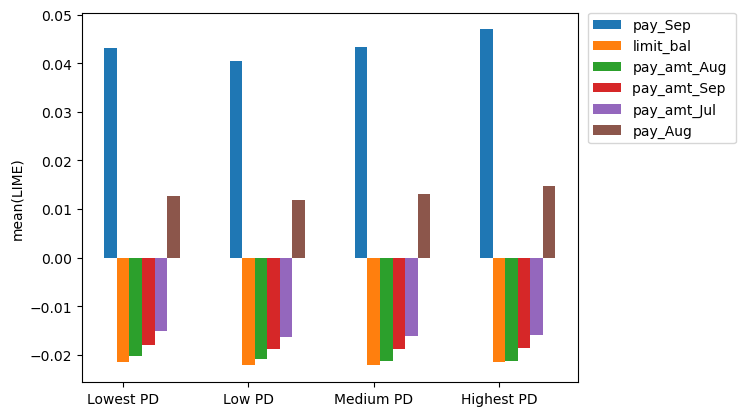

In [36]:
#the LIME coefficients of Random Forest in various clusters
x = ['Lowest PD', 'Low PD', 'Medium PD', 'Highest PD']
 
N = 4
ind = np.arange(N)  
width = 0.1



pay_sep =     [ 0.043107, 0.040493, 0.043260, 0.046955]
limit_bal =   [-0.021419,-0.022082,-0.022194,-0.021573]
pay_amt_Aug = [-0.020151,-0.020866,-0.021280,-0.021369]
pay_amt_Sep = [-0.017882,-0.018877,-0.018830,-0.018545]
pay_amt_Jul = [-0.014999,-0.016237,-0.016169,-0.015962]
pay_Aug =     [ 0.012738, 0.011828, 0.013079, 0.014744]

plt.bar(ind, pay_sep, 0.1, label = 'pay_Sep') 
plt.bar(ind+width, limit_bal, 0.1, label = 'limit_bal') 
plt.bar(ind+width*2, pay_amt_Aug, 0.1, label = 'pay_amt_Aug') 
plt.bar(ind+width*3, pay_amt_Sep, 0.1, label = 'pay_amt_Sep ') 
plt.bar(ind+width*4, pay_amt_Jul, 0.1, label = 'pay_amt_Jul') 
plt.bar(ind+width*5, pay_Aug, 0.1, label = 'pay_Aug') 


plt.ylabel('mean(LIME)') 
plt.xticks(ind+width,x) 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
plt.show() 

In [15]:
# XGBoosting LIME in different clusters
xgb_lowest = xgb_pred_data[xgb_pred_data['labels']=='Lowest PD']
xgb_lowest = xgb_lowest.drop(columns=['default_log_odds', 'labels'])

d = {'Feature': xgb_lowest.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([xgb_lowest.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(xgb_lowest.shape[0]):
    exp_i = explainer_lime.explain_instance(xgb_lowest.iloc[i], optimal_xgb.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()

Intercept 0.33940389432322826
Prediction_local [0.36943247]
Right: 0.33096766
Intercept 0.33670772125695025
Prediction_local [0.34392906]
Right: 0.34465998
Intercept 0.340858652414162
Prediction_local [0.34778638]
Right: 0.2513676
Intercept 0.28143533480179916
Prediction_local [0.28128659]
Right: 0.28128633
Intercept 0.3404178247491773
Prediction_local [0.34472027]
Right: 0.28118145
Intercept 0.34173900724250145
Prediction_local [0.35549911]
Right: 0.2762689
Intercept 0.3392674760341942
Prediction_local [0.42818585]
Right: 0.34148458
Intercept 0.33929607401654927
Prediction_local [0.34489749]
Right: 0.2516484
Intercept 0.33802765201864937
Prediction_local [0.51969948]
Right: 0.69396037
Intercept 0.33937318917545556
Prediction_local [0.34314809]
Right: 0.23331195
Intercept 0.3404055250880372
Prediction_local [0.2918135]
Right: 0.19268923
Intercept 0.3422030945551673
Prediction_local [0.34781917]
Right: 0.20486988
Intercept 0.3415352406684937
Prediction_local [0.34822383]
Right: 0.236648

Intercept 0.34085177203993444
Prediction_local [0.32494212]
Right: 0.25299668
Intercept 0.3197891650794733
Prediction_local [0.16000405]
Right: 0.16021238
Intercept 0.3410548971836046
Prediction_local [0.24379107]
Right: 0.17600477
Intercept 0.3409528942935718
Prediction_local [0.20265092]
Right: 0.1783889
Intercept 0.34504506127702855
Prediction_local [0.22114902]
Right: 0.22064112
Intercept 0.3424564151099909
Prediction_local [0.29740745]
Right: 0.2726851
Intercept 0.3405810010915399
Prediction_local [0.34863476]
Right: 0.2145651
Intercept 0.34246332830106446
Prediction_local [0.29837358]
Right: 0.27808848
Intercept 0.3413082953482146
Prediction_local [0.31824803]
Right: 0.21068029
Intercept 0.34475152915024404
Prediction_local [0.26194873]
Right: 0.25321668
Intercept 0.3423751832966411
Prediction_local [0.35296616]
Right: 0.26057464
Intercept 0.33686503270042595
Prediction_local [0.20540759]
Right: 0.22577357
Intercept 0.3399001988572197
Prediction_local [0.3576212]
Right: 0.2755128

Intercept 0.2293511927127838
Prediction_local [0.22935119]
Right: 0.2293512
Intercept 0.27554099294110057
Prediction_local [0.22117835]
Right: 0.22104299
Intercept 0.33998610953738784
Prediction_local [0.31535829]
Right: 0.28752342
Intercept 0.3395597997590385
Prediction_local [0.48606533]
Right: 0.5124001
Intercept 0.3403170087706963
Prediction_local [0.34574842]
Right: 0.20523287
Intercept 0.3401508965638531
Prediction_local [0.3436733]
Right: 0.2588837
Intercept 0.3425216399475091
Prediction_local [0.34884653]
Right: 0.21321088
Intercept 0.3419730975969111
Prediction_local [0.34709317]
Right: 0.24745256
Intercept 0.3390564358550521
Prediction_local [0.30243137]
Right: 0.2696017
Intercept 0.33662879914175214
Prediction_local [0.56523424]
Right: 0.6974927
Intercept 0.3422346952871245
Prediction_local [0.26505279]
Right: 0.22172877
Intercept 0.34004527294726977
Prediction_local [0.17256769]
Right: 0.17545173
Intercept 0.3418981140716668
Prediction_local [0.27720666]
Right: 0.21792476
I

Intercept 0.33780704747337315
Prediction_local [0.45135385]
Right: 0.47641593
Intercept 0.3414229560831767
Prediction_local [0.53094599]
Right: 0.5284453
Intercept 0.3394441932779121
Prediction_local [0.36953468]
Right: 0.3105891
Intercept 0.3404341424514222
Prediction_local [0.3056921]
Right: 0.26969987
Intercept 0.3405321315784796
Prediction_local [0.37449101]
Right: 0.3902407
Intercept 0.34196870911672517
Prediction_local [0.29894456]
Right: 0.18031211
Intercept 0.3424179288801087
Prediction_local [0.26838722]
Right: 0.26702672
Intercept 0.34109161295552115
Prediction_local [0.34502609]
Right: 0.34657112
Intercept 0.34046266828076843
Prediction_local [0.35897883]
Right: 0.2614207
Intercept 0.3433503901971748
Prediction_local [0.29418702]
Right: 0.19314489
Intercept 0.34177446466732864
Prediction_local [0.35305548]
Right: 0.2599458
Intercept 0.3421725059991845
Prediction_local [0.39304938]
Right: 0.35381308
Intercept 0.34431031607678736
Prediction_local [0.34796499]
Right: 0.23188949

Intercept 0.34202223749433763
Prediction_local [0.42389038]
Right: 0.49882877
Intercept 0.3433396616500381
Prediction_local [0.25492701]
Right: 0.23466402
Intercept 0.340268042338669
Prediction_local [0.34984937]
Right: 0.23789673
Intercept 0.34221132319965886
Prediction_local [0.33435668]
Right: 0.18570776
Intercept 0.3392090146578721
Prediction_local [0.33624062]
Right: 0.24203959
Intercept 0.3398825550607905
Prediction_local [0.36990254]
Right: 0.35837236
Intercept 0.34070703046767065
Prediction_local [0.71378516]
Right: 0.68099976
Intercept 0.3430711325433675
Prediction_local [0.23554314]
Right: 0.2339082
Intercept 0.340314119501245
Prediction_local [0.31747165]
Right: 0.22127602
Intercept 0.3403145475416994
Prediction_local [0.34811286]
Right: 0.29333338
Intercept 0.3400450440033031
Prediction_local [0.32653443]
Right: 0.19069538
Intercept 0.17097394667738672
Prediction_local [0.17097387]
Right: 0.17097387
Intercept 0.3400313879179447
Prediction_local [0.50845646]
Right: 0.7045104

Intercept 0.3394514270377107
Prediction_local [0.30181454]
Right: 0.18396346
Intercept 0.3425279187676104
Prediction_local [0.25574554]
Right: 0.23601666
Intercept 0.34124609985248144
Prediction_local [0.33195125]
Right: 0.21881041
Intercept 0.34130883939045503
Prediction_local [0.34891197]
Right: 0.2566661
Intercept 0.33073311761055907
Prediction_local [0.66006485]
Right: 0.6704288
Intercept 0.34247889762697337
Prediction_local [0.29451322]
Right: 0.29511034
Intercept 0.34093955077523247
Prediction_local [0.34835819]
Right: 0.20320375
Intercept 0.3420106217528297
Prediction_local [0.32397363]
Right: 0.25467178
Intercept 0.34049619818835647
Prediction_local [0.2934633]
Right: 0.1765904
Intercept 0.34091972576736324
Prediction_local [0.3548562]
Right: 0.24901402
Intercept 0.33758547390423516
Prediction_local [0.61606616]
Right: 0.6473683
Intercept 0.33875127259546367
Prediction_local [0.38771702]
Right: 0.43405026
Intercept 0.33815081952036025
Prediction_local [0.34023561]
Right: 0.3554

Intercept 0.3403479849979135
Prediction_local [0.38065248]
Right: 0.4135723
Intercept 0.34205556723898767
Prediction_local [0.33360263]
Right: 0.2078668
Intercept 0.3364520882131365
Prediction_local [0.5026505]
Right: 0.62882483
Intercept 0.3398876283049578
Prediction_local [0.30487569]
Right: 0.30594772
Intercept 0.33961411126425506
Prediction_local [0.35006127]
Right: 0.22220661
Intercept 0.3415270002306676
Prediction_local [0.40150784]
Right: 0.40454507
Intercept 0.32769219683601375
Prediction_local [0.59838434]
Right: 0.61810464
Intercept 0.34094768978200946
Prediction_local [0.3238342]
Right: 0.20566177
Intercept 0.34493281593665626
Prediction_local [0.26690023]
Right: 0.25487226
Intercept 0.3338324896479662
Prediction_local [0.2991097]
Right: 0.29909554
Intercept 0.3413161186461021
Prediction_local [0.32507212]
Right: 0.2616312
Intercept 0.3416035748438444
Prediction_local [0.39317141]
Right: 0.3996932
Intercept 0.34182844893547987
Prediction_local [0.28672326]
Right: 0.24328531


Intercept 0.3406310411992063
Prediction_local [0.34400584]
Right: 0.23259728
Intercept 0.34166317746077757
Prediction_local [0.3362029]
Right: 0.20186177
Intercept 0.34030896219233975
Prediction_local [0.3501784]
Right: 0.24583252
Intercept 0.2839487092582728
Prediction_local [0.28261572]
Right: 0.28261313
Intercept 0.3431485739399122
Prediction_local [0.34226957]
Right: 0.32880512
Intercept 0.3396209061859763
Prediction_local [0.15121055]
Right: 0.15261877
Intercept 0.3398443276580385
Prediction_local [0.48379403]
Right: 0.6870939
Intercept 0.340584405140701
Prediction_local [0.34567405]
Right: 0.27503687
Intercept 0.3397654865146197
Prediction_local [0.39008107]
Right: 0.32789895
Intercept 0.339344015350443
Prediction_local [0.34178109]
Right: 0.21282783
Intercept 0.3383326647115155
Prediction_local [0.4672754]
Right: 0.66539663
Intercept 0.3412513813968681
Prediction_local [0.35155076]
Right: 0.28474513
Intercept 0.34030685697144714
Prediction_local [0.35749608]
Right: 0.2240313
Int

Intercept 0.3414689683775428
Prediction_local [0.36446557]
Right: 0.21034077
Intercept 0.34259704881013653
Prediction_local [0.34530137]
Right: 0.28000653
Intercept 0.3392772014063521
Prediction_local [0.35143092]
Right: 0.25500384
Intercept 0.3411939638989289
Prediction_local [0.29692383]
Right: 0.2904675
Intercept 0.34108266613095695
Prediction_local [0.29028871]
Right: 0.16260332
Intercept 0.3405246124997051
Prediction_local [0.42926055]
Right: 0.6720056
Intercept 0.3387144726642996
Prediction_local [0.35019745]
Right: 0.25626498
Intercept 0.33862502626518093
Prediction_local [0.23249219]
Right: 0.25391644
Intercept 0.34095332975660864
Prediction_local [0.35464085]
Right: 0.25704423
Intercept 0.3412458391163653
Prediction_local [0.31295392]
Right: 0.1769274
Intercept 0.34077840152044453
Prediction_local [0.35229642]
Right: 0.21539615
Intercept 0.3398511834677269
Prediction_local [0.35119355]
Right: 0.23515518
Intercept 0.3406590927787577
Prediction_local [0.30815332]
Right: 0.200995

Intercept 0.3409244453571695
Prediction_local [0.32116021]
Right: 0.218717
Intercept 0.3411570098025889
Prediction_local [0.33982192]
Right: 0.19800268
Intercept 0.34194013513488203
Prediction_local [0.38129783]
Right: 0.40084475
Intercept 0.3412704264163068
Prediction_local [0.3050981]
Right: 0.17364785
Intercept 0.3421189109157859
Prediction_local [0.67686297]
Right: 0.6710649
Intercept 0.34214081390719997
Prediction_local [0.29780723]
Right: 0.23674996
Intercept 0.3408026770037481
Prediction_local [0.34526988]
Right: 0.21508533
Intercept 0.34244234004649754
Prediction_local [0.32243559]
Right: 0.17928104
Intercept 0.3419359500139488
Prediction_local [0.30516252]
Right: 0.2094205
Intercept 0.3491098154744323
Prediction_local [0.28640724]
Right: 0.28314033
Intercept 0.34080406233268734
Prediction_local [0.35742861]
Right: 0.3673103
Intercept 0.34401145959553775
Prediction_local [0.23366664]
Right: 0.23101911
Intercept 0.34365513594462954
Prediction_local [0.34946194]
Right: 0.23334154

In [16]:
d =  {'Features': X_train.columns, 'LIME':value_i.mean(axis=0),'mean_LIME':np.abs(value_i).mean(axis=0)}
xgb_lime_lowest = pd.DataFrame(data=d)
xgb_lime_lowest = xgb_lime_lowest.sort_values(by='mean_LIME',ascending=False)
xgb_lime_lowest

Features      LIME  mean_LIME
3                     pay_Sep  0.051534   0.051534
0                   limit_bal -0.021222   0.021222
16                pay_amt_Aug -0.014601   0.014601
5                     pay_Jul  0.014582   0.014582
4                     pay_Aug  0.014569   0.014569
15                pay_amt_Sep -0.012629   0.012640
6                     pay_Jun  0.011692   0.011692
17                pay_amt_Jul -0.009995   0.010012
7                     pay_May  0.009102   0.009103
8                     pay_Apr  0.008023   0.008023
20                pay_amt_Apr -0.007702   0.007737
19                pay_amt_May -0.005565   0.005578
14               bill_amt_Apr  0.003040   0.003121
18                pay_amt_Jun -0.002952   0.003005
9                bill_amt_Sep  0.002511   0.002579
2                         age  0.002289   0.002336
11               bill_amt_Jul  0.001789   0.001974
13               bill_amt_May -0.001397   0.001727
12               bill_amt_Jun  0.001198   0.001542
24           marriage_married  0.001265   0.001477
10               bill_amt_Aug  0.000809   0.001323
21  education_graduate school  0.000684   0.001149
1                         sex  0.000563   0.001112
22      education_high school -0.000365   0.001008
23       education_university  0.000148   0.001004
25            marriage_single -0.000144   0.000990

In [17]:
xgb_low = xgb_pred_data[xgb_pred_data['labels']=='Low PD']
xgb_low = xgb_low.drop(columns=['default_log_odds', 'labels'])

d = {'Feature': xgb_low.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([xgb_low.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(xgb_low.shape[0]):
    exp_i = explainer_lime.explain_instance(xgb_low.iloc[i], optimal_xgb.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()

Intercept 0.34216372760300745
Prediction_local [0.33481178]
Right: 0.39248952
Intercept 0.3395509739899921
Prediction_local [0.17343177]
Right: 0.27222475
Intercept 0.3406012672267289
Prediction_local [0.25466324]
Right: 0.3734313
Intercept 0.3413608493765553
Prediction_local [0.26913285]
Right: 0.26889372
Intercept 0.34227170213922053
Prediction_local [0.16972682]
Right: 0.22988103
Intercept 0.3403287000789215
Prediction_local [0.22675453]
Right: 0.1968314
Intercept 0.33871156979379474
Prediction_local [0.16675377]
Right: 0.16741368
Intercept 0.34253114843506904
Prediction_local [0.23501113]
Right: 0.26173133
Intercept 0.3401819006520847
Prediction_local [0.318651]
Right: 0.45413917
Intercept 0.3424311436010573
Prediction_local [0.32785101]
Right: 0.34852743
Intercept 0.33990983790815166
Prediction_local [0.30842891]
Right: 0.3745731
Intercept 0.3412978696434161
Prediction_local [0.3289883]
Right: 0.35894397
Intercept 0.3397914004736608
Prediction_local [0.15034557]
Right: 0.34998807


Intercept 0.33960287742950057
Prediction_local [0.17955972]
Right: 0.30284837
Intercept 0.3387266956621519
Prediction_local [0.16080836]
Right: 0.27569005
Intercept 0.3386024099292561
Prediction_local [0.22357373]
Right: 0.2735169
Intercept 0.3399215032321634
Prediction_local [0.31656162]
Right: 0.48482886
Intercept 0.34208774927266455
Prediction_local [0.29468962]
Right: 0.36595383
Intercept 0.3406368466804752
Prediction_local [0.31513866]
Right: 0.27326518
Intercept 0.33925145590373257
Prediction_local [0.24299064]
Right: 0.24869354
Intercept 0.34099280971006246
Prediction_local [0.24948542]
Right: 0.3191681
Intercept 0.34011660211461797
Prediction_local [0.26151665]
Right: 0.23981841
Intercept 0.33989181952583736
Prediction_local [0.24249894]
Right: 0.29466358
Intercept 0.3417167652572485
Prediction_local [0.17909543]
Right: 0.29857665
Intercept 0.33961535245788765
Prediction_local [0.22385196]
Right: 0.40694034
Intercept 0.34144804030903964
Prediction_local [0.24930964]
Right: 0.18

Intercept 0.3403208618551081
Prediction_local [0.18423704]
Right: 0.16819827
Intercept 0.33851365811187967
Prediction_local [0.22054955]
Right: 0.36154807
Intercept 0.34012634984039275
Prediction_local [0.2489953]
Right: 0.26464364
Intercept 0.3415222991403988
Prediction_local [0.28949631]
Right: 0.45032117
Intercept 0.34074669616232034
Prediction_local [0.34243288]
Right: 0.32051322
Intercept 0.34002403133167075
Prediction_local [0.25093941]
Right: 0.23582013
Intercept 0.3432033291953292
Prediction_local [0.31319855]
Right: 0.25137293
Intercept 0.3381046224139742
Prediction_local [0.22151248]
Right: 0.28515106
Intercept 0.3424137524464852
Prediction_local [0.26383188]
Right: 0.3361409
Intercept 0.33884465031786504
Prediction_local [0.18271903]
Right: 0.32364917
Intercept 0.34172058206168965
Prediction_local [0.22049555]
Right: 0.3011023
Intercept 0.34057567402346733
Prediction_local [0.3207865]
Right: 0.23570725
Intercept 0.34001408084821394
Prediction_local [0.2154893]
Right: 0.34991

Intercept 0.331078643485559
Prediction_local [0.13050062]
Right: 0.21814565
Intercept 0.34082451133932573
Prediction_local [0.17215612]
Right: 0.33245656
Intercept 0.341590272368377
Prediction_local [0.16754399]
Right: 0.21410735
Intercept 0.3392134501032864
Prediction_local [0.21270365]
Right: 0.3899928
Intercept 0.3415415362556002
Prediction_local [0.25545715]
Right: 0.2234661
Intercept 0.3409770676575864
Prediction_local [0.27070156]
Right: 0.369459
Intercept 0.3408592088909413
Prediction_local [0.11214177]
Right: 0.1676004
Intercept 0.33988950407659213
Prediction_local [0.24703711]
Right: 0.32344508
Intercept 0.3402977105426103
Prediction_local [0.32515607]
Right: 0.277108
Intercept 0.3400549565393125
Prediction_local [0.24261962]
Right: 0.34745193
Intercept 0.34200391644169537
Prediction_local [0.27810619]
Right: 0.49597943
Intercept 0.3407413460941656
Prediction_local [0.18119351]
Right: 0.41376215
Intercept 0.3396233298837475
Prediction_local [0.29223205]
Right: 0.2365823
Interc

Intercept 0.34227546605925024
Prediction_local [0.25721762]
Right: 0.4174933
Intercept 0.3399111096998002
Prediction_local [0.16358092]
Right: 0.33189943
Intercept 0.3413228976612334
Prediction_local [0.17600811]
Right: 0.26409742
Intercept 0.3424099315018546
Prediction_local [0.28860313]
Right: 0.49618542
Intercept 0.34040157835068535
Prediction_local [0.08125603]
Right: 0.17517816
Intercept 0.3409976244544725
Prediction_local [0.31716933]
Right: 0.37996474
Intercept 0.3395873246370725
Prediction_local [0.1722696]
Right: 0.35209724
Intercept 0.34153779393346145
Prediction_local [0.26718882]
Right: 0.33382568
Intercept 0.3405435636906032
Prediction_local [0.22887532]
Right: 0.27163228
Intercept 0.3411424068673075
Prediction_local [0.26867877]
Right: 0.31792122
Intercept 0.33901957785605974
Prediction_local [0.23096296]
Right: 0.33014148
Intercept 0.339763958351533
Prediction_local [0.30226798]
Right: 0.31377965
Intercept 0.3416809519708516
Prediction_local [0.25876026]
Right: 0.3103456

Intercept 0.33914089380372464
Prediction_local [0.15980921]
Right: 0.33911985
Intercept 0.34035373218029535
Prediction_local [0.2305946]
Right: 0.42456132
Intercept 0.33942962172776237
Prediction_local [0.30299606]
Right: 0.36639246
Intercept 0.34064607201894287
Prediction_local [0.27735584]
Right: 0.22611515
Intercept 0.3402396906165445
Prediction_local [0.32233892]
Right: 0.35404843
Intercept 0.3415879706341575
Prediction_local [0.33180569]
Right: 0.50130254
Intercept 0.3381954536627126
Prediction_local [0.21541231]
Right: 0.33006692
Intercept 0.3409328316504294
Prediction_local [0.29890815]
Right: 0.43437526
Intercept 0.3398219817546088
Prediction_local [0.20834928]
Right: 0.27578115
Intercept 0.3407266285059926
Prediction_local [0.30453355]
Right: 0.485196
Intercept 0.34231358003220946
Prediction_local [0.34116979]
Right: 0.28710303
Intercept 0.3413438421365866
Prediction_local [0.25702895]
Right: 0.33320844
Intercept 0.3402547113504654
Prediction_local [0.26370359]
Right: 0.269146

Intercept 0.3398517624635176
Prediction_local [0.3385197]
Right: 0.5108765
Intercept 0.3418256481005955
Prediction_local [0.15969451]
Right: 0.39870432
Intercept 0.3411386607342977
Prediction_local [0.43653319]
Right: 0.629913
Intercept 0.3385487133560454
Prediction_local [0.24831279]
Right: 0.36197323
Intercept 0.3381623325086029
Prediction_local [0.26666917]
Right: 0.30042794
Intercept 0.33975155441991
Prediction_local [0.29825178]
Right: 0.48151028
Intercept 0.34073489194198076
Prediction_local [0.30297604]
Right: 0.41786808
Intercept 0.3407104815214577
Prediction_local [0.3179219]
Right: 0.33932006
Intercept 0.34106851475097505
Prediction_local [0.09051197]
Right: 0.16216214
Intercept 0.34141346502599307
Prediction_local [0.25440663]
Right: 0.28665745
Intercept 0.33945839399484196
Prediction_local [0.10841199]
Right: 0.16839826
Intercept 0.3394436993935333
Prediction_local [0.27786198]
Right: 0.4104167
Intercept 0.3421652878093786
Prediction_local [0.36031068]
Right: 0.28566995
Int

Intercept 0.3425367598497182
Prediction_local [0.32399204]
Right: 0.47417805
Intercept 0.33641454877666976
Prediction_local [0.18334455]
Right: 0.18355994
Intercept 0.33898821680871866
Prediction_local [0.15181687]
Right: 0.2961122
Intercept 0.33844321460489923
Prediction_local [0.17879281]
Right: 0.1672733
Intercept 0.3412811932789138
Prediction_local [0.23300754]
Right: 0.22059837
Intercept 0.33882817538575294
Prediction_local [0.25054437]
Right: 0.36058316
Intercept 0.3390153202049691
Prediction_local [0.32210515]
Right: 0.34532756
Intercept 0.3388918611659261
Prediction_local [0.32375596]
Right: 0.4947158
Intercept 0.34159985340724847
Prediction_local [0.32812325]
Right: 0.31993565
Intercept 0.3382993019483316
Prediction_local [0.15321836]
Right: 0.31511
Intercept 0.34144544873660104
Prediction_local [0.26130942]
Right: 0.42424658
Intercept 0.34041278918561646
Prediction_local [0.17570776]
Right: 0.21078856
Intercept 0.3408051571869305
Prediction_local [0.28171607]
Right: 0.2995638

Intercept 0.33828701565404756
Prediction_local [0.2082511]
Right: 0.42530876
Intercept 0.34185635626635885
Prediction_local [0.26335518]
Right: 0.26738405
Intercept 0.3424642415787785
Prediction_local [0.15576879]
Right: 0.34689635
Intercept 0.3404995369659152
Prediction_local [0.18684252]
Right: 0.3826887
Intercept 0.34061884343846194
Prediction_local [0.14590733]
Right: 0.25837415
Intercept 0.33784318671691044
Prediction_local [0.12720307]
Right: 0.20517966
Intercept 0.3420591580574042
Prediction_local [0.26898154]
Right: 0.39913705
Intercept 0.34275571721972004
Prediction_local [0.25248876]
Right: 0.3397268
Intercept 0.3393849328021128
Prediction_local [0.2122844]
Right: 0.3545328
Intercept 0.3401177193902348
Prediction_local [0.15918899]
Right: 0.26067504
Intercept 0.34128147013688226
Prediction_local [0.28889071]
Right: 0.4140085
Intercept 0.34053353051213353
Prediction_local [0.25439952]
Right: 0.41308737
Intercept 0.3412022160857752
Prediction_local [0.29461547]
Right: 0.3875711

Intercept 0.34073457200371926
Prediction_local [0.23732222]
Right: 0.20784467
Intercept 0.3404121238435149
Prediction_local [0.1571441]
Right: 0.26035228
Intercept 0.34048038548758514
Prediction_local [0.29895297]
Right: 0.36844635
Intercept 0.3383793115386932
Prediction_local [0.18998115]
Right: 0.42755193
Intercept 0.3404471152257032
Prediction_local [0.21753103]
Right: 0.24534383
Intercept 0.3410126409540418
Prediction_local [0.32982035]
Right: 0.49976814
Intercept 0.341574515705337
Prediction_local [0.16660713]
Right: 0.41486534
Intercept 0.3395758791275936
Prediction_local [0.20655539]
Right: 0.21344559
Intercept 0.34191147534087785
Prediction_local [0.30131428]
Right: 0.29523805
Intercept 0.3414688247825478
Prediction_local [0.19218229]
Right: 0.304797
Intercept 0.34029739240932405
Prediction_local [0.18074657]
Right: 0.38632512
Intercept 0.34214957145684627
Prediction_local [0.21269286]
Right: 0.24104048
Intercept 0.33966602640041194
Prediction_local [0.17900715]
Right: 0.367545

Intercept 0.34197519654849245
Prediction_local [0.26257431]
Right: 0.42748964
Intercept 0.33903263060339484
Prediction_local [0.25455716]
Right: 0.29075617
Intercept 0.3398253431485399
Prediction_local [0.18955192]
Right: 0.27571705
Intercept 0.3410400194438177
Prediction_local [0.25337043]
Right: 0.31909022
Intercept 0.3413905358430379
Prediction_local [0.20245745]
Right: 0.3680891
Intercept 0.33857432935734616
Prediction_local [0.25728267]
Right: 0.30117118
Intercept 0.3412276744731114
Prediction_local [0.24691128]
Right: 0.27441815
Intercept 0.34137679059569004
Prediction_local [0.31884994]
Right: 0.48324826
Intercept 0.33986086188782993
Prediction_local [0.16894737]
Right: 0.44950306
Intercept 0.3411725445941862
Prediction_local [0.29719077]
Right: 0.38541952
Intercept 0.3420199844224186
Prediction_local [0.25142534]
Right: 0.26400304
Intercept 0.34000996179852727
Prediction_local [0.33746595]
Right: 0.2952744
Intercept 0.34174099067193037
Prediction_local [0.3303159]
Right: 0.3695

Intercept 0.3406385128915267
Prediction_local [0.21954085]
Right: 0.21523441
Intercept 0.3420759112177421
Prediction_local [0.17460424]
Right: 0.2517085
Intercept 0.33651019149803724
Prediction_local [0.11773249]
Right: 0.22310351
Intercept 0.34035158451437497
Prediction_local [0.19512987]
Right: 0.2624055
Intercept 0.33943716993672973
Prediction_local [0.30024175]
Right: 0.4151905
Intercept 0.34163880527226453
Prediction_local [0.27536717]
Right: 0.2739642
Intercept 0.34067297732185803
Prediction_local [0.18937999]
Right: 0.4454537
Intercept 0.3384606745104596
Prediction_local [0.26462422]
Right: 0.37694412
Intercept 0.34013370812995186
Prediction_local [0.22490625]
Right: 0.34895712
Intercept 0.3395040029567164
Prediction_local [0.24711362]
Right: 0.3407954
Intercept 0.3405376441526661
Prediction_local [0.15392001]
Right: 0.34617156
Intercept 0.33869663767634917
Prediction_local [0.12304782]
Right: 0.1814906
Intercept 0.34140996458103473
Prediction_local [0.30019416]
Right: 0.5365205

Intercept 0.34028447199668665
Prediction_local [0.1606575]
Right: 0.17311859
Intercept 0.3414951829490622
Prediction_local [0.29174931]
Right: 0.26359072
Intercept 0.3418500958001498
Prediction_local [0.22294935]
Right: 0.24824642
Intercept 0.33837936479992753
Prediction_local [0.17403046]
Right: 0.29076704
Intercept 0.341158992529875
Prediction_local [0.2075505]
Right: 0.1891536
Intercept 0.33993435291144275
Prediction_local [0.16022531]
Right: 0.239328
Intercept 0.34070123870591607
Prediction_local [0.34571136]
Right: 0.28605482
Intercept 0.3429745514006475
Prediction_local [0.23234106]
Right: 0.28128862
Intercept 0.3400513900083117
Prediction_local [0.14944837]
Right: 0.22553548
Intercept 0.34182760958021446
Prediction_local [0.26030509]
Right: 0.31707615
Intercept 0.3409904452832265
Prediction_local [0.23002328]
Right: 0.22013812
Intercept 0.34140255471570946
Prediction_local [0.27450996]
Right: 0.35006738
Intercept 0.33860828794138514
Prediction_local [0.1915702]
Right: 0.37890944

Intercept 0.3424550200976327
Prediction_local [0.20181412]
Right: 0.2846235
Intercept 0.34111500699682085
Prediction_local [0.29940008]
Right: 0.49308977
Intercept 0.33989040359640876
Prediction_local [0.23602912]
Right: 0.29619384
Intercept 0.339743166554451
Prediction_local [0.32117693]
Right: 0.4904733
Intercept 0.3411014898565286
Prediction_local [0.33544412]
Right: 0.49063572
Intercept 0.3414689217807612
Prediction_local [0.16110411]
Right: 0.24088395
Intercept 0.33975315407462436
Prediction_local [0.23653015]
Right: 0.35819823
Intercept 0.3424966859471962
Prediction_local [0.32123177]
Right: 0.30263603
Intercept 0.34098280206297715
Prediction_local [0.24572481]
Right: 0.22814228
Intercept 0.34015224861041465
Prediction_local [0.14807868]
Right: 0.25681219
Intercept 0.3405384245780601
Prediction_local [0.18663584]
Right: 0.378331
Intercept 0.3396314396595704
Prediction_local [0.2975481]
Right: 0.31966525
Intercept 0.3407074693133182
Prediction_local [0.21779543]
Right: 0.29047328


Intercept 0.3418159311382758
Prediction_local [0.20961572]
Right: 0.2530806
Intercept 0.33926772192213894
Prediction_local [0.21976669]
Right: 0.40038085
Intercept 0.3412837502651044
Prediction_local [0.34342609]
Right: 0.36324194
Intercept 0.34008048246696027
Prediction_local [0.31365632]
Right: 0.2627242
Intercept 0.3441436734467499
Prediction_local [0.27484571]
Right: 0.2389161
Intercept 0.339931697268082
Prediction_local [0.25637876]
Right: 0.4014129
Intercept 0.3406876826792532
Prediction_local [0.27386376]
Right: 0.2415649
Intercept 0.34252188683322055
Prediction_local [0.28392272]
Right: 0.3711114
Intercept 0.3406213564737166
Prediction_local [0.22725686]
Right: 0.2961407
Intercept 0.34190624413708337
Prediction_local [0.22753583]
Right: 0.26702583
Intercept 0.34204545083982796
Prediction_local [0.28992994]
Right: 0.29629195
Intercept 0.33965781932433514
Prediction_local [0.24126063]
Right: 0.29299405
Intercept 0.33967712384716314
Prediction_local [0.19199022]
Right: 0.31036735


Intercept 0.3395242773750075
Prediction_local [0.16316671]
Right: 0.2072199
Intercept 0.3407782929185779
Prediction_local [0.2254682]
Right: 0.41326094
Intercept 0.340866727314487
Prediction_local [0.23981958]
Right: 0.28863868
Intercept 0.33857876798198633
Prediction_local [0.20611017]
Right: 0.36409536
Intercept 0.3422068979586275
Prediction_local [0.31293667]
Right: 0.45514435
Intercept 0.3399680473289036
Prediction_local [0.21436092]
Right: 0.18962897
Intercept 0.3420185906505274
Prediction_local [0.24374943]
Right: 0.39194098
Intercept 0.3403271127088875
Prediction_local [0.2627149]
Right: 0.35346404
Intercept 0.34149826069239936
Prediction_local [0.30163823]
Right: 0.3819288
Intercept 0.3378181516099536
Prediction_local [0.16317032]
Right: 0.3910173
Intercept 0.33982924186206415
Prediction_local [0.24353409]
Right: 0.2654266
Intercept 0.3407601966005656
Prediction_local [0.19853007]
Right: 0.41162297
Intercept 0.34014211807755995
Prediction_local [0.06031304]
Right: 0.16905582
In

Intercept 0.3393825786322247
Prediction_local [0.13085886]
Right: 0.25216562
Intercept 0.3395898893310501
Prediction_local [0.1593112]
Right: 0.28345653
Intercept 0.34216215486724877
Prediction_local [0.236862]
Right: 0.19345427
Intercept 0.3408270382196462
Prediction_local [0.33054863]
Right: 0.44790584
Intercept 0.3404172383787973
Prediction_local [0.17111678]
Right: 0.36649907
Intercept 0.3408904168814504
Prediction_local [0.16204368]
Right: 0.45765182
Intercept 0.3399761087627514
Prediction_local [0.23675384]
Right: 0.25185525
Intercept 0.3400060035315184
Prediction_local [0.38691266]
Right: 0.51271063
Intercept 0.3384642316275043
Prediction_local [0.26802591]
Right: 0.31070805
Intercept 0.34269177001069334
Prediction_local [0.22692343]
Right: 0.23305838
Intercept 0.3421990093312695
Prediction_local [0.28910198]
Right: 0.28126085
Intercept 0.3435747950438829
Prediction_local [0.22655783]
Right: 0.26910233
Intercept 0.33951479403158175
Prediction_local [0.33215473]
Right: 0.362963
I

Intercept 0.3400085473958274
Prediction_local [0.12406484]
Right: 0.36446896
Intercept 0.3421973459565028
Prediction_local [0.2193126]
Right: 0.31784964
Intercept 0.3421051346818612
Prediction_local [0.19779434]
Right: 0.32023847
Intercept 0.3392465063734032
Prediction_local [0.32657809]
Right: 0.38259694
Intercept 0.3394899933495441
Prediction_local [0.25647926]
Right: 0.36924767
Intercept 0.340474933641364
Prediction_local [0.26446971]
Right: 0.28544754
Intercept 0.34122861657890313
Prediction_local [0.27027946]
Right: 0.2857439
Intercept 0.34166357195726943
Prediction_local [0.30085467]
Right: 0.3264612
Intercept 0.34294466660634165
Prediction_local [0.23454901]
Right: 0.27356324
Intercept 0.34062212801419256
Prediction_local [0.14913446]
Right: 0.24517524
Intercept 0.34100958670035986
Prediction_local [0.17625543]
Right: 0.26189312
Intercept 0.33996335475584155
Prediction_local [0.30579186]
Right: 0.33646423
Intercept 0.3408461555841989
Prediction_local [0.123515]
Right: 0.18562552

Intercept 0.338998176618787
Prediction_local [0.18597442]
Right: 0.33232465
Intercept 0.3399009637404085
Prediction_local [0.33868888]
Right: 0.3754337
Intercept 0.33913956106760534
Prediction_local [0.17526315]
Right: 0.43138462
Intercept 0.3402889977369795
Prediction_local [0.1022855]
Right: 0.1984523
Intercept 0.33990618715101295
Prediction_local [0.22274904]
Right: 0.19707179
Intercept 0.34243841950198295
Prediction_local [0.33112629]
Right: 0.45647818
Intercept 0.33922317838013116
Prediction_local [0.17425729]
Right: 0.3365247
Intercept 0.3431093630675729
Prediction_local [0.24258609]
Right: 0.3192824
Intercept 0.3403289052956382
Prediction_local [0.32268887]
Right: 0.26605257
Intercept 0.34120046539805327
Prediction_local [0.17536359]
Right: 0.2618677
Intercept 0.34136519381708613
Prediction_local [0.24723778]
Right: 0.37606058
Intercept 0.34164226698678896
Prediction_local [0.11173072]
Right: 0.15344715
Intercept 0.3401383000438876
Prediction_local [0.19219815]
Right: 0.41589066

Intercept 0.3407544457272988
Prediction_local [0.31153767]
Right: 0.31497583
Intercept 0.3412676581678455
Prediction_local [0.29300344]
Right: 0.30151454
Intercept 0.3390547080197152
Prediction_local [0.3265198]
Right: 0.3436469
Intercept 0.3398239204619325
Prediction_local [0.39683701]
Right: 0.42437637
Intercept 0.34045810129828985
Prediction_local [0.24672207]
Right: 0.41792682
Intercept 0.34133270188039294
Prediction_local [0.32886676]
Right: 0.45749164
Intercept 0.34189651145489797
Prediction_local [0.23773313]
Right: 0.34230682
Intercept 0.34123415860508427
Prediction_local [0.280476]
Right: 0.48638105
Intercept 0.3411100940334943
Prediction_local [0.23159792]
Right: 0.20305523
Intercept 0.3407285371192891
Prediction_local [0.26332351]
Right: 0.3564939
Intercept 0.3398820298225948
Prediction_local [0.16170658]
Right: 0.28738186
Intercept 0.3414340294947973
Prediction_local [0.22623807]
Right: 0.2610472
Intercept 0.34083057821103063
Prediction_local [0.19805787]
Right: 0.22475223


Intercept 0.3401373251214127
Prediction_local [0.21683107]
Right: 0.3769032
Intercept 0.34151585161152564
Prediction_local [0.25422595]
Right: 0.21650918
Intercept 0.33846941186317114
Prediction_local [0.21575927]
Right: 0.24696806
Intercept 0.3414619392663291
Prediction_local [0.32229503]
Right: 0.399065
Intercept 0.34112023830427396
Prediction_local [0.3797147]
Right: 0.436072
Intercept 0.3403945143240676
Prediction_local [0.17899977]
Right: 0.35338798
Intercept 0.3394858864773571
Prediction_local [0.2488842]
Right: 0.27649462
Intercept 0.3401325433043864
Prediction_local [0.31404056]
Right: 0.30995083
Intercept 0.33998658112060987
Prediction_local [0.23789248]
Right: 0.23510897
Intercept 0.34125811041853776
Prediction_local [0.18529013]
Right: 0.2637697
Intercept 0.34141814428904377
Prediction_local [0.27563828]
Right: 0.4188296
Intercept 0.33906132177880344
Prediction_local [0.42421142]
Right: 0.696593
Intercept 0.3411468875431367
Prediction_local [0.21938903]
Right: 0.34773332
Int

Intercept 0.33832167170081523
Prediction_local [0.14623462]
Right: 0.174422
Intercept 0.33856372986309485
Prediction_local [0.15293133]
Right: 0.24870628
Intercept 0.3387509698180064
Prediction_local [0.39790337]
Right: 0.3527035
Intercept 0.33930891131670027
Prediction_local [0.11204036]
Right: 0.17119344
Intercept 0.33986784007142057
Prediction_local [0.22999812]
Right: 0.2287721
Intercept 0.3414140071236335
Prediction_local [0.16889905]
Right: 0.3468204
Intercept 0.33885589294889806
Prediction_local [0.26123736]
Right: 0.26762
Intercept 0.3403118313112161
Prediction_local [0.25465616]
Right: 0.21691202
Intercept 0.3400869650195697
Prediction_local [0.30569852]
Right: 0.3246441
Intercept 0.3402994440920519
Prediction_local [0.24517375]
Right: 0.21789064
Intercept 0.34028425870262835
Prediction_local [0.26211964]
Right: 0.22392769
Intercept 0.3420389484334917
Prediction_local [0.18879774]
Right: 0.35863882
Intercept 0.34200115033983564
Prediction_local [0.28561908]
Right: 0.32651702
I

Intercept 0.3409883125084004
Prediction_local [0.31481542]
Right: 0.3138698
Intercept 0.34194563688658863
Prediction_local [0.23734071]
Right: 0.2809695
Intercept 0.3405401314944643
Prediction_local [0.24609821]
Right: 0.2408596
Intercept 0.3396996920576292
Prediction_local [0.24994527]
Right: 0.28274292
Intercept 0.3340839884087544
Prediction_local [0.15440556]
Right: 0.26948026
Intercept 0.3391338302960743
Prediction_local [0.15411499]
Right: 0.28884882
Intercept 0.3386762868426854
Prediction_local [0.28704313]
Right: 0.28995746
Intercept 0.3431971446220377
Prediction_local [0.15621724]
Right: 0.25216648
Intercept 0.34169539105676827
Prediction_local [0.21892092]
Right: 0.33124354
Intercept 0.3344244395487196
Prediction_local [0.18162056]
Right: 0.29977772
Intercept 0.3414036538032256
Prediction_local [0.17358196]
Right: 0.18459196
Intercept 0.3415095720485944
Prediction_local [0.3334229]
Right: 0.32824662
Intercept 0.3412047328340787
Prediction_local [0.21138091]
Right: 0.3881445
In

Intercept 0.33985898951011334
Prediction_local [0.26708653]
Right: 0.38678017
Intercept 0.34146721700859295
Prediction_local [0.25990139]
Right: 0.40206528
Intercept 0.33945654837506806
Prediction_local [0.17897483]
Right: 0.2920227
Intercept 0.3399761657956759
Prediction_local [0.18927701]
Right: 0.3362428
Intercept 0.3428181537218213
Prediction_local [0.23477015]
Right: 0.263927
Intercept 0.34404778451679235
Prediction_local [0.30158649]
Right: 0.42089862
Intercept 0.3433126328443082
Prediction_local [0.26612929]
Right: 0.28024882
Intercept 0.34160044171888315
Prediction_local [0.18813544]
Right: 0.34708488
Intercept 0.3419052046066933
Prediction_local [0.17196689]
Right: 0.26646838
Intercept 0.3409865268750575
Prediction_local [0.14122363]
Right: 0.23246151
Intercept 0.34038462164812705
Prediction_local [0.2519046]
Right: 0.3804705
Intercept 0.3407935725066392
Prediction_local [0.33742269]
Right: 0.28261444
Intercept 0.33866230612808035
Prediction_local [0.20644234]
Right: 0.2335116

Intercept 0.3401824121687811
Prediction_local [0.20447183]
Right: 0.23246306
Intercept 0.3405771066290073
Prediction_local [0.25122162]
Right: 0.3495012
Intercept 0.3405708385963967
Prediction_local [0.24277908]
Right: 0.26878664
Intercept 0.3409517863548591
Prediction_local [0.32630839]
Right: 0.27761662
Intercept 0.3425297522153483
Prediction_local [0.23606192]
Right: 0.255744
Intercept 0.3416387290556726
Prediction_local [0.24148891]
Right: 0.24472974
Intercept 0.33229757919540615
Prediction_local [0.069982]
Right: 0.16376145
Intercept 0.3402166357756842
Prediction_local [0.16599119]
Right: 0.23933537
Intercept 0.3399081092523884
Prediction_local [0.18810211]
Right: 0.22245204
Intercept 0.339583674609883
Prediction_local [0.28559381]
Right: 0.5046424
Intercept 0.34017610389528447
Prediction_local [0.30620363]
Right: 0.4415382
Intercept 0.33824490426731824
Prediction_local [0.21039079]
Right: 0.30886704
Intercept 0.34195434602045094
Prediction_local [0.23600571]
Right: 0.27692643
Int

Intercept 0.33940364584447313
Prediction_local [0.32055802]
Right: 0.33382398
Intercept 0.3397094169335467
Prediction_local [0.21665212]
Right: 0.21569061
Intercept 0.34041148208570443
Prediction_local [0.19293591]
Right: 0.2633653
Intercept 0.3398853689045074
Prediction_local [0.19643312]
Right: 0.21714285
Intercept 0.3380130606117255
Prediction_local [0.27782939]
Right: 0.52914107
Intercept 0.34065160022656615
Prediction_local [0.2818961]
Right: 0.3481375
Intercept 0.33829534838339864
Prediction_local [0.24821103]
Right: 0.3823605
Intercept 0.33938390057829904
Prediction_local [0.26076249]
Right: 0.33011052
Intercept 0.33964021489149976
Prediction_local [0.2369324]
Right: 0.27624068
Intercept 0.3380819224321939
Prediction_local [0.13484284]
Right: 0.261387
Intercept 0.3423919282278127
Prediction_local [0.34853868]
Right: 0.3820914
Intercept 0.34115276104736186
Prediction_local [0.244804]
Right: 0.27945915
Intercept 0.33927973049081384
Prediction_local [0.1199376]
Right: 0.16936292
In

Intercept 0.3414379709230087
Prediction_local [0.17060111]
Right: 0.22147663
Intercept 0.34094983641454524
Prediction_local [0.17463624]
Right: 0.35058016
Intercept 0.3393118546859144
Prediction_local [0.2065761]
Right: 0.3662932
Intercept 0.3375079559232319
Prediction_local [0.30294463]
Right: 0.3378619
Intercept 0.3427153201708368
Prediction_local [0.26120276]
Right: 0.3173552
Intercept 0.34057446076710535
Prediction_local [0.34028918]
Right: 0.41146848
Intercept 0.3399777712988854
Prediction_local [0.34886014]
Right: 0.3554818
Intercept 0.3386593594621643
Prediction_local [0.18021943]
Right: 0.40328613
Intercept 0.34047401754337214
Prediction_local [0.2355202]
Right: 0.2993508
Intercept 0.3393904098575736
Prediction_local [0.23178891]
Right: 0.20951703
Intercept 0.3425613886783934
Prediction_local [0.24856105]
Right: 0.3691292
Intercept 0.34028896897308025
Prediction_local [0.27831176]
Right: 0.2511977
Intercept 0.34117567442437174
Prediction_local [0.24386577]
Right: 0.3715496
Inte

Intercept 0.3393510624733166
Prediction_local [0.23065285]
Right: 0.34103006
Intercept 0.3406339928993145
Prediction_local [0.34601123]
Right: 0.38801613
Intercept 0.33910096736709544
Prediction_local [0.28802538]
Right: 0.47640944
Intercept 0.34006354064899563
Prediction_local [0.28352006]
Right: 0.32789364
Intercept 0.34162396632463754
Prediction_local [0.24818438]
Right: 0.225098
Intercept 0.3380215320240262
Prediction_local [0.16377017]
Right: 0.32324392
Intercept 0.3409962232229909
Prediction_local [0.31813642]
Right: 0.30107853
Intercept 0.33930966765765364
Prediction_local [0.25875854]
Right: 0.22026394
Intercept 0.34115039626292776
Prediction_local [0.16080654]
Right: 0.25415137
Intercept 0.33963676259282266
Prediction_local [0.24025272]
Right: 0.27497104
Intercept 0.3399099223620968
Prediction_local [0.15659353]
Right: 0.46055785
Intercept 0.3401386754619638
Prediction_local [0.24813621]
Right: 0.3243239
Intercept 0.3404670832286732
Prediction_local [0.28529633]
Right: 0.32586

In [18]:
d =  {'Features': X_train.columns, 'LIME':value_i.mean(axis=0),'mean_LIME':np.abs(value_i).mean(axis=0)}
xgb_lime_low = pd.DataFrame(data=d)
xgb_lime_low = xgb_lime_low.sort_values(by='mean_LIME',ascending=False)
xgb_lime_low

Features      LIME  mean_LIME
3                     pay_Sep  0.050524   0.050524
0                   limit_bal -0.021945   0.021945
16                pay_amt_Aug -0.014869   0.014869
5                     pay_Jul  0.014515   0.014515
4                     pay_Aug  0.014130   0.014130
15                pay_amt_Sep -0.013490   0.013490
6                     pay_Jun  0.011656   0.011656
17                pay_amt_Jul -0.010829   0.010829
7                     pay_May  0.008581   0.008581
20                pay_amt_Apr -0.007956   0.007973
8                     pay_Apr  0.007443   0.007443
19                pay_amt_May -0.005705   0.005708
18                pay_amt_Jun -0.003161   0.003171
14               bill_amt_Apr  0.003048   0.003054
2                         age  0.002530   0.002538
13               bill_amt_May -0.002121   0.002146
11               bill_amt_Jul  0.002015   0.002048
9                bill_amt_Sep  0.001377   0.001504
24           marriage_married  0.001328   0.001451
12               bill_amt_Jun  0.001286   0.001428
21  education_graduate school  0.000827   0.001138
1                         sex  0.000613   0.001024
10               bill_amt_Aug  0.000481   0.000983
22      education_high school -0.000333   0.000943
25            marriage_single -0.000247   0.000932
23       education_university  0.000237   0.000905

In [19]:

xgb_med = xgb_pred_data[xgb_pred_data['labels']=='Medium PD']
xgb_med = xgb_med.drop(columns=['default_log_odds', 'labels'])

d = {'Feature': xgb_med.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([xgb_med.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(xgb_med.shape[0]):
    exp_i = explainer_lime.explain_instance(xgb_med.iloc[i], optimal_xgb.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()

Intercept 0.34128690981823245
Prediction_local [0.35399705]
Right: 0.28973302
Intercept 0.3402142245864361
Prediction_local [0.37393168]
Right: 0.31916308
Intercept 0.34106065973615646
Prediction_local [0.37564664]
Right: 0.31912264
Intercept 0.34050297130156587
Prediction_local [0.37604657]
Right: 0.44251752
Intercept 0.34153142702727995
Prediction_local [0.37870762]
Right: 0.38449228
Intercept 0.34154979608149916
Prediction_local [0.45505431]
Right: 0.558276
Intercept 0.3415018388047857
Prediction_local [0.37441779]
Right: 0.3465799
Intercept 0.34120503778925426
Prediction_local [0.38276477]
Right: 0.3572083
Intercept 0.3436425291764246
Prediction_local [0.38622046]
Right: 0.35914743
Intercept 0.3386919102362033
Prediction_local [0.32283643]
Right: 0.21194212
Intercept 0.33921905779574907
Prediction_local [0.22290878]
Right: 0.2545065
Intercept 0.33765349620364643
Prediction_local [0.36788022]
Right: 0.34084597
Intercept 0.3408422778547272
Prediction_local [0.31150016]
Right: 0.23332

Intercept 0.3404417978992626
Prediction_local [0.3828537]
Right: 0.45694622
Intercept 0.34026099318969555
Prediction_local [0.37167023]
Right: 0.4380066
Intercept 0.34347599505947307
Prediction_local [0.36003684]
Right: 0.3094488
Intercept 0.34098039843787453
Prediction_local [0.37078944]
Right: 0.26044896
Intercept 0.3392113573500679
Prediction_local [0.3623478]
Right: 0.38118955
Intercept 0.33959307722153637
Prediction_local [0.33375061]
Right: 0.20896082
Intercept 0.3405649136867233
Prediction_local [0.31419823]
Right: 0.3655121
Intercept 0.33876884708185095
Prediction_local [0.35490699]
Right: 0.23189577
Intercept 0.34062908980882295
Prediction_local [0.46616921]
Right: 0.6976457
Intercept 0.34096276630858235
Prediction_local [0.35901292]
Right: 0.3404451
Intercept 0.34271390272263097
Prediction_local [0.38223408]
Right: 0.315069
Intercept 0.343430884268224
Prediction_local [0.35844262]
Right: 0.34333417
Intercept 0.3419178085278366
Prediction_local [0.36225144]
Right: 0.3274638
In

Intercept 0.3421766402035755
Prediction_local [0.36053796]
Right: 0.25568104
Intercept 0.3411857695412742
Prediction_local [0.28363266]
Right: 0.18011336
Intercept 0.3433288008465381
Prediction_local [0.39581702]
Right: 0.49772623
Intercept 0.34205604665483497
Prediction_local [0.38239256]
Right: 0.2956839
Intercept 0.34203311165549444
Prediction_local [0.36303362]
Right: 0.2576085
Intercept 0.33880247395692203
Prediction_local [0.46662857]
Right: 0.69008136
Intercept 0.3406482293198094
Prediction_local [0.3686207]
Right: 0.33601776
Intercept 0.3396666870074781
Prediction_local [0.36012286]
Right: 0.252861
Intercept 0.3404241665750764
Prediction_local [0.36107484]
Right: 0.27648267
Intercept 0.3407746532993736
Prediction_local [0.35789009]
Right: 0.29941675
Intercept 0.3412864126150051
Prediction_local [0.36760977]
Right: 0.34841156
Intercept 0.3415625322195816
Prediction_local [0.37936047]
Right: 0.25584447
Intercept 0.3392380773694053
Prediction_local [0.39105639]
Right: 0.41517088
I

Intercept 0.34043974394391285
Prediction_local [0.36288046]
Right: 0.2565295
Intercept 0.34064622542833417
Prediction_local [0.36213538]
Right: 0.29397222
Intercept 0.34031762969551715
Prediction_local [0.25769557]
Right: 0.24505772
Intercept 0.3406622363281957
Prediction_local [0.37101701]
Right: 0.27291164
Intercept 0.34120571613443196
Prediction_local [0.32664809]
Right: 0.22975014
Intercept 0.33879353877843804
Prediction_local [0.37811833]
Right: 0.28457478
Intercept 0.34154568912112354
Prediction_local [0.30891816]
Right: 0.2613531
Intercept 0.3394016675210212
Prediction_local [0.30138177]
Right: 0.24098381
Intercept 0.34225760418935053
Prediction_local [0.31734839]
Right: 0.22176678
Intercept 0.3403962087476339
Prediction_local [0.26258728]
Right: 0.29585963
Intercept 0.34168102224629887
Prediction_local [0.32882468]
Right: 0.2875028
Intercept 0.3390964599137923
Prediction_local [0.37960438]
Right: 0.4338501
Intercept 0.34090865668690623
Prediction_local [0.43461313]
Right: 0.564

Intercept 0.33977675418055775
Prediction_local [0.27938255]
Right: 0.16776429
Intercept 0.3414389346458887
Prediction_local [0.34349433]
Right: 0.23065604
Intercept 0.3397318195116098
Prediction_local [0.31212749]
Right: 0.45781887
Intercept 0.3402409199267191
Prediction_local [0.36453387]
Right: 0.2940195
Intercept 0.3429146966131283
Prediction_local [0.28805226]
Right: 0.20213257
Intercept 0.34127094445024525
Prediction_local [0.36682096]
Right: 0.3235123
Intercept 0.34011805074234597
Prediction_local [0.46492345]
Right: 0.69891053
Intercept 0.34103543737569797
Prediction_local [0.38422757]
Right: 0.37321424
Intercept 0.3404724626575446
Prediction_local [0.32360155]
Right: 0.41975713
Intercept 0.3400298457860044
Prediction_local [0.35939125]
Right: 0.4443178
Intercept 0.33995331027831965
Prediction_local [0.32398621]
Right: 0.18795407
Intercept 0.3428446504010378
Prediction_local [0.36484874]
Right: 0.23380695
Intercept 0.3406551395122902
Prediction_local [0.40774355]
Right: 0.352625

Intercept 0.34193459931909603
Prediction_local [0.38926593]
Right: 0.29754573
Intercept 0.3414150043304238
Prediction_local [0.41857143]
Right: 0.4563039
Intercept 0.3434108898154554
Prediction_local [0.36608931]
Right: 0.2766623
Intercept 0.3419763268841508
Prediction_local [0.40855442]
Right: 0.42733446
Intercept 0.3390526319038246
Prediction_local [0.37579905]
Right: 0.33427295
Intercept 0.3398835286221814
Prediction_local [0.44516252]
Right: 0.5072179
Intercept 0.3398579474990624
Prediction_local [0.31194063]
Right: 0.41315123
Intercept 0.3406389683295407
Prediction_local [0.36614176]
Right: 0.2600957
Intercept 0.3405060985846719
Prediction_local [0.35293518]
Right: 0.24100563
Intercept 0.3402307486075955
Prediction_local [0.34123832]
Right: 0.20771213
Intercept 0.3410188654454156
Prediction_local [0.36931586]
Right: 0.40345898
Intercept 0.3409083420405146
Prediction_local [0.24627073]
Right: 0.3202342
Intercept 0.3425326832499422
Prediction_local [0.3781061]
Right: 0.35324916
Inte

Intercept 0.34140958888008327
Prediction_local [0.35342875]
Right: 0.3795522
Intercept 0.34181788974469596
Prediction_local [0.35366379]
Right: 0.23214783
Intercept 0.3401913210506166
Prediction_local [0.25818988]
Right: 0.26443812
Intercept 0.33868219217438505
Prediction_local [0.39067812]
Right: 0.49790537
Intercept 0.3404990394592583
Prediction_local [0.33615134]
Right: 0.55766463
Intercept 0.3426438239778779
Prediction_local [0.35035588]
Right: 0.22786388
Intercept 0.3415042029344747
Prediction_local [0.37488267]
Right: 0.3948123
Intercept 0.34046720102608014
Prediction_local [0.32948597]
Right: 0.27698094
Intercept 0.3413098282373979
Prediction_local [0.482207]
Right: 0.5694429
Intercept 0.34203056035983204
Prediction_local [0.44943427]
Right: 0.61391336
Intercept 0.34213127384713216
Prediction_local [0.389532]
Right: 0.3021434
Intercept 0.3410826839608144
Prediction_local [0.35098411]
Right: 0.24203037
Intercept 0.3403960812353416
Prediction_local [0.32418375]
Right: 0.19652687
I

Intercept 0.3404606461589648
Prediction_local [0.37105672]
Right: 0.2922387
Intercept 0.3418741748213616
Prediction_local [0.38515335]
Right: 0.32205856
Intercept 0.34230888632746354
Prediction_local [0.34151044]
Right: 0.2173476
Intercept 0.34087215709598845
Prediction_local [0.26197987]
Right: 0.18064941
Intercept 0.33997594648321744
Prediction_local [0.36812727]
Right: 0.33884355
Intercept 0.3440638363145205
Prediction_local [0.3809314]
Right: 0.40963432
Intercept 0.3406238216081988
Prediction_local [0.38638892]
Right: 0.47466224
Intercept 0.34081706445873716
Prediction_local [0.44334215]
Right: 0.50081396
Intercept 0.33989110866176175
Prediction_local [0.37349842]
Right: 0.28436467
Intercept 0.3426640735383811
Prediction_local [0.36698107]
Right: 0.28321427
Intercept 0.34175891834771077
Prediction_local [0.33981499]
Right: 0.24398354
Intercept 0.3418187026139171
Prediction_local [0.49180748]
Right: 0.7493815
Intercept 0.34059875415935226
Prediction_local [0.36234371]
Right: 0.23356

Intercept 0.3413883919106987
Prediction_local [0.37300082]
Right: 0.28741112
Intercept 0.3411405142779066
Prediction_local [0.36332297]
Right: 0.2771254
Intercept 0.3402628235686269
Prediction_local [0.3685055]
Right: 0.3082348
Intercept 0.3411590956385646
Prediction_local [0.38863126]
Right: 0.41817486
Intercept 0.3415976772821241
Prediction_local [0.46770288]
Right: 0.5840918
Intercept 0.34244220735600855
Prediction_local [0.39370874]
Right: 0.28203687
Intercept 0.34013125790256854
Prediction_local [0.34453312]
Right: 0.23533086
Intercept 0.33895710207475555
Prediction_local [0.47847569]
Right: 0.70626837
Intercept 0.3412601785953524
Prediction_local [0.33725656]
Right: 0.20143326
Intercept 0.3411582932976474
Prediction_local [0.34056415]
Right: 0.19071381
Intercept 0.34064324137139834
Prediction_local [0.41934442]
Right: 0.37748325
Intercept 0.3403126135896006
Prediction_local [0.35394864]
Right: 0.2121136
Intercept 0.3411329771214596
Prediction_local [0.32420264]
Right: 0.18072109


Intercept 0.34156322948211243
Prediction_local [0.29038139]
Right: 0.22174941
Intercept 0.3409991864058953
Prediction_local [0.369368]
Right: 0.25779355
Intercept 0.3408066481474062
Prediction_local [0.38292998]
Right: 0.30509686
Intercept 0.3400603874426558
Prediction_local [0.37428847]
Right: 0.3459807
Intercept 0.33843134570265776
Prediction_local [0.44824217]
Right: 0.534024
Intercept 0.3401992171890874
Prediction_local [0.37410521]
Right: 0.27050775
Intercept 0.34227854683933057
Prediction_local [0.34133359]
Right: 0.2481068
Intercept 0.34102606022706267
Prediction_local [0.29679503]
Right: 0.23083103
Intercept 0.3409320538960511
Prediction_local [0.37574175]
Right: 0.304195
Intercept 0.34233948224987304
Prediction_local [0.47246016]
Right: 0.57625526
Intercept 0.34163161676708614
Prediction_local [0.35479073]
Right: 0.23676996
Intercept 0.34167572248062444
Prediction_local [0.37925275]
Right: 0.2964229
Intercept 0.34005190560213444
Prediction_local [0.37266553]
Right: 0.28648728


Intercept 0.34134004909162524
Prediction_local [0.36467342]
Right: 0.24064839
Intercept 0.3406716933234808
Prediction_local [0.2285772]
Right: 0.29053462
Intercept 0.34074258381093553
Prediction_local [0.37991179]
Right: 0.32748216
Intercept 0.340447836589087
Prediction_local [0.47711256]
Right: 0.5875753
Intercept 0.34138888663275363
Prediction_local [0.3817623]
Right: 0.29672363
Intercept 0.34129252084160316
Prediction_local [0.50976513]
Right: 0.68960935
Intercept 0.3397310845992781
Prediction_local [0.36187882]
Right: 0.35709465
Intercept 0.3411034709640113
Prediction_local [0.37217675]
Right: 0.2847541
Intercept 0.34116283520830554
Prediction_local [0.29331024]
Right: 0.1589848
Intercept 0.34139269066506067
Prediction_local [0.34946994]
Right: 0.21602078
Intercept 0.33949030959527876
Prediction_local [0.22665036]
Right: 0.2082998
Intercept 0.3406307175209251
Prediction_local [0.29999605]
Right: 0.21002823
Intercept 0.34130877463784615
Prediction_local [0.25969501]
Right: 0.2050522

Intercept 0.3398189142568905
Prediction_local [0.36114105]
Right: 0.27779555
Intercept 0.3411518266998141
Prediction_local [0.36058873]
Right: 0.32674685
Intercept 0.33958201666746934
Prediction_local [0.29636896]
Right: 0.23234752
Intercept 0.34153319985627234
Prediction_local [0.33925184]
Right: 0.23342283
Intercept 0.341036952636268
Prediction_local [0.34471205]
Right: 0.3133103
Intercept 0.34096973302648276
Prediction_local [0.47426346]
Right: 0.70950085
Intercept 0.33831301790332924
Prediction_local [0.36371508]
Right: 0.33925486
Intercept 0.341877724277645
Prediction_local [0.27395807]
Right: 0.30478132
Intercept 0.3401878796102356
Prediction_local [0.36380108]
Right: 0.2540425
Intercept 0.3416502352168965
Prediction_local [0.40759412]
Right: 0.45967555
Intercept 0.34316491052596343
Prediction_local [0.24383973]
Right: 0.2015075
Intercept 0.3398321898735961
Prediction_local [0.37253713]
Right: 0.46717963
Intercept 0.34048283850720623
Prediction_local [0.29545271]
Right: 0.2497334

Intercept 0.340383369811693
Prediction_local [0.35096044]
Right: 0.20036045
Intercept 0.3410910708669678
Prediction_local [0.46774913]
Right: 0.4968439
Intercept 0.3385955271196071
Prediction_local [0.49688693]
Right: 0.67002004
Intercept 0.3422433385023014
Prediction_local [0.31367488]
Right: 0.20697546
Intercept 0.341030706815597
Prediction_local [0.36466342]
Right: 0.3474222
Intercept 0.34200533306836967
Prediction_local [0.38351941]
Right: 0.35370553
Intercept 0.3401451550115734
Prediction_local [0.347111]
Right: 0.27289832
Intercept 0.34037207998601376
Prediction_local [0.36127424]
Right: 0.371913
Intercept 0.3415790439829594
Prediction_local [0.37286784]
Right: 0.2859059
Intercept 0.3417487876375317
Prediction_local [0.37262148]
Right: 0.32526773
Intercept 0.33981658939387
Prediction_local [0.46835686]
Right: 0.71409386
Intercept 0.3408666872889919
Prediction_local [0.34076149]
Right: 0.2945001
Intercept 0.34119362306708995
Prediction_local [0.40310093]
Right: 0.39552793
Intercep

Intercept 0.33974904059082095
Prediction_local [0.29700714]
Right: 0.19103809
Intercept 0.3391615795854059
Prediction_local [0.3653004]
Right: 0.26043364
Intercept 0.3380275619398682
Prediction_local [0.33602718]
Right: 0.22413836
Intercept 0.33810316885510766
Prediction_local [0.5095909]
Right: 0.6203986
Intercept 0.3399521230245826
Prediction_local [0.46022542]
Right: 0.67287374
Intercept 0.34094405153336227
Prediction_local [0.36815832]
Right: 0.24284808
Intercept 0.34158016451862777
Prediction_local [0.36628314]
Right: 0.24165529
Intercept 0.3415773236583888
Prediction_local [0.38340526]
Right: 0.44232026
Intercept 0.3408404385867101
Prediction_local [0.46359982]
Right: 0.5024831
Intercept 0.3403310183088263
Prediction_local [0.33260265]
Right: 0.30614293
Intercept 0.3388301168509777
Prediction_local [0.4503054]
Right: 0.5559099
Intercept 0.34005981541971747
Prediction_local [0.35104714]
Right: 0.2799858
Intercept 0.33987462169241417
Prediction_local [0.28990029]
Right: 0.3580358
I

Intercept 0.3417838445204884
Prediction_local [0.35910894]
Right: 0.3265857
Intercept 0.33790663299974094
Prediction_local [0.25469945]
Right: 0.16306049
Intercept 0.3407367967205291
Prediction_local [0.37424321]
Right: 0.27985713
Intercept 0.34170328252683385
Prediction_local [0.33849633]
Right: 0.2531316
Intercept 0.3421815299152133
Prediction_local [0.37512885]
Right: 0.4139055
Intercept 0.3407339837092625
Prediction_local [0.36835955]
Right: 0.35669708
Intercept 0.3422967594323266
Prediction_local [0.368676]
Right: 0.28221765
Intercept 0.3404854592969382
Prediction_local [0.38487961]
Right: 0.28831524
Intercept 0.34356364413058693
Prediction_local [0.33170537]
Right: 0.21233821
Intercept 0.34072740760643216
Prediction_local [0.37387031]
Right: 0.32764676
Intercept 0.339584456585674
Prediction_local [0.36283916]
Right: 0.28922656
Intercept 0.34196044916716606
Prediction_local [0.36883337]
Right: 0.29289863
Intercept 0.3399600206851609
Prediction_local [0.33678623]
Right: 0.1995349
I

Intercept 0.3391982985541254
Prediction_local [0.45796394]
Right: 0.55040854
Intercept 0.33899475566260096
Prediction_local [0.36455248]
Right: 0.33030134
Intercept 0.33916717401025603
Prediction_local [0.46038585]
Right: 0.66375
Intercept 0.3392529169405133
Prediction_local [0.26955075]
Right: 0.15402819
Intercept 0.33938912152424205
Prediction_local [0.34283591]
Right: 0.40244806
Intercept 0.34076556263225866
Prediction_local [0.38461601]
Right: 0.32126847
Intercept 0.3427172454030793
Prediction_local [0.36449343]
Right: 0.25193608
Intercept 0.34163563137177433
Prediction_local [0.36355524]
Right: 0.273438
Intercept 0.3410739161580249
Prediction_local [0.34488102]
Right: 0.21324483
Intercept 0.3424382135756457
Prediction_local [0.38883156]
Right: 0.3542954
Intercept 0.34090587721995935
Prediction_local [0.45785452]
Right: 0.45414862
Intercept 0.3408913248495924
Prediction_local [0.30300595]
Right: 0.2392975
Intercept 0.34171905898147753
Prediction_local [0.25681559]
Right: 0.19799492

Intercept 0.34131310604328785
Prediction_local [0.33202743]
Right: 0.19234791
Intercept 0.34215827965366724
Prediction_local [0.36004613]
Right: 0.2557425
Intercept 0.34000796859456317
Prediction_local [0.36298249]
Right: 0.29396027
Intercept 0.34325888053834347
Prediction_local [0.36776997]
Right: 0.31863645
Intercept 0.34024666234349293
Prediction_local [0.44172744]
Right: 0.51789886
Intercept 0.3391001551528577
Prediction_local [0.39414209]
Right: 0.38923717
Intercept 0.3403655773272759
Prediction_local [0.49900813]
Right: 0.6925907
Intercept 0.3412953278932277
Prediction_local [0.3624866]
Right: 0.2762284
Intercept 0.3405532699923577
Prediction_local [0.38008554]
Right: 0.3496655
Intercept 0.34132491601803544
Prediction_local [0.17879138]
Right: 0.18890402
Intercept 0.3407902139508552
Prediction_local [0.38814459]
Right: 0.39350525
Intercept 0.34006673026336115
Prediction_local [0.46551619]
Right: 0.7404975
Intercept 0.3403780282027173
Prediction_local [0.34211655]
Right: 0.2914199

Intercept 0.3392346700188837
Prediction_local [0.30068894]
Right: 0.36582074
Intercept 0.34200545746738914
Prediction_local [0.33837291]
Right: 0.22667547
Intercept 0.34125336222175257
Prediction_local [0.3421853]
Right: 0.54534966
Intercept 0.34128788326110704
Prediction_local [0.35191375]
Right: 0.21964307
Intercept 0.34152766309619687
Prediction_local [0.34660698]
Right: 0.22079861
Intercept 0.3410055894621592
Prediction_local [0.36100298]
Right: 0.24098553
Intercept 0.34153276223359147
Prediction_local [0.36912769]
Right: 0.29203394
Intercept 0.34085502950622787
Prediction_local [0.37311724]
Right: 0.28087962
Intercept 0.3397813820987501
Prediction_local [0.35639845]
Right: 0.2679582
Intercept 0.3414130641201076
Prediction_local [0.35071228]
Right: 0.28085977
Intercept 0.3415148772739323
Prediction_local [0.37413523]
Right: 0.25374973
Intercept 0.34192269239553313
Prediction_local [0.37405143]
Right: 0.3081959
Intercept 0.341328383544901
Prediction_local [0.35941478]
Right: 0.27656

Intercept 0.3400964821460123
Prediction_local [0.34455338]
Right: 0.24969469
Intercept 0.3409206220231358
Prediction_local [0.32150248]
Right: 0.4171335
Intercept 0.3393032820400505
Prediction_local [0.47740478]
Right: 0.5365732
Intercept 0.3397591798262351
Prediction_local [0.37787855]
Right: 0.33549282
Intercept 0.34303248316736457
Prediction_local [0.35369789]
Right: 0.2261642
Intercept 0.3412443113581682
Prediction_local [0.25438953]
Right: 0.23149519
Intercept 0.34196266599051106
Prediction_local [0.37224094]
Right: 0.37920228
Intercept 0.340233318218618
Prediction_local [0.37268051]
Right: 0.30900466
Intercept 0.3419441085998227
Prediction_local [0.34010486]
Right: 0.2532228
Intercept 0.3401355842354952
Prediction_local [0.30020132]
Right: 0.20673724
Intercept 0.3391313962154091
Prediction_local [0.27883099]
Right: 0.29809794
Intercept 0.3416525520017306
Prediction_local [0.36376481]
Right: 0.25446746
Intercept 0.3419961938957843
Prediction_local [0.34147389]
Right: 0.18407145
In

Intercept 0.3397026230216908
Prediction_local [0.39941714]
Right: 0.45225975
Intercept 0.3391029300046517
Prediction_local [0.37790403]
Right: 0.29161194
Intercept 0.34259614809660044
Prediction_local [0.35536175]
Right: 0.2140299
Intercept 0.3392015090724112
Prediction_local [0.37167403]
Right: 0.30016348
Intercept 0.33971862074743264
Prediction_local [0.30908438]
Right: 0.22042193
Intercept 0.3395624174798012
Prediction_local [0.39603514]
Right: 0.32935482
Intercept 0.3429631611536995
Prediction_local [0.33807783]
Right: 0.18460019
Intercept 0.34059278035663554
Prediction_local [0.36330658]
Right: 0.2693134
Intercept 0.3412294695423744
Prediction_local [0.32338383]
Right: 0.19700538
Intercept 0.3398771628905138
Prediction_local [0.34345143]
Right: 0.2097553
Intercept 0.34022999268380977
Prediction_local [0.30673392]
Right: 0.28845337
Intercept 0.34070837417884925
Prediction_local [0.32443296]
Right: 0.48416075
Intercept 0.3407365422751345
Prediction_local [0.37492526]
Right: 0.364010

Intercept 0.34179352752117836
Prediction_local [0.32277087]
Right: 0.2237573
Intercept 0.34366557300762895
Prediction_local [0.34777576]
Right: 0.1872659
Intercept 0.3401581691482629
Prediction_local [0.36700726]
Right: 0.30282706
Intercept 0.3412402455422703
Prediction_local [0.37523573]
Right: 0.36105034
Intercept 0.342406797785409
Prediction_local [0.37392484]
Right: 0.30095068
Intercept 0.3411254547355981
Prediction_local [0.35691707]
Right: 0.27159938
Intercept 0.34156020888252675
Prediction_local [0.36140132]
Right: 0.214065
Intercept 0.3415027722774584
Prediction_local [0.28493757]
Right: 0.2109973
Intercept 0.341292608485026
Prediction_local [0.42653704]
Right: 0.40990332
Intercept 0.34247725186799516
Prediction_local [0.36172633]
Right: 0.31319088
Intercept 0.34053410680878116
Prediction_local [0.35790606]
Right: 0.24884887
Intercept 0.3392584110393804
Prediction_local [0.44504877]
Right: 0.5072389
Intercept 0.34291944624455845
Prediction_local [0.35280833]
Right: 0.22607279
I

Intercept 0.34099969618743764
Prediction_local [0.38538292]
Right: 0.32394662
Intercept 0.34035643127021237
Prediction_local [0.34653617]
Right: 0.21587296
Intercept 0.3396142504815807
Prediction_local [0.36520717]
Right: 0.23382056
Intercept 0.34228456962338544
Prediction_local [0.36330549]
Right: 0.34192842
Intercept 0.3408130973219162
Prediction_local [0.37833501]
Right: 0.38403025
Intercept 0.33947412925287995
Prediction_local [0.30385163]
Right: 0.40350077
Intercept 0.3425492529867095
Prediction_local [0.37131011]
Right: 0.28947613
Intercept 0.33975304965290026
Prediction_local [0.34314434]
Right: 0.24216715
Intercept 0.34121111819930366
Prediction_local [0.37064612]
Right: 0.26475778
Intercept 0.34132976210217175
Prediction_local [0.37421433]
Right: 0.3745282
Intercept 0.34094113857959935
Prediction_local [0.3422241]
Right: 0.2637905
Intercept 0.33951780139076587
Prediction_local [0.42097743]
Right: 0.4306051
Intercept 0.3398431389540049
Prediction_local [0.35887064]
Right: 0.275

Intercept 0.3398338318530025
Prediction_local [0.3530563]
Right: 0.23287031
Intercept 0.3403040496159057
Prediction_local [0.37716793]
Right: 0.36658305
Intercept 0.3389935581630247
Prediction_local [0.25649258]
Right: 0.26660892
Intercept 0.3414159766778322
Prediction_local [0.31474101]
Right: 0.18994585
Intercept 0.3414511318057232
Prediction_local [0.32131902]
Right: 0.17516255
Intercept 0.33995754314155446
Prediction_local [0.33773276]
Right: 0.23175609
Intercept 0.34003667499621104
Prediction_local [0.45803813]
Right: 0.46888396
Intercept 0.3400083808631425
Prediction_local [0.37774048]
Right: 0.34220546
Intercept 0.34153311349893345
Prediction_local [0.36971135]
Right: 0.29197893
Intercept 0.3418220633801478
Prediction_local [0.47295601]
Right: 0.5510784
Intercept 0.3395925314772533
Prediction_local [0.34887091]
Right: 0.26865953
Intercept 0.34145712662125394
Prediction_local [0.4515593]
Right: 0.52902395
Intercept 0.3417501864792558
Prediction_local [0.4094178]
Right: 0.35056868

Intercept 0.34359924146207016
Prediction_local [0.36624646]
Right: 0.31875458
Intercept 0.34100678624245867
Prediction_local [0.40080113]
Right: 0.4025312
Intercept 0.34039611544155873
Prediction_local [0.25234697]
Right: 0.2069653
Intercept 0.34080532002642017
Prediction_local [0.48436309]
Right: 0.55138963
Intercept 0.3421091002371103
Prediction_local [0.37958798]
Right: 0.33106792
Intercept 0.3417499990710494
Prediction_local [0.36518176]
Right: 0.2707025
Intercept 0.34253675119851423
Prediction_local [0.37219398]
Right: 0.39312145
Intercept 0.3420096766816056
Prediction_local [0.34371346]
Right: 0.24042602
Intercept 0.34153629637354777
Prediction_local [0.36941667]
Right: 0.34768987
Intercept 0.3404098868562841
Prediction_local [0.41549741]
Right: 0.3751083
Intercept 0.3404006087450768
Prediction_local [0.4601702]
Right: 0.70376426
Intercept 0.3400250083080423
Prediction_local [0.36908926]
Right: 0.30062065
Intercept 0.3390964735482487
Prediction_local [0.47155387]
Right: 0.584874


Intercept 0.3394044296732073
Prediction_local [0.38946541]
Right: 0.29943645
Intercept 0.34099389137442626
Prediction_local [0.28161305]
Right: 0.179373
Intercept 0.34123413346943676
Prediction_local [0.42563795]
Right: 0.43320525
Intercept 0.3416257301503205
Prediction_local [0.34853261]
Right: 0.3420803
Intercept 0.33914116210580647
Prediction_local [0.3628617]
Right: 0.29927954
Intercept 0.343399927224748
Prediction_local [0.34821205]
Right: 0.27628282
Intercept 0.34076272007282893
Prediction_local [0.3085992]
Right: 0.27869663
Intercept 0.34039433202864616
Prediction_local [0.36894274]
Right: 0.2894319
Intercept 0.34074239212256263
Prediction_local [0.36043999]
Right: 0.2617922
Intercept 0.3424940661519003
Prediction_local [0.37450747]
Right: 0.2786468
Intercept 0.3375927628519735
Prediction_local [0.42556399]
Right: 0.6994763
Intercept 0.3399339120884085
Prediction_local [0.36118677]
Right: 0.38354874
Intercept 0.3400381710417635
Prediction_local [0.43068549]
Right: 0.4523733
Inte

Intercept 0.3407126288223536
Prediction_local [0.22297108]
Right: 0.21529126
Intercept 0.34110706484751857
Prediction_local [0.35254919]
Right: 0.23726858
Intercept 0.33885315215838335
Prediction_local [0.2586602]
Right: 0.21329515
Intercept 0.3402438364388759
Prediction_local [0.48811028]
Right: 0.7015752
Intercept 0.34072385450633974
Prediction_local [0.39297053]
Right: 0.39099392
Intercept 0.33927341411725787
Prediction_local [0.34877018]
Right: 0.23391348
Intercept 0.3416096030107456
Prediction_local [0.37517476]
Right: 0.32769728
Intercept 0.3398265616887814
Prediction_local [0.36726325]
Right: 0.31098887
Intercept 0.34051235013171327
Prediction_local [0.36714047]
Right: 0.2672713
Intercept 0.340840096573876
Prediction_local [0.23489999]
Right: 0.23056126
Intercept 0.3406497936014152
Prediction_local [0.44142976]
Right: 0.45060757
Intercept 0.3428618391488481
Prediction_local [0.36970281]
Right: 0.29364026
Intercept 0.339625870058833
Prediction_local [0.35493097]
Right: 0.26626343

Intercept 0.34092285634637753
Prediction_local [0.36048815]
Right: 0.24972543
Intercept 0.3415738591836988
Prediction_local [0.38468144]
Right: 0.4566622
Intercept 0.3389526761053276
Prediction_local [0.39705568]
Right: 0.49544826
Intercept 0.34173117924995555
Prediction_local [0.3247457]
Right: 0.22246502
Intercept 0.3416944888190719
Prediction_local [0.36214046]
Right: 0.28000987
Intercept 0.33968298058305335
Prediction_local [0.37701563]
Right: 0.4142751
Intercept 0.3404230810962967
Prediction_local [0.37432138]
Right: 0.38456306
Intercept 0.3391436456391732
Prediction_local [0.37165486]
Right: 0.39529455
Intercept 0.3433718931184966
Prediction_local [0.35270341]
Right: 0.23004448
Intercept 0.3418925109137505
Prediction_local [0.36631116]
Right: 0.29820412
Intercept 0.3388436008868968
Prediction_local [0.35177324]
Right: 0.20402303
Intercept 0.34138145485453675
Prediction_local [0.34756724]
Right: 0.3305261
Intercept 0.33974931109626755
Prediction_local [0.37958856]
Right: 0.3397212

Intercept 0.3411170978808756
Prediction_local [0.3401819]
Right: 0.37926078
Intercept 0.34085587087113667
Prediction_local [0.31134968]
Right: 0.41947755
Intercept 0.3388756516882456
Prediction_local [0.48537659]
Right: 0.7105772
Intercept 0.340950594178122
Prediction_local [0.34366331]
Right: 0.21721582
Intercept 0.34099071218971455
Prediction_local [0.36897443]
Right: 0.2636311
Intercept 0.3413624441061993
Prediction_local [0.36481189]
Right: 0.24506453
Intercept 0.34132613359079533
Prediction_local [0.37630045]
Right: 0.32085997
Intercept 0.3391867621422843
Prediction_local [0.34600563]
Right: 0.22030818
Intercept 0.34074050453645527
Prediction_local [0.17916549]
Right: 0.16148224
Intercept 0.3414502319243402
Prediction_local [0.37710468]
Right: 0.47399494
Intercept 0.34367249870243505
Prediction_local [0.40072731]
Right: 0.36964545
Intercept 0.3406859440119962
Prediction_local [0.37143808]
Right: 0.3068295
Intercept 0.34130301816931474
Prediction_local [0.36833202]
Right: 0.2633189

Intercept 0.3407847865732294
Prediction_local [0.38371895]
Right: 0.3802041
Intercept 0.3397216611649247
Prediction_local [0.23334367]
Right: 0.2463767
Intercept 0.34119877521513753
Prediction_local [0.37043151]
Right: 0.2545721
Intercept 0.3413547652084266
Prediction_local [0.45026058]
Right: 0.45636085
Intercept 0.3405033547126148
Prediction_local [0.36269554]
Right: 0.2391346
Intercept 0.34155934320843945
Prediction_local [0.36567765]
Right: 0.2845637
Intercept 0.33932583195017396
Prediction_local [0.46986615]
Right: 0.62792027
Intercept 0.340809913680221
Prediction_local [0.40083133]
Right: 0.42392442
Intercept 0.3404640543884154
Prediction_local [0.40122686]
Right: 0.44810236
Intercept 0.3389371287833863
Prediction_local [0.39433964]
Right: 0.44870803
Intercept 0.33927542252474
Prediction_local [0.37379547]
Right: 0.38008285
Intercept 0.34038308510433496
Prediction_local [0.36436111]
Right: 0.34059906
Intercept 0.34070833085717617
Prediction_local [0.36961314]
Right: 0.3476618
Int

Intercept 0.3393848095393212
Prediction_local [0.3697312]
Right: 0.31621507
Intercept 0.3406095736035437
Prediction_local [0.39258735]
Right: 0.31936762
Intercept 0.3408221297309359
Prediction_local [0.36075529]
Right: 0.23111196
Intercept 0.34212409360121715
Prediction_local [0.29180024]
Right: 0.19970417
Intercept 0.34131536858755435
Prediction_local [0.33768801]
Right: 0.20997624
Intercept 0.3295240115594194
Prediction_local [0.60278405]
Right: 0.69767386
Intercept 0.3400799113682808
Prediction_local [0.37469642]
Right: 0.25180036
Intercept 0.34129988496159575
Prediction_local [0.32789337]
Right: 0.26050082
Intercept 0.3410417475787184
Prediction_local [0.37954671]
Right: 0.31693393
Intercept 0.34240088135877517
Prediction_local [0.37774018]
Right: 0.2693209
Intercept 0.33970079772467004
Prediction_local [0.32924242]
Right: 0.20451057
Intercept 0.3420765747153557
Prediction_local [0.35974967]
Right: 0.2641077
Intercept 0.34165143786931323
Prediction_local [0.37437195]
Right: 0.36399

Intercept 0.34040199143982053
Prediction_local [0.35743861]
Right: 0.3242553
Intercept 0.33998030524153666
Prediction_local [0.46310186]
Right: 0.7327768
Intercept 0.34019382359473266
Prediction_local [0.36228405]
Right: 0.24859029
Intercept 0.3405875199716557
Prediction_local [0.34994399]
Right: 0.25980243
Intercept 0.34059258658620245
Prediction_local [0.36889557]
Right: 0.28265774
Intercept 0.3405327404124378
Prediction_local [0.48760855]
Right: 0.7310138
Intercept 0.3401202771246308
Prediction_local [0.32688844]
Right: 0.23008287
Intercept 0.3421426719074127
Prediction_local [0.32794004]
Right: 0.17991973
Intercept 0.3425754923463477
Prediction_local [0.40471421]
Right: 0.38066763
Intercept 0.33978482069118054
Prediction_local [0.35965625]
Right: 0.20905375
Intercept 0.34005326984269557
Prediction_local [0.44089881]
Right: 0.5069512
Intercept 0.33966110155820184
Prediction_local [0.35707963]
Right: 0.2864185
Intercept 0.3416387312945237
Prediction_local [0.33323537]
Right: 0.206353

Intercept 0.33818253779883267
Prediction_local [0.41542791]
Right: 0.46401766
Intercept 0.3390383082375079
Prediction_local [0.24742854]
Right: 0.3184368
Intercept 0.3430410007212421
Prediction_local [0.35926086]
Right: 0.28476092
Intercept 0.3405546251818784
Prediction_local [0.39809245]
Right: 0.3721231
Intercept 0.34041897467124366
Prediction_local [0.35263805]
Right: 0.336778
Intercept 0.3426352980116903
Prediction_local [0.37167994]
Right: 0.3538926
Intercept 0.3394612820824113
Prediction_local [0.36214445]
Right: 0.3319322
Intercept 0.34036106350903733
Prediction_local [0.34025414]
Right: 0.30900383
Intercept 0.34038788686113997
Prediction_local [0.36485253]
Right: 0.29354623
Intercept 0.34002287049127927
Prediction_local [0.37145428]
Right: 0.4036982
Intercept 0.34005415673795414
Prediction_local [0.44902382]
Right: 0.5508365
Intercept 0.3416182762213225
Prediction_local [0.34050876]
Right: 0.18607846
Intercept 0.34009468709701235
Prediction_local [0.35954485]
Right: 0.539095
In

Intercept 0.33270124663096057
Prediction_local [0.2465298]
Right: 0.24919182
Intercept 0.34011598636644486
Prediction_local [0.26161027]
Right: 0.2617344
Intercept 0.33760226551906963
Prediction_local [0.37730859]
Right: 0.30542898
Intercept 0.34322003833646847
Prediction_local [0.3801284]
Right: 0.4366234
Intercept 0.3423346294114905
Prediction_local [0.35665447]
Right: 0.214569
Intercept 0.3391769436384538
Prediction_local [0.33686229]
Right: 0.19649954
Intercept 0.3408925021330297
Prediction_local [0.36820978]
Right: 0.2929614
Intercept 0.3423973917989669
Prediction_local [0.37649397]
Right: 0.30369884
Intercept 0.3399395509574066
Prediction_local [0.32523504]
Right: 0.2949437
Intercept 0.34156301734371897
Prediction_local [0.31920292]
Right: 0.3159273
Intercept 0.34065798822217586
Prediction_local [0.36071537]
Right: 0.25402302
Intercept 0.33963456013841564
Prediction_local [0.36784752]
Right: 0.27495012
Intercept 0.3402026591479129
Prediction_local [0.383845]
Right: 0.4301027
Inte

Intercept 0.34025673469960904
Prediction_local [0.28180186]
Right: 0.28210202
Intercept 0.3411262049664233
Prediction_local [0.29694407]
Right: 0.1877648
Intercept 0.33986145345803864
Prediction_local [0.35102343]
Right: 0.25765657
Intercept 0.34184301428333325
Prediction_local [0.3877811]
Right: 0.36881933
Intercept 0.3421246738523341
Prediction_local [0.30767229]
Right: 0.20311396
Intercept 0.34208378262804795
Prediction_local [0.35441776]
Right: 0.32939053
Intercept 0.3406711868549938
Prediction_local [0.28867785]
Right: 0.20793495
Intercept 0.3413616755950088
Prediction_local [0.29085718]
Right: 0.19309145
Intercept 0.3422422360861175
Prediction_local [0.372937]
Right: 0.41868564
Intercept 0.34128860166041
Prediction_local [0.44984973]
Right: 0.5258987
Intercept 0.3407419940684341
Prediction_local [0.32507451]
Right: 0.2617053
Intercept 0.34062638860078126
Prediction_local [0.35922618]
Right: 0.3043025
Intercept 0.341952265592385
Prediction_local [0.40082546]
Right: 0.33069676
Inte

Intercept 0.3417610594864649
Prediction_local [0.36890188]
Right: 0.3310595
Intercept 0.3410036526986382
Prediction_local [0.33457054]
Right: 0.2892264
Intercept 0.3411148903015835
Prediction_local [0.44485352]
Right: 0.6525024
Intercept 0.34100884646384977
Prediction_local [0.36370531]
Right: 0.37468848
Intercept 0.33885777813485396
Prediction_local [0.35695951]
Right: 0.23223583
Intercept 0.34041793327581354
Prediction_local [0.37783215]
Right: 0.33676755
Intercept 0.3398216572696029
Prediction_local [0.32045087]
Right: 0.29811242
Intercept 0.34235018004296236
Prediction_local [0.32020682]
Right: 0.19353662
Intercept 0.3399142718119791
Prediction_local [0.34829582]
Right: 0.22681813
Intercept 0.34081856210120837
Prediction_local [0.37651975]
Right: 0.31270304
Intercept 0.341065488810159
Prediction_local [0.22127797]
Right: 0.17748812
Intercept 0.3405555422207331
Prediction_local [0.3591047]
Right: 0.30291146
Intercept 0.34084021551440974
Prediction_local [0.23668072]
Right: 0.1983976

Intercept 0.34270130841044083
Prediction_local [0.3179556]
Right: 0.2883386
Intercept 0.3408459217214318
Prediction_local [0.33589597]
Right: 0.31493604
Intercept 0.34212542748229563
Prediction_local [0.38231839]
Right: 0.29879132
Intercept 0.3430128695815659
Prediction_local [0.36250885]
Right: 0.24553095
Intercept 0.34081372704075946
Prediction_local [0.25765076]
Right: 0.17395851
Intercept 0.3403962644469638
Prediction_local [0.3769655]
Right: 0.3124522
Intercept 0.3394041994592106
Prediction_local [0.38696932]
Right: 0.38021067
Intercept 0.3408776547077507
Prediction_local [0.38702742]
Right: 0.37282294
Intercept 0.33933603708486065
Prediction_local [0.36532613]
Right: 0.3522432
Intercept 0.34009347183432465
Prediction_local [0.31811702]
Right: 0.2558858
Intercept 0.3427981656025501
Prediction_local [0.37825089]
Right: 0.35424075
Intercept 0.34071975904370677
Prediction_local [0.35617654]
Right: 0.2442322
Intercept 0.3412940468114396
Prediction_local [0.34718424]
Right: 0.43460822


Intercept 0.33963428186301553
Prediction_local [0.36601997]
Right: 0.28277135
Intercept 0.34034733369318515
Prediction_local [0.36163328]
Right: 0.26552373
Intercept 0.3415867908548247
Prediction_local [0.3249722]
Right: 0.21278712
Intercept 0.3402821819234757
Prediction_local [0.37173545]
Right: 0.35628948
Intercept 0.3410354066254438
Prediction_local [0.40131809]
Right: 0.5690765
Intercept 0.3410441014845124
Prediction_local [0.56429795]
Right: 0.63287306
Intercept 0.3407817593430491
Prediction_local [0.36169031]
Right: 0.2518984
Intercept 0.34224170592685943
Prediction_local [0.2926561]
Right: 0.18628715
Intercept 0.3407575966953855
Prediction_local [0.37290725]
Right: 0.29995778
Intercept 0.3424239936085267
Prediction_local [0.32726726]
Right: 0.25141856
Intercept 0.34036457683148014
Prediction_local [0.4207092]
Right: 0.42186612
Intercept 0.341932387864321
Prediction_local [0.38059272]
Right: 0.28666717
Intercept 0.34102700013428333
Prediction_local [0.36355823]
Right: 0.3310611
I

Intercept 0.3414793882733528
Prediction_local [0.3946569]
Right: 0.4244776
Intercept 0.3420877067503699
Prediction_local [0.38158981]
Right: 0.40666905
Intercept 0.3401622922340108
Prediction_local [0.32607648]
Right: 0.2596464
Intercept 0.33987949335508244
Prediction_local [0.37207433]
Right: 0.2693762
Intercept 0.3412359470898007
Prediction_local [0.3718701]
Right: 0.28516388
Intercept 0.3426858026204347
Prediction_local [0.35490193]
Right: 0.20419337
Intercept 0.3395219598944434
Prediction_local [0.36325327]
Right: 0.2955063
Intercept 0.3445266900511199
Prediction_local [0.37167992]
Right: 0.2613872
Intercept 0.340708876752953
Prediction_local [0.3722646]
Right: 0.2870911
Intercept 0.34136629913046485
Prediction_local [0.30450575]
Right: 0.20497218
Intercept 0.3416820436702186
Prediction_local [0.37320863]
Right: 0.2492693
Intercept 0.3398955692268942
Prediction_local [0.33960963]
Right: 0.18618408
Intercept 0.34056632217936356
Prediction_local [0.39030247]
Right: 0.4359425
Intercep

Intercept 0.3399556171471341
Prediction_local [0.39560451]
Right: 0.44512498
Intercept 0.33931920850279923
Prediction_local [0.36971711]
Right: 0.28199545
Intercept 0.3412867528163166
Prediction_local [0.27563043]
Right: 0.16183169
Intercept 0.3413260979478878
Prediction_local [0.39892266]
Right: 0.38411427
Intercept 0.3400024431390016
Prediction_local [0.35636292]
Right: 0.2830524
Intercept 0.3386610323166922
Prediction_local [0.27312617]
Right: 0.279078
Intercept 0.3398191953401542
Prediction_local [0.34846914]
Right: 0.2547762
Intercept 0.3426212177833395
Prediction_local [0.36774218]
Right: 0.24033773
Intercept 0.34101761396899
Prediction_local [0.29229395]
Right: 0.3817477
Intercept 0.34071367091093185
Prediction_local [0.46464354]
Right: 0.5542235
Intercept 0.3418845648070264
Prediction_local [0.46998889]
Right: 0.709092
Intercept 0.3394447778784262
Prediction_local [0.29924034]
Right: 0.31013936
Intercept 0.339913805696359
Prediction_local [0.30171519]
Right: 0.37684864
Intercep

Intercept 0.34070400929043126
Prediction_local [0.46302048]
Right: 0.5771314
Intercept 0.3398384822999966
Prediction_local [0.23594354]
Right: 0.16586939
Intercept 0.3389447329321555
Prediction_local [0.46395482]
Right: 0.5291077
Intercept 0.34223279369395265
Prediction_local [0.28177914]
Right: 0.1634518
Intercept 0.34147173826469623
Prediction_local [0.26295018]
Right: 0.21339728
Intercept 0.339287600022569
Prediction_local [0.37389408]
Right: 0.33949307
Intercept 0.34020068685206273
Prediction_local [0.37677721]
Right: 0.39089325
Intercept 0.3409060862828011
Prediction_local [0.37019876]
Right: 0.27576026
Intercept 0.34104227082716254
Prediction_local [0.38857144]
Right: 0.41155908
Intercept 0.34024346296385816
Prediction_local [0.34784842]
Right: 0.31045613
Intercept 0.3381089236237455
Prediction_local [0.36928426]
Right: 0.4373333
Intercept 0.3417141217618702
Prediction_local [0.33029282]
Right: 0.36443415
Intercept 0.33979280388691935
Prediction_local [0.48471688]
Right: 0.735850

Intercept 0.34265962247651355
Prediction_local [0.36031158]
Right: 0.2736863
Intercept 0.34223350253075296
Prediction_local [0.36354583]
Right: 0.29155207
Intercept 0.3390864686935665
Prediction_local [0.37154894]
Right: 0.26183844
Intercept 0.33973996940333495
Prediction_local [0.3404735]
Right: 0.2268456
Intercept 0.33837697304162356
Prediction_local [0.39512081]
Right: 0.32804823
Intercept 0.34109496329627303
Prediction_local [0.31677126]
Right: 0.1765904
Intercept 0.34177763735631633
Prediction_local [0.3520305]
Right: 0.39737627
Intercept 0.3388492777108502
Prediction_local [0.37210276]
Right: 0.38380185
Intercept 0.3411752012107404
Prediction_local [0.37466217]
Right: 0.3217581
Intercept 0.3421062729454035
Prediction_local [0.38057194]
Right: 0.31196713
Intercept 0.3397251738689756
Prediction_local [0.36609875]
Right: 0.33766273
Intercept 0.3425784001881847
Prediction_local [0.33022972]
Right: 0.24460708
Intercept 0.339478212474407
Prediction_local [0.36685975]
Right: 0.24258071


Intercept 0.3417248461182672
Prediction_local [0.37526106]
Right: 0.32779536
Intercept 0.3406209728262149
Prediction_local [0.38214742]
Right: 0.26086807
Intercept 0.34087906255329775
Prediction_local [0.35658974]
Right: 0.25447142
Intercept 0.33990792483940274
Prediction_local [0.35511123]
Right: 0.30528244
Intercept 0.33996180083337574
Prediction_local [0.32248852]
Right: 0.22502886
Intercept 0.3424809589137002
Prediction_local [0.38216733]
Right: 0.27419946
Intercept 0.3397060929445026
Prediction_local [0.34292469]
Right: 0.25235325
Intercept 0.3395928288845811
Prediction_local [0.25124995]
Right: 0.26345614
Intercept 0.34158427295679045
Prediction_local [0.48098147]
Right: 0.7433458
Intercept 0.33975766400720725
Prediction_local [0.35792082]
Right: 0.28394812
Intercept 0.33922398940698817
Prediction_local [0.36621648]
Right: 0.29271886
Intercept 0.34113955073326685
Prediction_local [0.32940473]
Right: 0.36210304
Intercept 0.3403805399861703
Prediction_local [0.35815818]
Right: 0.26

Intercept 0.3417110347884504
Prediction_local [0.36151511]
Right: 0.24465439
Intercept 0.3411902417302097
Prediction_local [0.46518373]
Right: 0.6956953
Intercept 0.340513300995725
Prediction_local [0.26816577]
Right: 0.20073028
Intercept 0.3408323128939872
Prediction_local [0.37183382]
Right: 0.27327397
Intercept 0.342184718021668
Prediction_local [0.3638367]
Right: 0.28978327
Intercept 0.3400494641664191
Prediction_local [0.38566008]
Right: 0.40394703
Intercept 0.33941076813179066
Prediction_local [0.32971102]
Right: 0.21892361
Intercept 0.3389634083655312
Prediction_local [0.35714189]
Right: 0.24860533
Intercept 0.3410070905554119
Prediction_local [0.35795301]
Right: 0.30669734
Intercept 0.34018947091593543
Prediction_local [0.43425414]
Right: 0.52396786
Intercept 0.34076744113742174
Prediction_local [0.36813295]
Right: 0.29682562
Intercept 0.34057989252358845
Prediction_local [0.38213284]
Right: 0.2594504
Intercept 0.34097471031684323
Prediction_local [0.46473148]
Right: 0.65816754

In [20]:
d =  {'Features': X_train.columns, 'LIME':value_i.mean(axis=0),'mean_LIME':np.abs(value_i).mean(axis=0)}
xgb_lime_med = pd.DataFrame(data=d)
xgb_lime_med = xgb_lime_med.sort_values(by='mean_LIME',ascending=False)
xgb_lime_med

Features      LIME  mean_LIME
3                     pay_Sep  0.053817   0.053817
0                   limit_bal -0.022209   0.022209
4                     pay_Aug  0.015647   0.015647
5                     pay_Jul  0.015465   0.015465
16                pay_amt_Aug -0.015339   0.015339
15                pay_amt_Sep -0.013536   0.013536
6                     pay_Jun  0.012460   0.012460
17                pay_amt_Jul -0.010786   0.010786
7                     pay_May  0.009476   0.009476
20                pay_amt_Apr -0.008384   0.008389
8                     pay_Apr  0.008124   0.008124
19                pay_amt_May -0.005797   0.005797
14               bill_amt_Apr  0.003381   0.003382
18                pay_amt_Jun -0.003302   0.003304
2                         age  0.002665   0.002675
9                bill_amt_Sep  0.002112   0.002139
11               bill_amt_Jul  0.002104   0.002139
13               bill_amt_May -0.001788   0.001852
12               bill_amt_Jun  0.001467   0.001589
24           marriage_married  0.001348   0.001493
21  education_graduate school  0.000802   0.001138
10               bill_amt_Aug  0.000805   0.001131
1                         sex  0.000652   0.001070
22      education_high school -0.000344   0.000946
25            marriage_single -0.000218   0.000939
23       education_university  0.000216   0.000939

In [21]:
xgb_hig = xgb_pred_data[xgb_pred_data['labels']=='Highest PD']
xgb_hig = xgb_hig.drop(columns=['default_log_odds', 'labels'])

d = {'Feature': xgb_hig.columns, 'col2': np.zeros(26)}
columns =  pd.DataFrame(data=d)
value_i = np.zeros([xgb_hig.shape[0],26])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['0','1'], verbose=True,mode='classification',discretize_continuous=False)
for i in range(xgb_hig.shape[0]):
    exp_i = explainer_lime.explain_instance(xgb_hig.iloc[i], optimal_xgb.predict_proba,num_features=26)
    df = pd.DataFrame(exp_i.as_list(),columns=['Feature','Contribution'])
    df=pd.merge(columns, df, left_on='Feature', right_on='Feature', how='left')
    value_i[i,:] = df['Contribution'].to_numpy()

Intercept 0.3386360173837159
Prediction_local [0.6491771]
Right: 0.74462646
Intercept 0.34055768348043813
Prediction_local [0.62828027]
Right: 0.7270185
Intercept 0.34211428008565087
Prediction_local [0.5614835]
Right: 0.74113125
Intercept 0.3414450829620466
Prediction_local [0.57550983]
Right: 0.7888683
Intercept 0.3407325949392673
Prediction_local [0.5579046]
Right: 0.7393405
Intercept 0.337811974238811
Prediction_local [0.58938651]
Right: 0.7576808
Intercept 0.3382888489150944
Prediction_local [0.5231356]
Right: 0.6170314
Intercept 0.3402100653424742
Prediction_local [0.48588207]
Right: 0.68633175
Intercept 0.34361073112173834
Prediction_local [0.43067747]
Right: 0.48007667
Intercept 0.3384284599536314
Prediction_local [0.58757839]
Right: 0.7678921
Intercept 0.33955033750380703
Prediction_local [0.58874382]
Right: 0.7822614
Intercept 0.34212115262779486
Prediction_local [0.53315032]
Right: 0.6708035
Intercept 0.3414771582892254
Prediction_local [0.43996514]
Right: 0.5121465
Intercep

Intercept 0.33906163897140185
Prediction_local [0.47963319]
Right: 0.5781242
Intercept 0.3404805513099244
Prediction_local [0.58890025]
Right: 0.781985
Intercept 0.3407075989366622
Prediction_local [0.53162274]
Right: 0.7525841
Intercept 0.3405978948024495
Prediction_local [0.53693384]
Right: 0.6755971
Intercept 0.3409875937244614
Prediction_local [0.50832485]
Right: 0.55003387
Intercept 0.3424568648961657
Prediction_local [0.44779511]
Right: 0.5024859
Intercept 0.3400753064532158
Prediction_local [0.62232806]
Right: 0.72954994
Intercept 0.33988063559597037
Prediction_local [0.54237418]
Right: 0.69545907
Intercept 0.3395636723269327
Prediction_local [0.54710024]
Right: 0.65612215
Intercept 0.3393702385925556
Prediction_local [0.56510349]
Right: 0.7361003
Intercept 0.3427053469289554
Prediction_local [0.43270041]
Right: 0.5507255
Intercept 0.3387401235821248
Prediction_local [0.66158498]
Right: 0.77209103
Intercept 0.34307815521823903
Prediction_local [0.5180203]
Right: 0.7361388
Interc

Intercept 0.3402545084696462
Prediction_local [0.5214672]
Right: 0.72583663
Intercept 0.34097835664546017
Prediction_local [0.51367283]
Right: 0.6887279
Intercept 0.3419813095657634
Prediction_local [0.52413661]
Right: 0.7537187
Intercept 0.338459299641531
Prediction_local [0.60226964]
Right: 0.7492368
Intercept 0.33766432970674776
Prediction_local [0.52620843]
Right: 0.7556594
Intercept 0.3399854671104059
Prediction_local [0.50373426]
Right: 0.5626006
Intercept 0.34139320221955566
Prediction_local [0.57105051]
Right: 0.68763614
Intercept 0.33809853023085484
Prediction_local [0.63340564]
Right: 0.6403845
Intercept 0.33918124655229204
Prediction_local [0.58945359]
Right: 0.6694817
Intercept 0.33974930614923343
Prediction_local [0.50428887]
Right: 0.5549606
Intercept 0.34118163138559754
Prediction_local [0.59946173]
Right: 0.7566525
Intercept 0.33995435397348495
Prediction_local [0.51049587]
Right: 0.7599941
Intercept 0.3404658186249777
Prediction_local [0.50271947]
Right: 0.54649985
Int

Intercept 0.3412933312086334
Prediction_local [0.53597925]
Right: 0.6887646
Intercept 0.34088131961531376
Prediction_local [0.5299117]
Right: 0.67159045
Intercept 0.33949024241107667
Prediction_local [0.5862095]
Right: 0.78561836
Intercept 0.34090363649125144
Prediction_local [0.48894038]
Right: 0.5343868
Intercept 0.3385807730712199
Prediction_local [0.78529239]
Right: 0.6672644
Intercept 0.3402027088173294
Prediction_local [0.47081113]
Right: 0.44456956
Intercept 0.3395354481149604
Prediction_local [0.49213737]
Right: 0.6567168
Intercept 0.34057862059537597
Prediction_local [0.61023575]
Right: 0.71909165
Intercept 0.3414940541802338
Prediction_local [0.57786897]
Right: 0.797369
Intercept 0.3399203625890906
Prediction_local [0.46850025]
Right: 0.53346264
Intercept 0.3383465630614898
Prediction_local [0.59569876]
Right: 0.7573486
Intercept 0.33921592867842504
Prediction_local [0.68339225]
Right: 0.6796581
Intercept 0.34008000911647013
Prediction_local [0.63742473]
Right: 0.752301
Inter

Intercept 0.34072390660678037
Prediction_local [0.41614783]
Right: 0.4151274
Intercept 0.3413170933965697
Prediction_local [0.4965328]
Right: 0.5282774
Intercept 0.34115833863689454
Prediction_local [0.57261685]
Right: 0.6303884
Intercept 0.34120671921467577
Prediction_local [0.53253283]
Right: 0.55678606
Intercept 0.33961550869487955
Prediction_local [0.53770993]
Right: 0.73539346
Intercept 0.3400012550377757
Prediction_local [0.43489223]
Right: 0.509919
Intercept 0.3405221454479467
Prediction_local [0.53039901]
Right: 0.71480715
Intercept 0.3402717313889096
Prediction_local [0.69376298]
Right: 0.76158947
Intercept 0.3395930232215236
Prediction_local [0.42924972]
Right: 0.42173544
Intercept 0.3400640180593321
Prediction_local [0.54350017]
Right: 0.7076373
Intercept 0.3420126211226819
Prediction_local [0.49357526]
Right: 0.5596277
Intercept 0.33888106834285053
Prediction_local [0.58225839]
Right: 0.72174734
Intercept 0.34028812159774924
Prediction_local [0.54550086]
Right: 0.73093814
I

Intercept 0.3388976640091312
Prediction_local [0.52164027]
Right: 0.7303399
Intercept 0.3402272892475818
Prediction_local [0.40978536]
Right: 0.4888537
Intercept 0.3408653456775444
Prediction_local [0.53996144]
Right: 0.7758794
Intercept 0.33998160055406434
Prediction_local [0.56605346]
Right: 0.82212883
Intercept 0.3407113046272443
Prediction_local [0.5952911]
Right: 0.7477107
Intercept 0.34008737608241046
Prediction_local [0.4789996]
Right: 0.54021156
Intercept 0.3413776921576958
Prediction_local [0.55581715]
Right: 0.7397209
Intercept 0.3422741422632958
Prediction_local [0.51508416]
Right: 0.565207
Intercept 0.3393746168879982
Prediction_local [0.61326582]
Right: 0.79133296
Intercept 0.34047393903333745
Prediction_local [0.49510152]
Right: 0.48981094
Intercept 0.3402872018988439
Prediction_local [0.4471957]
Right: 0.50005656
Intercept 0.3400146114374881
Prediction_local [0.52861809]
Right: 0.5637032
Intercept 0.33845991846536644
Prediction_local [0.59384967]
Right: 0.7762307
Interce

Intercept 0.34020044196354504
Prediction_local [0.51007863]
Right: 0.75061196
Intercept 0.3406505841321575
Prediction_local [0.55194567]
Right: 0.7928911
Intercept 0.3393823855464578
Prediction_local [0.64061792]
Right: 0.77109337
Intercept 0.34028112006761985
Prediction_local [0.4952832]
Right: 0.7312332
Intercept 0.34099760702828413
Prediction_local [0.44128615]
Right: 0.5463522
Intercept 0.34575308151306283
Prediction_local [0.70558668]
Right: 0.6871766
Intercept 0.3408511384447446
Prediction_local [0.5215055]
Right: 0.70347965
Intercept 0.33928135712276697
Prediction_local [0.55935598]
Right: 0.7698335
Intercept 0.34072205467228367
Prediction_local [0.48963707]
Right: 0.5277848
Intercept 0.34033502846933145
Prediction_local [0.43643183]
Right: 0.4720807
Intercept 0.3410361375795709
Prediction_local [0.57241754]
Right: 0.7512849
Intercept 0.34126118904388514
Prediction_local [0.52644269]
Right: 0.6093278
Intercept 0.3392711002576576
Prediction_local [0.50920747]
Right: 0.7290461
Int

Intercept 0.33897984630257244
Prediction_local [0.48071388]
Right: 0.49344173
Intercept 0.34057420102124547
Prediction_local [0.62989161]
Right: 0.7399145
Intercept 0.33851711049877903
Prediction_local [0.51673989]
Right: 0.5883012
Intercept 0.34147099654663293
Prediction_local [0.53217085]
Right: 0.701028
Intercept 0.3394689936261301
Prediction_local [0.57983609]
Right: 0.7344706
Intercept 0.3400607747944788
Prediction_local [0.6193938]
Right: 0.61987144
Intercept 0.3412015351032878
Prediction_local [0.65079671]
Right: 0.6836897
Intercept 0.33913604581735945
Prediction_local [0.53431502]
Right: 0.72780305
Intercept 0.3408023196096071
Prediction_local [0.43619028]
Right: 0.5705462
Intercept 0.3427497694794023
Prediction_local [0.59517166]
Right: 0.77495265
Intercept 0.3396476862551766
Prediction_local [0.53723828]
Right: 0.6886948
Intercept 0.34231700426564105
Prediction_local [0.78822635]
Right: 0.7873843
Intercept 0.34187179016836977
Prediction_local [0.56983125]
Right: 0.75248647
In

Intercept 0.3423041449646231
Prediction_local [0.4863783]
Right: 0.44302034
Intercept 0.34032006637762086
Prediction_local [0.49659745]
Right: 0.46056524
Intercept 0.34281315693967507
Prediction_local [0.56079376]
Right: 0.74600846
Intercept 0.3390136296337768
Prediction_local [0.59235528]
Right: 0.8108354
Intercept 0.34266123188913417
Prediction_local [0.59615757]
Right: 0.63329464
Intercept 0.3405362409404983
Prediction_local [0.47184795]
Right: 0.72352767
Intercept 0.3414310777220099
Prediction_local [0.82874861]
Right: 0.7264388
Intercept 0.34059171900869467
Prediction_local [0.61506249]
Right: 0.5609139
Intercept 0.3416901643929106
Prediction_local [0.5442189]
Right: 0.7028585
Intercept 0.34017149193875323
Prediction_local [0.46469036]
Right: 0.55724347
Intercept 0.34054283379419836
Prediction_local [0.55127729]
Right: 0.7410014
Intercept 0.3397393723992947
Prediction_local [0.59661095]
Right: 0.7510786
Intercept 0.3417901559987131
Prediction_local [0.70773561]
Right: 0.7160515
In

In [22]:
d =  {'Features': X_train.columns, 'LIME':value_i.mean(axis=0),'mean_LIME':np.abs(value_i).mean(axis=0)}
xgb_lime_hig = pd.DataFrame(data=d)
xgb_lime_hig = xgb_lime_hig.sort_values(by='mean_LIME',ascending=False)
xgb_lime_hig

Features      LIME  mean_LIME
3                     pay_Sep  0.058729   0.058729
0                   limit_bal -0.021922   0.021922
4                     pay_Aug  0.017374   0.017374
5                     pay_Jul  0.016311   0.016314
16                pay_amt_Aug -0.015551   0.015551
15                pay_amt_Sep -0.013360   0.013360
6                     pay_Jun  0.013177   0.013210
17                pay_amt_Jul -0.010790   0.010790
7                     pay_May  0.010518   0.010531
20                pay_amt_Apr -0.008733   0.008733
8                     pay_Apr  0.008688   0.008699
19                pay_amt_May -0.005940   0.005940
14               bill_amt_Apr  0.003654   0.003684
18                pay_amt_Jun -0.003416   0.003427
9                bill_amt_Sep  0.002907   0.002918
2                         age  0.002893   0.002900
11               bill_amt_Jul  0.002078   0.002164
12               bill_amt_Jun  0.001513   0.001672
24           marriage_married  0.001448   0.001646
13               bill_amt_May -0.001426   0.001623
10               bill_amt_Aug  0.001020   0.001319
21  education_graduate school  0.000778   0.001227
1                         sex  0.000654   0.001213
22      education_high school -0.000419   0.001055
25            marriage_single -0.000240   0.001041
23       education_university  0.000159   0.001035

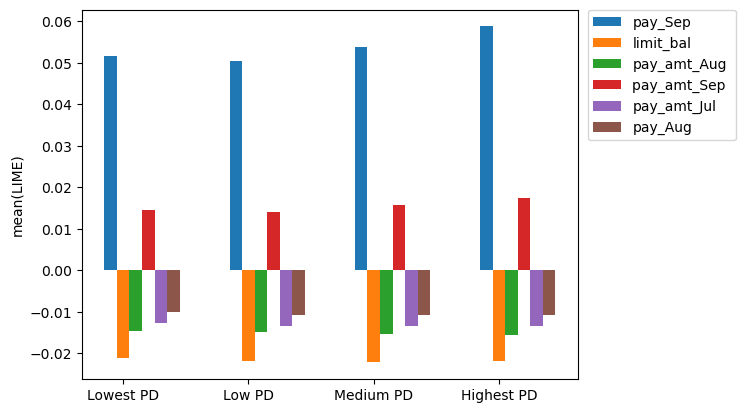

In [35]:
#the LIME coefficients of Random Forest in various clusters
x = ['Lowest PD', 'Low PD', 'Medium PD', 'Highest PD']
 
N = 4
ind = np.arange(N)  
width = 0.1



pay_sep =     [ 0.051534, 0.050524, 0.053817, 0.058729]
limit_bal =   [-0.021222,-0.021945,-0.022209,-0.021922]
pay_amt_Aug = [-0.014601,-0.014896,-0.015339,-0.015551]
pay_amt_Sep = [-0.012629,-0.013490,-0.013536,-0.013360]
pay_amt_Jul = [-0.009995,-0.010829,-0.010786,-0.010790]
pay_Aug =     [ 0.014569, 0.014130, 0.015647, 0.017374]

plt.bar(ind, pay_sep, 0.1, label = 'pay_Sep') 
plt.bar(ind+width, limit_bal, 0.1, label = 'limit_bal') 
plt.bar(ind+width*2, pay_amt_Aug, 0.1, label = 'pay_amt_Aug') 
plt.bar(ind+width*3, pay_Aug, 0.1, label = 'pay_amt_Sep ') 
plt.bar(ind+width*4, pay_amt_Sep, 0.1, label = 'pay_amt_Jul') 
plt.bar(ind+width*5, pay_amt_Jul, 0.1, label = 'pay_Aug') 


plt.ylabel('mean(LIME)') 
plt.xticks(ind+width,x) 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
plt.show() 